In [12]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import json
import requests
import numpy
import os
import pickle
import re

# Questions 

### Spotlight affects on project success<br>
### Staff picks on project success<br>
### Amount requested affects on the funding rate<br>
### Success rate over time<br>
### Keyword matches among successful projects<br>
### Clustering on categories<br>


# Importing the Data
This dataset was taken from webrobots.io. They run a monthly scrape from the Kickstarter website of all projects available on the website. This includes both active and historical (finished) projects. Due to limits imposed by Kickstarter, the search results are limited to a certain number of projects under each category.
<br><br>
The dataset was downloaded as a set of 50 or so .csv files. So in order to start working with them, I'll have to merge them into a single dataframe in Pandas

In [5]:
csvList = []
mergedData = pd.DataFrame() #Initialize a dataframe
for filename in os.listdir(): #Create an iterator for all objects in the working directory
    try: #I'm using try/except here because I'm lazy and didn't clean out the folder
        tempDf = pd.read_csv(filename)
        mergedData = mergedData.append(tempDf, ignore_index = False) #When python finds a valid .csv file, append it
        print(filename, len(mergedData)) #Print the filename and the total # of rows so far to track progress
    except:
        print('Python file') #Print some message when something is wrong    

Kickstarter040.csv 3813
Kickstarter054.csv 5163
Kickstarter041.csv 8976
Kickstarter043.csv 12784
Kickstarter042.csv 16604
Kickstarter052.csv 20415
Kickstarter046.csv 24223
.DS_Store 24223


/Users/chrismay/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Kickstarter.csv 28034
Kickstarter047.csv 31854
Kickstarter053.csv 35671
Kickstarter045.csv 39483
Kickstarter051.csv 43293
Kickstarter050.csv 47103
Kickstarter044.csv 50912
Kickstarter023.csv 54727
Kickstarter037.csv 58542
Python file
Kickstarter036.csv 62358
Kickstarter022.csv 66173
Kickstarter008.csv 69984
Kickstarter034.csv 73798
Kickstarter020.csv 77613
Kickstarter021.csv 81424
Kickstarter035.csv 85237
Kickstarter009.csv 89058
Kickstarter031.csv 92879
Kickstarter025.csv 96695
Kickstarter019.csv 100501
Kickstarter018.csv 104312
Kickstarter024.csv 108124
Kickstarter030.csv 111937
Kickstarter026.csv 115754
Kickstarter032.csv 119564
Kickstarter033.csv 123376
Kickstarter027.csv 127188
Kickstarter002.csv 130999
Kickstarter016.csv 134811
Kickstarter017.csv 138622
Kickstarter003.csv 142432
Kickstarter029.csv 146243
Kickstarter015.csv 150060
Kickstarter001.csv 153870
Kickstarter014.csv 157684
Kickstarter028.csv 161493
Kickstarter010.csv 165303
Kickstarter004.csv 169120
Kickstarter038.csv 172

# Initial Data Wrangling
Let's take a look at what's here

In [6]:
mergedData.head()

Unnamed: 0  backers_count  \
0        NaN           13.0   
1        NaN            0.0   
2        NaN          317.0   
3        NaN           12.0   
4        NaN           69.0   

                                               blurb  \
0  ‘The Life of Henry Lethe’ is about a man suffe...   
1  If you believe in heaven you must beleive in h...   
2  Hop in the Saddle is a guide to Portland's cra...   
3  My creation went viral and I require funds for...   
4  Light the Water is a short, dark film revealin...   

                                            category  \
0  {"id":31,"name":"Narrative Film","slug":"film ...   
1  {"id":297,"name":"Horror","slug":"film & video...   
2  {"id":48,"name":"Nonfiction","slug":"publishin...   
3  {"id":351,"name":"Printing","slug":"crafts/pri...   
4  {"id":32,"name":"Shorts","slug":"film & video/...   

   converted_pledged_amount country    created_at  \
0                     781.0      US  1.285017e+09   
1                       0.0      GB  1.484080e+09   
2                   17358.0      US  1.334081e+09   
3                     270.0      CA  1.456614e+09   
4                    7009.0      US  1.278718e+09   

                                             creator currency currency_symbol  \
0  {"id":85992704,"name":"Zoe Miller","is_registe...      USD               $   
1  {"id":1694112044,"name":"Thomas Williamson","i...      GBP               £   
2  {"id":1548588607,"name":"Hop in the Saddle","i...      USD               $   
3  {"id":294483555,"name":"Andrea owner of Peanut...      CAD               $   
4  {"id":1239226656,"name":"Robin Griswold","slug...      USD               $   

       ...                                                     slug  \
0      ...               the-life-of-henry-lethe-senior-thesis-film   
1      ...                                             the-meadowzs   
2      ...                                        hop-in-the-saddle   
3      ...        peanut-parade-adulting-is-hard-reward-stickers...   
4      ...        dream-of-ghosts-a-short-film-by-robin-griswold...   

                                          source_url  spotlight staff_pick  \
0  https://www.kickstarter.com/discover/categorie...       True      False   
1  https://www.kickstarter.com/discover/categorie...      False      False   
2  https://www.kickstarter.com/discover/categorie...       True       True   
3  https://www.kickstarter.com/discover/categorie...      False      False   
4  https://www.kickstarter.com/discover/categorie...       True      False   

        state  state_changed_at  static_usd_rate  \
0  successful      1.289088e+09         1.000000   
1      failed      1.487169e+09         1.219066   
2  successful      1.348164e+09         1.000000   
3      failed      1.459257e+09         0.739775   
4  successful      1.282779e+09         1.000000   

                                                urls  usd_pledged  \
0  {"web":{"project":"https://www.kickstarter.com...    781.00000   
1  {"web":{"project":"https://www.kickstarter.com...      0.00000   
2  {"web":{"project":"https://www.kickstarter.com...  17358.66000   
3  {"web":{"project":"https://www.kickstarter.com...    264.09955   
4  {"web":{"project":"https://www.kickstarter.com...   7009.00000   

        usd_type  
0       domestic  
1  international  
2  international  
3  international  
4       domestic  

[5 rows x 38 columns]

In [7]:
mergedData.reset_index()

index Unnamed: 0  backers_count  \
0           0        NaN           13.0   
1           1        NaN            0.0   
2           2        NaN          317.0   
3           3        NaN           12.0   
4           4        NaN           69.0   
5           5        NaN            1.0   
6           6        NaN            3.0   
7           7        NaN            3.0   
8           8        NaN            2.0   
9           9        NaN           81.0   
10         10        NaN            5.0   
11         11        NaN           27.0   
12         12        NaN            4.0   
13         13        NaN           26.0   
14         14        NaN           14.0   
15         15        NaN            1.0   
16         16        NaN           57.0   
17         17        NaN            3.0   
18         18        NaN            3.0   
19         19        NaN           60.0   
20         20        NaN            2.0   
21         21        NaN           57.0   
22         22        NaN           16.0   
23         23        NaN           38.0   
24         24        NaN          128.0   
25         25        NaN          208.0   
26         26        NaN           17.0   
27         27        NaN          126.0   
28         28        NaN          251.0   
29         29        NaN           32.0   
...       ...        ...            ...   
207197   3783        NaN            2.0   
207198   3784        NaN           17.0   
207199   3785        NaN            0.0   
207200   3786        NaN           15.0   
207201   3787        NaN           27.0   
207202   3788        NaN          145.0   
207203   3789        NaN           17.0   
207204   3790        NaN            0.0   
207205   3791        NaN           32.0   
207206   3792        NaN            6.0   
207207   3793        NaN          217.0   
207208   3794        NaN            0.0   
207209   3795        NaN           44.0   
207210   3796        NaN           19.0   
207211   3797        NaN           63.0   
207212   3798        NaN         2331.0   
207213   3799        NaN           38.0   
207214   3800        NaN           23.0   
207215   3801        NaN           19.0   
207216   3802        NaN           41.0   
207217   3803        NaN         2602.0   
207218   3804        NaN           67.0   
207219   3805        NaN            0.0   
207220   3806        NaN           50.0   
207221   3807        NaN           13.0   
207222   3808        NaN          140.0   
207223   3809        NaN            0.0   
207224   3810        NaN           26.0   
207225   3811        NaN           21.0   
207226   3812        NaN            2.0   

                                                    blurb  \
0       ‘The Life of Henry Lethe’ is about a man suffe...   
1       If you believe in heaven you must beleive in h...   
2       Hop in the Saddle is a guide to Portland's cra...   
3       My creation went viral and I require funds for...   
4       Light the Water is a short, dark film revealin...   
5       You decide which celebrities to Kill, Bang or ...   
6       Put a hydrangea flower on your wrist. \r\n\r\n...   
7       We want to turn one of our best selling embroi...   
8       When the humans aren’t looking, five towels sp...   
9       Frequency Fridays is a performance series feat...   
10      Rex is a platformer game that uses retro style...   
11      Raising funds in order to finance the manufact...   
12      A stained glass solar light cube...similar to ...   
13      Designing classy, simple, and sometimes vintag...   
14      Help Eudomar's marble sculpture come to life i...   
15      To design a brand new TV show, called the Adve...   
16      LagosPhoto is expanding its annual festival to...   
17      Starting a sisterly business of fecal proporti...   
18      Its raining cats! Dont get hit or you will go ...   
19      Rupert Marshall-Luck (violin), Joseph Spooner ...   
20      I'm a vet that's disabled (factory injury) I w...   

In [8]:
len(mergedData)

207227

In [9]:
mergedData.drop('Unnamed: 0', axis = 1, inplace = True)
mergedData.drop('index', axis = 1, inplace = True)

KeyError: "['index'] not found in axis"

In [10]:
def catStrip(target):
    x = re.split(': | , |"', target)
    results = [x[5], x[9]]
    return(results)
def nameStrip(target):
    x = re.split(': | , |"', target)
    results = [x[2], x[5]]
    results[0] = results[0].strip(':')
    results[0] = results[0].strip(',')
    print(results)

In [ ]:
mergedData.columns()

In [ ]:
tempFrame = pd.DataFrame()
for i in range(len(mergedData)):
    tempName = mergedData.iloc[i]['category']
    tempArray = catStrip(tempName)
    tempFrame = tempFrame.append({'category' : tempArray}, ignore_index = True)
    print(tempArray, i)

['Narrative Film', 'film & video/narrative film'] 0
['Horror', 'film & video/horror'] 1
['Nonfiction', 'publishing/nonfiction'] 2
['Printing', 'crafts/printing'] 3
['Shorts', 'film & video/shorts'] 4
['Mobile Games', 'games/mobile games'] 5
['Accessories', 'fashion/accessories'] 6
['Accessories', 'fashion/accessories'] 7
['Animation', 'film & video/animation'] 8
['Electronic Music', 'music/electronic music'] 9
['Mobile Games', 'games/mobile games'] 10
['Accessories', 'fashion/accessories'] 11
['Glass', 'crafts/glass'] 12
['Printing', 'crafts/printing'] 13
['Sculpture', 'art/sculpture'] 14
['Animation', 'film & video/animation'] 15
['Fine Art', 'photography/fine art'] 16
['Sculpture', 'art/sculpture'] 17
['Mobile Games', 'games/mobile games'] 18
['Classical Music', 'music/classical music'] 19
['Blues', 'music/blues'] 20
['Webseries', 'film & video/webseries'] 21
['Accessories', 'fashion/accessories'] 22
['Shorts', 'film & video/shorts'] 23
['Animation', 'film & video/animation'] 24
['Ac

['Photography', 'photography'] 295
['Gadgets', 'technology/gadgets'] 296
['Faith', 'music/faith'] 297
['Architecture', 'design/architecture'] 298
['Gadgets', 'technology/gadgets'] 299
['Space Exploration', 'technology/space exploration'] 300
['Narrative Film', 'film & video/narrative film'] 301
['Movie Theaters', 'film & video/movie theaters'] 302
['Tabletop Games', 'games/tabletop games'] 303
['People', 'photography/people'] 304
['Classical Music', 'music/classical music'] 305
['DIY Electronics', 'technology/diy electronics'] 306
['Comic Books', 'comics/comic books'] 307
['Comic Books', 'comics/comic books'] 308
['Comic Books', 'comics/comic books'] 309
['Comic Books', 'comics/comic books'] 310
['Mixed Media', 'art/mixed media'] 311
['Photography', 'photography'] 312
['Comic Books', 'comics/comic books'] 313
['DIY Electronics', 'technology/diy electronics'] 314
['Games', 'games'] 315
['Civic Design', 'design/civic design'] 316
['Gadgets', 'technology/gadgets'] 317
['Public Art', 'art/

['Fine Art', 'photography/fine art'] 524
['Electronic Music', 'music/electronic music'] 525
['Punk', 'music/punk'] 526
['Mobile Games', 'games/mobile games'] 527
['Nonfiction', 'publishing/nonfiction'] 528
['Fashion', 'fashion'] 529
['Mobile Games', 'games/mobile games'] 530
['Horror', 'film & video/horror'] 531
['Classical Music', 'music/classical music'] 532
['Nonfiction', 'publishing/nonfiction'] 533
['Accessories', 'fashion/accessories'] 534
['Electronic Music', 'music/electronic music'] 535
['Animation', 'film & video/animation'] 536
['Nonfiction', 'publishing/nonfiction'] 537
['Accessories', 'fashion/accessories'] 538
['Animation', 'film & video/animation'] 539
['Accessories', 'fashion/accessories'] 540
['Accessories', 'fashion/accessories'] 541
['Fashion', 'fashion'] 542
['Film & Video', 'film & video'] 543
['World Music', 'music/world music'] 544
['Nonfiction', 'publishing/nonfiction'] 545
['Fashion', 'fashion'] 546
['Sculpture', 'art/sculpture'] 547
['Animation', 'film & video

['Pop', 'music/pop'] 816
['Indie Rock', 'music/indie rock'] 817
['Pop', 'music/pop'] 818
['Sound', 'technology/sound'] 819
['3D Printing', 'technology/3d printing'] 820
['Illustration', 'art/illustration'] 821
['Publishing', 'publishing'] 822
['Drama', 'film & video/drama'] 823
['Poetry', 'publishing/poetry'] 824
['Pop', 'music/pop'] 825
['Webseries', 'film & video/webseries'] 826
['Cookbooks', 'food/cookbooks'] 827
['Plays', 'theater/plays'] 828
['Plays', 'theater/plays'] 829
['3D Printing', 'technology/3d printing'] 830
['Cookbooks', 'food/cookbooks'] 831
["Children's Books", "publishing/children's books"] 832
['Webseries', 'film & video/webseries'] 833
['Webseries', 'film & video/webseries'] 834
['Graphic Novels', 'comics/graphic novels'] 835
['Publishing', 'publishing'] 836
['Tabletop Games', 'games/tabletop games'] 837
['Places', 'photography/places'] 838
['Food', 'food'] 839
["Children's Books", "publishing/children's books"] 840
['3D Printing', 'technology/3d printing'] 841
['Co

['Playing Cards', 'games/playing cards'] 1072
['Digital Art', 'art/digital art'] 1073
['Tabletop Games', 'games/tabletop games'] 1074
['Tabletop Games', 'games/tabletop games'] 1075
['Drinks', 'food/drinks'] 1076
['Drinks', 'food/drinks'] 1077
['Drinks', 'food/drinks'] 1078
['Workshops', 'dance/workshops'] 1079
['Performances', 'dance/performances'] 1080
['Country & Folk', 'music/country & folk'] 1081
['Apps', 'technology/apps'] 1082
['Drinks', 'food/drinks'] 1083
['Academic', 'publishing/academic'] 1084
['Crochet', 'crafts/crochet'] 1085
['Apparel', 'fashion/apparel'] 1086
['Tabletop Games', 'games/tabletop games'] 1087
['Apps', 'technology/apps'] 1088
['Tabletop Games', 'games/tabletop games'] 1089
['Events', 'food/events'] 1090
['Playing Cards', 'games/playing cards'] 1091
['Digital Art', 'art/digital art'] 1092
['Immersive', 'theater/immersive'] 1093
['Apparel', 'fashion/apparel'] 1094
['Events', 'food/events'] 1095
['Fiction', 'publishing/fiction'] 1096
['Country & Folk', 'music/c

['Fiction', 'publishing/fiction'] 1276
['Apps', 'technology/apps'] 1277
['Tabletop Games', 'games/tabletop games'] 1278
['Childrenswear', 'fashion/childrenswear'] 1279
['Drinks', 'food/drinks'] 1280
['Tabletop Games', 'games/tabletop games'] 1281
['Restaurants', 'food/restaurants'] 1282
['Comedy', 'publishing/comedy'] 1283
['Drinks', 'food/drinks'] 1284
['Anthologies', 'publishing/anthologies'] 1285
['Academic', 'publishing/academic'] 1286
['Playing Cards', 'games/playing cards'] 1287
['Workshops', 'dance/workshops'] 1288
['Playing Cards', 'games/playing cards'] 1289
['Periodicals', 'publishing/periodicals'] 1290
['Anthologies', 'publishing/anthologies'] 1291
['Apps', 'technology/apps'] 1292
['Apps', 'technology/apps'] 1293
['Thrillers', 'film & video/thrillers'] 1294
['Crochet', 'crafts/crochet'] 1295
['Tabletop Games', 'games/tabletop games'] 1296
['Country & Folk', 'music/country & folk'] 1297
["Farmer's Markets", "food/farmer's markets"] 1298
['DIY Electronics', 'technology/diy ele

['Gadgets', 'technology/gadgets'] 1516
['Footwear', 'fashion/footwear'] 1517
['Comic Books', 'comics/comic books'] 1518
['Art Books', 'publishing/art books'] 1519
['Mixed Media', 'art/mixed media'] 1520
['Animals', 'photography/animals'] 1521
['Comics', 'comics'] 1522
['Gadgets', 'technology/gadgets'] 1523
['Mobile Games', 'games/mobile games'] 1524
['Art Books', 'publishing/art books'] 1525
['Camera Equipment', 'technology/camera equipment'] 1526
['Mixed Media', 'art/mixed media'] 1527
['Narrative Film', 'film & video/narrative film'] 1528
['Narrative Film', 'film & video/narrative film'] 1529
['Spaces', 'food/spaces'] 1530
['Narrative Film', 'film & video/narrative film'] 1531
['Narrative Film', 'film & video/narrative film'] 1532
['Camera Equipment', 'technology/camera equipment'] 1533
['Spaces', 'food/spaces'] 1534
['Narrative Film', 'film & video/narrative film'] 1535
['Tabletop Games', 'games/tabletop games'] 1536
['DIY Electronics', 'technology/diy electronics'] 1537
['Comic Boo

['Thrillers', 'film & video/thrillers'] 1716
['Drinks', 'food/drinks'] 1717
['Installations', 'art/installations'] 1718
['Anthologies', 'publishing/anthologies'] 1719
['Comedy', 'film & video/comedy'] 1720
['Tabletop Games', 'games/tabletop games'] 1721
['Country & Folk', 'music/country & folk'] 1722
['Poetry', 'publishing/poetry'] 1723
['Apparel', 'fashion/apparel'] 1724
['Digital Art', 'art/digital art'] 1725
['Fiction', 'publishing/fiction'] 1726
['Tabletop Games', 'games/tabletop games'] 1727
['Country & Folk', 'music/country & folk'] 1728
['Sound', 'technology/sound'] 1729
['Apparel', 'fashion/apparel'] 1730
['Installations', 'art/installations'] 1731
['Playing Cards', 'games/playing cards'] 1732
['Dance', 'dance'] 1733
['Tabletop Games', 'games/tabletop games'] 1734
['Periodicals', 'publishing/periodicals'] 1735
['Fiction', 'publishing/fiction'] 1736
['Knitting', 'crafts/knitting'] 1737
['Restaurants', 'food/restaurants'] 1738
["Farmer's Markets", "food/farmer's markets"] 1739
['

['Web', 'technology/web'] 1943
['Rock', 'music/rock'] 1944
['Rock', 'music/rock'] 1945
['Web', 'technology/web'] 1946
['Rock', 'music/rock'] 1947
['Food Trucks', 'food/food trucks'] 1948
['Product Design', 'design/product design'] 1949
['Country & Folk', 'music/country & folk'] 1950
['Webcomics', 'comics/webcomics'] 1951
['Rock', 'music/rock'] 1952
['Web', 'technology/web'] 1953
['Theater', 'theater'] 1954
['Journalism', 'journalism'] 1955
['Food Trucks', 'food/food trucks'] 1956
['Food Trucks', 'food/food trucks'] 1957
['Painting', 'art/painting'] 1958
['Journalism', 'journalism'] 1959
['Jazz', 'music/jazz'] 1960
['Rock', 'music/rock'] 1961
['Country & Folk', 'music/country & folk'] 1962
['Video Art', 'art/video art'] 1963
['Festivals', 'theater/festivals'] 1964
['Jazz', 'music/jazz'] 1965
['Product Design', 'design/product design'] 1966
['Jazz', 'music/jazz'] 1967
['Painting', 'art/painting'] 1968
['Jazz', 'music/jazz'] 1969
['Product Design', 'design/product design'] 1970
['Painting

['Apps', 'technology/apps'] 2169
['Fiction', 'publishing/fiction'] 2170
['Poetry', 'publishing/poetry'] 2171
['Camera Equipment', 'technology/camera equipment'] 2172
['Festivals', 'film & video/festivals'] 2173
['Restaurants', 'food/restaurants'] 2174
['Comedy', 'film & video/comedy'] 2175
['Tabletop Games', 'games/tabletop games'] 2176
['Playing Cards', 'games/playing cards'] 2177
["Farmer's Markets", "food/farmer's markets"] 2178
['Workshops', 'dance/workshops'] 2179
['Apps', 'technology/apps'] 2180
['Hardware', 'technology/hardware'] 2181
['Childrenswear', 'fashion/childrenswear'] 2182
['Periodicals', 'publishing/periodicals'] 2183
['Poetry', 'publishing/poetry'] 2184
['Apps', 'technology/apps'] 2185
['Painting', 'art/painting'] 2186
['Painting', 'art/painting'] 2187
['Product Design', 'design/product design'] 2188
['Web', 'journalism/web'] 2189
['Food Trucks', 'food/food trucks'] 2190
['Nature', 'photography/nature'] 2191
['Video', 'journalism/video'] 2192
['Print', 'journalism/pri

['Restaurants', 'food/restaurants'] 2406
['Cookbooks', 'food/cookbooks'] 2407
['Illustration', 'art/illustration'] 2408
['Indie Rock', 'music/indie rock'] 2409
['Graphic Novels', 'comics/graphic novels'] 2410
['Graphic Novels', 'comics/graphic novels'] 2411
['Jewelry', 'fashion/jewelry'] 2412
['Drama', 'film & video/drama'] 2413
['Graphic Novels', 'comics/graphic novels'] 2414
['Illustration', 'art/illustration'] 2415
['Drama', 'film & video/drama'] 2416
['Webseries', 'film & video/webseries'] 2417
['Graphic Novels', 'comics/graphic novels'] 2418
['Pop', 'music/pop'] 2419
['Fiction', 'publishing/fiction'] 2420
['Fiction', 'publishing/fiction'] 2421
['Jewelry', 'fashion/jewelry'] 2422
['Webseries', 'film & video/webseries'] 2423
['Illustration', 'art/illustration'] 2424
['Publishing', 'publishing'] 2425
['Food', 'food'] 2426
['Pop', 'music/pop'] 2427
['Comedy', 'film & video/comedy'] 2428
['Plays', 'theater/plays'] 2429
['Graphic Novels', 'comics/graphic novels'] 2430
['Webseries', 'fil

['Tabletop Games', 'games/tabletop games'] 2658
['Restaurants', 'food/restaurants'] 2659
['Apparel', 'fashion/apparel'] 2660
['Technology', 'technology'] 2661
['Playing Cards', 'games/playing cards'] 2662
['Apparel', 'fashion/apparel'] 2663
['Comedy', 'film & video/comedy'] 2664
['Drinks', 'food/drinks'] 2665
['Fiction', 'publishing/fiction'] 2666
['Thrillers', 'film & video/thrillers'] 2667
['Comedy', 'publishing/comedy'] 2668
['Poetry', 'publishing/poetry'] 2669
['Playing Cards', 'games/playing cards'] 2670
['Apps', 'technology/apps'] 2671
['Hardware', 'technology/hardware'] 2672
['Camera Equipment', 'technology/camera equipment'] 2673
['Digital Art', 'art/digital art'] 2674
['Events', 'food/events'] 2675
['Tabletop Games', 'games/tabletop games'] 2676
['Journalism', 'journalism'] 2677
['Journalism', 'journalism'] 2678
['Painting', 'art/painting'] 2679
['Jazz', 'music/jazz'] 2680
['Software', 'technology/software'] 2681
['Product Design', 'design/product design'] 2682
['Food Trucks',

['Art Books', 'publishing/art books'] 2909
['Footwear', 'fashion/footwear'] 2910
['Classical Music', 'music/classical music'] 2911
['Gadgets', 'technology/gadgets'] 2912
['Comics', 'comics'] 2913
['Fine Art', 'photography/fine art'] 2914
['Mixed Media', 'art/mixed media'] 2915
['Comics', 'comics'] 2916
['Civic Design', 'design/civic design'] 2917
['Family', 'film & video/family'] 2918
['Spaces', 'food/spaces'] 2919
['Art Books', 'publishing/art books'] 2920
['Horror', 'film & video/horror'] 2921
['Tabletop Games', 'games/tabletop games'] 2922
['Gadgets', 'technology/gadgets'] 2923
['Movie Theaters', 'film & video/movie theaters'] 2924
['Mixed Media', 'art/mixed media'] 2925
['Romance', 'film & video/romance'] 2926
['Photobooks', 'photography/photobooks'] 2927
['Family', 'film & video/family'] 2928
['Horror', 'film & video/horror'] 2929
['Mixed Media', 'art/mixed media'] 2930
['Space Exploration', 'technology/space exploration'] 2931
['Mixed Media', 'art/mixed media'] 2932
['Animals', '

['Nonfiction', 'publishing/nonfiction'] 3156
['Accessories', 'fashion/accessories'] 3157
['Electronic Music', 'music/electronic music'] 3158
['Electronic Music', 'music/electronic music'] 3159
['Electronic Music', 'music/electronic music'] 3160
['Mobile Games', 'games/mobile games'] 3161
['Sculpture', 'art/sculpture'] 3162
['Accessories', 'fashion/accessories'] 3163
['Fine Art', 'photography/fine art'] 3164
['Calendars', 'publishing/calendars'] 3165
['Print', 'journalism/print'] 3166
['Accessories', 'fashion/accessories'] 3167
['Electronic Music', 'music/electronic music'] 3168
['Classical Music', 'music/classical music'] 3169
['Nonfiction', 'publishing/nonfiction'] 3170
['Electronic Music', 'music/electronic music'] 3171
['Apparel', 'fashion/apparel'] 3172
['Accessories', 'fashion/accessories'] 3173
['Sculpture', 'art/sculpture'] 3174
['Sculpture', 'art/sculpture'] 3175
['Textiles', 'art/textiles'] 3176
['Apparel', 'fashion/apparel'] 3177
['Sculpture', 'art/sculpture'] 3178
['Fashion'

['Jazz', 'music/jazz'] 3383
['Web', 'journalism/web'] 3384
['Painting', 'art/painting'] 3385
['Food Trucks', 'food/food trucks'] 3386
['Painting', 'art/painting'] 3387
['Jazz', 'music/jazz'] 3388
['Nature', 'photography/nature'] 3389
['Woodworking', 'crafts/woodworking'] 3390
['Hip-Hop', 'music/hip-hop'] 3391
['Webcomics', 'comics/webcomics'] 3392
['Painting', 'art/painting'] 3393
['Pop', 'music/pop'] 3394
['Food Trucks', 'food/food trucks'] 3395
['Woodworking', 'crafts/woodworking'] 3396
['Web', 'technology/web'] 3397
['Photo', 'journalism/photo'] 3398
['Jazz', 'music/jazz'] 3399
['Journalism', 'journalism'] 3400
['Product Design', 'design/product design'] 3401
['Product Design', 'design/product design'] 3402
['Jazz', 'music/jazz'] 3403
['Events', 'comics/events'] 3404
['Journalism', 'journalism'] 3405
['Painting', 'art/painting'] 3406
['Festivals', 'theater/festivals'] 3407
['Journalism', 'journalism'] 3408
['Music', 'music'] 3409
['Web', 'technology/web'] 3410
['Rock', 'music/rock']

['Public Art', 'art/public art'] 3616
['Classical Music', 'music/classical music'] 3617
['Movie Theaters', 'film & video/movie theaters'] 3618
['Art Books', 'publishing/art books'] 3619
['DIY Electronics', 'technology/diy electronics'] 3620
['Comics', 'comics'] 3621
['Zines', 'publishing/zines'] 3622
['Comic Books', 'comics/comic books'] 3623
['Faith', 'music/faith'] 3624
['Footwear', 'fashion/footwear'] 3625
['Gadgets', 'technology/gadgets'] 3626
['Photography', 'photography'] 3627
['Faith', 'music/faith'] 3628
['Narrative Film', 'film & video/narrative film'] 3629
['Horror', 'film & video/horror'] 3630
['Science Fiction', 'film & video/science fiction'] 3631
['Video Games', 'games/video games'] 3632
['Comic Books', 'comics/comic books'] 3633
['Architecture', 'design/architecture'] 3634
['Spaces', 'food/spaces'] 3635
['Tabletop Games', 'games/tabletop games'] 3636
['Art Books', 'publishing/art books'] 3637
['Classical Music', 'music/classical music'] 3638
['Science Fiction', 'film & v

['Public Art', 'art/public art'] 3839
['Wearables', 'technology/wearables'] 3840
['Literary Journals', 'publishing/literary journals'] 3841
['Art', 'art'] 3842
['Performance Art', 'art/performance art'] 3843
['Public Art', 'art/public art'] 3844
['Public Art', 'art/public art'] 3845
['Public Art', 'art/public art'] 3846
['Metal', 'music/metal'] 3847
['Fabrication Tools', 'technology/fabrication tools'] 3848
['Conceptual Art', 'art/conceptual art'] 3849
['Performance Art', 'art/performance art'] 3850
['Wearables', 'technology/wearables'] 3851
['Small Batch', 'food/small batch'] 3852
['Kids', 'music/kids'] 3853
['Wearables', 'technology/wearables'] 3854
['Small Batch', 'food/small batch'] 3855
['Art', 'art'] 3856
['Graphic Design', 'design/graphic design'] 3857
['Video', 'journalism/video'] 3858
['Apparel', 'fashion/apparel'] 3859
['Small Batch', 'food/small batch'] 3860
['Small Batch', 'food/small batch'] 3861
['Wearables', 'technology/wearables'] 3862
['Performance Art', 'art/performan

['Ready-to-wear', 'fashion/ready-to-wear'] 4085
['Country & Folk', 'music/country & folk'] 4086
['DIY', 'crafts/diy'] 4087
['Performance Art', 'art/performance art'] 4088
['Design', 'design'] 4089
['Graphic Design', 'design/graphic design'] 4090
['Experimental', 'film & video/experimental'] 4091
['Hardware', 'technology/hardware'] 4092
['Ready-to-wear', 'fashion/ready-to-wear'] 4093
['Literary Journals', 'publishing/literary journals'] 4094
['Design', 'design'] 4095
['Public Art', 'art/public art'] 4096
['DIY', 'crafts/diy'] 4097
['Graphic Design', 'design/graphic design'] 4098
['Small Batch', 'food/small batch'] 4099
['Metal', 'music/metal'] 4100
['Small Batch', 'food/small batch'] 4101
['Graphic Design', 'design/graphic design'] 4102
['Experimental', 'film & video/experimental'] 4103
['Product Design', 'design/product design'] 4104
['Public Art', 'art/public art'] 4105
['DIY', 'crafts/diy'] 4106
['Public Art', 'art/public art'] 4107
['Hardware', 'technology/hardware'] 4108
['Country 

['Video', 'journalism/video'] 4341
['Photobooks', 'photography/photobooks'] 4342
['Product Design', 'design/product design'] 4343
['Graphic Design', 'design/graphic design'] 4344
['Public Art', 'art/public art'] 4345
['Performance Art', 'art/performance art'] 4346
['Public Art', 'art/public art'] 4347
['Illustration', 'art/illustration'] 4348
['Art', 'art'] 4349
['Performance Art', 'art/performance art'] 4350
['DIY', 'crafts/diy'] 4351
['Country & Folk', 'music/country & folk'] 4352
['Public Art', 'art/public art'] 4353
['Makerspaces', 'technology/makerspaces'] 4354
['Radio & Podcasts', 'publishing/radio & podcasts'] 4355
['Performance Art', 'art/performance art'] 4356
['Art', 'art'] 4357
['Performance Art', 'art/performance art'] 4358
['Photobooks', 'photography/photobooks'] 4359
['Photobooks', 'photography/photobooks'] 4360
['Hardware', 'technology/hardware'] 4361
['Public Art', 'art/public art'] 4362
['Product Design', 'design/product design'] 4363
['Photobooks', 'photography/photob

['R&B', 'music/r&b'] 4552
['Illustration', 'art/illustration'] 4553
['Hardware', 'technology/hardware'] 4554
['Small Batch', 'food/small batch'] 4555
['Wearables', 'technology/wearables'] 4556
['Performance Art', 'art/performance art'] 4557
['Product Design', 'design/product design'] 4558
['Photobooks', 'photography/photobooks'] 4559
['Wearables', 'technology/wearables'] 4560
['Academic', 'publishing/academic'] 4561
['Apparel', 'fashion/apparel'] 4562
['Video', 'journalism/video'] 4563
['Graphic Design', 'design/graphic design'] 4564
['Art', 'art'] 4565
['Graphic Design', 'design/graphic design'] 4566
['Small Batch', 'food/small batch'] 4567
['Digital Art', 'art/digital art'] 4568
['Hardware', 'technology/hardware'] 4569
['Performance Art', 'art/performance art'] 4570
['Small Batch', 'food/small batch'] 4571
['Bacon', 'food/bacon'] 4572
['Hardware', 'technology/hardware'] 4573
['Photobooks', 'photography/photobooks'] 4574
['Performance Art', 'art/performance art'] 4575
['Performance Ar

['Small Batch', 'food/small batch'] 4795
['R&B', 'music/r&b'] 4796
['Radio & Podcasts', 'publishing/radio & podcasts'] 4797
['Illustration', 'art/illustration'] 4798
['Metal', 'music/metal'] 4799
['Small Batch', 'food/small batch'] 4800
['Performance Art', 'art/performance art'] 4801
['Graphic Design', 'design/graphic design'] 4802
['Experimental', 'film & video/experimental'] 4803
['Photobooks', 'photography/photobooks'] 4804
['Wearables', 'technology/wearables'] 4805
['Public Art', 'art/public art'] 4806
['Performance Art', 'art/performance art'] 4807
['Academic', 'publishing/academic'] 4808
['Hardware', 'technology/hardware'] 4809
['Wearables', 'technology/wearables'] 4810
['Wearables', 'technology/wearables'] 4811
['Academic', 'publishing/academic'] 4812
['Metal', 'music/metal'] 4813
['Ready-to-wear', 'fashion/ready-to-wear'] 4814
['Small Batch', 'food/small batch'] 4815
['Ready-to-wear', 'fashion/ready-to-wear'] 4816
['DIY', 'crafts/diy'] 4817
['Performance Art', 'art/performance 

['Product Design', 'design/product design'] 5015
['Small Batch', 'food/small batch'] 5016
['Small Batch', 'food/small batch'] 5017
['Product Design', 'design/product design'] 5018
['Wearables', 'technology/wearables'] 5019
['Wearables', 'technology/wearables'] 5020
['Public Art', 'art/public art'] 5021
['Public Art', 'art/public art'] 5022
['Small Batch', 'food/small batch'] 5023
['Public Art', 'art/public art'] 5024
['Graphic Design', 'design/graphic design'] 5025
['Ready-to-wear', 'fashion/ready-to-wear'] 5026
['Video', 'journalism/video'] 5027
['Photobooks', 'photography/photobooks'] 5028
['Graphic Design', 'design/graphic design'] 5029
['Metal', 'music/metal'] 5030
['Graphic Design', 'design/graphic design'] 5031
['Small Batch', 'food/small batch'] 5032
['Design', 'design'] 5033
['Radio & Podcasts', 'publishing/radio & podcasts'] 5034
['Architecture', 'design/architecture'] 5035
['Hardware', 'technology/hardware'] 5036
['Performance Art', 'art/performance art'] 5037
['Photobooks', 

['Cookbooks', 'food/cookbooks'] 5244
['Flight', 'technology/flight'] 5245
['Candles', 'crafts/candles'] 5246
['Graphic Novels', 'comics/graphic novels'] 5247
['Graphic Novels', 'comics/graphic novels'] 5248
['Webseries', 'film & video/webseries'] 5249
['Indie Rock', 'music/indie rock'] 5250
['Illustration', 'art/illustration'] 5251
['Painting', 'art/painting'] 5252
['Food', 'food'] 5253
['Indie Rock', 'music/indie rock'] 5254
['Food Trucks', 'food/food trucks'] 5255
['Indie Rock', 'music/indie rock'] 5256
['Software', 'technology/software'] 5257
['Software', 'technology/software'] 5258
['Drama', 'film & video/drama'] 5259
['Crafts', 'crafts'] 5260
['Drama', 'film & video/drama'] 5261
['Sound', 'technology/sound'] 5262
['Indie Rock', 'music/indie rock'] 5263
['Drama', 'film & video/drama'] 5264
['Drama', 'film & video/drama'] 5265
['Comedy', 'film & video/comedy'] 5266
['Indie Rock', 'music/indie rock'] 5267
['Illustration', 'art/illustration'] 5268
['Food', 'food'] 5269
['Food', 'food'

['Tabletop Games', 'games/tabletop games'] 5461
['Narrative Film', 'film & video/narrative film'] 5462
['Gadgets', 'technology/gadgets'] 5463
['Narrative Film', 'film & video/narrative film'] 5464
['Mixed Media', 'art/mixed media'] 5465
['Narrative Film', 'film & video/narrative film'] 5466
['Mixed Media', 'art/mixed media'] 5467
['Gadgets', 'technology/gadgets'] 5468
['Footwear', 'fashion/footwear'] 5469
['Comics', 'comics'] 5470
['Mixed Media', 'art/mixed media'] 5471
['Faith', 'music/faith'] 5472
['Comics', 'comics'] 5473
['Comic Books', 'comics/comic books'] 5474
['Public Art', 'art/public art'] 5475
['Narrative Film', 'film & video/narrative film'] 5476
['Mixed Media', 'art/mixed media'] 5477
['Robots', 'technology/robots'] 5478
['Art Books', 'publishing/art books'] 5479
['Family', 'film & video/family'] 5480
['Horror', 'film & video/horror'] 5481
['Games', 'games'] 5482
['Robots', 'technology/robots'] 5483
['Faith', 'music/faith'] 5484
['Comic Books', 'comics/comic books'] 5485
[

['Events', 'food/events'] 5692
['Poetry', 'publishing/poetry'] 5693
['Poetry', 'publishing/poetry'] 5694
['Performances', 'dance/performances'] 5695
['Comedy', 'film & video/comedy'] 5696
['Restaurants', 'food/restaurants'] 5697
['Apps', 'technology/apps'] 5698
['Country & Folk', 'music/country & folk'] 5699
['Pottery', 'crafts/pottery'] 5700
['Performances', 'dance/performances'] 5701
['Fiction', 'publishing/fiction'] 5702
['Fiction', 'publishing/fiction'] 5703
['Residencies', 'dance/residencies'] 5704
['Tabletop Games', 'games/tabletop games'] 5705
['Playing Cards', 'games/playing cards'] 5706
['Comedy', 'film & video/comedy'] 5707
['Apps', 'technology/apps'] 5708
['Installations', 'art/installations'] 5709
['Childrenswear', 'fashion/childrenswear'] 5710
['Tabletop Games', 'games/tabletop games'] 5711
['Festivals', 'film & video/festivals'] 5712
['Fiction', 'publishing/fiction'] 5713
['Poetry', 'publishing/poetry'] 5714
['Periodicals', 'publishing/periodicals'] 5715
['Mobile Games', 

['Classical Music', 'music/classical music'] 5911
['Gadgets', 'technology/gadgets'] 5912
['Comic Books', 'comics/comic books'] 5913
['Narrative Film', 'film & video/narrative film'] 5914
['Footwear', 'fashion/footwear'] 5915
['Narrative Film', 'film & video/narrative film'] 5916
['Mixed Media', 'art/mixed media'] 5917
['Spaces', 'food/spaces'] 5918
['Gadgets', 'technology/gadgets'] 5919
['Faith', 'music/faith'] 5920
['Footwear', 'fashion/footwear'] 5921
['Art Books', 'publishing/art books'] 5922
['Narrative Film', 'film & video/narrative film'] 5923
['Puzzles', 'games/puzzles'] 5924
['DIY Electronics', 'technology/diy electronics'] 5925
['Art Books', 'publishing/art books'] 5926
['DIY Electronics', 'technology/diy electronics'] 5927
['Faith', 'music/faith'] 5928
['Video Games', 'games/video games'] 5929
['Science Fiction', 'film & video/science fiction'] 5930
['Science Fiction', 'film & video/science fiction'] 5931
['Family', 'film & video/family'] 5932
['Comic Books', 'comics/comic bo

['Comic Books', 'comics/comic books'] 6121
['Mixed Media', 'art/mixed media'] 6122
['Art Books', 'publishing/art books'] 6123
['Narrative Film', 'film & video/narrative film'] 6124
['Science Fiction', 'film & video/science fiction'] 6125
['Art Books', 'publishing/art books'] 6126
['Family', 'film & video/family'] 6127
['Comics', 'comics'] 6128
['Family', 'film & video/family'] 6129
['Art Books', 'publishing/art books'] 6130
['Art Books', 'publishing/art books'] 6131
['Gadgets', 'technology/gadgets'] 6132
['Horror', 'film & video/horror'] 6133
['Science Fiction', 'film & video/science fiction'] 6134
['Public Art', 'art/public art'] 6135
['Science Fiction', 'film & video/science fiction'] 6136
['Stationery', 'crafts/stationery'] 6137
['DIY Electronics', 'technology/diy electronics'] 6138
['Zines', 'publishing/zines'] 6139
['Gadgets', 'technology/gadgets'] 6140
['Mixed Media', 'art/mixed media'] 6141
['Tabletop Games', 'games/tabletop games'] 6142
['Classical Music', 'music/classical musi

['Textiles', 'art/textiles'] 6321
['Accessories', 'fashion/accessories'] 6322
['Nonfiction', 'publishing/nonfiction'] 6323
['Textiles', 'art/textiles'] 6324
['Mobile Games', 'games/mobile games'] 6325
['Fashion', 'fashion'] 6326
['Mobile Games', 'games/mobile games'] 6327
['Classical Music', 'music/classical music'] 6328
['World Music', 'music/world music'] 6329
['Shorts', 'film & video/shorts'] 6330
['Animation', 'film & video/animation'] 6331
['Punk', 'music/punk'] 6332
['Shorts', 'film & video/shorts'] 6333
['World Music', 'music/world music'] 6334
['Fashion', 'fashion'] 6335
['Accessories', 'fashion/accessories'] 6336
['Glass', 'crafts/glass'] 6337
['Sculpture', 'art/sculpture'] 6338
['Sculpture', 'art/sculpture'] 6339
['Shorts', 'film & video/shorts'] 6340
['Fine Art', 'photography/fine art'] 6341
['Printing', 'crafts/printing'] 6342
['Sculpture', 'art/sculpture'] 6343
['Blues', 'music/blues'] 6344
['Electronic Music', 'music/electronic music'] 6345
['Accessories', 'fashion/access

['Hardware', 'technology/hardware'] 6537
['Fashion', 'fashion'] 6538
['Fine Art', 'photography/fine art'] 6539
['Sculpture', 'art/sculpture'] 6540
['Shorts', 'film & video/shorts'] 6541
['Fashion', 'fashion'] 6542
['Animation', 'film & video/animation'] 6543
['Accessories', 'fashion/accessories'] 6544
['Electronic Music', 'music/electronic music'] 6545
['Electronic Music', 'music/electronic music'] 6546
['Shorts', 'film & video/shorts'] 6547
['Horror', 'film & video/horror'] 6548
['Nonfiction', 'publishing/nonfiction'] 6549
['Fashion', 'fashion'] 6550
['Mobile Games', 'games/mobile games'] 6551
['Print', 'journalism/print'] 6552
['Print', 'journalism/print'] 6553
['Ready-to-wear', 'fashion/ready-to-wear'] 6554
['Animation', 'film & video/animation'] 6555
['Television', 'film & video/television'] 6556
['Mobile Games', 'games/mobile games'] 6557
['Fashion', 'fashion'] 6558
['Mobile Games', 'games/mobile games'] 6559
['Accessories', 'fashion/accessories'] 6560
['Fashion', 'fashion'] 6561


['Games', 'games'] 6737
['Movie Theaters', 'film & video/movie theaters'] 6738
['Comic Books', 'comics/comic books'] 6739
['Narrative Film', 'film & video/narrative film'] 6740
['Architecture', 'design/architecture'] 6741
['Photography', 'photography'] 6742
['Gadgets', 'technology/gadgets'] 6743
['Classical Music', 'music/classical music'] 6744
['Footwear', 'fashion/footwear'] 6745
['Faith', 'music/faith'] 6746
['Robots', 'technology/robots'] 6747
['Family', 'film & video/family'] 6748
['Family', 'film & video/family'] 6749
['Horror', 'film & video/horror'] 6750
['Horror', 'film & video/horror'] 6751
['Narrative Film', 'film & video/narrative film'] 6752
['Video Games', 'games/video games'] 6753
['Mixed Media', 'art/mixed media'] 6754
['Comics', 'comics'] 6755
['Stationery', 'crafts/stationery'] 6756
['Zines', 'publishing/zines'] 6757
['Art Books', 'publishing/art books'] 6758
['Horror', 'film & video/horror'] 6759
['Photography', 'photography'] 6760
['Architecture', 'design/architectu

['Festivals', 'film & video/festivals'] 6977
['Childrenswear', 'fashion/childrenswear'] 6978
['Thrillers', 'film & video/thrillers'] 6979
['Apps', 'technology/apps'] 6980
['Events', 'food/events'] 6981
['Poetry', 'publishing/poetry'] 6982
["Farmer's Markets", "food/farmer's markets"] 6983
['Digital Art', 'art/digital art'] 6984
['Playing Cards', 'games/playing cards'] 6985
['Dance', 'dance'] 6986
['Academic', 'publishing/academic'] 6987
['Tabletop Games', 'games/tabletop games'] 6988
['Country & Folk', 'music/country & folk'] 6989
['Installations', 'art/installations'] 6990
['Tabletop Games', 'games/tabletop games'] 6991
['Crochet', 'crafts/crochet'] 6992
['DIY Electronics', 'technology/diy electronics'] 6993
['Drinks', 'food/drinks'] 6994
['Apparel', 'fashion/apparel'] 6995
['Fiction', 'publishing/fiction'] 6996
['Anthologies', 'publishing/anthologies'] 6997
['Restaurants', 'food/restaurants'] 6998
['Periodicals', 'publishing/periodicals'] 6999
['Restaurants', 'food/restaurants'] 7000

['Spaces', 'food/spaces'] 7207
['Gadgets', 'technology/gadgets'] 7208
['Tabletop Games', 'games/tabletop games'] 7209
['Comics', 'comics'] 7210
['Gadgets', 'technology/gadgets'] 7211
['Comics', 'comics'] 7212
['Camera Equipment', 'technology/camera equipment'] 7213
['Comic Books', 'comics/comic books'] 7214
['Camera Equipment', 'technology/camera equipment'] 7215
['Footwear', 'fashion/footwear'] 7216
['Mixed Media', 'art/mixed media'] 7217
['Gadgets', 'technology/gadgets'] 7218
['Zines', 'publishing/zines'] 7219
['Art Books', 'publishing/art books'] 7220
['Civic Design', 'design/civic design'] 7221
['Narrative Film', 'film & video/narrative film'] 7222
['Photography', 'photography'] 7223
['Gadgets', 'technology/gadgets'] 7224
['Games', 'games'] 7225
['Narrative Film', 'film & video/narrative film'] 7226
['Tabletop Games', 'games/tabletop games'] 7227
['Classical Music', 'music/classical music'] 7228
['Graphic Novels', 'comics/graphic novels'] 7229
['Zines', 'publishing/zines'] 7230
['A

['Pet Fashion', 'fashion/pet fashion'] 7436
['Poetry', 'publishing/poetry'] 7437
['Drinks', 'food/drinks'] 7438
['Periodicals', 'publishing/periodicals'] 7439
['Dance', 'dance'] 7440
['Playing Cards', 'games/playing cards'] 7441
['Digital Art', 'art/digital art'] 7442
['Software', 'technology/software'] 7443
['Poetry', 'publishing/poetry'] 7444
['Installations', 'art/installations'] 7445
['Fiction', 'publishing/fiction'] 7446
['Restaurants', 'food/restaurants'] 7447
['Apparel', 'fashion/apparel'] 7448
['Fiction', 'publishing/fiction'] 7449
['Software', 'technology/software'] 7450
['Apps', 'technology/apps'] 7451
['Comedy', 'film & video/comedy'] 7452
['Apps', 'technology/apps'] 7453
['Periodicals', 'publishing/periodicals'] 7454
['Fiction', 'publishing/fiction'] 7455
['Thrillers', 'film & video/thrillers'] 7456
['Drinks', 'food/drinks'] 7457
['Hardware', 'technology/hardware'] 7458
['Comedy', 'film & video/comedy'] 7459
['Dance', 'dance'] 7460
['Dance', 'dance'] 7461
['Childrenswear', 

['Graphic Novels', 'comics/graphic novels'] 7674
['Graphic Novels', 'comics/graphic novels'] 7675
['Indie Rock', 'music/indie rock'] 7676
['Illustration', 'art/illustration'] 7677
['Plays', 'theater/plays'] 7678
['Graphic Novels', 'comics/graphic novels'] 7679
['Crafts', 'crafts'] 7680
['Drama', 'film & video/drama'] 7681
['Places', 'photography/places'] 7682
['Indie Rock', 'music/indie rock'] 7683
['Drama', 'film & video/drama'] 7684
['Drama', 'film & video/drama'] 7685
['Fiction', 'publishing/fiction'] 7686
['Webseries', 'film & video/webseries'] 7687
['Restaurants', 'food/restaurants'] 7688
['Art Books', 'publishing/art books'] 7689
['Classical Music', 'music/classical music'] 7690
['DIY Electronics', 'technology/diy electronics'] 7691
['Comic Books', 'comics/comic books'] 7692
['Science Fiction', 'film & video/science fiction'] 7693
['Art Books', 'publishing/art books'] 7694
['Spaces', 'food/spaces'] 7695
['Gadgets', 'technology/gadgets'] 7696
['Robots', 'technology/robots'] 7697
[

['Accessories', 'fashion/accessories'] 7928
['Mobile Games', 'games/mobile games'] 7929
['Horror', 'film & video/horror'] 7930
['Print', 'journalism/print'] 7931
['Electronic Music', 'music/electronic music'] 7932
['Accessories', 'fashion/accessories'] 7933
['Accessories', 'fashion/accessories'] 7934
['Accessories', 'fashion/accessories'] 7935
['World Music', 'music/world music'] 7936
['Vegan', 'food/vegan'] 7937
['Sculpture', 'art/sculpture'] 7938
['Gadgets', 'technology/gadgets'] 7939
['Narrative Film', 'film & video/narrative film'] 7940
['Comic Books', 'comics/comic books'] 7941
['Comedy', 'film & video/comedy'] 7942
['Classical Music', 'music/classical music'] 7943
['Spaces', 'food/spaces'] 7944
['Art Books', 'publishing/art books'] 7945
['Art Books', 'publishing/art books'] 7946
['Photography', 'photography'] 7947
['Comic Books', 'comics/comic books'] 7948
['Horror', 'film & video/horror'] 7949
['Space Exploration', 'technology/space exploration'] 7950
['Photography', 'photograph

['Comedy', 'film & video/comedy'] 8165
['Digital Art', 'art/digital art'] 8166
['Fiction', 'publishing/fiction'] 8167
['Tabletop Games', 'games/tabletop games'] 8168
['Technology', 'technology'] 8169
['Drinks', 'food/drinks'] 8170
['Thrillers', 'film & video/thrillers'] 8171
['Dance', 'dance'] 8172
['Poetry', 'publishing/poetry'] 8173
['Dance', 'dance'] 8174
['Performances', 'dance/performances'] 8175
['Journalism', 'journalism'] 8176
['Product Design', 'design/product design'] 8177
['Theater', 'theater'] 8178
['Jazz', 'music/jazz'] 8179
['Product Design', 'design/product design'] 8180
['Rock', 'music/rock'] 8181
['Food Trucks', 'food/food trucks'] 8182
['Web', 'technology/web'] 8183
['Web', 'technology/web'] 8184
['Jazz', 'music/jazz'] 8185
['Painting', 'art/painting'] 8186
['DIY', 'crafts/diy'] 8187
['Product Design', 'design/product design'] 8188
['Jazz', 'music/jazz'] 8189
['Food Trucks', 'food/food trucks'] 8190
['Rock', 'music/rock'] 8191
['Rock', 'music/rock'] 8192
['Experimenta

['Drama', 'film & video/drama'] 8402
['Restaurants', 'food/restaurants'] 8403
['Jewelry', 'fashion/jewelry'] 8404
['Indie Rock', 'music/indie rock'] 8405
['Webseries', 'film & video/webseries'] 8406
['Illustration', 'art/illustration'] 8407
['Illustration', 'art/illustration'] 8408
['Sound', 'technology/sound'] 8409
['Drama', 'film & video/drama'] 8410
['Food', 'food'] 8411
['Comedy', 'film & video/comedy'] 8412
['Plays', 'theater/plays'] 8413
['Electronic Music', 'music/electronic music'] 8414
['Apparel', 'fashion/apparel'] 8415
['Vegan', 'food/vegan'] 8416
['Animation', 'film & video/animation'] 8417
['Animation', 'film & video/animation'] 8418
['Mobile Games', 'games/mobile games'] 8419
['Webseries', 'film & video/webseries'] 8420
['Shorts', 'film & video/shorts'] 8421
['Mobile Games', 'games/mobile games'] 8422
['Accessories', 'fashion/accessories'] 8423
['Mobile Games', 'games/mobile games'] 8424
['Animation', 'film & video/animation'] 8425
['Narrative Film', 'film & video/narrati

['Sculpture', 'art/sculpture'] 8637
['Horror', 'film & video/horror'] 8638
['Apparel', 'fashion/apparel'] 8639
['Animation', 'film & video/animation'] 8640
['Fashion', 'fashion'] 8641
['Electronic Music', 'music/electronic music'] 8642
['Narrative Film', 'film & video/narrative film'] 8643
['Animation', 'film & video/animation'] 8644
['Mobile Games', 'games/mobile games'] 8645
['Accessories', 'fashion/accessories'] 8646
['Sculpture', 'art/sculpture'] 8647
['Vegan', 'food/vegan'] 8648
['Nonfiction', 'publishing/nonfiction'] 8649
['Electronic Music', 'music/electronic music'] 8650
['Community Gardens', 'food/community gardens'] 8651
['Nonfiction', 'publishing/nonfiction'] 8652
['Horror', 'film & video/horror'] 8653
['Calendars', 'publishing/calendars'] 8654
['Mobile Games', 'games/mobile games'] 8655
['Mobile Games', 'games/mobile games'] 8656
['Accessories', 'fashion/accessories'] 8657
['Electronic Music', 'music/electronic music'] 8658
['Blues', 'music/blues'] 8659
['Electronic Music',

['Food', 'food'] 8865
['Comedy', 'film & video/comedy'] 8866
['Software', 'technology/software'] 8867
['Illustration', 'art/illustration'] 8868
['Illustration', 'art/illustration'] 8869
['Places', 'photography/places'] 8870
['Software', 'technology/software'] 8871
['Jewelry', 'fashion/jewelry'] 8872
['Places', 'photography/places'] 8873
['Weaving', 'crafts/weaving'] 8874
['Comedy', 'film & video/comedy'] 8875
['Illustration', 'art/illustration'] 8876
['Illustration', 'art/illustration'] 8877
['Graphic Novels', 'comics/graphic novels'] 8878
['Tabletop Games', 'games/tabletop games'] 8879
['Indie Rock', 'music/indie rock'] 8880
['Pop', 'music/pop'] 8881
["Farmer's Markets", "food/farmer's markets"] 8882
['Graphic Novels', 'comics/graphic novels'] 8883
['Plays', 'theater/plays'] 8884
['Food', 'food'] 8885
['3D Printing', 'technology/3d printing'] 8886
['Pop', 'music/pop'] 8887
['Jewelry', 'fashion/jewelry'] 8888
['Cookbooks', 'food/cookbooks'] 8889
['Software', 'technology/software'] 8890

['Product Design', 'design/product design'] 9095
['Graphic Design', 'design/graphic design'] 9096
['Hardware', 'technology/hardware'] 9097
['Experimental', 'film & video/experimental'] 9098
['Hardware', 'technology/hardware'] 9099
['Country & Folk', 'music/country & folk'] 9100
['Graphic Design', 'design/graphic design'] 9101
['Public Art', 'art/public art'] 9102
['Public Art', 'art/public art'] 9103
['Graphic Design', 'design/graphic design'] 9104
['Mixed Media', 'art/mixed media'] 9105
['Video', 'journalism/video'] 9106
['Literary Journals', 'publishing/literary journals'] 9107
['Performance Art', 'art/performance art'] 9108
['Public Art', 'art/public art'] 9109
['Wearables', 'technology/wearables'] 9110
['Public Art', 'art/public art'] 9111
['Small Batch', 'food/small batch'] 9112
['Ready-to-wear', 'fashion/ready-to-wear'] 9113
['Photobooks', 'photography/photobooks'] 9114
['Hardware', 'technology/hardware'] 9115
['Photobooks', 'photography/photobooks'] 9116
['Wearables', 'technolog

['Country & Folk', 'music/country & folk'] 9340
['Painting', 'art/painting'] 9341
['Mixed Media', 'art/mixed media'] 9342
['Public Art', 'art/public art'] 9343
['Experimental', 'film & video/experimental'] 9344
['Performance Art', 'art/performance art'] 9345
['Woodworking', 'crafts/woodworking'] 9346
['Graphic Design', 'design/graphic design'] 9347
['Small Batch', 'food/small batch'] 9348
['Product Design', 'design/product design'] 9349
['Fabrication Tools', 'technology/fabrication tools'] 9350
['Woodworking', 'crafts/woodworking'] 9351
['Kids', 'music/kids'] 9352
['Metal', 'music/metal'] 9353
['Public Art', 'art/public art'] 9354
['Graphic Design', 'design/graphic design'] 9355
['Graphic Design', 'design/graphic design'] 9356
['Metal', 'music/metal'] 9357
['Wearables', 'technology/wearables'] 9358
['Academic', 'publishing/academic'] 9359
['Hardware', 'technology/hardware'] 9360
['Ready-to-wear', 'fashion/ready-to-wear'] 9361
['Public Art', 'art/public art'] 9362
['Design', 'design'] 9

['Painting', 'art/painting'] 9577
['Textiles', 'art/textiles'] 9578
['Product Design', 'design/product design'] 9579
['Graphic Design', 'design/graphic design'] 9580
['Photobooks', 'photography/photobooks'] 9581
['Country & Folk', 'music/country & folk'] 9582
['R&B', 'music/r&b'] 9583
['Small Batch', 'food/small batch'] 9584
['R&B', 'music/r&b'] 9585
['Photobooks', 'photography/photobooks'] 9586
['Ready-to-wear', 'fashion/ready-to-wear'] 9587
['Woodworking', 'crafts/woodworking'] 9588
['Sculpture', 'art/sculpture'] 9589
['Product Design', 'design/product design'] 9590
['Product Design', 'design/product design'] 9591
['Apparel', 'fashion/apparel'] 9592
['Small Batch', 'food/small batch'] 9593
['Spaces', 'theater/spaces'] 9594
['Wearables', 'technology/wearables'] 9595
['Hardware', 'technology/hardware'] 9596
['Graphic Design', 'design/graphic design'] 9597
['Performance Art', 'art/performance art'] 9598
['Small Batch', 'food/small batch'] 9599
['Performance Art', 'art/performance art'] 

['Product Design', 'design/product design'] 9804
['Hardware', 'technology/hardware'] 9805
['Public Art', 'art/public art'] 9806
['Literary Spaces', 'publishing/literary spaces'] 9807
['R&B', 'music/r&b'] 9808
['Fabrication Tools', 'technology/fabrication tools'] 9809
['Small Batch', 'food/small batch'] 9810
['Photobooks', 'photography/photobooks'] 9811
['Art', 'art'] 9812
['Woodworking', 'crafts/woodworking'] 9813
['Graphic Design', 'design/graphic design'] 9814
['Country & Folk', 'music/country & folk'] 9815
['Ready-to-wear', 'fashion/ready-to-wear'] 9816
['Woodworking', 'crafts/woodworking'] 9817
['Painting', 'art/painting'] 9818
['Hardware', 'technology/hardware'] 9819
['Academic', 'publishing/academic'] 9820
['Hardware', 'technology/hardware'] 9821
['Performance Art', 'art/performance art'] 9822
['Public Art', 'art/public art'] 9823
['Wearables', 'technology/wearables'] 9824
['Graphic Design', 'design/graphic design'] 9825
['Product Design', 'design/product design'] 9826
['Public A

['Small Batch', 'food/small batch'] 10017
['Wearables', 'technology/wearables'] 10018
['Performance Art', 'art/performance art'] 10019
['Hardware', 'technology/hardware'] 10020
['Product Design', 'design/product design'] 10021
['Small Batch', 'food/small batch'] 10022
['Mixed Media', 'art/mixed media'] 10023
['Small Batch', 'food/small batch'] 10024
['DIY', 'crafts/diy'] 10025
['R&B', 'music/r&b'] 10026
['Performance Art', 'art/performance art'] 10027
['Video', 'journalism/video'] 10028
['Painting', 'art/painting'] 10029
['Fabrication Tools', 'technology/fabrication tools'] 10030
['Public Art', 'art/public art'] 10031
['Performance Art', 'art/performance art'] 10032
['Ready-to-wear', 'fashion/ready-to-wear'] 10033
['Public Art', 'art/public art'] 10034
['Photobooks', 'photography/photobooks'] 10035
['Architecture', 'design/architecture'] 10036
['Performance Art', 'art/performance art'] 10037
['Woodworking', 'crafts/woodworking'] 10038
['Woodworking', 'crafts/woodworking'] 10039
['Art',

['Public Art', 'art/public art'] 10231
['Public Art', 'art/public art'] 10232
['R&B', 'music/r&b'] 10233
['Painting', 'art/painting'] 10234
['Photobooks', 'photography/photobooks'] 10235
['Graphic Design', 'design/graphic design'] 10236
['Public Art', 'art/public art'] 10237
['Photobooks', 'photography/photobooks'] 10238
['Product Design', 'design/product design'] 10239
['Country & Folk', 'music/country & folk'] 10240
['Painting', 'art/painting'] 10241
['DIY', 'crafts/diy'] 10242
['Graphic Design', 'design/graphic design'] 10243
['Performance Art', 'art/performance art'] 10244
['Typography', 'design/typography'] 10245
['Small Batch', 'food/small batch'] 10246
['Photobooks', 'photography/photobooks'] 10247
['Wearables', 'technology/wearables'] 10248
['Hardware', 'technology/hardware'] 10249
['Fabrication Tools', 'technology/fabrication tools'] 10250
['Photobooks', 'photography/photobooks'] 10251
['Hardware', 'technology/hardware'] 10252
['Photobooks', 'photography/photobooks'] 10253
['P

['Graphic Design', 'design/graphic design'] 10477
['Performance Art', 'art/performance art'] 10478
['Hardware', 'technology/hardware'] 10479
['Wearables', 'technology/wearables'] 10480
['Hardware', 'technology/hardware'] 10481
['Photobooks', 'photography/photobooks'] 10482
['Metal', 'music/metal'] 10483
['Graphic Design', 'design/graphic design'] 10484
['Ready-to-wear', 'fashion/ready-to-wear'] 10485
['DIY', 'crafts/diy'] 10486
['Product Design', 'design/product design'] 10487
['Photobooks', 'photography/photobooks'] 10488
['Small Batch', 'food/small batch'] 10489
['Public Art', 'art/public art'] 10490
['R&B', 'music/r&b'] 10491
['Country & Folk', 'music/country & folk'] 10492
['Public Art', 'art/public art'] 10493
['Public Art', 'art/public art'] 10494
['Wearables', 'technology/wearables'] 10495
['Wearables', 'technology/wearables'] 10496
['Taxidermy', 'crafts/taxidermy'] 10497
['Experimental', 'film & video/experimental'] 10498
['Product Design', 'design/product design'] 10499
['Spac

['Public Art', 'art/public art'] 10685
['Product Design', 'design/product design'] 10686
['Art', 'art'] 10687
['Public Art', 'art/public art'] 10688
['Public Art', 'art/public art'] 10689
['Video', 'journalism/video'] 10690
['Performance Art', 'art/performance art'] 10691
['Hardware', 'technology/hardware'] 10692
['Makerspaces', 'technology/makerspaces'] 10693
['Apparel', 'fashion/apparel'] 10694
['Performance Art', 'art/performance art'] 10695
['Hardware', 'technology/hardware'] 10696
['Ready-to-wear', 'fashion/ready-to-wear'] 10697
['DIY', 'crafts/diy'] 10698
['Photobooks', 'photography/photobooks'] 10699
['Product Design', 'design/product design'] 10700
['Product Design', 'design/product design'] 10701
['Performance Art', 'art/performance art'] 10702
['Wearables', 'technology/wearables'] 10703
['Country & Folk', 'music/country & folk'] 10704
['Woodworking', 'crafts/woodworking'] 10705
['Apparel', 'fashion/apparel'] 10706
['Hardware', 'technology/hardware'] 10707
['Art', 'art'] 10708

['Hardware', 'technology/hardware'] 10876
['Graphic Design', 'design/graphic design'] 10877
['Performance Art', 'art/performance art'] 10878
['Ready-to-wear', 'fashion/ready-to-wear'] 10879
['Sculpture', 'art/sculpture'] 10880
['Bacon', 'food/bacon'] 10881
['Academic', 'publishing/academic'] 10882
['Architecture', 'design/architecture'] 10883
['Hardware', 'technology/hardware'] 10884
['Kids', 'music/kids'] 10885
['Literary Journals', 'publishing/literary journals'] 10886
["Children's Books", "publishing/children's books"] 10887
['Conceptual Art', 'art/conceptual art'] 10888
['Live Games', 'games/live games'] 10889
['Video Games', 'games/video games'] 10890
['Audio', 'journalism/audio'] 10891
['Spaces', 'dance/spaces'] 10892
['Hip-Hop', 'music/hip-hop'] 10893
['People', 'photography/people'] 10894
['Web', 'journalism/web'] 10895
['Performances', 'dance/performances'] 10896
['Live Games', 'games/live games'] 10897
['World Music', 'music/world music'] 10898
['Musical', 'theater/musical'] 

['Shorts', 'film & video/shorts'] 11081
["Children's Books", "publishing/children's books"] 11082
['People', 'photography/people'] 11083
['Television', 'film & video/television'] 11084
['Farms', 'food/farms'] 11085
['Musical', 'theater/musical'] 11086
['Conceptual Art', 'art/conceptual art'] 11087
['Shorts', 'film & video/shorts'] 11088
['People', 'photography/people'] 11089
['Farms', 'food/farms'] 11090
['Television', 'film & video/television'] 11091
['Hip-Hop', 'music/hip-hop'] 11092
['Action', 'film & video/action'] 11093
['Video Games', 'games/video games'] 11094
['Documentary', 'film & video/documentary'] 11095
['Shorts', 'film & video/shorts'] 11096
['Live Games', 'games/live games'] 11097
['Television', 'film & video/television'] 11098
['Performances', 'dance/performances'] 11099
['World Music', 'music/world music'] 11100
['Animals', 'photography/animals'] 11101
['Hip-Hop', 'music/hip-hop'] 11102
['Hip-Hop', 'music/hip-hop'] 11103
['Romance', 'film & video/romance'] 11104
["Chil

['Hip-Hop', 'music/hip-hop'] 11288
['Fine Art', 'photography/fine art'] 11289
['Web', 'journalism/web'] 11290
["Children's Books", "publishing/children's books"] 11291
['World Music', 'music/world music'] 11292
['Farms', 'food/farms'] 11293
['Hip-Hop', 'music/hip-hop'] 11294
['Live Games', 'games/live games'] 11295
["Children's Books", "publishing/children's books"] 11296
['World Music', 'music/world music'] 11297
['Young Adult', 'publishing/young adult'] 11298
['Young Adult', 'publishing/young adult'] 11299
['Musical', 'theater/musical'] 11300
['Television', 'film & video/television'] 11301
['Romance', 'film & video/romance'] 11302
['Couture', 'fashion/couture'] 11303
["Children's Books", "publishing/children's books"] 11304
['Documentary', 'film & video/documentary'] 11305
['Television', 'film & video/television'] 11306
['People', 'photography/people'] 11307
['Live Games', 'games/live games'] 11308
['Young Adult', 'publishing/young adult'] 11309
['Documentary', 'film & video/document

['Documentary', 'film & video/documentary'] 11491
['Gaming Hardware', 'games/gaming hardware'] 11492
['Musical', 'theater/musical'] 11493
['Live Games', 'games/live games'] 11494
['Farms', 'food/farms'] 11495
["Children's Books", "publishing/children's books"] 11496
['Young Adult', 'publishing/young adult'] 11497
["Children's Books", "publishing/children's books"] 11498
['Young Adult', 'publishing/young adult'] 11499
['Shorts', 'film & video/shorts'] 11500
['Animals', 'photography/animals'] 11501
['Hip-Hop', 'music/hip-hop'] 11502
['Musical', 'theater/musical'] 11503
['People', 'photography/people'] 11504
['Live Games', 'games/live games'] 11505
['Musical', 'theater/musical'] 11506
['Television', 'film & video/television'] 11507
['World Music', 'music/world music'] 11508
['Audio', 'journalism/audio'] 11509
['Farms', 'food/farms'] 11510
['Television', 'film & video/television'] 11511
['Farms', 'food/farms'] 11512
["Children's Books", "publishing/children's books"] 11513
['World Music', 

['Documentary', 'film & video/documentary'] 11699
['Live Games', 'games/live games'] 11700
["Children's Books", "publishing/children's books"] 11701
['Hip-Hop', 'music/hip-hop'] 11702
['Television', 'film & video/television'] 11703
['People', 'photography/people'] 11704
['Video Games', 'games/video games'] 11705
['Web', 'journalism/web'] 11706
['World Music', 'music/world music'] 11707
['Conceptual Art', 'art/conceptual art'] 11708
['People', 'photography/people'] 11709
['Video Games', 'games/video games'] 11710
['Conceptual Art', 'art/conceptual art'] 11711
['Video Games', 'games/video games'] 11712
['Documentary', 'film & video/documentary'] 11713
["Children's Books", "publishing/children's books"] 11714
['Animals', 'photography/animals'] 11715
['Shorts', 'film & video/shorts'] 11716
['Couture', 'fashion/couture'] 11717
['Documentary', 'film & video/documentary'] 11718
["Children's Books", "publishing/children's books"] 11719
['Action', 'film & video/action'] 11720
["Children's Books

['Performances', 'dance/performances'] 11904
["Children's Books", "publishing/children's books"] 11905
['Hip-Hop', 'music/hip-hop'] 11906
['Spaces', 'dance/spaces'] 11907
['Documentary', 'film & video/documentary'] 11908
['Shorts', 'film & video/shorts'] 11909
['People', 'photography/people'] 11910
['Farms', 'food/farms'] 11911
['Documentary', 'film & video/documentary'] 11912
['Musical', 'theater/musical'] 11913
['Conceptual Art', 'art/conceptual art'] 11914
['Romance', 'film & video/romance'] 11915
['Hip-Hop', 'music/hip-hop'] 11916
['Web', 'journalism/web'] 11917
['Documentary', 'film & video/documentary'] 11918
['Hip-Hop', 'music/hip-hop'] 11919
['Translations', 'publishing/translations'] 11920
['People', 'photography/people'] 11921
['Conceptual Art', 'art/conceptual art'] 11922
['People', 'photography/people'] 11923
['Interactive Design', 'design/interactive design'] 11924
['Video Games', 'games/video games'] 11925
['Audio', 'journalism/audio'] 11926
['Hip-Hop', 'music/hip-hop'] 1

['Audio', 'journalism/audio'] 12122
['Comedy', 'theater/comedy'] 12123
['World Music', 'music/world music'] 12124
['Documentary', 'film & video/documentary'] 12125
['Live Games', 'games/live games'] 12126
['Video Games', 'games/video games'] 12127
['Farms', 'food/farms'] 12128
['Performances', 'dance/performances'] 12129
['Web', 'journalism/web'] 12130
['People', 'photography/people'] 12131
['Documentary', 'film & video/documentary'] 12132
['Action', 'film & video/action'] 12133
['Performances', 'dance/performances'] 12134
['Live Games', 'games/live games'] 12135
['Web', 'journalism/web'] 12136
['Live Games', 'games/live games'] 12137
['Animals', 'photography/animals'] 12138
['Web', 'journalism/web'] 12139
["Children's Books", "publishing/children's books"] 12140
["Children's Books", "publishing/children's books"] 12141
['World Music', 'music/world music'] 12142
['World Music', 'music/world music'] 12143
['Young Adult', 'publishing/young adult'] 12144
['Farms', 'food/farms'] 12145
['Te

['Young Adult', 'publishing/young adult'] 12345
['Farms', 'food/farms'] 12346
["Children's Books", "publishing/children's books"] 12347
['Video Games', 'games/video games'] 12348
['Couture', 'fashion/couture'] 12349
['Live Games', 'games/live games'] 12350
['Audio', 'journalism/audio'] 12351
['Young Adult', 'publishing/young adult'] 12352
['Farms', 'food/farms'] 12353
['Video Games', 'games/video games'] 12354
['People', 'photography/people'] 12355
['Gaming Hardware', 'games/gaming hardware'] 12356
['Hip-Hop', 'music/hip-hop'] 12357
['Conceptual Art', 'art/conceptual art'] 12358
['Shorts', 'film & video/shorts'] 12359
['Live Games', 'games/live games'] 12360
['Gaming Hardware', 'games/gaming hardware'] 12361
['Video Games', 'games/video games'] 12362
['Video Games', 'games/video games'] 12363
['Video Games', 'games/video games'] 12364
["Children's Books", "publishing/children's books"] 12365
['Video Games', 'games/video games'] 12366
['Television', 'film & video/television'] 12367
['Te

['Shorts', 'film & video/shorts'] 12561
["Children's Books", "publishing/children's books"] 12562
['Musical', 'theater/musical'] 12563
['People', 'photography/people'] 12564
['Musical', 'theater/musical'] 12565
['Web', 'journalism/web'] 12566
['Musical', 'theater/musical'] 12567
['Embroidery', 'crafts/embroidery'] 12568
['Video Games', 'games/video games'] 12569
["Children's Books", "publishing/children's books"] 12570
['Action', 'film & video/action'] 12571
['Action', 'film & video/action'] 12572
['Shorts', 'film & video/shorts'] 12573
['World Music', 'music/world music'] 12574
['Hip-Hop', 'music/hip-hop'] 12575
['Gaming Hardware', 'games/gaming hardware'] 12576
['Documentary', 'film & video/documentary'] 12577
['Documentary', 'film & video/documentary'] 12578
['Couture', 'fashion/couture'] 12579
['Fabrication Tools', 'technology/fabrication tools'] 12580
['Performance Art', 'art/performance art'] 12581
['Public Art', 'art/public art'] 12582
['Graphic Design', 'design/graphic design']

['Farms', 'food/farms'] 12754
['World Music', 'music/world music'] 12755
['People', 'photography/people'] 12756
['Television', 'film & video/television'] 12757
['Performances', 'dance/performances'] 12758
['Live Games', 'games/live games'] 12759
['Gaming Hardware', 'games/gaming hardware'] 12760
['Documentary', 'film & video/documentary'] 12761
['Hip-Hop', 'music/hip-hop'] 12762
['Television', 'film & video/television'] 12763
['Action', 'film & video/action'] 12764
['Audio', 'journalism/audio'] 12765
['Musical', 'theater/musical'] 12766
['Web', 'journalism/web'] 12767
['Shorts', 'film & video/shorts'] 12768
['People', 'photography/people'] 12769
['Video Games', 'games/video games'] 12770
['Hip-Hop', 'music/hip-hop'] 12771
['World Music', 'music/world music'] 12772
['Television', 'film & video/television'] 12773
['Shorts', 'film & video/shorts'] 12774
['Hip-Hop', 'music/hip-hop'] 12775
['People', 'photography/people'] 12776
['Performances', 'dance/performances'] 12777
['Gaming Hardware'

['Poetry', 'publishing/poetry'] 13004
['Playing Cards', 'games/playing cards'] 13005
['Childrenswear', 'fashion/childrenswear'] 13006
['Digital Art', 'art/digital art'] 13007
['Country & Folk', 'music/country & folk'] 13008
['Robots', 'technology/robots'] 13009
['Pottery', 'crafts/pottery'] 13010
['Apps', 'technology/apps'] 13011
['Fiction', 'publishing/fiction'] 13012
['Tabletop Games', 'games/tabletop games'] 13013
['Installations', 'art/installations'] 13014
['Tabletop Games', 'games/tabletop games'] 13015
['Hardware', 'technology/hardware'] 13016
['Playing Cards', 'games/playing cards'] 13017
['Poetry', 'publishing/poetry'] 13018
['Digital Art', 'art/digital art'] 13019
['Tabletop Games', 'games/tabletop games'] 13020
['Playing Cards', 'games/playing cards'] 13021
['Childrenswear', 'fashion/childrenswear'] 13022
['Technology', 'technology'] 13023
['Country & Folk', 'music/country & folk'] 13024
['Childrenswear', 'fashion/childrenswear'] 13025
['Thrillers', 'film & video/thrillers']

['3D Printing', 'technology/3d printing'] 13272
['Fiction', 'publishing/fiction'] 13273
['Software', 'technology/software'] 13274
['Illustration', 'art/illustration'] 13275
['Places', 'photography/places'] 13276
['Indie Rock', 'music/indie rock'] 13277
['Woodworking', 'crafts/woodworking'] 13278
['Fiction', 'publishing/fiction'] 13279
['3D Printing', 'technology/3d printing'] 13280
['Places', 'photography/places'] 13281
['Graphic Novels', 'comics/graphic novels'] 13282
['Webseries', 'film & video/webseries'] 13283
['Graphic Novels', 'comics/graphic novels'] 13284
['Illustration', 'art/illustration'] 13285
['Illustration', 'art/illustration'] 13286
['Drama', 'film & video/drama'] 13287
['Drama', 'film & video/drama'] 13288
['Candles', 'crafts/candles'] 13289
['Illustration', 'art/illustration'] 13290
['Sound', 'technology/sound'] 13291
['Pop', 'music/pop'] 13292
['Software', 'technology/software'] 13293
['Art Books', 'publishing/art books'] 13294
['Drama', 'film & video/drama'] 13295
['

['Fashion', 'fashion'] 13551
['Mobile Games', 'games/mobile games'] 13552
['Vegan', 'food/vegan'] 13553
['Calendars', 'publishing/calendars'] 13554
['Fashion', 'fashion'] 13555
['Fine Art', 'photography/fine art'] 13556
['Electronic Music', 'music/electronic music'] 13557
['Electronic Music', 'music/electronic music'] 13558
['World Music', 'music/world music'] 13559
['Mobile Games', 'games/mobile games'] 13560
['Fashion', 'fashion'] 13561
['Mobile Games', 'games/mobile games'] 13562
['Accessories', 'fashion/accessories'] 13563
['Sculpture', 'art/sculpture'] 13564
['Sculpture', 'art/sculpture'] 13565
['Electronic Music', 'music/electronic music'] 13566
['Fashion', 'fashion'] 13567
['Fashion', 'fashion'] 13568
['Fashion', 'fashion'] 13569
['Shorts', 'film & video/shorts'] 13570
['Documentary', 'film & video/documentary'] 13571
['Animation', 'film & video/animation'] 13572
['Blues', 'music/blues'] 13573
['Software', 'technology/software'] 13574
['Webseries', 'film & video/webseries'] 1357

['Web', 'technology/web'] 13780
['Music', 'music'] 13781
['Webcomics', 'comics/webcomics'] 13782
['Nature', 'photography/nature'] 13783
['Product Design', 'design/product design'] 13784
['Product Design', 'design/product design'] 13785
['Webcomics', 'comics/webcomics'] 13786
['Product Design', 'design/product design'] 13787
['Crafts', 'crafts'] 13788
['Country & Folk', 'music/country & folk'] 13789
['Product Design', 'design/product design'] 13790
['Theater', 'theater'] 13791
['Web', 'technology/web'] 13792
['Music Videos', 'film & video/music videos'] 13793
['Jazz', 'music/jazz'] 13794
['Indie Rock', 'music/indie rock'] 13795
['Rock', 'music/rock'] 13796
['Painting', 'art/painting'] 13797
['Journalism', 'journalism'] 13798
['Painting', 'art/painting'] 13799
['Food Trucks', 'food/food trucks'] 13800
['Software', 'technology/software'] 13801
['Rock', 'music/rock'] 13802
['Food Trucks', 'food/food trucks'] 13803
['Painting', 'art/painting'] 13804
['Product Design', 'design/product design

['Illustration', 'art/illustration'] 14000
['Art Books', 'publishing/art books'] 14001
['Drama', 'film & video/drama'] 14002
['Webseries', 'film & video/webseries'] 14003
['Poetry', 'publishing/poetry'] 14004
['Plays', 'theater/plays'] 14005
['Art Books', 'publishing/art books'] 14006
['Publishing', 'publishing'] 14007
['Anthologies', 'comics/anthologies'] 14008
['3D Printing', 'technology/3d printing'] 14009
['Webseries', 'film & video/webseries'] 14010
['Jewelry', 'fashion/jewelry'] 14011
['Indie Rock', 'music/indie rock'] 14012
['Software', 'technology/software'] 14013
['Webseries', 'film & video/webseries'] 14014
['Jewelry', 'fashion/jewelry'] 14015
['Indie Rock', 'music/indie rock'] 14016
['Software', 'technology/software'] 14017
['Crafts', 'crafts'] 14018
['Graphic Novels', 'comics/graphic novels'] 14019
['Pop', 'music/pop'] 14020
['Fantasy', 'film & video/fantasy'] 14021
['Pop', 'music/pop'] 14022
['Illustration', 'art/illustration'] 14023
['Comedy', 'film & video/comedy'] 14024

['Nonfiction', 'publishing/nonfiction'] 14258
['World Music', 'music/world music'] 14259
['Accessories', 'fashion/accessories'] 14260
['Places', 'photography/places'] 14261
['Electronic Music', 'music/electronic music'] 14262
['Glass', 'crafts/glass'] 14263
['Accessories', 'fashion/accessories'] 14264
['Electronic Music', 'music/electronic music'] 14265
['Sculpture', 'art/sculpture'] 14266
['Electronic Music', 'music/electronic music'] 14267
['Printing', 'crafts/printing'] 14268
['Nonfiction', 'publishing/nonfiction'] 14269
['Accessories', 'fashion/accessories'] 14270
['Classical Music', 'music/classical music'] 14271
['Nonfiction', 'publishing/nonfiction'] 14272
['Nonfiction', 'publishing/nonfiction'] 14273
['Nonfiction', 'publishing/nonfiction'] 14274
['Sculpture', 'art/sculpture'] 14275
['Classical Music', 'music/classical music'] 14276
['Accessories', 'fashion/accessories'] 14277
['Documentary', 'film & video/documentary'] 14278
['Mobile Games', 'games/mobile games'] 14279
['Horror

['Journalism', 'journalism'] 14468
['Webcomics', 'comics/webcomics'] 14469
['Rock', 'music/rock'] 14470
['Music', 'music'] 14471
['Painting', 'art/painting'] 14472
['Web', 'technology/web'] 14473
['Product Design', 'design/product design'] 14474
['Theater', 'theater'] 14475
['Music Videos', 'film & video/music videos'] 14476
['Music', 'music'] 14477
['Food Trucks', 'food/food trucks'] 14478
['Ceramics', 'art/ceramics'] 14479
['Theater', 'theater'] 14480
['Product Design', 'design/product design'] 14481
['Video', 'journalism/video'] 14482
['Music Videos', 'film & video/music videos'] 14483
['Country & Folk', 'music/country & folk'] 14484
['Woodworking', 'crafts/woodworking'] 14485
['Rock', 'music/rock'] 14486
['Candles', 'crafts/candles'] 14487
['Festivals', 'theater/festivals'] 14488
['Painting', 'art/painting'] 14489
['Audio', 'journalism/audio'] 14490
['Painting', 'art/painting'] 14491
['Music', 'music'] 14492
['Journalism', 'journalism'] 14493
['Software', 'technology/software'] 144

['Music', 'music'] 14720
['Painting', 'art/painting'] 14721
['Theater', 'theater'] 14722
['Journalism', 'journalism'] 14723
['Food Trucks', 'food/food trucks'] 14724
['Print', 'journalism/print'] 14725
['Festivals', 'theater/festivals'] 14726
['Jazz', 'music/jazz'] 14727
['Web', 'technology/web'] 14728
['Painting', 'art/painting'] 14729
['Web', 'technology/web'] 14730
['Rock', 'music/rock'] 14731
['Web', 'technology/web'] 14732
['Rock', 'music/rock'] 14733
['Music Videos', 'film & video/music videos'] 14734
['Video Art', 'art/video art'] 14735
['Painting', 'art/painting'] 14736
['Web', 'journalism/web'] 14737
['Latin', 'music/latin'] 14738
['Nature', 'photography/nature'] 14739
['Music', 'music'] 14740
['World Music', 'music/world music'] 14741
['Painting', 'art/painting'] 14742
['Woodworking', 'crafts/woodworking'] 14743
['Product Design', 'design/product design'] 14744
['Rock', 'music/rock'] 14745
['Audio', 'journalism/audio'] 14746
['Ceramics', 'art/ceramics'] 14747
['Web', 'technol

['Indie Rock', 'music/indie rock'] 14978
['Drama', 'film & video/drama'] 14979
['Illustration', 'art/illustration'] 14980
['Indie Rock', 'music/indie rock'] 14981
['Weaving', 'crafts/weaving'] 14982
['Jewelry', 'fashion/jewelry'] 14983
['Illustration', 'art/illustration'] 14984
['Comedy', 'film & video/comedy'] 14985
['Graphic Novels', 'comics/graphic novels'] 14986
['Drama', 'film & video/drama'] 14987
['Webseries', 'film & video/webseries'] 14988
['Software', 'technology/software'] 14989
['Graphic Novels', 'comics/graphic novels'] 14990
['Graphic Novels', 'comics/graphic novels'] 14991
['Food', 'food'] 14992
['Pop', 'music/pop'] 14993
['Illustration', 'art/illustration'] 14994
['Food Trucks', 'food/food trucks'] 14995
['Jewelry', 'fashion/jewelry'] 14996
['Pop', 'music/pop'] 14997
['Poetry', 'publishing/poetry'] 14998
['Webseries', 'film & video/webseries'] 14999
['Plays', 'theater/plays'] 15000
['Restaurants', 'food/restaurants'] 15001
['Painting', 'art/painting'] 15002
['Food', 'fo

['Comic Books', 'comics/comic books'] 15238
['Robots', 'technology/robots'] 15239
['Public Art', 'art/public art'] 15240
['Graphic Novels', 'comics/graphic novels'] 15241
['Art Books', 'publishing/art books'] 15242
['Gadgets', 'technology/gadgets'] 15243
['Family', 'film & video/family'] 15244
['Comics', 'comics'] 15245
['Puzzles', 'games/puzzles'] 15246
['Comics', 'comics'] 15247
['Photography', 'photography'] 15248
['Comics', 'comics'] 15249
['Art Books', 'publishing/art books'] 15250
['Classical Music', 'music/classical music'] 15251
['Mixed Media', 'art/mixed media'] 15252
['Mixed Media', 'art/mixed media'] 15253
['Puzzles', 'games/puzzles'] 15254
['Tabletop Games', 'games/tabletop games'] 15255
['Tabletop Games', 'games/tabletop games'] 15256
['Footwear', 'fashion/footwear'] 15257
['Spaces', 'food/spaces'] 15258
['Architecture', 'design/architecture'] 15259
['Science Fiction', 'film & video/science fiction'] 15260
['Architecture', 'design/architecture'] 15261
['Faith', 'music/fait

['Comics', 'comics'] 15491
['Comics', 'comics'] 15492
['Camera Equipment', 'technology/camera equipment'] 15493
['Mixed Media', 'art/mixed media'] 15494
['Classical Music', 'music/classical music'] 15495
['Art Books', 'publishing/art books'] 15496
['Gadgets', 'technology/gadgets'] 15497
['Movie Theaters', 'film & video/movie theaters'] 15498
['Video Games', 'games/video games'] 15499
['Art Books', 'publishing/art books'] 15500
['Gadgets', 'technology/gadgets'] 15501
['Photography', 'photography'] 15502
['Photography', 'photography'] 15503
['Faith', 'music/faith'] 15504
['Mobile Games', 'games/mobile games'] 15505
['Narrative Film', 'film & video/narrative film'] 15506
['Mixed Media', 'art/mixed media'] 15507
['Video Games', 'games/video games'] 15508
['Camera Equipment', 'technology/camera equipment'] 15509
['Photography', 'photography'] 15510
['DIY Electronics', 'technology/diy electronics'] 15511
['Gadgets', 'technology/gadgets'] 15512
['Civic Design', 'design/civic design'] 15513
['

['Cookbooks', 'food/cookbooks'] 15731
['Pop', 'music/pop'] 15732
['Crafts', 'crafts'] 15733
['Food', 'food'] 15734
['Food Trucks', 'food/food trucks'] 15735
['Webseries', 'film & video/webseries'] 15736
['Plays', 'theater/plays'] 15737
['Periodicals', 'publishing/periodicals'] 15738
['Webseries', 'film & video/webseries'] 15739
['Fiction', 'publishing/fiction'] 15740
['Illustration', 'art/illustration'] 15741
['Software', 'technology/software'] 15742
['Software', 'technology/software'] 15743
['Anthologies', 'comics/anthologies'] 15744
['Food', 'food'] 15745
['Fiction', 'publishing/fiction'] 15746
['Drama', 'film & video/drama'] 15747
['Nonfiction', 'publishing/nonfiction'] 15748
['Illustration', 'art/illustration'] 15749
['Crochet', 'crafts/crochet'] 15750
['Publishing', 'publishing'] 15751
['Drama', 'film & video/drama'] 15752
['Poetry', 'publishing/poetry'] 15753
['Pottery', 'crafts/pottery'] 15754
['3D Printing', 'technology/3d printing'] 15755
['Software', 'technology/software'] 15

['Horror', 'film & video/horror'] 15980
['Classical Music', 'music/classical music'] 15981
['Comics', 'comics'] 15982
['Gadgets', 'technology/gadgets'] 15983
['Footwear', 'fashion/footwear'] 15984
['Photography', 'photography'] 15985
['Art Books', 'publishing/art books'] 15986
['Gadgets', 'technology/gadgets'] 15987
['Narrative Film', 'film & video/narrative film'] 15988
['Narrative Film', 'film & video/narrative film'] 15989
['Photography', 'photography'] 15990
['Tabletop Games', 'games/tabletop games'] 15991
['Tabletop Games', 'games/tabletop games'] 15992
['Civic Design', 'design/civic design'] 15993
['Photography', 'photography'] 15994
['Tabletop Games', 'games/tabletop games'] 15995
['Mixed Media', 'art/mixed media'] 15996
['Gadgets', 'technology/gadgets'] 15997
['Photography', 'photography'] 15998
['Gadgets', 'technology/gadgets'] 15999
['Art Books', 'publishing/art books'] 16000
['Art Books', 'publishing/art books'] 16001
['Puzzles', 'games/puzzles'] 16002
['Zines', 'publishing/

['Painting', 'art/painting'] 16234
['Product Design', 'design/product design'] 16235
['Product Design', 'design/product design'] 16236
['Festivals', 'theater/festivals'] 16237
['Rock', 'music/rock'] 16238
['Product Design', 'design/product design'] 16239
['Latin', 'music/latin'] 16240
['Product Design', 'design/product design'] 16241
['Rock', 'music/rock'] 16242
['Webcomics', 'comics/webcomics'] 16243
['Music', 'music'] 16244
['Music', 'music'] 16245
['Web', 'technology/web'] 16246
['Food Trucks', 'food/food trucks'] 16247
['Web', 'technology/web'] 16248
['Country & Folk', 'music/country & folk'] 16249
['Food Trucks', 'food/food trucks'] 16250
['Theater', 'theater'] 16251
['Software', 'technology/software'] 16252
['Food Trucks', 'food/food trucks'] 16253
['Web', 'journalism/web'] 16254
['Rock', 'music/rock'] 16255
['Food Trucks', 'food/food trucks'] 16256
['Painting', 'art/painting'] 16257
['Web', 'technology/web'] 16258
['Web', 'technology/web'] 16259
['Rock', 'music/rock'] 16260
['Pa

['Quilts', 'crafts/quilts'] 16464
['Architecture', 'design/architecture'] 16465
['Graphic Design', 'design/graphic design'] 16466
['Radio & Podcasts', 'publishing/radio & podcasts'] 16467
['Performance Art', 'art/performance art'] 16468
['Small Batch', 'food/small batch'] 16469
['Bacon', 'food/bacon'] 16470
['Woodworking', 'crafts/woodworking'] 16471
['Public Art', 'art/public art'] 16472
['Hardware', 'technology/hardware'] 16473
['Photobooks', 'photography/photobooks'] 16474
['Taxidermy', 'crafts/taxidermy'] 16475
['Performance Art', 'art/performance art'] 16476
['Sculpture', 'art/sculpture'] 16477
['Ready-to-wear', 'fashion/ready-to-wear'] 16478
['DIY', 'crafts/diy'] 16479
['Hardware', 'technology/hardware'] 16480
['Hardware', 'technology/hardware'] 16481
['Interactive Design', 'design/interactive design'] 16482
['Graphic Design', 'design/graphic design'] 16483
['Academic', 'publishing/academic'] 16484
['Radio & Podcasts', 'publishing/radio & podcasts'] 16485
['Performance Art', 'art

['Narrative Film', 'film & video/narrative film'] 16664
['Mobile Games', 'games/mobile games'] 16665
['Mobile Games', 'games/mobile games'] 16666
['Classical Music', 'music/classical music'] 16667
['Sculpture', 'art/sculpture'] 16668
['Animation', 'film & video/animation'] 16669
['Mobile Games', 'games/mobile games'] 16670
['Vegan', 'food/vegan'] 16671
['Animation', 'film & video/animation'] 16672
['Nonfiction', 'publishing/nonfiction'] 16673
['Print', 'journalism/print'] 16674
['Sculpture', 'art/sculpture'] 16675
['Documentary', 'film & video/documentary'] 16676
['Electronic Music', 'music/electronic music'] 16677
['Blues', 'music/blues'] 16678
['Animation', 'film & video/animation'] 16679
['Documentary', 'film & video/documentary'] 16680
['Accessories', 'fashion/accessories'] 16681
['Shorts', 'film & video/shorts'] 16682
['Animation', 'film & video/animation'] 16683
['Comic Books', 'comics/comic books'] 16684
['Gadgets', 'technology/gadgets'] 16685
['Comics', 'comics'] 16686
['Classi

['Performances', 'dance/performances'] 16876
['Fiction', 'publishing/fiction'] 16877
['Apps', 'technology/apps'] 16878
['Periodicals', 'publishing/periodicals'] 16879
['Poetry', 'publishing/poetry'] 16880
['Robots', 'technology/robots'] 16881
['Playing Cards', 'games/playing cards'] 16882
['Playing Cards', 'games/playing cards'] 16883
['Technology', 'technology'] 16884
['Country & Folk', 'music/country & folk'] 16885
['Childrenswear', 'fashion/childrenswear'] 16886
['Dance', 'dance'] 16887
['Tabletop Games', 'games/tabletop games'] 16888
['Technology', 'technology'] 16889
['Comedy', 'film & video/comedy'] 16890
['Country & Folk', 'music/country & folk'] 16891
['Drinks', 'food/drinks'] 16892
['Digital Art', 'art/digital art'] 16893
['Digital Art', 'art/digital art'] 16894
['Apparel', 'fashion/apparel'] 16895
['Playing Cards', 'games/playing cards'] 16896
['Hardware', 'technology/hardware'] 16897
['Apps', 'technology/apps'] 16898
['Fiction', 'publishing/fiction'] 16899
['Drinks', 'food/d

['Electronic Music', 'music/electronic music'] 17075
['Accessories', 'fashion/accessories'] 17076
['Punk', 'music/punk'] 17077
['Blues', 'music/blues'] 17078
['Nonfiction', 'publishing/nonfiction'] 17079
['Animation', 'film & video/animation'] 17080
['Vegan', 'food/vegan'] 17081
['Blues', 'music/blues'] 17082
['Textiles', 'art/textiles'] 17083
['Textiles', 'art/textiles'] 17084
['Animation', 'film & video/animation'] 17085
['Nonfiction', 'publishing/nonfiction'] 17086
['Sculpture', 'art/sculpture'] 17087
['Animation', 'film & video/animation'] 17088
['Vegan', 'food/vegan'] 17089
['Calendars', 'publishing/calendars'] 17090
['Animation', 'film & video/animation'] 17091
['Horror', 'film & video/horror'] 17092
['Film & Video', 'film & video'] 17093
['Photobooks', 'photography/photobooks'] 17094
['Horror', 'film & video/horror'] 17095
['Mobile Games', 'games/mobile games'] 17096
['Nonfiction', 'publishing/nonfiction'] 17097
['Electronic Music', 'music/electronic music'] 17098
['Shorts', 'fi

['Accessories', 'fashion/accessories'] 17326
['Fashion', 'fashion'] 17327
['Blues', 'music/blues'] 17328
['Mobile Games', 'games/mobile games'] 17329
['Mobile Games', 'games/mobile games'] 17330
['Classical Music', 'music/classical music'] 17331
['Sculpture', 'art/sculpture'] 17332
['Animation', 'film & video/animation'] 17333
['Nonfiction', 'publishing/nonfiction'] 17334
['Mobile Games', 'games/mobile games'] 17335
['Mobile Games', 'games/mobile games'] 17336
['Mobile Games', 'games/mobile games'] 17337
['Electronic Music', 'music/electronic music'] 17338
['Electronic Music', 'music/electronic music'] 17339
['Photography', 'photography'] 17340
['Print', 'journalism/print'] 17341
['Narrative Film', 'film & video/narrative film'] 17342
['Documentary', 'film & video/documentary'] 17343
['Mobile Games', 'games/mobile games'] 17344
['Electronic Music', 'music/electronic music'] 17345
['Animation', 'film & video/animation'] 17346
['Horror', 'film & video/horror'] 17347
['Sculpture', 'art/sc

['Faith', 'music/faith'] 17514
['Art Books', 'publishing/art books'] 17515
['Fine Art', 'photography/fine art'] 17516
['Comics', 'comics'] 17517
['Comics', 'comics'] 17518
['Comic Books', 'comics/comic books'] 17519
['Tabletop Games', 'games/tabletop games'] 17520
['Tabletop Games', 'games/tabletop games'] 17521
['Science Fiction', 'film & video/science fiction'] 17522
['DIY Electronics', 'technology/diy electronics'] 17523
['Horror', 'film & video/horror'] 17524
['Comic Books', 'comics/comic books'] 17525
['Architecture', 'design/architecture'] 17526
['Horror', 'film & video/horror'] 17527
['Mixed Media', 'art/mixed media'] 17528
['Art Books', 'publishing/art books'] 17529
['Classical Music', 'music/classical music'] 17530
['Mixed Media', 'art/mixed media'] 17531
['Robots', 'technology/robots'] 17532
['DIY Electronics', 'technology/diy electronics'] 17533
['Gadgets', 'technology/gadgets'] 17534
['Horror', 'film & video/horror'] 17535
['Cookbooks', 'food/cookbooks'] 17536
['Software', 

['Tabletop Games', 'games/tabletop games'] 17769
['Apps', 'technology/apps'] 17770
['Periodicals', 'publishing/periodicals'] 17771
['Poetry', 'publishing/poetry'] 17772
['Immersive', 'theater/immersive'] 17773
['Tabletop Games', 'games/tabletop games'] 17774
['Comedy', 'film & video/comedy'] 17775
['Periodicals', 'publishing/periodicals'] 17776
['Apps', 'technology/apps'] 17777
['Fiction', 'publishing/fiction'] 17778
['Apparel', 'fashion/apparel'] 17779
['Tabletop Games', 'games/tabletop games'] 17780
['Periodicals', 'publishing/periodicals'] 17781
['Academic', 'publishing/academic'] 17782
['Drinks', 'food/drinks'] 17783
['Thrillers', 'film & video/thrillers'] 17784
['Apps', 'technology/apps'] 17785
['Academic', 'publishing/academic'] 17786
['Periodicals', 'publishing/periodicals'] 17787
['Drinks', 'food/drinks'] 17788
['Comedy', 'film & video/comedy'] 17789
['Tabletop Games', 'games/tabletop games'] 17790
['Poetry', 'publishing/poetry'] 17791
['Digital Art', 'art/digital art'] 17792
[

['Faith', 'music/faith'] 17965
['Narrative Film', 'film & video/narrative film'] 17966
['DIY Electronics', 'technology/diy electronics'] 17967
['Classical Music', 'music/classical music'] 17968
['DIY Electronics', 'technology/diy electronics'] 17969
['Gadgets', 'technology/gadgets'] 17970
['Narrative Film', 'film & video/narrative film'] 17971
['Mixed Media', 'art/mixed media'] 17972
['Art Books', 'publishing/art books'] 17973
['Narrative Film', 'film & video/narrative film'] 17974
['Comic Books', 'comics/comic books'] 17975
['Classical Music', 'music/classical music'] 17976
['Mixed Media', 'art/mixed media'] 17977
['Camera Equipment', 'technology/camera equipment'] 17978
['Art Books', 'publishing/art books'] 17979
['Narrative Film', 'film & video/narrative film'] 17980
['Gadgets', 'technology/gadgets'] 17981
['Graphic Novels', 'comics/graphic novels'] 17982
['Puzzles', 'games/puzzles'] 17983
['Comics', 'comics'] 17984
['Comic Books', 'comics/comic books'] 17985
['Tabletop Games', 'gam

['Shorts', 'film & video/shorts'] 18170
['Accessories', 'fashion/accessories'] 18171
['Nonfiction', 'publishing/nonfiction'] 18172
['Blues', 'music/blues'] 18173
['Animation', 'film & video/animation'] 18174
['Accessories', 'fashion/accessories'] 18175
['Textiles', 'art/textiles'] 18176
['Electronic Music', 'music/electronic music'] 18177
['Footwear', 'fashion/footwear'] 18178
['Nonfiction', 'publishing/nonfiction'] 18179
['Fine Art', 'photography/fine art'] 18180
['Glass', 'crafts/glass'] 18181
['Classical Music', 'music/classical music'] 18182
['Accessories', 'fashion/accessories'] 18183
['Electronic Music', 'music/electronic music'] 18184
['Electronic Music', 'music/electronic music'] 18185
['Accessories', 'fashion/accessories'] 18186
['Mobile Games', 'games/mobile games'] 18187
['Nonfiction', 'publishing/nonfiction'] 18188
['Sculpture', 'art/sculpture'] 18189
['Sculpture', 'art/sculpture'] 18190
['Electronic Music', 'music/electronic music'] 18191
['Animation', 'film & video/animat

['Drama', 'film & video/drama'] 18376
['Crafts', 'crafts'] 18377
['Sound', 'technology/sound'] 18378
['Food', 'food'] 18379
['Fantasy', 'film & video/fantasy'] 18380
['Restaurants', 'food/restaurants'] 18381
['Pop', 'music/pop'] 18382
['Illustration', 'art/illustration'] 18383
['Food', 'food'] 18384
['Graphic Novels', 'comics/graphic novels'] 18385
['Publishing', 'publishing'] 18386
['Graphic Novels', 'comics/graphic novels'] 18387
['Webseries', 'film & video/webseries'] 18388
['Drama', 'film & video/drama'] 18389
['Pop', 'music/pop'] 18390
['Fiction', 'publishing/fiction'] 18391
['Plays', 'theater/plays'] 18392
['Drama', 'film & video/drama'] 18393
['Pop', 'music/pop'] 18394
['Drama', 'film & video/drama'] 18395
['Drama', 'film & video/drama'] 18396
['3D Printing', 'technology/3d printing'] 18397
['Fantasy', 'film & video/fantasy'] 18398
['Indie Rock', 'music/indie rock'] 18399
['Jewelry', 'fashion/jewelry'] 18400
['Software', 'technology/software'] 18401
['Graphic Novels', 'comics/gr

['Nonfiction', 'publishing/nonfiction'] 18623
['Animation', 'film & video/animation'] 18624
['Electronic Music', 'music/electronic music'] 18625
['Print', 'journalism/print'] 18626
['Mobile Games', 'games/mobile games'] 18627
['Accessories', 'fashion/accessories'] 18628
['Fashion', 'fashion'] 18629
['Electronic Music', 'music/electronic music'] 18630
['Electronic Music', 'music/electronic music'] 18631
['Electronic Music', 'music/electronic music'] 18632
['Fashion', 'fashion'] 18633
['Calendars', 'publishing/calendars'] 18634
['Accessories', 'fashion/accessories'] 18635
['Fine Art', 'photography/fine art'] 18636
['Mobile Games', 'games/mobile games'] 18637
['Animation', 'film & video/animation'] 18638
['Mobile Games', 'games/mobile games'] 18639
['Accessories', 'fashion/accessories'] 18640
['Sculpture', 'art/sculpture'] 18641
['Electronic Music', 'music/electronic music'] 18642
['Animation', 'film & video/animation'] 18643
['Fantasy', 'film & video/fantasy'] 18644
['Mobile Games', 'gam

['Gadgets', 'technology/gadgets'] 18825
['Science Fiction', 'film & video/science fiction'] 18826
['Robots', 'technology/robots'] 18827
['Photography', 'photography'] 18828
['Footwear', 'fashion/footwear'] 18829
['Spaces', 'food/spaces'] 18830
['Comic Books', 'comics/comic books'] 18831
['Camera Equipment', 'technology/camera equipment'] 18832
['Footwear', 'fashion/footwear'] 18833
['Mixed Media', 'art/mixed media'] 18834
['Comics', 'comics'] 18835
['Video Games', 'games/video games'] 18836
['Architecture', 'design/architecture'] 18837
['Horror', 'film & video/horror'] 18838
['Tabletop Games', 'games/tabletop games'] 18839
['Zines', 'publishing/zines'] 18840
['Mixed Media', 'art/mixed media'] 18841
['Science Fiction', 'film & video/science fiction'] 18842
['Art Books', 'publishing/art books'] 18843
['Zines', 'publishing/zines'] 18844
['Mixed Media', 'art/mixed media'] 18845
['Civic Design', 'design/civic design'] 18846
['Faith', 'music/faith'] 18847
['Photobooks', 'photography/photoboo

['Theater', 'theater'] 19064
['Product Design', 'design/product design'] 19065
['Journalism', 'journalism'] 19066
['Photo', 'journalism/photo'] 19067
['Journalism', 'journalism'] 19068
['Theater', 'theater'] 19069
['Rock', 'music/rock'] 19070
['Web', 'technology/web'] 19071
['Painting', 'art/painting'] 19072
['Webcomics', 'comics/webcomics'] 19073
['Jazz', 'music/jazz'] 19074
['Product Design', 'design/product design'] 19075
['World Music', 'music/world music'] 19076
['Crafts', 'crafts'] 19077
['Journalism', 'journalism'] 19078
['Country & Folk', 'music/country & folk'] 19079
['Web', 'technology/web'] 19080
['Crafts', 'crafts'] 19081
['Festivals', 'theater/festivals'] 19082
['Audio', 'journalism/audio'] 19083
['Painting', 'art/painting'] 19084
['Jazz', 'music/jazz'] 19085
['Theater', 'theater'] 19086
['Product Design', 'design/product design'] 19087
['Web', 'technology/web'] 19088
['Web', 'technology/web'] 19089
['Theater', 'theater'] 19090
['Jazz', 'music/jazz'] 19091
['Rock', 'music/

['Electronic Music', 'music/electronic music'] 19312
['Electronic Music', 'music/electronic music'] 19313
['Sculpture', 'art/sculpture'] 19314
['Animation', 'film & video/animation'] 19315
['Horror', 'film & video/horror'] 19316
['Animation', 'film & video/animation'] 19317
['Electronic Music', 'music/electronic music'] 19318
['Accessories', 'fashion/accessories'] 19319
['Shorts', 'film & video/shorts'] 19320
['Sculpture', 'art/sculpture'] 19321
['Accessories', 'fashion/accessories'] 19322
['Electronic Music', 'music/electronic music'] 19323
['Vegan', 'food/vegan'] 19324
['Electronic Music', 'music/electronic music'] 19325
['Accessories', 'fashion/accessories'] 19326
['Animation', 'film & video/animation'] 19327
['Animation', 'film & video/animation'] 19328
['Nonfiction', 'publishing/nonfiction'] 19329
['Classical Music', 'music/classical music'] 19330
['Animation', 'film & video/animation'] 19331
['Fashion', 'fashion'] 19332
['Electronic Music', 'music/electronic music'] 19333
['Film 

['Thrillers', 'film & video/thrillers'] 19510
['Drinks', 'food/drinks'] 19511
['Workshops', 'dance/workshops'] 19512
['Fiction', 'publishing/fiction'] 19513
['Apps', 'technology/apps'] 19514
['Academic', 'publishing/academic'] 19515
['Fiction', 'publishing/fiction'] 19516
['Thrillers', 'film & video/thrillers'] 19517
['Knitting', 'crafts/knitting'] 19518
['Digital Art', 'art/digital art'] 19519
['Dance', 'dance'] 19520
['Restaurants', 'food/restaurants'] 19521
['Dance', 'dance'] 19522
['Tabletop Games', 'games/tabletop games'] 19523
['Festivals', 'film & video/festivals'] 19524
['Anthologies', 'publishing/anthologies'] 19525
['Childrenswear', 'fashion/childrenswear'] 19526
['Drinks', 'food/drinks'] 19527
['Fiction', 'publishing/fiction'] 19528
['Installations', 'art/installations'] 19529
['Digital Art', 'art/digital art'] 19530
['Thrillers', 'film & video/thrillers'] 19531
['Tabletop Games', 'games/tabletop games'] 19532
['Thrillers', 'film & video/thrillers'] 19533
['Periodicals', 'pu

['Plays', 'theater/plays'] 19723
['Places', 'photography/places'] 19724
['3D Printing', 'technology/3d printing'] 19725
['Pop', 'music/pop'] 19726
['Graphic Novels', 'comics/graphic novels'] 19727
['Food', 'food'] 19728
['Webseries', 'film & video/webseries'] 19729
['Drama', 'film & video/drama'] 19730
["Children's Books", "publishing/children's books"] 19731
['Small Batch', 'food/small batch'] 19732
['Cookbooks', 'food/cookbooks'] 19733
['Art Books', 'publishing/art books'] 19734
['Software', 'technology/software'] 19735
['Cookbooks', 'food/cookbooks'] 19736
['Webseries', 'film & video/webseries'] 19737
['Food', 'food'] 19738
['Indie Rock', 'music/indie rock'] 19739
['Indie Rock', 'music/indie rock'] 19740
['Fantasy', 'film & video/fantasy'] 19741
['Cookbooks', 'food/cookbooks'] 19742
['Pop', 'music/pop'] 19743
['Illustration', 'art/illustration'] 19744
['Pop', 'music/pop'] 19745
['Flight', 'technology/flight'] 19746
['Nonfiction', 'publishing/nonfiction'] 19747
['Graphic Novels', 'co

['Painting', 'art/painting'] 19984
['Music', 'music'] 19985
['Product Design', 'design/product design'] 19986
['Jazz', 'music/jazz'] 19987
['Product Design', 'design/product design'] 19988
['Journalism', 'journalism'] 19989
['Journalism', 'journalism'] 19990
['Software', 'technology/software'] 19991
['Jazz', 'music/jazz'] 19992
['Nature', 'photography/nature'] 19993
['Music', 'music'] 19994
['Product Design', 'design/product design'] 19995
['Festivals', 'theater/festivals'] 19996
['Painting', 'art/painting'] 19997
['Web', 'technology/web'] 19998
['Product Design', 'design/product design'] 19999
['Jazz', 'music/jazz'] 20000
['Product Design', 'design/product design'] 20001
['Web', 'technology/web'] 20002
['Theater', 'theater'] 20003
['Product Design', 'design/product design'] 20004
['Web', 'technology/web'] 20005
['Photo', 'journalism/photo'] 20006
['Rock', 'music/rock'] 20007
['Web', 'technology/web'] 20008
['Jazz', 'music/jazz'] 20009
['Rock', 'music/rock'] 20010
['Tabletop Games', 'g

['Fashion', 'fashion'] 20193
['Calendars', 'publishing/calendars'] 20194
['Animation', 'film & video/animation'] 20195
['Accessories', 'fashion/accessories'] 20196
['Fashion', 'fashion'] 20197
['Nonfiction', 'publishing/nonfiction'] 20198
['Mobile Games', 'games/mobile games'] 20199
['Nonfiction', 'publishing/nonfiction'] 20200
['Mobile Games', 'games/mobile games'] 20201
['Animation', 'film & video/animation'] 20202
['Sculpture', 'art/sculpture'] 20203
['Mobile Games', 'games/mobile games'] 20204
['Nonfiction', 'publishing/nonfiction'] 20205
['Mobile Games', 'games/mobile games'] 20206
['Sculpture', 'art/sculpture'] 20207
['Animation', 'film & video/animation'] 20208
['Printing', 'crafts/printing'] 20209
['Electronic Music', 'music/electronic music'] 20210
['Accessories', 'fashion/accessories'] 20211
['Shorts', 'film & video/shorts'] 20212
['Fine Art', 'photography/fine art'] 20213
['Community Gardens', 'food/community gardens'] 20214
['World Music', 'music/world music'] 20215
['Sculp

['Nature', 'photography/nature'] 20406
['Web', 'technology/web'] 20407
['Jazz', 'music/jazz'] 20408
['Rock', 'music/rock'] 20409
['Food Trucks', 'food/food trucks'] 20410
['Software', 'technology/software'] 20411
['Jazz', 'music/jazz'] 20412
['Rock', 'music/rock'] 20413
['Food Trucks', 'food/food trucks'] 20414
['Theater', 'theater'] 20415
['Music', 'music'] 20416
['Rock', 'music/rock'] 20417
['Music Videos', 'film & video/music videos'] 20418
['Jazz', 'music/jazz'] 20419
['Festivals', 'theater/festivals'] 20420
['Product Design', 'design/product design'] 20421
['Web', 'technology/web'] 20422
['Product Design', 'design/product design'] 20423
['Indie Rock', 'music/indie rock'] 20424
['Theater', 'theater'] 20425
['Indie Rock', 'music/indie rock'] 20426
['Painting', 'art/painting'] 20427
['World Music', 'music/world music'] 20428
['Product Design', 'design/product design'] 20429
['Music Videos', 'film & video/music videos'] 20430
['Experimental', 'theater/experimental'] 20431
['Rock', 'mu

['Illustration', 'art/illustration'] 20632
['Comedy', 'film & video/comedy'] 20633
['Candles', 'crafts/candles'] 20634
['Flight', 'technology/flight'] 20635
['Software', 'technology/software'] 20636
['Plays', 'theater/plays'] 20637
['Electronic Music', 'music/electronic music'] 20638
['Textiles', 'art/textiles'] 20639
['Electronic Music', 'music/electronic music'] 20640
['Animation', 'film & video/animation'] 20641
['Nonfiction', 'publishing/nonfiction'] 20642
['Documentary', 'film & video/documentary'] 20643
['Electronic Music', 'music/electronic music'] 20644
['Fine Art', 'photography/fine art'] 20645
['Accessories', 'fashion/accessories'] 20646
['Sculpture', 'art/sculpture'] 20647
['Animation', 'film & video/animation'] 20648
['Print', 'journalism/print'] 20649
['Sculpture', 'art/sculpture'] 20650
['Animation', 'film & video/animation'] 20651
['Animation', 'film & video/animation'] 20652
['Fashion', 'fashion'] 20653
['Electronic Music', 'music/electronic music'] 20654
['Animation', 

['Restaurants', 'food/restaurants'] 20866
['Playing Cards', 'games/playing cards'] 20867
['Restaurants', 'food/restaurants'] 20868
['Playing Cards', 'games/playing cards'] 20869
['Apps', 'technology/apps'] 20870
['Drinks', 'food/drinks'] 20871
['Periodicals', 'publishing/periodicals'] 20872
['Dance', 'dance'] 20873
['Apparel', 'fashion/apparel'] 20874
['Digital Art', 'art/digital art'] 20875
['Apparel', 'fashion/apparel'] 20876
['Digital Art', 'art/digital art'] 20877
['Periodicals', 'publishing/periodicals'] 20878
['Fiction', 'publishing/fiction'] 20879
['Digital Art', 'art/digital art'] 20880
['Apparel', 'fashion/apparel'] 20881
['Thrillers', 'film & video/thrillers'] 20882
['Apparel', 'fashion/apparel'] 20883
['Hardware', 'technology/hardware'] 20884
['Apparel', 'fashion/apparel'] 20885
['Restaurants', 'food/restaurants'] 20886
['Knitting', 'crafts/knitting'] 20887
['Restaurants', 'food/restaurants'] 20888
['Digital Art', 'art/digital art'] 20889
['Apps', 'technology/apps'] 20890
['

['Tabletop Games', 'games/tabletop games'] 21105
['DIY Electronics', 'technology/diy electronics'] 21106
['Mixed Media', 'art/mixed media'] 21107
['Robots', 'technology/robots'] 21108
['Footwear', 'fashion/footwear'] 21109
['Spaces', 'food/spaces'] 21110
['Comics', 'comics'] 21111
['Science Fiction', 'film & video/science fiction'] 21112
['Horror', 'film & video/horror'] 21113
['Faith', 'music/faith'] 21114
['Faith', 'music/faith'] 21115
['Tabletop Games', 'games/tabletop games'] 21116
['DIY Electronics', 'technology/diy electronics'] 21117
['Art Books', 'publishing/art books'] 21118
['Comics', 'comics'] 21119
['Gadgets', 'technology/gadgets'] 21120
['Mixed Media', 'art/mixed media'] 21121
['Zines', 'publishing/zines'] 21122
['Gadgets', 'technology/gadgets'] 21123
['Puzzles', 'games/puzzles'] 21124
['DIY Electronics', 'technology/diy electronics'] 21125
['Games', 'games'] 21126
['Comics', 'comics'] 21127
['Comics', 'comics'] 21128
['Art Books', 'publishing/art books'] 21129
['Classical

['Electronic Music', 'music/electronic music'] 21331
['World Music', 'music/world music'] 21332
['Fine Art', 'photography/fine art'] 21333
['Accessories', 'fashion/accessories'] 21334
['Nonfiction', 'publishing/nonfiction'] 21335
['Sculpture', 'art/sculpture'] 21336
['Glass', 'crafts/glass'] 21337
['Animation', 'film & video/animation'] 21338
['Accessories', 'fashion/accessories'] 21339
['Fine Art', 'photography/fine art'] 21340
['Photobooks', 'photography/photobooks'] 21341
['Accessories', 'fashion/accessories'] 21342
['Vegan', 'food/vegan'] 21343
['Animation', 'film & video/animation'] 21344
['Fine Art', 'photography/fine art'] 21345
['Shorts', 'film & video/shorts'] 21346
['Shorts', 'film & video/shorts'] 21347
['Fashion', 'fashion'] 21348
['Electronic Music', 'music/electronic music'] 21349
['Nonfiction', 'publishing/nonfiction'] 21350
['Film & Video', 'film & video'] 21351
['Electronic Music', 'music/electronic music'] 21352
['Nonfiction', 'publishing/nonfiction'] 21353
['Nonficti

['Workshops', 'dance/workshops'] 21569
['Tabletop Games', 'games/tabletop games'] 21570
['Pottery', 'crafts/pottery'] 21571
['Country & Folk', 'music/country & folk'] 21572
['Tabletop Games', 'games/tabletop games'] 21573
['Playing Cards', 'games/playing cards'] 21574
['Drinks', 'food/drinks'] 21575
['Tabletop Games', 'games/tabletop games'] 21576
['Tabletop Games', 'games/tabletop games'] 21577
['Country & Folk', 'music/country & folk'] 21578
['Pet Fashion', 'fashion/pet fashion'] 21579
['Periodicals', 'publishing/periodicals'] 21580
['Apps', 'technology/apps'] 21581
['Childrenswear', 'fashion/childrenswear'] 21582
['Childrenswear', 'fashion/childrenswear'] 21583
['Poetry', 'publishing/poetry'] 21584
['Apps', 'technology/apps'] 21585
['Apparel', 'fashion/apparel'] 21586
['Apps', 'technology/apps'] 21587
['Apps', 'technology/apps'] 21588
['Tabletop Games', 'games/tabletop games'] 21589
['Poetry', 'publishing/poetry'] 21590
['Comedy', 'publishing/comedy'] 21591
['Fiction', 'publishing/f

['Woodworking', 'crafts/woodworking'] 21800
['Architecture', 'design/architecture'] 21801
['Graphic Design', 'design/graphic design'] 21802
['Public Art', 'art/public art'] 21803
['Photobooks', 'photography/photobooks'] 21804
['Metal', 'music/metal'] 21805
['Metal', 'music/metal'] 21806
['Product Design', 'design/product design'] 21807
['Graphic Design', 'design/graphic design'] 21808
['Small Batch', 'food/small batch'] 21809
['Video', 'journalism/video'] 21810
['Performance Art', 'art/performance art'] 21811
['Makerspaces', 'technology/makerspaces'] 21812
['Photobooks', 'photography/photobooks'] 21813
['Experimental', 'film & video/experimental'] 21814
['Small Batch', 'food/small batch'] 21815
['Makerspaces', 'technology/makerspaces'] 21816
['Small Batch', 'food/small batch'] 21817
['Performance Art', 'art/performance art'] 21818
['Graphic Design', 'design/graphic design'] 21819
['Public Art', 'art/public art'] 21820
['Hardware', 'technology/hardware'] 21821
['Photobooks', 'photograph

['Poetry', 'publishing/poetry'] 22016
['Restaurants', 'food/restaurants'] 22017
['Dance', 'dance'] 22018
['Dance', 'dance'] 22019
['Poetry', 'publishing/poetry'] 22020
['Tabletop Games', 'games/tabletop games'] 22021
['Restaurants', 'food/restaurants'] 22022
['Tabletop Games', 'games/tabletop games'] 22023
['Poetry', 'publishing/poetry'] 22024
['Playing Cards', 'games/playing cards'] 22025
['Dance', 'dance'] 22026
['Apparel', 'fashion/apparel'] 22027
['Tabletop Games', 'games/tabletop games'] 22028
['Apps', 'technology/apps'] 22029
['Tabletop Games', 'games/tabletop games'] 22030
['Drinks', 'food/drinks'] 22031
['Installations', 'art/installations'] 22032
["Farmer's Markets", "food/farmer's markets"] 22033
['Fiction', 'publishing/fiction'] 22034
['Dance', 'dance'] 22035
['Drinks', 'food/drinks'] 22036
['Apps', 'technology/apps'] 22037
['Country & Folk', 'music/country & folk'] 22038
['Apps', 'technology/apps'] 22039
['Comedy', 'film & video/comedy'] 22040
['Periodicals', 'publishing/pe

['Sculpture', 'art/sculpture'] 22265
['Animation', 'film & video/animation'] 22266
['Electronic Music', 'music/electronic music'] 22267
['Sculpture', 'art/sculpture'] 22268
['Classical Music', 'music/classical music'] 22269
['Accessories', 'fashion/accessories'] 22270
['Punk', 'music/punk'] 22271
['Fashion', 'fashion'] 22272
['Mobile Games', 'games/mobile games'] 22273
['Mobile Games', 'games/mobile games'] 22274
['Punk', 'music/punk'] 22275
['Mobile Games', 'games/mobile games'] 22276
['Accessories', 'fashion/accessories'] 22277
['Textiles', 'art/textiles'] 22278
['Print', 'journalism/print'] 22279
['Nonfiction', 'publishing/nonfiction'] 22280
['Mobile Games', 'games/mobile games'] 22281
['Accessories', 'fashion/accessories'] 22282
['Fine Art', 'photography/fine art'] 22283
['Accessories', 'fashion/accessories'] 22284
['Fashion', 'fashion'] 22285
['Nonfiction', 'publishing/nonfiction'] 22286
['Mobile Games', 'games/mobile games'] 22287
['Textiles', 'art/textiles'] 22288
['Punk', 'musi

['Comics', 'comics'] 22456
['Photobooks', 'photography/photobooks'] 22457
['Comic Books', 'comics/comic books'] 22458
['Camera Equipment', 'technology/camera equipment'] 22459
['Comic Books', 'comics/comic books'] 22460
['Mixed Media', 'art/mixed media'] 22461
['DIY Electronics', 'technology/diy electronics'] 22462
['Tabletop Games', 'games/tabletop games'] 22463
['Gadgets', 'technology/gadgets'] 22464
['Narrative Film', 'film & video/narrative film'] 22465
['Comic Books', 'comics/comic books'] 22466
['Horror', 'film & video/horror'] 22467
['Photography', 'photography'] 22468
['Art Books', 'publishing/art books'] 22469
['Comics', 'comics'] 22470
['Mixed Media', 'art/mixed media'] 22471
['Civic Design', 'design/civic design'] 22472
['Architecture', 'design/architecture'] 22473
['Comics', 'comics'] 22474
['Photography', 'photography'] 22475
['Movie Theaters', 'film & video/movie theaters'] 22476
['Horror', 'film & video/horror'] 22477
['Horror', 'film & video/horror'] 22478
['Faith', 'mu

['Documentary', 'film & video/documentary'] 22688
['Nonfiction', 'publishing/nonfiction'] 22689
['Blues', 'music/blues'] 22690
['Ready-to-wear', 'fashion/ready-to-wear'] 22691
['Mobile Games', 'games/mobile games'] 22692
['Accessories', 'fashion/accessories'] 22693
['World Music', 'music/world music'] 22694
['Documentary', 'film & video/documentary'] 22695
['Accessories', 'fashion/accessories'] 22696
['Print', 'journalism/print'] 22697
['Fashion', 'fashion'] 22698
['Shorts', 'film & video/shorts'] 22699
['Electronic Music', 'music/electronic music'] 22700
['Electronic Music', 'music/electronic music'] 22701
['Accessories', 'fashion/accessories'] 22702
['Accessories', 'fashion/accessories'] 22703
['Vegan', 'food/vegan'] 22704
['Sculpture', 'art/sculpture'] 22705
['Nonfiction', 'publishing/nonfiction'] 22706
['Electronic Music', 'music/electronic music'] 22707
['Nonfiction', 'publishing/nonfiction'] 22708
['Nonfiction', 'publishing/nonfiction'] 22709
['Sculpture', 'art/sculpture'] 22710


['Narrative Film', 'film & video/narrative film'] 22892
['Science Fiction', 'film & video/science fiction'] 22893
['Comics', 'comics'] 22894
['Photography', 'photography'] 22895
['Mixed Media', 'art/mixed media'] 22896
['Art Books', 'publishing/art books'] 22897
['Robots', 'technology/robots'] 22898
['Tabletop Games', 'games/tabletop games'] 22899
['Documentary', 'film & video/documentary'] 22900
['Science Fiction', 'film & video/science fiction'] 22901
['Gadgets', 'technology/gadgets'] 22902
['Faith', 'music/faith'] 22903
['Comics', 'comics'] 22904
['Gadgets', 'technology/gadgets'] 22905
['Zines', 'publishing/zines'] 22906
['Comedy', 'film & video/comedy'] 22907
['Tabletop Games', 'games/tabletop games'] 22908
['Poetry', 'publishing/poetry'] 22909
['Academic', 'publishing/academic'] 22910
['Childrenswear', 'fashion/childrenswear'] 22911
['Periodicals', 'publishing/periodicals'] 22912
['Performances', 'dance/performances'] 22913
['Thrillers', 'film & video/thrillers'] 22914
['Hardware'

['Art Books', 'publishing/art books'] 23092
['Space Exploration', 'technology/space exploration'] 23093
['Stationery', 'crafts/stationery'] 23094
['Puzzles', 'games/puzzles'] 23095
['Narrative Film', 'film & video/narrative film'] 23096
['Comics', 'comics'] 23097
['Footwear', 'fashion/footwear'] 23098
['Art Books', 'publishing/art books'] 23099
['Comics', 'comics'] 23100
['Photography', 'photography'] 23101
['Narrative Film', 'film & video/narrative film'] 23102
['Art Books', 'publishing/art books'] 23103
['Zines', 'publishing/zines'] 23104
['Classical Music', 'music/classical music'] 23105
['Gadgets', 'technology/gadgets'] 23106
['Movie Theaters', 'film & video/movie theaters'] 23107
['Science Fiction', 'film & video/science fiction'] 23108
['Classical Music', 'music/classical music'] 23109
['Photography', 'photography'] 23110
['Comics', 'comics'] 23111
['Footwear', 'fashion/footwear'] 23112
['Movie Theaters', 'film & video/movie theaters'] 23113
['Video Games', 'games/video games'] 2

['Restaurants', 'food/restaurants'] 23287
['Apparel', 'fashion/apparel'] 23288
['Restaurants', 'food/restaurants'] 23289
['Comedy', 'film & video/comedy'] 23290
['Dance', 'dance'] 23291
['Drinks', 'food/drinks'] 23292
['Poetry', 'publishing/poetry'] 23293
['Immersive', 'theater/immersive'] 23294
['Periodicals', 'publishing/periodicals'] 23295
['Hardware', 'technology/hardware'] 23296
['Tabletop Games', 'games/tabletop games'] 23297
['Drinks', 'food/drinks'] 23298
['Events', 'food/events'] 23299
['Poetry', 'publishing/poetry'] 23300
['Restaurants', 'food/restaurants'] 23301
['Restaurants', 'food/restaurants'] 23302
['Tabletop Games', 'games/tabletop games'] 23303
['Restaurants', 'food/restaurants'] 23304
['Fiction', 'publishing/fiction'] 23305
['Software', 'technology/software'] 23306
['Digital Art', 'art/digital art'] 23307
['Technology', 'technology'] 23308
['Dance', 'dance'] 23309
['Fiction', 'publishing/fiction'] 23310
['Comedy', 'film & video/comedy'] 23311
['Apps', 'technology/app

['Fashion', 'fashion'] 23482
['World Music', 'music/world music'] 23483
['Electronic Music', 'music/electronic music'] 23484
['Accessories', 'fashion/accessories'] 23485
['Apparel', 'fashion/apparel'] 23486
['Documentary', 'film & video/documentary'] 23487
['Print', 'journalism/print'] 23488
['Vegan', 'food/vegan'] 23489
['Animation', 'film & video/animation'] 23490
['Nonfiction', 'publishing/nonfiction'] 23491
['Nonfiction', 'publishing/nonfiction'] 23492
['Mobile Games', 'games/mobile games'] 23493
['Sculpture', 'art/sculpture'] 23494
['Shorts', 'film & video/shorts'] 23495
['Documentary', 'film & video/documentary'] 23496
['Narrative Film', 'film & video/narrative film'] 23497
['Horror', 'film & video/horror'] 23498
['Film & Video', 'film & video'] 23499
['Narrative Film', 'film & video/narrative film'] 23500
['Punk', 'music/punk'] 23501
['Video Games', 'games/video games'] 23502
['Narrative Film', 'film & video/narrative film'] 23503
['Horror', 'film & video/horror'] 23504
['Statio

['Webseries', 'film & video/webseries'] 23697
['3D Printing', 'technology/3d printing'] 23698
['Drama', 'film & video/drama'] 23699
['Drama', 'film & video/drama'] 23700
['Webseries', 'film & video/webseries'] 23701
['Plays', 'theater/plays'] 23702
['Pottery', 'crafts/pottery'] 23703
['Graphic Novels', 'comics/graphic novels'] 23704
['Places', 'photography/places'] 23705
['Pop', 'music/pop'] 23706
['Poetry', 'publishing/poetry'] 23707
['Drama', 'film & video/drama'] 23708
['Graphic Novels', 'comics/graphic novels'] 23709
['Indie Rock', 'music/indie rock'] 23710
['Indie Rock', 'music/indie rock'] 23711
['Plays', 'theater/plays'] 23712
['Pop', 'music/pop'] 23713
['Food', 'food'] 23714
['Graphic Novels', 'comics/graphic novels'] 23715
['Illustration', 'art/illustration'] 23716
['Jewelry', 'fashion/jewelry'] 23717
['Webseries', 'film & video/webseries'] 23718
['Jewelry', 'fashion/jewelry'] 23719
['Restaurants', 'food/restaurants'] 23720
['Flight', 'technology/flight'] 23721
['Anthologies',

['Apparel', 'fashion/apparel'] 23934
['Print', 'journalism/print'] 23935
['Documentary', 'film & video/documentary'] 23936
['Sculpture', 'art/sculpture'] 23937
['Mobile Games', 'games/mobile games'] 23938
['Electronic Music', 'music/electronic music'] 23939
['Sculpture', 'art/sculpture'] 23940
['Nonfiction', 'publishing/nonfiction'] 23941
['Sculpture', 'art/sculpture'] 23942
['Classical Music', 'music/classical music'] 23943
['Accessories', 'fashion/accessories'] 23944
['Fashion', 'fashion'] 23945
['Community Gardens', 'food/community gardens'] 23946
['Community Gardens', 'food/community gardens'] 23947
['Electronic Music', 'music/electronic music'] 23948
['Shorts', 'film & video/shorts'] 23949
['Textiles', 'art/textiles'] 23950
['Fashion', 'fashion'] 23951
['Animation', 'film & video/animation'] 23952
['Mobile Games', 'games/mobile games'] 23953
['Vegan', 'food/vegan'] 23954
['Printing', 'crafts/printing'] 23955
['Animation', 'film & video/animation'] 23956
['Accessories', 'fashion/ac

['Animation', 'film & video/animation'] 24166
['Accessories', 'fashion/accessories'] 24167
['Calendars', 'publishing/calendars'] 24168
['Nonfiction', 'publishing/nonfiction'] 24169
['Vegan', 'food/vegan'] 24170
['Fashion', 'fashion'] 24171
['Accessories', 'fashion/accessories'] 24172
['Textiles', 'art/textiles'] 24173
['Mobile Games', 'games/mobile games'] 24174
['Electronic Music', 'music/electronic music'] 24175
['Printing', 'crafts/printing'] 24176
['Accessories', 'fashion/accessories'] 24177
['Sculpture', 'art/sculpture'] 24178
['Documentary', 'film & video/documentary'] 24179
['Accessories', 'fashion/accessories'] 24180
['Classical Music', 'music/classical music'] 24181
['Fashion', 'fashion'] 24182
['Mobile Games', 'games/mobile games'] 24183
['Sculpture', 'art/sculpture'] 24184
['Nonfiction', 'publishing/nonfiction'] 24185
['Sculpture', 'art/sculpture'] 24186
['Documentary', 'film & video/documentary'] 24187
['Animation', 'film & video/animation'] 24188
['Fashion', 'fashion'] 241

['Hip-Hop', 'music/hip-hop'] 24360
['Shorts', 'film & video/shorts'] 24361
['Farms', 'food/farms'] 24362
['Web', 'journalism/web'] 24363
['Video Games', 'games/video games'] 24364
['Performances', 'dance/performances'] 24365
['Hip-Hop', 'music/hip-hop'] 24366
['Hip-Hop', 'music/hip-hop'] 24367
["Children's Books", "publishing/children's books"] 24368
['Hip-Hop', 'music/hip-hop'] 24369
['Interactive Design', 'design/interactive design'] 24370
['People', 'photography/people'] 24371
['Conceptual Art', 'art/conceptual art'] 24372
['World Music', 'music/world music'] 24373
['Conceptual Art', 'art/conceptual art'] 24374
['World Music', 'music/world music'] 24375
['Performances', 'dance/performances'] 24376
['Couture', 'fashion/couture'] 24377
['Farms', 'food/farms'] 24378
['Shorts', 'film & video/shorts'] 24379
['Documentary', 'film & video/documentary'] 24380
['Action', 'film & video/action'] 24381
['Shorts', 'film & video/shorts'] 24382
['Conceptual Art', 'art/conceptual art'] 24383
['Perf

['Hip-Hop', 'music/hip-hop'] 24560
['Video Games', 'games/video games'] 24561
['Documentary', 'film & video/documentary'] 24562
['Shorts', 'film & video/shorts'] 24563
['Musical', 'theater/musical'] 24564
['Performances', 'dance/performances'] 24565
['Performances', 'dance/performances'] 24566
['Documentary', 'film & video/documentary'] 24567
['Live Games', 'games/live games'] 24568
['Live Games', 'games/live games'] 24569
['Documentary', 'film & video/documentary'] 24570
['Shorts', 'film & video/shorts'] 24571
['Video Games', 'games/video games'] 24572
['Documentary', 'film & video/documentary'] 24573
['Shorts', 'film & video/shorts'] 24574
["Children's Books", "publishing/children's books"] 24575
['Conceptual Art', 'art/conceptual art'] 24576
['Hip-Hop', 'music/hip-hop'] 24577
["Children's Books", "publishing/children's books"] 24578
['Shorts', 'film & video/shorts'] 24579
['Shorts', 'film & video/shorts'] 24580
['Performances', 'dance/performances'] 24581
["Children's Books", "publi

['Performances', 'dance/performances'] 24782
['Comedy', 'theater/comedy'] 24783
['World Music', 'music/world music'] 24784
['Young Adult', 'publishing/young adult'] 24785
['Conceptual Art', 'art/conceptual art'] 24786
['Comedy', 'theater/comedy'] 24787
['Animals', 'photography/animals'] 24788
['Musical', 'theater/musical'] 24789
['People', 'photography/people'] 24790
['Romance', 'film & video/romance'] 24791
['Video Games', 'games/video games'] 24792
['Video Games', 'games/video games'] 24793
['Documentary', 'film & video/documentary'] 24794
['Animals', 'photography/animals'] 24795
['People', 'photography/people'] 24796
['Documentary', 'film & video/documentary'] 24797
['Performances', 'dance/performances'] 24798
['Web', 'journalism/web'] 24799
['Video Games', 'games/video games'] 24800
['Conceptual Art', 'art/conceptual art'] 24801
['Shorts', 'film & video/shorts'] 24802
['Shorts', 'film & video/shorts'] 24803
['Documentary', 'film & video/documentary'] 24804
['Performances', 'dance/p

['Musical', 'theater/musical'] 24999
["Children's Books", "publishing/children's books"] 25000
['Video Games', 'games/video games'] 25001
['Comedy', 'music/comedy'] 25002
['Video Games', 'games/video games'] 25003
['Conceptual Art', 'art/conceptual art'] 25004
['Documentary', 'film & video/documentary'] 25005
['Shorts', 'film & video/shorts'] 25006
['Video Games', 'games/video games'] 25007
['Translations', 'publishing/translations'] 25008
['Farms', 'food/farms'] 25009
['Live Games', 'games/live games'] 25010
['Television', 'film & video/television'] 25011
['Comedy', 'music/comedy'] 25012
['Documentary', 'film & video/documentary'] 25013
['Farms', 'food/farms'] 25014
['Farms', 'food/farms'] 25015
['Shorts', 'film & video/shorts'] 25016
['Documentary', 'film & video/documentary'] 25017
['Hip-Hop', 'music/hip-hop'] 25018
['Young Adult', 'publishing/young adult'] 25019
['Embroidery', 'crafts/embroidery'] 25020
['Shorts', 'film & video/shorts'] 25021
['Action', 'film & video/action'] 25022

['Television', 'film & video/television'] 25189
['Farms', 'food/farms'] 25190
['Hip-Hop', 'music/hip-hop'] 25191
['Shorts', 'film & video/shorts'] 25192
['Spaces', 'dance/spaces'] 25193
['Conceptual Art', 'art/conceptual art'] 25194
['Video Games', 'games/video games'] 25195
["Children's Books", "publishing/children's books"] 25196
["Children's Books", "publishing/children's books"] 25197
['Live Games', 'games/live games'] 25198
['Video Games', 'games/video games'] 25199
['Hip-Hop', 'music/hip-hop'] 25200
['Television', 'film & video/television'] 25201
['Audio', 'journalism/audio'] 25202
['Couture', 'fashion/couture'] 25203
['Live Games', 'games/live games'] 25204
['Action', 'film & video/action'] 25205
['Web', 'journalism/web'] 25206
['Television', 'film & video/television'] 25207
['Video Games', 'games/video games'] 25208
['Documentary', 'film & video/documentary'] 25209
["Children's Books", "publishing/children's books"] 25210
['Farms', 'food/farms'] 25211
['Couture', 'fashion/coutu

['World Music', 'music/world music'] 25392
["Children's Books", "publishing/children's books"] 25393
['Action', 'film & video/action'] 25394
['Documentary', 'film & video/documentary'] 25395
['Live Games', 'games/live games'] 25396
['Video Games', 'games/video games'] 25397
['Video Games', 'games/video games'] 25398
['World Music', 'music/world music'] 25399
['Conceptual Art', 'art/conceptual art'] 25400
['Video Games', 'games/video games'] 25401
['Video Games', 'games/video games'] 25402
['Shorts', 'film & video/shorts'] 25403
['Shorts', 'film & video/shorts'] 25404
['Documentary', 'film & video/documentary'] 25405
['Action', 'film & video/action'] 25406
['People', 'photography/people'] 25407
["Children's Books", "publishing/children's books"] 25408
['Performances', 'dance/performances'] 25409
["Children's Books", "publishing/children's books"] 25410
['Web', 'journalism/web'] 25411
['Live Games', 'games/live games'] 25412
['World Music', 'music/world music'] 25413
['Farms', 'food/farm

['Radio & Podcasts', 'publishing/radio & podcasts'] 25623
['Country & Folk', 'music/country & folk'] 25624
['Photobooks', 'photography/photobooks'] 25625
['Hardware', 'technology/hardware'] 25626
['Public Art', 'art/public art'] 25627
['Country & Folk', 'music/country & folk'] 25628
['Graphic Design', 'design/graphic design'] 25629
['Public Art', 'art/public art'] 25630
['Graphic Design', 'design/graphic design'] 25631
['Apparel', 'fashion/apparel'] 25632
['Small Batch', 'food/small batch'] 25633
['Public Art', 'art/public art'] 25634
['Country & Folk', 'music/country & folk'] 25635
['Public Art', 'art/public art'] 25636
['Photobooks', 'photography/photobooks'] 25637
['Hardware', 'technology/hardware'] 25638
['Photobooks', 'photography/photobooks'] 25639
['Photobooks', 'photography/photobooks'] 25640
['Kids', 'music/kids'] 25641
['Spaces', 'theater/spaces'] 25642
['World Music', 'music/world music'] 25643
['Documentary', 'film & video/documentary'] 25644
['Action', 'film & video/action

['Hip-Hop', 'music/hip-hop'] 25844
['Musical', 'theater/musical'] 25845
['Farms', 'food/farms'] 25846
['Video Games', 'games/video games'] 25847
['Animals', 'photography/animals'] 25848
["Children's Books", "publishing/children's books"] 25849
['Musical', 'theater/musical'] 25850
['Shorts', 'film & video/shorts'] 25851
['Video Games', 'games/video games'] 25852
['Hip-Hop', 'music/hip-hop'] 25853
['Shorts', 'film & video/shorts'] 25854
["Children's Books", "publishing/children's books"] 25855
['Video Games', 'games/video games'] 25856
['Shorts', 'film & video/shorts'] 25857
['Young Adult', 'publishing/young adult'] 25858
['Video Games', 'games/video games'] 25859
['Shorts', 'film & video/shorts'] 25860
['Live Games', 'games/live games'] 25861
['Musical', 'theater/musical'] 25862
['Interactive Design', 'design/interactive design'] 25863
['Documentary', 'film & video/documentary'] 25864
['Documentary', 'film & video/documentary'] 25865
['Web', 'journalism/web'] 25866
['Video Games', 'game

['Video Games', 'games/video games'] 26065
["Children's Books", "publishing/children's books"] 26066
['Young Adult', 'publishing/young adult'] 26067
['Farms', 'food/farms'] 26068
['Hip-Hop', 'music/hip-hop'] 26069
['Hip-Hop', 'music/hip-hop'] 26070
['Interactive Design', 'design/interactive design'] 26071
['Performances', 'dance/performances'] 26072
['Web', 'journalism/web'] 26073
['Hip-Hop', 'music/hip-hop'] 26074
['Video Games', 'games/video games'] 26075
['Conceptual Art', 'art/conceptual art'] 26076
['Television', 'film & video/television'] 26077
['Live Games', 'games/live games'] 26078
['Documentary', 'film & video/documentary'] 26079
['Conceptual Art', 'art/conceptual art'] 26080
["Children's Books", "publishing/children's books"] 26081
['People', 'photography/people'] 26082
['Documentary', 'film & video/documentary'] 26083
['World Music', 'music/world music'] 26084
['Young Adult', 'publishing/young adult'] 26085
['Conceptual Art', 'art/conceptual art'] 26086
['Young Adult', 'pub

['Couture', 'fashion/couture'] 26292
['Spaces', 'dance/spaces'] 26293
['Conceptual Art', 'art/conceptual art'] 26294
['Couture', 'fashion/couture'] 26295
['People', 'photography/people'] 26296
['Web', 'journalism/web'] 26297
['Documentary', 'film & video/documentary'] 26298
['Television', 'film & video/television'] 26299
['Shorts', 'film & video/shorts'] 26300
['Documentary', 'film & video/documentary'] 26301
['Shorts', 'film & video/shorts'] 26302
['Action', 'film & video/action'] 26303
['Web', 'journalism/web'] 26304
["Children's Books", "publishing/children's books"] 26305
['Performances', 'dance/performances'] 26306
['Shorts', 'film & video/shorts'] 26307
["Children's Books", "publishing/children's books"] 26308
['Conceptual Art', 'art/conceptual art'] 26309
['Web', 'journalism/web'] 26310
['World Music', 'music/world music'] 26311
['Romance', 'film & video/romance'] 26312
['Web', 'journalism/web'] 26313
['Farms', 'food/farms'] 26314
['Performances', 'dance/performances'] 26315
['P

['Apparel', 'fashion/apparel'] 26522
['Fiction', 'publishing/fiction'] 26523
['Comedy', 'publishing/comedy'] 26524
['Drinks', 'food/drinks'] 26525
['Thrillers', 'film & video/thrillers'] 26526
['Performances', 'dance/performances'] 26527
['Fiction', 'publishing/fiction'] 26528
['Comedy', 'film & video/comedy'] 26529
['Tabletop Games', 'games/tabletop games'] 26530
['Poetry', 'publishing/poetry'] 26531
['Apps', 'technology/apps'] 26532
['Tabletop Games', 'games/tabletop games'] 26533
['Dance', 'dance'] 26534
['Installations', 'art/installations'] 26535
['Playing Cards', 'games/playing cards'] 26536
['Periodicals', 'publishing/periodicals'] 26537
['Comedy', 'film & video/comedy'] 26538
['Residencies', 'dance/residencies'] 26539
['Apps', 'technology/apps'] 26540
['Restaurants', 'food/restaurants'] 26541
['Drinks', 'food/drinks'] 26542
["Farmer's Markets", "food/farmer's markets"] 26543
['Drinks', 'food/drinks'] 26544
['Fiction', 'publishing/fiction'] 26545
['Drinks', 'food/drinks'] 26546


['Hardware', 'technology/hardware'] 26756
['Academic', 'publishing/academic'] 26757
['Hardware', 'technology/hardware'] 26758
['Graphic Design', 'design/graphic design'] 26759
['Wearables', 'technology/wearables'] 26760
['Experimental', 'film & video/experimental'] 26761
['Performance Art', 'art/performance art'] 26762
['Public Art', 'art/public art'] 26763
['Product Design', 'design/product design'] 26764
['Photobooks', 'photography/photobooks'] 26765
['Graphic Design', 'design/graphic design'] 26766
['Literary Journals', 'publishing/literary journals'] 26767
['Performance Art', 'art/performance art'] 26768
['Apparel', 'fashion/apparel'] 26769
['Video', 'journalism/video'] 26770
['Radio & Podcasts', 'publishing/radio & podcasts'] 26771
['Hardware', 'technology/hardware'] 26772
['Small Batch', 'food/small batch'] 26773
['Small Batch', 'food/small batch'] 26774
['Hardware', 'technology/hardware'] 26775
['Graphic Design', 'design/graphic design'] 26776
['Graphic Design', 'design/graphic 

["Children's Books", "publishing/children's books"] 26960
['Documentary', 'film & video/documentary'] 26961
['World Music', 'music/world music'] 26962
['World Music', 'music/world music'] 26963
["Children's Books", "publishing/children's books"] 26964
['Shorts', 'film & video/shorts'] 26965
['Interactive Design', 'design/interactive design'] 26966
["Children's Books", "publishing/children's books"] 26967
["Children's Books", "publishing/children's books"] 26968
["Children's Books", "publishing/children's books"] 26969
['Performances', 'dance/performances'] 26970
['Video Games', 'games/video games'] 26971
['Video Games', 'games/video games'] 26972
['Conceptual Art', 'art/conceptual art'] 26973
['Documentary', 'film & video/documentary'] 26974
['Hip-Hop', 'music/hip-hop'] 26975
['Action', 'film & video/action'] 26976
['Documentary', 'film & video/documentary'] 26977
['Video Games', 'games/video games'] 26978
['Action', 'film & video/action'] 26979
['Video Games', 'games/video games'] 269

['Poetry', 'publishing/poetry'] 27168
['Thrillers', 'film & video/thrillers'] 27169
['Comedy', 'film & video/comedy'] 27170
["Farmer's Markets", "food/farmer's markets"] 27171
['Periodicals', 'publishing/periodicals'] 27172
['Tabletop Games', 'games/tabletop games'] 27173
['Digital Art', 'art/digital art'] 27174
['Thrillers', 'film & video/thrillers'] 27175
['Drinks', 'food/drinks'] 27176
['Drinks', 'food/drinks'] 27177
['Periodicals', 'publishing/periodicals'] 27178
['Tabletop Games', 'games/tabletop games'] 27179
['Digital Art', 'art/digital art'] 27180
['Playing Cards', 'games/playing cards'] 27181
['Apparel', 'fashion/apparel'] 27182
['Comedy', 'film & video/comedy'] 27183
['Drinks', 'food/drinks'] 27184
['Comedy', 'film & video/comedy'] 27185
['Drinks', 'food/drinks'] 27186
['Playing Cards', 'games/playing cards'] 27187
['Hip-Hop', 'music/hip-hop'] 27188
['Performances', 'dance/performances'] 27189
['Performances', 'dance/performances'] 27190
['Video Games', 'games/video games'] 2

['Musical', 'theater/musical'] 27372
['Performances', 'dance/performances'] 27373
['Shorts', 'film & video/shorts'] 27374
['Web', 'journalism/web'] 27375
['Action', 'film & video/action'] 27376
['Video Games', 'games/video games'] 27377
['Audio', 'journalism/audio'] 27378
["Children's Books", "publishing/children's books"] 27379
['Television', 'film & video/television'] 27380
["Children's Books", "publishing/children's books"] 27381
['Spaces', 'dance/spaces'] 27382
['Hip-Hop', 'music/hip-hop'] 27383
['Hip-Hop', 'music/hip-hop'] 27384
['Young Adult', 'publishing/young adult'] 27385
['World Music', 'music/world music'] 27386
['Shorts', 'film & video/shorts'] 27387
["Children's Books", "publishing/children's books"] 27388
['Video Games', 'games/video games'] 27389
['World Music', 'music/world music'] 27390
['Performances', 'dance/performances'] 27391
['Web', 'journalism/web'] 27392
['Documentary', 'film & video/documentary'] 27393
["Children's Books", "publishing/children's books"] 27394


['Conceptual Art', 'art/conceptual art'] 27601
["Children's Books", "publishing/children's books"] 27602
['Shorts', 'film & video/shorts'] 27603
['Performances', 'dance/performances'] 27604
['Conceptual Art', 'art/conceptual art'] 27605
['Farms', 'food/farms'] 27606
['Couture', 'fashion/couture'] 27607
['Live Games', 'games/live games'] 27608
['Television', 'film & video/television'] 27609
['Shorts', 'film & video/shorts'] 27610
['World Music', 'music/world music'] 27611
['Video Games', 'games/video games'] 27612
['Documentary', 'film & video/documentary'] 27613
['World Music', 'music/world music'] 27614
['Hip-Hop', 'music/hip-hop'] 27615
["Children's Books", "publishing/children's books"] 27616
['Television', 'film & video/television'] 27617
['Shorts', 'film & video/shorts'] 27618
['Spaces', 'dance/spaces'] 27619
['Young Adult', 'publishing/young adult'] 27620
['Audio', 'journalism/audio'] 27621
['Conceptual Art', 'art/conceptual art'] 27622
['Documentary', 'film & video/documentary']

["Children's Books", "publishing/children's books"] 27839
['Action', 'film & video/action'] 27840
['World Music', 'music/world music'] 27841
['Animals', 'photography/animals'] 27842
['Documentary', 'film & video/documentary'] 27843
['Documentary', 'film & video/documentary'] 27844
["Children's Books", "publishing/children's books"] 27845
['Audio', 'journalism/audio'] 27846
['Documentary', 'film & video/documentary'] 27847
['World Music', 'music/world music'] 27848
['Musical', 'theater/musical'] 27849
['Translations', 'publishing/translations'] 27850
['Video Games', 'games/video games'] 27851
['World Music', 'music/world music'] 27852
['World Music', 'music/world music'] 27853
['Farms', 'food/farms'] 27854
['Video Games', 'games/video games'] 27855
["Children's Books", "publishing/children's books"] 27856
['Video Games', 'games/video games'] 27857
['Conceptual Art', 'art/conceptual art'] 27858
["Children's Books", "publishing/children's books"] 27859
['Television', 'film & video/televis

['Performance Art', 'art/performance art'] 28026
['Small Batch', 'food/small batch'] 28027
['Photobooks', 'photography/photobooks'] 28028
['Mixed Media', 'art/mixed media'] 28029
['Performance Art', 'art/performance art'] 28030
['Photobooks', 'photography/photobooks'] 28031
['Public Art', 'art/public art'] 28032
['Metal', 'music/metal'] 28033
['Fine Art', 'photography/fine art'] 28034
['Sculpture', 'art/sculpture'] 28035
['Classical Music', 'music/classical music'] 28036
['Documentary', 'film & video/documentary'] 28037
['Horror', 'film & video/horror'] 28038
['Nonfiction', 'publishing/nonfiction'] 28039
['Nonfiction', 'publishing/nonfiction'] 28040
['Animation', 'film & video/animation'] 28041
['Apparel', 'fashion/apparel'] 28042
['Glass', 'crafts/glass'] 28043
['Accessories', 'fashion/accessories'] 28044
['Sculpture', 'art/sculpture'] 28045
['Mobile Games', 'games/mobile games'] 28046
['Nonfiction', 'publishing/nonfiction'] 28047
['Jewelry', 'fashion/jewelry'] 28048
['Fashion', 'fash

['3D Printing', 'technology/3d printing'] 28264
['Art Books', 'publishing/art books'] 28265
['Drama', 'film & video/drama'] 28266
['Sound', 'technology/sound'] 28267
['Tabletop Games', 'games/tabletop games'] 28268
['Graphic Novels', 'comics/graphic novels'] 28269
['Pop', 'music/pop'] 28270
['Nonfiction', 'publishing/nonfiction'] 28271
['Comedy', 'film & video/comedy'] 28272
['Food', 'food'] 28273
['Jewelry', 'fashion/jewelry'] 28274
['Graphic Novels', 'comics/graphic novels'] 28275
['Flight', 'technology/flight'] 28276
['Drama', 'film & video/drama'] 28277
['Jewelry', 'fashion/jewelry'] 28278
['Food', 'food'] 28279
['Food', 'food'] 28280
["Children's Books", "publishing/children's books"] 28281
['Illustration', 'art/illustration'] 28282
['Pop', 'music/pop'] 28283
['Publishing', 'publishing'] 28284
['Jewelry', 'fashion/jewelry'] 28285
['Jewelry', 'fashion/jewelry'] 28286
['Plays', 'theater/plays'] 28287
['Crafts', 'crafts'] 28288
['Sound', 'technology/sound'] 28289
['Radio & Podcasts',

['Animation', 'film & video/animation'] 28498
['Animation', 'film & video/animation'] 28499
['Electronic Music', 'music/electronic music'] 28500
['Electronic Music', 'music/electronic music'] 28501
['Calendars', 'publishing/calendars'] 28502
['Electronic Music', 'music/electronic music'] 28503
['Vegan', 'food/vegan'] 28504
['Mobile Games', 'games/mobile games'] 28505
['Fashion', 'fashion'] 28506
['Apparel', 'fashion/apparel'] 28507
['Fashion', 'fashion'] 28508
['Horror', 'film & video/horror'] 28509
['Accessories', 'fashion/accessories'] 28510
['Nonfiction', 'publishing/nonfiction'] 28511
['Fashion', 'fashion'] 28512
['Classical Music', 'music/classical music'] 28513
['Animation', 'film & video/animation'] 28514
['Childrenswear', 'fashion/childrenswear'] 28515
['Drama', 'film & video/drama'] 28516
['Fashion', 'fashion'] 28517
['Childrenswear', 'fashion/childrenswear'] 28518
['Accessories', 'fashion/accessories'] 28519
['Mobile Games', 'games/mobile games'] 28520
['Animation', 'film & v

['Events', 'food/events'] 28727
['Playing Cards', 'games/playing cards'] 28728
['Technology', 'technology'] 28729
['Fiction', 'publishing/fiction'] 28730
["Farmer's Markets", "food/farmer's markets"] 28731
['Digital Art', 'art/digital art'] 28732
['Playing Cards', 'games/playing cards'] 28733
['Festivals', 'film & video/festivals'] 28734
['Academic', 'publishing/academic'] 28735
['Periodicals', 'publishing/periodicals'] 28736
['Comedy', 'film & video/comedy'] 28737
['Playing Cards', 'games/playing cards'] 28738
['Space Exploration', 'technology/space exploration'] 28739
['Thrillers', 'film & video/thrillers'] 28740
['Childrenswear', 'fashion/childrenswear'] 28741
['Restaurants', 'food/restaurants'] 28742
['Playing Cards', 'games/playing cards'] 28743
['Poetry', 'publishing/poetry'] 28744
['Tabletop Games', 'games/tabletop games'] 28745
['Dance', 'dance'] 28746
['Comedy', 'film & video/comedy'] 28747
['Anthologies', 'publishing/anthologies'] 28748
['Restaurants', 'food/restaurants'] 287

['Graphic Novels', 'comics/graphic novels'] 28966
['3D Printing', 'technology/3d printing'] 28967
['Food', 'food'] 28968
['Sound', 'technology/sound'] 28969
['Illustration', 'art/illustration'] 28970
['Candles', 'crafts/candles'] 28971
['Plays', 'theater/plays'] 28972
['Food Trucks', 'food/food trucks'] 28973
['Graphic Novels', 'comics/graphic novels'] 28974
['Illustration', 'art/illustration'] 28975
['Restaurants', 'food/restaurants'] 28976
['Pop', 'music/pop'] 28977
['Food', 'food'] 28978
['Food', 'food'] 28979
['Tabletop Games', 'games/tabletop games'] 28980
['3D Printing', 'technology/3d printing'] 28981
['Plays', 'theater/plays'] 28982
['Indie Rock', 'music/indie rock'] 28983
['Jewelry', 'fashion/jewelry'] 28984
['Plays', 'theater/plays'] 28985
['Fiction', 'publishing/fiction'] 28986
['Indie Rock', 'music/indie rock'] 28987
['Illustration', 'art/illustration'] 28988
['Drama', 'film & video/drama'] 28989
['Drama', 'film & video/drama'] 28990
['Pop', 'music/pop'] 28991
['Webseries',

['Horror', 'film & video/horror'] 29172
['Fashion', 'fashion'] 29173
['Accessories', 'fashion/accessories'] 29174
['Electronic Music', 'music/electronic music'] 29175
['Punk', 'music/punk'] 29176
['Classical Music', 'music/classical music'] 29177
['Animation', 'film & video/animation'] 29178
['Classical Music', 'music/classical music'] 29179
['Electronic Music', 'music/electronic music'] 29180
['Documentary', 'film & video/documentary'] 29181
['Sculpture', 'art/sculpture'] 29182
['Shorts', 'film & video/shorts'] 29183
['Animation', 'film & video/animation'] 29184
['Accessories', 'fashion/accessories'] 29185
['Animation', 'film & video/animation'] 29186
['Animation', 'film & video/animation'] 29187
['Textiles', 'art/textiles'] 29188
['Classical Music', 'music/classical music'] 29189
['Fashion', 'fashion'] 29190
['Print', 'journalism/print'] 29191
['Accessories', 'fashion/accessories'] 29192
['Film & Video', 'film & video'] 29193
['Narrative Film', 'film & video/narrative film'] 29194
['

['Installations', 'art/installations'] 29406
['Apps', 'technology/apps'] 29407
['Apps', 'technology/apps'] 29408
['Software', 'technology/software'] 29409
['Academic', 'publishing/academic'] 29410
['Apparel', 'fashion/apparel'] 29411
['Periodicals', 'publishing/periodicals'] 29412
['Immersive', 'theater/immersive'] 29413
['Drinks', 'food/drinks'] 29414
['Fiction', 'publishing/fiction'] 29415
['Digital Art', 'art/digital art'] 29416
['Playing Cards', 'games/playing cards'] 29417
['Fiction', 'publishing/fiction'] 29418
['Digital Art', 'art/digital art'] 29419
['Sound', 'technology/sound'] 29420
['Drinks', 'food/drinks'] 29421
['Comedy', 'film & video/comedy'] 29422
['Playing Cards', 'games/playing cards'] 29423
['Fiction', 'publishing/fiction'] 29424
['Hardware', 'technology/hardware'] 29425
['Playing Cards', 'games/playing cards'] 29426
['DIY Electronics', 'technology/diy electronics'] 29427
['Digital Art', 'art/digital art'] 29428
['Events', 'food/events'] 29429
['Apparel', 'fashion/ap

['Music Videos', 'film & video/music videos'] 29637
['Painting', 'art/painting'] 29638
['Rock', 'music/rock'] 29639
['Software', 'technology/software'] 29640
['Painting', 'art/painting'] 29641
['Rock', 'music/rock'] 29642
['Webcomics', 'comics/webcomics'] 29643
['Web', 'technology/web'] 29644
['Rock', 'music/rock'] 29645
['Web', 'journalism/web'] 29646
['Rock', 'music/rock'] 29647
['Indie Rock', 'music/indie rock'] 29648
['DIY', 'crafts/diy'] 29649
['Food Trucks', 'food/food trucks'] 29650
['Web', 'technology/web'] 29651
['Painting', 'art/painting'] 29652
['Software', 'technology/software'] 29653
['Ceramics', 'art/ceramics'] 29654
['Web', 'journalism/web'] 29655
['Product Design', 'design/product design'] 29656
['Photo', 'journalism/photo'] 29657
['Latin', 'music/latin'] 29658
['Crafts', 'crafts'] 29659
['Pop', 'music/pop'] 29660
['Nature', 'photography/nature'] 29661
['Food Trucks', 'food/food trucks'] 29662
['Music', 'music'] 29663
['Rock', 'music/rock'] 29664
['Theater', 'theater'] 

['Fiction', 'publishing/fiction'] 29876
['Fiction', 'publishing/fiction'] 29877
['Country & Folk', 'music/country & folk'] 29878
['Tabletop Games', 'games/tabletop games'] 29879
["Farmer's Markets", "food/farmer's markets"] 29880
['Installations', 'art/installations'] 29881
['Fiction', 'publishing/fiction'] 29882
['Digital Art', 'art/digital art'] 29883
['Apparel', 'fashion/apparel'] 29884
['Apps', 'technology/apps'] 29885
['Apps', 'technology/apps'] 29886
['Fiction', 'publishing/fiction'] 29887
['Thrillers', 'film & video/thrillers'] 29888
['Apps', 'technology/apps'] 29889
['Comedy', 'film & video/comedy'] 29890
['Apps', 'technology/apps'] 29891
['Country & Folk', 'music/country & folk'] 29892
['Drinks', 'food/drinks'] 29893
['Comedy', 'film & video/comedy'] 29894
['Thrillers', 'film & video/thrillers'] 29895
['Fiction', 'publishing/fiction'] 29896
['Country & Folk', 'music/country & folk'] 29897
['Apps', 'technology/apps'] 29898
["Farmer's Markets", "food/farmer's markets"] 29899
['P

['Anthologies', 'comics/anthologies'] 30099
['Candles', 'crafts/candles'] 30100
['Food', 'food'] 30101
["Children's Books", "publishing/children's books"] 30102
['Webseries', 'film & video/webseries'] 30103
['Candles', 'crafts/candles'] 30104
['Comedy', 'film & video/comedy'] 30105
['Cookbooks', 'food/cookbooks'] 30106
['Graphic Novels', 'comics/graphic novels'] 30107
['Indie Rock', 'music/indie rock'] 30108
['Zines', 'publishing/zines'] 30109
['Anthologies', 'comics/anthologies'] 30110
['Anthologies', 'comics/anthologies'] 30111
['Jewelry', 'fashion/jewelry'] 30112
['Drama', 'film & video/drama'] 30113
['Webseries', 'film & video/webseries'] 30114
['Poetry', 'publishing/poetry'] 30115
['Plays', 'theater/plays'] 30116
['Plays', 'theater/plays'] 30117
['Sound', 'technology/sound'] 30118
['Cookbooks', 'food/cookbooks'] 30119
['Indie Rock', 'music/indie rock'] 30120
['Drama', 'film & video/drama'] 30121
['Places', 'photography/places'] 30122
['Software', 'technology/software'] 30123
['Gra

['Electronic Music', 'music/electronic music'] 30314
['Print', 'journalism/print'] 30315
['Classical Music', 'music/classical music'] 30316
['Nonfiction', 'publishing/nonfiction'] 30317
['World Music', 'music/world music'] 30318
['Nonfiction', 'publishing/nonfiction'] 30319
['Electronic Music', 'music/electronic music'] 30320
['Print', 'journalism/print'] 30321
['Animation', 'film & video/animation'] 30322
['Shorts', 'film & video/shorts'] 30323
['Mobile Games', 'games/mobile games'] 30324
['Printing', 'crafts/printing'] 30325
['Sculpture', 'art/sculpture'] 30326
['Narrative Film', 'film & video/narrative film'] 30327
['Calendars', 'publishing/calendars'] 30328
['Shorts', 'film & video/shorts'] 30329
['Printing', 'crafts/printing'] 30330
['Accessories', 'fashion/accessories'] 30331
['Nonfiction', 'publishing/nonfiction'] 30332
['Community Gardens', 'food/community gardens'] 30333
['Fashion', 'fashion'] 30334
['Accessories', 'fashion/accessories'] 30335
['Mobile Games', 'games/mobile ga

['Rock', 'music/rock'] 30514
['Product Design', 'design/product design'] 30515
['Music', 'music'] 30516
['Product Design', 'design/product design'] 30517
['World Music', 'music/world music'] 30518
['Experimental', 'theater/experimental'] 30519
['Theater', 'theater'] 30520
['Jazz', 'music/jazz'] 30521
['Crafts', 'crafts'] 30522
['Latin', 'music/latin'] 30523
['Product Design', 'design/product design'] 30524
['Indie Rock', 'music/indie rock'] 30525
['Journalism', 'journalism'] 30526
['Webcomics', 'comics/webcomics'] 30527
['Software', 'technology/software'] 30528
['Food Trucks', 'food/food trucks'] 30529
['Theater', 'theater'] 30530
['Rock', 'music/rock'] 30531
['Audio', 'journalism/audio'] 30532
['Festivals', 'theater/festivals'] 30533
['Music Videos', 'film & video/music videos'] 30534
['Webcomics', 'comics/webcomics'] 30535
['Jazz', 'music/jazz'] 30536
['Theater', 'theater'] 30537
['Rock', 'music/rock'] 30538
['Theater', 'theater'] 30539
['Web', 'technology/web'] 30540
['Rock', 'music

['Blues', 'music/blues'] 30744
['Mobile Games', 'games/mobile games'] 30745
['Accessories', 'fashion/accessories'] 30746
['Sculpture', 'art/sculpture'] 30747
['Sculpture', 'art/sculpture'] 30748
['Mobile Games', 'games/mobile games'] 30749
['Horror', 'film & video/horror'] 30750
['Electronic Music', 'music/electronic music'] 30751
['World Music', 'music/world music'] 30752
['Punk', 'music/punk'] 30753
['Electronic Music', 'music/electronic music'] 30754
['Print', 'journalism/print'] 30755
['Sculpture', 'art/sculpture'] 30756
['Animation', 'film & video/animation'] 30757
['Pet Fashion', 'fashion/pet fashion'] 30758
['Documentary', 'film & video/documentary'] 30759
['Animation', 'film & video/animation'] 30760
['Electronic Music', 'music/electronic music'] 30761
['Electronic Music', 'music/electronic music'] 30762
['Pop', 'music/pop'] 30763
['Indie Rock', 'music/indie rock'] 30764
['Food', 'food'] 30765
['Indie Rock', 'music/indie rock'] 30766
['Food', 'food'] 30767
['Graphic Novels', 'c

['Ceramics', 'art/ceramics'] 30971
['Food Trucks', 'food/food trucks'] 30972
['Crafts', 'crafts'] 30973
['Ceramics', 'art/ceramics'] 30974
['Music', 'music'] 30975
['Crafts', 'crafts'] 30976
['Food Trucks', 'food/food trucks'] 30977
['Food Trucks', 'food/food trucks'] 30978
['Product Design', 'design/product design'] 30979
['Software', 'technology/software'] 30980
['Rock', 'music/rock'] 30981
['Theater', 'theater'] 30982
['Product Design', 'design/product design'] 30983
['Ceramics', 'art/ceramics'] 30984
['Software', 'technology/software'] 30985
['Music', 'music'] 30986
['Crafts', 'crafts'] 30987
['Painting', 'art/painting'] 30988
['Painting', 'art/painting'] 30989
['Theater', 'theater'] 30990
['Jazz', 'music/jazz'] 30991
['Video', 'journalism/video'] 30992
['Software', 'technology/software'] 30993
['Painting', 'art/painting'] 30994
['Theater', 'theater'] 30995
['Journalism', 'journalism'] 30996
['Theater', 'theater'] 30997
['Nature', 'photography/nature'] 30998
['Audio', 'journalism/a

['Food', 'food'] 31185
['Indie Rock', 'music/indie rock'] 31186
['3D Printing', 'technology/3d printing'] 31187
['Flight', 'technology/flight'] 31188
['Restaurants', 'food/restaurants'] 31189
['Food', 'food'] 31190
['Food', 'food'] 31191
['Fiction', 'publishing/fiction'] 31192
['Food', 'food'] 31193
['Comedy', 'film & video/comedy'] 31194
['Candles', 'crafts/candles'] 31195
['Drama', 'film & video/drama'] 31196
['Food', 'food'] 31197
['Indie Rock', 'music/indie rock'] 31198
['Jewelry', 'fashion/jewelry'] 31199
['Pop', 'music/pop'] 31200
['Cookbooks', 'food/cookbooks'] 31201
['Webseries', 'film & video/webseries'] 31202
['Ceramics', 'art/ceramics'] 31203
['Rock', 'music/rock'] 31204
['Crafts', 'crafts'] 31205
['Indie Rock', 'music/indie rock'] 31206
['Rock', 'music/rock'] 31207
['Rock', 'music/rock'] 31208
['Theater', 'theater'] 31209
['Web', 'journalism/web'] 31210
['Jazz', 'music/jazz'] 31211
['Theater', 'theater'] 31212
['Theater', 'theater'] 31213
['Web', 'technology/web'] 31214
['P

['Comedy', 'film & video/comedy'] 31445
['Software', 'technology/software'] 31446
['Illustration', 'art/illustration'] 31447
['Webseries', 'film & video/webseries'] 31448
['Software', 'technology/software'] 31449
['Flight', 'technology/flight'] 31450
['Food', 'food'] 31451
['Graphic Novels', 'comics/graphic novels'] 31452
['Woodworking', 'crafts/woodworking'] 31453
['Webseries', 'film & video/webseries'] 31454
['Graphic Novels', 'comics/graphic novels'] 31455
['Painting', 'art/painting'] 31456
['Journalism', 'journalism'] 31457
['Jazz', 'music/jazz'] 31458
['Software', 'technology/software'] 31459
['Product Design', 'design/product design'] 31460
['Theater', 'theater'] 31461
['Experimental', 'theater/experimental'] 31462
['Webcomics', 'comics/webcomics'] 31463
['Audio', 'journalism/audio'] 31464
['Painting', 'art/painting'] 31465
['Web', 'technology/web'] 31466
['Software', 'technology/software'] 31467
['Painting', 'art/painting'] 31468
['Jazz', 'music/jazz'] 31469
['Rock', 'music/rock

['Tabletop Games', 'games/tabletop games'] 31658
['Classical Music', 'music/classical music'] 31659
['Graphic Novels', 'comics/graphic novels'] 31660
['Comic Books', 'comics/comic books'] 31661
['Comics', 'comics'] 31662
['Photography', 'photography'] 31663
['Tabletop Games', 'games/tabletop games'] 31664
['Zines', 'publishing/zines'] 31665
['Games', 'games'] 31666
['Mixed Media', 'art/mixed media'] 31667
['Comics', 'comics'] 31668
['Art Books', 'publishing/art books'] 31669
['Family', 'film & video/family'] 31670
['Classical Music', 'music/classical music'] 31671
['Mixed Media', 'art/mixed media'] 31672
['Architecture', 'design/architecture'] 31673
['Video Games', 'games/video games'] 31674
['Footwear', 'fashion/footwear'] 31675
['Places', 'photography/places'] 31676
['Comic Books', 'comics/comic books'] 31677
['Mixed Media', 'art/mixed media'] 31678
['Robots', 'technology/robots'] 31679
['Gadgets', 'technology/gadgets'] 31680
['Comics', 'comics'] 31681
['Photography', 'photography'] 

['Theater', 'theater'] 31885
['Web', 'technology/web'] 31886
['Rock', 'music/rock'] 31887
['Web', 'technology/web'] 31888
['Jazz', 'music/jazz'] 31889
['Theater', 'theater'] 31890
['Web', 'technology/web'] 31891
['Rock', 'music/rock'] 31892
['Nature', 'photography/nature'] 31893
['Music', 'music'] 31894
['Food Trucks', 'food/food trucks'] 31895
['Jazz', 'music/jazz'] 31896
['Music Videos', 'film & video/music videos'] 31897
['Crafts', 'crafts'] 31898
['Festivals', 'theater/festivals'] 31899
['Pop', 'music/pop'] 31900
['Painting', 'art/painting'] 31901
['Product Design', 'design/product design'] 31902
['Indie Rock', 'music/indie rock'] 31903
['Music', 'music'] 31904
['Indie Rock', 'music/indie rock'] 31905
['Jazz', 'music/jazz'] 31906
['Web', 'technology/web'] 31907
['Rock', 'music/rock'] 31908
['Web', 'technology/web'] 31909
['Jazz', 'music/jazz'] 31910
['Theater', 'theater'] 31911
['Product Design', 'design/product design'] 31912
['Rock', 'music/rock'] 31913
['Electronic Music', 'musi

['3D Printing', 'technology/3d printing'] 32094
['Fiction', 'publishing/fiction'] 32095
['Webseries', 'film & video/webseries'] 32096
['Sound', 'technology/sound'] 32097
['3D Printing', 'technology/3d printing'] 32098
['Pop', 'music/pop'] 32099
['Drama', 'film & video/drama'] 32100
['Restaurants', 'food/restaurants'] 32101
['Food', 'food'] 32102
['Graphic Novels', 'comics/graphic novels'] 32103
['Crochet', 'crafts/crochet'] 32104
['Illustration', 'art/illustration'] 32105
['Radio & Podcasts', 'publishing/radio & podcasts'] 32106
['Cookbooks', 'food/cookbooks'] 32107
['Food', 'food'] 32108
['Comedy', 'film & video/comedy'] 32109
['Sound', 'technology/sound'] 32110
['Illustration', 'art/illustration'] 32111
['Software', 'technology/software'] 32112
['Pop', 'music/pop'] 32113
['Graphic Novels', 'comics/graphic novels'] 32114
['Pop', 'music/pop'] 32115
['Crafts', 'crafts'] 32116
['Illustration', 'art/illustration'] 32117
['Plays', 'theater/plays'] 32118
['Candles', 'crafts/candles'] 32119


['Fine Art', 'photography/fine art'] 32357
['Punk', 'music/punk'] 32358
['Nonfiction', 'publishing/nonfiction'] 32359
['Nonfiction', 'publishing/nonfiction'] 32360
['Animation', 'film & video/animation'] 32361
['Nonfiction', 'publishing/nonfiction'] 32362
['Sculpture', 'art/sculpture'] 32363
['Nonfiction', 'publishing/nonfiction'] 32364
['Punk', 'music/punk'] 32365
['Sculpture', 'art/sculpture'] 32366
['Mobile Games', 'games/mobile games'] 32367
['Sculpture', 'art/sculpture'] 32368
['Fashion', 'fashion'] 32369
['Documentary', 'film & video/documentary'] 32370
['Residencies', 'dance/residencies'] 32371
['Apparel', 'fashion/apparel'] 32372
['Animation', 'film & video/animation'] 32373
['Nonfiction', 'publishing/nonfiction'] 32374
['Sculpture', 'art/sculpture'] 32375
['Mobile Games', 'games/mobile games'] 32376
['Vegan', 'food/vegan'] 32377
['Nonfiction', 'publishing/nonfiction'] 32378
['Animation', 'film & video/animation'] 32379
['Ready-to-wear', 'fashion/ready-to-wear'] 32380
['Calenda

['Theater', 'theater'] 32591
['Jazz', 'music/jazz'] 32592
['Indie Rock', 'music/indie rock'] 32593
['Festivals', 'theater/festivals'] 32594
['Ceramics', 'art/ceramics'] 32595
['Theater', 'theater'] 32596
['Theater', 'theater'] 32597
['Rock', 'music/rock'] 32598
['Webcomics', 'comics/webcomics'] 32599
['Painting', 'art/painting'] 32600
['Food Trucks', 'food/food trucks'] 32601
['Pop', 'music/pop'] 32602
['Food Trucks', 'food/food trucks'] 32603
['Rock', 'music/rock'] 32604
['Web', 'technology/web'] 32605
['Theater', 'theater'] 32606
['Web', 'technology/web'] 32607
['Painting', 'art/painting'] 32608
['Rock', 'music/rock'] 32609
['Music', 'music'] 32610
['Crafts', 'crafts'] 32611
['Theater', 'theater'] 32612
['DIY', 'crafts/diy'] 32613
['Festivals', 'theater/festivals'] 32614
['Rock', 'music/rock'] 32615
['Food Trucks', 'food/food trucks'] 32616
['Photo', 'journalism/photo'] 32617
['Jazz', 'music/jazz'] 32618
['Food Trucks', 'food/food trucks'] 32619
['Journalism', 'journalism'] 32620
['M

['Anthologies', 'comics/anthologies'] 32846
['Software', 'technology/software'] 32847
["Children's Books", "publishing/children's books"] 32848
['Periodicals', 'publishing/periodicals'] 32849
['Jewelry', 'fashion/jewelry'] 32850
['Software', 'technology/software'] 32851
['Flight', 'technology/flight'] 32852
['Graphic Novels', 'comics/graphic novels'] 32853
['Food', 'food'] 32854
['Crochet', 'crafts/crochet'] 32855
['Webseries', 'film & video/webseries'] 32856
['Food', 'food'] 32857
['Comedy', 'film & video/comedy'] 32858
['Crafts', 'crafts'] 32859
['Software', 'technology/software'] 32860
['Tabletop Games', 'games/tabletop games'] 32861
['Cookbooks', 'food/cookbooks'] 32862
['Drama', 'film & video/drama'] 32863
['Stationery', 'crafts/stationery'] 32864
['Pop', 'music/pop'] 32865
['Journalism', 'journalism'] 32866
['Festivals', 'theater/festivals'] 32867
['Rock', 'music/rock'] 32868
['Product Design', 'design/product design'] 32869
['Food Trucks', 'food/food trucks'] 32870
['Web', 'tech

['Graphic Novels', 'comics/graphic novels'] 33069
['Fiction', 'publishing/fiction'] 33070
['Graphic Novels', 'comics/graphic novels'] 33071
['Illustration', 'art/illustration'] 33072
['Drama', 'film & video/drama'] 33073
['Illustration', 'art/illustration'] 33074
['Anthologies', 'comics/anthologies'] 33075
['Tabletop Games', 'games/tabletop games'] 33076
['Drama', 'film & video/drama'] 33077
['Candles', 'crafts/candles'] 33078
['Food', 'food'] 33079
['Software', 'technology/software'] 33080
['Drama', 'film & video/drama'] 33081
['Pop', 'music/pop'] 33082
['Comedy', 'film & video/comedy'] 33083
['Cookbooks', 'food/cookbooks'] 33084
['Comedy', 'film & video/comedy'] 33085
['3D Printing', 'technology/3d printing'] 33086
['Crafts', 'crafts'] 33087
['Radio & Podcasts', 'publishing/radio & podcasts'] 33088
['Painting', 'art/painting'] 33089
['Software', 'technology/software'] 33090
['Drama', 'film & video/drama'] 33091
['Pop', 'music/pop'] 33092
['Sound', 'technology/sound'] 33093
['Illustra

['Gadgets', 'technology/gadgets'] 33317
['DIY Electronics', 'technology/diy electronics'] 33318
['Narrative Film', 'film & video/narrative film'] 33319
['Anthologies', 'comics/anthologies'] 33320
['Mixed Media', 'art/mixed media'] 33321
['Classical Music', 'music/classical music'] 33322
['Movie Theaters', 'film & video/movie theaters'] 33323
['Narrative Film', 'film & video/narrative film'] 33324
['Narrative Film', 'film & video/narrative film'] 33325
['Art Books', 'publishing/art books'] 33326
['Comics', 'comics'] 33327
['Mixed Media', 'art/mixed media'] 33328
['DIY Electronics', 'technology/diy electronics'] 33329
['Robots', 'technology/robots'] 33330
['Puzzles', 'games/puzzles'] 33331
['DIY Electronics', 'technology/diy electronics'] 33332
['Family', 'film & video/family'] 33333
['Tabletop Games', 'games/tabletop games'] 33334
['Camera Equipment', 'technology/camera equipment'] 33335
['Comic Books', 'comics/comic books'] 33336
['Video Games', 'games/video games'] 33337
['Photography

['Food Trucks', 'food/food trucks'] 33514
['Jazz', 'music/jazz'] 33515
['Ceramics', 'art/ceramics'] 33516
['Rock', 'music/rock'] 33517
['Theater', 'theater'] 33518
['Theater', 'theater'] 33519
['Jazz', 'music/jazz'] 33520
['Theater', 'theater'] 33521
['Theater', 'theater'] 33522
['Product Design', 'design/product design'] 33523
['Journalism', 'journalism'] 33524
['Theater', 'theater'] 33525
['Web', 'journalism/web'] 33526
['Web', 'technology/web'] 33527
['Rock', 'music/rock'] 33528
['Food Trucks', 'food/food trucks'] 33529
['Product Design', 'design/product design'] 33530
['Web', 'technology/web'] 33531
['Software', 'technology/software'] 33532
['Indie Rock', 'music/indie rock'] 33533
['Webcomics', 'comics/webcomics'] 33534
['Food Trucks', 'food/food trucks'] 33535
['Audio', 'journalism/audio'] 33536
['Experimental', 'theater/experimental'] 33537
['Jazz', 'music/jazz'] 33538
['Theater', 'theater'] 33539
['Theater', 'theater'] 33540
['Food Trucks', 'food/food trucks'] 33541
['Painting',

['Movie Theaters', 'film & video/movie theaters'] 33756
['Classical Music', 'music/classical music'] 33757
['Art Books', 'publishing/art books'] 33758
['Photography', 'photography'] 33759
['DIY Electronics', 'technology/diy electronics'] 33760
['Drama', 'film & video/drama'] 33761
['Software', 'technology/software'] 33762
['Flight', 'technology/flight'] 33763
['Art Books', 'publishing/art books'] 33764
['Indie Rock', 'music/indie rock'] 33765
['Plays', 'theater/plays'] 33766
['Comedy', 'film & video/comedy'] 33767
['Food', 'food'] 33768
['Crafts', 'crafts'] 33769
['Anthologies', 'comics/anthologies'] 33770
['Food', 'food'] 33771
['Software', 'technology/software'] 33772
['3D Printing', 'technology/3d printing'] 33773
['Webseries', 'film & video/webseries'] 33774
['Comedy', 'film & video/comedy'] 33775
['Indie Rock', 'music/indie rock'] 33776
['Places', 'photography/places'] 33777
['Indie Rock', 'music/indie rock'] 33778
['Fiction', 'publishing/fiction'] 33779
['Software', 'technology/s

['Tabletop Games', 'games/tabletop games'] 33970
['Mixed Media', 'art/mixed media'] 33971
['Narrative Film', 'film & video/narrative film'] 33972
['Footwear', 'fashion/footwear'] 33973
['Public Art', 'art/public art'] 33974
['Gadgets', 'technology/gadgets'] 33975
['Comics', 'comics'] 33976
['DIY Electronics', 'technology/diy electronics'] 33977
['Public Art', 'art/public art'] 33978
['Narrative Film', 'film & video/narrative film'] 33979
['Gadgets', 'technology/gadgets'] 33980
['Classical Music', 'music/classical music'] 33981
['Gadgets', 'technology/gadgets'] 33982
['Tabletop Games', 'games/tabletop games'] 33983
['Narrative Film', 'film & video/narrative film'] 33984
['Narrative Film', 'film & video/narrative film'] 33985
['Tabletop Games', 'games/tabletop games'] 33986
['Graphic Novels', 'comics/graphic novels'] 33987
['Classical Music', 'music/classical music'] 33988
['Faith', 'music/faith'] 33989
['Camera Equipment', 'technology/camera equipment'] 33990
['Footwear', 'fashion/footw

['Plays', 'theater/plays'] 34182
['Food', 'food'] 34183
['Candles', 'crafts/candles'] 34184
['Software', 'technology/software'] 34185
['Drama', 'film & video/drama'] 34186
['Plays', 'theater/plays'] 34187
['Comedy', 'film & video/comedy'] 34188
['Webseries', 'film & video/webseries'] 34189
['Places', 'photography/places'] 34190
['Food', 'food'] 34191
['Illustration', 'art/illustration'] 34192
['Illustration', 'art/illustration'] 34193
['Indie Rock', 'music/indie rock'] 34194
['Painting', 'art/painting'] 34195
['Food', 'food'] 34196
['Pop', 'music/pop'] 34197
['Drama', 'film & video/drama'] 34198
['Sound', 'technology/sound'] 34199
['Drama', 'film & video/drama'] 34200
['Indie Rock', 'music/indie rock'] 34201
['Comedy', 'film & video/comedy'] 34202
['Indie Rock', 'music/indie rock'] 34203
['Graphic Novels', 'comics/graphic novels'] 34204
['Graphic Novels', 'comics/graphic novels'] 34205
['Pop', 'music/pop'] 34206
['Indie Rock', 'music/indie rock'] 34207
['Pop', 'music/pop'] 34208
['Prin

['Horror', 'film & video/horror'] 34377
['Gadgets', 'technology/gadgets'] 34378
['Tabletop Games', 'games/tabletop games'] 34379
['Comics', 'comics'] 34380
['Camera Equipment', 'technology/camera equipment'] 34381
['Mixed Media', 'art/mixed media'] 34382
['Video Games', 'games/video games'] 34383
['Puzzles', 'games/puzzles'] 34384
['Narrative Film', 'film & video/narrative film'] 34385
['Art Books', 'publishing/art books'] 34386
['Comics', 'comics'] 34387
['Horror', 'film & video/horror'] 34388
['Video Games', 'games/video games'] 34389
['Comics', 'comics'] 34390
['Comic Books', 'comics/comic books'] 34391
['Classical Music', 'music/classical music'] 34392
['Classical Music', 'music/classical music'] 34393
['Art Books', 'publishing/art books'] 34394
['Comic Books', 'comics/comic books'] 34395
['Games', 'games'] 34396
['DIY Electronics', 'technology/diy electronics'] 34397
['Comics', 'comics'] 34398
['Zines', 'publishing/zines'] 34399
['Camera Equipment', 'technology/camera equipment'] 

['Nature', 'photography/nature'] 34586
['Rock', 'music/rock'] 34587
['Nature', 'photography/nature'] 34588
['Experimental', 'theater/experimental'] 34589
['Painting', 'art/painting'] 34590
['Theater', 'theater'] 34591
['Music', 'music'] 34592
['Indie Rock', 'music/indie rock'] 34593
['Rock', 'music/rock'] 34594
['Pop', 'music/pop'] 34595
['Software', 'technology/software'] 34596
['Web', 'technology/web'] 34597
['Product Design', 'design/product design'] 34598
['Food Trucks', 'food/food trucks'] 34599
['Painting', 'art/painting'] 34600
['Web', 'technology/web'] 34601
['Rock', 'music/rock'] 34602
['Webcomics', 'comics/webcomics'] 34603
['Country & Folk', 'music/country & folk'] 34604
['Rock', 'music/rock'] 34605
['Theater', 'theater'] 34606
['Food Trucks', 'food/food trucks'] 34607
['Web', 'technology/web'] 34608
['Product Design', 'design/product design'] 34609
['Theater', 'theater'] 34610
['Experimental', 'theater/experimental'] 34611
['Web', 'technology/web'] 34612
['Journalism', 'jou

['Web', 'technology/web'] 34832
['Webcomics', 'comics/webcomics'] 34833
['Rock', 'music/rock'] 34834
['Webcomics', 'comics/webcomics'] 34835
['Software', 'technology/software'] 34836
['Web', 'technology/web'] 34837
['Product Design', 'design/product design'] 34838
['Ceramics', 'art/ceramics'] 34839
['Web', 'technology/web'] 34840
['Ceramics', 'art/ceramics'] 34841
['Experimental', 'theater/experimental'] 34842
['Music Videos', 'film & video/music videos'] 34843
['Food Trucks', 'food/food trucks'] 34844
['Festivals', 'theater/festivals'] 34845
['Jazz', 'music/jazz'] 34846
['Print', 'journalism/print'] 34847
['Theater', 'theater'] 34848
['Painting', 'art/painting'] 34849
['Rock', 'music/rock'] 34850
['Nature', 'photography/nature'] 34851
['Rock', 'music/rock'] 34852
['Theater', 'theater'] 34853
['Jazz', 'music/jazz'] 34854
['Journalism', 'journalism'] 34855
['Painting', 'art/painting'] 34856
['Rock', 'music/rock'] 34857
['Rock', 'music/rock'] 34858
['Software', 'technology/software'] 348

['Public Art', 'art/public art'] 35075
['Product Design', 'design/product design'] 35076
['Art', 'art'] 35077
['Hardware', 'technology/hardware'] 35078
['Performance Art', 'art/performance art'] 35079
['Apparel', 'fashion/apparel'] 35080
['Illustration', 'art/illustration'] 35081
['Metal', 'music/metal'] 35082
['Product Design', 'design/product design'] 35083
['Quilts', 'crafts/quilts'] 35084
['Metal', 'music/metal'] 35085
['Public Art', 'art/public art'] 35086
['Design', 'design'] 35087
['Graphic Design', 'design/graphic design'] 35088
['Video', 'journalism/video'] 35089
['Ready-to-wear', 'fashion/ready-to-wear'] 35090
['Graphic Design', 'design/graphic design'] 35091
['Video', 'journalism/video'] 35092
['Performance Art', 'art/performance art'] 35093
['Product Design', 'design/product design'] 35094
['Letterpress', 'publishing/letterpress'] 35095
['Graphic Design', 'design/graphic design'] 35096
['Design', 'design'] 35097
['Public Art', 'art/public art'] 35098
['Hardware', 'technolog

['Photobooks', 'photography/photobooks'] 35283
['Letterpress', 'publishing/letterpress'] 35284
['Public Art', 'art/public art'] 35285
['Product Design', 'design/product design'] 35286
['Painting', 'art/painting'] 35287
['Small Batch', 'food/small batch'] 35288
['Woodworking', 'crafts/woodworking'] 35289
['Ready-to-wear', 'fashion/ready-to-wear'] 35290
['Photobooks', 'photography/photobooks'] 35291
['Public Art', 'art/public art'] 35292
['Metal', 'music/metal'] 35293
['Hardware', 'technology/hardware'] 35294
['Performance Art', 'art/performance art'] 35295
['Literary Spaces', 'publishing/literary spaces'] 35296
['Experimental', 'film & video/experimental'] 35297
['Performance Art', 'art/performance art'] 35298
['Product Design', 'design/product design'] 35299
['Graphic Design', 'design/graphic design'] 35300
['Country & Folk', 'music/country & folk'] 35301
['Hardware', 'technology/hardware'] 35302
['Sculpture', 'art/sculpture'] 35303
['Wearables', 'technology/wearables'] 35304
['Product

['Graphic Design', 'design/graphic design'] 35492
['Small Batch', 'food/small batch'] 35493
['DIY', 'crafts/diy'] 35494
['Quilts', 'crafts/quilts'] 35495
['Graphic Design', 'design/graphic design'] 35496
['Photobooks', 'photography/photobooks'] 35497
['Wearables', 'technology/wearables'] 35498
['Radio & Podcasts', 'publishing/radio & podcasts'] 35499
['Country & Folk', 'music/country & folk'] 35500
['Art', 'art'] 35501
['Woodworking', 'crafts/woodworking'] 35502
['Public Art', 'art/public art'] 35503
['Country & Folk', 'music/country & folk'] 35504
['Performance Art', 'art/performance art'] 35505
['Hardware', 'technology/hardware'] 35506
['Small Batch', 'food/small batch'] 35507
['Country & Folk', 'music/country & folk'] 35508
['Country & Folk', 'music/country & folk'] 35509
['Small Batch', 'food/small batch'] 35510
['Photobooks', 'photography/photobooks'] 35511
['Performance Art', 'art/performance art'] 35512
['Country & Folk', 'music/country & folk'] 35513
['Woodworking', 'crafts/woo

['Plays', 'theater/plays'] 35722
['Comedy', 'film & video/comedy'] 35723
['Crafts', 'crafts'] 35724
['Comedy', 'film & video/comedy'] 35725
['Plays', 'theater/plays'] 35726
['Fiction', 'publishing/fiction'] 35727
['Candles', 'crafts/candles'] 35728
['Illustration', 'art/illustration'] 35729
['Restaurants', 'food/restaurants'] 35730
['Webseries', 'film & video/webseries'] 35731
['Comedy', 'film & video/comedy'] 35732
['Painting', 'art/painting'] 35733
['Graphic Novels', 'comics/graphic novels'] 35734
['Painting', 'art/painting'] 35735
['Poetry', 'publishing/poetry'] 35736
['Software', 'technology/software'] 35737
['Fantasy', 'film & video/fantasy'] 35738
['Illustration', 'art/illustration'] 35739
['Software', 'technology/software'] 35740
['Crafts', 'crafts'] 35741
['Illustration', 'art/illustration'] 35742
['Pop', 'music/pop'] 35743
['3D Printing', 'technology/3d printing'] 35744
['Drama', 'film & video/drama'] 35745
['Indie Rock', 'music/indie rock'] 35746
['Plays', 'theater/plays'] 35

['Digital Art', 'art/digital art'] 35959
['Comedy', 'film & video/comedy'] 35960
['Tabletop Games', 'games/tabletop games'] 35961
['Apps', 'technology/apps'] 35962
['Drinks', 'food/drinks'] 35963
['Drinks', 'food/drinks'] 35964
['Restaurants', 'food/restaurants'] 35965
['Festivals', 'film & video/festivals'] 35966
['Crochet', 'crafts/crochet'] 35967
['Restaurants', 'food/restaurants'] 35968
['Country & Folk', 'music/country & folk'] 35969
['Apps', 'technology/apps'] 35970
['Drinks', 'food/drinks'] 35971
['Apps', 'technology/apps'] 35972
['Drinks', 'food/drinks'] 35973
["Farmer's Markets", "food/farmer's markets"] 35974
['Periodicals', 'publishing/periodicals'] 35975
['Digital Art', 'art/digital art'] 35976
['Childrenswear', 'fashion/childrenswear'] 35977
['Illustration', 'art/illustration'] 35978
['Drama', 'film & video/drama'] 35979
['Pop', 'music/pop'] 35980
['Publishing', 'publishing'] 35981
['Drama', 'film & video/drama'] 35982
['Webseries', 'film & video/webseries'] 35983
['Plays'

['Latin', 'music/latin'] 36176
['Food Trucks', 'food/food trucks'] 36177
['Nature', 'photography/nature'] 36178
['Webcomics', 'comics/webcomics'] 36179
['Journalism', 'journalism'] 36180
['Ceramics', 'art/ceramics'] 36181
['Webcomics', 'comics/webcomics'] 36182
['Festivals', 'theater/festivals'] 36183
['Painting', 'art/painting'] 36184
['Music Videos', 'film & video/music videos'] 36185
['Product Design', 'design/product design'] 36186
['Music', 'music'] 36187
['Journalism', 'journalism'] 36188
['Web', 'technology/web'] 36189
['Rock', 'music/rock'] 36190
['Ceramics', 'art/ceramics'] 36191
['Nature', 'photography/nature'] 36192
['Jazz', 'music/jazz'] 36193
['Theater', 'theater'] 36194
['Painting', 'art/painting'] 36195
['Rock', 'music/rock'] 36196
['Product Design', 'design/product design'] 36197
['Food Trucks', 'food/food trucks'] 36198
['Product Design', 'design/product design'] 36199
['Classical Music', 'music/classical music'] 36200
['Experimental', 'theater/experimental'] 36201
['W

['Tabletop Games', 'games/tabletop games'] 36388
['DIY', 'crafts/diy'] 36389
['Pet Fashion', 'fashion/pet fashion'] 36390
['Space Exploration', 'technology/space exploration'] 36391
['Apps', 'technology/apps'] 36392
['Apps', 'technology/apps'] 36393
['Thrillers', 'film & video/thrillers'] 36394
['Periodicals', 'publishing/periodicals'] 36395
['Comedy', 'publishing/comedy'] 36396
['Drinks', 'food/drinks'] 36397
['Childrenswear', 'fashion/childrenswear'] 36398
['Crochet', 'crafts/crochet'] 36399
['Thrillers', 'film & video/thrillers'] 36400
['Tabletop Games', 'games/tabletop games'] 36401
['Restaurants', 'food/restaurants'] 36402
['Apps', 'technology/apps'] 36403
['Fiction', 'publishing/fiction'] 36404
['Drinks', 'food/drinks'] 36405
['Drinks', 'food/drinks'] 36406
['Tabletop Games', 'games/tabletop games'] 36407
['Apps', 'technology/apps'] 36408
['Academic', 'publishing/academic'] 36409
['Performances', 'dance/performances'] 36410
['Drinks', 'food/drinks'] 36411
['Playing Cards', 'games

['Illustration', 'art/illustration'] 36637
['Graphic Novels', 'comics/graphic novels'] 36638
['Flight', 'technology/flight'] 36639
['Drama', 'film & video/drama'] 36640
['Illustration', 'art/illustration'] 36641
['Food', 'food'] 36642
['Crafts', 'crafts'] 36643
['Graphic Novels', 'comics/graphic novels'] 36644
['Drinks', 'food/drinks'] 36645
['Food', 'food'] 36646
['Software', 'technology/software'] 36647
['Pop', 'music/pop'] 36648
['Illustration', 'art/illustration'] 36649
['Jewelry', 'fashion/jewelry'] 36650
['Video Games', 'games/video games'] 36651
['Comic Books', 'comics/comic books'] 36652
['Mixed Media', 'art/mixed media'] 36653
['Narrative Film', 'film & video/narrative film'] 36654
['Classical Music', 'music/classical music'] 36655
['Horror', 'film & video/horror'] 36656
['Horror', 'film & video/horror'] 36657
['Comic Books', 'comics/comic books'] 36658
['Horror', 'film & video/horror'] 36659
['DIY Electronics', 'technology/diy electronics'] 36660
['Comics', 'comics'] 36661
['

['Accessories', 'fashion/accessories'] 36837
['Calendars', 'publishing/calendars'] 36838
['Animation', 'film & video/animation'] 36839
['Mobile Games', 'games/mobile games'] 36840
['Nonfiction', 'publishing/nonfiction'] 36841
['Blues', 'music/blues'] 36842
['Vegan', 'food/vegan'] 36843
['Shorts', 'film & video/shorts'] 36844
['Nonfiction', 'publishing/nonfiction'] 36845
['Fine Art', 'photography/fine art'] 36846
['Classical Music', 'music/classical music'] 36847
['Fine Art', 'photography/fine art'] 36848
['Animation', 'film & video/animation'] 36849
['Sculpture', 'art/sculpture'] 36850
['Animation', 'film & video/animation'] 36851
['Horror', 'film & video/horror'] 36852
['Narrative Film', 'film & video/narrative film'] 36853
['Electronic Music', 'music/electronic music'] 36854
['Punk', 'music/punk'] 36855
['Fashion', 'fashion'] 36856
['Print', 'journalism/print'] 36857
['Animation', 'film & video/animation'] 36858
['Sculpture', 'art/sculpture'] 36859
['Community Gardens', 'food/communi

['Art Books', 'publishing/art books'] 37081
['Comics', 'comics'] 37082
['Gadgets', 'technology/gadgets'] 37083
['Tabletop Games', 'games/tabletop games'] 37084
['Comics', 'comics'] 37085
['Faith', 'music/faith'] 37086
['Gadgets', 'technology/gadgets'] 37087
['Comics', 'comics'] 37088
['Zines', 'publishing/zines'] 37089
['Photography', 'photography'] 37090
['Video Games', 'games/video games'] 37091
['Tabletop Games', 'games/tabletop games'] 37092
['Footwear', 'fashion/footwear'] 37093
['Graphic Novels', 'comics/graphic novels'] 37094
['Comic Books', 'comics/comic books'] 37095
['Art Books', 'publishing/art books'] 37096
['Civic Design', 'design/civic design'] 37097
['Horror', 'film & video/horror'] 37098
['Video Games', 'games/video games'] 37099
['Footwear', 'fashion/footwear'] 37100
['Footwear', 'fashion/footwear'] 37101
['Comic Books', 'comics/comic books'] 37102
['Photography', 'photography'] 37103
['Graphic Novels', 'comics/graphic novels'] 37104
['Comic Books', 'comics/comic books

['Webseries', 'film & video/webseries'] 37282
['Radio & Podcasts', 'publishing/radio & podcasts'] 37283
['Plays', 'theater/plays'] 37284
['Crafts', 'crafts'] 37285
['Indie Rock', 'music/indie rock'] 37286
['Illustration', 'art/illustration'] 37287
['Drama', 'film & video/drama'] 37288
['Sound', 'technology/sound'] 37289
['Webseries', 'film & video/webseries'] 37290
['Indie Rock', 'music/indie rock'] 37291
['Mobile Games', 'games/mobile games'] 37292
['Mobile Games', 'games/mobile games'] 37293
['Electronic Music', 'music/electronic music'] 37294
['Accessories', 'fashion/accessories'] 37295
['Accessories', 'fashion/accessories'] 37296
['Calendars', 'publishing/calendars'] 37297
['Apparel', 'fashion/apparel'] 37298
['Print', 'journalism/print'] 37299
['Animation', 'film & video/animation'] 37300
['Nonfiction', 'publishing/nonfiction'] 37301
['Nonfiction', 'publishing/nonfiction'] 37302
['Animation', 'film & video/animation'] 37303
['Mobile Games', 'games/mobile games'] 37304
['Sculpture'

['Nature', 'photography/nature'] 37485
['Journalism', 'journalism'] 37486
['Jazz', 'music/jazz'] 37487
['Ceramics', 'art/ceramics'] 37488
['Theater', 'theater'] 37489
['Pottery', 'crafts/pottery'] 37490
['Painting', 'art/painting'] 37491
['Experimental', 'theater/experimental'] 37492
['Product Design', 'design/product design'] 37493
['Nature', 'photography/nature'] 37494
['Country & Folk', 'music/country & folk'] 37495
['Food Trucks', 'food/food trucks'] 37496
['Theater', 'theater'] 37497
['Theater', 'theater'] 37498
['Product Design', 'design/product design'] 37499
['Jazz', 'music/jazz'] 37500
['Festivals', 'theater/festivals'] 37501
['Music', 'music'] 37502
['Rock', 'music/rock'] 37503
['Food Trucks', 'food/food trucks'] 37504
['Product Design', 'design/product design'] 37505
['Rock', 'music/rock'] 37506
['Rock', 'music/rock'] 37507
['Food Trucks', 'food/food trucks'] 37508
['Nature', 'photography/nature'] 37509
['Indie Rock', 'music/indie rock'] 37510
['Nature', 'photography/nature'

['Webseries', 'film & video/webseries'] 37698
['Jewelry', 'fashion/jewelry'] 37699
['Food', 'food'] 37700
['Plays', 'theater/plays'] 37701
['Software', 'technology/software'] 37702
['Food', 'food'] 37703
['Software', 'technology/software'] 37704
['Jewelry', 'fashion/jewelry'] 37705
['Pop', 'music/pop'] 37706
['Stationery', 'crafts/stationery'] 37707
['Software', 'technology/software'] 37708
['3D Printing', 'technology/3d printing'] 37709
['Sound', 'technology/sound'] 37710
['3D Printing', 'technology/3d printing'] 37711
['Candles', 'crafts/candles'] 37712
['Anthologies', 'comics/anthologies'] 37713
['Anthologies', 'comics/anthologies'] 37714
['Drama', 'film & video/drama'] 37715
['Radio & Podcasts', 'publishing/radio & podcasts'] 37716
['Software', 'technology/software'] 37717
['Jewelry', 'fashion/jewelry'] 37718
['Pop', 'music/pop'] 37719
['Webseries', 'film & video/webseries'] 37720
['Graphic Novels', 'comics/graphic novels'] 37721
['Pop', 'music/pop'] 37722
['DIY', 'crafts/diy'] 377

['Electronic Music', 'music/electronic music'] 37906
['Nonfiction', 'publishing/nonfiction'] 37907
['Vegan', 'food/vegan'] 37908
['Jewelry', 'fashion/jewelry'] 37909
['Shorts', 'film & video/shorts'] 37910
['Fine Art', 'photography/fine art'] 37911
['Electronic Music', 'music/electronic music'] 37912
['Film & Video', 'film & video'] 37913
['Accessories', 'fashion/accessories'] 37914
['Sculpture', 'art/sculpture'] 37915
['Animation', 'film & video/animation'] 37916
['Mobile Games', 'games/mobile games'] 37917
['Fine Art', 'photography/fine art'] 37918
['Textiles', 'art/textiles'] 37919
['Animation', 'film & video/animation'] 37920
['Mobile Games', 'games/mobile games'] 37921
['Fine Art', 'photography/fine art'] 37922
['Punk', 'music/punk'] 37923
['Animation', 'film & video/animation'] 37924
['Sculpture', 'art/sculpture'] 37925
['Sculpture', 'art/sculpture'] 37926
['Vegan', 'food/vegan'] 37927
['Electronic Music', 'music/electronic music'] 37928
['Fashion', 'fashion'] 37929
['Classical M

['Candles', 'crafts/candles'] 38124
['Publishing', 'publishing'] 38125
['Crafts', 'crafts'] 38126
['Plays', 'theater/plays'] 38127
['Graphic Novels', 'comics/graphic novels'] 38128
['3D Printing', 'technology/3d printing'] 38129
['Graphic Novels', 'comics/graphic novels'] 38130
['Software', 'technology/software'] 38131
['Webseries', 'film & video/webseries'] 38132
['Plays', 'theater/plays'] 38133
['Pop', 'music/pop'] 38134
['Graphic Novels', 'comics/graphic novels'] 38135
['Drama', 'film & video/drama'] 38136
['Painting', 'art/painting'] 38137
['Plays', 'theater/plays'] 38138
['Art Books', 'publishing/art books'] 38139
['Comedy', 'film & video/comedy'] 38140
['Drama', 'film & video/drama'] 38141
['Comedy', 'film & video/comedy'] 38142
['Webseries', 'film & video/webseries'] 38143
['Illustration', 'art/illustration'] 38144
['Plays', 'theater/plays'] 38145
['3D Printing', 'technology/3d printing'] 38146
['Cookbooks', 'food/cookbooks'] 38147
['Webseries', 'film & video/webseries'] 38148
[

['Drinks', 'food/drinks'] 38379
['Periodicals', 'publishing/periodicals'] 38380
['Fiction', 'publishing/fiction'] 38381
['Restaurants', 'food/restaurants'] 38382
['Apps', 'technology/apps'] 38383
['Country & Folk', 'music/country & folk'] 38384
['Installations', 'art/installations'] 38385
['Playing Cards', 'games/playing cards'] 38386
['Dance', 'dance'] 38387
['Apps', 'technology/apps'] 38388
['Periodicals', 'publishing/periodicals'] 38389
['Restaurants', 'food/restaurants'] 38390
['Tabletop Games', 'games/tabletop games'] 38391
['Childrenswear', 'fashion/childrenswear'] 38392
['Country & Folk', 'music/country & folk'] 38393
['DIY', 'crafts/diy'] 38394
['Fiction', 'publishing/fiction'] 38395
['Apps', 'technology/apps'] 38396
['Hardware', 'technology/hardware'] 38397
['Fiction', 'publishing/fiction'] 38398
['Anthologies', 'publishing/anthologies'] 38399
['Comedy', 'film & video/comedy'] 38400
['Digital Art', 'art/digital art'] 38401
['Apparel', 'fashion/apparel'] 38402
['Digital Art', '

['Movie Theaters', 'film & video/movie theaters'] 38586
['Art Books', 'publishing/art books'] 38587
['Video Games', 'games/video games'] 38588
['Tabletop Games', 'games/tabletop games'] 38589
['Family', 'film & video/family'] 38590
['Gadgets', 'technology/gadgets'] 38591
['Drinks', 'food/drinks'] 38592
['Poetry', 'publishing/poetry'] 38593
['Poetry', 'publishing/poetry'] 38594
['Digital Art', 'art/digital art'] 38595
['Knitting', 'crafts/knitting'] 38596
['Fiction', 'publishing/fiction'] 38597
['Thrillers', 'film & video/thrillers'] 38598
['Comedy', 'publishing/comedy'] 38599
['Apps', 'technology/apps'] 38600
['Tabletop Games', 'games/tabletop games'] 38601
['Thrillers', 'film & video/thrillers'] 38602
['Drinks', 'food/drinks'] 38603
['Apparel', 'fashion/apparel'] 38604
['Hardware', 'technology/hardware'] 38605
['Spaces', 'dance/spaces'] 38606
['Fiction', 'publishing/fiction'] 38607
['Apparel', 'fashion/apparel'] 38608
['Comedy', 'film & video/comedy'] 38609
['Tabletop Games', 'games/t

['Mixed Media', 'art/mixed media'] 38821
['Narrative Film', 'film & video/narrative film'] 38822
['Faith', 'music/faith'] 38823
['Classical Music', 'music/classical music'] 38824
['Live Games', 'games/live games'] 38825
['Mixed Media', 'art/mixed media'] 38826
['Art Books', 'publishing/art books'] 38827
['Art Books', 'publishing/art books'] 38828
['Narrative Film', 'film & video/narrative film'] 38829
['Video Games', 'games/video games'] 38830
['Mixed Media', 'art/mixed media'] 38831
['Science Fiction', 'film & video/science fiction'] 38832
['Footwear', 'fashion/footwear'] 38833
['Comics', 'comics'] 38834
['Zines', 'publishing/zines'] 38835
['Gadgets', 'technology/gadgets'] 38836
['Comics', 'comics'] 38837
['Space Exploration', 'technology/space exploration'] 38838
['Puzzles', 'games/puzzles'] 38839
['Classical Music', 'music/classical music'] 38840
['Photography', 'photography'] 38841
['DIY Electronics', 'technology/diy electronics'] 38842
['Video Games', 'games/video games'] 38843
['

['Apps', 'technology/apps'] 39045
['Fiction', 'publishing/fiction'] 39046
['Fiction', 'publishing/fiction'] 39047
['DIY Electronics', 'technology/diy electronics'] 39048
['Playing Cards', 'games/playing cards'] 39049
['Technology', 'technology'] 39050
['Thrillers', 'film & video/thrillers'] 39051
['Tabletop Games', 'games/tabletop games'] 39052
['Drinks', 'food/drinks'] 39053
['Pet Fashion', 'fashion/pet fashion'] 39054
['Poetry', 'publishing/poetry'] 39055
['Robots', 'technology/robots'] 39056
['Hardware', 'technology/hardware'] 39057
['Robots', 'technology/robots'] 39058
['Digital Art', 'art/digital art'] 39059
['Tabletop Games', 'games/tabletop games'] 39060
['Playing Cards', 'games/playing cards'] 39061
['Dance', 'dance'] 39062
['Apparel', 'fashion/apparel'] 39063
['Classical Music', 'music/classical music'] 39064
['Punk', 'music/punk'] 39065
['Accessories', 'fashion/accessories'] 39066
['Electronic Music', 'music/electronic music'] 39067
['Mobile Games', 'games/mobile games'] 3906

['Product Design', 'design/product design'] 39282
['Product Design', 'design/product design'] 39283
['Theater', 'theater'] 39284
['Theater', 'theater'] 39285
['Festivals', 'theater/festivals'] 39286
['Web', 'technology/web'] 39287
['Painting', 'art/painting'] 39288
['Painting', 'art/painting'] 39289
['Woodworking', 'crafts/woodworking'] 39290
['Web', 'journalism/web'] 39291
['Crochet', 'crafts/crochet'] 39292
['Painting', 'art/painting'] 39293
['Product Design', 'design/product design'] 39294
['Rock', 'music/rock'] 39295
['Theater', 'theater'] 39296
['Journalism', 'journalism'] 39297
['Jazz', 'music/jazz'] 39298
['Product Design', 'design/product design'] 39299
['Theater', 'theater'] 39300
['Music', 'music'] 39301
['Food Trucks', 'food/food trucks'] 39302
['Painting', 'art/painting'] 39303
['Food Trucks', 'food/food trucks'] 39304
['Product Design', 'design/product design'] 39305
['Theater', 'theater'] 39306
['Theater', 'theater'] 39307
['Software', 'technology/software'] 39308
['Video

['Playing Cards', 'games/playing cards'] 39502
['Fiction', 'publishing/fiction'] 39503
['Periodicals', 'publishing/periodicals'] 39504
['Restaurants', 'food/restaurants'] 39505
['Country & Folk', 'music/country & folk'] 39506
['Fiction', 'publishing/fiction'] 39507
['Events', 'food/events'] 39508
['Restaurants', 'food/restaurants'] 39509
['Dance', 'dance'] 39510
['Fiction', 'publishing/fiction'] 39511
['Restaurants', 'food/restaurants'] 39512
['Tabletop Games', 'games/tabletop games'] 39513
['Hardware', 'technology/hardware'] 39514
['Apps', 'technology/apps'] 39515
['Events', 'food/events'] 39516
['Comedy', 'film & video/comedy'] 39517
['Comedy', 'film & video/comedy'] 39518
["Farmer's Markets", "food/farmer's markets"] 39519
['Dance', 'dance'] 39520
['Thrillers', 'film & video/thrillers'] 39521
['Childrenswear', 'fashion/childrenswear'] 39522
['Apps', 'technology/apps'] 39523
['Country & Folk', 'music/country & folk'] 39524
['Digital Art', 'art/digital art'] 39525
['Tabletop Games', '

['Webcomics', 'comics/webcomics'] 39734
['Web', 'journalism/web'] 39735
['Ceramics', 'art/ceramics'] 39736
['Photo', 'journalism/photo'] 39737
['Painting', 'art/painting'] 39738
['Audio', 'journalism/audio'] 39739
['Product Design', 'design/product design'] 39740
['Rock', 'music/rock'] 39741
['Music', 'music'] 39742
['Theater', 'theater'] 39743
['Web', 'technology/web'] 39744
['Web', 'technology/web'] 39745
['Rock', 'music/rock'] 39746
['Rock', 'music/rock'] 39747
['Woodworking', 'crafts/woodworking'] 39748
['Product Design', 'design/product design'] 39749
['Theater', 'theater'] 39750
['Punk', 'music/punk'] 39751
['Web', 'technology/web'] 39752
['Product Design', 'design/product design'] 39753
['Product Design', 'design/product design'] 39754
['Ceramics', 'art/ceramics'] 39755
['Video', 'journalism/video'] 39756
['Nature', 'photography/nature'] 39757
['Theater', 'theater'] 39758
['Journalism', 'journalism'] 39759
['Journalism', 'journalism'] 39760
['Painting', 'art/painting'] 39761
['W

['Faith', 'music/faith'] 39954
['Photography', 'photography'] 39955
['Playing Cards', 'games/playing cards'] 39956
['Art Books', 'publishing/art books'] 39957
['Spaces', 'food/spaces'] 39958
['Horror', 'film & video/horror'] 39959
['Art Books', 'publishing/art books'] 39960
['DIY Electronics', 'technology/diy electronics'] 39961
['Tabletop Games', 'games/tabletop games'] 39962
['Art Books', 'publishing/art books'] 39963
['Tabletop Games', 'games/tabletop games'] 39964
['Comics', 'comics'] 39965
['DIY Electronics', 'technology/diy electronics'] 39966
['Art Books', 'publishing/art books'] 39967
['DIY Electronics', 'technology/diy electronics'] 39968
['Comics', 'comics'] 39969
['Stationery', 'crafts/stationery'] 39970
['Faith', 'music/faith'] 39971
['Art Books', 'publishing/art books'] 39972
['Gadgets', 'technology/gadgets'] 39973
['Classical Music', 'music/classical music'] 39974
['Comic Books', 'comics/comic books'] 39975
['Classical Music', 'music/classical music'] 39976
['Comics', 'co

['Digital Art', 'art/digital art'] 40187
['Science Fiction', 'film & video/science fiction'] 40188
['Photobooks', 'photography/photobooks'] 40189
['Mixed Media', 'art/mixed media'] 40190
['Tabletop Games', 'games/tabletop games'] 40191
['Horror', 'film & video/horror'] 40192
['Horror', 'film & video/horror'] 40193
['Comics', 'comics'] 40194
['Spaces', 'food/spaces'] 40195
['Comics', 'comics'] 40196
['Architecture', 'design/architecture'] 40197
['Comic Books', 'comics/comic books'] 40198
['Comic Books', 'comics/comic books'] 40199
['DIY Electronics', 'technology/diy electronics'] 40200
['Tabletop Games', 'games/tabletop games'] 40201
['Narrative Film', 'film & video/narrative film'] 40202
['Movie Theaters', 'film & video/movie theaters'] 40203
['Narrative Film', 'film & video/narrative film'] 40204
['Art Books', 'publishing/art books'] 40205
['Robots', 'technology/robots'] 40206
['Mixed Media', 'art/mixed media'] 40207
['Tabletop Games', 'games/tabletop games'] 40208
['Faith', 'music/fa

['Comics', 'comics'] 40387
['Narrative Film', 'film & video/narrative film'] 40388
['Gadgets', 'technology/gadgets'] 40389
['Mixed Media', 'art/mixed media'] 40390
['DIY Electronics', 'technology/diy electronics'] 40391
['Tabletop Games', 'games/tabletop games'] 40392
['Tabletop Games', 'games/tabletop games'] 40393
['Tabletop Games', 'games/tabletop games'] 40394
['Footwear', 'fashion/footwear'] 40395
['Science Fiction', 'film & video/science fiction'] 40396
['Horror', 'film & video/horror'] 40397
['Faith', 'music/faith'] 40398
['Art Books', 'publishing/art books'] 40399
['Mixed Media', 'art/mixed media'] 40400
['Faith', 'music/faith'] 40401
['Narrative Film', 'film & video/narrative film'] 40402
['Comic Books', 'comics/comic books'] 40403
['Narrative Film', 'film & video/narrative film'] 40404
['Comics', 'comics'] 40405
['Gadgets', 'technology/gadgets'] 40406
['Classical Music', 'music/classical music'] 40407
['Footwear', 'fashion/footwear'] 40408
['Photography', 'photography'] 40409

['Country & Folk', 'music/country & folk'] 40606
['Academic', 'publishing/academic'] 40607
['Technology', 'technology'] 40608
['Comedy', 'film & video/comedy'] 40609
['Hardware', 'technology/hardware'] 40610
['Poetry', 'publishing/poetry'] 40611
['Electronic Music', 'music/electronic music'] 40612
['Animation', 'film & video/animation'] 40613
['Accessories', 'fashion/accessories'] 40614
['Mobile Games', 'games/mobile games'] 40615
['Sculpture', 'art/sculpture'] 40616
['Animation', 'film & video/animation'] 40617
['Blues', 'music/blues'] 40618
['Accessories', 'fashion/accessories'] 40619
['Nonfiction', 'publishing/nonfiction'] 40620
['Apparel', 'fashion/apparel'] 40621
['Classical Music', 'music/classical music'] 40622
['Classical Music', 'music/classical music'] 40623
['Fashion', 'fashion'] 40624
['Fashion', 'fashion'] 40625
['Animation', 'film & video/animation'] 40626
['Community Gardens', 'food/community gardens'] 40627
['Mobile Games', 'games/mobile games'] 40628
['Sculpture', 'art

['Jazz', 'music/jazz'] 40839
['Music', 'music'] 40840
['Rock', 'music/rock'] 40841
['Rock', 'music/rock'] 40842
['Woodworking', 'crafts/woodworking'] 40843
['Pop', 'music/pop'] 40844
['Photo', 'journalism/photo'] 40845
['Theater', 'theater'] 40846
['Audio', 'journalism/audio'] 40847
['Country & Folk', 'music/country & folk'] 40848
["Farmer's Markets", "food/farmer's markets"] 40849
['Drinks', 'food/drinks'] 40850
['Hardware', 'technology/hardware'] 40851
['Fiction', 'publishing/fiction'] 40852
['Academic', 'publishing/academic'] 40853
['Poetry', 'publishing/poetry'] 40854
['Hardware', 'technology/hardware'] 40855
['Anthologies', 'publishing/anthologies'] 40856
['Thrillers', 'film & video/thrillers'] 40857
['Events', 'food/events'] 40858
['Apps', 'technology/apps'] 40859
['Playing Cards', 'games/playing cards'] 40860
['Restaurants', 'food/restaurants'] 40861
["Farmer's Markets", "food/farmer's markets"] 40862
['Digital Art', 'art/digital art'] 40863
['Playing Cards', 'games/playing card

['Rock', 'music/rock'] 41070
['Product Design', 'design/product design'] 41071
['Painting', 'art/painting'] 41072
['Jazz', 'music/jazz'] 41073
['Knitting', 'crafts/knitting'] 41074
['Web', 'technology/web'] 41075
['Nature', 'photography/nature'] 41076
['Product Design', 'design/product design'] 41077
['Nature', 'photography/nature'] 41078
['Theater', 'theater'] 41079
['Painting', 'art/painting'] 41080
['Painting', 'art/painting'] 41081
['Painting', 'art/painting'] 41082
['Music Videos', 'film & video/music videos'] 41083
['Indie Rock', 'music/indie rock'] 41084
['Product Design', 'design/product design'] 41085
['Product Design', 'design/product design'] 41086
['Painting', 'art/painting'] 41087
['Music', 'music'] 41088
['Country & Folk', 'music/country & folk'] 41089
['Jazz', 'music/jazz'] 41090
['Country & Folk', 'music/country & folk'] 41091
['Crafts', 'crafts'] 41092
['Jazz', 'music/jazz'] 41093
['Theater', 'theater'] 41094
['Indie Rock', 'music/indie rock'] 41095
['Pop', 'music/pop'

['Shorts', 'film & video/shorts'] 41285
['Accessories', 'fashion/accessories'] 41286
['Accessories', 'fashion/accessories'] 41287
['Print', 'journalism/print'] 41288
['Mobile Games', 'games/mobile games'] 41289
['Accessories', 'fashion/accessories'] 41290
['Nonfiction', 'publishing/nonfiction'] 41291
['Nonfiction', 'publishing/nonfiction'] 41292
['Mobile Games', 'games/mobile games'] 41293
['Sculpture', 'art/sculpture'] 41294
['Sculpture', 'art/sculpture'] 41295
['Accessories', 'fashion/accessories'] 41296
['Fine Art', 'photography/fine art'] 41297
['Classical Music', 'music/classical music'] 41298
['Apparel', 'fashion/apparel'] 41299
['Shorts', 'film & video/shorts'] 41300
['Fine Art', 'photography/fine art'] 41301
['Electronic Music', 'music/electronic music'] 41302
['Accessories', 'fashion/accessories'] 41303
['Fine Art', 'photography/fine art'] 41304
['Comedy', 'film & video/comedy'] 41305
['Fine Art', 'photography/fine art'] 41306
['Mobile Games', 'games/mobile games'] 41307
['Ele

['Apps', 'technology/apps'] 41511
['Apps', 'technology/apps'] 41512
['Tabletop Games', 'games/tabletop games'] 41513
['Country & Folk', 'music/country & folk'] 41514
['Playing Cards', 'games/playing cards'] 41515
['Academic', 'publishing/academic'] 41516
['Tabletop Games', 'games/tabletop games'] 41517
['Drinks', 'food/drinks'] 41518
['Fiction', 'publishing/fiction'] 41519
['Spaces', 'dance/spaces'] 41520
['Poetry', 'publishing/poetry'] 41521
['Events', 'food/events'] 41522
['Thrillers', 'film & video/thrillers'] 41523
['Restaurants', 'food/restaurants'] 41524
['Tabletop Games', 'games/tabletop games'] 41525
['Drinks', 'food/drinks'] 41526
['Country & Folk', 'music/country & folk'] 41527
['Anthologies', 'publishing/anthologies'] 41528
['Periodicals', 'publishing/periodicals'] 41529
['Thrillers', 'film & video/thrillers'] 41530
['Country & Folk', 'music/country & folk'] 41531
['Restaurants', 'food/restaurants'] 41532
['Playing Cards', 'games/playing cards'] 41533
['Restaurants', 'food/r

['Photography', 'photography'] 41749
['Graphic Novels', 'comics/graphic novels'] 41750
['Comics', 'comics'] 41751
['Art Books', 'publishing/art books'] 41752
['Art Books', 'publishing/art books'] 41753
['Comic Books', 'comics/comic books'] 41754
['Classical Music', 'music/classical music'] 41755
['Comics', 'comics'] 41756
['Video Games', 'games/video games'] 41757
['Art Books', 'publishing/art books'] 41758
['Mixed Media', 'art/mixed media'] 41759
['Comic Books', 'comics/comic books'] 41760
['Mixed Media', 'art/mixed media'] 41761
['Science Fiction', 'film & video/science fiction'] 41762
['Horror', 'film & video/horror'] 41763
['Family', 'film & video/family'] 41764
['Horror', 'film & video/horror'] 41765
['Stationery', 'crafts/stationery'] 41766
['Comic Books', 'comics/comic books'] 41767
['Tabletop Games', 'games/tabletop games'] 41768
['Science Fiction', 'film & video/science fiction'] 41769
['Mobile Games', 'games/mobile games'] 41770
['Comic Books', 'comics/comic books'] 41771
['C

['Mobile Games', 'games/mobile games'] 41952
['Documentary', 'film & video/documentary'] 41953
['Mobile Games', 'games/mobile games'] 41954
['Vegan', 'food/vegan'] 41955
['Electronic Music', 'music/electronic music'] 41956
['Print', 'journalism/print'] 41957
['Electronic Music', 'music/electronic music'] 41958
['Animation', 'film & video/animation'] 41959
['Nonfiction', 'publishing/nonfiction'] 41960
['Fine Art', 'photography/fine art'] 41961
['Nonfiction', 'publishing/nonfiction'] 41962
['Print', 'journalism/print'] 41963
['Printing', 'crafts/printing'] 41964
['Classical Music', 'music/classical music'] 41965
['Vegan', 'food/vegan'] 41966
['Fashion', 'fashion'] 41967
['Accessories', 'fashion/accessories'] 41968
['Accessories', 'fashion/accessories'] 41969
['Print', 'journalism/print'] 41970
['Nonfiction', 'publishing/nonfiction'] 41971
['Animation', 'film & video/animation'] 41972
['Electronic Music', 'music/electronic music'] 41973
['Animation', 'film & video/animation'] 41974
['Mobi

['Fiction', 'publishing/fiction'] 42159
['Periodicals', 'publishing/periodicals'] 42160
['Fiction', 'publishing/fiction'] 42161
['Performances', 'dance/performances'] 42162
['Country & Folk', 'music/country & folk'] 42163
['Tabletop Games', 'games/tabletop games'] 42164
['Apps', 'technology/apps'] 42165
['Fiction', 'publishing/fiction'] 42166
['Digital Art', 'art/digital art'] 42167
['Thrillers', 'film & video/thrillers'] 42168
['Country & Folk', 'music/country & folk'] 42169
['Performances', 'dance/performances'] 42170
['Tabletop Games', 'games/tabletop games'] 42171
['Anthologies', 'publishing/anthologies'] 42172
['DIY Electronics', 'technology/diy electronics'] 42173
['Childrenswear', 'fashion/childrenswear'] 42174
['Apparel', 'fashion/apparel'] 42175
['Anthologies', 'publishing/anthologies'] 42176
['Apps', 'technology/apps'] 42177
['Apparel', 'fashion/apparel'] 42178
['Technology', 'technology'] 42179
["Farmer's Markets", "food/farmer's markets"] 42180
['Digital Art', 'art/digital 

['Metal', 'music/metal'] 42383
['Metal', 'music/metal'] 42384
['Public Art', 'art/public art'] 42385
['Performance Art', 'art/performance art'] 42386
['Performance Art', 'art/performance art'] 42387
['Small Batch', 'food/small batch'] 42388
['Product Design', 'design/product design'] 42389
['Mixed Media', 'art/mixed media'] 42390
['Public Art', 'art/public art'] 42391
['Hardware', 'technology/hardware'] 42392
['Radio & Podcasts', 'publishing/radio & podcasts'] 42393
['Mixed Media', 'art/mixed media'] 42394
['Public Art', 'art/public art'] 42395
['Graphic Design', 'design/graphic design'] 42396
['Experimental', 'film & video/experimental'] 42397
['R&B', 'music/r&b'] 42398
['Public Art', 'art/public art'] 42399
['Country & Folk', 'music/country & folk'] 42400
['Small Batch', 'food/small batch'] 42401
['Fabrication Tools', 'technology/fabrication tools'] 42402
['Public Art', 'art/public art'] 42403
['Small Batch', 'food/small batch'] 42404
['Small Batch', 'food/small batch'] 42405
['Hardw

['Digital Art', 'art/digital art'] 42609
['Poetry', 'publishing/poetry'] 42610
['Restaurants', 'food/restaurants'] 42611
['Playing Cards', 'games/playing cards'] 42612
['Anthologies', 'publishing/anthologies'] 42613
['Country & Folk', 'music/country & folk'] 42614
['Drinks', 'food/drinks'] 42615
['Digital Art', 'art/digital art'] 42616
['Installations', 'art/installations'] 42617
['Playing Cards', 'games/playing cards'] 42618
['Anthologies', 'publishing/anthologies'] 42619
['Country & Folk', 'music/country & folk'] 42620
['Drinks', 'food/drinks'] 42621
['Tabletop Games', 'games/tabletop games'] 42622
['Immersive', 'theater/immersive'] 42623
['Performances', 'dance/performances'] 42624
['Drinks', 'food/drinks'] 42625
['Playing Cards', 'games/playing cards'] 42626
['Apparel', 'fashion/apparel'] 42627
['Knitting', 'crafts/knitting'] 42628
['Academic', 'publishing/academic'] 42629
['Events', 'food/events'] 42630
['Events', 'food/events'] 42631
['Playing Cards', 'games/playing cards'] 42632

['Indie Rock', 'music/indie rock'] 42836
['Pop', 'music/pop'] 42837
['Jewelry', 'fashion/jewelry'] 42838
['Illustration', 'art/illustration'] 42839
['Drama', 'film & video/drama'] 42840
['Pop', 'music/pop'] 42841
['Fiction', 'publishing/fiction'] 42842
['Graphic Novels', 'comics/graphic novels'] 42843
['Publishing', 'publishing'] 42844
['Illustration', 'art/illustration'] 42845
['Webseries', 'film & video/webseries'] 42846
['Sound', 'technology/sound'] 42847
['Illustration', 'art/illustration'] 42848
['Graphic Novels', 'comics/graphic novels'] 42849
['Webseries', 'film & video/webseries'] 42850
['Nonfiction', 'publishing/nonfiction'] 42851
['Fashion', 'fashion'] 42852
['Sculpture', 'art/sculpture'] 42853
['Shorts', 'film & video/shorts'] 42854
['Electronic Music', 'music/electronic music'] 42855
['Accessories', 'fashion/accessories'] 42856
['Print', 'journalism/print'] 42857
['Animation', 'film & video/animation'] 42858
['Vegan', 'food/vegan'] 42859
['Mobile Games', 'games/mobile games

['Comic Books', 'comics/comic books'] 43038
['DIY Electronics', 'technology/diy electronics'] 43039
['Comic Books', 'comics/comic books'] 43040
['Gadgets', 'technology/gadgets'] 43041
['Gadgets', 'technology/gadgets'] 43042
['Horror', 'film & video/horror'] 43043
['Gadgets', 'technology/gadgets'] 43044
['Architecture', 'design/architecture'] 43045
['Tabletop Games', 'games/tabletop games'] 43046
['Art Books', 'publishing/art books'] 43047
['Tabletop Games', 'games/tabletop games'] 43048
['Art Books', 'publishing/art books'] 43049
['Camera Equipment', 'technology/camera equipment'] 43050
['Gadgets', 'technology/gadgets'] 43051
['Gadgets', 'technology/gadgets'] 43052
['Video Games', 'games/video games'] 43053
['Mixed Media', 'art/mixed media'] 43054
['Narrative Film', 'film & video/narrative film'] 43055
['DIY Electronics', 'technology/diy electronics'] 43056
['Family', 'film & video/family'] 43057
['Gadgets', 'technology/gadgets'] 43058
['Comic Books', 'comics/comic books'] 43059
['Mixe

['Electronic Music', 'music/electronic music'] 43267
['Mobile Games', 'games/mobile games'] 43268
['Film & Video', 'film & video'] 43269
['Documentary', 'film & video/documentary'] 43270
['Nonfiction', 'publishing/nonfiction'] 43271
['Electronic Music', 'music/electronic music'] 43272
['Narrative Film', 'film & video/narrative film'] 43273
['Electronic Music', 'music/electronic music'] 43274
['Mobile Games', 'games/mobile games'] 43275
['Nonfiction', 'publishing/nonfiction'] 43276
['Mobile Games', 'games/mobile games'] 43277
['Accessories', 'fashion/accessories'] 43278
['Fashion', 'fashion'] 43279
['Electronic Music', 'music/electronic music'] 43280
['Electronic Music', 'music/electronic music'] 43281
['Accessories', 'fashion/accessories'] 43282
['Electronic Music', 'music/electronic music'] 43283
['Mobile Games', 'games/mobile games'] 43284
['Calendars', 'publishing/calendars'] 43285
['Electronic Music', 'music/electronic music'] 43286
['Accessories', 'fashion/accessories'] 43287
['Mo

['Workshops', 'dance/workshops'] 43476
['Events', 'food/events'] 43477
['Thrillers', 'film & video/thrillers'] 43478
['Playing Cards', 'games/playing cards'] 43479
['Spaces', 'dance/spaces'] 43480
['Digital Art', 'art/digital art'] 43481
['Apps', 'technology/apps'] 43482
['Dance', 'dance'] 43483
['Anthologies', 'publishing/anthologies'] 43484
['Apps', 'technology/apps'] 43485
['Drinks', 'food/drinks'] 43486
['Digital Art', 'art/digital art'] 43487
['Playing Cards', 'games/playing cards'] 43488
['Apps', 'technology/apps'] 43489
['Periodicals', 'publishing/periodicals'] 43490
['Thrillers', 'film & video/thrillers'] 43491
['Comedy', 'film & video/comedy'] 43492
['Apps', 'technology/apps'] 43493
['Dance', 'dance'] 43494
['Apps', 'technology/apps'] 43495
['Digital Art', 'art/digital art'] 43496
['Events', 'food/events'] 43497
['Comedy', 'film & video/comedy'] 43498
['Restaurants', 'food/restaurants'] 43499
['Tabletop Games', 'games/tabletop games'] 43500
['Apparel', 'fashion/apparel'] 43501

['Family', 'film & video/family'] 43707
['Art Books', 'publishing/art books'] 43708
['Footwear', 'fashion/footwear'] 43709
['Faith', 'music/faith'] 43710
['Narrative Film', 'film & video/narrative film'] 43711
['Family', 'film & video/family'] 43712
['Games', 'games'] 43713
['Comics', 'comics'] 43714
['Robots', 'technology/robots'] 43715
['Art Books', 'publishing/art books'] 43716
['Space Exploration', 'technology/space exploration'] 43717
['DIY Electronics', 'technology/diy electronics'] 43718
['Faith', 'music/faith'] 43719
['Gadgets', 'technology/gadgets'] 43720
['Flight', 'technology/flight'] 43721
['Pop', 'music/pop'] 43722
['Drama', 'film & video/drama'] 43723
['Drama', 'film & video/drama'] 43724
['Publishing', 'publishing'] 43725
['Illustration', 'art/illustration'] 43726
['Fiction', 'publishing/fiction'] 43727
['Food Trucks', 'food/food trucks'] 43728
['Food', 'food'] 43729
['Illustration', 'art/illustration'] 43730
['Jewelry', 'fashion/jewelry'] 43731
['Pop', 'music/pop'] 4373

['Drinks', 'food/drinks'] 43931
['Fiction', 'publishing/fiction'] 43932
['Installations', 'art/installations'] 43933
['Knitting', 'crafts/knitting'] 43934
['Fiction', 'publishing/fiction'] 43935
['Poetry', 'publishing/poetry'] 43936
['Fiction', 'publishing/fiction'] 43937
['Apparel', 'fashion/apparel'] 43938
['Playing Cards', 'games/playing cards'] 43939
['Hardware', 'technology/hardware'] 43940
['Events', 'food/events'] 43941
['Country & Folk', 'music/country & folk'] 43942
['Periodicals', 'publishing/periodicals'] 43943
['Restaurants', 'food/restaurants'] 43944
['Childrenswear', 'fashion/childrenswear'] 43945
['Thrillers', 'film & video/thrillers'] 43946
['Events', 'food/events'] 43947
['Academic', 'publishing/academic'] 43948
['Fiction', 'publishing/fiction'] 43949
['Country & Folk', 'music/country & folk'] 43950
['Poetry', 'publishing/poetry'] 43951
['Apparel', 'fashion/apparel'] 43952
['Fiction', 'publishing/fiction'] 43953
['Tabletop Games', 'games/tabletop games'] 43954
['Apps',

['Graphic Novels', 'comics/graphic novels'] 44145
['Places', 'photography/places'] 44146
['Painting', 'art/painting'] 44147
['Comedy', 'film & video/comedy'] 44148
['Pop', 'music/pop'] 44149
['Woodworking', 'crafts/woodworking'] 44150
['Illustration', 'art/illustration'] 44151
['Places', 'photography/places'] 44152
['Illustration', 'art/illustration'] 44153
['Illustration', 'art/illustration'] 44154
['Illustration', 'art/illustration'] 44155
['Drama', 'film & video/drama'] 44156
['Places', 'photography/places'] 44157
['Graphic Novels', 'comics/graphic novels'] 44158
['Anthologies', 'comics/anthologies'] 44159
['Tabletop Games', 'games/tabletop games'] 44160
['Illustration', 'art/illustration'] 44161
['Illustration', 'art/illustration'] 44162
['Webseries', 'film & video/webseries'] 44163
['Pop', 'music/pop'] 44164
['Plays', 'theater/plays'] 44165
['Places', 'photography/places'] 44166
['Graphic Novels', 'comics/graphic novels'] 44167
['Food', 'food'] 44168
['Software', 'technology/softw

['Experimental', 'film & video/experimental'] 44376
['Radio & Podcasts', 'publishing/radio & podcasts'] 44377
['Makerspaces', 'technology/makerspaces'] 44378
['Academic', 'publishing/academic'] 44379
['Painting', 'art/painting'] 44380
['Graphic Design', 'design/graphic design'] 44381
['Woodworking', 'crafts/woodworking'] 44382
['Country & Folk', 'music/country & folk'] 44383
['Makerspaces', 'technology/makerspaces'] 44384
['Hardware', 'technology/hardware'] 44385
['Graphic Design', 'design/graphic design'] 44386
['Public Art', 'art/public art'] 44387
['Apparel', 'fashion/apparel'] 44388
['Hardware', 'technology/hardware'] 44389
['Architecture', 'design/architecture'] 44390
['DIY', 'crafts/diy'] 44391
['Graphic Design', 'design/graphic design'] 44392
['Sculpture', 'art/sculpture'] 44393
['Public Art', 'art/public art'] 44394
['Small Batch', 'food/small batch'] 44395
['Hardware', 'technology/hardware'] 44396
['Public Art', 'art/public art'] 44397
['Ready-to-wear', 'fashion/ready-to-wear'

['Comics', 'comics'] 44611
['Footwear', 'fashion/footwear'] 44612
['Zines', 'publishing/zines'] 44613
['Narrative Film', 'film & video/narrative film'] 44614
['Comic Books', 'comics/comic books'] 44615
['Faith', 'music/faith'] 44616
['Footwear', 'fashion/footwear'] 44617
['Comic Books', 'comics/comic books'] 44618
['Space Exploration', 'technology/space exploration'] 44619
['Gadgets', 'technology/gadgets'] 44620
['Photography', 'photography'] 44621
['Mixed Media', 'art/mixed media'] 44622
['Faith', 'music/faith'] 44623
['Photography', 'photography'] 44624
['Horror', 'film & video/horror'] 44625
['Art Books', 'publishing/art books'] 44626
['Photography', 'photography'] 44627
['DIY Electronics', 'technology/diy electronics'] 44628
['Narrative Film', 'film & video/narrative film'] 44629
['Faith', 'music/faith'] 44630
['Narrative Film', 'film & video/narrative film'] 44631
['Comic Books', 'comics/comic books'] 44632
['Classical Music', 'music/classical music'] 44633
['Architecture', 'desig

['Hardware', 'technology/hardware'] 44840
['Technology', 'technology'] 44841
['Country & Folk', 'music/country & folk'] 44842
['Pet Fashion', 'fashion/pet fashion'] 44843
['Restaurants', 'food/restaurants'] 44844
['Hardware', 'technology/hardware'] 44845
['Dance', 'dance'] 44846
['Comedy', 'film & video/comedy'] 44847
['Drama', 'film & video/drama'] 44848
['Drama', 'film & video/drama'] 44849
['3D Printing', 'technology/3d printing'] 44850
['Cookbooks', 'food/cookbooks'] 44851
['Indie Rock', 'music/indie rock'] 44852
['Plays', 'theater/plays'] 44853
['Graphic Novels', 'comics/graphic novels'] 44854
['Comedy', 'film & video/comedy'] 44855
['Places', 'photography/places'] 44856
['Pop', 'music/pop'] 44857
['Comedy', 'film & video/comedy'] 44858
['Comedy', 'film & video/comedy'] 44859
['Cookbooks', 'food/cookbooks'] 44860
['Pop', 'music/pop'] 44861
['Food', 'food'] 44862
['Jewelry', 'fashion/jewelry'] 44863
['Food', 'food'] 44864
['Plays', 'theater/plays'] 44865
['Webseries', 'film & video

['Periodicals', 'publishing/periodicals'] 45074
['Apps', 'technology/apps'] 45075
['Fiction', 'publishing/fiction'] 45076
['Poetry', 'publishing/poetry'] 45077
['Apps', 'technology/apps'] 45078
['Digital Art', 'art/digital art'] 45079
['Poetry', 'publishing/poetry'] 45080
['Playing Cards', 'games/playing cards'] 45081
['Tabletop Games', 'games/tabletop games'] 45082
['Tabletop Games', 'games/tabletop games'] 45083
['Thrillers', 'film & video/thrillers'] 45084
['Restaurants', 'food/restaurants'] 45085
['Thrillers', 'film & video/thrillers'] 45086
['Performances', 'dance/performances'] 45087
['Dance', 'dance'] 45088
['Country & Folk', 'music/country & folk'] 45089
['Digital Art', 'art/digital art'] 45090
['Poetry', 'publishing/poetry'] 45091
['Country & Folk', 'music/country & folk'] 45092
['Restaurants', 'food/restaurants'] 45093
['Technology', 'technology'] 45094
['Poetry', 'publishing/poetry'] 45095
['Playing Cards', 'games/playing cards'] 45096
['Tabletop Games', 'games/tabletop game

['Photo', 'journalism/photo'] 45286
['Web', 'journalism/web'] 45287
['Rock', 'music/rock'] 45288
['Festivals', 'theater/festivals'] 45289
['Music Videos', 'film & video/music videos'] 45290
['Theater', 'theater'] 45291
['Music', 'music'] 45292
['Painting', 'art/painting'] 45293
['Painting', 'art/painting'] 45294
['Theater', 'theater'] 45295
['Jazz', 'music/jazz'] 45296
['Webcomics', 'comics/webcomics'] 45297
['Rock', 'music/rock'] 45298
['Photo', 'journalism/photo'] 45299
['Indie Rock', 'music/indie rock'] 45300
['Latin', 'music/latin'] 45301
['Ceramics', 'art/ceramics'] 45302
['Jazz', 'music/jazz'] 45303
['Indie Rock', 'music/indie rock'] 45304
['Software', 'technology/software'] 45305
['Jazz', 'music/jazz'] 45306
['Web', 'journalism/web'] 45307
['Painting', 'art/painting'] 45308
['Journalism', 'journalism'] 45309
['Festivals', 'theater/festivals'] 45310
['Food Trucks', 'food/food trucks'] 45311
['Music', 'music'] 45312
['Product Design', 'design/product design'] 45313
['Journalism', 

['Accessories', 'fashion/accessories'] 45497
['Nonfiction', 'publishing/nonfiction'] 45498
['Vegan', 'food/vegan'] 45499
['Accessories', 'fashion/accessories'] 45500
['Nonfiction', 'publishing/nonfiction'] 45501
['Mobile Games', 'games/mobile games'] 45502
['Accessories', 'fashion/accessories'] 45503
['Sculpture', 'art/sculpture'] 45504
['Electronic Music', 'music/electronic music'] 45505
['Punk', 'music/punk'] 45506
['Sculpture', 'art/sculpture'] 45507
['Accessories', 'fashion/accessories'] 45508
['Mobile Games', 'games/mobile games'] 45509
['Fashion', 'fashion'] 45510
['Accessories', 'fashion/accessories'] 45511
['Accessories', 'fashion/accessories'] 45512
['Printing', 'crafts/printing'] 45513
['Nonfiction', 'publishing/nonfiction'] 45514
['Mobile Games', 'games/mobile games'] 45515
['Animation', 'film & video/animation'] 45516
['Fine Art', 'photography/fine art'] 45517
['Fashion', 'fashion'] 45518
['Nonfiction', 'publishing/nonfiction'] 45519
['Film & Video', 'film & video'] 45520
[

['Flight', 'technology/flight'] 45720
['3D Printing', 'technology/3d printing'] 45721
['Food', 'food'] 45722
['3D Printing', 'technology/3d printing'] 45723
["Children's Books", "publishing/children's books"] 45724
['Webseries', 'film & video/webseries'] 45725
['Webseries', 'film & video/webseries'] 45726
['Software', 'technology/software'] 45727
['Food', 'food'] 45728
['Flight', 'technology/flight'] 45729
['Food', 'food'] 45730
['Pop', 'music/pop'] 45731
['Food', 'food'] 45732
['Sound', 'technology/sound'] 45733
['Comedy', 'film & video/comedy'] 45734
['Woodworking', 'crafts/woodworking'] 45735
['Webseries', 'film & video/webseries'] 45736
['Comedy', 'film & video/comedy'] 45737
['Plays', 'theater/plays'] 45738
['Webseries', 'film & video/webseries'] 45739
['Indie Rock', 'music/indie rock'] 45740
['Software', 'technology/software'] 45741
['Publishing', 'publishing'] 45742
['Graphic Novels', 'comics/graphic novels'] 45743
['Comedy', 'film & video/comedy'] 45744
['Comedy', 'film & video

['Video Games', 'games/video games'] 45939
['Gadgets', 'technology/gadgets'] 45940
['Classical Music', 'music/classical music'] 45941
['Faith', 'music/faith'] 45942
['Gadgets', 'technology/gadgets'] 45943
['Fashion', 'fashion'] 45944
['Fine Art', 'photography/fine art'] 45945
['Animation', 'film & video/animation'] 45946
['World Music', 'music/world music'] 45947
['Mobile Games', 'games/mobile games'] 45948
['Mobile Games', 'games/mobile games'] 45949
['Fashion', 'fashion'] 45950
['Sculpture', 'art/sculpture'] 45951
['Punk', 'music/punk'] 45952
['Animation', 'film & video/animation'] 45953
['Mobile Games', 'games/mobile games'] 45954
['Sculpture', 'art/sculpture'] 45955
['Horror', 'film & video/horror'] 45956
['Fine Art', 'photography/fine art'] 45957
['Sculpture', 'art/sculpture'] 45958
['Electronic Music', 'music/electronic music'] 45959
['Nonfiction', 'publishing/nonfiction'] 45960
['Shorts', 'film & video/shorts'] 45961
['World Music', 'music/world music'] 45962
['Nonfiction', 'pub

['Print', 'journalism/print'] 46150
['Crafts', 'crafts'] 46151
['Print', 'journalism/print'] 46152
['Music', 'music'] 46153
['Jazz', 'music/jazz'] 46154
['Music', 'music'] 46155
['Jazz', 'music/jazz'] 46156
['Web', 'technology/web'] 46157
['Food Trucks', 'food/food trucks'] 46158
['Experimental', 'theater/experimental'] 46159
['Events', 'comics/events'] 46160
['Theater', 'theater'] 46161
['Music', 'music'] 46162
['Jazz', 'music/jazz'] 46163
['Jazz', 'music/jazz'] 46164
['Festivals', 'theater/festivals'] 46165
['Food Trucks', 'food/food trucks'] 46166
['Jazz', 'music/jazz'] 46167
['Web', 'technology/web'] 46168
['Product Design', 'design/product design'] 46169
['Music', 'music'] 46170
['Web', 'technology/web'] 46171
['Journalism', 'journalism'] 46172
['Product Design', 'design/product design'] 46173
['Journalism', 'journalism'] 46174
['Web', 'technology/web'] 46175
['Food Trucks', 'food/food trucks'] 46176
['Journalism', 'journalism'] 46177
['Rock', 'music/rock'] 46178
['Festivals', 'th

['Tabletop Games', 'games/tabletop games'] 46366
['Plays', 'theater/plays'] 46367
['Webseries', 'film & video/webseries'] 46368
['Events', 'food/events'] 46369
['Plays', 'theater/plays'] 46370
['Webseries', 'film & video/webseries'] 46371
['Pop', 'music/pop'] 46372
['Pop', 'music/pop'] 46373
['Art Books', 'publishing/art books'] 46374
['Pop', 'music/pop'] 46375
['Drama', 'film & video/drama'] 46376
['Crafts', 'crafts'] 46377
['Flight', 'technology/flight'] 46378
['Comedy', 'film & video/comedy'] 46379
['Pop', 'music/pop'] 46380
['Sound', 'technology/sound'] 46381
['Pop', 'music/pop'] 46382
['Drama', 'film & video/drama'] 46383
['Food', 'food'] 46384
['Food', 'food'] 46385
['Software', 'technology/software'] 46386
['Pop', 'music/pop'] 46387
['Nonfiction', 'publishing/nonfiction'] 46388
['Indie Rock', 'music/indie rock'] 46389
['Painting', 'art/painting'] 46390
['Crafts', 'crafts'] 46391
['Graphic Novels', 'comics/graphic novels'] 46392
['Flight', 'technology/flight'] 46393
['Graphic Nov

['Webcomics', 'comics/webcomics'] 46590
['Rock', 'music/rock'] 46591
['Indie Rock', 'music/indie rock'] 46592
['Theater', 'theater'] 46593
['Festivals', 'theater/festivals'] 46594
['Theater', 'theater'] 46595
['Theater', 'theater'] 46596
['Web', 'journalism/web'] 46597
['Food Trucks', 'food/food trucks'] 46598
['Pop', 'music/pop'] 46599
['Jazz', 'music/jazz'] 46600
['Events', 'comics/events'] 46601
['Product Design', 'design/product design'] 46602
['Jazz', 'music/jazz'] 46603
['Rock', 'music/rock'] 46604
['Food Trucks', 'food/food trucks'] 46605
['Rock', 'music/rock'] 46606
['Rock', 'music/rock'] 46607
['Painting', 'art/painting'] 46608
['Print', 'journalism/print'] 46609
['Experimental', 'theater/experimental'] 46610
['Theater', 'theater'] 46611
['Webcomics', 'comics/webcomics'] 46612
['Rock', 'music/rock'] 46613
['Theater', 'theater'] 46614
['Ceramics', 'art/ceramics'] 46615
['Jazz', 'music/jazz'] 46616
['Theater', 'theater'] 46617
['Product Design', 'design/product design'] 46618
['

['Horror', 'film & video/horror'] 46812
['DIY Electronics', 'technology/diy electronics'] 46813
['Photography', 'photography'] 46814
['Footwear', 'fashion/footwear'] 46815
['Comics', 'comics'] 46816
['DIY Electronics', 'technology/diy electronics'] 46817
['Art Books', 'publishing/art books'] 46818
['Comic Books', 'comics/comic books'] 46819
['Mixed Media', 'art/mixed media'] 46820
['Space Exploration', 'technology/space exploration'] 46821
['DIY Electronics', 'technology/diy electronics'] 46822
['Footwear', 'fashion/footwear'] 46823
['Mixed Media', 'art/mixed media'] 46824
['Film & Video', 'film & video'] 46825
['DIY Electronics', 'technology/diy electronics'] 46826
['DIY Electronics', 'technology/diy electronics'] 46827
['Comics', 'comics'] 46828
['Comics', 'comics'] 46829
['Zines', 'publishing/zines'] 46830
['Painting', 'art/painting'] 46831
['Art Books', 'publishing/art books'] 46832
['Flight', 'technology/flight'] 46833
['Restaurants', 'food/restaurants'] 46834
['Plays', 'theater/p

['World Music', 'music/world music'] 47035
['Sculpture', 'art/sculpture'] 47036
['Nonfiction', 'publishing/nonfiction'] 47037
['Punk', 'music/punk'] 47038
['Electronic Music', 'music/electronic music'] 47039
['Nonfiction', 'publishing/nonfiction'] 47040
['Nonfiction', 'publishing/nonfiction'] 47041
['Nonfiction', 'publishing/nonfiction'] 47042
['Accessories', 'fashion/accessories'] 47043
['Film & Video', 'film & video'] 47044
['Fine Art', 'photography/fine art'] 47045
['Animation', 'film & video/animation'] 47046
['Printing', 'crafts/printing'] 47047
['Fashion', 'fashion'] 47048
['Apps', 'technology/apps'] 47049
['Performances', 'dance/performances'] 47050
["Farmer's Markets", "food/farmer's markets"] 47051
['Tabletop Games', 'games/tabletop games'] 47052
['Technology', 'technology'] 47053
['Apps', 'technology/apps'] 47054
['Fiction', 'publishing/fiction'] 47055
['Playing Cards', 'games/playing cards'] 47056
['Pottery', 'crafts/pottery'] 47057
['Academic', 'publishing/academic'] 47058


['Conceptual Art', 'art/conceptual art'] 47238
["Children's Books", "publishing/children's books"] 47239
["Children's Books", "publishing/children's books"] 47240
['Live Games', 'games/live games'] 47241
['People', 'photography/people'] 47242
['Web', 'journalism/web'] 47243
['Video Games', 'games/video games'] 47244
['Shorts', 'film & video/shorts'] 47245
['World Music', 'music/world music'] 47246
['Couture', 'fashion/couture'] 47247
['Shorts', 'film & video/shorts'] 47248
['Documentary', 'film & video/documentary'] 47249
['Conceptual Art', 'art/conceptual art'] 47250
['World Music', 'music/world music'] 47251
['Shorts', 'film & video/shorts'] 47252
['Interactive Design', 'design/interactive design'] 47253
['Live Games', 'games/live games'] 47254
['Television', 'film & video/television'] 47255
['Documentary', 'film & video/documentary'] 47256
['Documentary', 'film & video/documentary'] 47257
['Documentary', 'film & video/documentary'] 47258
['Documentary', 'film & video/documentary'] 4

['Digital Art', 'art/digital art'] 47441
['Academic', 'publishing/academic'] 47442
["Farmer's Markets", "food/farmer's markets"] 47443
["Farmer's Markets", "food/farmer's markets"] 47444
['Hardware', 'technology/hardware'] 47445
['Apparel', 'fashion/apparel'] 47446
['Events', 'food/events'] 47447
['Apps', 'technology/apps'] 47448
['Knitting', 'crafts/knitting'] 47449
['Poetry', 'publishing/poetry'] 47450
["Farmer's Markets", "food/farmer's markets"] 47451
['Apps', 'technology/apps'] 47452
['Restaurants', 'food/restaurants'] 47453
['Events', 'food/events'] 47454
['Immersive', 'theater/immersive'] 47455
['Fiction', 'publishing/fiction'] 47456
['Drinks', 'food/drinks'] 47457
['Playing Cards', 'games/playing cards'] 47458
['Country & Folk', 'music/country & folk'] 47459
['Poetry', 'publishing/poetry'] 47460
['Events', 'food/events'] 47461
['Apparel', 'fashion/apparel'] 47462
['Periodicals', 'publishing/periodicals'] 47463
['Installations', 'art/installations'] 47464
['Dance', 'dance'] 4746

['Web', 'journalism/web'] 47648
['Shorts', 'film & video/shorts'] 47649
['Action', 'film & video/action'] 47650
['People', 'photography/people'] 47651
['Farms', 'food/farms'] 47652
['People', 'photography/people'] 47653
['People', 'photography/people'] 47654
['Video Games', 'games/video games'] 47655
['Animals', 'photography/animals'] 47656
['Web', 'journalism/web'] 47657
['Documentary', 'film & video/documentary'] 47658
['Hip-Hop', 'music/hip-hop'] 47659
['People', 'photography/people'] 47660
['Farms', 'food/farms'] 47661
['Farms', 'food/farms'] 47662
['Musical', 'theater/musical'] 47663
['Ready-to-wear', 'fashion/ready-to-wear'] 47664
['DIY', 'crafts/diy'] 47665
['Small Batch', 'food/small batch'] 47666
['Photobooks', 'photography/photobooks'] 47667
['Country & Folk', 'music/country & folk'] 47668
['Illustration', 'art/illustration'] 47669
['Performance Art', 'art/performance art'] 47670
['Hardware', 'technology/hardware'] 47671
['Graphic Design', 'design/graphic design'] 47672
['Pub

['Action', 'film & video/action'] 47873
['Live Games', 'games/live games'] 47874
['Hip-Hop', 'music/hip-hop'] 47875
['Television', 'film & video/television'] 47876
['Hip-Hop', 'music/hip-hop'] 47877
['Interactive Design', 'design/interactive design'] 47878
['Musical', 'theater/musical'] 47879
['Video Games', 'games/video games'] 47880
['Television', 'film & video/television'] 47881
['Conceptual Art', 'art/conceptual art'] 47882
['Web', 'journalism/web'] 47883
['People', 'photography/people'] 47884
['Musical', 'theater/musical'] 47885
['Web', 'journalism/web'] 47886
['World Music', 'music/world music'] 47887
['Video Games', 'games/video games'] 47888
['Conceptual Art', 'art/conceptual art'] 47889
['Web', 'journalism/web'] 47890
['Young Adult', 'publishing/young adult'] 47891
['Audio', 'journalism/audio'] 47892
['World Music', 'music/world music'] 47893
['People', 'photography/people'] 47894
['World Music', 'music/world music'] 47895
['Gaming Hardware', 'games/gaming hardware'] 47896
['D

['Playing Cards', 'games/playing cards'] 48071
['Playing Cards', 'games/playing cards'] 48072
['Country & Folk', 'music/country & folk'] 48073
['Hardware', 'technology/hardware'] 48074
['Apps', 'technology/apps'] 48075
['Playing Cards', 'games/playing cards'] 48076
['Poetry', 'publishing/poetry'] 48077
['Apparel', 'fashion/apparel'] 48078
['Drinks', 'food/drinks'] 48079
['Comedy', 'film & video/comedy'] 48080
['Drinks', 'food/drinks'] 48081
['Wearables', 'technology/wearables'] 48082
['Restaurants', 'food/restaurants'] 48083
['Events', 'food/events'] 48084
['Poetry', 'publishing/poetry'] 48085
['Periodicals', 'publishing/periodicals'] 48086
['Dance', 'dance'] 48087
['Playing Cards', 'games/playing cards'] 48088
['Thrillers', 'film & video/thrillers'] 48089
['Restaurants', 'food/restaurants'] 48090
['Poetry', 'publishing/poetry'] 48091
['Events', 'food/events'] 48092
['Apps', 'technology/apps'] 48093
['Playing Cards', 'games/playing cards'] 48094
['Apps', 'technology/apps'] 48095
['Tabl

['Spaces', 'dance/spaces'] 48269
['Young Adult', 'publishing/young adult'] 48270
['Video Games', 'games/video games'] 48271
['Spaces', 'dance/spaces'] 48272
['Documentary', 'film & video/documentary'] 48273
["Children's Books", "publishing/children's books"] 48274
['Documentary', 'film & video/documentary'] 48275
['Shorts', 'film & video/shorts'] 48276
['Couture', 'fashion/couture'] 48277
['Web', 'journalism/web'] 48278
['Documentary', 'film & video/documentary'] 48279
['World Music', 'music/world music'] 48280
['Television', 'film & video/television'] 48281
["Children's Books", "publishing/children's books"] 48282
['Couture', 'fashion/couture'] 48283
["Children's Books", "publishing/children's books"] 48284
['Shorts', 'film & video/shorts'] 48285
['Audio', 'journalism/audio'] 48286
['Documentary', 'film & video/documentary'] 48287
['Musical', 'theater/musical'] 48288
['Translations', 'publishing/translations'] 48289
['Shorts', 'film & video/shorts'] 48290
['Web', 'journalism/web'] 482

['DIY', 'crafts/diy'] 48474
['Performance Art', 'art/performance art'] 48475
['Art', 'art'] 48476
['Small Batch', 'food/small batch'] 48477
['Video', 'journalism/video'] 48478
['Performance Art', 'art/performance art'] 48479
['Fabrication Tools', 'technology/fabrication tools'] 48480
['Hardware', 'technology/hardware'] 48481
['Hip-Hop', 'music/hip-hop'] 48482
['Web', 'journalism/web'] 48483
['Interactive Design', 'design/interactive design'] 48484
['Hip-Hop', 'music/hip-hop'] 48485
["Children's Books", "publishing/children's books"] 48486
['Documentary', 'film & video/documentary'] 48487
['Video Games', 'games/video games'] 48488
['Shorts', 'film & video/shorts'] 48489
['Web', 'journalism/web'] 48490
['Animals', 'photography/animals'] 48491
['World Music', 'music/world music'] 48492
['World Music', 'music/world music'] 48493
['Hip-Hop', 'music/hip-hop'] 48494
['Gaming Hardware', 'games/gaming hardware'] 48495
['Farms', 'food/farms'] 48496
['Interactive Design', 'design/interactive desi

['Flight', 'technology/flight'] 48700
['Comedy', 'film & video/comedy'] 48701
['Comedy', 'film & video/comedy'] 48702
['Web', 'technology/web'] 48703
['Hardware', 'technology/hardware'] 48704
['Fiction', 'publishing/fiction'] 48705
['Apps', 'technology/apps'] 48706
['Country & Folk', 'music/country & folk'] 48707
['Thrillers', 'film & video/thrillers'] 48708
['Apps', 'technology/apps'] 48709
['Hardware', 'technology/hardware'] 48710
['Dance', 'dance'] 48711
['Periodicals', 'publishing/periodicals'] 48712
['Playing Cards', 'games/playing cards'] 48713
['Installations', 'art/installations'] 48714
['Country & Folk', 'music/country & folk'] 48715
['Periodicals', 'publishing/periodicals'] 48716
['Country & Folk', 'music/country & folk'] 48717
['Digital Art', 'art/digital art'] 48718
['Playing Cards', 'games/playing cards'] 48719
['Country & Folk', 'music/country & folk'] 48720
['Events', 'food/events'] 48721
['Drinks', 'food/drinks'] 48722
['Country & Folk', 'music/country & folk'] 48723
['

['People', 'photography/people'] 48903
['Young Adult', 'publishing/young adult'] 48904
['Fine Art', 'photography/fine art'] 48905
['World Music', 'music/world music'] 48906
['Television', 'film & video/television'] 48907
['Romance', 'film & video/romance'] 48908
['Hip-Hop', 'music/hip-hop'] 48909
['Video Games', 'games/video games'] 48910
['Interactive Design', 'design/interactive design'] 48911
['Web', 'journalism/web'] 48912
['People', 'photography/people'] 48913
['Documentary', 'film & video/documentary'] 48914
['Farms', 'food/farms'] 48915
['Web', 'journalism/web'] 48916
["Children's Books", "publishing/children's books"] 48917
['Farms', 'food/farms'] 48918
['Documentary', 'film & video/documentary'] 48919
['Documentary', 'film & video/documentary'] 48920
['Musical', 'theater/musical'] 48921
['Live Games', 'games/live games'] 48922
['Romance', 'film & video/romance'] 48923
['Hip-Hop', 'music/hip-hop'] 48924
['Hip-Hop', 'music/hip-hop'] 48925
['Public Art', 'art/public art'] 48926
[

['Drinks', 'food/drinks'] 49115
['Playing Cards', 'games/playing cards'] 49116
['Gadgets', 'technology/gadgets'] 49117
['Apps', 'technology/apps'] 49118
['Fiction', 'publishing/fiction'] 49119
['Periodicals', 'publishing/periodicals'] 49120
['Performances', 'dance/performances'] 49121
['Comedy', 'film & video/comedy'] 49122
['Restaurants', 'food/restaurants'] 49123
['Anthologies', 'publishing/anthologies'] 49124
['Periodicals', 'publishing/periodicals'] 49125
['Periodicals', 'publishing/periodicals'] 49126
['Tabletop Games', 'games/tabletop games'] 49127
['Fabrication Tools', 'technology/fabrication tools'] 49128
['Periodicals', 'publishing/periodicals'] 49129
['Drinks', 'food/drinks'] 49130
['Fiction', 'publishing/fiction'] 49131
["Farmer's Markets", "food/farmer's markets"] 49132
['Restaurants', 'food/restaurants'] 49133
['Performances', 'dance/performances'] 49134
['Comedy', 'film & video/comedy'] 49135
['Apps', 'technology/apps'] 49136
['Periodicals', 'publishing/periodicals'] 4913

['Fiction', 'publishing/fiction'] 49327
['Graphic Novels', 'comics/graphic novels'] 49328
['Sound', 'technology/sound'] 49329
['Webseries', 'film & video/webseries'] 49330
['Illustration', 'art/illustration'] 49331
['Plays', 'theater/plays'] 49332
['Restaurants', 'food/restaurants'] 49333
['Graphic Novels', 'comics/graphic novels'] 49334
['Plays', 'theater/plays'] 49335
['Indie Rock', 'music/indie rock'] 49336
['3D Printing', 'technology/3d printing'] 49337
['Periodicals', 'publishing/periodicals'] 49338
['Jewelry', 'fashion/jewelry'] 49339
['Pop', 'music/pop'] 49340
['Illustration', 'art/illustration'] 49341
['Jewelry', 'fashion/jewelry'] 49342
['Crafts', 'crafts'] 49343
['Drama', 'film & video/drama'] 49344
['Illustration', 'art/illustration'] 49345
['3D Printing', 'technology/3d printing'] 49346
['Drama', 'film & video/drama'] 49347
['Candles', 'crafts/candles'] 49348
['Software', 'technology/software'] 49349
['Drama', 'film & video/drama'] 49350
['Anthologies', 'comics/anthologies'

['Restaurants', 'food/restaurants'] 49531
['Anthologies', 'publishing/anthologies'] 49532
['Dance', 'dance'] 49533
['Poetry', 'publishing/poetry'] 49534
['Country & Folk', 'music/country & folk'] 49535
['Dance', 'dance'] 49536
['Digital Art', 'art/digital art'] 49537
['Drinks', 'food/drinks'] 49538
['Fiction', 'publishing/fiction'] 49539
['Technology', 'technology'] 49540
['Comedy', 'film & video/comedy'] 49541
['Software', 'technology/software'] 49542
['Web', 'technology/web'] 49543
['Fiction', 'publishing/fiction'] 49544
['Academic', 'publishing/academic'] 49545
['Apparel', 'fashion/apparel'] 49546
['Technology', 'technology'] 49547
['Anthologies', 'publishing/anthologies'] 49548
['Academic', 'publishing/academic'] 49549
['3D Printing', 'technology/3d printing'] 49550
['Restaurants', 'food/restaurants'] 49551
['Fiction', 'publishing/fiction'] 49552
['Drinks', 'food/drinks'] 49553
['Tabletop Games', 'games/tabletop games'] 49554
['Playing Cards', 'games/playing cards'] 49555
['Childre

['Horror', 'film & video/horror'] 49767
['Photobooks', 'photography/photobooks'] 49768
['Spaces', 'food/spaces'] 49769
['Comic Books', 'comics/comic books'] 49770
['Comic Books', 'comics/comic books'] 49771
['Comics', 'comics'] 49772
['Art Books', 'publishing/art books'] 49773
['Gadgets', 'technology/gadgets'] 49774
['Art Books', 'publishing/art books'] 49775
['Art Books', 'publishing/art books'] 49776
['Puzzles', 'games/puzzles'] 49777
['Mixed Media', 'art/mixed media'] 49778
['Classical Music', 'music/classical music'] 49779
['Tabletop Games', 'games/tabletop games'] 49780
['Gadgets', 'technology/gadgets'] 49781
['Video Games', 'games/video games'] 49782
['Spaces', 'food/spaces'] 49783
['Architecture', 'design/architecture'] 49784
['Gadgets', 'technology/gadgets'] 49785
['Comic Books', 'comics/comic books'] 49786
['Photography', 'photography'] 49787
['Zines', 'publishing/zines'] 49788
['Footwear', 'fashion/footwear'] 49789
['Stationery', 'crafts/stationery'] 49790
['Comic Books', 'co

['Dance', 'dance'] 49995
['Playing Cards', 'games/playing cards'] 49996
['Drinks', 'food/drinks'] 49997
['Playing Cards', 'games/playing cards'] 49998
['Periodicals', 'publishing/periodicals'] 49999
['Technology', 'technology'] 50000
['Restaurants', 'food/restaurants'] 50001
['Drinks', 'food/drinks'] 50002
['Drinks', 'food/drinks'] 50003
['Apparel', 'fashion/apparel'] 50004
['Poetry', 'publishing/poetry'] 50005
['Comedy', 'publishing/comedy'] 50006
['Childrenswear', 'fashion/childrenswear'] 50007
['Fiction', 'publishing/fiction'] 50008
['Apps', 'technology/apps'] 50009
['Apparel', 'fashion/apparel'] 50010
['Anthologies', 'publishing/anthologies'] 50011
['Performances', 'dance/performances'] 50012
['Poetry', 'publishing/poetry'] 50013
['Web', 'technology/web'] 50014
['Apps', 'technology/apps'] 50015
['Hardware', 'technology/hardware'] 50016
['Playing Cards', 'games/playing cards'] 50017
['Drinks', 'food/drinks'] 50018
['Playing Cards', 'games/playing cards'] 50019
['Apps', 'technology/a

['Science Fiction', 'film & video/science fiction'] 50204
['Narrative Film', 'film & video/narrative film'] 50205
['Spaces', 'food/spaces'] 50206
['Comics', 'comics'] 50207
['Comic Books', 'comics/comic books'] 50208
['Public Art', 'art/public art'] 50209
['Food', 'food'] 50210
['Food', 'food'] 50211
['Pop', 'music/pop'] 50212
['Jewelry', 'fashion/jewelry'] 50213
['Sound', 'technology/sound'] 50214
['Drama', 'film & video/drama'] 50215
['Pop', 'music/pop'] 50216
['Plays', 'theater/plays'] 50217
['Food', 'food'] 50218
['Restaurants', 'food/restaurants'] 50219
['Crafts', 'crafts'] 50220
['Drama', 'film & video/drama'] 50221
['Plays', 'theater/plays'] 50222
['Sound', 'technology/sound'] 50223
['Restaurants', 'food/restaurants'] 50224
['Indie Rock', 'music/indie rock'] 50225
['Illustration', 'art/illustration'] 50226
["Children's Books", "publishing/children's books"] 50227
['Indie Rock', 'music/indie rock'] 50228
['Cookbooks', 'food/cookbooks'] 50229
['Graphic Novels', 'comics/graphic nov

['Horror', 'film & video/horror'] 50415
['Comics', 'comics'] 50416
['Gadgets', 'technology/gadgets'] 50417
['Stationery', 'crafts/stationery'] 50418
['Mixed Media', 'art/mixed media'] 50419
['Horror', 'film & video/horror'] 50420
['Tabletop Games', 'games/tabletop games'] 50421
['Camera Equipment', 'technology/camera equipment'] 50422
['Robots', 'technology/robots'] 50423
['Classical Music', 'music/classical music'] 50424
['Gadgets', 'technology/gadgets'] 50425
['Footwear', 'fashion/footwear'] 50426
['Robots', 'technology/robots'] 50427
['Footwear', 'fashion/footwear'] 50428
['Narrative Film', 'film & video/narrative film'] 50429
['Zines', 'publishing/zines'] 50430
['Comic Books', 'comics/comic books'] 50431
['DIY Electronics', 'technology/diy electronics'] 50432
['Photobooks', 'photography/photobooks'] 50433
['Art Books', 'publishing/art books'] 50434
['Narrative Film', 'film & video/narrative film'] 50435
['Puzzles', 'games/puzzles'] 50436
['Mixed Media', 'art/mixed media'] 50437
['F

['Jewelry', 'fashion/jewelry'] 50621
['Places', 'photography/places'] 50622
['Publishing', 'publishing'] 50623
['Webseries', 'film & video/webseries'] 50624
['Places', 'photography/places'] 50625
['Graphic Novels', 'comics/graphic novels'] 50626
['Anthologies', 'comics/anthologies'] 50627
['Food Trucks', 'food/food trucks'] 50628
['Fiction', 'publishing/fiction'] 50629
['Food', 'food'] 50630
['Pop', 'music/pop'] 50631
['Tabletop Games', 'games/tabletop games'] 50632
['Woodworking', 'crafts/woodworking'] 50633
['Sound', 'technology/sound'] 50634
['Anthologies', 'comics/anthologies'] 50635
['Indie Rock', 'music/indie rock'] 50636
['Fiction', 'publishing/fiction'] 50637
['Drama', 'film & video/drama'] 50638
['Pop', 'music/pop'] 50639
['Comedy', 'film & video/comedy'] 50640
['Pop', 'music/pop'] 50641
['Illustration', 'art/illustration'] 50642
['Illustration', 'art/illustration'] 50643
['Sound', 'technology/sound'] 50644
['Pop', 'music/pop'] 50645
['Nonfiction', 'publishing/nonfiction'] 506

['Comics', 'comics'] 50828
['Photography', 'photography'] 50829
['Comic Books', 'comics/comic books'] 50830
['Comic Books', 'comics/comic books'] 50831
['Comics', 'comics'] 50832
['Mixed Media', 'art/mixed media'] 50833
['Camera Equipment', 'technology/camera equipment'] 50834
['Photography', 'photography'] 50835
['Camera Equipment', 'technology/camera equipment'] 50836
['Tabletop Games', 'games/tabletop games'] 50837
['Hardware', 'technology/hardware'] 50838
['Apps', 'technology/apps'] 50839
['Periodicals', 'publishing/periodicals'] 50840
['Drinks', 'food/drinks'] 50841
['Workshops', 'dance/workshops'] 50842
['Poetry', 'publishing/poetry'] 50843
['Digital Art', 'art/digital art'] 50844
['Apps', 'technology/apps'] 50845
['Drinks', 'food/drinks'] 50846
['Installations', 'art/installations'] 50847
['Restaurants', 'food/restaurants'] 50848
['Apps', 'technology/apps'] 50849
['Digital Art', 'art/digital art'] 50850
['Thrillers', 'film & video/thrillers'] 50851
['Tabletop Games', 'games/tabl

['Civic Design', 'design/civic design'] 51034
['Mixed Media', 'art/mixed media'] 51035
['Narrative Film', 'film & video/narrative film'] 51036
['Movie Theaters', 'film & video/movie theaters'] 51037
['Tabletop Games', 'games/tabletop games'] 51038
['Art Books', 'publishing/art books'] 51039
['Camera Equipment', 'technology/camera equipment'] 51040
['Comic Books', 'comics/comic books'] 51041
['Comic Books', 'comics/comic books'] 51042
['Footwear', 'fashion/footwear'] 51043
['Mixed Media', 'art/mixed media'] 51044
['Fine Art', 'photography/fine art'] 51045
['Space Exploration', 'technology/space exploration'] 51046
['Gadgets', 'technology/gadgets'] 51047
['Stationery', 'crafts/stationery'] 51048
['Horror', 'film & video/horror'] 51049
['Art Books', 'publishing/art books'] 51050
['Footwear', 'fashion/footwear'] 51051
['Comic Books', 'comics/comic books'] 51052
['Video Games', 'games/video games'] 51053
['Robots', 'technology/robots'] 51054
['Shorts', 'film & video/shorts'] 51055
['Gadgets

['DIY', 'crafts/diy'] 51225
['Photobooks', 'photography/photobooks'] 51226
['Small Batch', 'food/small batch'] 51227
['Art', 'art'] 51228
['Product Design', 'design/product design'] 51229
['Literary Spaces', 'publishing/literary spaces'] 51230
['Fabrication Tools', 'technology/fabrication tools'] 51231
['Country & Folk', 'music/country & folk'] 51232
['Small Batch', 'food/small batch'] 51233
['Spaces', 'theater/spaces'] 51234
['Art', 'art'] 51235
['Fabrication Tools', 'technology/fabrication tools'] 51236
['Video', 'journalism/video'] 51237
['Hardware', 'technology/hardware'] 51238
['Public Art', 'art/public art'] 51239
['Literary Journals', 'publishing/literary journals'] 51240
['Small Batch', 'food/small batch'] 51241
['Photobooks', 'photography/photobooks'] 51242
['Academic', 'publishing/academic'] 51243
['Product Design', 'design/product design'] 51244
['Performance Art', 'art/performance art'] 51245
['Hardware', 'technology/hardware'] 51246
['Nonfiction', 'publishing/nonfiction'] 

['Comics', 'comics'] 51454
['Science Fiction', 'film & video/science fiction'] 51455
['Mixed Media', 'art/mixed media'] 51456
['Mixed Media', 'art/mixed media'] 51457
['Comic Books', 'comics/comic books'] 51458
['Horror', 'film & video/horror'] 51459
['Games', 'games'] 51460
['Stationery', 'crafts/stationery'] 51461
['Art Books', 'publishing/art books'] 51462
['Comic Books', 'comics/comic books'] 51463
['Gadgets', 'technology/gadgets'] 51464
['Art Books', 'publishing/art books'] 51465
['Comic Books', 'comics/comic books'] 51466
['Photography', 'photography'] 51467
['Art Books', 'publishing/art books'] 51468
['Mixed Media', 'art/mixed media'] 51469
['Horror', 'film & video/horror'] 51470
['Science Fiction', 'film & video/science fiction'] 51471
['Art Books', 'publishing/art books'] 51472
['Spaces', 'food/spaces'] 51473
['Gadgets', 'technology/gadgets'] 51474
['Fine Art', 'photography/fine art'] 51475
['Horror', 'film & video/horror'] 51476
['Art Books', 'publishing/art books'] 51477
['T

['Graphic Novels', 'comics/graphic novels'] 51658
['Nonfiction', 'publishing/nonfiction'] 51659
['Woodworking', 'crafts/woodworking'] 51660
['Cookbooks', 'food/cookbooks'] 51661
['Graphic Novels', 'comics/graphic novels'] 51662
['Drama', 'film & video/drama'] 51663
['Software', 'technology/software'] 51664
['Graphic Novels', 'comics/graphic novels'] 51665
['Illustration', 'art/illustration'] 51666
['Places', 'photography/places'] 51667
['Indie Rock', 'music/indie rock'] 51668
['Webseries', 'film & video/webseries'] 51669
['Sound', 'technology/sound'] 51670
['Sound', 'technology/sound'] 51671
['Pop', 'music/pop'] 51672
['Food Trucks', 'food/food trucks'] 51673
['Sound', 'technology/sound'] 51674
['Places', 'photography/places'] 51675
['Drama', 'film & video/drama'] 51676
['Fiction', 'publishing/fiction'] 51677
['Pop', 'music/pop'] 51678
['Drama', 'film & video/drama'] 51679
['Indie Rock', 'music/indie rock'] 51680
['Indie Rock', 'music/indie rock'] 51681
['3D Printing', 'technology/3d p

['Software', 'technology/software'] 51875
['Food', 'food'] 51876
['Pop', 'music/pop'] 51877
['Pop', 'music/pop'] 51878
['Graphic Novels', 'comics/graphic novels'] 51879
['Software', 'technology/software'] 51880
['Drama', 'film & video/drama'] 51881
['Illustration', 'art/illustration'] 51882
['Indie Rock', 'music/indie rock'] 51883
['Graphic Novels', 'comics/graphic novels'] 51884
['Illustration', 'art/illustration'] 51885
['Restaurants', 'food/restaurants'] 51886
['Drinks', 'food/drinks'] 51887
['DIY', 'crafts/diy'] 51888
['DIY', 'crafts/diy'] 51889
['Food', 'food'] 51890
['Graphic Novels', 'comics/graphic novels'] 51891
['Illustration', 'art/illustration'] 51892
['Jewelry', 'fashion/jewelry'] 51893
['Food', 'food'] 51894
['Small Batch', 'food/small batch'] 51895
['Food', 'food'] 51896
['Drama', 'film & video/drama'] 51897
['Illustration', 'art/illustration'] 51898
['Pop', 'music/pop'] 51899
['Illustration', 'art/illustration'] 51900
['Weaving', 'crafts/weaving'] 51901
['Nonfiction', '

['Accessories', 'fashion/accessories'] 52126
['Glass', 'crafts/glass'] 52127
['Classical Music', 'music/classical music'] 52128
['Documentary', 'film & video/documentary'] 52129
['Print', 'journalism/print'] 52130
['Nonfiction', 'publishing/nonfiction'] 52131
['Horror', 'film & video/horror'] 52132
['Mobile Games', 'games/mobile games'] 52133
['Mobile Games', 'games/mobile games'] 52134
['Film & Video', 'film & video'] 52135
['Animation', 'film & video/animation'] 52136
['Webseries', 'film & video/webseries'] 52137
['Documentary', 'film & video/documentary'] 52138
['Fashion', 'fashion'] 52139
['Nonfiction', 'publishing/nonfiction'] 52140
['Animation', 'film & video/animation'] 52141
['Horror', 'film & video/horror'] 52142
['Calendars', 'publishing/calendars'] 52143
['Nonfiction', 'publishing/nonfiction'] 52144
['Electronic Music', 'music/electronic music'] 52145
['Electronic Music', 'music/electronic music'] 52146
['Electronic Music', 'music/electronic music'] 52147
['Sculpture', 'art/

['Pop', 'music/pop'] 52357
['Software', 'technology/software'] 52358
['Graphic Novels', 'comics/graphic novels'] 52359
['Graphic Novels', 'comics/graphic novels'] 52360
['Graphic Novels', 'comics/graphic novels'] 52361
['Webseries', 'film & video/webseries'] 52362
['Graphic Novels', 'comics/graphic novels'] 52363
['Restaurants', 'food/restaurants'] 52364
['3D Printing', 'technology/3d printing'] 52365
['Pop', 'music/pop'] 52366
['Plays', 'theater/plays'] 52367
['Webseries', 'film & video/webseries'] 52368
['Indie Rock', 'music/indie rock'] 52369
['Places', 'photography/places'] 52370
['Crafts', 'crafts'] 52371
['Comedy', 'film & video/comedy'] 52372
['Jewelry', 'fashion/jewelry'] 52373
['Sound', 'technology/sound'] 52374
['Drama', 'film & video/drama'] 52375
['Anthologies', 'comics/anthologies'] 52376
['Software', 'technology/software'] 52377
['Food', 'food'] 52378
['Pop', 'music/pop'] 52379
['Pop', 'music/pop'] 52380
['Plays', 'theater/plays'] 52381
['Places', 'photography/places'] 52

['Comics', 'comics'] 52567
['Comic Books', 'comics/comic books'] 52568
['Classical Music', 'music/classical music'] 52569
['Faith', 'music/faith'] 52570
['Art Books', 'publishing/art books'] 52571
['Camera Equipment', 'technology/camera equipment'] 52572
['Comics', 'comics'] 52573
['Faith', 'music/faith'] 52574
['Video Games', 'games/video games'] 52575
['Mixed Media', 'art/mixed media'] 52576
['Gadgets', 'technology/gadgets'] 52577
['Gadgets', 'technology/gadgets'] 52578
['Comic Books', 'comics/comic books'] 52579
['Spaces', 'food/spaces'] 52580
['Photography', 'photography'] 52581
['Classical Music', 'music/classical music'] 52582
['Comics', 'comics'] 52583
['Science Fiction', 'film & video/science fiction'] 52584
['Art Books', 'publishing/art books'] 52585
['Comic Books', 'comics/comic books'] 52586
['Comic Books', 'comics/comic books'] 52587
['Mixed Media', 'art/mixed media'] 52588
['DIY Electronics', 'technology/diy electronics'] 52589
['Mixed Media', 'art/mixed media'] 52590
['Sc

['Photo', 'journalism/photo'] 52765
['Jazz', 'music/jazz'] 52766
['Country & Folk', 'music/country & folk'] 52767
['Rock', 'music/rock'] 52768
['Pop', 'music/pop'] 52769
['Product Design', 'design/product design'] 52770
['Product Design', 'design/product design'] 52771
['Festivals', 'theater/festivals'] 52772
['Webcomics', 'comics/webcomics'] 52773
['Product Design', 'design/product design'] 52774
['Crafts', 'crafts'] 52775
['Jazz', 'music/jazz'] 52776
['Jazz', 'music/jazz'] 52777
['Crafts', 'crafts'] 52778
['Journalism', 'journalism'] 52779
['Software', 'technology/software'] 52780
['Festivals', 'theater/festivals'] 52781
['Music', 'music'] 52782
['Painting', 'art/painting'] 52783
['Product Design', 'design/product design'] 52784
['Food Trucks', 'food/food trucks'] 52785
['Web', 'technology/web'] 52786
['Product Design', 'design/product design'] 52787
['Theater', 'theater'] 52788
['Ceramics', 'art/ceramics'] 52789
['Painting', 'art/painting'] 52790
['Rock', 'music/rock'] 52791
['Produ

['Horror', 'film & video/horror'] 52975
['Camera Equipment', 'technology/camera equipment'] 52976
['Spaces', 'food/spaces'] 52977
['Camera Equipment', 'technology/camera equipment'] 52978
['Narrative Film', 'film & video/narrative film'] 52979
['Faith', 'music/faith'] 52980
['Classical Music', 'music/classical music'] 52981
['Comic Books', 'comics/comic books'] 52982
['Comic Books', 'comics/comic books'] 52983
['Tabletop Games', 'games/tabletop games'] 52984
['Robots', 'technology/robots'] 52985
['Faith', 'music/faith'] 52986
['Narrative Film', 'film & video/narrative film'] 52987
['Horror', 'film & video/horror'] 52988
['Gadgets', 'technology/gadgets'] 52989
['Horror', 'film & video/horror'] 52990
['Comic Books', 'comics/comic books'] 52991
['Comic Books', 'comics/comic books'] 52992
['Robots', 'technology/robots'] 52993
['Narrative Film', 'film & video/narrative film'] 52994
['Zines', 'publishing/zines'] 52995
['Photography', 'photography'] 52996
['Narrative Film', 'film & video/narr

['Animation', 'film & video/animation'] 53192
['Nonfiction', 'publishing/nonfiction'] 53193
['Classical Music', 'music/classical music'] 53194
['Electronic Music', 'music/electronic music'] 53195
['Classical Music', 'music/classical music'] 53196
['Electronic Music', 'music/electronic music'] 53197
['Accessories', 'fashion/accessories'] 53198
['Shorts', 'film & video/shorts'] 53199
['Documentary', 'film & video/documentary'] 53200
['Classical Music', 'music/classical music'] 53201
['Textiles', 'art/textiles'] 53202
['Classical Music', 'music/classical music'] 53203
['Accessories', 'fashion/accessories'] 53204
['Print', 'journalism/print'] 53205
['Printing', 'crafts/printing'] 53206
['Animation', 'film & video/animation'] 53207
['Shorts', 'film & video/shorts'] 53208
['Fantasy', 'film & video/fantasy'] 53209
['World Music', 'music/world music'] 53210
['Sculpture', 'art/sculpture'] 53211
['Nonfiction', 'publishing/nonfiction'] 53212
['Classical Music', 'music/classical music'] 53213
['No

['Webcomics', 'comics/webcomics'] 53428
['Software', 'technology/software'] 53429
['Food Trucks', 'food/food trucks'] 53430
['Product Design', 'design/product design'] 53431
['Webcomics', 'comics/webcomics'] 53432
['Jazz', 'music/jazz'] 53433
['Theater', 'theater'] 53434
['Web', 'technology/web'] 53435
['Food Trucks', 'food/food trucks'] 53436
['Rock', 'music/rock'] 53437
['Painting', 'art/painting'] 53438
['Web', 'technology/web'] 53439
['Journalism', 'journalism'] 53440
['Rock', 'music/rock'] 53441
['Painting', 'art/painting'] 53442
['Rock', 'music/rock'] 53443
['Jazz', 'music/jazz'] 53444
['Product Design', 'design/product design'] 53445
['Music', 'music'] 53446
['Nature', 'photography/nature'] 53447
['Spaces', 'theater/spaces'] 53448
['Jazz', 'music/jazz'] 53449
['Food Trucks', 'food/food trucks'] 53450
['Jazz', 'music/jazz'] 53451
['Rock', 'music/rock'] 53452
['Jazz', 'music/jazz'] 53453
['Web', 'technology/web'] 53454
['Software', 'technology/software'] 53455
['Photography', 'pho

['Software', 'technology/software'] 53631
['Places', 'photography/places'] 53632
['Candles', 'crafts/candles'] 53633
['3D Printing', 'technology/3d printing'] 53634
['Pop', 'music/pop'] 53635
['Graphic Novels', 'comics/graphic novels'] 53636
['Graphic Novels', 'comics/graphic novels'] 53637
['Indie Rock', 'music/indie rock'] 53638
['Indie Rock', 'music/indie rock'] 53639
['DIY', 'crafts/diy'] 53640
['Indie Rock', 'music/indie rock'] 53641
["Children's Books", "publishing/children's books"] 53642
['Webseries', 'film & video/webseries'] 53643
['Food', 'food'] 53644
['Pop', 'music/pop'] 53645
['Software', 'technology/software'] 53646
['Comedy', 'film & video/comedy'] 53647
['Software', 'technology/software'] 53648
['Places', 'photography/places'] 53649
['Software', 'technology/software'] 53650
['Crafts', 'crafts'] 53651
['Restaurants', 'food/restaurants'] 53652
['Webseries', 'film & video/webseries'] 53653
['Drama', 'film & video/drama'] 53654
['Indie Rock', 'music/indie rock'] 53655
['Co

['Blues', 'music/blues'] 53839
['Electronic Music', 'music/electronic music'] 53840
['Technology', 'technology'] 53841
['Immersive', 'theater/immersive'] 53842
['Digital Art', 'art/digital art'] 53843
['Apps', 'technology/apps'] 53844
['Tabletop Games', 'games/tabletop games'] 53845
['Events', 'food/events'] 53846
['Tabletop Games', 'games/tabletop games'] 53847
['Playing Cards', 'games/playing cards'] 53848
['Playing Cards', 'games/playing cards'] 53849
['Technology', 'technology'] 53850
['Anthologies', 'publishing/anthologies'] 53851
["Farmer's Markets", "food/farmer's markets"] 53852
['Hardware', 'technology/hardware'] 53853
['Performances', 'dance/performances'] 53854
['Tabletop Games', 'games/tabletop games'] 53855
['Drinks', 'food/drinks'] 53856
['Restaurants', 'food/restaurants'] 53857
['Dance', 'dance'] 53858
['Apparel', 'fashion/apparel'] 53859
['Poetry', 'publishing/poetry'] 53860
['Poetry', 'publishing/poetry'] 53861
['Drinks', 'food/drinks'] 53862
['Tabletop Games', 'games/

['Illustration', 'art/illustration'] 54052
['Nonfiction', 'publishing/nonfiction'] 54053
['Sound', 'technology/sound'] 54054
['Drama', 'film & video/drama'] 54055
['Graphic Novels', 'comics/graphic novels'] 54056
['Graphic Novels', 'comics/graphic novels'] 54057
['3D Printing', 'technology/3d printing'] 54058
['Illustration', 'art/illustration'] 54059
['Comedy', 'film & video/comedy'] 54060
['Illustration', 'art/illustration'] 54061
['3D Printing', 'technology/3d printing'] 54062
['Sound', 'technology/sound'] 54063
['Plays', 'theater/plays'] 54064
['Graphic Novels', 'comics/graphic novels'] 54065
['Indie Rock', 'music/indie rock'] 54066
['Graphic Novels', 'comics/graphic novels'] 54067
['Sound', 'technology/sound'] 54068
['Anthologies', 'comics/anthologies'] 54069
['Flight', 'technology/flight'] 54070
['Pop', 'music/pop'] 54071
['3D Printing', 'technology/3d printing'] 54072
['Indie Rock', 'music/indie rock'] 54073
['Food', 'food'] 54074
['Illustration', 'art/illustration'] 54075
['Pop

['Playing Cards', 'games/playing cards'] 54292
['Pottery', 'crafts/pottery'] 54293
['Restaurants', 'food/restaurants'] 54294
['Apparel', 'fashion/apparel'] 54295
['Apparel', 'fashion/apparel'] 54296
['Tabletop Games', 'games/tabletop games'] 54297
['Periodicals', 'publishing/periodicals'] 54298
['Apps', 'technology/apps'] 54299
['Thrillers', 'film & video/thrillers'] 54300
['Restaurants', 'food/restaurants'] 54301
['Space Exploration', 'technology/space exploration'] 54302
['Apps', 'technology/apps'] 54303
['Playing Cards', 'games/playing cards'] 54304
['Poetry', 'publishing/poetry'] 54305
['Dance', 'dance'] 54306
['Digital Art', 'art/digital art'] 54307
['Apps', 'technology/apps'] 54308
['Periodicals', 'publishing/periodicals'] 54309
['Hardware', 'technology/hardware'] 54310
['Childrenswear', 'fashion/childrenswear'] 54311
['Camera Equipment', 'technology/camera equipment'] 54312
['Playing Cards', 'games/playing cards'] 54313
['Fiction', 'publishing/fiction'] 54314
['Performances', 'd

['Installations', 'art/installations'] 54500
['Comedy', 'film & video/comedy'] 54501
['Comedy', 'film & video/comedy'] 54502
['Restaurants', 'food/restaurants'] 54503
['Playing Cards', 'games/playing cards'] 54504
['Tabletop Games', 'games/tabletop games'] 54505
['Drinks', 'food/drinks'] 54506
['Comedy', 'film & video/comedy'] 54507
['Apparel', 'fashion/apparel'] 54508
['Restaurants', 'food/restaurants'] 54509
['Apps', 'technology/apps'] 54510
['Poetry', 'publishing/poetry'] 54511
['Poetry', 'publishing/poetry'] 54512
['Restaurants', 'food/restaurants'] 54513
['Fiction', 'publishing/fiction'] 54514
['Pet Fashion', 'fashion/pet fashion'] 54515
['Apparel', 'fashion/apparel'] 54516
['Playing Cards', 'games/playing cards'] 54517
['Apps', 'technology/apps'] 54518
['Immersive', 'theater/immersive'] 54519
['Playing Cards', 'games/playing cards'] 54520
['Fiction', 'publishing/fiction'] 54521
['Gadgets', 'technology/gadgets'] 54522
['Drinks', 'food/drinks'] 54523
['Immersive', 'theater/immersiv

['Places', 'photography/places'] 54727
['Webseries', 'film & video/webseries'] 54728
["Children's Books", "publishing/children's books"] 54729
['Anthologies', 'comics/anthologies'] 54730
["Children's Books", "publishing/children's books"] 54731
['Graphic Novels', 'comics/graphic novels'] 54732
['Drama', 'film & video/drama'] 54733
['Tabletop Games', 'games/tabletop games'] 54734
['Food', 'food'] 54735
['Comedy', 'film & video/comedy'] 54736
['Jewelry', 'fashion/jewelry'] 54737
['Painting', 'art/painting'] 54738
['Nonfiction', 'publishing/nonfiction'] 54739
['Drama', 'film & video/drama'] 54740
['Food', 'food'] 54741
['Food', 'food'] 54742
['Radio & Podcasts', 'publishing/radio & podcasts'] 54743
['Pop', 'music/pop'] 54744
['Places', 'photography/places'] 54745
['Webseries', 'film & video/webseries'] 54746
['Crafts', 'crafts'] 54747
['Jewelry', 'fashion/jewelry'] 54748
['Graphic Novels', 'comics/graphic novels'] 54749
['Illustration', 'art/illustration'] 54750
['Indie Rock', 'music/indi

['Food Trucks', 'food/food trucks'] 54967
['Candles', 'crafts/candles'] 54968
['Food Trucks', 'food/food trucks'] 54969
['Science Fiction', 'film & video/science fiction'] 54970
['Movie Theaters', 'film & video/movie theaters'] 54971
['Narrative Film', 'film & video/narrative film'] 54972
['Gadgets', 'technology/gadgets'] 54973
['Horror', 'film & video/horror'] 54974
['Gadgets', 'technology/gadgets'] 54975
['Video Games', 'games/video games'] 54976
['Science Fiction', 'film & video/science fiction'] 54977
['Gadgets', 'technology/gadgets'] 54978
['Architecture', 'design/architecture'] 54979
['Narrative Film', 'film & video/narrative film'] 54980
['Gadgets', 'technology/gadgets'] 54981
['Faith', 'music/faith'] 54982
['Mixed Media', 'art/mixed media'] 54983
['Mixed Media', 'art/mixed media'] 54984
['Tabletop Games', 'games/tabletop games'] 54985
['Narrative Film', 'film & video/narrative film'] 54986
['Civic Design', 'design/civic design'] 54987
['Science Fiction', 'film & video/science f

['Pop', 'music/pop'] 55167
['Anthologies', 'comics/anthologies'] 55168
['Indie Rock', 'music/indie rock'] 55169
['Illustration', 'art/illustration'] 55170
['Software', 'technology/software'] 55171
['Restaurants', 'food/restaurants'] 55172
['Webseries', 'film & video/webseries'] 55173
['Drama', 'film & video/drama'] 55174
['Webseries', 'film & video/webseries'] 55175
['Painting', 'art/painting'] 55176
['Illustration', 'art/illustration'] 55177
['Drama', 'film & video/drama'] 55178
['Illustration', 'art/illustration'] 55179
['Graphic Novels', 'comics/graphic novels'] 55180
['Food Trucks', 'food/food trucks'] 55181
['Fiction', 'publishing/fiction'] 55182
['Food', 'food'] 55183
['Webseries', 'film & video/webseries'] 55184
['Jewelry', 'fashion/jewelry'] 55185
['Publishing', 'publishing'] 55186
['Drama', 'film & video/drama'] 55187
['Sound', 'technology/sound'] 55188
['Indie Rock', 'music/indie rock'] 55189
['Illustration', 'art/illustration'] 55190
['Drama', 'film & video/drama'] 55191
['F

['Mixed Media', 'art/mixed media'] 55399
['Gadgets', 'technology/gadgets'] 55400
['Zines', 'publishing/zines'] 55401
['Photography', 'photography'] 55402
['Faith', 'music/faith'] 55403
['Gadgets', 'technology/gadgets'] 55404
['Science Fiction', 'film & video/science fiction'] 55405
['Art Books', 'publishing/art books'] 55406
['Gadgets', 'technology/gadgets'] 55407
['Comics', 'comics'] 55408
['Art Books', 'publishing/art books'] 55409
['Classical Music', 'music/classical music'] 55410
['Art Books', 'publishing/art books'] 55411
['Narrative Film', 'film & video/narrative film'] 55412
['Comics', 'comics'] 55413
['Comics', 'comics'] 55414
['Art Books', 'publishing/art books'] 55415
['Classical Music', 'music/classical music'] 55416
['Faith', 'music/faith'] 55417
['Art Books', 'publishing/art books'] 55418
['Gadgets', 'technology/gadgets'] 55419
['Comics', 'comics'] 55420
['Gadgets', 'technology/gadgets'] 55421
['Gadgets', 'technology/gadgets'] 55422
['Photography', 'photography'] 55423
['M

['Mixed Media', 'art/mixed media'] 55627
['Animals', 'photography/animals'] 55628
['Science Fiction', 'film & video/science fiction'] 55629
['Narrative Film', 'film & video/narrative film'] 55630
['Mixed Media', 'art/mixed media'] 55631
['Comic Books', 'comics/comic books'] 55632
['Art Books', 'publishing/art books'] 55633
['Narrative Film', 'film & video/narrative film'] 55634
['Comics', 'comics'] 55635
['Horror', 'film & video/horror'] 55636
['Classical Music', 'music/classical music'] 55637
['Comic Books', 'comics/comic books'] 55638
['Architecture', 'design/architecture'] 55639
['Classical Music', 'music/classical music'] 55640
['Narrative Film', 'film & video/narrative film'] 55641
['Classical Music', 'music/classical music'] 55642
['Footwear', 'fashion/footwear'] 55643
['Comic Books', 'comics/comic books'] 55644
['Mixed Media', 'art/mixed media'] 55645
['Comics', 'comics'] 55646
['Zines', 'publishing/zines'] 55647
['Comic Books', 'comics/comic books'] 55648
['Gadgets', 'technolog

['Food', 'food'] 55842
['Drama', 'film & video/drama'] 55843
['Plays', 'theater/plays'] 55844
['Webseries', 'film & video/webseries'] 55845
['Software', 'technology/software'] 55846
['Art Books', 'publishing/art books'] 55847
['Pop', 'music/pop'] 55848
['Graphic Novels', 'comics/graphic novels'] 55849
['Painting', 'art/painting'] 55850
['Graphic Novels', 'comics/graphic novels'] 55851
['Jewelry', 'fashion/jewelry'] 55852
['Webseries', 'film & video/webseries'] 55853
['Places', 'photography/places'] 55854
['Pop', 'music/pop'] 55855
['Software', 'technology/software'] 55856
['Jewelry', 'fashion/jewelry'] 55857
['Graphic Novels', 'comics/graphic novels'] 55858
['Nonfiction', 'publishing/nonfiction'] 55859
["Children's Books", "publishing/children's books"] 55860
['Food Trucks', 'food/food trucks'] 55861
['Anthologies', 'comics/anthologies'] 55862
['Software', 'technology/software'] 55863
['Software', 'technology/software'] 55864
['Cookbooks', 'food/cookbooks'] 55865
['Pop', 'music/pop'] 5

['Comics', 'comics'] 56075
['Mixed Media', 'art/mixed media'] 56076
['Comics', 'comics'] 56077
['Narrative Film', 'film & video/narrative film'] 56078
['Horror', 'film & video/horror'] 56079
['Mixed Media', 'art/mixed media'] 56080
['Mixed Media', 'art/mixed media'] 56081
['Mixed Media', 'art/mixed media'] 56082
['Mixed Media', 'art/mixed media'] 56083
['Photography', 'photography'] 56084
['Camera Equipment', 'technology/camera equipment'] 56085
['Tabletop Games', 'games/tabletop games'] 56086
['Comics', 'comics'] 56087
['Movie Theaters', 'film & video/movie theaters'] 56088
['DIY Electronics', 'technology/diy electronics'] 56089
['Stationery', 'crafts/stationery'] 56090
['Horror', 'film & video/horror'] 56091
['DIY Electronics', 'technology/diy electronics'] 56092
['Art Books', 'publishing/art books'] 56093
['Mixed Media', 'art/mixed media'] 56094
['Movie Theaters', 'film & video/movie theaters'] 56095
['Narrative Film', 'film & video/narrative film'] 56096
['Comic Books', 'comics/com

['Food Trucks', 'food/food trucks'] 56301
['Rock', 'music/rock'] 56302
['Festivals', 'theater/festivals'] 56303
['Rock', 'music/rock'] 56304
['Theater', 'theater'] 56305
['Web', 'technology/web'] 56306
['Food Trucks', 'food/food trucks'] 56307
['Rock', 'music/rock'] 56308
['Festivals', 'theater/festivals'] 56309
['Pottery', 'crafts/pottery'] 56310
['Web', 'technology/web'] 56311
['Rock', 'music/rock'] 56312
['Web', 'journalism/web'] 56313
['Painting', 'art/painting'] 56314
['Pop', 'music/pop'] 56315
['Painting', 'art/painting'] 56316
['Web', 'technology/web'] 56317
['Product Design', 'design/product design'] 56318
['Rock', 'music/rock'] 56319
['Nature', 'photography/nature'] 56320
['Rock', 'music/rock'] 56321
['Crafts', 'crafts'] 56322
['Painting', 'art/painting'] 56323
['Product Design', 'design/product design'] 56324
['Web', 'technology/web'] 56325
['Painting', 'art/painting'] 56326
['Rock', 'music/rock'] 56327
['Product Design', 'design/product design'] 56328
['Food Trucks', 'food/f

['Product Design', 'design/product design'] 56548
['Theater', 'theater'] 56549
['Jazz', 'music/jazz'] 56550
['Journalism', 'journalism'] 56551
['Pop', 'music/pop'] 56552
['Web', 'technology/web'] 56553
['Jazz', 'music/jazz'] 56554
['Theater', 'theater'] 56555
['Music', 'music'] 56556
['Theater', 'theater'] 56557
['Web', 'technology/web'] 56558
['Webcomics', 'comics/webcomics'] 56559
['Software', 'technology/software'] 56560
['Jazz', 'music/jazz'] 56561
['Rock', 'music/rock'] 56562
['Web', 'technology/web'] 56563
['Music Videos', 'film & video/music videos'] 56564
['Product Design', 'design/product design'] 56565
['Jazz', 'music/jazz'] 56566
['Painting', 'art/painting'] 56567
['Crafts', 'crafts'] 56568
['Product Design', 'design/product design'] 56569
['Food Trucks', 'food/food trucks'] 56570
['Software', 'technology/software'] 56571
['Jazz', 'music/jazz'] 56572
['Jazz', 'music/jazz'] 56573
['Nature', 'photography/nature'] 56574
['Web', 'technology/web'] 56575
['Product Design', 'design

['Graphic Design', 'design/graphic design'] 56751
['Hardware', 'technology/hardware'] 56752
['Wearables', 'technology/wearables'] 56753
['Experimental', 'film & video/experimental'] 56754
['Public Art', 'art/public art'] 56755
['Performance Art', 'art/performance art'] 56756
['Product Design', 'design/product design'] 56757
['Public Art', 'art/public art'] 56758
['Public Art', 'art/public art'] 56759
['Public Art', 'art/public art'] 56760
['Hardware', 'technology/hardware'] 56761
['R&B', 'music/r&b'] 56762
['Wearables', 'technology/wearables'] 56763
['Academic', 'publishing/academic'] 56764
['Small Batch', 'food/small batch'] 56765
['Digital Art', 'art/digital art'] 56766
['Metal', 'music/metal'] 56767
['Photobooks', 'photography/photobooks'] 56768
['Wearables', 'technology/wearables'] 56769
['Video', 'journalism/video'] 56770
['Performance Art', 'art/performance art'] 56771
['Hardware', 'technology/hardware'] 56772
['Public Art', 'art/public art'] 56773
['Small Batch', 'food/small bat

['Photobooks', 'photography/photobooks'] 56953
['Photobooks', 'photography/photobooks'] 56954
['Photobooks', 'photography/photobooks'] 56955
['Radio & Podcasts', 'publishing/radio & podcasts'] 56956
['Wearables', 'technology/wearables'] 56957
['DIY', 'crafts/diy'] 56958
['Country & Folk', 'music/country & folk'] 56959
['Photobooks', 'photography/photobooks'] 56960
['Architecture', 'design/architecture'] 56961
['Radio & Podcasts', 'publishing/radio & podcasts'] 56962
['DIY', 'crafts/diy'] 56963
['Public Art', 'art/public art'] 56964
['Product Design', 'design/product design'] 56965
['Photobooks', 'photography/photobooks'] 56966
['Country & Folk', 'music/country & folk'] 56967
['Metal', 'music/metal'] 56968
['Hardware', 'technology/hardware'] 56969
['Small Batch', 'food/small batch'] 56970
['Photobooks', 'photography/photobooks'] 56971
['Public Art', 'art/public art'] 56972
['Hardware', 'technology/hardware'] 56973
['Graphic Design', 'design/graphic design'] 56974
['Product Design', 'des

['Product Design', 'design/product design'] 57147
['Graphic Design', 'design/graphic design'] 57148
['Country & Folk', 'music/country & folk'] 57149
['Hardware', 'technology/hardware'] 57150
['Public Art', 'art/public art'] 57151
['Graphic Design', 'design/graphic design'] 57152
['R&B', 'music/r&b'] 57153
['Small Batch', 'food/small batch'] 57154
['Hardware', 'technology/hardware'] 57155
['R&B', 'music/r&b'] 57156
['Video', 'journalism/video'] 57157
['Public Art', 'art/public art'] 57158
['Radio & Podcasts', 'publishing/radio & podcasts'] 57159
['Radio & Podcasts', 'publishing/radio & podcasts'] 57160
['Mixed Media', 'art/mixed media'] 57161
['Fabrication Tools', 'technology/fabrication tools'] 57162
['Digital Art', 'art/digital art'] 57163
['Graphic Design', 'design/graphic design'] 57164
['Performance Art', 'art/performance art'] 57165
['Radio & Podcasts', 'publishing/radio & podcasts'] 57166
['Photobooks', 'photography/photobooks'] 57167
['Photobooks', 'photography/photobooks'] 5716

['Small Batch', 'food/small batch'] 57345
['Video', 'journalism/video'] 57346
['Product Design', 'design/product design'] 57347
['Woodworking', 'crafts/woodworking'] 57348
['Ready-to-wear', 'fashion/ready-to-wear'] 57349
['Public Art', 'art/public art'] 57350
['DIY', 'crafts/diy'] 57351
['Public Art', 'art/public art'] 57352
['Hardware', 'technology/hardware'] 57353
['Product Design', 'design/product design'] 57354
['Radio & Podcasts', 'publishing/radio & podcasts'] 57355
['Performance Art', 'art/performance art'] 57356
['Graphic Design', 'design/graphic design'] 57357
['Academic', 'publishing/academic'] 57358
['Radio & Podcasts', 'publishing/radio & podcasts'] 57359
['Woodworking', 'crafts/woodworking'] 57360
['Spaces', 'theater/spaces'] 57361
['Kids', 'music/kids'] 57362
['Product Design', 'design/product design'] 57363
['Video', 'journalism/video'] 57364
['Sculpture', 'art/sculpture'] 57365
['Public Art', 'art/public art'] 57366
['Illustration', 'art/illustration'] 57367
['Public Ar

['Video', 'journalism/video'] 57538
['Wearables', 'technology/wearables'] 57539
['Fabrication Tools', 'technology/fabrication tools'] 57540
['Graphic Design', 'design/graphic design'] 57541
['Mixed Media', 'art/mixed media'] 57542
['Photobooks', 'photography/photobooks'] 57543
['Experimental', 'film & video/experimental'] 57544
['Hardware', 'technology/hardware'] 57545
['Academic', 'publishing/academic'] 57546
['Country & Folk', 'music/country & folk'] 57547
['Photobooks', 'photography/photobooks'] 57548
['Photobooks', 'photography/photobooks'] 57549
['Woodworking', 'crafts/woodworking'] 57550
['Graphic Design', 'design/graphic design'] 57551
['Metal', 'music/metal'] 57552
['Illustration', 'art/illustration'] 57553
['Photobooks', 'photography/photobooks'] 57554
['Spaces', 'theater/spaces'] 57555
['Experimental', 'film & video/experimental'] 57556
['Wearables', 'technology/wearables'] 57557
['R&B', 'music/r&b'] 57558
['Mixed Media', 'art/mixed media'] 57559
['Photobooks', 'photography/p

['Metal', 'music/metal'] 57761
['Radio & Podcasts', 'publishing/radio & podcasts'] 57762
['Performance Art', 'art/performance art'] 57763
['Radio & Podcasts', 'publishing/radio & podcasts'] 57764
['Performance Art', 'art/performance art'] 57765
['DIY', 'crafts/diy'] 57766
['Product Design', 'design/product design'] 57767
['Country & Folk', 'music/country & folk'] 57768
['Performance Art', 'art/performance art'] 57769
['Ready-to-wear', 'fashion/ready-to-wear'] 57770
['Architecture', 'design/architecture'] 57771
['Photobooks', 'photography/photobooks'] 57772
['Illustration', 'art/illustration'] 57773
['Experimental', 'film & video/experimental'] 57774
['Country & Folk', 'music/country & folk'] 57775
['Product Design', 'design/product design'] 57776
['Performance Art', 'art/performance art'] 57777
['Academic', 'publishing/academic'] 57778
['Hardware', 'technology/hardware'] 57779
['Video', 'journalism/video'] 57780
['Hardware', 'technology/hardware'] 57781
['Public Art', 'art/public art']

['Ready-to-wear', 'fashion/ready-to-wear'] 57956
['Experimental', 'film & video/experimental'] 57957
['Hardware', 'technology/hardware'] 57958
['Graphic Design', 'design/graphic design'] 57959
['Public Art', 'art/public art'] 57960
['Wearables', 'technology/wearables'] 57961
['Photobooks', 'photography/photobooks'] 57962
['Radio & Podcasts', 'publishing/radio & podcasts'] 57963
['Public Art', 'art/public art'] 57964
['DIY', 'crafts/diy'] 57965
['Public Art', 'art/public art'] 57966
['Experimental', 'film & video/experimental'] 57967
['Performance Art', 'art/performance art'] 57968
['Public Art', 'art/public art'] 57969
['Architecture', 'design/architecture'] 57970
['Graphic Design', 'design/graphic design'] 57971
['Country & Folk', 'music/country & folk'] 57972
['Public Art', 'art/public art'] 57973
['Public Art', 'art/public art'] 57974
['Public Art', 'art/public art'] 57975
['Graphic Design', 'design/graphic design'] 57976
['Wearables', 'technology/wearables'] 57977
['Kids', 'music/k

['Experimental', 'film & video/experimental'] 58149
['Metal', 'music/metal'] 58150
['Photobooks', 'photography/photobooks'] 58151
['Product Design', 'design/product design'] 58152
['Performance Art', 'art/performance art'] 58153
['Conceptual Art', 'art/conceptual art'] 58154
['Wearables', 'technology/wearables'] 58155
['Wearables', 'technology/wearables'] 58156
['Performance Art', 'art/performance art'] 58157
['Metal', 'music/metal'] 58158
['Product Design', 'design/product design'] 58159
['Ready-to-wear', 'fashion/ready-to-wear'] 58160
['Photobooks', 'photography/photobooks'] 58161
['Country & Folk', 'music/country & folk'] 58162
['DIY', 'crafts/diy'] 58163
['Mixed Media', 'art/mixed media'] 58164
['Small Batch', 'food/small batch'] 58165
['Bacon', 'food/bacon'] 58166
['Product Design', 'design/product design'] 58167
['Small Batch', 'food/small batch'] 58168
['Wearables', 'technology/wearables'] 58169
['DIY', 'crafts/diy'] 58170
['Country & Folk', 'music/country & folk'] 58171
['Video

['Spaces', 'theater/spaces'] 58362
['Kids', 'music/kids'] 58363
['Design', 'design'] 58364
['Academic', 'publishing/academic'] 58365
['Metal', 'music/metal'] 58366
['Woodworking', 'crafts/woodworking'] 58367
['Country & Folk', 'music/country & folk'] 58368
['Country & Folk', 'music/country & folk'] 58369
['Woodworking', 'crafts/woodworking'] 58370
['Small Batch', 'food/small batch'] 58371
['Small Batch', 'food/small batch'] 58372
['Architecture', 'design/architecture'] 58373
['DIY', 'crafts/diy'] 58374
['Kids', 'music/kids'] 58375
['Public Art', 'art/public art'] 58376
['Sculpture', 'art/sculpture'] 58377
['DIY', 'crafts/diy'] 58378
['Ready-to-wear', 'fashion/ready-to-wear'] 58379
['Public Art', 'art/public art'] 58380
['Hardware', 'technology/hardware'] 58381
['Woodworking', 'crafts/woodworking'] 58382
['Small Batch', 'food/small batch'] 58383
['Sculpture', 'art/sculpture'] 58384
['Public Art', 'art/public art'] 58385
['Video', 'journalism/video'] 58386
['Small Batch', 'food/small bat

['Horror', 'film & video/horror'] 58561
['Apparel', 'fashion/apparel'] 58562
['Animation', 'film & video/animation'] 58563
['Sculpture', 'art/sculpture'] 58564
['Mobile Games', 'games/mobile games'] 58565
['Film & Video', 'film & video'] 58566
['Textiles', 'art/textiles'] 58567
['Classical Music', 'music/classical music'] 58568
['Documentary', 'film & video/documentary'] 58569
['Printing', 'crafts/printing'] 58570
['Fine Art', 'photography/fine art'] 58571
['Animation', 'film & video/animation'] 58572
['Animation', 'film & video/animation'] 58573
['Punk', 'music/punk'] 58574
['Fine Art', 'photography/fine art'] 58575
['Textiles', 'art/textiles'] 58576
['Electronic Music', 'music/electronic music'] 58577
['Nonfiction', 'publishing/nonfiction'] 58578
['Mobile Games', 'games/mobile games'] 58579
['Mobile Games', 'games/mobile games'] 58580
['Animation', 'film & video/animation'] 58581
['Electronic Music', 'music/electronic music'] 58582
['Sculpture', 'art/sculpture'] 58583
['Punk', 'music

['Puzzles', 'games/puzzles'] 58755
['Mixed Media', 'art/mixed media'] 58756
['Narrative Film', 'film & video/narrative film'] 58757
['Photography', 'photography'] 58758
['Movie Theaters', 'film & video/movie theaters'] 58759
['Narrative Film', 'film & video/narrative film'] 58760
['Narrative Film', 'film & video/narrative film'] 58761
['Art Books', 'publishing/art books'] 58762
['Public Art', 'art/public art'] 58763
['Art Books', 'publishing/art books'] 58764
['Art Books', 'publishing/art books'] 58765
['Gadgets', 'technology/gadgets'] 58766
['Horror', 'film & video/horror'] 58767
['Art Books', 'publishing/art books'] 58768
['Family', 'film & video/family'] 58769
['Classical Music', 'music/classical music'] 58770
['Gadgets', 'technology/gadgets'] 58771
['Narrative Film', 'film & video/narrative film'] 58772
['Narrative Film', 'film & video/narrative film'] 58773
['Faith', 'music/faith'] 58774
['Science Fiction', 'film & video/science fiction'] 58775
['Mixed Media', 'art/mixed media'] 5

['Playing Cards', 'games/playing cards'] 58965
["Farmer's Markets", "food/farmer's markets"] 58966
['Apparel', 'fashion/apparel'] 58967
['Fiction', 'publishing/fiction'] 58968
['Performances', 'dance/performances'] 58969
['Playing Cards', 'games/playing cards'] 58970
['Drinks', 'food/drinks'] 58971
['Spaces', 'dance/spaces'] 58972
['Fiction', 'publishing/fiction'] 58973
['Tabletop Games', 'games/tabletop games'] 58974
['Fiction', 'publishing/fiction'] 58975
['Playing Cards', 'games/playing cards'] 58976
['Pet Fashion', 'fashion/pet fashion'] 58977
['Apps', 'technology/apps'] 58978
['Playing Cards', 'games/playing cards'] 58979
['Tabletop Games', 'games/tabletop games'] 58980
['Playing Cards', 'games/playing cards'] 58981
['Pet Fashion', 'fashion/pet fashion'] 58982
['Technology', 'technology'] 58983
['Apps', 'technology/apps'] 58984
['Apparel', 'fashion/apparel'] 58985
['Country & Folk', 'music/country & folk'] 58986
['Hardware', 'technology/hardware'] 58987
['Restaurants', 'food/resta

['Comics', 'comics'] 59195
['Tabletop Games', 'games/tabletop games'] 59196
['Camera Equipment', 'technology/camera equipment'] 59197
['Photobooks', 'photography/photobooks'] 59198
['Faith', 'music/faith'] 59199
['Photography', 'photography'] 59200
['Science Fiction', 'film & video/science fiction'] 59201
['Tabletop Games', 'games/tabletop games'] 59202
['Zines', 'publishing/zines'] 59203
['Narrative Film', 'film & video/narrative film'] 59204
['Games', 'games'] 59205
['Classical Music', 'music/classical music'] 59206
['Art Books', 'publishing/art books'] 59207
['Mixed Media', 'art/mixed media'] 59208
['Art Books', 'publishing/art books'] 59209
['Civic Design', 'design/civic design'] 59210
['Classical Music', 'music/classical music'] 59211
['Narrative Film', 'film & video/narrative film'] 59212
['Horror', 'film & video/horror'] 59213
['Graphic Novels', 'comics/graphic novels'] 59214
['Tabletop Games', 'games/tabletop games'] 59215
['Gadgets', 'technology/gadgets'] 59216
['Comic Books',

['Calendars', 'publishing/calendars'] 59389
['Shorts', 'film & video/shorts'] 59390
['Glass', 'crafts/glass'] 59391
['Accessories', 'fashion/accessories'] 59392
['Sculpture', 'art/sculpture'] 59393
['Photobooks', 'photography/photobooks'] 59394
['Animation', 'film & video/animation'] 59395
['Film & Video', 'film & video'] 59396
['Nonfiction', 'publishing/nonfiction'] 59397
['Mobile Games', 'games/mobile games'] 59398
['Horror', 'film & video/horror'] 59399
['Nonfiction', 'publishing/nonfiction'] 59400
['Vegan', 'food/vegan'] 59401
['Print', 'journalism/print'] 59402
['World Music', 'music/world music'] 59403
['Fashion', 'fashion'] 59404
['Nonfiction', 'publishing/nonfiction'] 59405
['Nonfiction', 'publishing/nonfiction'] 59406
['Nonfiction', 'publishing/nonfiction'] 59407
['Narrative Film', 'film & video/narrative film'] 59408
['Narrative Film', 'film & video/narrative film'] 59409
['Sculpture', 'art/sculpture'] 59410
['Mobile Games', 'games/mobile games'] 59411
['Sculpture', 'art/scul

['Childrenswear', 'fashion/childrenswear'] 59604
['Tabletop Games', 'games/tabletop games'] 59605
['Performances', 'dance/performances'] 59606
['Fiction', 'publishing/fiction'] 59607
['Apparel', 'fashion/apparel'] 59608
['Anthologies', 'publishing/anthologies'] 59609
['Playing Cards', 'games/playing cards'] 59610
['Fiction', 'publishing/fiction'] 59611
['Country & Folk', 'music/country & folk'] 59612
['Restaurants', 'food/restaurants'] 59613
['Restaurants', 'food/restaurants'] 59614
['Digital Art', 'art/digital art'] 59615
['Drinks', 'food/drinks'] 59616
['Comedy', 'publishing/comedy'] 59617
['Apparel', 'fashion/apparel'] 59618
['Events', 'food/events'] 59619
['Playing Cards', 'games/playing cards'] 59620
['Comedy', 'film & video/comedy'] 59621
['Periodicals', 'publishing/periodicals'] 59622
['Installations', 'art/installations'] 59623
['Technology', 'technology'] 59624
['Apparel', 'fashion/apparel'] 59625
['Periodicals', 'publishing/periodicals'] 59626
['Pottery', 'crafts/pottery'] 59

['Woodworking', 'crafts/woodworking'] 59825
['Indie Rock', 'music/indie rock'] 59826
['Places', 'photography/places'] 59827
['Comedy', 'film & video/comedy'] 59828
['Webseries', 'film & video/webseries'] 59829
['Food', 'food'] 59830
['Restaurants', 'food/restaurants'] 59831
['Webseries', 'film & video/webseries'] 59832
['Food', 'food'] 59833
['Graphic Novels', 'comics/graphic novels'] 59834
['Fiction', 'publishing/fiction'] 59835
['Graphic Novels', 'comics/graphic novels'] 59836
['Plays', 'theater/plays'] 59837
['Webseries', 'film & video/webseries'] 59838
['Illustration', 'art/illustration'] 59839
['Illustration', 'art/illustration'] 59840
['Illustration', 'art/illustration'] 59841
['Nonfiction', 'publishing/nonfiction'] 59842
['Software', 'technology/software'] 59843
['3D Printing', 'technology/3d printing'] 59844
['Comedy', 'film & video/comedy'] 59845
['Graphic Novels', 'comics/graphic novels'] 59846
['Pop', 'music/pop'] 59847
['Software', 'technology/software'] 59848
['Comedy', 'f

['Fashion', 'fashion'] 60028
['Mobile Games', 'games/mobile games'] 60029
['Community Gardens', 'food/community gardens'] 60030
['Nonfiction', 'publishing/nonfiction'] 60031
['People', 'photography/people'] 60032
['Classical Music', 'music/classical music'] 60033
['Fashion', 'fashion'] 60034
['Animation', 'film & video/animation'] 60035
['Calendars', 'publishing/calendars'] 60036
['Horror', 'film & video/horror'] 60037
['Print', 'journalism/print'] 60038
['Classical Music', 'music/classical music'] 60039
['Nonfiction', 'publishing/nonfiction'] 60040
['Vegan', 'food/vegan'] 60041
['Animation', 'film & video/animation'] 60042
['Mobile Games', 'games/mobile games'] 60043
['Sculpture', 'art/sculpture'] 60044
['Nonfiction', 'publishing/nonfiction'] 60045
['Shorts', 'film & video/shorts'] 60046
['Sculpture', 'art/sculpture'] 60047
['Animation', 'film & video/animation'] 60048
['Fashion', 'fashion'] 60049
['Fashion', 'fashion'] 60050
['Print', 'journalism/print'] 60051
['Punk', 'music/punk'] 

['Drinks', 'food/drinks'] 60230
['Performances', 'dance/performances'] 60231
['Dance', 'dance'] 60232
['Fiction', 'publishing/fiction'] 60233
['Dance', 'dance'] 60234
['Digital Art', 'art/digital art'] 60235
['Apps', 'technology/apps'] 60236
['Apps', 'technology/apps'] 60237
['Dance', 'dance'] 60238
['Apparel', 'fashion/apparel'] 60239
['Digital Art', 'art/digital art'] 60240
['Thrillers', 'film & video/thrillers'] 60241
['Playing Cards', 'games/playing cards'] 60242
['Fiction', 'publishing/fiction'] 60243
['Installations', 'art/installations'] 60244
['Technology', 'technology'] 60245
['Playing Cards', 'games/playing cards'] 60246
['Apparel', 'fashion/apparel'] 60247
['Childrenswear', 'fashion/childrenswear'] 60248
['Dance', 'dance'] 60249
['Fiction', 'publishing/fiction'] 60250
['Crochet', 'crafts/crochet'] 60251
['Drinks', 'food/drinks'] 60252
['Periodicals', 'publishing/periodicals'] 60253
['Spaces', 'dance/spaces'] 60254
['Performances', 'dance/performances'] 60255
['Thrillers', 'f

["Children's Books", "publishing/children's books"] 60452
['Food Trucks', 'food/food trucks'] 60453
['Jewelry', 'fashion/jewelry'] 60454
['Publishing', 'publishing'] 60455
['Food', 'food'] 60456
['Places', 'photography/places'] 60457
['Illustration', 'art/illustration'] 60458
['Drama', 'film & video/drama'] 60459
['Nonfiction', 'publishing/nonfiction'] 60460
['Painting', 'art/painting'] 60461
['Jewelry', 'fashion/jewelry'] 60462
['Plays', 'theater/plays'] 60463
['Sound', 'technology/sound'] 60464
['Comedy', 'film & video/comedy'] 60465
['Illustration', 'art/illustration'] 60466
['Illustration', 'art/illustration'] 60467
['Comedy', 'film & video/comedy'] 60468
['Drama', 'film & video/drama'] 60469
['Graphic Novels', 'comics/graphic novels'] 60470
['Webseries', 'film & video/webseries'] 60471
['Places', 'photography/places'] 60472
['Drama', 'film & video/drama'] 60473
['Software', 'technology/software'] 60474
['Graphic Novels', 'comics/graphic novels'] 60475
['Cookbooks', 'food/cookbooks

['Jazz', 'music/jazz'] 60675
['Experimental', 'theater/experimental'] 60676
['Food Trucks', 'food/food trucks'] 60677
['Events', 'comics/events'] 60678
['Theater', 'theater'] 60679
['Latin', 'music/latin'] 60680
['Classical Music', 'music/classical music'] 60681
['Journalism', 'journalism'] 60682
['Web', 'technology/web'] 60683
['Video Art', 'art/video art'] 60684
['Web', 'technology/web'] 60685
['Jazz', 'music/jazz'] 60686
['Video', 'journalism/video'] 60687
['Software', 'technology/software'] 60688
['Music Videos', 'film & video/music videos'] 60689
['Food Trucks', 'food/food trucks'] 60690
['Product Design', 'design/product design'] 60691
['Product Design', 'design/product design'] 60692
['Theater', 'theater'] 60693
['Product Design', 'design/product design'] 60694
['Software', 'technology/software'] 60695
['Rock', 'music/rock'] 60696
['Web', 'technology/web'] 60697
['Food Trucks', 'food/food trucks'] 60698
['Product Design', 'design/product design'] 60699
['Journalism', 'journalism

['Calendars', 'publishing/calendars'] 60883
['Community Gardens', 'food/community gardens'] 60884
['Textiles', 'art/textiles'] 60885
['Community Gardens', 'food/community gardens'] 60886
['Sculpture', 'art/sculpture'] 60887
['Electronic Music', 'music/electronic music'] 60888
['Accessories', 'fashion/accessories'] 60889
['Accessories', 'fashion/accessories'] 60890
['Calendars', 'publishing/calendars'] 60891
['Print', 'journalism/print'] 60892
['Sculpture', 'art/sculpture'] 60893
['Electronic Music', 'music/electronic music'] 60894
['Animation', 'film & video/animation'] 60895
['Nonfiction', 'publishing/nonfiction'] 60896
['Webseries', 'film & video/webseries'] 60897
['Accessories', 'fashion/accessories'] 60898
['Film & Video', 'film & video'] 60899
['Nonfiction', 'publishing/nonfiction'] 60900
['Fashion', 'fashion'] 60901
['Animation', 'film & video/animation'] 60902
['Accessories', 'fashion/accessories'] 60903
['Electronic Music', 'music/electronic music'] 60904
['Mobile Games', 'game

['Plays', 'theater/plays'] 61108
['Indie Rock', 'music/indie rock'] 61109
['Software', 'technology/software'] 61110
['Sound', 'technology/sound'] 61111
['Webseries', 'film & video/webseries'] 61112
['Fiction', 'publishing/fiction'] 61113
['Indie Rock', 'music/indie rock'] 61114
['Food', 'food'] 61115
['Graphic Novels', 'comics/graphic novels'] 61116
['Plays', 'theater/plays'] 61117
['Places', 'photography/places'] 61118
['Food', 'food'] 61119
['Pop', 'music/pop'] 61120
['Webseries', 'film & video/webseries'] 61121
['Indie Rock', 'music/indie rock'] 61122
['Publishing', 'publishing'] 61123
['Software', 'technology/software'] 61124
['Software', 'technology/software'] 61125
['Pop', 'music/pop'] 61126
['Indie Rock', 'music/indie rock'] 61127
['Theater', 'theater'] 61128
['Jazz', 'music/jazz'] 61129
['Rock', 'music/rock'] 61130
['Print', 'journalism/print'] 61131
['Theater', 'theater'] 61132
['Music', 'music'] 61133
['Jazz', 'music/jazz'] 61134
['Rock', 'music/rock'] 61135
['Journalism', 'j

['Accessories', 'fashion/accessories'] 61334
['Electronic Music', 'music/electronic music'] 61335
['Vegan', 'food/vegan'] 61336
['Classical Music', 'music/classical music'] 61337
['Sculpture', 'art/sculpture'] 61338
['Classical Music', 'music/classical music'] 61339
['Nonfiction', 'publishing/nonfiction'] 61340
['Electronic Music', 'music/electronic music'] 61341
['Mobile Games', 'games/mobile games'] 61342
['Vegan', 'food/vegan'] 61343
['Vegan', 'food/vegan'] 61344
['Electronic Music', 'music/electronic music'] 61345
['Animation', 'film & video/animation'] 61346
['Animation', 'film & video/animation'] 61347
['Mobile Games', 'games/mobile games'] 61348
['Fine Art', 'photography/fine art'] 61349
['Animation', 'film & video/animation'] 61350
['Fashion', 'fashion'] 61351
['Apparel', 'fashion/apparel'] 61352
['Vegan', 'food/vegan'] 61353
['Horror', 'film & video/horror'] 61354
['Print', 'journalism/print'] 61355
['Accessories', 'fashion/accessories'] 61356
['Animation', 'film & video/anima

['Printing', 'crafts/printing'] 61542
['Jazz', 'music/jazz'] 61543
['Rock', 'music/rock'] 61544
['Crafts', 'crafts'] 61545
['Classical Music', 'music/classical music'] 61546
['Product Design', 'design/product design'] 61547
['Software', 'technology/software'] 61548
['Product Design', 'design/product design'] 61549
['Product Design', 'design/product design'] 61550
['Webcomics', 'comics/webcomics'] 61551
['Video Art', 'art/video art'] 61552
['Painting', 'art/painting'] 61553
['Software', 'technology/software'] 61554
['Nature', 'photography/nature'] 61555
['Web', 'journalism/web'] 61556
['Rock', 'music/rock'] 61557
['Journalism', 'journalism'] 61558
['Rock', 'music/rock'] 61559
['Theater', 'theater'] 61560
['Product Design', 'design/product design'] 61561
['Rock', 'music/rock'] 61562
['Nature', 'photography/nature'] 61563
['Crafts', 'crafts'] 61564
['Classical Music', 'music/classical music'] 61565
['Indie Rock', 'music/indie rock'] 61566
['Product Design', 'design/product design'] 61567


['Illustration', 'art/illustration'] 61771
['Cookbooks', 'food/cookbooks'] 61772
['Webseries', 'film & video/webseries'] 61773
['Sound', 'technology/sound'] 61774
['Graphic Novels', 'comics/graphic novels'] 61775
['Software', 'technology/software'] 61776
['Pop', 'music/pop'] 61777
['Software', 'technology/software'] 61778
['Webseries', 'film & video/webseries'] 61779
['Candles', 'crafts/candles'] 61780
['Graphic Novels', 'comics/graphic novels'] 61781
['Webseries', 'film & video/webseries'] 61782
['Woodworking', 'crafts/woodworking'] 61783
['Jewelry', 'fashion/jewelry'] 61784
['Indie Rock', 'music/indie rock'] 61785
['Places', 'photography/places'] 61786
['Graphic Novels', 'comics/graphic novels'] 61787
['Pop', 'music/pop'] 61788
['Jewelry', 'fashion/jewelry'] 61789
['Painting', 'art/painting'] 61790
['Comedy', 'film & video/comedy'] 61791
['Cookbooks', 'food/cookbooks'] 61792
['Drama', 'film & video/drama'] 61793
['Graphic Novels', 'comics/graphic novels'] 61794
['Pop', 'music/pop'] 6

['Web', 'journalism/web'] 61990
['Nature', 'photography/nature'] 61991
['Festivals', 'theater/festivals'] 61992
['Classical Music', 'music/classical music'] 61993
['Pop', 'music/pop'] 61994
['Experimental', 'theater/experimental'] 61995
['Theater', 'theater'] 61996
['Jazz', 'music/jazz'] 61997
['Web', 'journalism/web'] 61998
['Theater', 'theater'] 61999
['Music', 'music'] 62000
['Product Design', 'design/product design'] 62001
['Country & Folk', 'music/country & folk'] 62002
['Painting', 'art/painting'] 62003
['Food Trucks', 'food/food trucks'] 62004
['Theater', 'theater'] 62005
['Product Design', 'design/product design'] 62006
['Webcomics', 'comics/webcomics'] 62007
['Electronic Music', 'music/electronic music'] 62008
['Painting', 'art/painting'] 62009
['Food Trucks', 'food/food trucks'] 62010
['Theater', 'theater'] 62011
['Rock', 'music/rock'] 62012
['Journalism', 'journalism'] 62013
['Rock', 'music/rock'] 62014
['Web', 'journalism/web'] 62015
['Painting', 'art/painting'] 62016
['The

['Rock', 'music/rock'] 62226
['Theater', 'theater'] 62227
['Painting', 'art/painting'] 62228
['Food Trucks', 'food/food trucks'] 62229
['Country & Folk', 'music/country & folk'] 62230
['Crafts', 'crafts'] 62231
['Photo', 'journalism/photo'] 62232
['Theater', 'theater'] 62233
['Crafts', 'crafts'] 62234
['Web', 'technology/web'] 62235
['Indie Rock', 'music/indie rock'] 62236
['Rock', 'music/rock'] 62237
['Webcomics', 'comics/webcomics'] 62238
['Food Trucks', 'food/food trucks'] 62239
['Web', 'technology/web'] 62240
['Painting', 'art/painting'] 62241
['Food Trucks', 'food/food trucks'] 62242
['Web', 'technology/web'] 62243
['Musical', 'theater/musical'] 62244
['Jazz', 'music/jazz'] 62245
['Events', 'comics/events'] 62246
['Software', 'technology/software'] 62247
['Painting', 'art/painting'] 62248
['Festivals', 'theater/festivals'] 62249
['DIY', 'crafts/diy'] 62250
['Product Design', 'design/product design'] 62251
['Food Trucks', 'food/food trucks'] 62252
['Software', 'technology/software'

['Product Design', 'design/product design'] 62459
['DIY', 'crafts/diy'] 62460
['Graphic Design', 'design/graphic design'] 62461
['Art', 'art'] 62462
['Wearables', 'technology/wearables'] 62463
['Experimental', 'film & video/experimental'] 62464
['Public Art', 'art/public art'] 62465
['Photobooks', 'photography/photobooks'] 62466
['Graphic Design', 'design/graphic design'] 62467
['Product Design', 'design/product design'] 62468
['Hardware', 'technology/hardware'] 62469
['DIY', 'crafts/diy'] 62470
['Photobooks', 'photography/photobooks'] 62471
['Hardware', 'technology/hardware'] 62472
['Graphic Design', 'design/graphic design'] 62473
['Public Art', 'art/public art'] 62474
['Photobooks', 'photography/photobooks'] 62475
['Wearables', 'technology/wearables'] 62476
['Bacon', 'food/bacon'] 62477
['Radio & Podcasts', 'publishing/radio & podcasts'] 62478
['Photobooks', 'photography/photobooks'] 62479
['Graphic Design', 'design/graphic design'] 62480
['Photobooks', 'photography/photobooks'] 6248

['Documentary', 'film & video/documentary'] 62666
['Documentary', 'film & video/documentary'] 62667
['Performances', 'dance/performances'] 62668
["Children's Books", "publishing/children's books"] 62669
["Children's Books", "publishing/children's books"] 62670
['Documentary', 'film & video/documentary'] 62671
['Young Adult', 'publishing/young adult'] 62672
['Hip-Hop', 'music/hip-hop'] 62673
['Shorts', 'film & video/shorts'] 62674
['Performances', 'dance/performances'] 62675
['Hip-Hop', 'music/hip-hop'] 62676
['Documentary', 'film & video/documentary'] 62677
['Performances', 'dance/performances'] 62678
['People', 'photography/people'] 62679
["Children's Books", "publishing/children's books"] 62680
['Documentary', 'film & video/documentary'] 62681
['People', 'photography/people'] 62682
['Documentary', 'film & video/documentary'] 62683
['Audio', 'journalism/audio'] 62684
['Hip-Hop', 'music/hip-hop'] 62685
['Musical', 'theater/musical'] 62686
['Hip-Hop', 'music/hip-hop'] 62687
["Children's

['Wearables', 'technology/wearables'] 62860
['Literary Journals', 'publishing/literary journals'] 62861
['Art', 'art'] 62862
['R&B', 'music/r&b'] 62863
['Conceptual Art', 'art/conceptual art'] 62864
['Woodworking', 'crafts/woodworking'] 62865
['Apparel', 'fashion/apparel'] 62866
['Photobooks', 'photography/photobooks'] 62867
['Photobooks', 'photography/photobooks'] 62868
['DIY', 'crafts/diy'] 62869
['Design', 'design'] 62870
['Small Batch', 'food/small batch'] 62871
['Painting', 'art/painting'] 62872
['Documentary', 'film & video/documentary'] 62873
['Documentary', 'film & video/documentary'] 62874
['Spaces', 'dance/spaces'] 62875
['Farms', 'food/farms'] 62876
['World Music', 'music/world music'] 62877
['Conceptual Art', 'art/conceptual art'] 62878
['Audio', 'journalism/audio'] 62879
["Children's Books", "publishing/children's books"] 62880
['Hip-Hop', 'music/hip-hop'] 62881
['Hip-Hop', 'music/hip-hop'] 62882
['World Music', 'music/world music'] 62883
["Children's Books", "publishing/c

['Documentary', 'film & video/documentary'] 63080
['People', 'photography/people'] 63081
['Live Games', 'games/live games'] 63082
['Hip-Hop', 'music/hip-hop'] 63083
['Hip-Hop', 'music/hip-hop'] 63084
['Performances', 'dance/performances'] 63085
['Hip-Hop', 'music/hip-hop'] 63086
['Documentary', 'film & video/documentary'] 63087
["Children's Books", "publishing/children's books"] 63088
['Shorts', 'film & video/shorts'] 63089
['Animals', 'photography/animals'] 63090
['Television', 'film & video/television'] 63091
['Action', 'film & video/action'] 63092
['Video Games', 'games/video games'] 63093
['Conceptual Art', 'art/conceptual art'] 63094
["Children's Books", "publishing/children's books"] 63095
['Young Adult', 'publishing/young adult'] 63096
['Shorts', 'film & video/shorts'] 63097
['Live Games', 'games/live games'] 63098
['Young Adult', 'publishing/young adult'] 63099
['People', 'photography/people'] 63100
['Farms', 'food/farms'] 63101
['Video Games', 'games/video games'] 63102
['Acti

['Shorts', 'film & video/shorts'] 63274
['Apps', 'technology/apps'] 63275
['Fiction', 'publishing/fiction'] 63276
['Fiction', 'publishing/fiction'] 63277
['Country & Folk', 'music/country & folk'] 63278
['Apps', 'technology/apps'] 63279
['Thrillers', 'film & video/thrillers'] 63280
['Technology', 'technology'] 63281
['Periodicals', 'publishing/periodicals'] 63282
['Tabletop Games', 'games/tabletop games'] 63283
['Playing Cards', 'games/playing cards'] 63284
['Apparel', 'fashion/apparel'] 63285
['Apps', 'technology/apps'] 63286
['Apparel', 'fashion/apparel'] 63287
['Poetry', 'publishing/poetry'] 63288
['Dance', 'dance'] 63289
['Fiction', 'publishing/fiction'] 63290
['Restaurants', 'food/restaurants'] 63291
['Restaurants', 'food/restaurants'] 63292
["Farmer's Markets", "food/farmer's markets"] 63293
['Country & Folk', 'music/country & folk'] 63294
['Anthologies', 'publishing/anthologies'] 63295
['Playing Cards', 'games/playing cards'] 63296
['Playing Cards', 'games/playing cards'] 63297


['Shorts', 'film & video/shorts'] 63486
['Live Games', 'games/live games'] 63487
['Shorts', 'film & video/shorts'] 63488
['Hip-Hop', 'music/hip-hop'] 63489
['Musical', 'theater/musical'] 63490
['Farms', 'food/farms'] 63491
['Television', 'film & video/television'] 63492
['Action', 'film & video/action'] 63493
['Spaces', 'dance/spaces'] 63494
['Young Adult', 'publishing/young adult'] 63495
['Conceptual Art', 'art/conceptual art'] 63496
['Web', 'journalism/web'] 63497
['Audio', 'journalism/audio'] 63498
['Farms', 'food/farms'] 63499
['Young Adult', 'publishing/young adult'] 63500
['Shorts', 'film & video/shorts'] 63501
['Hip-Hop', 'music/hip-hop'] 63502
['Shorts', 'film & video/shorts'] 63503
["Children's Books", "publishing/children's books"] 63504
['World Music', 'music/world music'] 63505
['Young Adult', 'publishing/young adult'] 63506
["Children's Books", "publishing/children's books"] 63507
['World Music', 'music/world music'] 63508
['Documentary', 'film & video/documentary'] 63509


["Children's Books", "publishing/children's books"] 63704
['People', 'photography/people'] 63705
['Conceptual Art', 'art/conceptual art'] 63706
["Children's Books", "publishing/children's books"] 63707
['Audio', 'journalism/audio'] 63708
['Live Games', 'games/live games'] 63709
['World Music', 'music/world music'] 63710
['Comedy', 'theater/comedy'] 63711
['Hip-Hop', 'music/hip-hop'] 63712
["Children's Books", "publishing/children's books"] 63713
['Hip-Hop', 'music/hip-hop'] 63714
['Young Adult', 'publishing/young adult'] 63715
['Musical', 'theater/musical'] 63716
['Video Games', 'games/video games'] 63717
['Video Games', 'games/video games'] 63718
['World Music', 'music/world music'] 63719
['Conceptual Art', 'art/conceptual art'] 63720
['Musical', 'theater/musical'] 63721
['Couture', 'fashion/couture'] 63722
['Documentary', 'film & video/documentary'] 63723
['Performances', 'dance/performances'] 63724
['Video Games', 'games/video games'] 63725
["Children's Books", "publishing/children'

['Poetry', 'publishing/poetry'] 63893
['Events', 'food/events'] 63894
['Apps', 'technology/apps'] 63895
['Performances', 'dance/performances'] 63896
['Tabletop Games', 'games/tabletop games'] 63897
['Apparel', 'fashion/apparel'] 63898
['Playing Cards', 'games/playing cards'] 63899
['Comedy', 'film & video/comedy'] 63900
['Drinks', 'food/drinks'] 63901
['Fiction', 'publishing/fiction'] 63902
['Fiction', 'publishing/fiction'] 63903
['Digital Art', 'art/digital art'] 63904
['Digital Art', 'art/digital art'] 63905
['Drinks', 'food/drinks'] 63906
['Restaurants', 'food/restaurants'] 63907
['Fiction', 'publishing/fiction'] 63908
['Fiction', 'publishing/fiction'] 63909
['Fiction', 'publishing/fiction'] 63910
['Dance', 'dance'] 63911
['Restaurants', 'food/restaurants'] 63912
['Apps', 'technology/apps'] 63913
["Farmer's Markets", "food/farmer's markets"] 63914
['Country & Folk', 'music/country & folk'] 63915
['Comedy', 'publishing/comedy'] 63916
['Knitting', 'crafts/knitting'] 63917
['Apps', 'te

['Gaming Hardware', 'games/gaming hardware'] 64095
['People', 'photography/people'] 64096
['Television', 'film & video/television'] 64097
['Conceptual Art', 'art/conceptual art'] 64098
['Video Games', 'games/video games'] 64099
['Shorts', 'film & video/shorts'] 64100
['Shorts', 'film & video/shorts'] 64101
['Web', 'journalism/web'] 64102
['World Music', 'music/world music'] 64103
["Children's Books", "publishing/children's books"] 64104
['People', 'photography/people'] 64105
['Farms', 'food/farms'] 64106
['Web', 'journalism/web'] 64107
["Children's Books", "publishing/children's books"] 64108
["Children's Books", "publishing/children's books"] 64109
["Children's Books", "publishing/children's books"] 64110
['Web', 'journalism/web'] 64111
['Young Adult', 'publishing/young adult'] 64112
['Young Adult', 'publishing/young adult'] 64113
["Children's Books", "publishing/children's books"] 64114
['Web', 'journalism/web'] 64115
['Young Adult', 'publishing/young adult'] 64116
['Documentary', 'f

['Public Art', 'art/public art'] 64296
['Performance Art', 'art/performance art'] 64297
['Art', 'art'] 64298
['Country & Folk', 'music/country & folk'] 64299
['Photobooks', 'photography/photobooks'] 64300
['Wearables', 'technology/wearables'] 64301
['Product Design', 'design/product design'] 64302
['Hardware', 'technology/hardware'] 64303
['Product Design', 'design/product design'] 64304
['Woodworking', 'crafts/woodworking'] 64305
['DIY', 'crafts/diy'] 64306
['Radio & Podcasts', 'publishing/radio & podcasts'] 64307
['Graphic Design', 'design/graphic design'] 64308
['Public Art', 'art/public art'] 64309
['Woodworking', 'crafts/woodworking'] 64310
['DIY', 'crafts/diy'] 64311
['Ready-to-wear', 'fashion/ready-to-wear'] 64312
['Product Design', 'design/product design'] 64313
['Graphic Design', 'design/graphic design'] 64314
['Performance Art', 'art/performance art'] 64315
['Performance Art', 'art/performance art'] 64316
['Painting', 'art/painting'] 64317
['Wearables', 'technology/wearables'

['Fiction', 'publishing/fiction'] 64500
['Country & Folk', 'music/country & folk'] 64501
['Apparel', 'fashion/apparel'] 64502
['Poetry', 'publishing/poetry'] 64503
['Comedy', 'film & video/comedy'] 64504
['Immersive', 'theater/immersive'] 64505
['Dance', 'dance'] 64506
['Software', 'technology/software'] 64507
['Playing Cards', 'games/playing cards'] 64508
['Events', 'food/events'] 64509
['Apps', 'technology/apps'] 64510
['Workshops', 'dance/workshops'] 64511
['Restaurants', 'food/restaurants'] 64512
['Festivals', 'film & video/festivals'] 64513
['Drinks', 'food/drinks'] 64514
['Thrillers', 'film & video/thrillers'] 64515
['Digital Art', 'art/digital art'] 64516
['Restaurants', 'food/restaurants'] 64517
['Playing Cards', 'games/playing cards'] 64518
['Playing Cards', 'games/playing cards'] 64519
['Playing Cards', 'games/playing cards'] 64520
['Apps', 'technology/apps'] 64521
['Festivals', 'film & video/festivals'] 64522
['Restaurants', 'food/restaurants'] 64523
['Installations', 'art/i

['Young Adult', 'publishing/young adult'] 64715
['Young Adult', 'publishing/young adult'] 64716
['Documentary', 'film & video/documentary'] 64717
['Live Games', 'games/live games'] 64718
['Television', 'film & video/television'] 64719
["Children's Books", "publishing/children's books"] 64720
['Musical', 'theater/musical'] 64721
['Animals', 'photography/animals'] 64722
['World Music', 'music/world music'] 64723
["Children's Books", "publishing/children's books"] 64724
['Live Games', 'games/live games'] 64725
['Interactive Design', 'design/interactive design'] 64726
['Video Games', 'games/video games'] 64727
['Translations', 'publishing/translations'] 64728
['Musical', 'theater/musical'] 64729
['Hip-Hop', 'music/hip-hop'] 64730
['Video Games', 'games/video games'] 64731
['Action', 'film & video/action'] 64732
['Conceptual Art', 'art/conceptual art'] 64733
['World Music', 'music/world music'] 64734
['Documentary', 'film & video/documentary'] 64735
['Young Adult', 'publishing/young adult']

['Product Design', 'design/product design'] 64911
['R&B', 'music/r&b'] 64912
['Painting', 'art/painting'] 64913
['Graphic Design', 'design/graphic design'] 64914
['Hardware', 'technology/hardware'] 64915
['Mixed Media', 'art/mixed media'] 64916
['Academic', 'publishing/academic'] 64917
['Academic', 'publishing/academic'] 64918
['Photobooks', 'photography/photobooks'] 64919
['Graphic Design', 'design/graphic design'] 64920
['Small Batch', 'food/small batch'] 64921
['Hardware', 'technology/hardware'] 64922
['Hardware', 'technology/hardware'] 64923
['Typography', 'design/typography'] 64924
['Performance Art', 'art/performance art'] 64925
['Spaces', 'theater/spaces'] 64926
['DIY', 'crafts/diy'] 64927
['Restaurants', 'food/restaurants'] 64928
['Apps', 'technology/apps'] 64929
['Playing Cards', 'games/playing cards'] 64930
['Pottery', 'crafts/pottery'] 64931
['Childrenswear', 'fashion/childrenswear'] 64932
['Tabletop Games', 'games/tabletop games'] 64933
['Fiction', 'publishing/fiction'] 649

['Graphic Design', 'design/graphic design'] 65120
['Art', 'art'] 65121
['Graphic Design', 'design/graphic design'] 65122
['Academic', 'publishing/academic'] 65123
['Public Art', 'art/public art'] 65124
['Graphic Design', 'design/graphic design'] 65125
['Small Batch', 'food/small batch'] 65126
['Literary Journals', 'publishing/literary journals'] 65127
['Wearables', 'technology/wearables'] 65128
['Performance Art', 'art/performance art'] 65129
['Metal', 'music/metal'] 65130
['Performance Art', 'art/performance art'] 65131
['Design', 'design'] 65132
['Public Art', 'art/public art'] 65133
['Literary Journals', 'publishing/literary journals'] 65134
['Small Batch', 'food/small batch'] 65135
['Small Batch', 'food/small batch'] 65136
['Hardware', 'technology/hardware'] 65137
['DIY', 'crafts/diy'] 65138
['R&B', 'music/r&b'] 65139
['Academic', 'publishing/academic'] 65140
['Small Batch', 'food/small batch'] 65141
['Product Design', 'design/product design'] 65142
['Design', 'design'] 65143
['Fab

['Fiction', 'publishing/fiction'] 65345
['Drinks', 'food/drinks'] 65346
['Poetry', 'publishing/poetry'] 65347
['Drinks', 'food/drinks'] 65348
['Periodicals', 'publishing/periodicals'] 65349
['Fiction', 'publishing/fiction'] 65350
['Apparel', 'fashion/apparel'] 65351
['Fiction', 'publishing/fiction'] 65352
['Tabletop Games', 'games/tabletop games'] 65353
['Pet Fashion', 'fashion/pet fashion'] 65354
['Apps', 'technology/apps'] 65355
['Poetry', 'publishing/poetry'] 65356
['Digital Art', 'art/digital art'] 65357
['Apps', 'technology/apps'] 65358
['Apparel', 'fashion/apparel'] 65359
['Periodicals', 'publishing/periodicals'] 65360
['Apps', 'technology/apps'] 65361
['Playing Cards', 'games/playing cards'] 65362
['Apparel', 'fashion/apparel'] 65363
['Fiction', 'publishing/fiction'] 65364
['Digital Art', 'art/digital art'] 65365
['Fiction', 'publishing/fiction'] 65366
['Comedy', 'film & video/comedy'] 65367
['Apps', 'technology/apps'] 65368
['Playing Cards', 'games/playing cards'] 65369
['Festi

['Installations', 'art/installations'] 65551
['Playing Cards', 'games/playing cards'] 65552
['Drinks', 'food/drinks'] 65553
['Knitting', 'crafts/knitting'] 65554
['Country & Folk', 'music/country & folk'] 65555
['Apparel', 'fashion/apparel'] 65556
['Knitting', 'crafts/knitting'] 65557
['Comics', 'comics'] 65558
['Mixed Media', 'art/mixed media'] 65559
['Comics', 'comics'] 65560
['Mixed Media', 'art/mixed media'] 65561
['Classical Music', 'music/classical music'] 65562
['Narrative Film', 'film & video/narrative film'] 65563
['Narrative Film', 'film & video/narrative film'] 65564
['Photobooks', 'photography/photobooks'] 65565
['Narrative Film', 'film & video/narrative film'] 65566
['Stationery', 'crafts/stationery'] 65567
['Documentary', 'film & video/documentary'] 65568
['Photography', 'photography'] 65569
['Puzzles', 'games/puzzles'] 65570
['Art Books', 'publishing/art books'] 65571
['Mixed Media', 'art/mixed media'] 65572
['Narrative Film', 'film & video/narrative film'] 65573
['Zines

['Pop', 'music/pop'] 65753
['Pop', 'music/pop'] 65754
['Pop', 'music/pop'] 65755
['Pop', 'music/pop'] 65756
['Food', 'food'] 65757
['Pop', 'music/pop'] 65758
['Drama', 'film & video/drama'] 65759
['Sound', 'technology/sound'] 65760
['Food', 'food'] 65761
['Painting', 'art/painting'] 65762
['Fantasy', 'film & video/fantasy'] 65763
['Food', 'food'] 65764
['Graphic Novels', 'comics/graphic novels'] 65765
['Software', 'technology/software'] 65766
['Candles', 'crafts/candles'] 65767
['Webseries', 'film & video/webseries'] 65768
['Indie Rock', 'music/indie rock'] 65769
['Crafts', 'crafts'] 65770
['Software', 'technology/software'] 65771
['Comedy', 'film & video/comedy'] 65772
['DIY', 'crafts/diy'] 65773
['Restaurants', 'food/restaurants'] 65774
['Indie Rock', 'music/indie rock'] 65775
['Cookbooks', 'food/cookbooks'] 65776
['Webseries', 'film & video/webseries'] 65777
['Plays', 'theater/plays'] 65778
['Plays', 'theater/plays'] 65779
['Graphic Novels', 'comics/graphic novels'] 65780
['Pop', 'm

['Footwear', 'fashion/footwear'] 65965
['Nature', 'photography/nature'] 65966
['Faith', 'music/faith'] 65967
['Faith', 'music/faith'] 65968
['Narrative Film', 'film & video/narrative film'] 65969
['Spaces', 'food/spaces'] 65970
['Art Books', 'publishing/art books'] 65971
['Footwear', 'fashion/footwear'] 65972
['Art Books', 'publishing/art books'] 65973
['Camera Equipment', 'technology/camera equipment'] 65974
['Video Games', 'games/video games'] 65975
['Footwear', 'fashion/footwear'] 65976
['Spaces', 'food/spaces'] 65977
['Tabletop Games', 'games/tabletop games'] 65978
['DIY Electronics', 'technology/diy electronics'] 65979
['Puzzles', 'games/puzzles'] 65980
['Classical Music', 'music/classical music'] 65981
['Space Exploration', 'technology/space exploration'] 65982
['Comics', 'comics'] 65983
['DIY Electronics', 'technology/diy electronics'] 65984
['Comics', 'comics'] 65985
['Comic Books', 'comics/comic books'] 65986
['Faith', 'music/faith'] 65987
['Photobooks', 'photography/photobook

['Apparel', 'fashion/apparel'] 66183
['Apps', 'technology/apps'] 66184
['Comedy', 'film & video/comedy'] 66185
['Restaurants', 'food/restaurants'] 66186
['Camera Equipment', 'technology/camera equipment'] 66187
['Playing Cards', 'games/playing cards'] 66188
['Tabletop Games', 'games/tabletop games'] 66189
['Apparel', 'fashion/apparel'] 66190
['Country & Folk', 'music/country & folk'] 66191
['Poetry', 'publishing/poetry'] 66192
['Comedy', 'film & video/comedy'] 66193
['Playing Cards', 'games/playing cards'] 66194
['Restaurants', 'food/restaurants'] 66195
['Performances', 'dance/performances'] 66196
['Digital Art', 'art/digital art'] 66197
['Jazz', 'music/jazz'] 66198
['Painting', 'art/painting'] 66199
['Web', 'technology/web'] 66200
['Product Design', 'design/product design'] 66201
['Experimental', 'theater/experimental'] 66202
['Festivals', 'theater/festivals'] 66203
['Events', 'comics/events'] 66204
['Jazz', 'music/jazz'] 66205
['Rock', 'music/rock'] 66206
['Events', 'comics/events'] 

['Comics', 'comics'] 66407
['Webcomics', 'comics/webcomics'] 66408
['Comic Books', 'comics/comic books'] 66409
['Comic Books', 'comics/comic books'] 66410
['Comic Books', 'comics/comic books'] 66411
['Classical Music', 'music/classical music'] 66412
['Narrative Film', 'film & video/narrative film'] 66413
['Art Books', 'publishing/art books'] 66414
['Gadgets', 'technology/gadgets'] 66415
['Spaces', 'food/spaces'] 66416
['Footwear', 'fashion/footwear'] 66417
['Photography', 'photography'] 66418
['Art Books', 'publishing/art books'] 66419
['Puzzles', 'games/puzzles'] 66420
['Science Fiction', 'film & video/science fiction'] 66421
['Photography', 'photography'] 66422
['Narrative Film', 'film & video/narrative film'] 66423
['Zines', 'publishing/zines'] 66424
['Art Books', 'publishing/art books'] 66425
['Photography', 'photography'] 66426
['Comics', 'comics'] 66427
['Faith', 'music/faith'] 66428
['Faith', 'music/faith'] 66429
['Mixed Media', 'art/mixed media'] 66430
['Horror', 'film & video/

['Documentary', 'film & video/documentary'] 66620
['Nonfiction', 'publishing/nonfiction'] 66621
['Fashion', 'fashion'] 66622
['Sculpture', 'art/sculpture'] 66623
['Textiles', 'art/textiles'] 66624
['Nonfiction', 'publishing/nonfiction'] 66625
['Nonfiction', 'publishing/nonfiction'] 66626
['World Music', 'music/world music'] 66627
['Glass', 'crafts/glass'] 66628
['Sculpture', 'art/sculpture'] 66629
['Accessories', 'fashion/accessories'] 66630
['Vegan', 'food/vegan'] 66631
['Electronic Music', 'music/electronic music'] 66632
['Punk', 'music/punk'] 66633
['Mobile Games', 'games/mobile games'] 66634
['Narrative Film', 'film & video/narrative film'] 66635
['Mobile Games', 'games/mobile games'] 66636
['Film & Video', 'film & video'] 66637
['Jewelry', 'fashion/jewelry'] 66638
['Animation', 'film & video/animation'] 66639
['World Music', 'music/world music'] 66640
['Webseries', 'film & video/webseries'] 66641
['Sculpture', 'art/sculpture'] 66642
['Vegan', 'food/vegan'] 66643
['Punk', 'music/pu

['Journalism', 'journalism'] 66850
['Software', 'technology/software'] 66851
['Product Design', 'design/product design'] 66852
['Jazz', 'music/jazz'] 66853
['Crafts', 'crafts'] 66854
['Painting', 'art/painting'] 66855
['Festivals', 'theater/festivals'] 66856
['Crafts', 'crafts'] 66857
['Music Videos', 'film & video/music videos'] 66858
['Journalism', 'journalism'] 66859
['Rock', 'music/rock'] 66860
['Pop', 'music/pop'] 66861
['Crafts', 'crafts'] 66862
['Music Videos', 'film & video/music videos'] 66863
['Journalism', 'journalism'] 66864
['Rock', 'music/rock'] 66865
['Crafts', 'crafts'] 66866
['Music', 'music'] 66867
['Webcomics', 'comics/webcomics'] 66868
['Jazz', 'music/jazz'] 66869
['Web', 'technology/web'] 66870
['Festivals', 'theater/festivals'] 66871
['Painting', 'art/painting'] 66872
['Rock', 'music/rock'] 66873
['Rock', 'music/rock'] 66874
['Woodworking', 'crafts/woodworking'] 66875
['Video', 'journalism/video'] 66876
['Jazz', 'music/jazz'] 66877
['Jazz', 'music/jazz'] 66878
['P

['Graphic Design', 'design/graphic design'] 67061
['Product Design', 'design/product design'] 67062
['Photobooks', 'photography/photobooks'] 67063
['Design', 'design'] 67064
['Wearables', 'technology/wearables'] 67065
['Experimental', 'film & video/experimental'] 67066
['Performance Art', 'art/performance art'] 67067
['Hardware', 'technology/hardware'] 67068
['Woodworking', 'crafts/woodworking'] 67069
['Public Art', 'art/public art'] 67070
['Metal', 'music/metal'] 67071
['Product Design', 'design/product design'] 67072
['Woodworking', 'crafts/woodworking'] 67073
['Small Batch', 'food/small batch'] 67074
['Fabrication Tools', 'technology/fabrication tools'] 67075
['DIY', 'crafts/diy'] 67076
['Comic Books', 'comics/comic books'] 67077
['Narrative Film', 'film & video/narrative film'] 67078
['Family', 'film & video/family'] 67079
['Comic Books', 'comics/comic books'] 67080
['Art Books', 'publishing/art books'] 67081
['Horror', 'film & video/horror'] 67082
['Stationery', 'crafts/stationery

['Robots', 'technology/robots'] 67281
['Hardware', 'technology/hardware'] 67282
['Apps', 'technology/apps'] 67283
['Periodicals', 'publishing/periodicals'] 67284
['Drinks', 'food/drinks'] 67285
['Events', 'food/events'] 67286
['Country & Folk', 'music/country & folk'] 67287
['Fiction', 'publishing/fiction'] 67288
['Country & Folk', 'music/country & folk'] 67289
['Digital Art', 'art/digital art'] 67290
['Academic', 'publishing/academic'] 67291
['Fiction', 'publishing/fiction'] 67292
['Apps', 'technology/apps'] 67293
['Fiction', 'publishing/fiction'] 67294
['Comedy', 'film & video/comedy'] 67295
['Dance', 'dance'] 67296
['Thrillers', 'film & video/thrillers'] 67297
['Flight', 'technology/flight'] 67298
['Apps', 'technology/apps'] 67299
['Performances', 'dance/performances'] 67300
['Apps', 'technology/apps'] 67301
['Periodicals', 'publishing/periodicals'] 67302
['Digital Art', 'art/digital art'] 67303
['Tabletop Games', 'games/tabletop games'] 67304
['Periodicals', 'publishing/periodicals

['Nonfiction', 'publishing/nonfiction'] 67503
['Animation', 'film & video/animation'] 67504
['Animation', 'film & video/animation'] 67505
['Fashion', 'fashion'] 67506
['Shorts', 'film & video/shorts'] 67507
['Punk', 'music/punk'] 67508
['Animation', 'film & video/animation'] 67509
['Community Gardens', 'food/community gardens'] 67510
['Shorts', 'film & video/shorts'] 67511
['Accessories', 'fashion/accessories'] 67512
['Animation', 'film & video/animation'] 67513
['Punk', 'music/punk'] 67514
['Animation', 'film & video/animation'] 67515
['Electronic Music', 'music/electronic music'] 67516
['Mobile Games', 'games/mobile games'] 67517
['Nonfiction', 'publishing/nonfiction'] 67518
['Blues', 'music/blues'] 67519
['Ready-to-wear', 'fashion/ready-to-wear'] 67520
['Accessories', 'fashion/accessories'] 67521
['Classical Music', 'music/classical music'] 67522
['Film & Video', 'film & video'] 67523
['Documentary', 'film & video/documentary'] 67524
['Classical Music', 'music/classical music'] 6752

['Apparel', 'fashion/apparel'] 67717
['Digital Art', 'art/digital art'] 67718
['Fiction', 'publishing/fiction'] 67719
['Restaurants', 'food/restaurants'] 67720
['Drinks', 'food/drinks'] 67721
['Poetry', 'publishing/poetry'] 67722
['Immersive', 'theater/immersive'] 67723
['Performances', 'dance/performances'] 67724
['Workshops', 'dance/workshops'] 67725
['Apparel', 'fashion/apparel'] 67726
['Playing Cards', 'games/playing cards'] 67727
['Installations', 'art/installations'] 67728
['Apps', 'technology/apps'] 67729
['Comedy', 'film & video/comedy'] 67730
['Thrillers', 'film & video/thrillers'] 67731
['Apps', 'technology/apps'] 67732
['Periodicals', 'publishing/periodicals'] 67733
['Gadgets', 'technology/gadgets'] 67734
['Fiction', 'publishing/fiction'] 67735
['Comedy', 'film & video/comedy'] 67736
['Apps', 'technology/apps'] 67737
['Apps', 'technology/apps'] 67738
['Apparel', 'fashion/apparel'] 67739
['3D Printing', 'technology/3d printing'] 67740
["Farmer's Markets", "food/farmer's marke

['Nonfiction', 'publishing/nonfiction'] 67935
['Mobile Games', 'games/mobile games'] 67936
['Mobile Games', 'games/mobile games'] 67937
['Accessories', 'fashion/accessories'] 67938
['Electronic Music', 'music/electronic music'] 67939
['Fine Art', 'photography/fine art'] 67940
['Sculpture', 'art/sculpture'] 67941
['Electronic Music', 'music/electronic music'] 67942
['Animation', 'film & video/animation'] 67943
['Mobile Games', 'games/mobile games'] 67944
['Horror', 'film & video/horror'] 67945
['Electronic Music', 'music/electronic music'] 67946
['Electronic Music', 'music/electronic music'] 67947
['Documentary', 'film & video/documentary'] 67948
['Electronic Music', 'music/electronic music'] 67949
['Electronic Music', 'music/electronic music'] 67950
['Electronic Music', 'music/electronic music'] 67951
['Sculpture', 'art/sculpture'] 67952
['Community Gardens', 'food/community gardens'] 67953
['Mixed Media', 'art/mixed media'] 67954
['Video Games', 'games/video games'] 67955
['Narrative 

['Apparel', 'fashion/apparel'] 68149
['Fiction', 'publishing/fiction'] 68150
['Digital Art', 'art/digital art'] 68151
['Periodicals', 'publishing/periodicals'] 68152
['Immersive', 'theater/immersive'] 68153
['Apps', 'technology/apps'] 68154
['Drinks', 'food/drinks'] 68155
['Anthologies', 'publishing/anthologies'] 68156
['Periodicals', 'publishing/periodicals'] 68157
['Apps', 'technology/apps'] 68158
['Digital Art', 'art/digital art'] 68159
['Apparel', 'fashion/apparel'] 68160
['Drinks', 'food/drinks'] 68161
['Apps', 'technology/apps'] 68162
['Tabletop Games', 'games/tabletop games'] 68163
['Performances', 'dance/performances'] 68164
['Apps', 'technology/apps'] 68165
['Hardware', 'technology/hardware'] 68166
['Poetry', 'publishing/poetry'] 68167
['Festivals', 'film & video/festivals'] 68168
['Restaurants', 'food/restaurants'] 68169
['Apps', 'technology/apps'] 68170
['Apps', 'technology/apps'] 68171
['Comedy', 'film & video/comedy'] 68172
['Tabletop Games', 'games/tabletop games'] 68173


['Electronic Music', 'music/electronic music'] 68354
['Sculpture', 'art/sculpture'] 68355
['Mobile Games', 'games/mobile games'] 68356
['Animation', 'film & video/animation'] 68357
['Mobile Games', 'games/mobile games'] 68358
['Narrative Film', 'film & video/narrative film'] 68359
['Classical Music', 'music/classical music'] 68360
['Animation', 'film & video/animation'] 68361
['Shorts', 'film & video/shorts'] 68362
['Nonfiction', 'publishing/nonfiction'] 68363
['Sculpture', 'art/sculpture'] 68364
['Accessories', 'fashion/accessories'] 68365
['Nonfiction', 'publishing/nonfiction'] 68366
['Animation', 'film & video/animation'] 68367
['Animation', 'film & video/animation'] 68368
['Animation', 'film & video/animation'] 68369
['Sculpture', 'art/sculpture'] 68370
['Nonfiction', 'publishing/nonfiction'] 68371
['Nonfiction', 'publishing/nonfiction'] 68372
['Shorts', 'film & video/shorts'] 68373
['Vegan', 'food/vegan'] 68374
['Vegan', 'food/vegan'] 68375
['Electronic Music', 'music/electronic m

['Fiction', 'publishing/fiction'] 68555
['Periodicals', 'publishing/periodicals'] 68556
['Fiction', 'publishing/fiction'] 68557
['Tabletop Games', 'games/tabletop games'] 68558
['Country & Folk', 'music/country & folk'] 68559
['Digital Art', 'art/digital art'] 68560
['Apparel', 'fashion/apparel'] 68561
['Restaurants', 'food/restaurants'] 68562
['Periodicals', 'publishing/periodicals'] 68563
['Technology', 'technology'] 68564
['Country & Folk', 'music/country & folk'] 68565
['Performances', 'dance/performances'] 68566
['Apparel', 'fashion/apparel'] 68567
['Drinks', 'food/drinks'] 68568
['Country & Folk', 'music/country & folk'] 68569
['Restaurants', 'food/restaurants'] 68570
['Gadgets', 'technology/gadgets'] 68571
['Childrenswear', 'fashion/childrenswear'] 68572
['Restaurants', 'food/restaurants'] 68573
['Fiction', 'publishing/fiction'] 68574
['Restaurants', 'food/restaurants'] 68575
['Dance', 'dance'] 68576
['Tabletop Games', 'games/tabletop games'] 68577
['Knitting', 'crafts/knitting'

['Gadgets', 'technology/gadgets'] 68751
['Movie Theaters', 'film & video/movie theaters'] 68752
['Classical Music', 'music/classical music'] 68753
['Comic Books', 'comics/comic books'] 68754
['Narrative Film', 'film & video/narrative film'] 68755
['Space Exploration', 'technology/space exploration'] 68756
['Video Games', 'games/video games'] 68757
['DIY Electronics', 'technology/diy electronics'] 68758
['Gadgets', 'technology/gadgets'] 68759
['DIY Electronics', 'technology/diy electronics'] 68760
['Photography', 'photography'] 68761
['Video Games', 'games/video games'] 68762
['Video Games', 'games/video games'] 68763
['Art Books', 'publishing/art books'] 68764
['Narrative Film', 'film & video/narrative film'] 68765
['Mixed Media', 'art/mixed media'] 68766
['Narrative Film', 'film & video/narrative film'] 68767
['Comics', 'comics'] 68768
['Video Games', 'games/video games'] 68769
['Narrative Film', 'film & video/narrative film'] 68770
['Architecture', 'design/architecture'] 68771
['Clas

['Graphic Novels', 'comics/graphic novels'] 68958
['Indie Rock', 'music/indie rock'] 68959
['Restaurants', 'food/restaurants'] 68960
['Graphic Novels', 'comics/graphic novels'] 68961
['Software', 'technology/software'] 68962
['Graphic Novels', 'comics/graphic novels'] 68963
['Illustration', 'art/illustration'] 68964
['Webseries', 'film & video/webseries'] 68965
['Webseries', 'film & video/webseries'] 68966
['Graphic Novels', 'comics/graphic novels'] 68967
['Restaurants', 'food/restaurants'] 68968
['Weaving', 'crafts/weaving'] 68969
['Drama', 'film & video/drama'] 68970
['Graphic Novels', 'comics/graphic novels'] 68971
['Software', 'technology/software'] 68972
['Crochet', 'crafts/crochet'] 68973
['Graphic Novels', 'comics/graphic novels'] 68974
['Crafts', 'crafts'] 68975
['Cookbooks', 'food/cookbooks'] 68976
['Painting', 'art/painting'] 68977
['Food', 'food'] 68978
['Food', 'food'] 68979
['DIY', 'crafts/diy'] 68980
['Fiction', 'publishing/fiction'] 68981
['Flight', 'technology/flight'] 

['Mobile Games', 'games/mobile games'] 69186
['Animation', 'film & video/animation'] 69187
['Punk', 'music/punk'] 69188
['Fine Art', 'photography/fine art'] 69189
['Electronic Music', 'music/electronic music'] 69190
['Electronic Music', 'music/electronic music'] 69191
['Community Gardens', 'food/community gardens'] 69192
['Documentary', 'film & video/documentary'] 69193
['Fine Art', 'photography/fine art'] 69194
['Nonfiction', 'publishing/nonfiction'] 69195
['Fashion', 'fashion'] 69196
['Sculpture', 'art/sculpture'] 69197
['Residencies', 'dance/residencies'] 69198
['Electronic Music', 'music/electronic music'] 69199
['Nonfiction', 'publishing/nonfiction'] 69200
['Horror', 'film & video/horror'] 69201
['Print', 'journalism/print'] 69202
['Animation', 'film & video/animation'] 69203
['Animation', 'film & video/animation'] 69204
['Animation', 'film & video/animation'] 69205
['Nonfiction', 'publishing/nonfiction'] 69206
['Mobile Games', 'games/mobile games'] 69207
['Electronic Music', 'mus

['Mobile Games', 'games/mobile games'] 69377
['Webseries', 'film & video/webseries'] 69378
['Nonfiction', 'publishing/nonfiction'] 69379
['World Music', 'music/world music'] 69380
['Sculpture', 'art/sculpture'] 69381
['Nonfiction', 'publishing/nonfiction'] 69382
['Accessories', 'fashion/accessories'] 69383
['Mobile Games', 'games/mobile games'] 69384
['Calendars', 'publishing/calendars'] 69385
['Vegan', 'food/vegan'] 69386
['Accessories', 'fashion/accessories'] 69387
['Accessories', 'fashion/accessories'] 69388
['Calendars', 'publishing/calendars'] 69389
['World Music', 'music/world music'] 69390
['Fashion', 'fashion'] 69391
['Punk', 'music/punk'] 69392
['Accessories', 'fashion/accessories'] 69393
['Electronic Music', 'music/electronic music'] 69394
['Film & Video', 'film & video'] 69395
['Sculpture', 'art/sculpture'] 69396
['Accessories', 'fashion/accessories'] 69397
['Nonfiction', 'publishing/nonfiction'] 69398
['Animation', 'film & video/animation'] 69399
['Sculpture', 'art/sculptur

['Dance', 'dance'] 69587
['Apparel', 'fashion/apparel'] 69588
['Installations', 'art/installations'] 69589
['Tabletop Games', 'games/tabletop games'] 69590
['Hardware', 'technology/hardware'] 69591
['Immersive', 'theater/immersive'] 69592
['Fiction', 'publishing/fiction'] 69593
['Performances', 'dance/performances'] 69594
['Playing Cards', 'games/playing cards'] 69595
['Drinks', 'food/drinks'] 69596
['Comedy', 'film & video/comedy'] 69597
['Childrenswear', 'fashion/childrenswear'] 69598
['Poetry', 'publishing/poetry'] 69599
['Dance', 'dance'] 69600
['Periodicals', 'publishing/periodicals'] 69601
['Periodicals', 'publishing/periodicals'] 69602
['Restaurants', 'food/restaurants'] 69603
['Digital Art', 'art/digital art'] 69604
['Country & Folk', 'music/country & folk'] 69605
['Academic', 'publishing/academic'] 69606
['Apparel', 'fashion/apparel'] 69607
['Fiction', 'publishing/fiction'] 69608
['Apps', 'technology/apps'] 69609
['Periodicals', 'publishing/periodicals'] 69610
['Technology', '

['Spaces', 'food/spaces'] 69800
['Horror', 'film & video/horror'] 69801
['Stationery', 'crafts/stationery'] 69802
['Faith', 'music/faith'] 69803
['Civic Design', 'design/civic design'] 69804
['Photography', 'photography'] 69805
['Mixed Media', 'art/mixed media'] 69806
['Mixed Media', 'art/mixed media'] 69807
['Video Games', 'games/video games'] 69808
['Comic Books', 'comics/comic books'] 69809
['Tabletop Games', 'games/tabletop games'] 69810
['Zines', 'publishing/zines'] 69811
['Classical Music', 'music/classical music'] 69812
['Comic Books', 'comics/comic books'] 69813
['Puzzles', 'games/puzzles'] 69814
['Comic Books', 'comics/comic books'] 69815
['Fine Art', 'photography/fine art'] 69816
['Comic Books', 'comics/comic books'] 69817
['Comic Books', 'comics/comic books'] 69818
['Narrative Film', 'film & video/narrative film'] 69819
['Science Fiction', 'film & video/science fiction'] 69820
['Space Exploration', 'technology/space exploration'] 69821
['Comic Books', 'comics/comic books'] 6

['Comedy', 'film & video/comedy'] 70001
['3D Printing', 'technology/3d printing'] 70002
['Fiction', 'publishing/fiction'] 70003
['Webseries', 'film & video/webseries'] 70004
['Plays', 'theater/plays'] 70005
['Drama', 'film & video/drama'] 70006
['Pop', 'music/pop'] 70007
['Food', 'food'] 70008
['Jewelry', 'fashion/jewelry'] 70009
['Illustration', 'art/illustration'] 70010
['Indie Rock', 'music/indie rock'] 70011
['Places', 'photography/places'] 70012
['Plays', 'theater/plays'] 70013
['Drama', 'film & video/drama'] 70014
['Pop', 'music/pop'] 70015
['Pop', 'music/pop'] 70016
['Webseries', 'film & video/webseries'] 70017
['Places', 'photography/places'] 70018
['Periodicals', 'publishing/periodicals'] 70019
['Graphic Novels', 'comics/graphic novels'] 70020
['Drama', 'film & video/drama'] 70021
['Drama', 'film & video/drama'] 70022
['Radio & Podcasts', 'publishing/radio & podcasts'] 70023
['Jewelry', 'fashion/jewelry'] 70024
['Indie Rock', 'music/indie rock'] 70025
['Jewelry', 'fashion/jewe

['Apparel', 'fashion/apparel'] 70202
['Playing Cards', 'games/playing cards'] 70203
['Tabletop Games', 'games/tabletop games'] 70204
['Knitting', 'crafts/knitting'] 70205
['Anthologies', 'publishing/anthologies'] 70206
['Dance', 'dance'] 70207
['Technology', 'technology'] 70208
['Wearables', 'technology/wearables'] 70209
['Digital Art', 'art/digital art'] 70210
['Country & Folk', 'music/country & folk'] 70211
['Childrenswear', 'fashion/childrenswear'] 70212
['Tabletop Games', 'games/tabletop games'] 70213
['Playing Cards', 'games/playing cards'] 70214
['Digital Art', 'art/digital art'] 70215
['Fiction', 'publishing/fiction'] 70216
['Periodicals', 'publishing/periodicals'] 70217
['Performances', 'dance/performances'] 70218
['Fiction', 'publishing/fiction'] 70219
['Crochet', 'crafts/crochet'] 70220
['Knitting', 'crafts/knitting'] 70221
['Restaurants', 'food/restaurants'] 70222
['Comedy', 'film & video/comedy'] 70223
['Knitting', 'crafts/knitting'] 70224
['Apps', 'technology/apps'] 70225


['Illustration', 'art/illustration'] 70409
['Comedy', 'film & video/comedy'] 70410
['Webseries', 'film & video/webseries'] 70411
['Illustration', 'art/illustration'] 70412
['Graphic Novels', 'comics/graphic novels'] 70413
['3D Printing', 'technology/3d printing'] 70414
['Graphic Novels', 'comics/graphic novels'] 70415
['Pop', 'music/pop'] 70416
['3D Printing', 'technology/3d printing'] 70417
['Jewelry', 'fashion/jewelry'] 70418
['Jewelry', 'fashion/jewelry'] 70419
['Nonfiction', 'publishing/nonfiction'] 70420
['Anthologies', 'comics/anthologies'] 70421
['Indie Rock', 'music/indie rock'] 70422
['Illustration', 'art/illustration'] 70423
['Anthologies', 'comics/anthologies'] 70424
['Sound', 'technology/sound'] 70425
['Illustration', 'art/illustration'] 70426
['Illustration', 'art/illustration'] 70427
['Drama', 'film & video/drama'] 70428
['Comedy', 'film & video/comedy'] 70429
['Food', 'food'] 70430
['Food', 'food'] 70431
['Webseries', 'film & video/webseries'] 70432
["Children's Books", 

['Indie Rock', 'music/indie rock'] 70623
['Indie Rock', 'music/indie rock'] 70624
['Food Trucks', 'food/food trucks'] 70625
['Fiction', 'publishing/fiction'] 70626
['Plays', 'theater/plays'] 70627
['Indie Rock', 'music/indie rock'] 70628
['Food', 'food'] 70629
['Drama', 'film & video/drama'] 70630
['Graphic Novels', 'comics/graphic novels'] 70631
['Food', 'food'] 70632
['Drama', 'film & video/drama'] 70633
['Software', 'technology/software'] 70634
['Drama', 'film & video/drama'] 70635
['Places', 'photography/places'] 70636
['Webseries', 'film & video/webseries'] 70637
['Software', 'technology/software'] 70638
['Graphic Novels', 'comics/graphic novels'] 70639
['Drama', 'film & video/drama'] 70640
['Software', 'technology/software'] 70641
['Sound', 'technology/sound'] 70642
['Periodicals', 'publishing/periodicals'] 70643
['Flight', 'technology/flight'] 70644
['Illustration', 'art/illustration'] 70645
['Publishing', 'publishing'] 70646
['Food', 'food'] 70647
['Anthologies', 'comics/anthol

['Product Design', 'design/product design'] 70856
['Journalism', 'journalism'] 70857
['Food Trucks', 'food/food trucks'] 70858
['Jazz', 'music/jazz'] 70859
['Food Trucks', 'food/food trucks'] 70860
['Software', 'technology/software'] 70861
['Music', 'music'] 70862
['Rock', 'music/rock'] 70863
['Photo', 'journalism/photo'] 70864
['Webcomics', 'comics/webcomics'] 70865
['Music', 'music'] 70866
['Festivals', 'theater/festivals'] 70867
['Music Videos', 'film & video/music videos'] 70868
['Web', 'technology/web'] 70869
['Web', 'technology/web'] 70870
['Sculpture', 'art/sculpture'] 70871
['Animation', 'film & video/animation'] 70872
['Film & Video', 'film & video'] 70873
['Vegan', 'food/vegan'] 70874
['Jewelry', 'fashion/jewelry'] 70875
['Blues', 'music/blues'] 70876
['Mobile Games', 'games/mobile games'] 70877
['Fashion', 'fashion'] 70878
['Childrenswear', 'fashion/childrenswear'] 70879
['Animation', 'film & video/animation'] 70880
['Sculpture', 'art/sculpture'] 70881
['Blues', 'music/blues

['Apps', 'technology/apps'] 71056
['Drinks', 'food/drinks'] 71057
['Digital Art', 'art/digital art'] 71058
['Fiction', 'publishing/fiction'] 71059
['Digital Art', 'art/digital art'] 71060
["Farmer's Markets", "food/farmer's markets"] 71061
['Anthologies', 'publishing/anthologies'] 71062
['Drinks', 'food/drinks'] 71063
["Farmer's Markets", "food/farmer's markets"] 71064
['Technology', 'technology'] 71065
['Fiction', 'publishing/fiction'] 71066
['Immersive', 'theater/immersive'] 71067
['Restaurants', 'food/restaurants'] 71068
['Apparel', 'fashion/apparel'] 71069
['Tabletop Games', 'games/tabletop games'] 71070
['Fiction', 'publishing/fiction'] 71071
['Periodicals', 'publishing/periodicals'] 71072
['Digital Art', 'art/digital art'] 71073
['Country & Folk', 'music/country & folk'] 71074
['Apps', 'technology/apps'] 71075
['Events', 'food/events'] 71076
['Events', 'food/events'] 71077
['Tabletop Games', 'games/tabletop games'] 71078
['Periodicals', 'publishing/periodicals'] 71079
['Apps', 't

['Footwear', 'fashion/footwear'] 71290
['Comic Books', 'comics/comic books'] 71291
['Art Books', 'publishing/art books'] 71292
['Video Games', 'games/video games'] 71293
['Graphic Design', 'design/graphic design'] 71294
['Video Games', 'games/video games'] 71295
['Mixed Media', 'art/mixed media'] 71296
['Comic Books', 'comics/comic books'] 71297
['Spaces', 'food/spaces'] 71298
['Narrative Film', 'film & video/narrative film'] 71299
['Anthologies', 'comics/anthologies'] 71300
['Tabletop Games', 'games/tabletop games'] 71301
['Horror', 'film & video/horror'] 71302
['Classical Music', 'music/classical music'] 71303
['Architecture', 'design/architecture'] 71304
['Comic Books', 'comics/comic books'] 71305
['Comic Books', 'comics/comic books'] 71306
['Webcomics', 'comics/webcomics'] 71307
['Comic Books', 'comics/comic books'] 71308
['Comic Books', 'comics/comic books'] 71309
['Faith', 'music/faith'] 71310
['Faith', 'music/faith'] 71311
['Comic Books', 'comics/comic books'] 71312
['Gadgets', 

['Nonfiction', 'publishing/nonfiction'] 71485
['Electronic Music', 'music/electronic music'] 71486
['Electronic Music', 'music/electronic music'] 71487
['Shorts', 'film & video/shorts'] 71488
['Mobile Games', 'games/mobile games'] 71489
['Childrenswear', 'fashion/childrenswear'] 71490
['Classical Music', 'music/classical music'] 71491
['Painting', 'art/painting'] 71492
['Jazz', 'music/jazz'] 71493
['Theater', 'theater'] 71494
['Painting', 'art/painting'] 71495
['Music Videos', 'film & video/music videos'] 71496
['Rock', 'music/rock'] 71497
['Painting', 'art/painting'] 71498
['Theater', 'theater'] 71499
['Hip-Hop', 'music/hip-hop'] 71500
['Jazz', 'music/jazz'] 71501
['Journalism', 'journalism'] 71502
['Web', 'technology/web'] 71503
['Crafts', 'crafts'] 71504
['Festivals', 'theater/festivals'] 71505
['Food Trucks', 'food/food trucks'] 71506
['Journalism', 'journalism'] 71507
['Painting', 'art/painting'] 71508
['Theater', 'theater'] 71509
['Product Design', 'design/product design'] 71510


['Gadgets', 'technology/gadgets'] 71715
['Faith', 'music/faith'] 71716
['Tabletop Games', 'games/tabletop games'] 71717
['Comics', 'comics'] 71718
['Narrative Film', 'film & video/narrative film'] 71719
['Gadgets', 'technology/gadgets'] 71720
['Video Games', 'games/video games'] 71721
['Horror', 'film & video/horror'] 71722
['Faith', 'music/faith'] 71723
['Comic Books', 'comics/comic books'] 71724
['Places', 'photography/places'] 71725
['Gadgets', 'technology/gadgets'] 71726
['Comic Books', 'comics/comic books'] 71727
['Comic Books', 'comics/comic books'] 71728
['Comic Books', 'comics/comic books'] 71729
['Narrative Film', 'film & video/narrative film'] 71730
['Art Books', 'publishing/art books'] 71731
['Architecture', 'design/architecture'] 71732
['Narrative Film', 'film & video/narrative film'] 71733
['Photography', 'photography'] 71734
['Public Art', 'art/public art'] 71735
['Comics', 'comics'] 71736
['Tabletop Games', 'games/tabletop games'] 71737
['Civic Design', 'design/civic des

['Print', 'journalism/print'] 71930
['Narrative Film', 'film & video/narrative film'] 71931
['Fine Art', 'photography/fine art'] 71932
['Childrenswear', 'fashion/childrenswear'] 71933
['Fashion', 'fashion'] 71934
['Animation', 'film & video/animation'] 71935
['Mobile Games', 'games/mobile games'] 71936
['Animation', 'film & video/animation'] 71937
['Fine Art', 'photography/fine art'] 71938
['Accessories', 'fashion/accessories'] 71939
['Fine Art', 'photography/fine art'] 71940
['Vegan', 'food/vegan'] 71941
['Sculpture', 'art/sculpture'] 71942
['Electronic Music', 'music/electronic music'] 71943
['Animation', 'film & video/animation'] 71944
['Family', 'film & video/family'] 71945
['Fashion', 'fashion'] 71946
['Accessories', 'fashion/accessories'] 71947
['Electronic Music', 'music/electronic music'] 71948
['Shorts', 'film & video/shorts'] 71949
['Animation', 'film & video/animation'] 71950
['Fine Art', 'photography/fine art'] 71951
['Community Gardens', 'food/community gardens'] 71952
['M

['Zines', 'publishing/zines'] 72162
['Mobile Games', 'games/mobile games'] 72163
['Classical Music', 'music/classical music'] 72164
['Robots', 'technology/robots'] 72165
['Gadgets', 'technology/gadgets'] 72166
['Comic Books', 'comics/comic books'] 72167
['DIY Electronics', 'technology/diy electronics'] 72168
['Narrative Film', 'film & video/narrative film'] 72169
['Gadgets', 'technology/gadgets'] 72170
['Horror', 'film & video/horror'] 72171
['Classical Music', 'music/classical music'] 72172
['Comic Books', 'comics/comic books'] 72173
['Comic Books', 'comics/comic books'] 72174
['Gadgets', 'technology/gadgets'] 72175
['Art Books', 'publishing/art books'] 72176
['Gadgets', 'technology/gadgets'] 72177
['Comic Books', 'comics/comic books'] 72178
['Gadgets', 'technology/gadgets'] 72179
['Narrative Film', 'film & video/narrative film'] 72180
['Graphic Design', 'design/graphic design'] 72181
['Mixed Media', 'art/mixed media'] 72182
['Narrative Film', 'film & video/narrative film'] 72183
['Co

['Publishing', 'publishing'] 72364
['Graphic Novels', 'comics/graphic novels'] 72365
['Jewelry', 'fashion/jewelry'] 72366
['Food', 'food'] 72367
['Cookbooks', 'food/cookbooks'] 72368
['3D Printing', 'technology/3d printing'] 72369
['Flight', 'technology/flight'] 72370
['Illustration', 'art/illustration'] 72371
['Indie Rock', 'music/indie rock'] 72372
['Drama', 'film & video/drama'] 72373
['Illustration', 'art/illustration'] 72374
['Flight', 'technology/flight'] 72375
['Pop', 'music/pop'] 72376
['Webseries', 'film & video/webseries'] 72377
['Indie Rock', 'music/indie rock'] 72378
['Illustration', 'art/illustration'] 72379
['Plays', 'theater/plays'] 72380
['Fantasy', 'film & video/fantasy'] 72381
['Graphic Novels', 'comics/graphic novels'] 72382
['Indie Rock', 'music/indie rock'] 72383
['Software', 'technology/software'] 72384
['Sound', 'technology/sound'] 72385
['Indie Rock', 'music/indie rock'] 72386
['Webseries', 'film & video/webseries'] 72387
['Webseries', 'film & video/webseries'] 

['Comedy', 'film & video/comedy'] 72566
['Comedy', 'film & video/comedy'] 72567
['Playing Cards', 'games/playing cards'] 72568
['Restaurants', 'food/restaurants'] 72569
['Restaurants', 'food/restaurants'] 72570
['Knitting', 'crafts/knitting'] 72571
['Comedy', 'film & video/comedy'] 72572
['Dance', 'dance'] 72573
['Comedy', 'film & video/comedy'] 72574
['Workshops', 'dance/workshops'] 72575
['Apparel', 'fashion/apparel'] 72576
['Country & Folk', 'music/country & folk'] 72577
['Dance', 'dance'] 72578
['Apps', 'technology/apps'] 72579
['Dance', 'dance'] 72580
['Restaurants', 'food/restaurants'] 72581
['Fiction', 'publishing/fiction'] 72582
['Tabletop Games', 'games/tabletop games'] 72583
['Hardware', 'technology/hardware'] 72584
['Fiction', 'publishing/fiction'] 72585
['Events', 'food/events'] 72586
['Installations', 'art/installations'] 72587
['Apps', 'technology/apps'] 72588
['Restaurants', 'food/restaurants'] 72589
['Tabletop Games', 'games/tabletop games'] 72590
['Tabletop Games', 'ga

['Illustration', 'art/illustration'] 72784
['Graphic Novels', 'comics/graphic novels'] 72785
['Comedy', 'film & video/comedy'] 72786
['Indie Rock', 'music/indie rock'] 72787
['Fantasy', 'film & video/fantasy'] 72788
['Plays', 'theater/plays'] 72789
['Drama', 'film & video/drama'] 72790
['Webseries', 'film & video/webseries'] 72791
['Candles', 'crafts/candles'] 72792
['Food', 'food'] 72793
['Graphic Novels', 'comics/graphic novels'] 72794
['Painting', 'art/painting'] 72795
['Food Trucks', 'food/food trucks'] 72796
['Country & Folk', 'music/country & folk'] 72797
['Rock', 'music/rock'] 72798
['Webcomics', 'comics/webcomics'] 72799
['Knitting', 'crafts/knitting'] 72800
['Web', 'technology/web'] 72801
['Audio', 'journalism/audio'] 72802
['Food Trucks', 'food/food trucks'] 72803
['Journalism', 'journalism'] 72804
['Web', 'technology/web'] 72805
['Painting', 'art/painting'] 72806
['Ceramics', 'art/ceramics'] 72807
['Theater', 'theater'] 72808
['Jazz', 'music/jazz'] 72809
['Product Design', '

['Camera Equipment', 'technology/camera equipment'] 73010
['Festivals', 'film & video/festivals'] 73011
['Hardware', 'technology/hardware'] 73012
['Poetry', 'publishing/poetry'] 73013
['Gadgets', 'technology/gadgets'] 73014
['Playing Cards', 'games/playing cards'] 73015
['Apps', 'technology/apps'] 73016
['Hardware', 'technology/hardware'] 73017
['Apparel', 'fashion/apparel'] 73018
['Fiction', 'publishing/fiction'] 73019
['Country & Folk', 'music/country & folk'] 73020
['Tabletop Games', 'games/tabletop games'] 73021
['Playing Cards', 'games/playing cards'] 73022
['Drinks', 'food/drinks'] 73023
['Comedy', 'film & video/comedy'] 73024
['Tabletop Games', 'games/tabletop games'] 73025
['Tabletop Games', 'games/tabletop games'] 73026
['Immersive', 'theater/immersive'] 73027
['Apparel', 'fashion/apparel'] 73028
['Digital Art', 'art/digital art'] 73029
['Technology', 'technology'] 73030
['Restaurants', 'food/restaurants'] 73031
['Apparel', 'fashion/apparel'] 73032
['Apps', 'technology/apps'] 

['Poetry', 'publishing/poetry'] 73210
['Apps', 'technology/apps'] 73211
['Periodicals', 'publishing/periodicals'] 73212
['Digital Art', 'art/digital art'] 73213
['Apps', 'technology/apps'] 73214
['Country & Folk', 'music/country & folk'] 73215
['Fiction', 'publishing/fiction'] 73216
['Country & Folk', 'music/country & folk'] 73217
['Hardware', 'technology/hardware'] 73218
['Crochet', 'crafts/crochet'] 73219
['Comedy', 'film & video/comedy'] 73220
['Playing Cards', 'games/playing cards'] 73221
['Fiction', 'publishing/fiction'] 73222
['Technology', 'technology'] 73223
['Apparel', 'fashion/apparel'] 73224
['Apps', 'technology/apps'] 73225
['Dance', 'dance'] 73226
['Tabletop Games', 'games/tabletop games'] 73227
['Drinks', 'food/drinks'] 73228
['Apparel', 'fashion/apparel'] 73229
['Fiction', 'publishing/fiction'] 73230
['Dance', 'dance'] 73231
["Farmer's Markets", "food/farmer's markets"] 73232
['Wearables', 'technology/wearables'] 73233
['Periodicals', 'publishing/periodicals'] 73234
['Ap

['Art Books', 'publishing/art books'] 73428
['Gadgets', 'technology/gadgets'] 73429
['Faith', 'music/faith'] 73430
['Tabletop Games', 'games/tabletop games'] 73431
['Mixed Media', 'art/mixed media'] 73432
['Art Books', 'publishing/art books'] 73433
['Horror', 'film & video/horror'] 73434
['Footwear', 'fashion/footwear'] 73435
['Narrative Film', 'film & video/narrative film'] 73436
['Video Games', 'games/video games'] 73437
['Photography', 'photography'] 73438
['Tabletop Games', 'games/tabletop games'] 73439
['Gadgets', 'technology/gadgets'] 73440
['Movie Theaters', 'film & video/movie theaters'] 73441
['Camera Equipment', 'technology/camera equipment'] 73442
['Classical Music', 'music/classical music'] 73443
['Art Books', 'publishing/art books'] 73444
['Narrative Film', 'film & video/narrative film'] 73445
['Tabletop Games', 'games/tabletop games'] 73446
['Comics', 'comics'] 73447
['Mixed Media', 'art/mixed media'] 73448
['Photography', 'photography'] 73449
['Photobooks', 'photography/

['DIY', 'crafts/diy'] 73635
['Tabletop Games', 'games/tabletop games'] 73636
['Playing Cards', 'games/playing cards'] 73637
["Farmer's Markets", "food/farmer's markets"] 73638
['Fiction', 'publishing/fiction'] 73639
['Periodicals', 'publishing/periodicals'] 73640
['Pottery', 'crafts/pottery'] 73641
['Playing Cards', 'games/playing cards'] 73642
['Childrenswear', 'fashion/childrenswear'] 73643
['Installations', 'art/installations'] 73644
['Apps', 'technology/apps'] 73645
['Digital Art', 'art/digital art'] 73646
['Knitting', 'crafts/knitting'] 73647
['Country & Folk', 'music/country & folk'] 73648
['Apps', 'technology/apps'] 73649
['Drinks', 'food/drinks'] 73650
['Anthologies', 'publishing/anthologies'] 73651
['Apps', 'technology/apps'] 73652
['Apparel', 'fashion/apparel'] 73653
['Fiction', 'publishing/fiction'] 73654
['Thrillers', 'film & video/thrillers'] 73655
['Apparel', 'fashion/apparel'] 73656
['Periodicals', 'publishing/periodicals'] 73657
['Performances', 'dance/performances'] 73

['Fantasy', 'film & video/fantasy'] 73841
['Fiction', 'publishing/fiction'] 73842
['Food', 'food'] 73843
['Plays', 'theater/plays'] 73844
['Graphic Novels', 'comics/graphic novels'] 73845
['Pop', 'music/pop'] 73846
['Crafts', 'crafts'] 73847
['Graphic Novels', 'comics/graphic novels'] 73848
['Graphic Novels', 'comics/graphic novels'] 73849
['Comedy', 'film & video/comedy'] 73850
['Drama', 'film & video/drama'] 73851
['Comedy', 'film & video/comedy'] 73852
['Crafts', 'crafts'] 73853
['Indie Rock', 'music/indie rock'] 73854
['Drama', 'film & video/drama'] 73855
['Webseries', 'film & video/webseries'] 73856
['Illustration', 'art/illustration'] 73857
['Graphic Novels', 'comics/graphic novels'] 73858
['Indie Rock', 'music/indie rock'] 73859
['Plays', 'theater/plays'] 73860
['Art Books', 'publishing/art books'] 73861
['Indie Rock', 'music/indie rock'] 73862
['Drama', 'film & video/drama'] 73863
['Flight', 'technology/flight'] 73864
['Illustration', 'art/illustration'] 73865
['Plays', 'theate

['Webseries', 'film & video/webseries'] 74057
['Mobile Games', 'games/mobile games'] 74058
['Electronic Music', 'music/electronic music'] 74059
['Mobile Games', 'games/mobile games'] 74060
['Accessories', 'fashion/accessories'] 74061
['Animation', 'film & video/animation'] 74062
['Accessories', 'fashion/accessories'] 74063
['Fashion', 'fashion'] 74064
['Sculpture', 'art/sculpture'] 74065
['Sculpture', 'art/sculpture'] 74066
['Animation', 'film & video/animation'] 74067
['Webseries', 'film & video/webseries'] 74068
['Fashion', 'fashion'] 74069
['Nonfiction', 'publishing/nonfiction'] 74070
['Nonfiction', 'publishing/nonfiction'] 74071
['Sculpture', 'art/sculpture'] 74072
['World Music', 'music/world music'] 74073
['Mobile Games', 'games/mobile games'] 74074
['Mobile Games', 'games/mobile games'] 74075
['Fashion', 'fashion'] 74076
['Animation', 'film & video/animation'] 74077
['Fashion', 'fashion'] 74078
['Classical Music', 'music/classical music'] 74079
['Electronic Music', 'music/electr

['Jewelry', 'fashion/jewelry'] 74279
['Indie Rock', 'music/indie rock'] 74280
['Webseries', 'film & video/webseries'] 74281
['Cookbooks', 'food/cookbooks'] 74282
['Software', 'technology/software'] 74283
['Food', 'food'] 74284
['Nonfiction', 'publishing/nonfiction'] 74285
['Webseries', 'film & video/webseries'] 74286
['Webseries', 'film & video/webseries'] 74287
['Comedy', 'film & video/comedy'] 74288
['Indie Rock', 'music/indie rock'] 74289
['Indie Rock', 'music/indie rock'] 74290
['Fantasy', 'film & video/fantasy'] 74291
['Illustration', 'art/illustration'] 74292
['Art Books', 'publishing/art books'] 74293
['Illustration', 'art/illustration'] 74294
['Sound', 'technology/sound'] 74295
['Weaving', 'crafts/weaving'] 74296
['Drama', 'film & video/drama'] 74297
['Webseries', 'film & video/webseries'] 74298
['Illustration', 'art/illustration'] 74299
['Illustration', 'art/illustration'] 74300
['Food', 'food'] 74301
['Software', 'technology/software'] 74302
['Drama', 'film & video/drama'] 74

['Web', 'technology/web'] 74507
['Experimental', 'theater/experimental'] 74508
['Jazz', 'music/jazz'] 74509
['Food Trucks', 'food/food trucks'] 74510
['Nature', 'photography/nature'] 74511
['Rock', 'music/rock'] 74512
['Web', 'technology/web'] 74513
['Jazz', 'music/jazz'] 74514
['Latin', 'music/latin'] 74515
['Nature', 'photography/nature'] 74516
['Food Trucks', 'food/food trucks'] 74517
['Rock', 'music/rock'] 74518
['Food Trucks', 'food/food trucks'] 74519
['Theater', 'theater'] 74520
['Web', 'journalism/web'] 74521
['Rock', 'music/rock'] 74522
['Webcomics', 'comics/webcomics'] 74523
['Rock', 'music/rock'] 74524
['Webcomics', 'comics/webcomics'] 74525
['Rock', 'music/rock'] 74526
['Festivals', 'theater/festivals'] 74527
['Product Design', 'design/product design'] 74528
['World Music', 'music/world music'] 74529
['Nature', 'photography/nature'] 74530
['Nature', 'photography/nature'] 74531
['Software', 'technology/software'] 74532
['Painting', 'art/painting'] 74533
['Theater', 'theater'

['Drinks', 'food/drinks'] 74737
['Restaurants', 'food/restaurants'] 74738
['Tabletop Games', 'games/tabletop games'] 74739
['Digital Art', 'art/digital art'] 74740
['Technology', 'technology'] 74741
['Pottery', 'crafts/pottery'] 74742
['Apparel', 'fashion/apparel'] 74743
['Thrillers', 'film & video/thrillers'] 74744
["Farmer's Markets", "food/farmer's markets"] 74745
['Periodicals', 'publishing/periodicals'] 74746
['Festivals', 'film & video/festivals'] 74747
['Playing Cards', 'games/playing cards'] 74748
['Mobile Games', 'games/mobile games'] 74749
['Shorts', 'film & video/shorts'] 74750
['Vegan', 'food/vegan'] 74751
['Sculpture', 'art/sculpture'] 74752
['Nonfiction', 'publishing/nonfiction'] 74753
['Punk', 'music/punk'] 74754
['World Music', 'music/world music'] 74755
['Mobile Games', 'games/mobile games'] 74756
['Fashion', 'fashion'] 74757
['Calendars', 'publishing/calendars'] 74758
['Print', 'journalism/print'] 74759
['Printing', 'crafts/printing'] 74760
['Mobile Games', 'games/mob

['Woodworking', 'crafts/woodworking'] 74947
['Places', 'photography/places'] 74948
['Jewelry', 'fashion/jewelry'] 74949
['Graphic Novels', 'comics/graphic novels'] 74950
['Plays', 'theater/plays'] 74951
['Illustration', 'art/illustration'] 74952
['Illustration', 'art/illustration'] 74953
['Food', 'food'] 74954
['Illustration', 'art/illustration'] 74955
['Indie Rock', 'music/indie rock'] 74956
['Comedy', 'film & video/comedy'] 74957
['Candles', 'crafts/candles'] 74958
['Indie Rock', 'music/indie rock'] 74959
['Webseries', 'film & video/webseries'] 74960
['Graphic Novels', 'comics/graphic novels'] 74961
['Webseries', 'film & video/webseries'] 74962
['Drama', 'film & video/drama'] 74963
['Restaurants', 'food/restaurants'] 74964
['Nonfiction', 'publishing/nonfiction'] 74965
['Plays', 'theater/plays'] 74966
['Comedy', 'film & video/comedy'] 74967
['Illustration', 'art/illustration'] 74968
['Fantasy', 'film & video/fantasy'] 74969
['Comedy', 'film & video/comedy'] 74970
['Drama', 'film & vid

['Animation', 'film & video/animation'] 75170
['Textiles', 'art/textiles'] 75171
['Film & Video', 'film & video'] 75172
['Mobile Games', 'games/mobile games'] 75173
['Animation', 'film & video/animation'] 75174
['Fashion', 'fashion'] 75175
['Sculpture', 'art/sculpture'] 75176
['Accessories', 'fashion/accessories'] 75177
['Fashion', 'fashion'] 75178
['Sculpture', 'art/sculpture'] 75179
['Mobile Games', 'games/mobile games'] 75180
['Fine Art', 'photography/fine art'] 75181
['Film & Video', 'film & video'] 75182
['Mobile Games', 'games/mobile games'] 75183
['Electronic Music', 'music/electronic music'] 75184
['Vegan', 'food/vegan'] 75185
['Fine Art', 'photography/fine art'] 75186
['Sculpture', 'art/sculpture'] 75187
['Nonfiction', 'publishing/nonfiction'] 75188
['Accessories', 'fashion/accessories'] 75189
['Mobile Games', 'games/mobile games'] 75190
['Accessories', 'fashion/accessories'] 75191
['Fashion', 'fashion'] 75192
['Fine Art', 'photography/fine art'] 75193
['Sculpture', 'art/sculp

['Ceramics', 'art/ceramics'] 75387
['Web', 'technology/web'] 75388
['Web', 'technology/web'] 75389
['Woodworking', 'crafts/woodworking'] 75390
['Jazz', 'music/jazz'] 75391
['Nature', 'photography/nature'] 75392
['Jazz', 'music/jazz'] 75393
['Pop', 'music/pop'] 75394
['Rock', 'music/rock'] 75395
['Theater', 'theater'] 75396
['Jazz', 'music/jazz'] 75397
['Jazz', 'music/jazz'] 75398
['Jazz', 'music/jazz'] 75399
['Theater', 'theater'] 75400
['Web', 'technology/web'] 75401
['Web', 'technology/web'] 75402
['Web', 'journalism/web'] 75403
['Product Design', 'design/product design'] 75404
['Jazz', 'music/jazz'] 75405
['Web', 'technology/web'] 75406
['Music Videos', 'film & video/music videos'] 75407
['Music', 'music'] 75408
['Web', 'technology/web'] 75409
['Webcomics', 'comics/webcomics'] 75410
['Rock', 'music/rock'] 75411
['Music', 'music'] 75412
['Jazz', 'music/jazz'] 75413
['Jazz', 'music/jazz'] 75414
['Print', 'journalism/print'] 75415
['Software', 'technology/software'] 75416
['Ceramics', 

['Sculpture', 'art/sculpture'] 75613
['Mobile Games', 'games/mobile games'] 75614
['Blues', 'music/blues'] 75615
['Sculpture', 'art/sculpture'] 75616
['Printing', 'crafts/printing'] 75617
['Animation', 'film & video/animation'] 75618
['Blues', 'music/blues'] 75619
['Fashion', 'fashion'] 75620
['Fashion', 'fashion'] 75621
['Sound', 'technology/sound'] 75622
['Restaurants', 'food/restaurants'] 75623
['Illustration', 'art/illustration'] 75624
['Restaurants', 'food/restaurants'] 75625
['Drama', 'film & video/drama'] 75626
['Food', 'food'] 75627
['Tabletop Games', 'games/tabletop games'] 75628
['3D Printing', 'technology/3d printing'] 75629
['Software', 'technology/software'] 75630
['Webseries', 'film & video/webseries'] 75631
['Webseries', 'film & video/webseries'] 75632
['Illustration', 'art/illustration'] 75633
['Webseries', 'film & video/webseries'] 75634
['Indie Rock', 'music/indie rock'] 75635
['Nonfiction', 'publishing/nonfiction'] 75636
['Places', 'photography/places'] 75637
['Pop',

['Product Design', 'design/product design'] 75847
['Photo', 'journalism/photo'] 75848
['World Music', 'music/world music'] 75849
['Web', 'technology/web'] 75850
['Product Design', 'design/product design'] 75851
['Crafts', 'crafts'] 75852
['Web', 'technology/web'] 75853
['Product Design', 'design/product design'] 75854
['Web', 'technology/web'] 75855
['Theater', 'theater'] 75856
['Music Videos', 'film & video/music videos'] 75857
['Theater', 'theater'] 75858
['Rock', 'music/rock'] 75859
['Product Design', 'design/product design'] 75860
['Journalism', 'journalism'] 75861
['Pop', 'music/pop'] 75862
['Web', 'technology/web'] 75863
['Theater', 'theater'] 75864
['Music', 'music'] 75865
['Country & Folk', 'music/country & folk'] 75866
['Theater', 'theater'] 75867
['Ceramics', 'art/ceramics'] 75868
['Painting', 'art/painting'] 75869
['Webcomics', 'comics/webcomics'] 75870
['Rock', 'music/rock'] 75871
['Rock', 'music/rock'] 75872
['Rock', 'music/rock'] 75873
['Events', 'comics/events'] 75874
['

['Jazz', 'music/jazz'] 76075
['Jazz', 'music/jazz'] 76076
['Video Art', 'art/video art'] 76077
['Rock', 'music/rock'] 76078
['Jazz', 'music/jazz'] 76079
['Product Design', 'design/product design'] 76080
['Music', 'music'] 76081
['Music Videos', 'film & video/music videos'] 76082
['Classical Music', 'music/classical music'] 76083
['Product Design', 'design/product design'] 76084
['Painting', 'art/painting'] 76085
['Crafts', 'crafts'] 76086
['Food Trucks', 'food/food trucks'] 76087
['Theater', 'theater'] 76088
['Food Trucks', 'food/food trucks'] 76089
['Ceramics', 'art/ceramics'] 76090
['Journalism', 'journalism'] 76091
['Webcomics', 'comics/webcomics'] 76092
['Theater', 'theater'] 76093
['Electronic Music', 'music/electronic music'] 76094
['Video', 'journalism/video'] 76095
['Web', 'technology/web'] 76096
['Food Trucks', 'food/food trucks'] 76097
['Web', 'technology/web'] 76098
['Ceramics', 'art/ceramics'] 76099
['Journalism', 'journalism'] 76100
['Painting', 'art/painting'] 76101
['Pro

['Food Trucks', 'food/food trucks'] 76303
['Crafts', 'crafts'] 76304
['Webseries', 'film & video/webseries'] 76305
['Cookbooks', 'food/cookbooks'] 76306
['Jewelry', 'fashion/jewelry'] 76307
['Software', 'technology/software'] 76308
['Glass', 'crafts/glass'] 76309
['Jewelry', 'fashion/jewelry'] 76310
['Graphic Novels', 'comics/graphic novels'] 76311
['Graphic Novels', 'comics/graphic novels'] 76312
['Cookbooks', 'food/cookbooks'] 76313
['Illustration', 'art/illustration'] 76314
['Food', 'food'] 76315
['Cookbooks', 'food/cookbooks'] 76316
['Indie Rock', 'music/indie rock'] 76317
['Jewelry', 'fashion/jewelry'] 76318
['Drama', 'film & video/drama'] 76319
['Candles', 'crafts/candles'] 76320
['Restaurants', 'food/restaurants'] 76321
['Periodicals', 'publishing/periodicals'] 76322
['Webseries', 'film & video/webseries'] 76323
['Software', 'technology/software'] 76324
['Plays', 'theater/plays'] 76325
["Children's Books", "publishing/children's books"] 76326
['Software', 'technology/software'] 

['Narrative Film', 'film & video/narrative film'] 76521
['Narrative Film', 'film & video/narrative film'] 76522
['Faith', 'music/faith'] 76523
['Art Books', 'publishing/art books'] 76524
['Photography', 'photography'] 76525
['Comics', 'comics'] 76526
['Mixed Media', 'art/mixed media'] 76527
['Mobile Games', 'games/mobile games'] 76528
['Video Games', 'games/video games'] 76529
['DIY Electronics', 'technology/diy electronics'] 76530
['Comics', 'comics'] 76531
['Games', 'games'] 76532
['Architecture', 'design/architecture'] 76533
['Footwear', 'fashion/footwear'] 76534
['Classical Music', 'music/classical music'] 76535
['Mixed Media', 'art/mixed media'] 76536
['Gadgets', 'technology/gadgets'] 76537
['Comics', 'comics'] 76538
['Narrative Film', 'film & video/narrative film'] 76539
['Public Art', 'art/public art'] 76540
['Tabletop Games', 'games/tabletop games'] 76541
['Comic Books', 'comics/comic books'] 76542
['Faith', 'music/faith'] 76543
['Narrative Film', 'film & video/narrative film']

['Journalism', 'journalism'] 76737
['Web', 'journalism/web'] 76738
['Webcomics', 'comics/webcomics'] 76739
['World Music', 'music/world music'] 76740
['Painting', 'art/painting'] 76741
['Latin', 'music/latin'] 76742
['Product Design', 'design/product design'] 76743
['Webcomics', 'comics/webcomics'] 76744
['Music', 'music'] 76745
['Ceramics', 'art/ceramics'] 76746
['Food Trucks', 'food/food trucks'] 76747
['Webcomics', 'comics/webcomics'] 76748
['Jazz', 'music/jazz'] 76749
['Journalism', 'journalism'] 76750
['Indie Rock', 'music/indie rock'] 76751
['Rock', 'music/rock'] 76752
['Rock', 'music/rock'] 76753
['Product Design', 'design/product design'] 76754
['Embroidery', 'crafts/embroidery'] 76755
['Theater', 'theater'] 76756
['Jazz', 'music/jazz'] 76757
['Product Design', 'design/product design'] 76758
['Journalism', 'journalism'] 76759
['Journalism', 'journalism'] 76760
['Jazz', 'music/jazz'] 76761
['Web', 'technology/web'] 76762
['Rock', 'music/rock'] 76763
['Nature', 'photography/natur

['Video Games', 'games/video games'] 76941
['Comic Books', 'comics/comic books'] 76942
['Faith', 'music/faith'] 76943
['Footwear', 'fashion/footwear'] 76944
['DIY Electronics', 'technology/diy electronics'] 76945
['Classical Music', 'music/classical music'] 76946
['Photography', 'photography'] 76947
['Movie Theaters', 'film & video/movie theaters'] 76948
['Comics', 'comics'] 76949
['Tabletop Games', 'games/tabletop games'] 76950
['Art Books', 'publishing/art books'] 76951
['Comics', 'comics'] 76952
['Classical Music', 'music/classical music'] 76953
['Film & Video', 'film & video'] 76954
['Narrative Film', 'film & video/narrative film'] 76955
['Art Books', 'publishing/art books'] 76956
['Webcomics', 'comics/webcomics'] 76957
['Comic Books', 'comics/comic books'] 76958
['Narrative Film', 'film & video/narrative film'] 76959
['Mixed Media', 'art/mixed media'] 76960
['Horror', 'film & video/horror'] 76961
['Civic Design', 'design/civic design'] 76962
['Photography', 'photography'] 76963
['

['Comic Books', 'comics/comic books'] 77155
['Science Fiction', 'film & video/science fiction'] 77156
['Art Books', 'publishing/art books'] 77157
['Narrative Film', 'film & video/narrative film'] 77158
['Stationery', 'crafts/stationery'] 77159
['Comics', 'comics'] 77160
['Comic Books', 'comics/comic books'] 77161
['Classical Music', 'music/classical music'] 77162
['Comic Books', 'comics/comic books'] 77163
['Comic Books', 'comics/comic books'] 77164
['Narrative Film', 'film & video/narrative film'] 77165
['Footwear', 'fashion/footwear'] 77166
['Classical Music', 'music/classical music'] 77167
['Graphic Novels', 'comics/graphic novels'] 77168
['Gadgets', 'technology/gadgets'] 77169
['Art Books', 'publishing/art books'] 77170
['Mixed Media', 'art/mixed media'] 77171
['Comics', 'comics'] 77172
['Architecture', 'design/architecture'] 77173
['Documentary', 'film & video/documentary'] 77174
['Gadgets', 'technology/gadgets'] 77175
['Zines', 'publishing/zines'] 77176
['Tabletop Games', 'games/

['Software', 'technology/software'] 77368
['Flight', 'technology/flight'] 77369
['Drama', 'film & video/drama'] 77370
['Places', 'photography/places'] 77371
['Indie Rock', 'music/indie rock'] 77372
['Pop', 'music/pop'] 77373
['Jewelry', 'fashion/jewelry'] 77374
['Candles', 'crafts/candles'] 77375
['Graphic Novels', 'comics/graphic novels'] 77376
['Pop', 'music/pop'] 77377
['Drama', 'film & video/drama'] 77378
['Pop', 'music/pop'] 77379
['Comedy', 'film & video/comedy'] 77380
['Painting', 'art/painting'] 77381
['Food', 'food'] 77382
['Software', 'technology/software'] 77383
['Jewelry', 'fashion/jewelry'] 77384
['Indie Rock', 'music/indie rock'] 77385
['Drama', 'film & video/drama'] 77386
['Food', 'food'] 77387
['Pop', 'music/pop'] 77388
['Graphic Novels', 'comics/graphic novels'] 77389
['Publishing', 'publishing'] 77390
['Places', 'photography/places'] 77391
['Food', 'food'] 77392
['Food', 'food'] 77393
['Webseries', 'film & video/webseries'] 77394
['Art Books', 'publishing/art books'] 

['Art Books', 'publishing/art books'] 77575
['Faith', 'music/faith'] 77576
['Zines', 'publishing/zines'] 77577
['Classical Music', 'music/classical music'] 77578
['Gadgets', 'technology/gadgets'] 77579
['Art Books', 'publishing/art books'] 77580
['Horror', 'film & video/horror'] 77581
['Art Books', 'publishing/art books'] 77582
['Gadgets', 'technology/gadgets'] 77583
['Art Books', 'publishing/art books'] 77584
['Video Games', 'games/video games'] 77585
['Gadgets', 'technology/gadgets'] 77586
['Comic Books', 'comics/comic books'] 77587
['Comic Books', 'comics/comic books'] 77588
['Narrative Film', 'film & video/narrative film'] 77589
['Comics', 'comics'] 77590
['Comic Books', 'comics/comic books'] 77591
['Games', 'games'] 77592
['Footwear', 'fashion/footwear'] 77593
['Gadgets', 'technology/gadgets'] 77594
['Comic Books', 'comics/comic books'] 77595
['Art Books', 'publishing/art books'] 77596
['Photography', 'photography'] 77597
['Narrative Film', 'film & video/narrative film'] 77598
['G

['Rock', 'music/rock'] 77806
['Rock', 'music/rock'] 77807
['Product Design', 'design/product design'] 77808
['Rock', 'music/rock'] 77809
['Ceramics', 'art/ceramics'] 77810
['Photo', 'journalism/photo'] 77811
['Theater', 'theater'] 77812
['Journalism', 'journalism'] 77813
['Classical Music', 'music/classical music'] 77814
['Journalism', 'journalism'] 77815
['Food Trucks', 'food/food trucks'] 77816
['Software', 'technology/software'] 77817
['Theater', 'theater'] 77818
['Rock', 'music/rock'] 77819
['Webcomics', 'comics/webcomics'] 77820
['Nature', 'photography/nature'] 77821
['Ceramics', 'art/ceramics'] 77822
['Rock', 'music/rock'] 77823
['Music', 'music'] 77824
['Product Design', 'design/product design'] 77825
['Web', 'technology/web'] 77826
['Painting', 'art/painting'] 77827
['Webcomics', 'comics/webcomics'] 77828
['Video Art', 'art/video art'] 77829
['Jazz', 'music/jazz'] 77830
['Jazz', 'music/jazz'] 77831
['Painting', 'art/painting'] 77832
['Rock', 'music/rock'] 77833
['Crafts', 'craf

['Crafts', 'crafts'] 78044
['Rock', 'music/rock'] 78045
['Ceramics', 'art/ceramics'] 78046
['Food Trucks', 'food/food trucks'] 78047
['Rock', 'music/rock'] 78048
['Rock', 'music/rock'] 78049
['Product Design', 'design/product design'] 78050
['Painting', 'art/painting'] 78051
['Jazz', 'music/jazz'] 78052
['Product Design', 'design/product design'] 78053
['Journalism', 'journalism'] 78054
['Rock', 'music/rock'] 78055
['Food Trucks', 'food/food trucks'] 78056
['Food Trucks', 'food/food trucks'] 78057
['Rock', 'music/rock'] 78058
['Product Design', 'design/product design'] 78059
['Theater', 'theater'] 78060
['Web', 'technology/web'] 78061
['Journalism', 'journalism'] 78062
['Theater', 'theater'] 78063
['Festivals', 'theater/festivals'] 78064
['Ceramics', 'art/ceramics'] 78065
['Indie Rock', 'music/indie rock'] 78066
['Webcomics', 'comics/webcomics'] 78067
['Product Design', 'design/product design'] 78068
['Country & Folk', 'music/country & folk'] 78069
['Sculpture', 'art/sculpture'] 78070


['Graphic Design', 'design/graphic design'] 78260
['Small Batch', 'food/small batch'] 78261
['Hardware', 'technology/hardware'] 78262
['Metal', 'music/metal'] 78263
['Product Design', 'design/product design'] 78264
['Academic', 'publishing/academic'] 78265
['Mixed Media', 'art/mixed media'] 78266
['Hardware', 'technology/hardware'] 78267
['Product Design', 'design/product design'] 78268
['Experimental', 'film & video/experimental'] 78269
['Spaces', 'theater/spaces'] 78270
['Experimental', 'film & video/experimental'] 78271
['Woodworking', 'crafts/woodworking'] 78272
['Radio & Podcasts', 'publishing/radio & podcasts'] 78273
['Product Design', 'design/product design'] 78274
['Performance Art', 'art/performance art'] 78275
['Wearables', 'technology/wearables'] 78276
['Video', 'journalism/video'] 78277
['Country & Folk', 'music/country & folk'] 78278
['DIY', 'crafts/diy'] 78279
['Public Art', 'art/public art'] 78280
['Hardware', 'technology/hardware'] 78281
['Typography', 'design/typograph

['Public Art', 'art/public art'] 78462
['Woodworking', 'crafts/woodworking'] 78463
['Country & Folk', 'music/country & folk'] 78464
['Radio & Podcasts', 'publishing/radio & podcasts'] 78465
['Architecture', 'design/architecture'] 78466
['Design', 'design'] 78467
['DIY', 'crafts/diy'] 78468
['Small Batch', 'food/small batch'] 78469
['Performance Art', 'art/performance art'] 78470
['Architecture', 'design/architecture'] 78471
['Performance Art', 'art/performance art'] 78472
['Fabrication Tools', 'technology/fabrication tools'] 78473
['Product Design', 'design/product design'] 78474
['Performance Art', 'art/performance art'] 78475
['Graphic Design', 'design/graphic design'] 78476
['Woodworking', 'crafts/woodworking'] 78477
['Photobooks', 'photography/photobooks'] 78478
['DIY', 'crafts/diy'] 78479
['Woodworking', 'crafts/woodworking'] 78480
['Video', 'journalism/video'] 78481
['Radio & Podcasts', 'publishing/radio & podcasts'] 78482
['Sculpture', 'art/sculpture'] 78483
['Photobooks', 'phot

['Photobooks', 'photography/photobooks'] 78657
['Wearables', 'technology/wearables'] 78658
['Photobooks', 'photography/photobooks'] 78659
['Mixed Media', 'art/mixed media'] 78660
['Woodworking', 'crafts/woodworking'] 78661
['Literary Journals', 'publishing/literary journals'] 78662
['Public Art', 'art/public art'] 78663
['Radio & Podcasts', 'publishing/radio & podcasts'] 78664
['Ready-to-wear', 'fashion/ready-to-wear'] 78665
['Art', 'art'] 78666
['Hardware', 'technology/hardware'] 78667
['Kids', 'music/kids'] 78668
['R&B', 'music/r&b'] 78669
['Wearables', 'technology/wearables'] 78670
['Performance Art', 'art/performance art'] 78671
['Art', 'art'] 78672
['Photobooks', 'photography/photobooks'] 78673
['Metal', 'music/metal'] 78674
['Design', 'design'] 78675
['Small Batch', 'food/small batch'] 78676
['Academic', 'publishing/academic'] 78677
['Public Art', 'art/public art'] 78678
['Public Art', 'art/public art'] 78679
['Mixed Media', 'art/mixed media'] 78680
['Performance Art', 'art/perfo

['Apparel', 'fashion/apparel'] 78864
['Public Art', 'art/public art'] 78865
['Hardware', 'technology/hardware'] 78866
['Design', 'design'] 78867
['Radio & Podcasts', 'publishing/radio & podcasts'] 78868
['Wearables', 'technology/wearables'] 78869
['Architecture', 'design/architecture'] 78870
['Small Batch', 'food/small batch'] 78871
['Photobooks', 'photography/photobooks'] 78872
['Performance Art', 'art/performance art'] 78873
['Woodworking', 'crafts/woodworking'] 78874
['Performance Art', 'art/performance art'] 78875
['Public Art', 'art/public art'] 78876
['Academic', 'publishing/academic'] 78877
['Small Batch', 'food/small batch'] 78878
['Small Batch', 'food/small batch'] 78879
['Apparel', 'fashion/apparel'] 78880
['Hardware', 'technology/hardware'] 78881
['Apparel', 'fashion/apparel'] 78882
['Hardware', 'technology/hardware'] 78883
['Public Art', 'art/public art'] 78884
['Graphic Design', 'design/graphic design'] 78885
['Product Design', 'design/product design'] 78886
['Performance 

['Graphic Design', 'design/graphic design'] 79081
['Product Design', 'design/product design'] 79082
['Fabrication Tools', 'technology/fabrication tools'] 79083
['Hardware', 'technology/hardware'] 79084
['Video', 'journalism/video'] 79085
['Hardware', 'technology/hardware'] 79086
['Wearables', 'technology/wearables'] 79087
['Hardware', 'technology/hardware'] 79088
['Experimental', 'film & video/experimental'] 79089
['Small Batch', 'food/small batch'] 79090
['Small Batch', 'food/small batch'] 79091
['Graphic Design', 'design/graphic design'] 79092
['Graphic Design', 'design/graphic design'] 79093
['Photobooks', 'photography/photobooks'] 79094
['Wearables', 'technology/wearables'] 79095
['DIY', 'crafts/diy'] 79096
['Woodworking', 'crafts/woodworking'] 79097
['Radio & Podcasts', 'publishing/radio & podcasts'] 79098
['Woodworking', 'crafts/woodworking'] 79099
['DIY', 'crafts/diy'] 79100
['Video', 'journalism/video'] 79101
['Illustration', 'art/illustration'] 79102
['Design', 'design'] 79103

['Public Art', 'art/public art'] 79279
['Woodworking', 'crafts/woodworking'] 79280
['Performance Art', 'art/performance art'] 79281
['Literary Spaces', 'publishing/literary spaces'] 79282
['Product Design', 'design/product design'] 79283
['Ready-to-wear', 'fashion/ready-to-wear'] 79284
['Performance Art', 'art/performance art'] 79285
['Performance Art', 'art/performance art'] 79286
['DIY', 'crafts/diy'] 79287
['Radio & Podcasts', 'publishing/radio & podcasts'] 79288
['Photobooks', 'photography/photobooks'] 79289
['Public Art', 'art/public art'] 79290
['Experimental', 'film & video/experimental'] 79291
['Art', 'art'] 79292
['Small Batch', 'food/small batch'] 79293
['Apparel', 'fashion/apparel'] 79294
['Public Art', 'art/public art'] 79295
['Public Art', 'art/public art'] 79296
['Performance Art', 'art/performance art'] 79297
['Woodworking', 'crafts/woodworking'] 79298
['Radio & Podcasts', 'publishing/radio & podcasts'] 79299
['Public Art', 'art/public art'] 79300
['Photobooks', 'photogr

['Graphic Design', 'design/graphic design'] 79494
['Performance Art', 'art/performance art'] 79495
['Product Design', 'design/product design'] 79496
['Wearables', 'technology/wearables'] 79497
['DIY', 'crafts/diy'] 79498
['Country & Folk', 'music/country & folk'] 79499
['Product Design', 'design/product design'] 79500
['Hardware', 'technology/hardware'] 79501
['Photobooks', 'photography/photobooks'] 79502
['Public Art', 'art/public art'] 79503
['Apparel', 'fashion/apparel'] 79504
['Public Art', 'art/public art'] 79505
['Performance Art', 'art/performance art'] 79506
['Small Batch', 'food/small batch'] 79507
['DIY', 'crafts/diy'] 79508
['Public Art', 'art/public art'] 79509
['Bacon', 'food/bacon'] 79510
['Radio & Podcasts', 'publishing/radio & podcasts'] 79511
['Woodworking', 'crafts/woodworking'] 79512
['Sculpture', 'art/sculpture'] 79513
['Academic', 'publishing/academic'] 79514
['DIY', 'crafts/diy'] 79515
['Experimental', 'film & video/experimental'] 79516
['Academic', 'publishing/ac

['Hardware', 'technology/hardware'] 79710
['Ready-to-wear', 'fashion/ready-to-wear'] 79711
['Mixed Media', 'art/mixed media'] 79712
['Public Art', 'art/public art'] 79713
['Public Art', 'art/public art'] 79714
['Wearables', 'technology/wearables'] 79715
['Literary Journals', 'publishing/literary journals'] 79716
['Metal', 'music/metal'] 79717
['Design', 'design'] 79718
['Conceptual Art', 'art/conceptual art'] 79719
['Hardware', 'technology/hardware'] 79720
['Art', 'art'] 79721
['Performance Art', 'art/performance art'] 79722
['Wearables', 'technology/wearables'] 79723
['Country & Folk', 'music/country & folk'] 79724
['Photobooks', 'photography/photobooks'] 79725
['Performance Art', 'art/performance art'] 79726
['Mixed Media', 'art/mixed media'] 79727
['Bacon', 'food/bacon'] 79728
['Literary Journals', 'publishing/literary journals'] 79729
['Photobooks', 'photography/photobooks'] 79730
['Academic', 'publishing/academic'] 79731
['Graphic Design', 'design/graphic design'] 79732
['Experime

['Apparel', 'fashion/apparel'] 79926
['Public Art', 'art/public art'] 79927
['Experimental', 'film & video/experimental'] 79928
['R&B', 'music/r&b'] 79929
['Graphic Design', 'design/graphic design'] 79930
['Woodworking', 'crafts/woodworking'] 79931
['Photobooks', 'photography/photobooks'] 79932
['Performance Art', 'art/performance art'] 79933
['Public Art', 'art/public art'] 79934
['Apparel', 'fashion/apparel'] 79935
['Graphic Design', 'design/graphic design'] 79936
['Performance Art', 'art/performance art'] 79937
['Wearables', 'technology/wearables'] 79938
['Hardware', 'technology/hardware'] 79939
['Performance Art', 'art/performance art'] 79940
['Video', 'journalism/video'] 79941
['Country & Folk', 'music/country & folk'] 79942
['Radio & Podcasts', 'publishing/radio & podcasts'] 79943
['Hardware', 'technology/hardware'] 79944
['Mixed Media', 'art/mixed media'] 79945
['Metal', 'music/metal'] 79946
['R&B', 'music/r&b'] 79947
['Literary Journals', 'publishing/literary journals'] 79948
[

["Children's Books", "publishing/children's books"] 80132
['Documentary', 'film & video/documentary'] 80133
["Children's Books", "publishing/children's books"] 80134
['Television', 'film & video/television'] 80135
['Shorts', 'film & video/shorts'] 80136
['Shorts', 'film & video/shorts'] 80137
['Documentary', 'film & video/documentary'] 80138
['Audio', 'journalism/audio'] 80139
['Young Adult', 'publishing/young adult'] 80140
['Shorts', 'film & video/shorts'] 80141
["Children's Books", "publishing/children's books"] 80142
['Documentary', 'film & video/documentary'] 80143
['World Music', 'music/world music'] 80144
['Shorts', 'film & video/shorts'] 80145
['Live Games', 'games/live games'] 80146
['Hip-Hop', 'music/hip-hop'] 80147
['Shorts', 'film & video/shorts'] 80148
['Hip-Hop', 'music/hip-hop'] 80149
['Web', 'journalism/web'] 80150
['Audio', 'journalism/audio'] 80151
["Children's Books", "publishing/children's books"] 80152
['Action', 'film & video/action'] 80153
['Interactive Design', '

['Video Games', 'games/video games'] 80321
['World Music', 'music/world music'] 80322
['Hip-Hop', 'music/hip-hop'] 80323
['Video Games', 'games/video games'] 80324
['Live Games', 'games/live games'] 80325
['People', 'photography/people'] 80326
['Audio', 'journalism/audio'] 80327
['Musical', 'theater/musical'] 80328
['Live Games', 'games/live games'] 80329
['Live Games', 'games/live games'] 80330
['Musical', 'theater/musical'] 80331
["Children's Books", "publishing/children's books"] 80332
['Spaces', 'dance/spaces'] 80333
['Farms', 'food/farms'] 80334
['Video Games', 'games/video games'] 80335
['Hip-Hop', 'music/hip-hop'] 80336
['Video Games', 'games/video games'] 80337
["Children's Books", "publishing/children's books"] 80338
['World Music', 'music/world music'] 80339
['World Music', 'music/world music'] 80340
['Web', 'journalism/web'] 80341
["Children's Books", "publishing/children's books"] 80342
['World Music', 'music/world music'] 80343
['People', 'photography/people'] 80344
['Web'

['Hip-Hop', 'music/hip-hop'] 80524
['Shorts', 'film & video/shorts'] 80525
['Documentary', 'film & video/documentary'] 80526
['Shorts', 'film & video/shorts'] 80527
['Documentary', 'film & video/documentary'] 80528
['Young Adult', 'publishing/young adult'] 80529
['Video Games', 'games/video games'] 80530
['Performances', 'dance/performances'] 80531
['Interactive Design', 'design/interactive design'] 80532
['Gaming Hardware', 'games/gaming hardware'] 80533
['Shorts', 'film & video/shorts'] 80534
['Web', 'journalism/web'] 80535
['Hip-Hop', 'music/hip-hop'] 80536
['Video Games', 'games/video games'] 80537
['Couture', 'fashion/couture'] 80538
['Hip-Hop', 'music/hip-hop'] 80539
['Live Games', 'games/live games'] 80540
['Shorts', 'film & video/shorts'] 80541
['Web', 'journalism/web'] 80542
['Video Games', 'games/video games'] 80543
['World Music', 'music/world music'] 80544
['World Music', 'music/world music'] 80545
['Musical', 'theater/musical'] 80546
['Documentary', 'film & video/documenta

['Farms', 'food/farms'] 80716
['Performances', 'dance/performances'] 80717
['Performances', 'dance/performances'] 80718
['Hip-Hop', 'music/hip-hop'] 80719
['Young Adult', 'publishing/young adult'] 80720
['Young Adult', 'publishing/young adult'] 80721
['Conceptual Art', 'art/conceptual art'] 80722
['Farms', 'food/farms'] 80723
['Animals', 'photography/animals'] 80724
['Web', 'journalism/web'] 80725
['Comedy', 'theater/comedy'] 80726
["Children's Books", "publishing/children's books"] 80727
['Live Games', 'games/live games'] 80728
['Hip-Hop', 'music/hip-hop'] 80729
['Hip-Hop', 'music/hip-hop'] 80730
['Web', 'journalism/web'] 80731
['Farms', 'food/farms'] 80732
['Web', 'journalism/web'] 80733
['Live Games', 'games/live games'] 80734
['Spaces', 'dance/spaces'] 80735
['Conceptual Art', 'art/conceptual art'] 80736
['Conceptual Art', 'art/conceptual art'] 80737
["Children's Books", "publishing/children's books"] 80738
["Children's Books", "publishing/children's books"] 80739
['Television', 'f

['Conceptual Art', 'art/conceptual art'] 80916
['Live Games', 'games/live games'] 80917
['Animals', 'photography/animals'] 80918
['World Music', 'music/world music'] 80919
['Farms', 'food/farms'] 80920
['Hip-Hop', 'music/hip-hop'] 80921
['Farms', 'food/farms'] 80922
['Video Games', 'games/video games'] 80923
['Action', 'film & video/action'] 80924
['People', 'photography/people'] 80925
['People', 'photography/people'] 80926
['World Music', 'music/world music'] 80927
['Action', 'film & video/action'] 80928
['Web', 'journalism/web'] 80929
['Action', 'film & video/action'] 80930
['Television', 'film & video/television'] 80931
['Action', 'film & video/action'] 80932
['Gaming Hardware', 'games/gaming hardware'] 80933
['Documentary', 'film & video/documentary'] 80934
['People', 'photography/people'] 80935
['Live Games', 'games/live games'] 80936
['Documentary', 'film & video/documentary'] 80937
['Conceptual Art', 'art/conceptual art'] 80938
['Shorts', 'film & video/shorts'] 80939
['World Mus

['Hip-Hop', 'music/hip-hop'] 81124
['Hip-Hop', 'music/hip-hop'] 81125
['Shorts', 'film & video/shorts'] 81126
['Shorts', 'film & video/shorts'] 81127
['Hip-Hop', 'music/hip-hop'] 81128
['Shorts', 'film & video/shorts'] 81129
['Shorts', 'film & video/shorts'] 81130
['Hip-Hop', 'music/hip-hop'] 81131
['World Music', 'music/world music'] 81132
['Hip-Hop', 'music/hip-hop'] 81133
['World Music', 'music/world music'] 81134
['Performances', 'dance/performances'] 81135
['Performances', 'dance/performances'] 81136
['Shorts', 'film & video/shorts'] 81137
['Farms', 'food/farms'] 81138
['Video Games', 'games/video games'] 81139
['Action', 'film & video/action'] 81140
['Young Adult', 'publishing/young adult'] 81141
['Performances', 'dance/performances'] 81142
['Hip-Hop', 'music/hip-hop'] 81143
['World Music', 'music/world music'] 81144
['Hip-Hop', 'music/hip-hop'] 81145
["Children's Books", "publishing/children's books"] 81146
['Hip-Hop', 'music/hip-hop'] 81147
['Farms', 'food/farms'] 81148
['Short

['Young Adult', 'publishing/young adult'] 81320
['Shorts', 'film & video/shorts'] 81321
['Documentary', 'film & video/documentary'] 81322
['Hip-Hop', 'music/hip-hop'] 81323
['People', 'photography/people'] 81324
['Video Games', 'games/video games'] 81325
['Hip-Hop', 'music/hip-hop'] 81326
['Video Games', 'games/video games'] 81327
['Couture', 'fashion/couture'] 81328
['People', 'photography/people'] 81329
['Video Games', 'games/video games'] 81330
['People', 'photography/people'] 81331
['Documentary', 'film & video/documentary'] 81332
['Live Games', 'games/live games'] 81333
['Documentary', 'film & video/documentary'] 81334
["Children's Books", "publishing/children's books"] 81335
['Live Games', 'games/live games'] 81336
['Television', 'film & video/television'] 81337
["Children's Books", "publishing/children's books"] 81338
['Comedy', 'theater/comedy'] 81339
['Shorts', 'film & video/shorts'] 81340
['Shorts', 'film & video/shorts'] 81341
['People', 'photography/people'] 81342
['Video G

['Experimental', 'theater/experimental'] 81528
['Music Videos', 'film & video/music videos'] 81529
['Food Trucks', 'food/food trucks'] 81530
['Rock', 'music/rock'] 81531
['Food Trucks', 'food/food trucks'] 81532
['Food Trucks', 'food/food trucks'] 81533
['Journalism', 'journalism'] 81534
['Musical', 'theater/musical'] 81535
['Rock', 'music/rock'] 81536
['Pop', 'music/pop'] 81537
['Experimental', 'theater/experimental'] 81538
['Food Trucks', 'food/food trucks'] 81539
['Music Videos', 'film & video/music videos'] 81540
['Product Design', 'design/product design'] 81541
['Theater', 'theater'] 81542
['Theater', 'theater'] 81543
['Theater', 'theater'] 81544
['Web', 'journalism/web'] 81545
['Theater', 'theater'] 81546
['Print', 'journalism/print'] 81547
['Journalism', 'journalism'] 81548
['Woodworking', 'crafts/woodworking'] 81549
['Web', 'technology/web'] 81550
['Rock', 'music/rock'] 81551
['Rock', 'music/rock'] 81552
['Food Trucks', 'food/food trucks'] 81553
['Painting', 'art/painting'] 815

['Crafts', 'crafts'] 81739
['Video', 'journalism/video'] 81740
['Web', 'technology/web'] 81741
['Indie Rock', 'music/indie rock'] 81742
['Rock', 'music/rock'] 81743
['Jazz', 'music/jazz'] 81744
['Theater', 'theater'] 81745
['Music Videos', 'film & video/music videos'] 81746
['Taxidermy', 'crafts/taxidermy'] 81747
['Theater', 'theater'] 81748
['Jazz', 'music/jazz'] 81749
['Theater', 'theater'] 81750
['Product Design', 'design/product design'] 81751
['Food Trucks', 'food/food trucks'] 81752
['Food Trucks', 'food/food trucks'] 81753
['Crafts', 'crafts'] 81754
['Ceramics', 'art/ceramics'] 81755
['Web', 'technology/web'] 81756
['Rock', 'music/rock'] 81757
['Food Trucks', 'food/food trucks'] 81758
['Product Design', 'design/product design'] 81759
['Webcomics', 'comics/webcomics'] 81760
['Nature', 'photography/nature'] 81761
['Rock', 'music/rock'] 81762
['Nature', 'photography/nature'] 81763
['Rock', 'music/rock'] 81764
['Jazz', 'music/jazz'] 81765
['Video Art', 'art/video art'] 81766
['Paint

['Drama', 'film & video/drama'] 81961
['Illustration', 'art/illustration'] 81962
['Food', 'food'] 81963
['Food', 'food'] 81964
['Software', 'technology/software'] 81965
['Plays', 'theater/plays'] 81966
['Indie Rock', 'music/indie rock'] 81967
['Nonfiction', 'publishing/nonfiction'] 81968
['Illustration', 'art/illustration'] 81969
['Drama', 'film & video/drama'] 81970
['Plays', 'theater/plays'] 81971
['Indie Rock', 'music/indie rock'] 81972
['Software', 'technology/software'] 81973
['Food', 'food'] 81974
['Pop', 'music/pop'] 81975
['Cookbooks', 'food/cookbooks'] 81976
['Graphic Novels', 'comics/graphic novels'] 81977
['Pop', 'music/pop'] 81978
['Food Trucks', 'food/food trucks'] 81979
['Painting', 'art/painting'] 81980
['Food', 'food'] 81981
['Candles', 'crafts/candles'] 81982
['Pop', 'music/pop'] 81983
['Crafts', 'crafts'] 81984
['Periodicals', 'publishing/periodicals'] 81985
['Food', 'food'] 81986
['Pop', 'music/pop'] 81987
['Places', 'photography/places'] 81988
['Fantasy', 'film & vi

['Comedy', 'film & video/comedy'] 82171
['Apps', 'technology/apps'] 82172
['Childrenswear', 'fashion/childrenswear'] 82173
['Periodicals', 'publishing/periodicals'] 82174
['Digital Art', 'art/digital art'] 82175
['Pottery', 'crafts/pottery'] 82176
['Digital Art', 'art/digital art'] 82177
['Performances', 'dance/performances'] 82178
['Digital Art', 'art/digital art'] 82179
['Poetry', 'publishing/poetry'] 82180
['Playing Cards', 'games/playing cards'] 82181
['Drinks', 'food/drinks'] 82182
['Immersive', 'theater/immersive'] 82183
['Playing Cards', 'games/playing cards'] 82184
['Technology', 'technology'] 82185
['Playing Cards', 'games/playing cards'] 82186
['Apps', 'technology/apps'] 82187
['Playing Cards', 'games/playing cards'] 82188
['Academic', 'publishing/academic'] 82189
['Fiction', 'publishing/fiction'] 82190
['Pet Fashion', 'fashion/pet fashion'] 82191
['Playing Cards', 'games/playing cards'] 82192
['Fiction', 'publishing/fiction'] 82193
['Comedy', 'film & video/comedy'] 82194
['D

['Festivals', 'theater/festivals'] 82395
['Theater', 'theater'] 82396
['Electronic Music', 'music/electronic music'] 82397
['Product Design', 'design/product design'] 82398
['Product Design', 'design/product design'] 82399
['Theater', 'theater'] 82400
['Webcomics', 'comics/webcomics'] 82401
['Painting', 'art/painting'] 82402
['Painting', 'art/painting'] 82403
['Product Design', 'design/product design'] 82404
['Theater', 'theater'] 82405
['Painting', 'art/painting'] 82406
['Ceramics', 'art/ceramics'] 82407
['Camera Equipment', 'technology/camera equipment'] 82408
['Webcomics', 'comics/webcomics'] 82409
['Classical Music', 'music/classical music'] 82410
['Narrative Film', 'film & video/narrative film'] 82411
['Mixed Media', 'art/mixed media'] 82412
['Comics', 'comics'] 82413
['Movie Theaters', 'film & video/movie theaters'] 82414
['Gadgets', 'technology/gadgets'] 82415
['Film & Video', 'film & video'] 82416
['Photography', 'photography'] 82417
['Mixed Media', 'art/mixed media'] 82418
['C

['Drama', 'film & video/drama'] 82594
['Webseries', 'film & video/webseries'] 82595
['Drama', 'film & video/drama'] 82596
['Illustration', 'art/illustration'] 82597
['Sound', 'technology/sound'] 82598
['Plays', 'theater/plays'] 82599
['Graphic Novels', 'comics/graphic novels'] 82600
['Software', 'technology/software'] 82601
['Indie Rock', 'music/indie rock'] 82602
['Webseries', 'film & video/webseries'] 82603
['Sound', 'technology/sound'] 82604
['Software', 'technology/software'] 82605
['Illustration', 'art/illustration'] 82606
['Software', 'technology/software'] 82607
['Graphic Novels', 'comics/graphic novels'] 82608
['Webseries', 'film & video/webseries'] 82609
['Drama', 'film & video/drama'] 82610
['Anthologies', 'comics/anthologies'] 82611
['Drama', 'film & video/drama'] 82612
['Pop', 'music/pop'] 82613
['Pop', 'music/pop'] 82614
['Drama', 'film & video/drama'] 82615
['Webseries', 'film & video/webseries'] 82616
['Flight', 'technology/flight'] 82617
['Sound', 'technology/sound'] 82

['Restaurants', 'food/restaurants'] 82817
['Childrenswear', 'fashion/childrenswear'] 82818
['Periodicals', 'publishing/periodicals'] 82819
['Immersive', 'theater/immersive'] 82820
['Periodicals', 'publishing/periodicals'] 82821
['Playing Cards', 'games/playing cards'] 82822
["Farmer's Markets", "food/farmer's markets"] 82823
['Periodicals', 'publishing/periodicals'] 82824
['Apps', 'technology/apps'] 82825
['Drinks', 'food/drinks'] 82826
['Fiction', 'publishing/fiction'] 82827
['Poetry', 'publishing/poetry'] 82828
['Childrenswear', 'fashion/childrenswear'] 82829
['Wearables', 'technology/wearables'] 82830
['Dance', 'dance'] 82831
['Apps', 'technology/apps'] 82832
['Restaurants', 'food/restaurants'] 82833
['Fiction', 'publishing/fiction'] 82834
["Farmer's Markets", "food/farmer's markets"] 82835
['Apparel', 'fashion/apparel'] 82836
['Digital Art', 'art/digital art'] 82837
['Comedy', 'film & video/comedy'] 82838
['Immersive', 'theater/immersive'] 82839
['Restaurants', 'food/restaurants'] 

['Food Trucks', 'food/food trucks'] 83043
['Web', 'technology/web'] 83044
['Theater', 'theater'] 83045
['Rock', 'music/rock'] 83046
['Webcomics', 'comics/webcomics'] 83047
['Indie Rock', 'music/indie rock'] 83048
['Journalism', 'journalism'] 83049
['Jazz', 'music/jazz'] 83050
['Music Videos', 'film & video/music videos'] 83051
['Music Videos', 'film & video/music videos'] 83052
['Theater', 'theater'] 83053
['Web', 'technology/web'] 83054
['Journalism', 'journalism'] 83055
['Ready-to-wear', 'fashion/ready-to-wear'] 83056
['Hardware', 'technology/hardware'] 83057
['Public Art', 'art/public art'] 83058
['Product Design', 'design/product design'] 83059
['Performance Art', 'art/performance art'] 83060
['Hardware', 'technology/hardware'] 83061
['Painting', 'art/painting'] 83062
['Hardware', 'technology/hardware'] 83063
['Performance Art', 'art/performance art'] 83064
['Academic', 'publishing/academic'] 83065
['Wearables', 'technology/wearables'] 83066
['Ready-to-wear', 'fashion/ready-to-wear

['Art Books', 'publishing/art books'] 83238
['Comic Books', 'comics/comic books'] 83239
['Gadgets', 'technology/gadgets'] 83240
['Comic Books', 'comics/comic books'] 83241
['DIY Electronics', 'technology/diy electronics'] 83242
['Mixed Media', 'art/mixed media'] 83243
['DIY Electronics', 'technology/diy electronics'] 83244
['Comic Books', 'comics/comic books'] 83245
['Robots', 'technology/robots'] 83246
['Family', 'film & video/family'] 83247
['Mixed Media', 'art/mixed media'] 83248
['Classical Music', 'music/classical music'] 83249
['Narrative Film', 'film & video/narrative film'] 83250
['Comics', 'comics'] 83251
['Comic Books', 'comics/comic books'] 83252
['Comics', 'comics'] 83253
['Photography', 'photography'] 83254
['Gadgets', 'technology/gadgets'] 83255
['DIY Electronics', 'technology/diy electronics'] 83256
['Footwear', 'fashion/footwear'] 83257
['Science Fiction', 'film & video/science fiction'] 83258
['Mixed Media', 'art/mixed media'] 83259
['Footwear', 'fashion/footwear'] 832

['Graphic Novels', 'comics/graphic novels'] 83456
['Pop', 'music/pop'] 83457
['Food', 'food'] 83458
['Graphic Novels', 'comics/graphic novels'] 83459
['Plays', 'theater/plays'] 83460
['Food', 'food'] 83461
['Indie Rock', 'music/indie rock'] 83462
['Sound', 'technology/sound'] 83463
['Jewelry', 'fashion/jewelry'] 83464
['Drama', 'film & video/drama'] 83465
['Drama', 'film & video/drama'] 83466
['Indie Rock', 'music/indie rock'] 83467
['Poetry', 'publishing/poetry'] 83468
['Plays', 'theater/plays'] 83469
['Illustration', 'art/illustration'] 83470
['Food Trucks', 'food/food trucks'] 83471
['Nonfiction', 'publishing/nonfiction'] 83472
['Graphic Novels', 'comics/graphic novels'] 83473
['Graphic Novels', 'comics/graphic novels'] 83474
['Food', 'food'] 83475
['Illustration', 'art/illustration'] 83476
['Software', 'technology/software'] 83477
['Food', 'food'] 83478
['Jewelry', 'fashion/jewelry'] 83479
['Illustration', 'art/illustration'] 83480
['Food', 'food'] 83481
['Drama', 'film & video/dra

['Accessories', 'fashion/accessories'] 83667
['Nonfiction', 'publishing/nonfiction'] 83668
['Fine Art', 'photography/fine art'] 83669
['Electronic Music', 'music/electronic music'] 83670
['Mobile Games', 'games/mobile games'] 83671
['Mobile Games', 'games/mobile games'] 83672
['Animation', 'film & video/animation'] 83673
['Vegan', 'food/vegan'] 83674
['Shorts', 'film & video/shorts'] 83675
['Electronic Music', 'music/electronic music'] 83676
['Animation', 'film & video/animation'] 83677
['Accessories', 'fashion/accessories'] 83678
['Sculpture', 'art/sculpture'] 83679
['World Music', 'music/world music'] 83680
['Animation', 'film & video/animation'] 83681
['Nonfiction', 'publishing/nonfiction'] 83682
['Animation', 'film & video/animation'] 83683
['Nonfiction', 'publishing/nonfiction'] 83684
['Fine Art', 'photography/fine art'] 83685
['Fashion', 'fashion'] 83686
['Nonfiction', 'publishing/nonfiction'] 83687
['Calendars', 'publishing/calendars'] 83688
['Shorts', 'film & video/shorts'] 836

['Playing Cards', 'games/playing cards'] 83862
['Digital Art', 'art/digital art'] 83863
['Apps', 'technology/apps'] 83864
['Playing Cards', 'games/playing cards'] 83865
['Performances', 'dance/performances'] 83866
['Flight', 'technology/flight'] 83867
['Academic', 'publishing/academic'] 83868
['Fiction', 'publishing/fiction'] 83869
['Dance', 'dance'] 83870
['Pet Fashion', 'fashion/pet fashion'] 83871
['Country & Folk', 'music/country & folk'] 83872
['Poetry', 'publishing/poetry'] 83873
['Fiction', 'publishing/fiction'] 83874
['Apps', 'technology/apps'] 83875
['Childrenswear', 'fashion/childrenswear'] 83876
['Fiction', 'publishing/fiction'] 83877
['Apps', 'technology/apps'] 83878
['Childrenswear', 'fashion/childrenswear'] 83879
['Restaurants', 'food/restaurants'] 83880
['Festivals', 'film & video/festivals'] 83881
['Restaurants', 'food/restaurants'] 83882
['Anthologies', 'publishing/anthologies'] 83883
['Performances', 'dance/performances'] 83884
['Country & Folk', 'music/country & folk

['Horror', 'film & video/horror'] 84071
['Art Books', 'publishing/art books'] 84072
['Narrative Film', 'film & video/narrative film'] 84073
['Camera Equipment', 'technology/camera equipment'] 84074
['Gadgets', 'technology/gadgets'] 84075
['Photography', 'photography'] 84076
['Public Art', 'art/public art'] 84077
['Tabletop Games', 'games/tabletop games'] 84078
['Art Books', 'publishing/art books'] 84079
['Comics', 'comics'] 84080
['Gadgets', 'technology/gadgets'] 84081
['Gadgets', 'technology/gadgets'] 84082
['Faith', 'music/faith'] 84083
['Comic Books', 'comics/comic books'] 84084
['Spaces', 'food/spaces'] 84085
['Photography', 'photography'] 84086
['Art Books', 'publishing/art books'] 84087
['Comic Books', 'comics/comic books'] 84088
['Comics', 'comics'] 84089
['Art Books', 'publishing/art books'] 84090
['Movie Theaters', 'film & video/movie theaters'] 84091
['Robots', 'technology/robots'] 84092
['Photobooks', 'photography/photobooks'] 84093
['Spaces', 'food/spaces'] 84094
['Comic Bo

['Dance', 'dance'] 84292
['Thrillers', 'film & video/thrillers'] 84293
['Apps', 'technology/apps'] 84294
['Restaurants', 'food/restaurants'] 84295
["Farmer's Markets", "food/farmer's markets"] 84296
['Playing Cards', 'games/playing cards'] 84297
['Fiction', 'publishing/fiction'] 84298
['Hardware', 'technology/hardware'] 84299
['Country & Folk', 'music/country & folk'] 84300
['Playing Cards', 'games/playing cards'] 84301
['Dance', 'dance'] 84302
['Tabletop Games', 'games/tabletop games'] 84303
['Comedy', 'film & video/comedy'] 84304
['Performances', 'dance/performances'] 84305
['Horror', 'film & video/horror'] 84306
['Faith', 'music/faith'] 84307
['Narrative Film', 'film & video/narrative film'] 84308
['Robots', 'technology/robots'] 84309
['Footwear', 'fashion/footwear'] 84310
['Spaces', 'food/spaces'] 84311
['Family', 'film & video/family'] 84312
['Mixed Media', 'art/mixed media'] 84313
['Footwear', 'fashion/footwear'] 84314
['Narrative Film', 'film & video/narrative film'] 84315
['Vid

['Nonfiction', 'publishing/nonfiction'] 84485
['Sculpture', 'art/sculpture'] 84486
['Vegan', 'food/vegan'] 84487
['Glass', 'crafts/glass'] 84488
['Electronic Music', 'music/electronic music'] 84489
['Fashion', 'fashion'] 84490
['Mobile Games', 'games/mobile games'] 84491
['Fashion', 'fashion'] 84492
['Horror', 'film & video/horror'] 84493
['Nonfiction', 'publishing/nonfiction'] 84494
['Mobile Games', 'games/mobile games'] 84495
['Animation', 'film & video/animation'] 84496
['Animation', 'film & video/animation'] 84497
['Animation', 'film & video/animation'] 84498
['Nonfiction', 'publishing/nonfiction'] 84499
['Calendars', 'publishing/calendars'] 84500
['Classical Music', 'music/classical music'] 84501
['Documentary', 'film & video/documentary'] 84502
['Animation', 'film & video/animation'] 84503
['Classical Music', 'music/classical music'] 84504
['Mobile Games', 'games/mobile games'] 84505
['Accessories', 'fashion/accessories'] 84506
['Vegan', 'food/vegan'] 84507
['Vegan', 'food/vegan'

['Performances', 'dance/performances'] 84700
['Restaurants', 'food/restaurants'] 84701
['Poetry', 'publishing/poetry'] 84702
['Apps', 'technology/apps'] 84703
['Dance', 'dance'] 84704
['Pet Fashion', 'fashion/pet fashion'] 84705
['Tabletop Games', 'games/tabletop games'] 84706
['Playing Cards', 'games/playing cards'] 84707
['Fiction', 'publishing/fiction'] 84708
['Childrenswear', 'fashion/childrenswear'] 84709
['Performances', 'dance/performances'] 84710
['Dance', 'dance'] 84711
['Tabletop Games', 'games/tabletop games'] 84712
['Playing Cards', 'games/playing cards'] 84713
['Sound', 'technology/sound'] 84714
['Workshops', 'dance/workshops'] 84715
['Events', 'food/events'] 84716
['Nonfiction', 'publishing/nonfiction'] 84717
['Electronic Music', 'music/electronic music'] 84718
['Electronic Music', 'music/electronic music'] 84719
['Blues', 'music/blues'] 84720
['Mobile Games', 'games/mobile games'] 84721
['Electronic Music', 'music/electronic music'] 84722
['Mobile Games', 'games/mobile g

['Photography', 'photography'] 84895
['Horror', 'film & video/horror'] 84896
['Comics', 'comics'] 84897
['Footwear', 'fashion/footwear'] 84898
['Civic Design', 'design/civic design'] 84899
['Horror', 'film & video/horror'] 84900
['Mixed Media', 'art/mixed media'] 84901
['Faith', 'music/faith'] 84902
['Art Books', 'publishing/art books'] 84903
['Photography', 'photography'] 84904
['Comic Books', 'comics/comic books'] 84905
['Mixed Media', 'art/mixed media'] 84906
['Mixed Media', 'art/mixed media'] 84907
['Family', 'film & video/family'] 84908
['Games', 'games'] 84909
['Stationery', 'crafts/stationery'] 84910
['Faith', 'music/faith'] 84911
['Video Games', 'games/video games'] 84912
['Faith', 'music/faith'] 84913
['Stationery', 'crafts/stationery'] 84914
['Gadgets', 'technology/gadgets'] 84915
['Narrative Film', 'film & video/narrative film'] 84916
['Tabletop Games', 'games/tabletop games'] 84917
['Comics', 'comics'] 84918
['Camera Equipment', 'technology/camera equipment'] 84919
['Mobile

['Pottery', 'crafts/pottery'] 85110
['Places', 'photography/places'] 85111
['Webseries', 'film & video/webseries'] 85112
['Graphic Novels', 'comics/graphic novels'] 85113
["Children's Books", "publishing/children's books"] 85114
['Fiction', 'publishing/fiction'] 85115
['Playing Cards', 'games/playing cards'] 85116
['Fiction', 'publishing/fiction'] 85117
['Fiction', 'publishing/fiction'] 85118
['Fiction', 'publishing/fiction'] 85119
['Playing Cards', 'games/playing cards'] 85120
['Country & Folk', 'music/country & folk'] 85121
['Gadgets', 'technology/gadgets'] 85122
['Tabletop Games', 'games/tabletop games'] 85123
['Fiction', 'publishing/fiction'] 85124
['Apparel', 'fashion/apparel'] 85125
['Technology', 'technology'] 85126
['Digital Art', 'art/digital art'] 85127
['Dance', 'dance'] 85128
['Thrillers', 'film & video/thrillers'] 85129
['Fiction', 'publishing/fiction'] 85130
['Restaurants', 'food/restaurants'] 85131
['Thrillers', 'film & video/thrillers'] 85132
['Restaurants', 'food/resta

['Narrative Film', 'film & video/narrative film'] 85314
['Video Games', 'games/video games'] 85315
['Architecture', 'design/architecture'] 85316
['Art Books', 'publishing/art books'] 85317
['Robots', 'technology/robots'] 85318
['Comic Books', 'comics/comic books'] 85319
['Narrative Film', 'film & video/narrative film'] 85320
['Narrative Film', 'film & video/narrative film'] 85321
['Movie Theaters', 'film & video/movie theaters'] 85322
['Science Fiction', 'film & video/science fiction'] 85323
['Comic Books', 'comics/comic books'] 85324
['DIY Electronics', 'technology/diy electronics'] 85325
['Science Fiction', 'film & video/science fiction'] 85326
['Photography', 'photography'] 85327
['Footwear', 'fashion/footwear'] 85328
['Narrative Film', 'film & video/narrative film'] 85329
['Spaces', 'food/spaces'] 85330
['Public Art', 'art/public art'] 85331
['Gadgets', 'technology/gadgets'] 85332
['Gadgets', 'technology/gadgets'] 85333
['Narrative Film', 'film & video/narrative film'] 85334
['Phot

['Journalism', 'journalism'] 85527
['Food Trucks', 'food/food trucks'] 85528
['Jazz', 'music/jazz'] 85529
['Video Art', 'art/video art'] 85530
['Journalism', 'journalism'] 85531
['Theater', 'theater'] 85532
['Jazz', 'music/jazz'] 85533
['Journalism', 'journalism'] 85534
['Painting', 'art/painting'] 85535
['Nature', 'photography/nature'] 85536
['Web', 'technology/web'] 85537
['Ceramics', 'art/ceramics'] 85538
['Ceramics', 'art/ceramics'] 85539
['Jazz', 'music/jazz'] 85540
['Experimental', 'theater/experimental'] 85541
['Rock', 'music/rock'] 85542
['Theater', 'theater'] 85543
['Rock', 'music/rock'] 85544
['Jazz', 'music/jazz'] 85545
['Audio', 'journalism/audio'] 85546
['Web', 'technology/web'] 85547
['Video Art', 'art/video art'] 85548
['Product Design', 'design/product design'] 85549
['World Music', 'music/world music'] 85550
['Indie Rock', 'music/indie rock'] 85551
['Painting', 'art/painting'] 85552
['Journalism', 'journalism'] 85553
['Theater', 'theater'] 85554
['Rock', 'music/rock'] 

['Pop', 'music/pop'] 85762
['3D Printing', 'technology/3d printing'] 85763
['Jewelry', 'fashion/jewelry'] 85764
['Jewelry', 'fashion/jewelry'] 85765
['Anthologies', 'comics/anthologies'] 85766
['Nonfiction', 'publishing/nonfiction'] 85767
['Pop', 'music/pop'] 85768
['Places', 'photography/places'] 85769
['Places', 'photography/places'] 85770
['Places', 'photography/places'] 85771
['Jewelry', 'fashion/jewelry'] 85772
['Restaurants', 'food/restaurants'] 85773
['Software', 'technology/software'] 85774
['Indie Rock', 'music/indie rock'] 85775
['Publishing', 'publishing'] 85776
['Illustration', 'art/illustration'] 85777
['Indie Rock', 'music/indie rock'] 85778
['Software', 'technology/software'] 85779
['Pop', 'music/pop'] 85780
['Embroidery', 'crafts/embroidery'] 85781
['Drama', 'film & video/drama'] 85782
['Graphic Novels', 'comics/graphic novels'] 85783
['Candles', 'crafts/candles'] 85784
['Comedy', 'film & video/comedy'] 85785
['Publishing', 'publishing'] 85786
['Indie Rock', 'music/indi

['Electronic Music', 'music/electronic music'] 85965
['Animation', 'film & video/animation'] 85966
['Mobile Games', 'games/mobile games'] 85967
['Accessories', 'fashion/accessories'] 85968
['Animation', 'film & video/animation'] 85969
['Webseries', 'film & video/webseries'] 85970
['Electronic Music', 'music/electronic music'] 85971
['Animation', 'film & video/animation'] 85972
['Punk', 'music/punk'] 85973
['Animation', 'film & video/animation'] 85974
['Electronic Music', 'music/electronic music'] 85975
['Print', 'journalism/print'] 85976
['Blues', 'music/blues'] 85977
['Fashion', 'fashion'] 85978
['Vegan', 'food/vegan'] 85979
['Accessories', 'fashion/accessories'] 85980
['Printing', 'crafts/printing'] 85981
['Print', 'journalism/print'] 85982
['Electronic Music', 'music/electronic music'] 85983
['Nonfiction', 'publishing/nonfiction'] 85984
['Electronic Music', 'music/electronic music'] 85985
['Mobile Games', 'games/mobile games'] 85986
['Electronic Music', 'music/electronic music'] 859

['Drama', 'film & video/drama'] 86184
['Drama', 'film & video/drama'] 86185
['Comedy', 'film & video/comedy'] 86186
['Illustration', 'art/illustration'] 86187
['Zines', 'publishing/zines'] 86188
['3D Printing', 'technology/3d printing'] 86189
['Graphic Novels', 'comics/graphic novels'] 86190
['Sound', 'technology/sound'] 86191
['Software', 'technology/software'] 86192
['Indie Rock', 'music/indie rock'] 86193
['Food', 'food'] 86194
['Sound', 'technology/sound'] 86195
['Drama', 'film & video/drama'] 86196
['Pop', 'music/pop'] 86197
['Webseries', 'film & video/webseries'] 86198
['Indie Rock', 'music/indie rock'] 86199
['Webseries', 'film & video/webseries'] 86200
['Illustration', 'art/illustration'] 86201
['Graphic Novels', 'comics/graphic novels'] 86202
['Poetry', 'publishing/poetry'] 86203
['Plays', 'theater/plays'] 86204
['Illustration', 'art/illustration'] 86205
['Fiction', 'publishing/fiction'] 86206
['Radio & Podcasts', 'publishing/radio & podcasts'] 86207
['Radio & Podcasts', 'publ

['Jazz', 'music/jazz'] 86401
['Nature', 'photography/nature'] 86402
['Painting', 'art/painting'] 86403
['Ceramics', 'art/ceramics'] 86404
['Theater', 'theater'] 86405
['Food Trucks', 'food/food trucks'] 86406
['Theater', 'theater'] 86407
['Product Design', 'design/product design'] 86408
['Painting', 'art/painting'] 86409
['Experimental', 'theater/experimental'] 86410
['Product Design', 'design/product design'] 86411
['Product Design', 'design/product design'] 86412
['Food Trucks', 'food/food trucks'] 86413
['Photo', 'journalism/photo'] 86414
['Food Trucks', 'food/food trucks'] 86415
['Jazz', 'music/jazz'] 86416
['Experimental', 'theater/experimental'] 86417
['Festivals', 'theater/festivals'] 86418
['Audio', 'journalism/audio'] 86419
['Product Design', 'design/product design'] 86420
['Product Design', 'design/product design'] 86421
['Webcomics', 'comics/webcomics'] 86422
['Country & Folk', 'music/country & folk'] 86423
['Web', 'technology/web'] 86424
['Theater', 'theater'] 86425
['Paint

['Childrenswear', 'fashion/childrenswear'] 86629
['Restaurants', 'food/restaurants'] 86630
['Periodicals', 'publishing/periodicals'] 86631
['Periodicals', 'publishing/periodicals'] 86632
['Drinks', 'food/drinks'] 86633
['Installations', 'art/installations'] 86634
['Country & Folk', 'music/country & folk'] 86635
['Tabletop Games', 'games/tabletop games'] 86636
['Periodicals', 'publishing/periodicals'] 86637
['Playing Cards', 'games/playing cards'] 86638
['Digital Art', 'art/digital art'] 86639
['Comedy', 'publishing/comedy'] 86640
['Apps', 'technology/apps'] 86641
['Childrenswear', 'fashion/childrenswear'] 86642
['Apparel', 'fashion/apparel'] 86643
['Playing Cards', 'games/playing cards'] 86644
['Restaurants', 'food/restaurants'] 86645
['Poetry', 'publishing/poetry'] 86646
['Playing Cards', 'games/playing cards'] 86647
['Comedy', 'film & video/comedy'] 86648
['Tabletop Games', 'games/tabletop games'] 86649
['Poetry', 'publishing/poetry'] 86650
['Academic', 'publishing/academic'] 86651
[

['Jewelry', 'fashion/jewelry'] 86827
['Webseries', 'film & video/webseries'] 86828
['Graphic Novels', 'comics/graphic novels'] 86829
['Illustration', 'art/illustration'] 86830
['Food', 'food'] 86831
['Food', 'food'] 86832
['Pop', 'music/pop'] 86833
['Indie Rock', 'music/indie rock'] 86834
['Software', 'technology/software'] 86835
['Illustration', 'art/illustration'] 86836
['Places', 'photography/places'] 86837
['Plays', 'theater/plays'] 86838
['Food', 'food'] 86839
['Indie Rock', 'music/indie rock'] 86840
['Drama', 'film & video/drama'] 86841
['Painting', 'art/painting'] 86842
['Crafts', 'crafts'] 86843
['Tabletop Games', 'games/tabletop games'] 86844
['Webseries', 'film & video/webseries'] 86845
['Food', 'food'] 86846
['Food', 'food'] 86847
['Drama', 'film & video/drama'] 86848
['Crafts', 'crafts'] 86849
['Illustration', 'art/illustration'] 86850
['Graphic Novels', 'comics/graphic novels'] 86851
['Food', 'food'] 86852
['Comedy', 'film & video/comedy'] 86853
['Indie Rock', 'music/indie

['Food Trucks', 'food/food trucks'] 87061
['Painting', 'art/painting'] 87062
['Rock', 'music/rock'] 87063
['Theater', 'theater'] 87064
['Woodworking', 'crafts/woodworking'] 87065
['Product Design', 'design/product design'] 87066
['Jazz', 'music/jazz'] 87067
['Jazz', 'music/jazz'] 87068
['Web', 'technology/web'] 87069
['Software', 'technology/software'] 87070
['Product Design', 'design/product design'] 87071
['Rock', 'music/rock'] 87072
['Video', 'journalism/video'] 87073
['Theater', 'theater'] 87074
['Nature', 'photography/nature'] 87075
['Latin', 'music/latin'] 87076
['Jazz', 'music/jazz'] 87077
['Web', 'technology/web'] 87078
['Web', 'technology/web'] 87079
['Jazz', 'music/jazz'] 87080
['Product Design', 'design/product design'] 87081
['Web', 'journalism/web'] 87082
['Rock', 'music/rock'] 87083
['Food Trucks', 'food/food trucks'] 87084
['Theater', 'theater'] 87085
['Product Design', 'design/product design'] 87086
['Product Design', 'design/product design'] 87087
['Nature', 'photograp

['Drama', 'film & video/drama'] 87275
['Nonfiction', 'publishing/nonfiction'] 87276
['Webseries', 'film & video/webseries'] 87277
['Fantasy', 'film & video/fantasy'] 87278
['Pop', 'music/pop'] 87279
['Graphic Novels', 'comics/graphic novels'] 87280
['Candles', 'crafts/candles'] 87281
["Children's Books", "publishing/children's books"] 87282
['Illustration', 'art/illustration'] 87283
['Graphic Novels', 'comics/graphic novels'] 87284
['Food', 'food'] 87285
['Drama', 'film & video/drama'] 87286
['Food', 'food'] 87287
['Cookbooks', 'food/cookbooks'] 87288
['Pop', 'music/pop'] 87289
['Illustration', 'art/illustration'] 87290
['Food', 'food'] 87291
['Pop', 'music/pop'] 87292
['DIY', 'crafts/diy'] 87293
['Food', 'food'] 87294
['Food Trucks', 'food/food trucks'] 87295
['Candles', 'crafts/candles'] 87296
['Indie Rock', 'music/indie rock'] 87297
['Comedy', 'film & video/comedy'] 87298
['Publishing', 'publishing'] 87299
['Drama', 'film & video/drama'] 87300
['Cookbooks', 'food/cookbooks'] 87301
[

['Nonfiction', 'publishing/nonfiction'] 87512
['Mobile Games', 'games/mobile games'] 87513
['Nonfiction', 'publishing/nonfiction'] 87514
['Blues', 'music/blues'] 87515
['Classical Music', 'music/classical music'] 87516
['Print', 'journalism/print'] 87517
['Accessories', 'fashion/accessories'] 87518
['Sculpture', 'art/sculpture'] 87519
['Sculpture', 'art/sculpture'] 87520
['Classical Music', 'music/classical music'] 87521
['Fashion', 'fashion'] 87522
['Animation', 'film & video/animation'] 87523
['Animation', 'film & video/animation'] 87524
['Community Gardens', 'food/community gardens'] 87525
['Accessories', 'fashion/accessories'] 87526
['Electronic Music', 'music/electronic music'] 87527
['Mobile Games', 'games/mobile games'] 87528
['Animation', 'film & video/animation'] 87529
['Nonfiction', 'publishing/nonfiction'] 87530
['Textiles', 'art/textiles'] 87531
['Apparel', 'fashion/apparel'] 87532
['Accessories', 'fashion/accessories'] 87533
['World Music', 'music/world music'] 87534
['Fas

['Illustration', 'art/illustration'] 87732
['Indie Rock', 'music/indie rock'] 87733
['Food Trucks', 'food/food trucks'] 87734
['Webseries', 'film & video/webseries'] 87735
['Webseries', 'film & video/webseries'] 87736
['Software', 'technology/software'] 87737
['3D Printing', 'technology/3d printing'] 87738
['Jewelry', 'fashion/jewelry'] 87739
['Journalism', 'journalism'] 87740
['Rock', 'music/rock'] 87741
['Candles', 'crafts/candles'] 87742
['Painting', 'art/painting'] 87743
['Knitting', 'crafts/knitting'] 87744
['Food Trucks', 'food/food trucks'] 87745
['Food Trucks', 'food/food trucks'] 87746
['Experimental', 'theater/experimental'] 87747
['Painting', 'art/painting'] 87748
['Rock', 'music/rock'] 87749
['Web', 'technology/web'] 87750
['Webcomics', 'comics/webcomics'] 87751
['Photo', 'journalism/photo'] 87752
['Theater', 'theater'] 87753
['Painting', 'art/painting'] 87754
['Journalism', 'journalism'] 87755
['Jazz', 'music/jazz'] 87756
['Crafts', 'crafts'] 87757
['Jazz', 'music/jazz'] 8

['Webseries', 'film & video/webseries'] 87956
['Plays', 'theater/plays'] 87957
['Webseries', 'film & video/webseries'] 87958
['Food', 'food'] 87959
['Indie Rock', 'music/indie rock'] 87960
['Webseries', 'film & video/webseries'] 87961
['Flight', 'technology/flight'] 87962
['Comedy', 'film & video/comedy'] 87963
['Plays', 'theater/plays'] 87964
['Pop', 'music/pop'] 87965
['Sound', 'technology/sound'] 87966
['Drama', 'film & video/drama'] 87967
['Pop', 'music/pop'] 87968
['3D Printing', 'technology/3d printing'] 87969
['Indie Rock', 'music/indie rock'] 87970
['Indie Rock', 'music/indie rock'] 87971
['Illustration', 'art/illustration'] 87972
['Drama', 'film & video/drama'] 87973
['Flight', 'technology/flight'] 87974
['Illustration', 'art/illustration'] 87975
['Graphic Novels', 'comics/graphic novels'] 87976
['Food', 'food'] 87977
['Sound', 'technology/sound'] 87978
['Pop', 'music/pop'] 87979
['Poetry', 'publishing/poetry'] 87980
['Crafts', 'crafts'] 87981
['Software', 'technology/software

['Nature', 'photography/nature'] 88181
['Theater', 'theater'] 88182
['Journalism', 'journalism'] 88183
['Experimental', 'theater/experimental'] 88184
['Web', 'journalism/web'] 88185
['Web', 'technology/web'] 88186
['Theater', 'theater'] 88187
['Photo', 'journalism/photo'] 88188
['Rock', 'music/rock'] 88189
['Music Videos', 'film & video/music videos'] 88190
['Webcomics', 'comics/webcomics'] 88191
['Webcomics', 'comics/webcomics'] 88192
['Product Design', 'design/product design'] 88193
['Photo', 'journalism/photo'] 88194
['Theater', 'theater'] 88195
['Jazz', 'music/jazz'] 88196
['Jazz', 'music/jazz'] 88197
['Painting', 'art/painting'] 88198
['Web', 'technology/web'] 88199
['Jazz', 'music/jazz'] 88200
['Food Trucks', 'food/food trucks'] 88201
['Web', 'technology/web'] 88202
['Theater', 'theater'] 88203
['Country & Folk', 'music/country & folk'] 88204
['Music Videos', 'film & video/music videos'] 88205
['Web', 'technology/web'] 88206
['Food Trucks', 'food/food trucks'] 88207
['Web', 'tech

['Festivals', 'theater/festivals'] 88427
['Music Videos', 'film & video/music videos'] 88428
['Country & Folk', 'music/country & folk'] 88429
['Festivals', 'theater/festivals'] 88430
['Theater', 'theater'] 88431
['Journalism', 'journalism'] 88432
['Rock', 'music/rock'] 88433
['Theater', 'theater'] 88434
['Theater', 'theater'] 88435
['Ceramics', 'art/ceramics'] 88436
['Painting', 'art/painting'] 88437
['Software', 'technology/software'] 88438
['Ceramics', 'art/ceramics'] 88439
['Web', 'technology/web'] 88440
['Festivals', 'theater/festivals'] 88441
['Theater', 'theater'] 88442
['Theater', 'theater'] 88443
['Rock', 'music/rock'] 88444
['Theater', 'theater'] 88445
['Food Trucks', 'food/food trucks'] 88446
['Nature', 'photography/nature'] 88447
['Software', 'technology/software'] 88448
['Product Design', 'design/product design'] 88449
['Rock', 'music/rock'] 88450
['Theater', 'theater'] 88451
['Theater', 'theater'] 88452
['Events', 'comics/events'] 88453
['Painting', 'art/painting'] 88454
[

['Software', 'technology/software'] 88632
['Fiction', 'publishing/fiction'] 88633
['Jewelry', 'fashion/jewelry'] 88634
['Cookbooks', 'food/cookbooks'] 88635
['Food', 'food'] 88636
['Places', 'photography/places'] 88637
['Jewelry', 'fashion/jewelry'] 88638
['Crafts', 'crafts'] 88639
['Plays', 'theater/plays'] 88640
['Drama', 'film & video/drama'] 88641
['Graphic Novels', 'comics/graphic novels'] 88642
['Restaurants', 'food/restaurants'] 88643
['Tabletop Games', 'games/tabletop games'] 88644
['Comedy', 'film & video/comedy'] 88645
['Art Books', 'publishing/art books'] 88646
['Drama', 'film & video/drama'] 88647
['Software', 'technology/software'] 88648
['Comedy', 'film & video/comedy'] 88649
['Painting', 'art/painting'] 88650
['Food Trucks', 'food/food trucks'] 88651
['Jewelry', 'fashion/jewelry'] 88652
['Webseries', 'film & video/webseries'] 88653
['Illustration', 'art/illustration'] 88654
['Crafts', 'crafts'] 88655
['Fiction', 'publishing/fiction'] 88656
['Drama', 'film & video/drama']

['Painting', 'art/painting'] 88863
['Food Trucks', 'food/food trucks'] 88864
['Food Trucks', 'food/food trucks'] 88865
['Painting', 'art/painting'] 88866
['Festivals', 'theater/festivals'] 88867
['Food Trucks', 'food/food trucks'] 88868
['Music Videos', 'film & video/music videos'] 88869
['Web', 'journalism/web'] 88870
['Journalism', 'journalism'] 88871
['Web', 'technology/web'] 88872
['Rock', 'music/rock'] 88873
['Web', 'technology/web'] 88874
['Webcomics', 'comics/webcomics'] 88875
['Classical Music', 'music/classical music'] 88876
['Rock', 'music/rock'] 88877
['Journalism', 'journalism'] 88878
['Ceramics', 'art/ceramics'] 88879
['Mixed Media', 'art/mixed media'] 88880
['Photography', 'photography'] 88881
['Art Books', 'publishing/art books'] 88882
['Art Books', 'publishing/art books'] 88883
['Faith', 'music/faith'] 88884
['Civic Design', 'design/civic design'] 88885
['Gadgets', 'technology/gadgets'] 88886
['Art Books', 'publishing/art books'] 88887
['DIY Electronics', 'technology/di

['Thrillers', 'film & video/thrillers'] 89072
['Digital Art', 'art/digital art'] 89073
['Gadgets', 'technology/gadgets'] 89074
['Periodicals', 'publishing/periodicals'] 89075
['Playing Cards', 'games/playing cards'] 89076
['Hardware', 'technology/hardware'] 89077
['Playing Cards', 'games/playing cards'] 89078
['Restaurants', 'food/restaurants'] 89079
['Tabletop Games', 'games/tabletop games'] 89080
['Apps', 'technology/apps'] 89081
['Festivals', 'film & video/festivals'] 89082
['Comedy', 'film & video/comedy'] 89083
['Apps', 'technology/apps'] 89084
['Dance', 'dance'] 89085
['Playing Cards', 'games/playing cards'] 89086
['Playing Cards', 'games/playing cards'] 89087
['Software', 'technology/software'] 89088
['Apps', 'technology/apps'] 89089
['Tabletop Games', 'games/tabletop games'] 89090
['Immersive', 'theater/immersive'] 89091
['Spaces', 'dance/spaces'] 89092
['Dance', 'dance'] 89093
['Playing Cards', 'games/playing cards'] 89094
['Drinks', 'food/drinks'] 89095
['Poetry', 'publishing

['Software', 'technology/software'] 89287
['Sound', 'technology/sound'] 89288
['Food Trucks', 'food/food trucks'] 89289
['Music Videos', 'film & video/music videos'] 89290
['Food Trucks', 'food/food trucks'] 89291
['Theater', 'theater'] 89292
['Journalism', 'journalism'] 89293
['Jazz', 'music/jazz'] 89294
['Journalism', 'journalism'] 89295
['Festivals', 'theater/festivals'] 89296
['Jazz', 'music/jazz'] 89297
['Jazz', 'music/jazz'] 89298
['Country & Folk', 'music/country & folk'] 89299
['Webcomics', 'comics/webcomics'] 89300
['Theater', 'theater'] 89301
['Food Trucks', 'food/food trucks'] 89302
['Web', 'technology/web'] 89303
['Product Design', 'design/product design'] 89304
['Rock', 'music/rock'] 89305
['Pop', 'music/pop'] 89306
['Software', 'technology/software'] 89307
['Web', 'technology/web'] 89308
['Food Trucks', 'food/food trucks'] 89309
['Web', 'technology/web'] 89310
['Rock', 'music/rock'] 89311
['Painting', 'art/painting'] 89312
['Food Trucks', 'food/food trucks'] 89313
['DIY',

['Music Videos', 'film & video/music videos'] 89516
['Webcomics', 'comics/webcomics'] 89517
['Product Design', 'design/product design'] 89518
['Jazz', 'music/jazz'] 89519
['Product Design', 'design/product design'] 89520
['Theater', 'theater'] 89521
['Pop', 'music/pop'] 89522
['Rock', 'music/rock'] 89523
['Rock', 'music/rock'] 89524
['Jazz', 'music/jazz'] 89525
['Theater', 'theater'] 89526
['Product Design', 'design/product design'] 89527
['Webcomics', 'comics/webcomics'] 89528
['Pottery', 'crafts/pottery'] 89529
['Woodworking', 'crafts/woodworking'] 89530
['Video Art', 'art/video art'] 89531
['Festivals', 'theater/festivals'] 89532
['Painting', 'art/painting'] 89533
['Electronic Music', 'music/electronic music'] 89534
['Theater', 'theater'] 89535
['Nature', 'photography/nature'] 89536
['Product Design', 'design/product design'] 89537
['Music Videos', 'film & video/music videos'] 89538
['Jazz', 'music/jazz'] 89539
['Theater', 'theater'] 89540
['Rock', 'music/rock'] 89541
['Product Desi

['Fashion', 'fashion'] 89731
['Vegan', 'food/vegan'] 89732
['Accessories', 'fashion/accessories'] 89733
['Sculpture', 'art/sculpture'] 89734
['Print', 'journalism/print'] 89735
['Sculpture', 'art/sculpture'] 89736
['Apparel', 'fashion/apparel'] 89737
['Printing', 'crafts/printing'] 89738
['Print', 'journalism/print'] 89739
['Accessories', 'fashion/accessories'] 89740
['Mobile Games', 'games/mobile games'] 89741
['Fashion', 'fashion'] 89742
['World Music', 'music/world music'] 89743
['Fine Art', 'photography/fine art'] 89744
['Nonfiction', 'publishing/nonfiction'] 89745
['Horror', 'film & video/horror'] 89746
['Mobile Games', 'games/mobile games'] 89747
['Mobile Games', 'games/mobile games'] 89748
['Animation', 'film & video/animation'] 89749
['Animation', 'film & video/animation'] 89750
['Fashion', 'fashion'] 89751
['Sculpture', 'art/sculpture'] 89752
['Documentary', 'film & video/documentary'] 89753
['Mobile Games', 'games/mobile games'] 89754
['Mobile Games', 'games/mobile games'] 89

['Video Art', 'art/video art'] 89961
['Crafts', 'crafts'] 89962
['Jazz', 'music/jazz'] 89963
['Crafts', 'crafts'] 89964
['Experimental', 'theater/experimental'] 89965
['Theater', 'theater'] 89966
['Food Trucks', 'food/food trucks'] 89967
['Journalism', 'journalism'] 89968
['Web', 'technology/web'] 89969
['Jazz', 'music/jazz'] 89970
['Painting', 'art/painting'] 89971
['Web', 'technology/web'] 89972
['Web', 'technology/web'] 89973
['Web', 'technology/web'] 89974
['Jazz', 'music/jazz'] 89975
['Journalism', 'journalism'] 89976
['Journalism', 'journalism'] 89977
['Food Trucks', 'food/food trucks'] 89978
['Ceramics', 'art/ceramics'] 89979
['Jazz', 'music/jazz'] 89980
['Software', 'technology/software'] 89981
['Stationery', 'crafts/stationery'] 89982
['Journalism', 'journalism'] 89983
['Food Trucks', 'food/food trucks'] 89984
['Journalism', 'journalism'] 89985
['Music', 'music'] 89986
['Webcomics', 'comics/webcomics'] 89987
['Rock', 'music/rock'] 89988
['Food Trucks', 'food/food trucks'] 8998

['3D Printing', 'technology/3d printing'] 90177
['Food', 'food'] 90178
['Fantasy', 'film & video/fantasy'] 90179
['Illustration', 'art/illustration'] 90180
['Anthologies', 'comics/anthologies'] 90181
['Crafts', 'crafts'] 90182
['Food', 'food'] 90183
['Illustration', 'art/illustration'] 90184
['Publishing', 'publishing'] 90185
['Anthologies', 'comics/anthologies'] 90186
['Food', 'food'] 90187
['Indie Rock', 'music/indie rock'] 90188
['Comedy', 'film & video/comedy'] 90189
['Indie Rock', 'music/indie rock'] 90190
['Software', 'technology/software'] 90191
['Webseries', 'film & video/webseries'] 90192
['Poetry', 'publishing/poetry'] 90193
['Indie Rock', 'music/indie rock'] 90194
['Places', 'photography/places'] 90195
['Painting', 'art/painting'] 90196
['Indie Rock', 'music/indie rock'] 90197
['Nonfiction', 'publishing/nonfiction'] 90198
['Drama', 'film & video/drama'] 90199
['Small Batch', 'food/small batch'] 90200
['Anthologies', 'comics/anthologies'] 90201
['Webseries', 'film & video/web

['Product Design', 'design/product design'] 90397
['Indie Rock', 'music/indie rock'] 90398
['Crafts', 'crafts'] 90399
['Nature', 'photography/nature'] 90400
['Latin', 'music/latin'] 90401
['Theater', 'theater'] 90402
['Product Design', 'design/product design'] 90403
['Food Trucks', 'food/food trucks'] 90404
['Food Trucks', 'food/food trucks'] 90405
['Jazz', 'music/jazz'] 90406
['Web', 'technology/web'] 90407
['Painting', 'art/painting'] 90408
['Rock', 'music/rock'] 90409
['Nature', 'photography/nature'] 90410
['Jazz', 'music/jazz'] 90411
['Web', 'technology/web'] 90412
['Painting', 'art/painting'] 90413
['Web', 'technology/web'] 90414
['Classical Music', 'music/classical music'] 90415
['Rock', 'music/rock'] 90416
['Web', 'technology/web'] 90417
['Product Design', 'design/product design'] 90418
['Food Trucks', 'food/food trucks'] 90419
['Indie Rock', 'music/indie rock'] 90420
['Journalism', 'journalism'] 90421
['Experimental', 'theater/experimental'] 90422
['Theater', 'theater'] 90423
[

['Blues', 'music/blues'] 90597
['Animation', 'film & video/animation'] 90598
['Animation', 'film & video/animation'] 90599
['Fashion', 'fashion'] 90600
['Narrative Film', 'film & video/narrative film'] 90601
['Classical Music', 'music/classical music'] 90602
['Graphic Novels', 'comics/graphic novels'] 90603
['Indie Rock', 'music/indie rock'] 90604
['Plays', 'theater/plays'] 90605
['Tabletop Games', 'games/tabletop games'] 90606
['Software', 'technology/software'] 90607
['Graphic Novels', 'comics/graphic novels'] 90608
['Webseries', 'film & video/webseries'] 90609
['Jewelry', 'fashion/jewelry'] 90610
['Graphic Novels', 'comics/graphic novels'] 90611
['Graphic Novels', 'comics/graphic novels'] 90612
['Indie Rock', 'music/indie rock'] 90613
['Webseries', 'film & video/webseries'] 90614
['Comedy', 'film & video/comedy'] 90615
['Flight', 'technology/flight'] 90616
['Fantasy', 'film & video/fantasy'] 90617
['Webseries', 'film & video/webseries'] 90618
['3D Printing', 'technology/3d printing'

['Web', 'journalism/web'] 90822
['Webcomics', 'comics/webcomics'] 90823
['Web', 'technology/web'] 90824
['Music Videos', 'film & video/music videos'] 90825
['Painting', 'art/painting'] 90826
['Crafts', 'crafts'] 90827
['Rock', 'music/rock'] 90828
['Web', 'technology/web'] 90829
['Rock', 'music/rock'] 90830
['Journalism', 'journalism'] 90831
['Journalism', 'journalism'] 90832
['World Music', 'music/world music'] 90833
['Web', 'technology/web'] 90834
['Crafts', 'crafts'] 90835
['Webcomics', 'comics/webcomics'] 90836
['Webcomics', 'comics/webcomics'] 90837
['Photo', 'journalism/photo'] 90838
['Journalism', 'journalism'] 90839
['Rock', 'music/rock'] 90840
['Music', 'music'] 90841
['Jazz', 'music/jazz'] 90842
['Webcomics', 'comics/webcomics'] 90843
['Woodworking', 'crafts/woodworking'] 90844
['Theater', 'theater'] 90845
['Music Videos', 'film & video/music videos'] 90846
['Candles', 'crafts/candles'] 90847
['Rock', 'music/rock'] 90848
['Nature', 'photography/nature'] 90849
['Rock', 'music/r

['Journalism', 'journalism'] 91050
['Product Design', 'design/product design'] 91051
['Product Design', 'design/product design'] 91052
['Jazz', 'music/jazz'] 91053
['Product Design', 'design/product design'] 91054
['Product Design', 'design/product design'] 91055
['Music', 'music'] 91056
['Print', 'journalism/print'] 91057
['Food Trucks', 'food/food trucks'] 91058
['Food Trucks', 'food/food trucks'] 91059
['Jazz', 'music/jazz'] 91060
['Jazz', 'music/jazz'] 91061
['Indie Rock', 'music/indie rock'] 91062
['Web', 'journalism/web'] 91063
['Product Design', 'design/product design'] 91064
['Food Trucks', 'food/food trucks'] 91065
['Rock', 'music/rock'] 91066
['Product Design', 'design/product design'] 91067
['Jazz', 'music/jazz'] 91068
['Rock', 'music/rock'] 91069
['Web', 'technology/web'] 91070
['Journalism', 'journalism'] 91071
['Latin', 'music/latin'] 91072
['Product Design', 'design/product design'] 91073
['Web', 'journalism/web'] 91074
['Food Trucks', 'food/food trucks'] 91075
['Food Tr

['Indie Rock', 'music/indie rock'] 91293
['Webseries', 'film & video/webseries'] 91294
['Software', 'technology/software'] 91295
['Graphic Novels', 'comics/graphic novels'] 91296
['Software', 'technology/software'] 91297
['Food', 'food'] 91298
['Indie Rock', 'music/indie rock'] 91299
['Flight', 'technology/flight'] 91300
['Plays', 'theater/plays'] 91301
['Food Trucks', 'food/food trucks'] 91302
['Comedy', 'film & video/comedy'] 91303
['Jewelry', 'fashion/jewelry'] 91304
['Food', 'food'] 91305
['Jewelry', 'fashion/jewelry'] 91306
['Fiction', 'publishing/fiction'] 91307
['Rock', 'music/rock'] 91308
['Nature', 'photography/nature'] 91309
['Rock', 'music/rock'] 91310
['Crafts', 'crafts'] 91311
['Software', 'technology/software'] 91312
['Painting', 'art/painting'] 91313
['Web', 'technology/web'] 91314
['Journalism', 'journalism'] 91315
['Music', 'music'] 91316
['Jazz', 'music/jazz'] 91317
['Jazz', 'music/jazz'] 91318
['Product Design', 'design/product design'] 91319
['Country & Folk', 'musi

['Photography', 'photography'] 91525
['Faith', 'music/faith'] 91526
['DIY Electronics', 'technology/diy electronics'] 91527
['Zines', 'publishing/zines'] 91528
['Comics', 'comics'] 91529
['Robots', 'technology/robots'] 91530
['Narrative Film', 'film & video/narrative film'] 91531
['Comic Books', 'comics/comic books'] 91532
['Comic Books', 'comics/comic books'] 91533
['Gadgets', 'technology/gadgets'] 91534
['Games', 'games'] 91535
['Mixed Media', 'art/mixed media'] 91536
['Mixed Media', 'art/mixed media'] 91537
['Classical Music', 'music/classical music'] 91538
['Art Books', 'publishing/art books'] 91539
['Art Books', 'publishing/art books'] 91540
['Gadgets', 'technology/gadgets'] 91541
['Comic Books', 'comics/comic books'] 91542
['Gadgets', 'technology/gadgets'] 91543
['Faith', 'music/faith'] 91544
['Faith', 'music/faith'] 91545
['DIY Electronics', 'technology/diy electronics'] 91546
['Art Books', 'publishing/art books'] 91547
['Narrative Film', 'film & video/narrative film'] 91548
['G

['Software', 'technology/software'] 91760
['Nature', 'photography/nature'] 91761
['Print', 'journalism/print'] 91762
['Jazz', 'music/jazz'] 91763
['Music Videos', 'film & video/music videos'] 91764
['Theater', 'theater'] 91765
['Festivals', 'theater/festivals'] 91766
['Web', 'technology/web'] 91767
['Painting', 'art/painting'] 91768
['Events', 'comics/events'] 91769
['Jazz', 'music/jazz'] 91770
['Rock', 'music/rock'] 91771
['Painting', 'art/painting'] 91772
['Product Design', 'design/product design'] 91773
['Jazz', 'music/jazz'] 91774
['Painting', 'art/painting'] 91775
['World Music', 'music/world music'] 91776
['Theater', 'theater'] 91777
['Painting', 'art/painting'] 91778
['Nature', 'photography/nature'] 91779
['Rock', 'music/rock'] 91780
['Ceramics', 'art/ceramics'] 91781
['Print', 'journalism/print'] 91782
['Jazz', 'music/jazz'] 91783
['Theater', 'theater'] 91784
['Festivals', 'theater/festivals'] 91785
['Theater', 'theater'] 91786
['Web', 'technology/web'] 91787
['Music Videos', '

['Pop', 'music/pop'] 91972
['Cookbooks', 'food/cookbooks'] 91973
['Drama', 'film & video/drama'] 91974
['Food', 'food'] 91975
['Indie Rock', 'music/indie rock'] 91976
['Indie Rock', 'music/indie rock'] 91977
['Webseries', 'film & video/webseries'] 91978
['Jewelry', 'fashion/jewelry'] 91979
['Software', 'technology/software'] 91980
['3D Printing', 'technology/3d printing'] 91981
['Pop', 'music/pop'] 91982
['Flight', 'technology/flight'] 91983
['Drama', 'film & video/drama'] 91984
['Drama', 'film & video/drama'] 91985
['Food', 'food'] 91986
['Drama', 'film & video/drama'] 91987
['DIY', 'crafts/diy'] 91988
['Jewelry', 'fashion/jewelry'] 91989
['Indie Rock', 'music/indie rock'] 91990
['Drama', 'film & video/drama'] 91991
['Illustration', 'art/illustration'] 91992
['Jewelry', 'fashion/jewelry'] 91993
['Pop', 'music/pop'] 91994
['Pop', 'music/pop'] 91995
['Graphic Novels', 'comics/graphic novels'] 91996
['Pop', 'music/pop'] 91997
['Jewelry', 'fashion/jewelry'] 91998
['Food', 'food'] 91999
['

['Pop', 'music/pop'] 92196
['3D Printing', 'technology/3d printing'] 92197
['Comedy', 'film & video/comedy'] 92198
['Illustration', 'art/illustration'] 92199
['Fantasy', 'film & video/fantasy'] 92200
['Food Trucks', 'food/food trucks'] 92201
['Pop', 'music/pop'] 92202
['Plays', 'theater/plays'] 92203
['Software', 'technology/software'] 92204
['Tabletop Games', 'games/tabletop games'] 92205
['Food', 'food'] 92206
['Fantasy', 'film & video/fantasy'] 92207
['Candles', 'crafts/candles'] 92208
['Illustration', 'art/illustration'] 92209
['Graphic Novels', 'comics/graphic novels'] 92210
['Food', 'food'] 92211
['Webseries', 'film & video/webseries'] 92212
['Candles', 'crafts/candles'] 92213
['Places', 'photography/places'] 92214
['Plays', 'theater/plays'] 92215
['Graphic Novels', 'comics/graphic novels'] 92216
['Comedy', 'film & video/comedy'] 92217
['Webseries', 'film & video/webseries'] 92218
['Flight', 'technology/flight'] 92219
['Plays', 'theater/plays'] 92220
['Food', 'food'] 92221
['Webs

['Narrative Film', 'film & video/narrative film'] 92424
['Movie Theaters', 'film & video/movie theaters'] 92425
['Zines', 'publishing/zines'] 92426
['Tabletop Games', 'games/tabletop games'] 92427
['Puzzles', 'games/puzzles'] 92428
['Art Books', 'publishing/art books'] 92429
['Art Books', 'publishing/art books'] 92430
['Photobooks', 'photography/photobooks'] 92431
['Horror', 'film & video/horror'] 92432
['DIY Electronics', 'technology/diy electronics'] 92433
['DIY Electronics', 'technology/diy electronics'] 92434
['Comics', 'comics'] 92435
['Video Games', 'games/video games'] 92436
['Footwear', 'fashion/footwear'] 92437
['Comics', 'comics'] 92438
['Mixed Media', 'art/mixed media'] 92439
['Science Fiction', 'film & video/science fiction'] 92440
['Comics', 'comics'] 92441
['Comics', 'comics'] 92442
['Puzzles', 'games/puzzles'] 92443
['Faith', 'music/faith'] 92444
['Art Books', 'publishing/art books'] 92445
['Photography', 'photography'] 92446
['Mixed Media', 'art/mixed media'] 92447
['Ph

['Product Design', 'design/product design'] 92629
['Rock', 'music/rock'] 92630
['Journalism', 'journalism'] 92631
['Food Trucks', 'food/food trucks'] 92632
['Theater', 'theater'] 92633
['Web', 'technology/web'] 92634
['Software', 'technology/software'] 92635
['Theater', 'theater'] 92636
['Print', 'journalism/print'] 92637
['Product Design', 'design/product design'] 92638
['Print', 'journalism/print'] 92639
['Web', 'journalism/web'] 92640
['Product Design', 'design/product design'] 92641
['Webcomics', 'comics/webcomics'] 92642
['Software', 'technology/software'] 92643
['Web', 'technology/web'] 92644
['Food Trucks', 'food/food trucks'] 92645
['Music', 'music'] 92646
['Rock', 'music/rock'] 92647
['Rock', 'music/rock'] 92648
['Ceramics', 'art/ceramics'] 92649
['Woodworking', 'crafts/woodworking'] 92650
['Theater', 'theater'] 92651
['Food Trucks', 'food/food trucks'] 92652
['Painting', 'art/painting'] 92653
['Food Trucks', 'food/food trucks'] 92654
['Food Trucks', 'food/food trucks'] 92655


['Product Design', 'design/product design'] 92858
['Webcomics', 'comics/webcomics'] 92859
['Webcomics', 'comics/webcomics'] 92860
['Jazz', 'music/jazz'] 92861
['Rock', 'music/rock'] 92862
['Web', 'technology/web'] 92863
['Software', 'technology/software'] 92864
['Music Videos', 'film & video/music videos'] 92865
['Food Trucks', 'food/food trucks'] 92866
['Theater', 'theater'] 92867
['Webcomics', 'comics/webcomics'] 92868
['Web', 'technology/web'] 92869
['Theater', 'theater'] 92870
['Rock', 'music/rock'] 92871
['Hip-Hop', 'music/hip-hop'] 92872
['Web', 'technology/web'] 92873
['Product Design', 'design/product design'] 92874
['Journalism', 'journalism'] 92875
['Experimental', 'theater/experimental'] 92876
['Experimental', 'theater/experimental'] 92877
['Festivals', 'theater/festivals'] 92878
['Faith', 'music/faith'] 92879
['Comics', 'comics'] 92880
['Family', 'film & video/family'] 92881
['Gadgets', 'technology/gadgets'] 92882
['Comics', 'comics'] 92883
['Narrative Film', 'film & video/

['Comedy', 'film & video/comedy'] 93071
['Drinks', 'food/drinks'] 93072
['Tabletop Games', 'games/tabletop games'] 93073
['Performances', 'dance/performances'] 93074
['Playing Cards', 'games/playing cards'] 93075
['Apps', 'technology/apps'] 93076
['Periodicals', 'publishing/periodicals'] 93077
['Drinks', 'food/drinks'] 93078
['Apps', 'technology/apps'] 93079
['Tabletop Games', 'games/tabletop games'] 93080
['Comedy', 'film & video/comedy'] 93081
['Apps', 'technology/apps'] 93082
['Festivals', 'film & video/festivals'] 93083
['Technology', 'technology'] 93084
['Restaurants', 'food/restaurants'] 93085
['Fiction', 'publishing/fiction'] 93086
['Drinks', 'food/drinks'] 93087
['Drinks', 'food/drinks'] 93088
['Apps', 'technology/apps'] 93089
['Fiction', 'publishing/fiction'] 93090
['Academic', 'publishing/academic'] 93091
['Restaurants', 'food/restaurants'] 93092
['Poetry', 'publishing/poetry'] 93093
['Periodicals', 'publishing/periodicals'] 93094
['Periodicals', 'publishing/periodicals'] 930

['Documentary', 'film & video/documentary'] 93296
['Horror', 'film & video/horror'] 93297
['Animation', 'film & video/animation'] 93298
['Accessories', 'fashion/accessories'] 93299
['Shorts', 'film & video/shorts'] 93300
['Sculpture', 'art/sculpture'] 93301
['Faith', 'music/faith'] 93302
['DIY Electronics', 'technology/diy electronics'] 93303
['Art Books', 'publishing/art books'] 93304
['Comic Books', 'comics/comic books'] 93305
['Narrative Film', 'film & video/narrative film'] 93306
['Civic Design', 'design/civic design'] 93307
['Comics', 'comics'] 93308
['Comic Books', 'comics/comic books'] 93309
['Comics', 'comics'] 93310
['Video Games', 'games/video games'] 93311
['Narrative Film', 'film & video/narrative film'] 93312
['Comic Books', 'comics/comic books'] 93313
['Puzzles', 'games/puzzles'] 93314
['Camera Equipment', 'technology/camera equipment'] 93315
['Footwear', 'fashion/footwear'] 93316
['Narrative Film', 'film & video/narrative film'] 93317
['Civic Design', 'design/civic desig

['Classical Music', 'music/classical music'] 93491
['Punk', 'music/punk'] 93492
['Fashion', 'fashion'] 93493
['Electronic Music', 'music/electronic music'] 93494
['Textiles', 'art/textiles'] 93495
['Classical Music', 'music/classical music'] 93496
['Nonfiction', 'publishing/nonfiction'] 93497
['Sculpture', 'art/sculpture'] 93498
['Documentary', 'film & video/documentary'] 93499
['Calendars', 'publishing/calendars'] 93500
['Fashion', 'fashion'] 93501
['Fashion', 'fashion'] 93502
['Sculpture', 'art/sculpture'] 93503
['Animation', 'film & video/animation'] 93504
['Fashion', 'fashion'] 93505
['Sculpture', 'art/sculpture'] 93506
['Electronic Music', 'music/electronic music'] 93507
['Punk', 'music/punk'] 93508
['Animation', 'film & video/animation'] 93509
['Animation', 'film & video/animation'] 93510
['Accessories', 'fashion/accessories'] 93511
['Shorts', 'film & video/shorts'] 93512
['Accessories', 'fashion/accessories'] 93513
['Accessories', 'fashion/accessories'] 93514
['Shorts', 'film & 

['Illustration', 'art/illustration'] 93701
['Jewelry', 'fashion/jewelry'] 93702
["Children's Books", "publishing/children's books"] 93703
['Fantasy', 'film & video/fantasy'] 93704
['Jewelry', 'fashion/jewelry'] 93705
['Nonfiction', 'publishing/nonfiction'] 93706
['Indie Rock', 'music/indie rock'] 93707
['Graphic Novels', 'comics/graphic novels'] 93708
['Illustration', 'art/illustration'] 93709
['Candles', 'crafts/candles'] 93710
['Graphic Novels', 'comics/graphic novels'] 93711
['Periodicals', 'publishing/periodicals'] 93712
['Illustration', 'art/illustration'] 93713
['Candles', 'crafts/candles'] 93714
['Food', 'food'] 93715
['Graphic Novels', 'comics/graphic novels'] 93716
['Cookbooks', 'food/cookbooks'] 93717
['Pop', 'music/pop'] 93718
['Webseries', 'film & video/webseries'] 93719
['Software', 'technology/software'] 93720
['Food', 'food'] 93721
['Plays', 'theater/plays'] 93722
['Publishing', 'publishing'] 93723
['Webseries', 'film & video/webseries'] 93724
['Sound', 'technology/sound

['Gadgets', 'technology/gadgets'] 93925
['Comic Books', 'comics/comic books'] 93926
['Comics', 'comics'] 93927
['Photography', 'photography'] 93928
['DIY Electronics', 'technology/diy electronics'] 93929
['Art Books', 'publishing/art books'] 93930
['Video Games', 'games/video games'] 93931
['Camera Equipment', 'technology/camera equipment'] 93932
['DIY Electronics', 'technology/diy electronics'] 93933
['DIY Electronics', 'technology/diy electronics'] 93934
['Gadgets', 'technology/gadgets'] 93935
['Footwear', 'fashion/footwear'] 93936
['Classical Music', 'music/classical music'] 93937
['Science Fiction', 'film & video/science fiction'] 93938
['Art Books', 'publishing/art books'] 93939
['Footwear', 'fashion/footwear'] 93940
['Mixed Media', 'art/mixed media'] 93941
['Gadgets', 'technology/gadgets'] 93942
['Mixed Media', 'art/mixed media'] 93943
['Narrative Film', 'film & video/narrative film'] 93944
['Tabletop Games', 'games/tabletop games'] 93945
['Comic Books', 'comics/comic books'] 939

['Zines', 'publishing/zines'] 94128
['Robots', 'technology/robots'] 94129
['DIY Electronics', 'technology/diy electronics'] 94130
['Science Fiction', 'film & video/science fiction'] 94131
['Horror', 'film & video/horror'] 94132
['Camera Equipment', 'technology/camera equipment'] 94133
['Photography', 'photography'] 94134
['Puzzles', 'games/puzzles'] 94135
['Art Books', 'publishing/art books'] 94136
['Narrative Film', 'film & video/narrative film'] 94137
['Art Books', 'publishing/art books'] 94138
['Narrative Film', 'film & video/narrative film'] 94139
['Robots', 'technology/robots'] 94140
['Comic Books', 'comics/comic books'] 94141
['Gadgets', 'technology/gadgets'] 94142
['Comics', 'comics'] 94143
['Comics', 'comics'] 94144
['DIY Electronics', 'technology/diy electronics'] 94145
['Architecture', 'design/architecture'] 94146
['Narrative Film', 'film & video/narrative film'] 94147
['Nature', 'photography/nature'] 94148
['Narrative Film', 'film & video/narrative film'] 94149
['Comics', 'c

['Workshops', 'dance/workshops'] 94336
['Apparel', 'fashion/apparel'] 94337
['Digital Art', 'art/digital art'] 94338
['Crochet', 'crafts/crochet'] 94339
['Comedy', 'film & video/comedy'] 94340
['Tabletop Games', 'games/tabletop games'] 94341
['Hardware', 'technology/hardware'] 94342
['Technology', 'technology'] 94343
['Hardware', 'technology/hardware'] 94344
['Installations', 'art/installations'] 94345
['Periodicals', 'publishing/periodicals'] 94346
['Drinks', 'food/drinks'] 94347
['Comedy', 'film & video/comedy'] 94348
['Poetry', 'publishing/poetry'] 94349
['Hip-Hop', 'music/hip-hop'] 94350
['Journalism', 'journalism'] 94351
['Festivals', 'theater/festivals'] 94352
['Jazz', 'music/jazz'] 94353
['Jazz', 'music/jazz'] 94354
['Theater', 'theater'] 94355
['Jazz', 'music/jazz'] 94356
['Rock', 'music/rock'] 94357
['Experimental', 'theater/experimental'] 94358
['Music', 'music'] 94359
['Theater', 'theater'] 94360
['Painting', 'art/painting'] 94361
['Painting', 'art/painting'] 94362
['Nature'

['Graphic Novels', 'comics/graphic novels'] 94580
['Food', 'food'] 94581
['Crafts', 'crafts'] 94582
['Drama', 'film & video/drama'] 94583
['Plays', 'theater/plays'] 94584
['Art Books', 'publishing/art books'] 94585
['Comedy', 'film & video/comedy'] 94586
['Crafts', 'crafts'] 94587
['Plays', 'theater/plays'] 94588
['Radio & Podcasts', 'publishing/radio & podcasts'] 94589
['Cookbooks', 'food/cookbooks'] 94590
['Anthologies', 'comics/anthologies'] 94591
['Food', 'food'] 94592
['Plays', 'theater/plays'] 94593
['Comedy', 'publishing/comedy'] 94594
["Children's Books", "publishing/children's books"] 94595
['Webseries', 'film & video/webseries'] 94596
['Illustration', 'art/illustration'] 94597
['Comedy', 'film & video/comedy'] 94598
['Jewelry', 'fashion/jewelry'] 94599
['Illustration', 'art/illustration'] 94600
['Software', 'technology/software'] 94601
['Tabletop Games', 'games/tabletop games'] 94602
['Graphic Novels', 'comics/graphic novels'] 94603
['Candles', 'crafts/candles'] 94604
['Graph

['Documentary', 'film & video/documentary'] 94777
['Vegan', 'food/vegan'] 94778
['Apparel', 'fashion/apparel'] 94779
['Animation', 'film & video/animation'] 94780
['Mobile Games', 'games/mobile games'] 94781
['Nonfiction', 'publishing/nonfiction'] 94782
['Print', 'journalism/print'] 94783
['Sculpture', 'art/sculpture'] 94784
['Shorts', 'film & video/shorts'] 94785
['Animation', 'film & video/animation'] 94786
['Sculpture', 'art/sculpture'] 94787
['Accessories', 'fashion/accessories'] 94788
['Animation', 'film & video/animation'] 94789
['Electronic Music', 'music/electronic music'] 94790
['Textiles', 'art/textiles'] 94791
['Shorts', 'film & video/shorts'] 94792
['Animation', 'film & video/animation'] 94793
['Nonfiction', 'publishing/nonfiction'] 94794
['Shorts', 'film & video/shorts'] 94795
['Fashion', 'fashion'] 94796
['Apparel', 'fashion/apparel'] 94797
['Mobile Games', 'games/mobile games'] 94798
['Accessories', 'fashion/accessories'] 94799
['Animation', 'film & video/animation'] 948

['Restaurants', 'food/restaurants'] 94988
['Periodicals', 'publishing/periodicals'] 94989
['Tabletop Games', 'games/tabletop games'] 94990
['Restaurants', 'food/restaurants'] 94991
['Drinks', 'food/drinks'] 94992
['Digital Art', 'art/digital art'] 94993
['Apparel', 'fashion/apparel'] 94994
['Dance', 'dance'] 94995
['Country & Folk', 'music/country & folk'] 94996
['Apps', 'technology/apps'] 94997
['Crochet', 'crafts/crochet'] 94998
['Drinks', 'food/drinks'] 94999
['Fiction', 'publishing/fiction'] 95000
['Poetry', 'publishing/poetry'] 95001
['Fiction', 'publishing/fiction'] 95002
['Dance', 'dance'] 95003
['Fiction', 'publishing/fiction'] 95004
['Drinks', 'food/drinks'] 95005
['Digital Art', 'art/digital art'] 95006
['Childrenswear', 'fashion/childrenswear'] 95007
['Periodicals', 'publishing/periodicals'] 95008
['Playing Cards', 'games/playing cards'] 95009
['Playing Cards', 'games/playing cards'] 95010
['Installations', 'art/installations'] 95011
['Drinks', 'food/drinks'] 95012
['Apparel

['Painting', 'art/painting'] 95212
['Rock', 'music/rock'] 95213
['Festivals', 'theater/festivals'] 95214
['Rock', 'music/rock'] 95215
['Product Design', 'design/product design'] 95216
['Journalism', 'journalism'] 95217
['Software', 'technology/software'] 95218
['Ceramics', 'art/ceramics'] 95219
['Painting', 'art/painting'] 95220
['Audio', 'journalism/audio'] 95221
['Product Design', 'design/product design'] 95222
['Product Design', 'design/product design'] 95223
['Festivals', 'theater/festivals'] 95224
['Web', 'technology/web'] 95225
['Music Videos', 'film & video/music videos'] 95226
['Crafts', 'crafts'] 95227
['Theater', 'theater'] 95228
['Theater', 'theater'] 95229
['Video Art', 'art/video art'] 95230
['Painting', 'art/painting'] 95231
['Ceramics', 'art/ceramics'] 95232
['Jazz', 'music/jazz'] 95233
['Nature', 'photography/nature'] 95234
['Product Design', 'design/product design'] 95235
['Jazz', 'music/jazz'] 95236
['Product Design', 'design/product design'] 95237
['Web', 'technology

['Periodicals', 'publishing/periodicals'] 95433
['Thrillers', 'film & video/thrillers'] 95434
['Fiction', 'publishing/fiction'] 95435
['Technology', 'technology'] 95436
['Installations', 'art/installations'] 95437
['Fiction', 'publishing/fiction'] 95438
['Apps', 'technology/apps'] 95439
['Digital Art', 'art/digital art'] 95440
['Playing Cards', 'games/playing cards'] 95441
['Software', 'technology/software'] 95442
['Immersive', 'theater/immersive'] 95443
['Playing Cards', 'games/playing cards'] 95444
['Tabletop Games', 'games/tabletop games'] 95445
['Playing Cards', 'games/playing cards'] 95446
['Poetry', 'publishing/poetry'] 95447
['Apparel', 'fashion/apparel'] 95448
['Dance', 'dance'] 95449
['Drinks', 'food/drinks'] 95450
['Tabletop Games', 'games/tabletop games'] 95451
['Apparel', 'fashion/apparel'] 95452
['Restaurants', 'food/restaurants'] 95453
['Immersive', 'theater/immersive'] 95454
['Tabletop Games', 'games/tabletop games'] 95455
['Dance', 'dance'] 95456
['Events', 'food/events

['Webseries', 'film & video/webseries'] 95634
['Illustration', 'art/illustration'] 95635
['Indie Rock', 'music/indie rock'] 95636
['Fantasy', 'film & video/fantasy'] 95637
['Woodworking', 'crafts/woodworking'] 95638
['Illustration', 'art/illustration'] 95639
['Weaving', 'crafts/weaving'] 95640
['Plays', 'theater/plays'] 95641
['Fantasy', 'film & video/fantasy'] 95642
['Graphic Novels', 'comics/graphic novels'] 95643
['Pop', 'music/pop'] 95644
['Woodworking', 'crafts/woodworking'] 95645
['Webseries', 'film & video/webseries'] 95646
['Pop', 'music/pop'] 95647
['Webseries', 'film & video/webseries'] 95648
['Graphic Novels', 'comics/graphic novels'] 95649
['Drama', 'film & video/drama'] 95650
['Indie Rock', 'music/indie rock'] 95651
['Plays', 'theater/plays'] 95652
['Woodworking', 'crafts/woodworking'] 95653
['Pop', 'music/pop'] 95654
['Software', 'technology/software'] 95655
["Children's Books", "publishing/children's books"] 95656
['Pop', 'music/pop'] 95657
['Webseries', 'film & video/we

['Latin', 'music/latin'] 95850
['Rock', 'music/rock'] 95851
['Theater', 'theater'] 95852
['Web', 'journalism/web'] 95853
['Theater', 'theater'] 95854
['Web', 'technology/web'] 95855
['Crafts', 'crafts'] 95856
['Web', 'technology/web'] 95857
['Web', 'technology/web'] 95858
['Rock', 'music/rock'] 95859
['Experimental', 'theater/experimental'] 95860
['Ceramics', 'art/ceramics'] 95861
['Web', 'technology/web'] 95862
['Festivals', 'theater/festivals'] 95863
['Indie Rock', 'music/indie rock'] 95864
['Product Design', 'design/product design'] 95865
['Food Trucks', 'food/food trucks'] 95866
['Rock', 'music/rock'] 95867
['Web', 'technology/web'] 95868
['Software', 'technology/software'] 95869
['Product Design', 'design/product design'] 95870
['Pop', 'music/pop'] 95871
['Rock', 'music/rock'] 95872
['Music', 'music'] 95873
['Painting', 'art/painting'] 95874
['Web', 'technology/web'] 95875
['Rock', 'music/rock'] 95876
['Audio', 'journalism/audio'] 95877
['Web', 'technology/web'] 95878
['Web', 'tec

['3D Printing', 'technology/3d printing'] 96055
['Drama', 'film & video/drama'] 96056
['Graphic Novels', 'comics/graphic novels'] 96057
['Drama', 'film & video/drama'] 96058
['Places', 'photography/places'] 96059
['Plays', 'theater/plays'] 96060
['Jewelry', 'fashion/jewelry'] 96061
['Indie Rock', 'music/indie rock'] 96062
['Fantasy', 'film & video/fantasy'] 96063
['Jewelry', 'fashion/jewelry'] 96064
['Drama', 'film & video/drama'] 96065
['Jewelry', 'fashion/jewelry'] 96066
['Graphic Novels', 'comics/graphic novels'] 96067
['Small Batch', 'food/small batch'] 96068
['Painting', 'art/painting'] 96069
['Food', 'food'] 96070
['Graphic Novels', 'comics/graphic novels'] 96071
['Indie Rock', 'music/indie rock'] 96072
['Restaurants', 'food/restaurants'] 96073
['Restaurants', 'food/restaurants'] 96074
['Drama', 'film & video/drama'] 96075
['Drama', 'film & video/drama'] 96076
['Sound', 'technology/sound'] 96077
['Graphic Novels', 'comics/graphic novels'] 96078
['Fantasy', 'film & video/fantasy']

['Jazz', 'music/jazz'] 96283
['Country & Folk', 'music/country & folk'] 96284
['Music Videos', 'film & video/music videos'] 96285
['Jazz', 'music/jazz'] 96286
['Product Design', 'design/product design'] 96287
['Jazz', 'music/jazz'] 96288
['Webcomics', 'comics/webcomics'] 96289
['Web', 'technology/web'] 96290
['Pop', 'music/pop'] 96291
['Web', 'journalism/web'] 96292
['Webcomics', 'comics/webcomics'] 96293
['Software', 'technology/software'] 96294
['Photo', 'journalism/photo'] 96295
['Jazz', 'music/jazz'] 96296
['Rock', 'music/rock'] 96297
['Jazz', 'music/jazz'] 96298
['Experimental', 'theater/experimental'] 96299
['Rock', 'music/rock'] 96300
['Experimental', 'theater/experimental'] 96301
['Theater', 'theater'] 96302
['Webcomics', 'comics/webcomics'] 96303
['Theater', 'theater'] 96304
['Webcomics', 'comics/webcomics'] 96305
['Print', 'journalism/print'] 96306
['Web', 'technology/web'] 96307
['Experimental', 'theater/experimental'] 96308
['Ceramics', 'art/ceramics'] 96309
['Software', 't

['Plays', 'theater/plays'] 96489
['Plays', 'theater/plays'] 96490
['3D Printing', 'technology/3d printing'] 96491
['Software', 'technology/software'] 96492
['Illustration', 'art/illustration'] 96493
['Pop', 'music/pop'] 96494
['Restaurants', 'food/restaurants'] 96495
['Drama', 'film & video/drama'] 96496
['Weaving', 'crafts/weaving'] 96497
['Indie Rock', 'music/indie rock'] 96498
['Drama', 'film & video/drama'] 96499
['Plays', 'theater/plays'] 96500
['Drama', 'film & video/drama'] 96501
['Food', 'food'] 96502
['Places', 'photography/places'] 96503
['Glass', 'crafts/glass'] 96504
['Indie Rock', 'music/indie rock'] 96505
['Graphic Novels', 'comics/graphic novels'] 96506
['Drama', 'film & video/drama'] 96507
["Children's Books", "publishing/children's books"] 96508
['Jewelry', 'fashion/jewelry'] 96509
['Drama', 'film & video/drama'] 96510
['Graphic Novels', 'comics/graphic novels'] 96511
['Places', 'photography/places'] 96512
['Indie Rock', 'music/indie rock'] 96513
['Places', 'photograph

['Animation', 'film & video/animation'] 96711
['Vegan', 'food/vegan'] 96712
['Animation', 'film & video/animation'] 96713
['Vegan', 'food/vegan'] 96714
['Nonfiction', 'publishing/nonfiction'] 96715
['World Music', 'music/world music'] 96716
['Animation', 'film & video/animation'] 96717
['Print', 'journalism/print'] 96718
['Drinks', 'food/drinks'] 96719
["Farmer's Markets", "food/farmer's markets"] 96720
['Periodicals', 'publishing/periodicals'] 96721
['Anthologies', 'publishing/anthologies'] 96722
['Performances', 'dance/performances'] 96723
['Apparel', 'fashion/apparel'] 96724
['Playing Cards', 'games/playing cards'] 96725
['Digital Art', 'art/digital art'] 96726
['Fiction', 'publishing/fiction'] 96727
['Apparel', 'fashion/apparel'] 96728
['Tabletop Games', 'games/tabletop games'] 96729
['Apps', 'technology/apps'] 96730
['Fiction', 'publishing/fiction'] 96731
['Drinks', 'food/drinks'] 96732
['Comedy', 'film & video/comedy'] 96733
['Periodicals', 'publishing/periodicals'] 96734
['Festi

['Food Trucks', 'food/food trucks'] 96922
['Web', 'technology/web'] 96923
['Web', 'technology/web'] 96924
['Nature', 'photography/nature'] 96925
['Theater', 'theater'] 96926
['Weaving', 'crafts/weaving'] 96927
['Software', 'technology/software'] 96928
['Music Videos', 'film & video/music videos'] 96929
['DIY', 'crafts/diy'] 96930
['Theater', 'theater'] 96931
['Hip-Hop', 'music/hip-hop'] 96932
['Ceramics', 'art/ceramics'] 96933
['Crafts', 'crafts'] 96934
['Painting', 'art/painting'] 96935
['Webcomics', 'comics/webcomics'] 96936
['Chiptune', 'music/chiptune'] 96937
['Journalism', 'journalism'] 96938
['Jazz', 'music/jazz'] 96939
['Music', 'music'] 96940
['Web', 'technology/web'] 96941
['Software', 'technology/software'] 96942
['Music', 'music'] 96943
['Web', 'technology/web'] 96944
['Music Videos', 'film & video/music videos'] 96945
['Festivals', 'theater/festivals'] 96946
['Video Art', 'art/video art'] 96947
['Rock', 'music/rock'] 96948
['Jazz', 'music/jazz'] 96949
['Theater', 'theater']

['Footwear', 'fashion/footwear'] 97123
['Narrative Film', 'film & video/narrative film'] 97124
['DIY Electronics', 'technology/diy electronics'] 97125
['Family', 'film & video/family'] 97126
['DIY Electronics', 'technology/diy electronics'] 97127
['Comic Books', 'comics/comic books'] 97128
['Science Fiction', 'film & video/science fiction'] 97129
['Robots', 'technology/robots'] 97130
['Spaces', 'food/spaces'] 97131
['Photography', 'photography'] 97132
['Gadgets', 'technology/gadgets'] 97133
['Comics', 'comics'] 97134
['Photography', 'photography'] 97135
['Puzzles', 'games/puzzles'] 97136
['Comic Books', 'comics/comic books'] 97137
['Footwear', 'fashion/footwear'] 97138
['Camera Equipment', 'technology/camera equipment'] 97139
['Horror', 'film & video/horror'] 97140
['Video Games', 'games/video games'] 97141
['Footwear', 'fashion/footwear'] 97142
['Puzzles', 'games/puzzles'] 97143
['Games', 'games'] 97144
['Narrative Film', 'film & video/narrative film'] 97145
['Horror', 'film & video/h

['Restaurants', 'food/restaurants'] 97324
['Apparel', 'fashion/apparel'] 97325
['Thrillers', 'film & video/thrillers'] 97326
['Playing Cards', 'games/playing cards'] 97327
['Dance', 'dance'] 97328
['Periodicals', 'publishing/periodicals'] 97329
['Apps', 'technology/apps'] 97330
['Tabletop Games', 'games/tabletop games'] 97331
['Academic', 'publishing/academic'] 97332
['Apps', 'technology/apps'] 97333
['Restaurants', 'food/restaurants'] 97334
['Fiction', 'publishing/fiction'] 97335
['Apps', 'technology/apps'] 97336
['Crochet', 'crafts/crochet'] 97337
['Apparel', 'fashion/apparel'] 97338
['Makerspaces', 'technology/makerspaces'] 97339
['Poetry', 'publishing/poetry'] 97340
['Installations', 'art/installations'] 97341
['Digital Art', 'art/digital art'] 97342
['Restaurants', 'food/restaurants'] 97343
['Apparel', 'fashion/apparel'] 97344
['Dance', 'dance'] 97345
['Playing Cards', 'games/playing cards'] 97346
['Tabletop Games', 'games/tabletop games'] 97347
['Thrillers', 'film & video/thrille

['Fashion', 'fashion'] 97548
['Punk', 'music/punk'] 97549
['Electronic Music', 'music/electronic music'] 97550
['Textiles', 'art/textiles'] 97551
['Fashion', 'fashion'] 97552
['Classical Music', 'music/classical music'] 97553
['Mobile Games', 'games/mobile games'] 97554
['Animation', 'film & video/animation'] 97555
['Footwear', 'fashion/footwear'] 97556
['Nonfiction', 'publishing/nonfiction'] 97557
['Electronic Music', 'music/electronic music'] 97558
['Animation', 'film & video/animation'] 97559
['Electronic Music', 'music/electronic music'] 97560
['Electronic Music', 'music/electronic music'] 97561
['Nonfiction', 'publishing/nonfiction'] 97562
['Mobile Games', 'games/mobile games'] 97563
['Shorts', 'film & video/shorts'] 97564
['Animation', 'film & video/animation'] 97565
['Animation', 'film & video/animation'] 97566
['Childrenswear', 'fashion/childrenswear'] 97567
['Electronic Music', 'music/electronic music'] 97568
['Animation', 'film & video/animation'] 97569
['Animation', 'film & 

['Faith', 'music/faith'] 97750
['Classical Music', 'music/classical music'] 97751
['Architecture', 'design/architecture'] 97752
['Footwear', 'fashion/footwear'] 97753
['Games', 'games'] 97754
['Narrative Film', 'film & video/narrative film'] 97755
['Art Books', 'publishing/art books'] 97756
['Gadgets', 'technology/gadgets'] 97757
['Tabletop Games', 'games/tabletop games'] 97758
['Photography', 'photography'] 97759
['Narrative Film', 'film & video/narrative film'] 97760
['Robots', 'technology/robots'] 97761
['Movie Theaters', 'film & video/movie theaters'] 97762
['Classical Music', 'music/classical music'] 97763
['Comics', 'comics'] 97764
['Video Games', 'games/video games'] 97765
['Zines', 'publishing/zines'] 97766
['Art Books', 'publishing/art books'] 97767
['Thrillers', 'film & video/thrillers'] 97768
['Technology', 'technology'] 97769
['Drinks', 'food/drinks'] 97770
['Dance', 'dance'] 97771
['Apps', 'technology/apps'] 97772
['Dance', 'dance'] 97773
['Hardware', 'technology/hardware'

['Animation', 'film & video/animation'] 97975
['Calendars', 'publishing/calendars'] 97976
['Sculpture', 'art/sculpture'] 97977
['Print', 'journalism/print'] 97978
['Classical Music', 'music/classical music'] 97979
['Mobile Games', 'games/mobile games'] 97980
['Apparel', 'fashion/apparel'] 97981
['Electronic Music', 'music/electronic music'] 97982
['Fashion', 'fashion'] 97983
['Nonfiction', 'publishing/nonfiction'] 97984
['Animation', 'film & video/animation'] 97985
['Film & Video', 'film & video'] 97986
['Print', 'journalism/print'] 97987
['Classical Music', 'music/classical music'] 97988
['Electronic Music', 'music/electronic music'] 97989
['Vegan', 'food/vegan'] 97990
['Sculpture', 'art/sculpture'] 97991
['Animation', 'film & video/animation'] 97992
['Printing', 'crafts/printing'] 97993
['Accessories', 'fashion/accessories'] 97994
['Glass', 'crafts/glass'] 97995
['Fashion', 'fashion'] 97996
['World Music', 'music/world music'] 97997
['Electronic Music', 'music/electronic music'] 9799

['Tabletop Games', 'games/tabletop games'] 98170
['Playing Cards', 'games/playing cards'] 98171
['Festivals', 'film & video/festivals'] 98172
['Restaurants', 'food/restaurants'] 98173
['Apps', 'technology/apps'] 98174
['Academic', 'publishing/academic'] 98175
['Apps', 'technology/apps'] 98176
['DIY Electronics', 'technology/diy electronics'] 98177
['Country & Folk', 'music/country & folk'] 98178
['Festivals', 'film & video/festivals'] 98179
['Thrillers', 'film & video/thrillers'] 98180
['Periodicals', 'publishing/periodicals'] 98181
['Poetry', 'publishing/poetry'] 98182
['Playing Cards', 'games/playing cards'] 98183
['Thrillers', 'film & video/thrillers'] 98184
['Drinks', 'food/drinks'] 98185
['Performances', 'dance/performances'] 98186
['Apparel', 'fashion/apparel'] 98187
['Poetry', 'publishing/poetry'] 98188
['Restaurants', 'food/restaurants'] 98189
['Restaurants', 'food/restaurants'] 98190
['Poetry', 'publishing/poetry'] 98191
['Playing Cards', 'games/playing cards'] 98192
['Periodi

['Robots', 'technology/robots'] 98367
['Comic Books', 'comics/comic books'] 98368
['Art Books', 'publishing/art books'] 98369
['Zines', 'publishing/zines'] 98370
['Mobile Games', 'games/mobile games'] 98371
['Civic Design', 'design/civic design'] 98372
['Art Books', 'publishing/art books'] 98373
['Mixed Media', 'art/mixed media'] 98374
['Photography', 'photography'] 98375
['Movie Theaters', 'film & video/movie theaters'] 98376
['Art Books', 'publishing/art books'] 98377
['Science Fiction', 'film & video/science fiction'] 98378
['Comic Books', 'comics/comic books'] 98379
['Horror', 'film & video/horror'] 98380
['Photography', 'photography'] 98381
['Webseries', 'film & video/webseries'] 98382
['DIY Electronics', 'technology/diy electronics'] 98383
['Tabletop Games', 'games/tabletop games'] 98384
['Comics', 'comics'] 98385
['Spaces', 'food/spaces'] 98386
['Art Books', 'publishing/art books'] 98387
['Gadgets', 'technology/gadgets'] 98388
['Puzzles', 'games/puzzles'] 98389
['Tabletop Games'

['Childrenswear', 'fashion/childrenswear'] 98575
['Dance', 'dance'] 98576
['Playing Cards', 'games/playing cards'] 98577
['Drinks', 'food/drinks'] 98578
['Apps', 'technology/apps'] 98579
['Restaurants', 'food/restaurants'] 98580
['Poetry', 'publishing/poetry'] 98581
['Installations', 'art/installations'] 98582
['Digital Art', 'art/digital art'] 98583
['Performances', 'dance/performances'] 98584
['Drinks', 'food/drinks'] 98585
['Periodicals', 'publishing/periodicals'] 98586
['Restaurants', 'food/restaurants'] 98587
['Dance', 'dance'] 98588
['Digital Art', 'art/digital art'] 98589
['Hardware', 'technology/hardware'] 98590
['Playing Cards', 'games/playing cards'] 98591
['Playing Cards', 'games/playing cards'] 98592
['Playing Cards', 'games/playing cards'] 98593
['Crochet', 'crafts/crochet'] 98594
['Thrillers', 'film & video/thrillers'] 98595
['Performances', 'dance/performances'] 98596
['Comedy', 'film & video/comedy'] 98597
['Restaurants', 'food/restaurants'] 98598
['Comedy', 'film & vid

['Shorts', 'film & video/shorts'] 98773
['Mobile Games', 'games/mobile games'] 98774
['Punk', 'music/punk'] 98775
['Fine Art', 'photography/fine art'] 98776
['Fine Art', 'photography/fine art'] 98777
['Horror', 'film & video/horror'] 98778
['Electronic Music', 'music/electronic music'] 98779
['Nonfiction', 'publishing/nonfiction'] 98780
['Electronic Music', 'music/electronic music'] 98781
['Mobile Games', 'games/mobile games'] 98782
['Print', 'journalism/print'] 98783
['Sculpture', 'art/sculpture'] 98784
['Nonfiction', 'publishing/nonfiction'] 98785
['Animation', 'film & video/animation'] 98786
['Jewelry', 'fashion/jewelry'] 98787
['Classical Music', 'music/classical music'] 98788
['Sculpture', 'art/sculpture'] 98789
['Fine Art', 'photography/fine art'] 98790
['Animation', 'film & video/animation'] 98791
['Calendars', 'publishing/calendars'] 98792
['Ready-to-wear', 'fashion/ready-to-wear'] 98793
['Accessories', 'fashion/accessories'] 98794
['Mobile Games', 'games/mobile games'] 98795
[

['Sound', 'technology/sound'] 98966
['Plays', 'theater/plays'] 98967
["Children's Books", "publishing/children's books"] 98968
['Sound', 'technology/sound'] 98969
['Plays', 'theater/plays'] 98970
['Graphic Novels', 'comics/graphic novels'] 98971
['Drama', 'film & video/drama'] 98972
['Art Books', 'publishing/art books'] 98973
['3D Printing', 'technology/3d printing'] 98974
['Restaurants', 'food/restaurants'] 98975
['Webseries', 'film & video/webseries'] 98976
['Restaurants', 'food/restaurants'] 98977
['Sound', 'technology/sound'] 98978
['Comedy', 'film & video/comedy'] 98979
['Graphic Novels', 'comics/graphic novels'] 98980
['Sound', 'technology/sound'] 98981
['Comedy', 'film & video/comedy'] 98982
['Software', 'technology/software'] 98983
['Graphic Novels', 'comics/graphic novels'] 98984
['Fiction', 'publishing/fiction'] 98985
['Comedy', 'film & video/comedy'] 98986
['Illustration', 'art/illustration'] 98987
['Sound', 'technology/sound'] 98988
['Places', 'photography/places'] 98989
['

['Electronic Music', 'music/electronic music'] 99169
['Documentary', 'film & video/documentary'] 99170
['Classical Music', 'music/classical music'] 99171
['Nonfiction', 'publishing/nonfiction'] 99172
['Nonfiction', 'publishing/nonfiction'] 99173
['Nonfiction', 'publishing/nonfiction'] 99174
['Mobile Games', 'games/mobile games'] 99175
['Accessories', 'fashion/accessories'] 99176
['Electronic Music', 'music/electronic music'] 99177
['Fashion', 'fashion'] 99178
['Punk', 'music/punk'] 99179
['Electronic Music', 'music/electronic music'] 99180
['Nonfiction', 'publishing/nonfiction'] 99181
['Electronic Music', 'music/electronic music'] 99182
['Nonfiction', 'publishing/nonfiction'] 99183
['Mobile Games', 'games/mobile games'] 99184
['Classical Music', 'music/classical music'] 99185
['Nonfiction', 'publishing/nonfiction'] 99186
['Animation', 'film & video/animation'] 99187
['Animation', 'film & video/animation'] 99188
['Sculpture', 'art/sculpture'] 99189
['Printing', 'crafts/printing'] 99190


['Photography', 'photography'] 99367
['Comic Books', 'comics/comic books'] 99368
['Gadgets', 'technology/gadgets'] 99369
['Comic Books', 'comics/comic books'] 99370
['Comics', 'comics'] 99371
['Footwear', 'fashion/footwear'] 99372
['Video Games', 'games/video games'] 99373
['Classical Music', 'music/classical music'] 99374
['Art Books', 'publishing/art books'] 99375
['Art Books', 'publishing/art books'] 99376
['Mixed Media', 'art/mixed media'] 99377
['Video Games', 'games/video games'] 99378
['Animals', 'photography/animals'] 99379
['Art Books', 'publishing/art books'] 99380
['Art Books', 'publishing/art books'] 99381
['Art Books', 'publishing/art books'] 99382
['Narrative Film', 'film & video/narrative film'] 99383
['Zines', 'publishing/zines'] 99384
['Horror', 'film & video/horror'] 99385
['Movie Theaters', 'film & video/movie theaters'] 99386
['Narrative Film', 'film & video/narrative film'] 99387
['Mixed Media', 'art/mixed media'] 99388
['Gadgets', 'technology/gadgets'] 99389
['Com

['Apparel', 'fashion/apparel'] 99580
['Pottery', 'crafts/pottery'] 99581
['Periodicals', 'publishing/periodicals'] 99582
['Comedy', 'film & video/comedy'] 99583
['Tabletop Games', 'games/tabletop games'] 99584
['Poetry', 'publishing/poetry'] 99585
['Software', 'technology/software'] 99586
['Periodicals', 'publishing/periodicals'] 99587
['Hardware', 'technology/hardware'] 99588
['Drinks', 'food/drinks'] 99589
['Digital Art', 'art/digital art'] 99590
['Playing Cards', 'games/playing cards'] 99591
['Anthologies', 'publishing/anthologies'] 99592
['Playing Cards', 'games/playing cards'] 99593
['Poetry', 'publishing/poetry'] 99594
['Apparel', 'fashion/apparel'] 99595
['Drinks', 'food/drinks'] 99596
['Drinks', 'food/drinks'] 99597
['Fiction', 'publishing/fiction'] 99598
['Playing Cards', 'games/playing cards'] 99599
['Festivals', 'film & video/festivals'] 99600
['Immersive', 'theater/immersive'] 99601
['Festivals', 'film & video/festivals'] 99602
['Apparel', 'fashion/apparel'] 99603
['Periodi

['Anthologies', 'comics/anthologies'] 99793
['Crafts', 'crafts'] 99794
['Comedy', 'film & video/comedy'] 99795
['Webseries', 'film & video/webseries'] 99796
['Graphic Novels', 'comics/graphic novels'] 99797
['Jewelry', 'fashion/jewelry'] 99798
['Pop', 'music/pop'] 99799
['Art Books', 'publishing/art books'] 99800
['Software', 'technology/software'] 99801
['Plays', 'theater/plays'] 99802
['Cookbooks', 'food/cookbooks'] 99803
['Pop', 'music/pop'] 99804
['Food', 'food'] 99805
['Sound', 'technology/sound'] 99806
['Pop', 'music/pop'] 99807
['Jewelry', 'fashion/jewelry'] 99808
['Illustration', 'art/illustration'] 99809
['Candles', 'crafts/candles'] 99810
['Illustration', 'art/illustration'] 99811
['Food', 'food'] 99812
['Drama', 'film & video/drama'] 99813
['Food', 'food'] 99814
['Crafts', 'crafts'] 99815
['Indie Rock', 'music/indie rock'] 99816
['Food', 'food'] 99817
['3D Printing', 'technology/3d printing'] 99818
['Food Trucks', 'food/food trucks'] 99819
['Fiction', 'publishing/fiction'] 9

['Vegan', 'food/vegan'] 100010
['Classical Music', 'music/classical music'] 100011
['Mobile Games', 'games/mobile games'] 100012
['Punk', 'music/punk'] 100013
['Mobile Games', 'games/mobile games'] 100014
['Vegan', 'food/vegan'] 100015
['Accessories', 'fashion/accessories'] 100016
['Animation', 'film & video/animation'] 100017
['Mobile Games', 'games/mobile games'] 100018
['Fashion', 'fashion'] 100019
['Fashion', 'fashion'] 100020
['Animation', 'film & video/animation'] 100021
['Sculpture', 'art/sculpture'] 100022
['Sculpture', 'art/sculpture'] 100023
['Nonfiction', 'publishing/nonfiction'] 100024
['Electronic Music', 'music/electronic music'] 100025
['Accessories', 'fashion/accessories'] 100026
['Sculpture', 'art/sculpture'] 100027
['Mobile Games', 'games/mobile games'] 100028
['Shorts', 'film & video/shorts'] 100029
['Accessories', 'fashion/accessories'] 100030
['Animation', 'film & video/animation'] 100031
['Sculpture', 'art/sculpture'] 100032
['Textiles', 'art/textiles'] 100033
['F

['Comic Books', 'comics/comic books'] 100204
['Space Exploration', 'technology/space exploration'] 100205
['Tabletop Games', 'games/tabletop games'] 100206
['Classical Music', 'music/classical music'] 100207
['Comic Books', 'comics/comic books'] 100208
['Architecture', 'design/architecture'] 100209
['Video Games', 'games/video games'] 100210
['Footwear', 'fashion/footwear'] 100211
['Faith', 'music/faith'] 100212
['Mixed Media', 'art/mixed media'] 100213
['Art Books', 'publishing/art books'] 100214
['DIY Electronics', 'technology/diy electronics'] 100215
['Narrative Film', 'film & video/narrative film'] 100216
['DIY Electronics', 'technology/diy electronics'] 100217
['Robots', 'technology/robots'] 100218
['Faith', 'music/faith'] 100219
['Photography', 'photography'] 100220
['Comedy', 'film & video/comedy'] 100221
['Apparel', 'fashion/apparel'] 100222
['Restaurants', 'food/restaurants'] 100223
['Drinks', 'food/drinks'] 100224
['Fiction', 'publishing/fiction'] 100225
['Fiction', 'publishi

['Jazz', 'music/jazz'] 100413
['Festivals', 'theater/festivals'] 100414
['Rock', 'music/rock'] 100415
['Photo', 'journalism/photo'] 100416
['Crafts', 'crafts'] 100417
['Theater', 'theater'] 100418
['Print', 'journalism/print'] 100419
['Rock', 'music/rock'] 100420
['Theater', 'theater'] 100421
['Rock', 'music/rock'] 100422
['Audio', 'journalism/audio'] 100423
['Latin', 'music/latin'] 100424
['Painting', 'art/painting'] 100425
['Product Design', 'design/product design'] 100426
['Product Design', 'design/product design'] 100427
['Web', 'technology/web'] 100428
['Product Design', 'design/product design'] 100429
['Experimental', 'theater/experimental'] 100430
['Food Trucks', 'food/food trucks'] 100431
['Rock', 'music/rock'] 100432
['Web', 'technology/web'] 100433
['Painting', 'art/painting'] 100434
['Music', 'music'] 100435
['Product Design', 'design/product design'] 100436
['Music', 'music'] 100437
['Crafts', 'crafts'] 100438
['Webcomics', 'comics/webcomics'] 100439
['Theater', 'theater'] 

['Public Art', 'art/public art'] 100623
['Comic Books', 'comics/comic books'] 100624
['Family', 'film & video/family'] 100625
['Zines', 'publishing/zines'] 100626
['Space Exploration', 'technology/space exploration'] 100627
['Video Games', 'games/video games'] 100628
['Gadgets', 'technology/gadgets'] 100629
['Spaces', 'food/spaces'] 100630
['Gadgets', 'technology/gadgets'] 100631
['Photography', 'photography'] 100632
['Gadgets', 'technology/gadgets'] 100633
['Gadgets', 'technology/gadgets'] 100634
['Comics', 'comics'] 100635
['Narrative Film', 'film & video/narrative film'] 100636
['Photography', 'photography'] 100637
['Comic Books', 'comics/comic books'] 100638
['Narrative Film', 'film & video/narrative film'] 100639
['Science Fiction', 'film & video/science fiction'] 100640
['Comic Books', 'comics/comic books'] 100641
['Comic Books', 'comics/comic books'] 100642
['Sculpture', 'art/sculpture'] 100643
['Shorts', 'film & video/shorts'] 100644
['Electronic Music', 'music/electronic music

['Music Videos', 'film & video/music videos'] 100841
['Jazz', 'music/jazz'] 100842
['Events', 'comics/events'] 100843
['Country & Folk', 'music/country & folk'] 100844
['Rock', 'music/rock'] 100845
['Theater', 'theater'] 100846
['Painting', 'art/painting'] 100847
['Webcomics', 'comics/webcomics'] 100848
['Painting', 'art/painting'] 100849
['Jazz', 'music/jazz'] 100850
['Product Design', 'design/product design'] 100851
['Product Design', 'design/product design'] 100852
['Web', 'technology/web'] 100853
['Theater', 'theater'] 100854
['Video Art', 'art/video art'] 100855
['Product Design', 'design/product design'] 100856
['Rock', 'music/rock'] 100857
['Food Trucks', 'food/food trucks'] 100858
['Festivals', 'theater/festivals'] 100859
['Product Design', 'design/product design'] 100860
['Rock', 'music/rock'] 100861
['Audio', 'journalism/audio'] 100862
['Theater', 'theater'] 100863
['Music', 'music'] 100864
['Webcomics', 'comics/webcomics'] 100865
['Software', 'technology/software'] 100866
['

['Indie Rock', 'music/indie rock'] 101058
['3D Printing', 'technology/3d printing'] 101059
['Pop', 'music/pop'] 101060
['Plays', 'theater/plays'] 101061
['Illustration', 'art/illustration'] 101062
['Drama', 'film & video/drama'] 101063
['Graphic Novels', 'comics/graphic novels'] 101064
['Comedy', 'film & video/comedy'] 101065
['Food', 'food'] 101066
['Software', 'technology/software'] 101067
['Indie Rock', 'music/indie rock'] 101068
['Comedy', 'film & video/comedy'] 101069
['Plays', 'theater/plays'] 101070
['Nonfiction', 'publishing/nonfiction'] 101071
['Pop', 'music/pop'] 101072
['Flight', 'technology/flight'] 101073
['DIY', 'crafts/diy'] 101074
['Software', 'technology/software'] 101075
['Drama', 'film & video/drama'] 101076
['Plays', 'theater/plays'] 101077
['Webseries', 'film & video/webseries'] 101078
['Indie Rock', 'music/indie rock'] 101079
['Food', 'food'] 101080
['3D Printing', 'technology/3d printing'] 101081
['Pop', 'music/pop'] 101082
['Plays', 'theater/plays'] 101083
['Foo

['Residencies', 'dance/residencies'] 101257
['Sculpture', 'art/sculpture'] 101258
['Nonfiction', 'publishing/nonfiction'] 101259
['Printing', 'crafts/printing'] 101260
['Places', 'photography/places'] 101261
['Classical Music', 'music/classical music'] 101262
['Shorts', 'film & video/shorts'] 101263
['Shorts', 'film & video/shorts'] 101264
['Electronic Music', 'music/electronic music'] 101265
['Sculpture', 'art/sculpture'] 101266
['Animation', 'film & video/animation'] 101267
['Accessories', 'fashion/accessories'] 101268
['Accessories', 'fashion/accessories'] 101269
['Nonfiction', 'publishing/nonfiction'] 101270
['Fine Art', 'photography/fine art'] 101271
['Accessories', 'fashion/accessories'] 101272
['Printing', 'crafts/printing'] 101273
['Calendars', 'publishing/calendars'] 101274
['Residencies', 'dance/residencies'] 101275
['Narrative Film', 'film & video/narrative film'] 101276
['Photography', 'photography'] 101277
['Animation', 'film & video/animation'] 101278
['Classical Music', 

['Gadgets', 'technology/gadgets'] 101462
['Comic Books', 'comics/comic books'] 101463
['Photography', 'photography'] 101464
['Mixed Media', 'art/mixed media'] 101465
['Classical Music', 'music/classical music'] 101466
['Gadgets', 'technology/gadgets'] 101467
['Gadgets', 'technology/gadgets'] 101468
['Comics', 'comics'] 101469
['Movie Theaters', 'film & video/movie theaters'] 101470
['Civic Design', 'design/civic design'] 101471
['Stationery', 'crafts/stationery'] 101472
['Photography', 'photography'] 101473
['Mixed Media', 'art/mixed media'] 101474
['Puzzles', 'games/puzzles'] 101475
['Narrative Film', 'film & video/narrative film'] 101476
['Art Books', 'publishing/art books'] 101477
['Mixed Media', 'art/mixed media'] 101478
['Spaces', 'food/spaces'] 101479
['Spaces', 'food/spaces'] 101480
['Mixed Media', 'art/mixed media'] 101481
['Footwear', 'fashion/footwear'] 101482
['Art Books', 'publishing/art books'] 101483
['Space Exploration', 'technology/space exploration'] 101484
['Classical

['Shorts', 'film & video/shorts'] 101666
['Electronic Music', 'music/electronic music'] 101667
['Animation', 'film & video/animation'] 101668
['Fine Art', 'photography/fine art'] 101669
['Mobile Games', 'games/mobile games'] 101670
['Mobile Games', 'games/mobile games'] 101671
['Electronic Music', 'music/electronic music'] 101672
['Electronic Music', 'music/electronic music'] 101673
['Community Gardens', 'food/community gardens'] 101674
['Accessories', 'fashion/accessories'] 101675
['Punk', 'music/punk'] 101676
['Accessories', 'fashion/accessories'] 101677
['Electronic Music', 'music/electronic music'] 101678
['Nonfiction', 'publishing/nonfiction'] 101679
['Animation', 'film & video/animation'] 101680
['Accessories', 'fashion/accessories'] 101681
['Animation', 'film & video/animation'] 101682
['Mobile Games', 'games/mobile games'] 101683
['Classical Music', 'music/classical music'] 101684
['Classical Music', 'music/classical music'] 101685
['Horror', 'film & video/horror'] 101686
['Acc

['Comedy', 'film & video/comedy'] 101865
['Poetry', 'publishing/poetry'] 101866
['Digital Art', 'art/digital art'] 101867
['Immersive', 'theater/immersive'] 101868
['Dance', 'dance'] 101869
['Poetry', 'publishing/poetry'] 101870
['Apparel', 'fashion/apparel'] 101871
['Fiction', 'publishing/fiction'] 101872
['Comedy', 'film & video/comedy'] 101873
['Thrillers', 'film & video/thrillers'] 101874
['Tabletop Games', 'games/tabletop games'] 101875
['Installations', 'art/installations'] 101876
['Fiction', 'publishing/fiction'] 101877
['Playing Cards', 'games/playing cards'] 101878
['Apparel', 'fashion/apparel'] 101879
['Fiction', 'publishing/fiction'] 101880
['Fiction', 'publishing/fiction'] 101881
['Knitting', 'crafts/knitting'] 101882
['Restaurants', 'food/restaurants'] 101883
['Festivals', 'film & video/festivals'] 101884
['Periodicals', 'publishing/periodicals'] 101885
['Hardware', 'technology/hardware'] 101886
['Periodicals', 'publishing/periodicals'] 101887
['Poetry', 'publishing/poetry

['Painting', 'art/painting'] 102068
['Food Trucks', 'food/food trucks'] 102069
['Experimental', 'theater/experimental'] 102070
['Music', 'music'] 102071
['Product Design', 'design/product design'] 102072
['Painting', 'art/painting'] 102073
['Faith', 'music/faith'] 102074
['Painting', 'art/painting'] 102075
['Theater', 'theater'] 102076
['Jazz', 'music/jazz'] 102077
['Painting', 'art/painting'] 102078
['Web', 'technology/web'] 102079
['Rock', 'music/rock'] 102080
['Jazz', 'music/jazz'] 102081
['Theater', 'theater'] 102082
['Rock', 'music/rock'] 102083
['Painting', 'art/painting'] 102084
['Web', 'technology/web'] 102085
['Rock', 'music/rock'] 102086
['Journalism', 'journalism'] 102087
['Rock', 'music/rock'] 102088
['Web', 'technology/web'] 102089
['Indie Rock', 'music/indie rock'] 102090
['Painting', 'art/painting'] 102091
['Product Design', 'design/product design'] 102092
['Theater', 'theater'] 102093
['Software', 'technology/software'] 102094
['Theater', 'theater'] 102095
['Web', 'tech

['Comedy', 'film & video/comedy'] 102291
['Pottery', 'crafts/pottery'] 102292
['Mixed Media', 'art/mixed media'] 102293
['Classical Music', 'music/classical music'] 102294
['Comic Books', 'comics/comic books'] 102295
['Narrative Film', 'film & video/narrative film'] 102296
['Narrative Film', 'film & video/narrative film'] 102297
['Footwear', 'fashion/footwear'] 102298
['Family', 'film & video/family'] 102299
['Spaces', 'food/spaces'] 102300
['Robots', 'technology/robots'] 102301
['Comics', 'comics'] 102302
['Art Books', 'publishing/art books'] 102303
['Mixed Media', 'art/mixed media'] 102304
['Comic Books', 'comics/comic books'] 102305
['Mixed Media', 'art/mixed media'] 102306
['Narrative Film', 'film & video/narrative film'] 102307
['Camera Equipment', 'technology/camera equipment'] 102308
['Comics', 'comics'] 102309
['Comics', 'comics'] 102310
['DIY Electronics', 'technology/diy electronics'] 102311
['Horror', 'film & video/horror'] 102312
['Narrative Film', 'film & video/narrative f

['Tabletop Games', 'games/tabletop games'] 102488
['Apps', 'technology/apps'] 102489
["Farmer's Markets", "food/farmer's markets"] 102490
["Farmer's Markets", "food/farmer's markets"] 102491
['Pet Fashion', 'fashion/pet fashion'] 102492
['Apparel', 'fashion/apparel'] 102493
['Festivals', 'film & video/festivals'] 102494
['Dance', 'dance'] 102495
['Restaurants', 'food/restaurants'] 102496
['Technology', 'technology'] 102497
['Drinks', 'food/drinks'] 102498
['Thrillers', 'film & video/thrillers'] 102499
['Apparel', 'fashion/apparel'] 102500
['Tabletop Games', 'games/tabletop games'] 102501
['Tabletop Games', 'games/tabletop games'] 102502
['Knitting', 'crafts/knitting'] 102503
['Restaurants', 'food/restaurants'] 102504
['Playing Cards', 'games/playing cards'] 102505
['Apparel', 'fashion/apparel'] 102506
['Fiction', 'publishing/fiction'] 102507
['Tabletop Games', 'games/tabletop games'] 102508
['Dance', 'dance'] 102509
['Drinks', 'food/drinks'] 102510
['Apparel', 'fashion/apparel'] 102511

['Comic Books', 'comics/comic books'] 102686
['Classical Music', 'music/classical music'] 102687
['Comic Books', 'comics/comic books'] 102688
['Gadgets', 'technology/gadgets'] 102689
['Zines', 'publishing/zines'] 102690
['Art Books', 'publishing/art books'] 102691
['Classical Music', 'music/classical music'] 102692
['DIY Electronics', 'technology/diy electronics'] 102693
['Faith', 'music/faith'] 102694
['Footwear', 'fashion/footwear'] 102695
['Photography', 'photography'] 102696
['Mixed Media', 'art/mixed media'] 102697
['Movie Theaters', 'film & video/movie theaters'] 102698
['Art Books', 'publishing/art books'] 102699
['Gadgets', 'technology/gadgets'] 102700
['Comics', 'comics'] 102701
['DIY Electronics', 'technology/diy electronics'] 102702
['Comic Books', 'comics/comic books'] 102703
['Gadgets', 'technology/gadgets'] 102704
['Photography', 'photography'] 102705
['Stationery', 'crafts/stationery'] 102706
['Games', 'games'] 102707
['Science Fiction', 'film & video/science fiction'] 1

['Digital Art', 'art/digital art'] 102880
['Tabletop Games', 'games/tabletop games'] 102881
['Apparel', 'fashion/apparel'] 102882
['DIY Electronics', 'technology/diy electronics'] 102883
['Poetry', 'publishing/poetry'] 102884
['Fiction', 'publishing/fiction'] 102885
['Country & Folk', 'music/country & folk'] 102886
['Dance', 'dance'] 102887
['Thrillers', 'film & video/thrillers'] 102888
['Hardware', 'technology/hardware'] 102889
['Technology', 'technology'] 102890
['Performances', 'dance/performances'] 102891
['Poetry', 'publishing/poetry'] 102892
['Performances', 'dance/performances'] 102893
['Tabletop Games', 'games/tabletop games'] 102894
['Apps', 'technology/apps'] 102895
['Tabletop Games', 'games/tabletop games'] 102896
['Academic', 'publishing/academic'] 102897
['Dance', 'dance'] 102898
['Dance', 'dance'] 102899
['Dance', 'dance'] 102900
['Drinks', 'food/drinks'] 102901
['Fiction', 'publishing/fiction'] 102902
['Playing Cards', 'games/playing cards'] 102903
['Fiction', 'publishin

['Sculpture', 'art/sculpture'] 103074
['Fashion', 'fashion'] 103075
['Nonfiction', 'publishing/nonfiction'] 103076
['Animation', 'film & video/animation'] 103077
['Product Design', 'design/product design'] 103078
['Rock', 'music/rock'] 103079
['Rock', 'music/rock'] 103080
['Web', 'journalism/web'] 103081
['Painting', 'art/painting'] 103082
['World Music', 'music/world music'] 103083
['Events', 'comics/events'] 103084
['Print', 'journalism/print'] 103085
['Webcomics', 'comics/webcomics'] 103086
['Web', 'technology/web'] 103087
['Jazz', 'music/jazz'] 103088
['Painting', 'art/painting'] 103089
['Latin', 'music/latin'] 103090
['Faith', 'music/faith'] 103091
['Jazz', 'music/jazz'] 103092
['Country & Folk', 'music/country & folk'] 103093
['Web', 'technology/web'] 103094
['Music Videos', 'film & video/music videos'] 103095
['Rock', 'music/rock'] 103096
['Music', 'music'] 103097
['Hip-Hop', 'music/hip-hop'] 103098
['Web', 'technology/web'] 103099
['Product Design', 'design/product design'] 103

['Apps', 'technology/apps'] 103303
['Fiction', 'publishing/fiction'] 103304
['Immersive', 'theater/immersive'] 103305
['Digital Art', 'art/digital art'] 103306
['Apps', 'technology/apps'] 103307
['Periodicals', 'publishing/periodicals'] 103308
['Immersive', 'theater/immersive'] 103309
['Drinks', 'food/drinks'] 103310
['Playing Cards', 'games/playing cards'] 103311
['Fiction', 'publishing/fiction'] 103312
['Fiction', 'publishing/fiction'] 103313
['Product Design', 'design/product design'] 103314
['Rock', 'music/rock'] 103315
['Painting', 'art/painting'] 103316
['Product Design', 'design/product design'] 103317
['Festivals', 'theater/festivals'] 103318
['Country & Folk', 'music/country & folk'] 103319
['Web', 'technology/web'] 103320
['Jazz', 'music/jazz'] 103321
['Webcomics', 'comics/webcomics'] 103322
['Events', 'comics/events'] 103323
['Theater', 'theater'] 103324
['Theater', 'theater'] 103325
['Web', 'technology/web'] 103326
['Web', 'journalism/web'] 103327
['Painting', 'art/painting

["Farmer's Markets", "food/farmer's markets"] 103530
['Pop', 'music/pop'] 103531
['Crafts', 'crafts'] 103532
['Painting', 'art/painting'] 103533
['Software', 'technology/software'] 103534
['Indie Rock', 'music/indie rock'] 103535
['Plays', 'theater/plays'] 103536
['Periodicals', 'publishing/periodicals'] 103537
['Indie Rock', 'music/indie rock'] 103538
['Crafts', 'crafts'] 103539
['Illustration', 'art/illustration'] 103540
['Indie Rock', 'music/indie rock'] 103541
['Food', 'food'] 103542
['Food', 'food'] 103543
['Places', 'photography/places'] 103544
['Indie Rock', 'music/indie rock'] 103545
['Crafts', 'crafts'] 103546
['Webseries', 'film & video/webseries'] 103547
['Comedy', 'film & video/comedy'] 103548
['Crafts', 'crafts'] 103549
['Anthologies', 'comics/anthologies'] 103550
['Woodworking', 'crafts/woodworking'] 103551
['Fantasy', 'film & video/fantasy'] 103552
['Fantasy', 'film & video/fantasy'] 103553
['Graphic Novels', 'comics/graphic novels'] 103554
['Food', 'food'] 103555
['Indi

['Periodicals', 'publishing/periodicals'] 103742
['Tabletop Games', 'games/tabletop games'] 103743
['Drinks', 'food/drinks'] 103744
['Country & Folk', 'music/country & folk'] 103745
['Playing Cards', 'games/playing cards'] 103746
['Country & Folk', 'music/country & folk'] 103747
['Drinks', 'food/drinks'] 103748
['Fiction', 'publishing/fiction'] 103749
['Crochet', 'crafts/crochet'] 103750
['Hardware', 'technology/hardware'] 103751
['Apparel', 'fashion/apparel'] 103752
['Drinks', 'food/drinks'] 103753
['Apps', 'technology/apps'] 103754
['Drinks', 'food/drinks'] 103755
['Childrenswear', 'fashion/childrenswear'] 103756
['Country & Folk', 'music/country & folk'] 103757
['Tabletop Games', 'games/tabletop games'] 103758
['Apps', 'technology/apps'] 103759
['Playing Cards', 'games/playing cards'] 103760
['Anthologies', 'publishing/anthologies'] 103761
['Country & Folk', 'music/country & folk'] 103762
['Drinks', 'food/drinks'] 103763
['Dance', 'dance'] 103764
['Thrillers', 'film & video/thriller

['Narrative Film', 'film & video/narrative film'] 103961
['Classical Music', 'music/classical music'] 103962
['Faith', 'music/faith'] 103963
['Art Books', 'publishing/art books'] 103964
['Art Books', 'publishing/art books'] 103965
['Footwear', 'fashion/footwear'] 103966
['Video Games', 'games/video games'] 103967
['Comics', 'comics'] 103968
['Photobooks', 'photography/photobooks'] 103969
['Comics', 'comics'] 103970
['Architecture', 'design/architecture'] 103971
['Comic Books', 'comics/comic books'] 103972
['DIY Electronics', 'technology/diy electronics'] 103973
['Mixed Media', 'art/mixed media'] 103974
['Tabletop Games', 'games/tabletop games'] 103975
['Public Art', 'art/public art'] 103976
['Civic Design', 'design/civic design'] 103977
['Faith', 'music/faith'] 103978
['Animals', 'photography/animals'] 103979
['Art Books', 'publishing/art books'] 103980
['Family', 'film & video/family'] 103981
['Civic Design', 'design/civic design'] 103982
['Footwear', 'fashion/footwear'] 103983
['Comi

['Drama', 'film & video/drama'] 104165
['Webseries', 'film & video/webseries'] 104166
['Graphic Novels', 'comics/graphic novels'] 104167
['Pottery', 'crafts/pottery'] 104168
['Food', 'food'] 104169
['Places', 'photography/places'] 104170
['Places', 'photography/places'] 104171
['Illustration', 'art/illustration'] 104172
['Drama', 'film & video/drama'] 104173
['Food', 'food'] 104174
['Food', 'food'] 104175
['Graphic Novels', 'comics/graphic novels'] 104176
['Drama', 'film & video/drama'] 104177
['Food', 'food'] 104178
['Drama', 'film & video/drama'] 104179
['Poetry', 'publishing/poetry'] 104180
['Food', 'food'] 104181
['Candles', 'crafts/candles'] 104182
['3D Printing', 'technology/3d printing'] 104183
['Software', 'technology/software'] 104184
['Comedy', 'film & video/comedy'] 104185
['Software', 'technology/software'] 104186
['Drama', 'film & video/drama'] 104187
['Illustration', 'art/illustration'] 104188
['Pop', 'music/pop'] 104189
['Webseries', 'film & video/webseries'] 104190
['Po

['Gadgets', 'technology/gadgets'] 104366
['Art Books', 'publishing/art books'] 104367
['Gadgets', 'technology/gadgets'] 104368
['Comics', 'comics'] 104369
['Mixed Media', 'art/mixed media'] 104370
['Classical Music', 'music/classical music'] 104371
['Science Fiction', 'film & video/science fiction'] 104372
['Zines', 'publishing/zines'] 104373
['Classical Music', 'music/classical music'] 104374
['Mixed Media', 'art/mixed media'] 104375
['Photography', 'photography'] 104376
['Space Exploration', 'technology/space exploration'] 104377
['Comics', 'comics'] 104378
['Photography', 'photography'] 104379
['Science Fiction', 'film & video/science fiction'] 104380
['Narrative Film', 'film & video/narrative film'] 104381
['Public Art', 'art/public art'] 104382
['Stationery', 'crafts/stationery'] 104383
['Science Fiction', 'film & video/science fiction'] 104384
['Mixed Media', 'art/mixed media'] 104385
['Photography', 'photography'] 104386
['Puzzles', 'games/puzzles'] 104387
['Faith', 'music/faith

['Fiction', 'publishing/fiction'] 104571
['Academic', 'publishing/academic'] 104572
['Pottery', 'crafts/pottery'] 104573
['Poetry', 'publishing/poetry'] 104574
['Tabletop Games', 'games/tabletop games'] 104575
['Playing Cards', 'games/playing cards'] 104576
['Performances', 'dance/performances'] 104577
['Drinks', 'food/drinks'] 104578
['Country & Folk', 'music/country & folk'] 104579
['Dance', 'dance'] 104580
['Digital Art', 'art/digital art'] 104581
['Poetry', 'publishing/poetry'] 104582
['Playing Cards', 'games/playing cards'] 104583
['Pet Fashion', 'fashion/pet fashion'] 104584
['Dance', 'dance'] 104585
['Comedy', 'film & video/comedy'] 104586
['Tabletop Games', 'games/tabletop games'] 104587
['Anthologies', 'publishing/anthologies'] 104588
['Fiction', 'publishing/fiction'] 104589
['Digital Art', 'art/digital art'] 104590
['Periodicals', 'publishing/periodicals'] 104591
['Apps', 'technology/apps'] 104592
['Apparel', 'fashion/apparel'] 104593
['Playing Cards', 'games/playing cards'] 

['Music Videos', 'film & video/music videos'] 104769
['Latin', 'music/latin'] 104770
['Theater', 'theater'] 104771
['Pop', 'music/pop'] 104772
['Rock', 'music/rock'] 104773
['Food Trucks', 'food/food trucks'] 104774
['Photo', 'journalism/photo'] 104775
['Photo', 'journalism/photo'] 104776
['Web', 'technology/web'] 104777
['Web', 'technology/web'] 104778
['Webcomics', 'comics/webcomics'] 104779
['Product Design', 'design/product design'] 104780
['Theater', 'theater'] 104781
['Food Trucks', 'food/food trucks'] 104782
['Product Design', 'design/product design'] 104783
['Web', 'technology/web'] 104784
['Product Design', 'design/product design'] 104785
['Theater', 'theater'] 104786
['Journalism', 'journalism'] 104787
['Video', 'journalism/video'] 104788
['Music Videos', 'film & video/music videos'] 104789
['Crafts', 'crafts'] 104790
['Food Trucks', 'food/food trucks'] 104791
['Journalism', 'journalism'] 104792
['Theater', 'theater'] 104793
['Webcomics', 'comics/webcomics'] 104794
['Product 

['Poetry', 'publishing/poetry'] 104992
['Fiction', 'publishing/fiction'] 104993
['Apps', 'technology/apps'] 104994
['Poetry', 'publishing/poetry'] 104995
['Comedy', 'film & video/comedy'] 104996
['Installations', 'art/installations'] 104997
['Playing Cards', 'games/playing cards'] 104998
['Tabletop Games', 'games/tabletop games'] 104999
['Hardware', 'technology/hardware'] 105000
['Installations', 'art/installations'] 105001
['Dance', 'dance'] 105002
['Hardware', 'technology/hardware'] 105003
['Tabletop Games', 'games/tabletop games'] 105004
['Gadgets', 'technology/gadgets'] 105005
['Tabletop Games', 'games/tabletop games'] 105006
['Digital Art', 'art/digital art'] 105007
['Fiction', 'publishing/fiction'] 105008
['Digital Art', 'art/digital art'] 105009
['Country & Folk', 'music/country & folk'] 105010
['Hardware', 'technology/hardware'] 105011
['Apparel', 'fashion/apparel'] 105012
['Playing Cards', 'games/playing cards'] 105013
['Apparel', 'fashion/apparel'] 105014
['Performances', 'da

['Painting', 'art/painting'] 105214
['Food', 'food'] 105215
['Software', 'technology/software'] 105216
['Nonfiction', 'publishing/nonfiction'] 105217
['Comedy', 'film & video/comedy'] 105218
['Webseries', 'film & video/webseries'] 105219
['Drama', 'film & video/drama'] 105220
['Graphic Novels', 'comics/graphic novels'] 105221
['Nonfiction', 'publishing/nonfiction'] 105222
['Plays', 'theater/plays'] 105223
['Plays', 'theater/plays'] 105224
['Painting', 'art/painting'] 105225
['Drama', 'film & video/drama'] 105226
['Illustration', 'art/illustration'] 105227
['Software', 'technology/software'] 105228
['Glass', 'crafts/glass'] 105229
['Webseries', 'film & video/webseries'] 105230
['Food', 'food'] 105231
['Restaurants', 'food/restaurants'] 105232
['Food', 'food'] 105233
['Food Trucks', 'food/food trucks'] 105234
['Software', 'technology/software'] 105235
['Weaving', 'crafts/weaving'] 105236
['Graphic Novels', 'comics/graphic novels'] 105237
['Food Trucks', 'food/food trucks'] 105238
['Webse

['Apps', 'technology/apps'] 105416
['Digital Art', 'art/digital art'] 105417
['Periodicals', 'publishing/periodicals'] 105418
['Comedy', 'film & video/comedy'] 105419
['Drinks', 'food/drinks'] 105420
['Digital Art', 'art/digital art'] 105421
['Drinks', 'food/drinks'] 105422
['Restaurants', 'food/restaurants'] 105423
['Dance', 'dance'] 105424
['DIY Electronics', 'technology/diy electronics'] 105425
['Digital Art', 'art/digital art'] 105426
['Apps', 'technology/apps'] 105427
['Fiction', 'publishing/fiction'] 105428
['Playing Cards', 'games/playing cards'] 105429
['Poetry', 'publishing/poetry'] 105430
['Drinks', 'food/drinks'] 105431
['Tabletop Games', 'games/tabletop games'] 105432
['Country & Folk', 'music/country & folk'] 105433
['Playing Cards', 'games/playing cards'] 105434
['Dance', 'dance'] 105435
['Crochet', 'crafts/crochet'] 105436
['Periodicals', 'publishing/periodicals'] 105437
['Fiction', 'publishing/fiction'] 105438
['Tabletop Games', 'games/tabletop games'] 105439
['Fiction'

['Jazz', 'music/jazz'] 105640
['Jazz', 'music/jazz'] 105641
['Camera Equipment', 'technology/camera equipment'] 105642
['Comics', 'comics'] 105643
['Narrative Film', 'film & video/narrative film'] 105644
['Narrative Film', 'film & video/narrative film'] 105645
['Faith', 'music/faith'] 105646
['Comics', 'comics'] 105647
['Spaces', 'food/spaces'] 105648
['Gadgets', 'technology/gadgets'] 105649
['Narrative Film', 'film & video/narrative film'] 105650
['DIY Electronics', 'technology/diy electronics'] 105651
['Robots', 'technology/robots'] 105652
['Footwear', 'fashion/footwear'] 105653
['Tabletop Games', 'games/tabletop games'] 105654
['Footwear', 'fashion/footwear'] 105655
['Narrative Film', 'film & video/narrative film'] 105656
['Art Books', 'publishing/art books'] 105657
['Comics', 'comics'] 105658
['Art Books', 'publishing/art books'] 105659
['Narrative Film', 'film & video/narrative film'] 105660
['Mixed Media', 'art/mixed media'] 105661
['Horror', 'film & video/horror'] 105662
['Camer

['Pop', 'music/pop'] 105856
['Software', 'technology/software'] 105857
['Indie Rock', 'music/indie rock'] 105858
['Comedy', 'film & video/comedy'] 105859
['Jewelry', 'fashion/jewelry'] 105860
['Illustration', 'art/illustration'] 105861
['Plays', 'theater/plays'] 105862
['Pop', 'music/pop'] 105863
['Indie Rock', 'music/indie rock'] 105864
['Webseries', 'film & video/webseries'] 105865
['Flight', 'technology/flight'] 105866
['Plays', 'theater/plays'] 105867
['Jewelry', 'fashion/jewelry'] 105868
['Places', 'photography/places'] 105869
['Sound', 'technology/sound'] 105870
['Drama', 'film & video/drama'] 105871
['Painting', 'art/painting'] 105872
['Fiction', 'publishing/fiction'] 105873
['Drama', 'film & video/drama'] 105874
['Flight', 'technology/flight'] 105875
['Painting', 'art/painting'] 105876
['Vegan', 'food/vegan'] 105877
['Sculpture', 'art/sculpture'] 105878
['Classical Music', 'music/classical music'] 105879
['Electronic Music', 'music/electronic music'] 105880
['Fashion', 'fashion

['Fiction', 'publishing/fiction'] 106052
['Academic', 'publishing/academic'] 106053
['Poetry', 'publishing/poetry'] 106054
['3D Printing', 'technology/3d printing'] 106055
['Tabletop Games', 'games/tabletop games'] 106056
['Playing Cards', 'games/playing cards'] 106057
['Apparel', 'fashion/apparel'] 106058
['Robots', 'technology/robots'] 106059
['Playing Cards', 'games/playing cards'] 106060
['Software', 'technology/software'] 106061
['Apparel', 'fashion/apparel'] 106062
['Dance', 'dance'] 106063
['Restaurants', 'food/restaurants'] 106064
['Events', 'food/events'] 106065
['Fiction', 'publishing/fiction'] 106066
['Tabletop Games', 'games/tabletop games'] 106067
['Dance', 'dance'] 106068
['Installations', 'art/installations'] 106069
['Apps', 'technology/apps'] 106070
['Apps', 'technology/apps'] 106071
['Apps', 'technology/apps'] 106072
['Playing Cards', 'games/playing cards'] 106073
['Tabletop Games', 'games/tabletop games'] 106074
['Comedy', 'film & video/comedy'] 106075
['Anthologies',

['Experimental', 'film & video/experimental'] 106275
['Hardware', 'technology/hardware'] 106276
['Ready-to-wear', 'fashion/ready-to-wear'] 106277
['Art', 'art'] 106278
['Civic Design', 'design/civic design'] 106279
['Performance Art', 'art/performance art'] 106280
['Experimental', 'film & video/experimental'] 106281
['Mixed Media', 'art/mixed media'] 106282
['Performance Art', 'art/performance art'] 106283
['Literary Spaces', 'publishing/literary spaces'] 106284
['Country & Folk', 'music/country & folk'] 106285
['Performance Art', 'art/performance art'] 106286
['Radio & Podcasts', 'publishing/radio & podcasts'] 106287
['Country & Folk', 'music/country & folk'] 106288
['Performance Art', 'art/performance art'] 106289
['Public Art', 'art/public art'] 106290
['Performance Art', 'art/performance art'] 106291
['Public Art', 'art/public art'] 106292
['Woodworking', 'crafts/woodworking'] 106293
['Small Batch', 'food/small batch'] 106294
['Woodworking', 'crafts/woodworking'] 106295
['Small Bat

['Science Fiction', 'film & video/science fiction'] 106458
['Comics', 'comics'] 106459
['Public Art', 'art/public art'] 106460
['Classical Music', 'music/classical music'] 106461
['Horror', 'film & video/horror'] 106462
['Faith', 'music/faith'] 106463
['Comics', 'comics'] 106464
['Faith', 'music/faith'] 106465
['Footwear', 'fashion/footwear'] 106466
['Comics', 'comics'] 106467
['Narrative Film', 'film & video/narrative film'] 106468
['Zines', 'publishing/zines'] 106469
['Comic Books', 'comics/comic books'] 106470
['Narrative Film', 'film & video/narrative film'] 106471
['Comics', 'comics'] 106472
['Art Books', 'publishing/art books'] 106473
['Mixed Media', 'art/mixed media'] 106474
['Family', 'film & video/family'] 106475
['Narrative Film', 'film & video/narrative film'] 106476
['Narrative Film', 'film & video/narrative film'] 106477
['Comic Books', 'comics/comic books'] 106478
['Comics', 'comics'] 106479
['Mixed Media', 'art/mixed media'] 106480
['Comic Books', 'comics/comic books'] 1

['Food', 'food'] 106670
['Quilts', 'crafts/quilts'] 106671
['Illustration', 'art/illustration'] 106672
['Indie Rock', 'music/indie rock'] 106673
['Graphic Novels', 'comics/graphic novels'] 106674
['Places', 'photography/places'] 106675
['Software', 'technology/software'] 106676
['Poetry', 'publishing/poetry'] 106677
['Weaving', 'crafts/weaving'] 106678
['Places', 'photography/places'] 106679
['Webseries', 'film & video/webseries'] 106680
['Plays', 'theater/plays'] 106681
['Radio & Podcasts', 'publishing/radio & podcasts'] 106682
['Places', 'photography/places'] 106683
['Food', 'food'] 106684
['Food', 'food'] 106685
['Software', 'technology/software'] 106686
['Anthologies', 'comics/anthologies'] 106687
['Webseries', 'film & video/webseries'] 106688
['Candles', 'crafts/candles'] 106689
['Food Trucks', 'food/food trucks'] 106690
['Indie Rock', 'music/indie rock'] 106691
['Drama', 'film & video/drama'] 106692
['Software', 'technology/software'] 106693
['Webseries', 'film & video/webseries'

['Art Books', 'publishing/art books'] 106884
['Art Books', 'publishing/art books'] 106885
['Art Books', 'publishing/art books'] 106886
['Robots', 'technology/robots'] 106887
['Zines', 'publishing/zines'] 106888
['Gadgets', 'technology/gadgets'] 106889
['Comic Books', 'comics/comic books'] 106890
['Photography', 'photography'] 106891
['Comics', 'comics'] 106892
['Art Books', 'publishing/art books'] 106893
['Art Books', 'publishing/art books'] 106894
['Tabletop Games', 'games/tabletop games'] 106895
['Footwear', 'fashion/footwear'] 106896
['Comics', 'comics'] 106897
['Games', 'games'] 106898
['Architecture', 'design/architecture'] 106899
['Camera Equipment', 'technology/camera equipment'] 106900
['Narrative Film', 'film & video/narrative film'] 106901
['Anthologies', 'comics/anthologies'] 106902
['Puzzles', 'games/puzzles'] 106903
['Gadgets', 'technology/gadgets'] 106904
['Mixed Media', 'art/mixed media'] 106905
['Narrative Film', 'film & video/narrative film'] 106906
['Footwear', 'fashi

['Tabletop Games', 'games/tabletop games'] 107084
['Fiction', 'publishing/fiction'] 107085
['Performances', 'dance/performances'] 107086
['Restaurants', 'food/restaurants'] 107087
['Apps', 'technology/apps'] 107088
['Apps', 'technology/apps'] 107089
['Fiction', 'publishing/fiction'] 107090
['Playing Cards', 'games/playing cards'] 107091
['Apps', 'technology/apps'] 107092
['Comedy', 'publishing/comedy'] 107093
['Hardware', 'technology/hardware'] 107094
['Childrenswear', 'fashion/childrenswear'] 107095
['Apparel', 'fashion/apparel'] 107096
['Playing Cards', 'games/playing cards'] 107097
['Poetry', 'publishing/poetry'] 107098
['Drinks', 'food/drinks'] 107099
['Playing Cards', 'games/playing cards'] 107100
['Drinks', 'food/drinks'] 107101
['Thrillers', 'film & video/thrillers'] 107102
['Tabletop Games', 'games/tabletop games'] 107103
['Tabletop Games', 'games/tabletop games'] 107104
['Academic', 'publishing/academic'] 107105
['Immersive', 'theater/immersive'] 107106
['Events', 'food/events

['Mixed Media', 'art/mixed media'] 107288
['Spaces', 'food/spaces'] 107289
['Comic Books', 'comics/comic books'] 107290
['Games', 'games'] 107291
['Comics', 'comics'] 107292
['Video Games', 'games/video games'] 107293
['Faith', 'music/faith'] 107294
['Comic Books', 'comics/comic books'] 107295
['Art Books', 'publishing/art books'] 107296
['Comic Books', 'comics/comic books'] 107297
['DIY Electronics', 'technology/diy electronics'] 107298
['Mixed Media', 'art/mixed media'] 107299
['Narrative Film', 'film & video/narrative film'] 107300
['Comic Books', 'comics/comic books'] 107301
['Mixed Media', 'art/mixed media'] 107302
['Shorts', 'film & video/shorts'] 107303
['Tabletop Games', 'games/tabletop games'] 107304
['Narrative Film', 'film & video/narrative film'] 107305
['Civic Design', 'design/civic design'] 107306
['Classical Music', 'music/classical music'] 107307
['Comic Books', 'comics/comic books'] 107308
['Science Fiction', 'film & video/science fiction'] 107309
['Classical Music', '

['Tabletop Games', 'games/tabletop games'] 107490
['Software', 'technology/software'] 107491
['Tabletop Games', 'games/tabletop games'] 107492
['Apps', 'technology/apps'] 107493
['Apparel', 'fashion/apparel'] 107494
['Periodicals', 'publishing/periodicals'] 107495
['Dance', 'dance'] 107496
['Restaurants', 'food/restaurants'] 107497
['Restaurants', 'food/restaurants'] 107498
['Country & Folk', 'music/country & folk'] 107499
['Digital Art', 'art/digital art'] 107500
['Fiction', 'publishing/fiction'] 107501
['Tabletop Games', 'games/tabletop games'] 107502
['Fiction', 'publishing/fiction'] 107503
['Poetry', 'publishing/poetry'] 107504
['Tabletop Games', 'games/tabletop games'] 107505
['Fiction', 'publishing/fiction'] 107506
['Drinks', 'food/drinks'] 107507
['Tabletop Games', 'games/tabletop games'] 107508
['Playing Cards', 'games/playing cards'] 107509
['Apps', 'technology/apps'] 107510
['Drinks', 'food/drinks'] 107511
["Farmer's Markets", "food/farmer's markets"] 107512
['Fiction', 'publ

['Electronic Music', 'music/electronic music'] 107680
['Electronic Music', 'music/electronic music'] 107681
['Accessories', 'fashion/accessories'] 107682
['Fashion', 'fashion'] 107683
['Fine Art', 'photography/fine art'] 107684
['World Music', 'music/world music'] 107685
['Print', 'journalism/print'] 107686
['Shorts', 'film & video/shorts'] 107687
['Fashion', 'fashion'] 107688
['Blues', 'music/blues'] 107689
['Nonfiction', 'publishing/nonfiction'] 107690
['Sculpture', 'art/sculpture'] 107691
['Mobile Games', 'games/mobile games'] 107692
['Sculpture', 'art/sculpture'] 107693
['Mobile Games', 'games/mobile games'] 107694
['Animation', 'film & video/animation'] 107695
['Calendars', 'publishing/calendars'] 107696
['Nonfiction', 'publishing/nonfiction'] 107697
['Footwear', 'fashion/footwear'] 107698
['Documentary', 'film & video/documentary'] 107699
['Accessories', 'fashion/accessories'] 107700
['Documentary', 'film & video/documentary'] 107701
['Punk', 'music/punk'] 107702
['Nonfiction', '

['Country & Folk', 'music/country & folk'] 107891
['Anthologies', 'publishing/anthologies'] 107892
['Tabletop Games', 'games/tabletop games'] 107893
['Playing Cards', 'games/playing cards'] 107894
['Restaurants', 'food/restaurants'] 107895
['Hardware', 'technology/hardware'] 107896
['Animation', 'film & video/animation'] 107897
['Sculpture', 'art/sculpture'] 107898
['Calendars', 'publishing/calendars'] 107899
['Documentary', 'film & video/documentary'] 107900
['Animation', 'film & video/animation'] 107901
['Classical Music', 'music/classical music'] 107902
['Mobile Games', 'games/mobile games'] 107903
['Animation', 'film & video/animation'] 107904
['Nonfiction', 'publishing/nonfiction'] 107905
['Fashion', 'fashion'] 107906
['Film & Video', 'film & video'] 107907
['Electronic Music', 'music/electronic music'] 107908
['Documentary', 'film & video/documentary'] 107909
['Glass', 'crafts/glass'] 107910
['Calendars', 'publishing/calendars'] 107911
['Nonfiction', 'publishing/nonfiction'] 1079

['Faith', 'music/faith'] 108087
['Video Games', 'games/video games'] 108088
['Art Books', 'publishing/art books'] 108089
['Classical Music', 'music/classical music'] 108090
['Comic Books', 'comics/comic books'] 108091
['Tabletop Games', 'games/tabletop games'] 108092
['Stationery', 'crafts/stationery'] 108093
['Classical Music', 'music/classical music'] 108094
['Faith', 'music/faith'] 108095
['Narrative Film', 'film & video/narrative film'] 108096
['Tabletop Games', 'games/tabletop games'] 108097
['Mixed Media', 'art/mixed media'] 108098
['Comic Books', 'comics/comic books'] 108099
['Narrative Film', 'film & video/narrative film'] 108100
['Mixed Media', 'art/mixed media'] 108101
['Mixed Media', 'art/mixed media'] 108102
['Family', 'film & video/family'] 108103
['Comics', 'comics'] 108104
['Comic Books', 'comics/comic books'] 108105
['Tabletop Games', 'games/tabletop games'] 108106
['Comic Books', 'comics/comic books'] 108107
['Classical Music', 'music/classical music'] 108108
['Narrati

['Classical Music', 'music/classical music'] 108277
['Camera Equipment', 'technology/camera equipment'] 108278
['Video Games', 'games/video games'] 108279
['Gadgets', 'technology/gadgets'] 108280
['Tabletop Games', 'games/tabletop games'] 108281
['Narrative Film', 'film & video/narrative film'] 108282
['Robots', 'technology/robots'] 108283
['Architecture', 'design/architecture'] 108284
['Classical Music', 'music/classical music'] 108285
['Puzzles', 'games/puzzles'] 108286
['Space Exploration', 'technology/space exploration'] 108287
['Photography', 'photography'] 108288
['Gadgets', 'technology/gadgets'] 108289
['Movie Theaters', 'film & video/movie theaters'] 108290
['Narrative Film', 'film & video/narrative film'] 108291
['Comics', 'comics'] 108292
['DIY Electronics', 'technology/diy electronics'] 108293
['Footwear', 'fashion/footwear'] 108294
['Video Games', 'games/video games'] 108295
['People', 'photography/people'] 108296
['Narrative Film', 'film & video/narrative film'] 108297
['S

['Graphic Novels', 'comics/graphic novels'] 108474
['Indie Rock', 'music/indie rock'] 108475
['Graphic Novels', 'comics/graphic novels'] 108476
['Painting', 'art/painting'] 108477
['Webseries', 'film & video/webseries'] 108478
['Nonfiction', 'publishing/nonfiction'] 108479
['Jewelry', 'fashion/jewelry'] 108480
['Graphic Novels', 'comics/graphic novels'] 108481
['Pop', 'music/pop'] 108482
['Food', 'food'] 108483
['Pop', 'music/pop'] 108484
['Plays', 'theater/plays'] 108485
['Drama', 'film & video/drama'] 108486
['Pop', 'music/pop'] 108487
['3D Printing', 'technology/3d printing'] 108488
['Indie Rock', 'music/indie rock'] 108489
['Pop', 'music/pop'] 108490
['Candles', 'crafts/candles'] 108491
['Comedy', 'film & video/comedy'] 108492
['Graphic Novels', 'comics/graphic novels'] 108493
['Software', 'technology/software'] 108494
['Pop', 'music/pop'] 108495
['Cookbooks', 'food/cookbooks'] 108496
['Drama', 'film & video/drama'] 108497
['Tabletop Games', 'games/tabletop games'] 108498
['Pop', '

['Mobile Games', 'games/mobile games'] 108680
['Accessories', 'fashion/accessories'] 108681
['Animation', 'film & video/animation'] 108682
['Blues', 'music/blues'] 108683
['Animation', 'film & video/animation'] 108684
['Mobile Games', 'games/mobile games'] 108685
['Sculpture', 'art/sculpture'] 108686
['Print', 'journalism/print'] 108687
['Accessories', 'fashion/accessories'] 108688
['Nonfiction', 'publishing/nonfiction'] 108689
['Accessories', 'fashion/accessories'] 108690
['Mobile Games', 'games/mobile games'] 108691
['Mobile Games', 'games/mobile games'] 108692
['Mobile Games', 'games/mobile games'] 108693
['Electronic Music', 'music/electronic music'] 108694
['Textiles', 'art/textiles'] 108695
['Animation', 'film & video/animation'] 108696
['Animation', 'film & video/animation'] 108697
['Community Gardens', 'food/community gardens'] 108698
['Fashion', 'fashion'] 108699
['Fashion', 'fashion'] 108700
['Mobile Games', 'games/mobile games'] 108701
['Documentary', 'film & video/documenta

['Pottery', 'crafts/pottery'] 108872
['Apparel', 'fashion/apparel'] 108873
['Installations', 'art/installations'] 108874
['Drinks', 'food/drinks'] 108875
['Apps', 'technology/apps'] 108876
['Playing Cards', 'games/playing cards'] 108877
['Poetry', 'publishing/poetry'] 108878
['Apps', 'technology/apps'] 108879
['Hardware', 'technology/hardware'] 108880
['Thrillers', 'film & video/thrillers'] 108881
['Playing Cards', 'games/playing cards'] 108882
['Comedy', 'film & video/comedy'] 108883
['Digital Art', 'art/digital art'] 108884
['Restaurants', 'food/restaurants'] 108885
['Knitting', 'crafts/knitting'] 108886
['Playing Cards', 'games/playing cards'] 108887
['Poetry', 'publishing/poetry'] 108888
['Periodicals', 'publishing/periodicals'] 108889
['Hardware', 'technology/hardware'] 108890
['Apps', 'technology/apps'] 108891
['Installations', 'art/installations'] 108892
['Technology', 'technology'] 108893
['Poetry', 'publishing/poetry'] 108894
['Anthologies', 'publishing/anthologies'] 108895
['

['Mobile Games', 'games/mobile games'] 109075
['Electronic Music', 'music/electronic music'] 109076
['Fashion', 'fashion'] 109077
['Accessories', 'fashion/accessories'] 109078
['Mobile Games', 'games/mobile games'] 109079
['Fine Art', 'photography/fine art'] 109080
['Vegan', 'food/vegan'] 109081
['Electronic Music', 'music/electronic music'] 109082
['Childrenswear', 'fashion/childrenswear'] 109083
['Sculpture', 'art/sculpture'] 109084
['Animation', 'film & video/animation'] 109085
['World Music', 'music/world music'] 109086
['Electronic Music', 'music/electronic music'] 109087
['Accessories', 'fashion/accessories'] 109088
['Electronic Music', 'music/electronic music'] 109089
['Nonfiction', 'publishing/nonfiction'] 109090
['Nonfiction', 'publishing/nonfiction'] 109091
['Horror', 'film & video/horror'] 109092
['Blues', 'music/blues'] 109093
['Animation', 'film & video/animation'] 109094
['Nonfiction', 'publishing/nonfiction'] 109095
['Fine Art', 'photography/fine art'] 109096
['Textiles'

['Drinks', 'food/drinks'] 109276
["Farmer's Markets", "food/farmer's markets"] 109277
['Fiction', 'publishing/fiction'] 109278
['Academic', 'publishing/academic'] 109279
['Events', 'food/events'] 109280
['Fiction', 'publishing/fiction'] 109281
['Dance', 'dance'] 109282
['Playing Cards', 'games/playing cards'] 109283
['Fiction', 'publishing/fiction'] 109284
['Tabletop Games', 'games/tabletop games'] 109285
['Restaurants', 'food/restaurants'] 109286
['Digital Art', 'art/digital art'] 109287
['Restaurants', 'food/restaurants'] 109288
['Periodicals', 'publishing/periodicals'] 109289
['Performances', 'dance/performances'] 109290
['Restaurants', 'food/restaurants'] 109291
['Academic', 'publishing/academic'] 109292
['Poetry', 'publishing/poetry'] 109293
['Country & Folk', 'music/country & folk'] 109294
['Academic', 'publishing/academic'] 109295
['Tabletop Games', 'games/tabletop games'] 109296
['Drinks', 'food/drinks'] 109297
['Playing Cards', 'games/playing cards'] 109298
['Apps', 'technolog

['Horror', 'film & video/horror'] 109472
['Horror', 'film & video/horror'] 109473
['Comic Books', 'comics/comic books'] 109474
['Art Books', 'publishing/art books'] 109475
['Gadgets', 'technology/gadgets'] 109476
['Faith', 'music/faith'] 109477
['Documentary', 'film & video/documentary'] 109478
['Horror', 'film & video/horror'] 109479
['DIY Electronics', 'technology/diy electronics'] 109480
['Gadgets', 'technology/gadgets'] 109481
['Narrative Film', 'film & video/narrative film'] 109482
['Video Games', 'games/video games'] 109483
['Comics', 'comics'] 109484
['Gadgets', 'technology/gadgets'] 109485
['Spaces', 'food/spaces'] 109486
['Science Fiction', 'film & video/science fiction'] 109487
['Art Books', 'publishing/art books'] 109488
['Mixed Media', 'art/mixed media'] 109489
['Photography', 'photography'] 109490
['Footwear', 'fashion/footwear'] 109491
['Public Art', 'art/public art'] 109492
['Narrative Film', 'film & video/narrative film'] 109493
['Photography', 'photography'] 109494
['H

['Fiction', 'publishing/fiction'] 109665
['Technology', 'technology'] 109666
['Fiction', 'publishing/fiction'] 109667
['Drinks', 'food/drinks'] 109668
['Academic', 'publishing/academic'] 109669
['Comedy', 'film & video/comedy'] 109670
['Fiction', 'publishing/fiction'] 109671
['Apps', 'technology/apps'] 109672
['Restaurants', 'food/restaurants'] 109673
['Restaurants', 'food/restaurants'] 109674
['Space Exploration', 'technology/space exploration'] 109675
['Playing Cards', 'games/playing cards'] 109676
['Poetry', 'publishing/poetry'] 109677
['Fiction', 'publishing/fiction'] 109678
['Technology', 'technology'] 109679
['Restaurants', 'food/restaurants'] 109680
['Drinks', 'food/drinks'] 109681
['Playing Cards', 'games/playing cards'] 109682
['Periodicals', 'publishing/periodicals'] 109683
['Tabletop Games', 'games/tabletop games'] 109684
['Technology', 'technology'] 109685
['Country & Folk', 'music/country & folk'] 109686
['Drinks', 'food/drinks'] 109687
['Residencies', 'dance/residencies']

['Documentary', 'film & video/documentary'] 109881
['Fashion', 'fashion'] 109882
['Mobile Games', 'games/mobile games'] 109883
['Animation', 'film & video/animation'] 109884
['Mobile Games', 'games/mobile games'] 109885
['Animation', 'film & video/animation'] 109886
['Sculpture', 'art/sculpture'] 109887
['Accessories', 'fashion/accessories'] 109888
['Vegan', 'food/vegan'] 109889
['Animation', 'film & video/animation'] 109890
['Accessories', 'fashion/accessories'] 109891
['Animation', 'film & video/animation'] 109892
['Animation', 'film & video/animation'] 109893
['Classical Music', 'music/classical music'] 109894
['Shorts', 'film & video/shorts'] 109895
['Spaces', 'food/spaces'] 109896
['Comics', 'comics'] 109897
['Puzzles', 'games/puzzles'] 109898
['Comics', 'comics'] 109899
['Comic Books', 'comics/comic books'] 109900
['Video Games', 'games/video games'] 109901
['Space Exploration', 'technology/space exploration'] 109902
['Mixed Media', 'art/mixed media'] 109903
['Photography', 'phot

['Webseries', 'film & video/webseries'] 110076
["Children's Books", "publishing/children's books"] 110077
['Anthologies', 'comics/anthologies'] 110078
['Webseries', 'film & video/webseries'] 110079
['Indie Rock', 'music/indie rock'] 110080
['Software', 'technology/software'] 110081
['Plays', 'theater/plays'] 110082
['Restaurants', 'food/restaurants'] 110083
['Webseries', 'film & video/webseries'] 110084
['Webseries', 'film & video/webseries'] 110085
['Jewelry', 'fashion/jewelry'] 110086
['Plays', 'theater/plays'] 110087
['Indie Rock', 'music/indie rock'] 110088
['Graphic Novels', 'comics/graphic novels'] 110089
['Illustration', 'art/illustration'] 110090
['Crafts', 'crafts'] 110091
['Food', 'food'] 110092
['Painting', 'art/painting'] 110093
['3D Printing', 'technology/3d printing'] 110094
['Pop', 'music/pop'] 110095
['Anthologies', 'comics/anthologies'] 110096
['Jewelry', 'fashion/jewelry'] 110097
['Painting', 'art/painting'] 110098
['Webseries', 'film & video/webseries'] 110099
['Jewe

['Animation', 'film & video/animation'] 110281
['Accessories', 'fashion/accessories'] 110282
['Electronic Music', 'music/electronic music'] 110283
['Fine Art', 'photography/fine art'] 110284
['Sculpture', 'art/sculpture'] 110285
['Narrative Film', 'film & video/narrative film'] 110286
['Nonfiction', 'publishing/nonfiction'] 110287
['Animation', 'film & video/animation'] 110288
['World Music', 'music/world music'] 110289
['Classical Music', 'music/classical music'] 110290
['Animation', 'film & video/animation'] 110291
['Accessories', 'fashion/accessories'] 110292
['Documentary', 'film & video/documentary'] 110293
['Animation', 'film & video/animation'] 110294
['Fashion', 'fashion'] 110295
['Nonfiction', 'publishing/nonfiction'] 110296
['Mobile Games', 'games/mobile games'] 110297
['Accessories', 'fashion/accessories'] 110298
['Calendars', 'publishing/calendars'] 110299
['Fashion', 'fashion'] 110300
['Classical Music', 'music/classical music'] 110301
['Animation', 'film & video/animation

['Mixed Media', 'art/mixed media'] 110472
['Mixed Media', 'art/mixed media'] 110473
['Family', 'film & video/family'] 110474
['Narrative Film', 'film & video/narrative film'] 110475
['Animals', 'photography/animals'] 110476
['Movie Theaters', 'film & video/movie theaters'] 110477
['Photography', 'photography'] 110478
['Comics', 'comics'] 110479
['Gadgets', 'technology/gadgets'] 110480
['Mixed Media', 'art/mixed media'] 110481
['Narrative Film', 'film & video/narrative film'] 110482
['DIY Electronics', 'technology/diy electronics'] 110483
['Graphic Novels', 'comics/graphic novels'] 110484
['Gadgets', 'technology/gadgets'] 110485
['Art Books', 'publishing/art books'] 110486
['Tabletop Games', 'games/tabletop games'] 110487
['Robots', 'technology/robots'] 110488
['Photography', 'photography'] 110489
['Narrative Film', 'film & video/narrative film'] 110490
['Faith', 'music/faith'] 110491
['Comic Books', 'comics/comic books'] 110492
['Gadgets', 'technology/gadgets'] 110493
['Faith', 'music/

['Restaurants', 'food/restaurants'] 110671
['Playing Cards', 'games/playing cards'] 110672
['Fiction', 'publishing/fiction'] 110673
['Playing Cards', 'games/playing cards'] 110674
['Hardware', 'technology/hardware'] 110675
['Restaurants', 'food/restaurants'] 110676
['Poetry', 'publishing/poetry'] 110677
['Playing Cards', 'games/playing cards'] 110678
['Events', 'food/events'] 110679
['Tabletop Games', 'games/tabletop games'] 110680
['Fiction', 'publishing/fiction'] 110681
['Restaurants', 'food/restaurants'] 110682
['Drinks', 'food/drinks'] 110683
['Periodicals', 'publishing/periodicals'] 110684
['Fiction', 'publishing/fiction'] 110685
['Dance', 'dance'] 110686
['Events', 'food/events'] 110687
['Performances', 'dance/performances'] 110688
['Tabletop Games', 'games/tabletop games'] 110689
['Dance', 'dance'] 110690
['Thrillers', 'film & video/thrillers'] 110691
['Technology', 'technology'] 110692
['Dance', 'dance'] 110693
['Playing Cards', 'games/playing cards'] 110694
['Drinks', 'food/dr

['Periodicals', 'publishing/periodicals'] 110877
["Children's Books", "publishing/children's books"] 110878
['Software', 'technology/software'] 110879
['Printing', 'crafts/printing'] 110880
['Candles', 'crafts/candles'] 110881
['Indie Rock', 'music/indie rock'] 110882
['Indie Rock', 'music/indie rock'] 110883
['Webseries', 'film & video/webseries'] 110884
['Pop', 'music/pop'] 110885
['Flight', 'technology/flight'] 110886
["Children's Books", "publishing/children's books"] 110887
['Graphic Novels', 'comics/graphic novels'] 110888
['Jewelry', 'fashion/jewelry'] 110889
['Pop', 'music/pop'] 110890
['Plays', 'theater/plays'] 110891
['Sound', 'technology/sound'] 110892
['3D Printing', 'technology/3d printing'] 110893
['Robots', 'technology/robots'] 110894
['Art Books', 'publishing/art books'] 110895
['Architecture', 'design/architecture'] 110896
['Public Art', 'art/public art'] 110897
['Narrative Film', 'film & video/narrative film'] 110898
['Comic Books', 'comics/comic books'] 110899
['Spac

['Textiles', 'art/textiles'] 111079
['Classical Music', 'music/classical music'] 111080
['Mobile Games', 'games/mobile games'] 111081
['Mobile Games', 'games/mobile games'] 111082
['Sculpture', 'art/sculpture'] 111083
['Electronic Music', 'music/electronic music'] 111084
['Print', 'journalism/print'] 111085
['World Music', 'music/world music'] 111086
['Electronic Music', 'music/electronic music'] 111087
['Punk', 'music/punk'] 111088
['Classical Music', 'music/classical music'] 111089
['Mobile Games', 'games/mobile games'] 111090
['Electronic Music', 'music/electronic music'] 111091
['Sculpture', 'art/sculpture'] 111092
['Photobooks', 'photography/photobooks'] 111093
['Sculpture', 'art/sculpture'] 111094
['Classical Music', 'music/classical music'] 111095
['Documentary', 'film & video/documentary'] 111096
['Shorts', 'film & video/shorts'] 111097
['Print', 'journalism/print'] 111098
['Documentary', 'film & video/documentary'] 111099
['Textiles', 'art/textiles'] 111100
['Animation', 'film

['DIY Electronics', 'technology/diy electronics'] 111279
['Horror', 'film & video/horror'] 111280
['Tabletop Games', 'games/tabletop games'] 111281
['Zines', 'publishing/zines'] 111282
['Camera Equipment', 'technology/camera equipment'] 111283
['Art Books', 'publishing/art books'] 111284
['Narrative Film', 'film & video/narrative film'] 111285
['Digital Art', 'art/digital art'] 111286
['Apparel', 'fashion/apparel'] 111287
['Apps', 'technology/apps'] 111288
['Tabletop Games', 'games/tabletop games'] 111289
['Tabletop Games', 'games/tabletop games'] 111290
['Country & Folk', 'music/country & folk'] 111291
['Thrillers', 'film & video/thrillers'] 111292
['Tabletop Games', 'games/tabletop games'] 111293
['Apparel', 'fashion/apparel'] 111294
['Restaurants', 'food/restaurants'] 111295
['Dance', 'dance'] 111296
['Periodicals', 'publishing/periodicals'] 111297
['Restaurants', 'food/restaurants'] 111298
['Apparel', 'fashion/apparel'] 111299
['Fiction', 'publishing/fiction'] 111300
['Digital Art'

['Software', 'technology/software'] 111497
['Music Videos', 'film & video/music videos'] 111498
['Food Trucks', 'food/food trucks'] 111499
['Web', 'technology/web'] 111500
['Jazz', 'music/jazz'] 111501
['Jazz', 'music/jazz'] 111502
['Theater', 'theater'] 111503
['Theater', 'theater'] 111504
['Theater', 'theater'] 111505
['Rock', 'music/rock'] 111506
['Product Design', 'design/product design'] 111507
['Software', 'technology/software'] 111508
['Product Design', 'design/product design'] 111509
['Theater', 'theater'] 111510
['Music', 'music'] 111511
['Country & Folk', 'music/country & folk'] 111512
['Rock', 'music/rock'] 111513
['Product Design', 'design/product design'] 111514
['Indie Rock', 'music/indie rock'] 111515
['Experimental', 'theater/experimental'] 111516
['Theater', 'theater'] 111517
['Software', 'technology/software'] 111518
['Product Design', 'design/product design'] 111519
['Rock', 'music/rock'] 111520
['Rock', 'music/rock'] 111521
['Crafts', 'crafts'] 111522
['Food Trucks'

['Animation', 'film & video/animation'] 111712
['Accessories', 'fashion/accessories'] 111713
['Horror', 'film & video/horror'] 111714
['Animation', 'film & video/animation'] 111715
['Vegan', 'food/vegan'] 111716
['Documentary', 'film & video/documentary'] 111717
['Punk', 'music/punk'] 111718
['World Music', 'music/world music'] 111719
['Electronic Music', 'music/electronic music'] 111720
['Fashion', 'fashion'] 111721
['Accessories', 'fashion/accessories'] 111722
['Animation', 'film & video/animation'] 111723
['Animation', 'film & video/animation'] 111724
['Fashion', 'fashion'] 111725
['Mobile Games', 'games/mobile games'] 111726
['Fashion', 'fashion'] 111727
['Documentary', 'film & video/documentary'] 111728
['Sculpture', 'art/sculpture'] 111729
['Sculpture', 'art/sculpture'] 111730
['Vegan', 'food/vegan'] 111731
['Community Gardens', 'food/community gardens'] 111732
['Sculpture', 'art/sculpture'] 111733
['Fashion', 'fashion'] 111734
['Fashion', 'fashion'] 111735
['Fashion', 'fashion']

['Calendars', 'publishing/calendars'] 111903
['Accessories', 'fashion/accessories'] 111904
['Community Gardens', 'food/community gardens'] 111905
['Electronic Music', 'music/electronic music'] 111906
['Sculpture', 'art/sculpture'] 111907
['Mobile Games', 'games/mobile games'] 111908
['Documentary', 'film & video/documentary'] 111909
['Electronic Music', 'music/electronic music'] 111910
['Hardware', 'technology/hardware'] 111911
['Thrillers', 'film & video/thrillers'] 111912
['Events', 'food/events'] 111913
['Apparel', 'fashion/apparel'] 111914
['Apps', 'technology/apps'] 111915
['Apparel', 'fashion/apparel'] 111916
['Comedy', 'film & video/comedy'] 111917
['Fiction', 'publishing/fiction'] 111918
['Apps', 'technology/apps'] 111919
['Drinks', 'food/drinks'] 111920
['Apps', 'technology/apps'] 111921
['Drinks', 'food/drinks'] 111922
['Apps', 'technology/apps'] 111923
['Dance', 'dance'] 111924
['Digital Art', 'art/digital art'] 111925
['Tabletop Games', 'games/tabletop games'] 111926
['Play

['Product Design', 'design/product design'] 112136
['Webcomics', 'comics/webcomics'] 112137
['Music Videos', 'film & video/music videos'] 112138
['Music', 'music'] 112139
['Rock', 'music/rock'] 112140
['Web', 'technology/web'] 112141
['Webcomics', 'comics/webcomics'] 112142
['Jazz', 'music/jazz'] 112143
['Webcomics', 'comics/webcomics'] 112144
['Food Trucks', 'food/food trucks'] 112145
['Rock', 'music/rock'] 112146
['Music', 'music'] 112147
['Rock', 'music/rock'] 112148
['Web', 'journalism/web'] 112149
['Web', 'technology/web'] 112150
['Music', 'music'] 112151
['Jazz', 'music/jazz'] 112152
['Product Design', 'design/product design'] 112153
['Video Art', 'art/video art'] 112154
['Product Design', 'design/product design'] 112155
['Web', 'technology/web'] 112156
['Journalism', 'journalism'] 112157
['Painting', 'art/painting'] 112158
['Musical', 'theater/musical'] 112159
['Web', 'technology/web'] 112160
['Festivals', 'theater/festivals'] 112161
['Web', 'technology/web'] 112162
['Product De

['Web', 'journalism/web'] 112359
['Festivals', 'theater/festivals'] 112360
['Video Art', 'art/video art'] 112361
['Food Trucks', 'food/food trucks'] 112362
['Indie Rock', 'music/indie rock'] 112363
['Festivals', 'theater/festivals'] 112364
['Painting', 'art/painting'] 112365
['Journalism', 'journalism'] 112366
['Journalism', 'journalism'] 112367
['Nature', 'photography/nature'] 112368
['Product Design', 'design/product design'] 112369
['Print', 'journalism/print'] 112370
['Experimental', 'theater/experimental'] 112371
['Web', 'technology/web'] 112372
['Rock', 'music/rock'] 112373
['Music', 'music'] 112374
['Journalism', 'journalism'] 112375
['Theater', 'theater'] 112376
['Crafts', 'crafts'] 112377
['Festivals', 'theater/festivals'] 112378
['Crafts', 'crafts'] 112379
['Jazz', 'music/jazz'] 112380
['Food Trucks', 'food/food trucks'] 112381
['Web', 'technology/web'] 112382
['Jazz', 'music/jazz'] 112383
['Painting', 'art/painting'] 112384
['Music', 'music'] 112385
['Painting', 'art/paintin

['Robots', 'technology/robots'] 112589
['Comic Books', 'comics/comic books'] 112590
['Footwear', 'fashion/footwear'] 112591
['Horror', 'film & video/horror'] 112592
['Gadgets', 'technology/gadgets'] 112593
['Narrative Film', 'film & video/narrative film'] 112594
['Classical Music', 'music/classical music'] 112595
['Comic Books', 'comics/comic books'] 112596
['Art Books', 'publishing/art books'] 112597
['Animals', 'photography/animals'] 112598
['Tabletop Games', 'games/tabletop games'] 112599
['Art Books', 'publishing/art books'] 112600
['Zines', 'publishing/zines'] 112601
['Comic Books', 'comics/comic books'] 112602
['Gadgets', 'technology/gadgets'] 112603
['DIY Electronics', 'technology/diy electronics'] 112604
['Mixed Media', 'art/mixed media'] 112605
['Comic Books', 'comics/comic books'] 112606
['Robots', 'technology/robots'] 112607
['Art Books', 'publishing/art books'] 112608
['Camera Equipment', 'technology/camera equipment'] 112609
['Narrative Film', 'film & video/narrative film'

['Theater', 'theater'] 112806
['Product Design', 'design/product design'] 112807
['Painting', 'art/painting'] 112808
['Jazz', 'music/jazz'] 112809
['Jazz', 'music/jazz'] 112810
['Theater', 'theater'] 112811
['Journalism', 'journalism'] 112812
['Web', 'technology/web'] 112813
['Product Design', 'design/product design'] 112814
['Jazz', 'music/jazz'] 112815
['Jazz', 'music/jazz'] 112816
['Classical Music', 'music/classical music'] 112817
['Product Design', 'design/product design'] 112818
['Webcomics', 'comics/webcomics'] 112819
['Latin', 'music/latin'] 112820
['Journalism', 'journalism'] 112821
['Product Design', 'design/product design'] 112822
['Theater', 'theater'] 112823
['Video Art', 'art/video art'] 112824
['Rock', 'music/rock'] 112825
['Rock', 'music/rock'] 112826
['Software', 'technology/software'] 112827
['Food Trucks', 'food/food trucks'] 112828
['Product Design', 'design/product design'] 112829
['Product Design', 'design/product design'] 112830
['Painting', 'art/painting'] 11283

['Gadgets', 'technology/gadgets'] 113025
['Mixed Media', 'art/mixed media'] 113026
['Art Books', 'publishing/art books'] 113027
['Horror', 'film & video/horror'] 113028
['Gadgets', 'technology/gadgets'] 113029
['Classical Music', 'music/classical music'] 113030
['Software', 'technology/software'] 113031
['Cookbooks', 'food/cookbooks'] 113032
['Food', 'food'] 113033
['3D Printing', 'technology/3d printing'] 113034
['Sound', 'technology/sound'] 113035
['Drama', 'film & video/drama'] 113036
['Drama', 'film & video/drama'] 113037
['Sound', 'technology/sound'] 113038
['Fantasy', 'film & video/fantasy'] 113039
['3D Printing', 'technology/3d printing'] 113040
['Webseries', 'film & video/webseries'] 113041
['Places', 'photography/places'] 113042
['Tabletop Games', 'games/tabletop games'] 113043
['Sound', 'technology/sound'] 113044
['Food', 'food'] 113045
['Plays', 'theater/plays'] 113046
['Drama', 'film & video/drama'] 113047
['Flight', 'technology/flight'] 113048
['Woodworking', 'crafts/woodw

['Comics', 'comics'] 113240
['Architecture', 'design/architecture'] 113241
['Mixed Media', 'art/mixed media'] 113242
['Zines', 'publishing/zines'] 113243
['Comic Books', 'comics/comic books'] 113244
['Narrative Film', 'film & video/narrative film'] 113245
['Mixed Media', 'art/mixed media'] 113246
['Art Books', 'publishing/art books'] 113247
['Photography', 'photography'] 113248
['Gadgets', 'technology/gadgets'] 113249
['Faith', 'music/faith'] 113250
['Mixed Media', 'art/mixed media'] 113251
['Tabletop Games', 'games/tabletop games'] 113252
['Photography', 'photography'] 113253
['Comic Books', 'comics/comic books'] 113254
['Movie Theaters', 'film & video/movie theaters'] 113255
['Robots', 'technology/robots'] 113256
['Art Books', 'publishing/art books'] 113257
['Gadgets', 'technology/gadgets'] 113258
['Comic Books', 'comics/comic books'] 113259
['Photography', 'photography'] 113260
['Footwear', 'fashion/footwear'] 113261
['Narrative Film', 'film & video/narrative film'] 113262
['Mixed M

['Restaurants', 'food/restaurants'] 113452
['Comedy', 'film & video/comedy'] 113453
['3D Printing', 'technology/3d printing'] 113454
['Pop', 'music/pop'] 113455
['Flight', 'technology/flight'] 113456
['Indie Rock', 'music/indie rock'] 113457
['Graphic Novels', 'comics/graphic novels'] 113458
['Nonfiction', 'publishing/nonfiction'] 113459
['Webseries', 'film & video/webseries'] 113460
['Pop', 'music/pop'] 113461
['Flight', 'technology/flight'] 113462
['Webseries', 'film & video/webseries'] 113463
['Indie Rock', 'music/indie rock'] 113464
['Food', 'food'] 113465
['Sound', 'technology/sound'] 113466
['Woodworking', 'crafts/woodworking'] 113467
['3D Printing', 'technology/3d printing'] 113468
['Fiction', 'publishing/fiction'] 113469
['Webseries', 'film & video/webseries'] 113470
['Illustration', 'art/illustration'] 113471
['Graphic Novels', 'comics/graphic novels'] 113472
['Software', 'technology/software'] 113473
['Food Trucks', 'food/food trucks'] 113474
['Pop', 'music/pop'] 113475
['Gra

['DIY Electronics', 'technology/diy electronics'] 113639
['Camera Equipment', 'technology/camera equipment'] 113640
['Narrative Film', 'film & video/narrative film'] 113641
['Family', 'film & video/family'] 113642
['Gadgets', 'technology/gadgets'] 113643
['Art Books', 'publishing/art books'] 113644
['Robots', 'technology/robots'] 113645
['Tabletop Games', 'games/tabletop games'] 113646
['Horror', 'film & video/horror'] 113647
['Comics', 'comics'] 113648
['Comics', 'comics'] 113649
['Family', 'film & video/family'] 113650
['Footwear', 'fashion/footwear'] 113651
['Animals', 'photography/animals'] 113652
['Mixed Media', 'art/mixed media'] 113653
['Narrative Film', 'film & video/narrative film'] 113654
['Photography', 'photography'] 113655
['Art Books', 'publishing/art books'] 113656
['Tabletop Games', 'games/tabletop games'] 113657
['Narrative Film', 'film & video/narrative film'] 113658
['Footwear', 'fashion/footwear'] 113659
['Faith', 'music/faith'] 113660
['Gaming Hardware', 'games/gam

['Theater', 'theater'] 113852
['Theater', 'theater'] 113853
['Webcomics', 'comics/webcomics'] 113854
['Product Design', 'design/product design'] 113855
['Rock', 'music/rock'] 113856
['Food Trucks', 'food/food trucks'] 113857
['Web', 'technology/web'] 113858
['Jazz', 'music/jazz'] 113859
['Journalism', 'journalism'] 113860
['Product Design', 'design/product design'] 113861
['Painting', 'art/painting'] 113862
['Embroidery', 'crafts/embroidery'] 113863
['Rock', 'music/rock'] 113864
['Crafts', 'crafts'] 113865
['Painting', 'art/painting'] 113866
['Classical Music', 'music/classical music'] 113867
['Web', 'technology/web'] 113868
['Web', 'technology/web'] 113869
['Jazz', 'music/jazz'] 113870
['Festivals', 'theater/festivals'] 113871
['Experimental', 'theater/experimental'] 113872
['Product Design', 'design/product design'] 113873
['Metal', 'music/metal'] 113874
['Theater', 'theater'] 113875
['Theater', 'theater'] 113876
['Latin', 'music/latin'] 113877
['Web', 'technology/web'] 113878
['Web'

['Jazz', 'music/jazz'] 114091
['Knitting', 'crafts/knitting'] 114092
['Web', 'technology/web'] 114093
['Journalism', 'journalism'] 114094
['Painting', 'art/painting'] 114095
['Product Design', 'design/product design'] 114096
['Music Videos', 'film & video/music videos'] 114097
['Rock', 'music/rock'] 114098
['Journalism', 'journalism'] 114099
['Web', 'technology/web'] 114100
['Painting', 'art/painting'] 114101
['Web', 'technology/web'] 114102
['Photo', 'journalism/photo'] 114103
['Painting', 'art/painting'] 114104
['Food Trucks', 'food/food trucks'] 114105
['Rock', 'music/rock'] 114106
['Hip-Hop', 'music/hip-hop'] 114107
['Web', 'technology/web'] 114108
['Rock', 'music/rock'] 114109
['Product Design', 'design/product design'] 114110
['Music', 'music'] 114111
['Theater', 'theater'] 114112
['Painting', 'art/painting'] 114113
['Webcomics', 'comics/webcomics'] 114114
['Rock', 'music/rock'] 114115
['Theater', 'theater'] 114116
['Painting', 'art/painting'] 114117
['Web', 'technology/web'] 114

['Performance Art', 'art/performance art'] 114302
['Graphic Design', 'design/graphic design'] 114303
['Small Batch', 'food/small batch'] 114304
['Hardware', 'technology/hardware'] 114305
['Academic', 'publishing/academic'] 114306
['DIY', 'crafts/diy'] 114307
['Hardware', 'technology/hardware'] 114308
['Graphic Design', 'design/graphic design'] 114309
['Radio & Podcasts', 'publishing/radio & podcasts'] 114310
['Ready-to-wear', 'fashion/ready-to-wear'] 114311
['Public Art', 'art/public art'] 114312
['Graphic Design', 'design/graphic design'] 114313
['Sculpture', 'art/sculpture'] 114314
['Public Art', 'art/public art'] 114315
['Performance Art', 'art/performance art'] 114316
['Graphic Design', 'design/graphic design'] 114317
['Spaces', 'theater/spaces'] 114318
['Public Art', 'art/public art'] 114319
['Public Art', 'art/public art'] 114320
['Public Art', 'art/public art'] 114321
['Public Art', 'art/public art'] 114322
['Performance Art', 'art/performance art'] 114323
['Photobooks', 'photog

['Country & Folk', 'music/country & folk'] 114500
['Product Design', 'design/product design'] 114501
['Country & Folk', 'music/country & folk'] 114502
['Metal', 'music/metal'] 114503
['Art', 'art'] 114504
['Video', 'journalism/video'] 114505
['DIY', 'crafts/diy'] 114506
['Woodworking', 'crafts/woodworking'] 114507
['Wearables', 'technology/wearables'] 114508
['DIY', 'crafts/diy'] 114509
['Literary Journals', 'publishing/literary journals'] 114510
['Small Batch', 'food/small batch'] 114511
['Public Art', 'art/public art'] 114512
['Performance Art', 'art/performance art'] 114513
['Small Batch', 'food/small batch'] 114514
['R&B', 'music/r&b'] 114515
['Photobooks', 'photography/photobooks'] 114516
['Apparel', 'fashion/apparel'] 114517
['Experimental', 'film & video/experimental'] 114518
['Small Batch', 'food/small batch'] 114519
['Small Batch', 'food/small batch'] 114520
['Country & Folk', 'music/country & folk'] 114521
['DIY', 'crafts/diy'] 114522
['Country & Folk', 'music/country & folk'

['Small Batch', 'food/small batch'] 114697
['Country & Folk', 'music/country & folk'] 114698
['Country & Folk', 'music/country & folk'] 114699
['Product Design', 'design/product design'] 114700
['Public Art', 'art/public art'] 114701
['Public Art', 'art/public art'] 114702
['Product Design', 'design/product design'] 114703
['Product Design', 'design/product design'] 114704
['Metal', 'music/metal'] 114705
['Country & Folk', 'music/country & folk'] 114706
['Hardware', 'technology/hardware'] 114707
['Public Art', 'art/public art'] 114708
['Public Art', 'art/public art'] 114709
['Typography', 'design/typography'] 114710
['Graphic Design', 'design/graphic design'] 114711
['Performance Art', 'art/performance art'] 114712
['Graphic Design', 'design/graphic design'] 114713
['Literary Journals', 'publishing/literary journals'] 114714
['Product Design', 'design/product design'] 114715
['R&B', 'music/r&b'] 114716
['Hardware', 'technology/hardware'] 114717
['Product Design', 'design/product design

['Graphic Design', 'design/graphic design'] 114897
['R&B', 'music/r&b'] 114898
['Experimental', 'film & video/experimental'] 114899
['Product Design', 'design/product design'] 114900
['Radio & Podcasts', 'publishing/radio & podcasts'] 114901
['DIY', 'crafts/diy'] 114902
['Graphic Design', 'design/graphic design'] 114903
['Public Art', 'art/public art'] 114904
['Academic', 'publishing/academic'] 114905
['Bacon', 'food/bacon'] 114906
['Country & Folk', 'music/country & folk'] 114907
['Hardware', 'technology/hardware'] 114908
['Academic', 'publishing/academic'] 114909
['Graphic Design', 'design/graphic design'] 114910
['Radio & Podcasts', 'publishing/radio & podcasts'] 114911
['Public Art', 'art/public art'] 114912
['Architecture', 'design/architecture'] 114913
['R&B', 'music/r&b'] 114914
['Photobooks', 'photography/photobooks'] 114915
['Ready-to-wear', 'fashion/ready-to-wear'] 114916
['Photobooks', 'photography/photobooks'] 114917
['Kids', 'music/kids'] 114918
['Hardware', 'technology/ha

['Woodworking', 'crafts/woodworking'] 115106
['DIY', 'crafts/diy'] 115107
['Metal', 'music/metal'] 115108
['Wearables', 'technology/wearables'] 115109
['Graphic Design', 'design/graphic design'] 115110
['Graphic Design', 'design/graphic design'] 115111
['Wearables', 'technology/wearables'] 115112
['Performance Art', 'art/performance art'] 115113
['Kids', 'music/kids'] 115114
['Small Batch', 'food/small batch'] 115115
['Design', 'design'] 115116
['Graphic Design', 'design/graphic design'] 115117
['Small Batch', 'food/small batch'] 115118
['Metal', 'music/metal'] 115119
['Graphic Design', 'design/graphic design'] 115120
['Country & Folk', 'music/country & folk'] 115121
['Photobooks', 'photography/photobooks'] 115122
['Hardware', 'technology/hardware'] 115123
['Typography', 'design/typography'] 115124
['Public Art', 'art/public art'] 115125
['Woodworking', 'crafts/woodworking'] 115126
['Woodworking', 'crafts/woodworking'] 115127
['Hardware', 'technology/hardware'] 115128
['Performance Art

['Fabrication Tools', 'technology/fabrication tools'] 115296
['Makerspaces', 'technology/makerspaces'] 115297
['Kids', 'music/kids'] 115298
['Graphic Design', 'design/graphic design'] 115299
['Product Design', 'design/product design'] 115300
['Hardware', 'technology/hardware'] 115301
['Graphic Design', 'design/graphic design'] 115302
['Product Design', 'design/product design'] 115303
['Photobooks', 'photography/photobooks'] 115304
['Product Design', 'design/product design'] 115305
['Spaces', 'theater/spaces'] 115306
['Woodworking', 'crafts/woodworking'] 115307
['Radio & Podcasts', 'publishing/radio & podcasts'] 115308
['Architecture', 'design/architecture'] 115309
['Video', 'journalism/video'] 115310
['DIY', 'crafts/diy'] 115311
['Hardware', 'technology/hardware'] 115312
['Fabrication Tools', 'technology/fabrication tools'] 115313
['DIY', 'crafts/diy'] 115314
['Public Art', 'art/public art'] 115315
['Video', 'journalism/video'] 115316
['Country & Folk', 'music/country & folk'] 115317
[

['Public Art', 'art/public art'] 115491
['Metal', 'music/metal'] 115492
['Graphic Design', 'design/graphic design'] 115493
['Bacon', 'food/bacon'] 115494
['Wearables', 'technology/wearables'] 115495
['Performance Art', 'art/performance art'] 115496
['Video', 'journalism/video'] 115497
['Graphic Design', 'design/graphic design'] 115498
['Woodworking', 'crafts/woodworking'] 115499
['Small Batch', 'food/small batch'] 115500
['R&B', 'music/r&b'] 115501
['Graphic Design', 'design/graphic design'] 115502
['DIY', 'crafts/diy'] 115503
['Metal', 'music/metal'] 115504
['Country & Folk', 'music/country & folk'] 115505
['Graphic Design', 'design/graphic design'] 115506
['Country & Folk', 'music/country & folk'] 115507
['Graphic Design', 'design/graphic design'] 115508
['Apparel', 'fashion/apparel'] 115509
['Wearables', 'technology/wearables'] 115510
['Public Art', 'art/public art'] 115511
['Experimental', 'film & video/experimental'] 115512
['Small Batch', 'food/small batch'] 115513
['Photobooks',

['Public Art', 'art/public art'] 115678
['Hardware', 'technology/hardware'] 115679
['Art', 'art'] 115680
['Small Batch', 'food/small batch'] 115681
['Woodworking', 'crafts/woodworking'] 115682
['Product Design', 'design/product design'] 115683
['Graphic Design', 'design/graphic design'] 115684
['Hardware', 'technology/hardware'] 115685
['Architecture', 'design/architecture'] 115686
['Public Art', 'art/public art'] 115687
['Product Design', 'design/product design'] 115688
['Wearables', 'technology/wearables'] 115689
['Public Art', 'art/public art'] 115690
['Country & Folk', 'music/country & folk'] 115691
['Photobooks', 'photography/photobooks'] 115692
['Country & Folk', 'music/country & folk'] 115693
['Product Design', 'design/product design'] 115694
['Product Design', 'design/product design'] 115695
['Photobooks', 'photography/photobooks'] 115696
['Ready-to-wear', 'fashion/ready-to-wear'] 115697
['Public Art', 'art/public art'] 115698
['Woodworking', 'crafts/woodworking'] 115699
['Prod

['Hardware', 'technology/hardware'] 115887
['Graphic Design', 'design/graphic design'] 115888
['Performance Art', 'art/performance art'] 115889
['Photobooks', 'photography/photobooks'] 115890
['Radio & Podcasts', 'publishing/radio & podcasts'] 115891
['Graphic Design', 'design/graphic design'] 115892
['Product Design', 'design/product design'] 115893
['Woodworking', 'crafts/woodworking'] 115894
['Literary Journals', 'publishing/literary journals'] 115895
['Kids', 'music/kids'] 115896
['Wearables', 'technology/wearables'] 115897
['Radio & Podcasts', 'publishing/radio & podcasts'] 115898
['Literary Journals', 'publishing/literary journals'] 115899
['Country & Folk', 'music/country & folk'] 115900
['Literary Spaces', 'publishing/literary spaces'] 115901
['Conceptual Art', 'art/conceptual art'] 115902
['Photobooks', 'photography/photobooks'] 115903
['Conceptual Art', 'art/conceptual art'] 115904
['Wearables', 'technology/wearables'] 115905
['R&B', 'music/r&b'] 115906
['Photobooks', 'photog

['Hardware', 'technology/hardware'] 116072
['Hardware', 'technology/hardware'] 116073
['Wearables', 'technology/wearables'] 116074
['Small Batch', 'food/small batch'] 116075
['Graphic Design', 'design/graphic design'] 116076
['Sculpture', 'art/sculpture'] 116077
['DIY', 'crafts/diy'] 116078
['Product Design', 'design/product design'] 116079
['Photobooks', 'photography/photobooks'] 116080
['Metal', 'music/metal'] 116081
['Typography', 'design/typography'] 116082
['Apparel', 'fashion/apparel'] 116083
['Fabrication Tools', 'technology/fabrication tools'] 116084
['Radio & Podcasts', 'publishing/radio & podcasts'] 116085
['Performance Art', 'art/performance art'] 116086
['Public Art', 'art/public art'] 116087
['Performance Art', 'art/performance art'] 116088
['Woodworking', 'crafts/woodworking'] 116089
['Public Art', 'art/public art'] 116090
['Wearables', 'technology/wearables'] 116091
['Small Batch', 'food/small batch'] 116092
['Public Art', 'art/public art'] 116093
['Hardware', 'technolog

['Public Art', 'art/public art'] 116265
['Product Design', 'design/product design'] 116266
['Apparel', 'fashion/apparel'] 116267
['Photobooks', 'photography/photobooks'] 116268
['Graphic Design', 'design/graphic design'] 116269
['Conceptual Art', 'art/conceptual art'] 116270
['Product Design', 'design/product design'] 116271
['Wearables', 'technology/wearables'] 116272
['Photobooks', 'photography/photobooks'] 116273
['Country & Folk', 'music/country & folk'] 116274
['Literary Journals', 'publishing/literary journals'] 116275
['Radio & Podcasts', 'publishing/radio & podcasts'] 116276
['Performance Art', 'art/performance art'] 116277
['Graphic Design', 'design/graphic design'] 116278
['Graphic Design', 'design/graphic design'] 116279
['Ready-to-wear', 'fashion/ready-to-wear'] 116280
['Apparel', 'fashion/apparel'] 116281
['Ready-to-wear', 'fashion/ready-to-wear'] 116282
['Small Batch', 'food/small batch'] 116283
['Hardware', 'technology/hardware'] 116284
['Performance Art', 'art/performan

['Public Art', 'art/public art'] 116459
['Country & Folk', 'music/country & folk'] 116460
['Small Batch', 'food/small batch'] 116461
['Small Batch', 'food/small batch'] 116462
['Public Art', 'art/public art'] 116463
['Art', 'art'] 116464
['Wearables', 'technology/wearables'] 116465
['Photobooks', 'photography/photobooks'] 116466
['Woodworking', 'crafts/woodworking'] 116467
['Public Art', 'art/public art'] 116468
['Performance Art', 'art/performance art'] 116469
['Small Batch', 'food/small batch'] 116470
['Hardware', 'technology/hardware'] 116471
['Product Design', 'design/product design'] 116472
['Hardware', 'technology/hardware'] 116473
['Small Batch', 'food/small batch'] 116474
['Photobooks', 'photography/photobooks'] 116475
['Public Art', 'art/public art'] 116476
['Performance Art', 'art/performance art'] 116477
['Architecture', 'design/architecture'] 116478
['Product Design', 'design/product design'] 116479
['Design', 'design'] 116480
['Literary Spaces', 'publishing/literary spaces

['Ready-to-wear', 'fashion/ready-to-wear'] 116661
['Country & Folk', 'music/country & folk'] 116662
['Graphic Design', 'design/graphic design'] 116663
['Small Batch', 'food/small batch'] 116664
['Public Art', 'art/public art'] 116665
['Public Art', 'art/public art'] 116666
['Public Art', 'art/public art'] 116667
['Small Batch', 'food/small batch'] 116668
['Product Design', 'design/product design'] 116669
['DIY', 'crafts/diy'] 116670
['Makerspaces', 'technology/makerspaces'] 116671
['Hardware', 'technology/hardware'] 116672
['Conceptual Art', 'art/conceptual art'] 116673
['Ready-to-wear', 'fashion/ready-to-wear'] 116674
['DIY', 'crafts/diy'] 116675
['Product Design', 'design/product design'] 116676
['Photobooks', 'photography/photobooks'] 116677
['Photobooks', 'photography/photobooks'] 116678
['Country & Folk', 'music/country & folk'] 116679
['Radio & Podcasts', 'publishing/radio & podcasts'] 116680
['Design', 'design'] 116681
['Public Art', 'art/public art'] 116682
['Photobooks', 'phot

['Photobooks', 'photography/photobooks'] 116857
['Public Art', 'art/public art'] 116858
['DIY', 'crafts/diy'] 116859
['Radio & Podcasts', 'publishing/radio & podcasts'] 116860
['Radio & Podcasts', 'publishing/radio & podcasts'] 116861
['Design', 'design'] 116862
['DIY', 'crafts/diy'] 116863
['Public Art', 'art/public art'] 116864
['Performance Art', 'art/performance art'] 116865
['Experimental', 'film & video/experimental'] 116866
['Public Art', 'art/public art'] 116867
['Hardware', 'technology/hardware'] 116868
['Product Design', 'design/product design'] 116869
['Performance Art', 'art/performance art'] 116870
['Design', 'design'] 116871
['Performance Art', 'art/performance art'] 116872
['Performance Art', 'art/performance art'] 116873
['R&B', 'music/r&b'] 116874
['Photobooks', 'photography/photobooks'] 116875
['Woodworking', 'crafts/woodworking'] 116876
['Literary Journals', 'publishing/literary journals'] 116877
['Design', 'design'] 116878
['Conceptual Art', 'art/conceptual art'] 11

['Art', 'art'] 117045
['Country & Folk', 'music/country & folk'] 117046
['Spaces', 'theater/spaces'] 117047
['Public Art', 'art/public art'] 117048
['Radio & Podcasts', 'publishing/radio & podcasts'] 117049
['Apparel', 'fashion/apparel'] 117050
['Graphic Design', 'design/graphic design'] 117051
['Wearables', 'technology/wearables'] 117052
['Wearables', 'technology/wearables'] 117053
['Ready-to-wear', 'fashion/ready-to-wear'] 117054
['Photobooks', 'photography/photobooks'] 117055
['Hardware', 'technology/hardware'] 117056
['Conceptual Art', 'art/conceptual art'] 117057
['Small Batch', 'food/small batch'] 117058
['Video', 'journalism/video'] 117059
['Public Art', 'art/public art'] 117060
['Photobooks', 'photography/photobooks'] 117061
['Photobooks', 'photography/photobooks'] 117062
['Architecture', 'design/architecture'] 117063
['Performance Art', 'art/performance art'] 117064
['Art', 'art'] 117065
['Small Batch', 'food/small batch'] 117066
['Country & Folk', 'music/country & folk'] 1170

['Public Art', 'art/public art'] 117239
['Ready-to-wear', 'fashion/ready-to-wear'] 117240
['Public Art', 'art/public art'] 117241
['Hardware', 'technology/hardware'] 117242
['Public Art', 'art/public art'] 117243
['Art', 'art'] 117244
['Public Art', 'art/public art'] 117245
['Wearables', 'technology/wearables'] 117246
['Woodworking', 'crafts/woodworking'] 117247
['Graphic Design', 'design/graphic design'] 117248
['Product Design', 'design/product design'] 117249
['Hardware', 'technology/hardware'] 117250
['Small Batch', 'food/small batch'] 117251
['Mixed Media', 'art/mixed media'] 117252
['Performance Art', 'art/performance art'] 117253
['Country & Folk', 'music/country & folk'] 117254
['Experimental', 'film & video/experimental'] 117255
['Photobooks', 'photography/photobooks'] 117256
['Graphic Design', 'design/graphic design'] 117257
['Small Batch', 'food/small batch'] 117258
['Small Batch', 'food/small batch'] 117259
['Woodworking', 'crafts/woodworking'] 117260
['Product Design', 'de

['R&B', 'music/r&b'] 117430
['DIY', 'crafts/diy'] 117431
['R&B', 'music/r&b'] 117432
['Photobooks', 'photography/photobooks'] 117433
['Woodworking', 'crafts/woodworking'] 117434
['Woodworking', 'crafts/woodworking'] 117435
['Performance Art', 'art/performance art'] 117436
['Graphic Design', 'design/graphic design'] 117437
['DIY', 'crafts/diy'] 117438
['Graphic Design', 'design/graphic design'] 117439
['Radio & Podcasts', 'publishing/radio & podcasts'] 117440
['Photobooks', 'photography/photobooks'] 117441
['Country & Folk', 'music/country & folk'] 117442
['Hardware', 'technology/hardware'] 117443
['Wearables', 'technology/wearables'] 117444
['Hardware', 'technology/hardware'] 117445
['Public Art', 'art/public art'] 117446
['Ready-to-wear', 'fashion/ready-to-wear'] 117447
['Public Art', 'art/public art'] 117448
['Wearables', 'technology/wearables'] 117449
['Ready-to-wear', 'fashion/ready-to-wear'] 117450
['Product Design', 'design/product design'] 117451
['Apparel', 'fashion/apparel'] 1

['Hardware', 'technology/hardware'] 117612
['Photobooks', 'photography/photobooks'] 117613
['Graphic Design', 'design/graphic design'] 117614
['Hardware', 'technology/hardware'] 117615
['Public Art', 'art/public art'] 117616
['Public Art', 'art/public art'] 117617
['Design', 'design'] 117618
['Performance Art', 'art/performance art'] 117619
['Apparel', 'fashion/apparel'] 117620
['Photobooks', 'photography/photobooks'] 117621
['Academic', 'publishing/academic'] 117622
['Hardware', 'technology/hardware'] 117623
['Photobooks', 'photography/photobooks'] 117624
['Hardware', 'technology/hardware'] 117625
['Ready-to-wear', 'fashion/ready-to-wear'] 117626
['Photobooks', 'photography/photobooks'] 117627
['Photobooks', 'photography/photobooks'] 117628
['Typography', 'design/typography'] 117629
['Art', 'art'] 117630
['Wearables', 'technology/wearables'] 117631
['DIY', 'crafts/diy'] 117632
['Woodworking', 'crafts/woodworking'] 117633
['Wearables', 'technology/wearables'] 117634
['Hardware', 'techn

['Art', 'art'] 117797
['Product Design', 'design/product design'] 117798
['Performance Art', 'art/performance art'] 117799
['Small Batch', 'food/small batch'] 117800
['Kids', 'music/kids'] 117801
['Digital Art', 'art/digital art'] 117802
['Wearables', 'technology/wearables'] 117803
['Architecture', 'design/architecture'] 117804
['Metal', 'music/metal'] 117805
['Small Batch', 'food/small batch'] 117806
['Literary Journals', 'publishing/literary journals'] 117807
['Product Design', 'design/product design'] 117808
['Hardware', 'technology/hardware'] 117809
['Experimental', 'film & video/experimental'] 117810
['DIY', 'crafts/diy'] 117811
['Country & Folk', 'music/country & folk'] 117812
['Ready-to-wear', 'fashion/ready-to-wear'] 117813
['Spaces', 'theater/spaces'] 117814
['Small Batch', 'food/small batch'] 117815
['Wearables', 'technology/wearables'] 117816
['Kids', 'music/kids'] 117817
['Country & Folk', 'music/country & folk'] 117818
['Academic', 'publishing/academic'] 117819
['Small Bat

["Children's Books", "publishing/children's books"] 118001
['Shorts', 'film & video/shorts'] 118002
['Shorts', 'film & video/shorts'] 118003
['Video Games', 'games/video games'] 118004
['Video Games', 'games/video games'] 118005
['Action', 'film & video/action'] 118006
['Conceptual Art', 'art/conceptual art'] 118007
['Shorts', 'film & video/shorts'] 118008
['Documentary', 'film & video/documentary'] 118009
['World Music', 'music/world music'] 118010
['Hip-Hop', 'music/hip-hop'] 118011
['Young Adult', 'publishing/young adult'] 118012
['Action', 'film & video/action'] 118013
['Video Games', 'games/video games'] 118014
['People', 'photography/people'] 118015
['Performances', 'dance/performances'] 118016
['Web', 'journalism/web'] 118017
['People', 'photography/people'] 118018
['Farms', 'food/farms'] 118019
['Farms', 'food/farms'] 118020
['Television', 'film & video/television'] 118021
['Hip-Hop', 'music/hip-hop'] 118022
['Action', 'film & video/action'] 118023
['World Music', 'music/world 

['Farms', 'food/farms'] 118196
['People', 'photography/people'] 118197
['Hip-Hop', 'music/hip-hop'] 118198
['Farms', 'food/farms'] 118199
['Animals', 'photography/animals'] 118200
['Performances', 'dance/performances'] 118201
['Embroidery', 'crafts/embroidery'] 118202
["Children's Books", "publishing/children's books"] 118203
['Shorts', 'film & video/shorts'] 118204
['Video Games', 'games/video games'] 118205
['Hip-Hop', 'music/hip-hop'] 118206
['Hip-Hop', 'music/hip-hop'] 118207
['Performances', 'dance/performances'] 118208
['Television', 'film & video/television'] 118209
['Audio', 'journalism/audio'] 118210
['Documentary', 'film & video/documentary'] 118211
['Shorts', 'film & video/shorts'] 118212
['Interactive Design', 'design/interactive design'] 118213
['Hip-Hop', 'music/hip-hop'] 118214
['Hip-Hop', 'music/hip-hop'] 118215
['Gaming Hardware', 'games/gaming hardware'] 118216
['Gaming Hardware', 'games/gaming hardware'] 118217
['World Music', 'music/world music'] 118218
['Documentar

['People', 'photography/people'] 118402
['World Music', 'music/world music'] 118403
["Children's Books", "publishing/children's books"] 118404
['Hip-Hop', 'music/hip-hop'] 118405
['Spaces', 'dance/spaces'] 118406
["Children's Books", "publishing/children's books"] 118407
['Hip-Hop', 'music/hip-hop'] 118408
['Documentary', 'film & video/documentary'] 118409
['World Music', 'music/world music'] 118410
['Documentary', 'film & video/documentary'] 118411
['Performances', 'dance/performances'] 118412
["Children's Books", "publishing/children's books"] 118413
['World Music', 'music/world music'] 118414
['Performances', 'dance/performances'] 118415
['Gaming Hardware', 'games/gaming hardware'] 118416
['Web', 'journalism/web'] 118417
['Musical', 'theater/musical'] 118418
['People', 'photography/people'] 118419
['Video Games', 'games/video games'] 118420
['Live Games', 'games/live games'] 118421
['Television', 'film & video/television'] 118422
['Shorts', 'film & video/shorts'] 118423
['Farms', 'f

['Conceptual Art', 'art/conceptual art'] 118600
['Television', 'film & video/television'] 118601
['Audio', 'journalism/audio'] 118602
['Video Games', 'games/video games'] 118603
['Hip-Hop', 'music/hip-hop'] 118604
["Children's Books", "publishing/children's books"] 118605
['Conceptual Art', 'art/conceptual art'] 118606
['Television', 'film & video/television'] 118607
['Documentary', 'film & video/documentary'] 118608
['Shorts', 'film & video/shorts'] 118609
['Web', 'journalism/web'] 118610
['Video Games', 'games/video games'] 118611
['World Music', 'music/world music'] 118612
['Web', 'journalism/web'] 118613
['Live Games', 'games/live games'] 118614
['Television', 'film & video/television'] 118615
['Musical', 'theater/musical'] 118616
['Action', 'film & video/action'] 118617
['Musical', 'theater/musical'] 118618
['Performances', 'dance/performances'] 118619
['Television', 'film & video/television'] 118620
['Action', 'film & video/action'] 118621
['Live Games', 'games/live games'] 11862

['Performances', 'dance/performances'] 118803
['Documentary', 'film & video/documentary'] 118804
['World Music', 'music/world music'] 118805
['World Music', 'music/world music'] 118806
['World Music', 'music/world music'] 118807
['Animals', 'photography/animals'] 118808
['World Music', 'music/world music'] 118809
['Young Adult', 'publishing/young adult'] 118810
['Young Adult', 'publishing/young adult'] 118811
['Translations', 'publishing/translations'] 118812
['Hip-Hop', 'music/hip-hop'] 118813
['World Music', 'music/world music'] 118814
['Couture', 'fashion/couture'] 118815
['Video Games', 'games/video games'] 118816
['Shorts', 'film & video/shorts'] 118817
['Live Games', 'games/live games'] 118818
['Comedy', 'music/comedy'] 118819
['Farms', 'food/farms'] 118820
['Conceptual Art', 'art/conceptual art'] 118821
['Video Games', 'games/video games'] 118822
['Action', 'film & video/action'] 118823
['Web', 'journalism/web'] 118824
["Children's Books", "publishing/children's books"] 118825
[

['Television', 'film & video/television'] 119003
["Children's Books", "publishing/children's books"] 119004
['Live Games', 'games/live games'] 119005
['Farms', 'food/farms'] 119006
['Young Adult', 'publishing/young adult'] 119007
['Video Games', 'games/video games'] 119008
['Live Games', 'games/live games'] 119009
['Farms', 'food/farms'] 119010
['Shorts', 'film & video/shorts'] 119011
['Hip-Hop', 'music/hip-hop'] 119012
['Action', 'film & video/action'] 119013
['World Music', 'music/world music'] 119014
['Video Games', 'games/video games'] 119015
['Video Games', 'games/video games'] 119016
['World Music', 'music/world music'] 119017
['Live Games', 'games/live games'] 119018
['Shorts', 'film & video/shorts'] 119019
['Couture', 'fashion/couture'] 119020
['Conceptual Art', 'art/conceptual art'] 119021
['World Music', 'music/world music'] 119022
['Musical', 'theater/musical'] 119023
['Television', 'film & video/television'] 119024
['Gaming Hardware', 'games/gaming hardware'] 119025
["Child

['Web', 'journalism/web'] 119201
['Audio', 'journalism/audio'] 119202
['Shorts', 'film & video/shorts'] 119203
['Hip-Hop', 'music/hip-hop'] 119204
['Farms', 'food/farms'] 119205
['People', 'photography/people'] 119206
['People', 'photography/people'] 119207
['Documentary', 'film & video/documentary'] 119208
['World Music', 'music/world music'] 119209
['Interactive Design', 'design/interactive design'] 119210
['Translations', 'publishing/translations'] 119211
['World Music', 'music/world music'] 119212
['Conceptual Art', 'art/conceptual art'] 119213
['Video Games', 'games/video games'] 119214
['Hip-Hop', 'music/hip-hop'] 119215
['Interactive Design', 'design/interactive design'] 119216
['Shorts', 'film & video/shorts'] 119217
['Shorts', 'film & video/shorts'] 119218
['Audio', 'journalism/audio'] 119219
['Television', 'film & video/television'] 119220
['Musical', 'theater/musical'] 119221
['Video Games', 'games/video games'] 119222
['Farms', 'food/farms'] 119223
['Audio', 'journalism/aud

['World Music', 'music/world music'] 119395
['Young Adult', 'publishing/young adult'] 119396
["Children's Books", "publishing/children's books"] 119397
['Musical', 'theater/musical'] 119398
['Television', 'film & video/television'] 119399
['Documentary', 'film & video/documentary'] 119400
['World Music', 'music/world music'] 119401
['Documentary', 'film & video/documentary'] 119402
['Television', 'film & video/television'] 119403
["Children's Books", "publishing/children's books"] 119404
['Documentary', 'film & video/documentary'] 119405
['Television', 'film & video/television'] 119406
['Hip-Hop', 'music/hip-hop'] 119407
['Shorts', 'film & video/shorts'] 119408
['Hip-Hop', 'music/hip-hop'] 119409
['Shorts', 'film & video/shorts'] 119410
['Gaming Hardware', 'games/gaming hardware'] 119411
['Television', 'film & video/television'] 119412
['Comedy', 'theater/comedy'] 119413
['Shorts', 'film & video/shorts'] 119414
['Television', 'film & video/television'] 119415
['Farms', 'food/farms'] 11

['Documentary', 'film & video/documentary'] 119597
['World Music', 'music/world music'] 119598
['Musical', 'theater/musical'] 119599
['Documentary', 'film & video/documentary'] 119600
['Young Adult', 'publishing/young adult'] 119601
['Audio', 'journalism/audio'] 119602
['Musical', 'theater/musical'] 119603
['Hip-Hop', 'music/hip-hop'] 119604
['Video Games', 'games/video games'] 119605
['Shorts', 'film & video/shorts'] 119606
['Action', 'film & video/action'] 119607
['Hip-Hop', 'music/hip-hop'] 119608
['Web', 'journalism/web'] 119609
['Shorts', 'film & video/shorts'] 119610
['Shorts', 'film & video/shorts'] 119611
['Video Games', 'games/video games'] 119612
['Video Games', 'games/video games'] 119613
['Video Games', 'games/video games'] 119614
['Performances', 'dance/performances'] 119615
['Hip-Hop', 'music/hip-hop'] 119616
["Children's Books", "publishing/children's books"] 119617
['Audio', 'journalism/audio'] 119618
['Television', 'film & video/television'] 119619
["Children's Books",

['Video Games', 'games/video games'] 119780
["Children's Books", "publishing/children's books"] 119781
['Documentary', 'film & video/documentary'] 119782
['Video Games', 'games/video games'] 119783
['Gaming Hardware', 'games/gaming hardware'] 119784
['People', 'photography/people'] 119785
['Comedy', 'theater/comedy'] 119786
["Children's Books", "publishing/children's books"] 119787
['Documentary', 'film & video/documentary'] 119788
['Web', 'journalism/web'] 119789
['Shorts', 'film & video/shorts'] 119790
['Farms', 'food/farms'] 119791
['Romance', 'film & video/romance'] 119792
["Children's Books", "publishing/children's books"] 119793
['Television', 'film & video/television'] 119794
['Video Games', 'games/video games'] 119795
['People', 'photography/people'] 119796
['Television', 'film & video/television'] 119797
["Children's Books", "publishing/children's books"] 119798
['Shorts', 'film & video/shorts'] 119799
['Video Games', 'games/video games'] 119800
["Children's Books", "publishin

['Documentary', 'film & video/documentary'] 119970
['Documentary', 'film & video/documentary'] 119971
['Musical', 'theater/musical'] 119972
['Farms', 'food/farms'] 119973
['Animals', 'photography/animals'] 119974
['Video Games', 'games/video games'] 119975
['World Music', 'music/world music'] 119976
['Conceptual Art', 'art/conceptual art'] 119977
['Romance', 'film & video/romance'] 119978
['Musical', 'theater/musical'] 119979
['Web', 'journalism/web'] 119980
['Action', 'film & video/action'] 119981
['Documentary', 'film & video/documentary'] 119982
['Live Games', 'games/live games'] 119983
['World Music', 'music/world music'] 119984
['Shorts', 'film & video/shorts'] 119985
['World Music', 'music/world music'] 119986
['Conceptual Art', 'art/conceptual art'] 119987
['Hip-Hop', 'music/hip-hop'] 119988
['Web', 'journalism/web'] 119989
['Television', 'film & video/television'] 119990
['Documentary', 'film & video/documentary'] 119991
['Embroidery', 'crafts/embroidery'] 119992
['Farms', 'foo

['Playing Cards', 'games/playing cards'] 120162
['Country & Folk', 'music/country & folk'] 120163
['Poetry', 'publishing/poetry'] 120164
['Dance', 'dance'] 120165
['Apparel', 'fashion/apparel'] 120166
['Drinks', 'food/drinks'] 120167
['Apps', 'technology/apps'] 120168
['Drinks', 'food/drinks'] 120169
['Pottery', 'crafts/pottery'] 120170
['Fiction', 'publishing/fiction'] 120171
['Country & Folk', 'music/country & folk'] 120172
['Country & Folk', 'music/country & folk'] 120173
['Restaurants', 'food/restaurants'] 120174
['Thrillers', 'film & video/thrillers'] 120175
['Dance', 'dance'] 120176
['Fiction', 'publishing/fiction'] 120177
['Digital Art', 'art/digital art'] 120178
['Fiction', 'publishing/fiction'] 120179
['Thrillers', 'film & video/thrillers'] 120180
['Fiction', 'publishing/fiction'] 120181
['Fiction', 'publishing/fiction'] 120182
['Apps', 'technology/apps'] 120183
['Apps', 'technology/apps'] 120184
['Apps', 'technology/apps'] 120185
['Pottery', 'crafts/pottery'] 120186
['Antholo

['Young Adult', 'publishing/young adult'] 120363
["Children's Books", "publishing/children's books"] 120364
['Documentary', 'film & video/documentary'] 120365
['Farms', 'food/farms'] 120366
['World Music', 'music/world music'] 120367
['People', 'photography/people'] 120368
['Performances', 'dance/performances'] 120369
['Farms', 'food/farms'] 120370
['Hip-Hop', 'music/hip-hop'] 120371
['Hip-Hop', 'music/hip-hop'] 120372
['People', 'photography/people'] 120373
['People', 'photography/people'] 120374
['Conceptual Art', 'art/conceptual art'] 120375
['Spaces', 'dance/spaces'] 120376
['Documentary', 'film & video/documentary'] 120377
['World Music', 'music/world music'] 120378
['Animals', 'photography/animals'] 120379
['Video Games', 'games/video games'] 120380
['Web', 'journalism/web'] 120381
['Television', 'film & video/television'] 120382
['Shorts', 'film & video/shorts'] 120383
['People', 'photography/people'] 120384
['Shorts', 'film & video/shorts'] 120385
['Video Games', 'games/video g

['Shorts', 'film & video/shorts'] 120568
['Documentary', 'film & video/documentary'] 120569
['Hip-Hop', 'music/hip-hop'] 120570
['People', 'photography/people'] 120571
["Children's Books", "publishing/children's books"] 120572
['Performances', 'dance/performances'] 120573
['Hip-Hop', 'music/hip-hop'] 120574
['Young Adult', 'publishing/young adult'] 120575
['People', 'photography/people'] 120576
['Video Games', 'games/video games'] 120577
['Hip-Hop', 'music/hip-hop'] 120578
['Chiptune', 'music/chiptune'] 120579
['World Music', 'music/world music'] 120580
['Conceptual Art', 'art/conceptual art'] 120581
['Web', 'journalism/web'] 120582
['Action', 'film & video/action'] 120583
['People', 'photography/people'] 120584
['Web', 'journalism/web'] 120585
['Shorts', 'film & video/shorts'] 120586
["Children's Books", "publishing/children's books"] 120587
["Children's Books", "publishing/children's books"] 120588
['Musical', 'theater/musical'] 120589
["Children's Books", "publishing/children's book

['Childrenswear', 'fashion/childrenswear'] 120774
['Hardware', 'technology/hardware'] 120775
['Dance', 'dance'] 120776
['Drinks', 'food/drinks'] 120777
['Playing Cards', 'games/playing cards'] 120778
['Drinks', 'food/drinks'] 120779
['Apparel', 'fashion/apparel'] 120780
['Workshops', 'dance/workshops'] 120781
['Thrillers', 'film & video/thrillers'] 120782
['Thrillers', 'film & video/thrillers'] 120783
['Dance', 'dance'] 120784
['Poetry', 'publishing/poetry'] 120785
['Apps', 'technology/apps'] 120786
['Apparel', 'fashion/apparel'] 120787
['Apps', 'technology/apps'] 120788
['Tabletop Games', 'games/tabletop games'] 120789
['Dance', 'dance'] 120790
['Playing Cards', 'games/playing cards'] 120791
['Apps', 'technology/apps'] 120792
['Thrillers', 'film & video/thrillers'] 120793
['Performances', 'dance/performances'] 120794
['Poetry', 'publishing/poetry'] 120795
['Apparel', 'fashion/apparel'] 120796
['Web', 'technology/web'] 120797
['Periodicals', 'publishing/periodicals'] 120798
['Gadgets',

['Hip-Hop', 'music/hip-hop'] 120976
['Live Games', 'games/live games'] 120977
['Shorts', 'film & video/shorts'] 120978
['World Music', 'music/world music'] 120979
['Action', 'film & video/action'] 120980
['Action', 'film & video/action'] 120981
['Translations', 'publishing/translations'] 120982
['Video Games', 'games/video games'] 120983
['Audio', 'journalism/audio'] 120984
['Action', 'film & video/action'] 120985
['World Music', 'music/world music'] 120986
['Hip-Hop', 'music/hip-hop'] 120987
['Live Games', 'games/live games'] 120988
['Hip-Hop', 'music/hip-hop'] 120989
['Shorts', 'film & video/shorts'] 120990
['Embroidery', 'crafts/embroidery'] 120991
['People', 'photography/people'] 120992
["Children's Books", "publishing/children's books"] 120993
['Audio', 'journalism/audio'] 120994
["Children's Books", "publishing/children's books"] 120995
['Web', 'journalism/web'] 120996
["Children's Books", "publishing/children's books"] 120997
['Action', 'film & video/action'] 120998
['Farms', 'f

['Public Art', 'art/public art'] 121169
['Apparel', 'fashion/apparel'] 121170
['R&B', 'music/r&b'] 121171
['Performance Art', 'art/performance art'] 121172
['Apparel', 'fashion/apparel'] 121173
['Public Art', 'art/public art'] 121174
['Farms', 'food/farms'] 121175
['Hip-Hop', 'music/hip-hop'] 121176
['Romance', 'film & video/romance'] 121177
['Web', 'journalism/web'] 121178
['Shorts', 'film & video/shorts'] 121179
['Action', 'film & video/action'] 121180
['Television', 'film & video/television'] 121181
['Documentary', 'film & video/documentary'] 121182
['Conceptual Art', 'art/conceptual art'] 121183
['Hip-Hop', 'music/hip-hop'] 121184
['People', 'photography/people'] 121185
['Hip-Hop', 'music/hip-hop'] 121186
['Conceptual Art', 'art/conceptual art'] 121187
["Children's Books", "publishing/children's books"] 121188
['Action', 'film & video/action'] 121189
["Children's Books", "publishing/children's books"] 121190
['Farms', 'food/farms'] 121191
['Video Games', 'games/video games'] 121192

['Dance', 'dance'] 121368
['Apps', 'technology/apps'] 121369
['Apparel', 'fashion/apparel'] 121370
['Poetry', 'publishing/poetry'] 121371
['Workshops', 'dance/workshops'] 121372
['Tabletop Games', 'games/tabletop games'] 121373
['Comedy', 'film & video/comedy'] 121374
['Dance', 'dance'] 121375
['Fiction', 'publishing/fiction'] 121376
['Apparel', 'fashion/apparel'] 121377
['Wearables', 'technology/wearables'] 121378
['Playing Cards', 'games/playing cards'] 121379
['Tabletop Games', 'games/tabletop games'] 121380
['Sound', 'technology/sound'] 121381
['Fiction', 'publishing/fiction'] 121382
['Country & Folk', 'music/country & folk'] 121383
['Dance', 'dance'] 121384
['Digital Art', 'art/digital art'] 121385
['Restaurants', 'food/restaurants'] 121386
['Hardware', 'technology/hardware'] 121387
['Playing Cards', 'games/playing cards'] 121388
['Fiction', 'publishing/fiction'] 121389
['Childrenswear', 'fashion/childrenswear'] 121390
['Installations', 'art/installations'] 121391
['Festivals', 'f

['Farms', 'food/farms'] 121573
["Children's Books", "publishing/children's books"] 121574
["Children's Books", "publishing/children's books"] 121575
['Television', 'film & video/television'] 121576
['Video Games', 'games/video games'] 121577
['Web', 'journalism/web'] 121578
['Documentary', 'film & video/documentary'] 121579
['Documentary', 'film & video/documentary'] 121580
['Action', 'film & video/action'] 121581
['Web', 'journalism/web'] 121582
['Shorts', 'film & video/shorts'] 121583
['Hip-Hop', 'music/hip-hop'] 121584
['Musical', 'theater/musical'] 121585
['Spaces', 'dance/spaces'] 121586
["Children's Books", "publishing/children's books"] 121587
['Documentary', 'film & video/documentary'] 121588
['Documentary', 'film & video/documentary'] 121589
['Television', 'film & video/television'] 121590
['Musical', 'theater/musical'] 121591
['Hip-Hop', 'music/hip-hop'] 121592
["Children's Books", "publishing/children's books"] 121593
['Audio', 'journalism/audio'] 121594
['Shorts', 'film & v

['Apps', 'technology/apps'] 121769
['Periodicals', 'publishing/periodicals'] 121770
['Poetry', 'publishing/poetry'] 121771
['Festivals', 'film & video/festivals'] 121772
['Technology', 'technology'] 121773
['Restaurants', 'food/restaurants'] 121774
['Restaurants', 'food/restaurants'] 121775
['Fiction', 'publishing/fiction'] 121776
['Apps', 'technology/apps'] 121777
['Comedy', 'film & video/comedy'] 121778
['Country & Folk', 'music/country & folk'] 121779
['Apps', 'technology/apps'] 121780
['DIY', 'crafts/diy'] 121781
['Sound', 'technology/sound'] 121782
['Childrenswear', 'fashion/childrenswear'] 121783
['Poetry', 'publishing/poetry'] 121784
['Comedy', 'film & video/comedy'] 121785
['Comedy', 'publishing/comedy'] 121786
['Dance', 'dance'] 121787
['Fiction', 'publishing/fiction'] 121788
['Web', 'technology/web'] 121789
['Dance', 'dance'] 121790
['Workshops', 'dance/workshops'] 121791
['Drinks', 'food/drinks'] 121792
['Playing Cards', 'games/playing cards'] 121793
['Playing Cards', 'games

['Public Art', 'art/public art'] 121966
['Hardware', 'technology/hardware'] 121967
['Performance Art', 'art/performance art'] 121968
['Product Design', 'design/product design'] 121969
['Ready-to-wear', 'fashion/ready-to-wear'] 121970
['Public Art', 'art/public art'] 121971
['Public Art', 'art/public art'] 121972
['Photobooks', 'photography/photobooks'] 121973
['Hardware', 'technology/hardware'] 121974
['Graphic Design', 'design/graphic design'] 121975
['Small Batch', 'food/small batch'] 121976
['Metal', 'music/metal'] 121977
['Small Batch', 'food/small batch'] 121978
['Performance Art', 'art/performance art'] 121979
['Performance Art', 'art/performance art'] 121980
['Public Art', 'art/public art'] 121981
['Makerspaces', 'technology/makerspaces'] 121982
['Photobooks', 'photography/photobooks'] 121983
['Public Art', 'art/public art'] 121984
['Hardware', 'technology/hardware'] 121985
['Literary Journals', 'publishing/literary journals'] 121986
['Radio & Podcasts', 'publishing/radio & podc

['Tabletop Games', 'games/tabletop games'] 122166
['Events', 'food/events'] 122167
["Farmer's Markets", "food/farmer's markets"] 122168
['Periodicals', 'publishing/periodicals'] 122169
['Digital Art', 'art/digital art'] 122170
['Drinks', 'food/drinks'] 122171
['Childrenswear', 'fashion/childrenswear'] 122172
['Fiction', 'publishing/fiction'] 122173
['Restaurants', 'food/restaurants'] 122174
['Periodicals', 'publishing/periodicals'] 122175
['Events', 'food/events'] 122176
['Comedy', 'film & video/comedy'] 122177
['Playing Cards', 'games/playing cards'] 122178
['Workshops', 'dance/workshops'] 122179
['Dance', 'dance'] 122180
['Installations', 'art/installations'] 122181
['Apparel', 'fashion/apparel'] 122182
['Hardware', 'technology/hardware'] 122183
['Apps', 'technology/apps'] 122184
['Tabletop Games', 'games/tabletop games'] 122185
['Apps', 'technology/apps'] 122186
['Dance', 'dance'] 122187
['Knitting', 'crafts/knitting'] 122188
['Poetry', 'publishing/poetry'] 122189
['Fiction', 'publi

['Tabletop Games', 'games/tabletop games'] 122372
['Pottery', 'crafts/pottery'] 122373
['Fiction', 'publishing/fiction'] 122374
['Events', 'food/events'] 122375
['Fiction', 'publishing/fiction'] 122376
['Immersive', 'theater/immersive'] 122377
['Crochet', 'crafts/crochet'] 122378
['Comedy', 'film & video/comedy'] 122379
['Apps', 'technology/apps'] 122380
['Digital Art', 'art/digital art'] 122381
['Fiction', 'publishing/fiction'] 122382
['Fiction', 'publishing/fiction'] 122383
['Restaurants', 'food/restaurants'] 122384
['Dance', 'dance'] 122385
['Drinks', 'food/drinks'] 122386
['Hardware', 'technology/hardware'] 122387
['Immersive', 'theater/immersive'] 122388
['Drinks', 'food/drinks'] 122389
['Fiction', 'publishing/fiction'] 122390
['Gadgets', 'technology/gadgets'] 122391
['Art Books', 'publishing/art books'] 122392
['DIY Electronics', 'technology/diy electronics'] 122393
['Comics', 'comics'] 122394
['Footwear', 'fashion/footwear'] 122395
['Webcomics', 'comics/webcomics'] 122396
['Arch

['Indie Rock', 'music/indie rock'] 122576
['Indie Rock', 'music/indie rock'] 122577
['Comedy', 'film & video/comedy'] 122578
['Webseries', 'film & video/webseries'] 122579
['Publishing', 'publishing'] 122580
['Candles', 'crafts/candles'] 122581
['3D Printing', 'technology/3d printing'] 122582
['Graphic Novels', 'comics/graphic novels'] 122583
['Webseries', 'film & video/webseries'] 122584
['Pop', 'music/pop'] 122585
['Sound', 'technology/sound'] 122586
['Graphic Novels', 'comics/graphic novels'] 122587
['Food Trucks', 'food/food trucks'] 122588
['Comedy', 'film & video/comedy'] 122589
['Indie Rock', 'music/indie rock'] 122590
['Cookbooks', 'food/cookbooks'] 122591
['Jewelry', 'fashion/jewelry'] 122592
['Food Trucks', 'food/food trucks'] 122593
['Drama', 'film & video/drama'] 122594
['Places', 'photography/places'] 122595
['Publishing', 'publishing'] 122596
['Graphic Novels', 'comics/graphic novels'] 122597
['Comedy', 'film & video/comedy'] 122598
['Pop', 'music/pop'] 122599
['Pop', 'mu

['Poetry', 'publishing/poetry'] 122788
['Drinks', 'food/drinks'] 122789
['Academic', 'publishing/academic'] 122790
['Dance', 'dance'] 122791
['Residencies', 'dance/residencies'] 122792
['Tabletop Games', 'games/tabletop games'] 122793
['Thrillers', 'film & video/thrillers'] 122794
['Thrillers', 'film & video/thrillers'] 122795
['Hardware', 'technology/hardware'] 122796
['Digital Art', 'art/digital art'] 122797
['Apps', 'technology/apps'] 122798
['Restaurants', 'food/restaurants'] 122799
['Playing Cards', 'games/playing cards'] 122800
['Tabletop Games', 'games/tabletop games'] 122801
['Photography', 'photography'] 122802
['Art Books', 'publishing/art books'] 122803
['Comics', 'comics'] 122804
['Horror', 'film & video/horror'] 122805
['Art Books', 'publishing/art books'] 122806
['Comics', 'comics'] 122807
['Gadgets', 'technology/gadgets'] 122808
['Footwear', 'fashion/footwear'] 122809
['Comics', 'comics'] 122810
['Tabletop Games', 'games/tabletop games'] 122811
['Faith', 'music/faith'] 1

['Woodworking', 'crafts/woodworking'] 122987
['Webseries', 'film & video/webseries'] 122988
['Plays', 'theater/plays'] 122989
['Periodicals', 'publishing/periodicals'] 122990
['Pop', 'music/pop'] 122991
['3D Printing', 'technology/3d printing'] 122992
['Webseries', 'film & video/webseries'] 122993
['Flight', 'technology/flight'] 122994
['Pop', 'music/pop'] 122995
['Graphic Novels', 'comics/graphic novels'] 122996
['Software', 'technology/software'] 122997
['Comedy', 'film & video/comedy'] 122998
['Pop', 'music/pop'] 122999
['Pop', 'music/pop'] 123000
['Indie Rock', 'music/indie rock'] 123001
['Nonfiction', 'publishing/nonfiction'] 123002
['Software', 'technology/software'] 123003
['Jewelry', 'fashion/jewelry'] 123004
['Illustration', 'art/illustration'] 123005
["Children's Books", "publishing/children's books"] 123006
['Software', 'technology/software'] 123007
['Illustration', 'art/illustration'] 123008
['Nonfiction', 'publishing/nonfiction'] 123009
['Radio & Podcasts', 'publishing/rad

['Zines', 'publishing/zines'] 123199
['Architecture', 'design/architecture'] 123200
['Photography', 'photography'] 123201
['Science Fiction', 'film & video/science fiction'] 123202
['Narrative Film', 'film & video/narrative film'] 123203
['Faith', 'music/faith'] 123204
['Mixed Media', 'art/mixed media'] 123205
['DIY', 'crafts/diy'] 123206
['Architecture', 'design/architecture'] 123207
['Small Batch', 'food/small batch'] 123208
['Experimental', 'film & video/experimental'] 123209
['Country & Folk', 'music/country & folk'] 123210
['Ready-to-wear', 'fashion/ready-to-wear'] 123211
['Performance Art', 'art/performance art'] 123212
['Photobooks', 'photography/photobooks'] 123213
['Metal', 'music/metal'] 123214
['Video', 'journalism/video'] 123215
['Public Art', 'art/public art'] 123216
['DIY', 'crafts/diy'] 123217
['Radio & Podcasts', 'publishing/radio & podcasts'] 123218
['Academic', 'publishing/academic'] 123219
['Kids', 'music/kids'] 123220
['Product Design', 'design/product design'] 1232

['Kids', 'music/kids'] 123387
['Country & Folk', 'music/country & folk'] 123388
['Wearables', 'technology/wearables'] 123389
['Art', 'art'] 123390
['Woodworking', 'crafts/woodworking'] 123391
['Typography', 'design/typography'] 123392
['Hardware', 'technology/hardware'] 123393
['Small Batch', 'food/small batch'] 123394
['Graphic Design', 'design/graphic design'] 123395
['Sculpture', 'art/sculpture'] 123396
['Public Art', 'art/public art'] 123397
['Country & Folk', 'music/country & folk'] 123398
['Public Art', 'art/public art'] 123399
['DIY', 'crafts/diy'] 123400
['Country & Folk', 'music/country & folk'] 123401
['Public Art', 'art/public art'] 123402
['Ready-to-wear', 'fashion/ready-to-wear'] 123403
['Kids', 'music/kids'] 123404
['Hardware', 'technology/hardware'] 123405
['Performance Art', 'art/performance art'] 123406
['Photobooks', 'photography/photobooks'] 123407
['Wearables', 'technology/wearables'] 123408
['Conceptual Art', 'art/conceptual art'] 123409
['Sculpture', 'art/sculptur

['Performance Art', 'art/performance art'] 123582
['Metal', 'music/metal'] 123583
['Fabrication Tools', 'technology/fabrication tools'] 123584
['R&B', 'music/r&b'] 123585
['Public Art', 'art/public art'] 123586
['Photobooks', 'photography/photobooks'] 123587
['Hardware', 'technology/hardware'] 123588
['Hardware', 'technology/hardware'] 123589
['Architecture', 'design/architecture'] 123590
['Performance Art', 'art/performance art'] 123591
['Architecture', 'design/architecture'] 123592
['DIY', 'crafts/diy'] 123593
['Country & Folk', 'music/country & folk'] 123594
['Public Art', 'art/public art'] 123595
['Kids', 'music/kids'] 123596
['Art', 'art'] 123597
['Public Art', 'art/public art'] 123598
['Public Art', 'art/public art'] 123599
['Performance Art', 'art/performance art'] 123600
['Woodworking', 'crafts/woodworking'] 123601
['Radio & Podcasts', 'publishing/radio & podcasts'] 123602
['Hardware', 'technology/hardware'] 123603
['DIY', 'crafts/diy'] 123604
['Woodworking', 'crafts/woodworkin

['Small Batch', 'food/small batch'] 123771
['Hardware', 'technology/hardware'] 123772
['Art', 'art'] 123773
['Small Batch', 'food/small batch'] 123774
['Graphic Design', 'design/graphic design'] 123775
['Wearables', 'technology/wearables'] 123776
['Woodworking', 'crafts/woodworking'] 123777
['Ready-to-wear', 'fashion/ready-to-wear'] 123778
['Wearables', 'technology/wearables'] 123779
['Painting', 'art/painting'] 123780
['Graphic Design', 'design/graphic design'] 123781
['Performance Art', 'art/performance art'] 123782
['Graphic Design', 'design/graphic design'] 123783
['Quilts', 'crafts/quilts'] 123784
['Hardware', 'technology/hardware'] 123785
['Graphic Design', 'design/graphic design'] 123786
['Graphic Design', 'design/graphic design'] 123787
['Small Batch', 'food/small batch'] 123788
['Small Batch', 'food/small batch'] 123789
['Radio & Podcasts', 'publishing/radio & podcasts'] 123790
['Photobooks', 'photography/photobooks'] 123791
['Wearables', 'technology/wearables'] 123792
['Publi

['Farms', 'food/farms'] 123959
['Television', 'film & video/television'] 123960
['Video Games', 'games/video games'] 123961
['Action', 'film & video/action'] 123962
['Web', 'journalism/web'] 123963
['World Music', 'music/world music'] 123964
['Web', 'journalism/web'] 123965
["Children's Books", "publishing/children's books"] 123966
["Children's Books", "publishing/children's books"] 123967
['Video Games', 'games/video games'] 123968
['Shorts', 'film & video/shorts'] 123969
['Hip-Hop', 'music/hip-hop'] 123970
['Documentary', 'film & video/documentary'] 123971
['Musical', 'theater/musical'] 123972
['Web', 'journalism/web'] 123973
['Television', 'film & video/television'] 123974
['World Music', 'music/world music'] 123975
['Television', 'film & video/television'] 123976
['People', 'photography/people'] 123977
['People', 'photography/people'] 123978
['Shorts', 'film & video/shorts'] 123979
['Live Games', 'games/live games'] 123980
['Performances', 'dance/performances'] 123981
['Shorts', 'f

["Children's Books", "publishing/children's books"] 124163
['Documentary', 'film & video/documentary'] 124164
['Young Adult', 'publishing/young adult'] 124165
['Performances', 'dance/performances'] 124166
['Shorts', 'film & video/shorts'] 124167
['Conceptual Art', 'art/conceptual art'] 124168
['Hip-Hop', 'music/hip-hop'] 124169
['Shorts', 'film & video/shorts'] 124170
['Shorts', 'film & video/shorts'] 124171
['Television', 'film & video/television'] 124172
['Young Adult', 'publishing/young adult'] 124173
['Video Games', 'games/video games'] 124174
['Documentary', 'film & video/documentary'] 124175
['Shorts', 'film & video/shorts'] 124176
['Comedy', 'theater/comedy'] 124177
['Musical', 'theater/musical'] 124178
['Documentary', 'film & video/documentary'] 124179
['World Music', 'music/world music'] 124180
['Shorts', 'film & video/shorts'] 124181
['Documentary', 'film & video/documentary'] 124182
['Action', 'film & video/action'] 124183
['Television', 'film & video/television'] 124184
['P

['Hip-Hop', 'music/hip-hop'] 124357
['Farms', 'food/farms'] 124358
['Documentary', 'film & video/documentary'] 124359
['World Music', 'music/world music'] 124360
["Children's Books", "publishing/children's books"] 124361
['Young Adult', 'publishing/young adult'] 124362
["Children's Books", "publishing/children's books"] 124363
['Documentary', 'film & video/documentary'] 124364
['Shorts', 'film & video/shorts'] 124365
['Shorts', 'film & video/shorts'] 124366
["Children's Books", "publishing/children's books"] 124367
['Hip-Hop', 'music/hip-hop'] 124368
['Performances', 'dance/performances'] 124369
['Documentary', 'film & video/documentary'] 124370
['World Music', 'music/world music'] 124371
['Farms', 'food/farms'] 124372
['Shorts', 'film & video/shorts'] 124373
['Action', 'film & video/action'] 124374
['Young Adult', 'publishing/young adult'] 124375
['Video Games', 'games/video games'] 124376
['Romance', 'film & video/romance'] 124377
['Television', 'film & video/television'] 124378
["Ch

['Farms', 'food/farms'] 124543
['Hip-Hop', 'music/hip-hop'] 124544
['Documentary', 'film & video/documentary'] 124545
['Young Adult', 'publishing/young adult'] 124546
['Shorts', 'film & video/shorts'] 124547
['Farms', 'food/farms'] 124548
['Farms', 'food/farms'] 124549
['Web', 'journalism/web'] 124550
['Documentary', 'film & video/documentary'] 124551
['Shorts', 'film & video/shorts'] 124552
['World Music', 'music/world music'] 124553
['World Music', 'music/world music'] 124554
['World Music', 'music/world music'] 124555
['World Music', 'music/world music'] 124556
['Action', 'film & video/action'] 124557
['Young Adult', 'publishing/young adult'] 124558
["Children's Books", "publishing/children's books"] 124559
['Hip-Hop', 'music/hip-hop'] 124560
['Live Games', 'games/live games'] 124561
['Chiptune', 'music/chiptune'] 124562
['Web', 'journalism/web'] 124563
['Video Games', 'games/video games'] 124564
['Hip-Hop', 'music/hip-hop'] 124565
['Musical', 'theater/musical'] 124566
['Hip-Hop', '

['Shorts', 'film & video/shorts'] 124740
["Children's Books", "publishing/children's books"] 124741
['Action', 'film & video/action'] 124742
['Video Games', 'games/video games'] 124743
['Web', 'journalism/web'] 124744
['Romance', 'film & video/romance'] 124745
['People', 'photography/people'] 124746
['Documentary', 'film & video/documentary'] 124747
['Video Games', 'games/video games'] 124748
['Video Games', 'games/video games'] 124749
['Hip-Hop', 'music/hip-hop'] 124750
['Video Games', 'games/video games'] 124751
['Couture', 'fashion/couture'] 124752
['Shorts', 'film & video/shorts'] 124753
['Documentary', 'film & video/documentary'] 124754
['Hip-Hop', 'music/hip-hop'] 124755
['Television', 'film & video/television'] 124756
['Farms', 'food/farms'] 124757
['Video Games', 'games/video games'] 124758
['Live Games', 'games/live games'] 124759
['Conceptual Art', 'art/conceptual art'] 124760
['Documentary', 'film & video/documentary'] 124761
["Children's Books", "publishing/children's books

["Children's Books", "publishing/children's books"] 124949
['World Music', 'music/world music'] 124950
['Hip-Hop', 'music/hip-hop'] 124951
['Documentary', 'film & video/documentary'] 124952
['Documentary', 'film & video/documentary'] 124953
['Couture', 'fashion/couture'] 124954
["Children's Books", "publishing/children's books"] 124955
['People', 'photography/people'] 124956
['Young Adult', 'publishing/young adult'] 124957
['Documentary', 'film & video/documentary'] 124958
['Web', 'journalism/web'] 124959
['Web', 'journalism/web'] 124960
['Documentary', 'film & video/documentary'] 124961
['Television', 'film & video/television'] 124962
['Television', 'film & video/television'] 124963
['Gaming Hardware', 'games/gaming hardware'] 124964
['Hip-Hop', 'music/hip-hop'] 124965
['Web', 'journalism/web'] 124966
['Web', 'journalism/web'] 124967
['Comedy', 'theater/comedy'] 124968
['Animals', 'photography/animals'] 124969
['Live Games', 'games/live games'] 124970
['Conceptual Art', 'art/conceptua

['Documentary', 'film & video/documentary'] 125147
["Children's Books", "publishing/children's books"] 125148
['Shorts', 'film & video/shorts'] 125149
['Young Adult', 'publishing/young adult'] 125150
['Shorts', 'film & video/shorts'] 125151
['Video Games', 'games/video games'] 125152
['Shorts', 'film & video/shorts'] 125153
['Shorts', 'film & video/shorts'] 125154
['World Music', 'music/world music'] 125155
['Television', 'film & video/television'] 125156
['Documentary', 'film & video/documentary'] 125157
['Performances', 'dance/performances'] 125158
['Hip-Hop', 'music/hip-hop'] 125159
['Action', 'film & video/action'] 125160
['Web', 'journalism/web'] 125161
["Children's Books", "publishing/children's books"] 125162
['Conceptual Art', 'art/conceptual art'] 125163
['Gaming Hardware', 'games/gaming hardware'] 125164
['Performances', 'dance/performances'] 125165
['People', 'photography/people'] 125166
['Musical', 'theater/musical'] 125167
['Web', 'journalism/web'] 125168
['Live Games', 'g

['Graphic Design', 'design/graphic design'] 125342
['Wearables', 'technology/wearables'] 125343
['Performance Art', 'art/performance art'] 125344
['People', 'photography/people'] 125345
['World Music', 'music/world music'] 125346
['Documentary', 'film & video/documentary'] 125347
['Hip-Hop', 'music/hip-hop'] 125348
['World Music', 'music/world music'] 125349
['People', 'photography/people'] 125350
['Shorts', 'film & video/shorts'] 125351
['Television', 'film & video/television'] 125352
['Gaming Hardware', 'games/gaming hardware'] 125353
['Musical', 'theater/musical'] 125354
['Conceptual Art', 'art/conceptual art'] 125355
['People', 'photography/people'] 125356
['Young Adult', 'publishing/young adult'] 125357
['Conceptual Art', 'art/conceptual art'] 125358
['Television', 'film & video/television'] 125359
['Hip-Hop', 'music/hip-hop'] 125360
['Live Games', 'games/live games'] 125361
['Young Adult', 'publishing/young adult'] 125362
['Young Adult', 'publishing/young adult'] 125363
['World M

['Web', 'journalism/web'] 125541
['Documentary', 'film & video/documentary'] 125542
['Hip-Hop', 'music/hip-hop'] 125543
['Live Games', 'games/live games'] 125544
['Musical', 'theater/musical'] 125545
["Children's Books", "publishing/children's books"] 125546
['People', 'photography/people'] 125547
['Audio', 'journalism/audio'] 125548
['Romance', 'film & video/romance'] 125549
['Performances', 'dance/performances'] 125550
['Performances', 'dance/performances'] 125551
['Musical', 'theater/musical'] 125552
['People', 'photography/people'] 125553
['Musical', 'theater/musical'] 125554
['Hip-Hop', 'music/hip-hop'] 125555
['Video Games', 'games/video games'] 125556
['Conceptual Art', 'art/conceptual art'] 125557
['Performances', 'dance/performances'] 125558
['World Music', 'music/world music'] 125559
['Documentary', 'film & video/documentary'] 125560
['Hip-Hop', 'music/hip-hop'] 125561
['Documentary', 'film & video/documentary'] 125562
['Video Games', 'games/video games'] 125563
['Documentary

['Public Art', 'art/public art'] 125744
['Woodworking', 'crafts/woodworking'] 125745
['Experimental', 'film & video/experimental'] 125746
['Public Art', 'art/public art'] 125747
['Hardware', 'technology/hardware'] 125748
['Wearables', 'technology/wearables'] 125749
['DIY', 'crafts/diy'] 125750
['Public Art', 'art/public art'] 125751
['Woodworking', 'crafts/woodworking'] 125752
['Radio & Podcasts', 'publishing/radio & podcasts'] 125753
['Art', 'art'] 125754
['Radio & Podcasts', 'publishing/radio & podcasts'] 125755
['Public Art', 'art/public art'] 125756
['Video Games', 'games/video games'] 125757
['Video Games', 'games/video games'] 125758
['Shorts', 'film & video/shorts'] 125759
['World Music', 'music/world music'] 125760
['Romance', 'film & video/romance'] 125761
["Children's Books", "publishing/children's books"] 125762
['Hip-Hop', 'music/hip-hop'] 125763
['Video Games', 'games/video games'] 125764
['World Music', 'music/world music'] 125765
['Hip-Hop', 'music/hip-hop'] 125766
['Cou

['Hip-Hop', 'music/hip-hop'] 125939
['Farms', 'food/farms'] 125940
['Conceptual Art', 'art/conceptual art'] 125941
['Spaces', 'dance/spaces'] 125942
['Audio', 'journalism/audio'] 125943
['Documentary', 'film & video/documentary'] 125944
['Performances', 'dance/performances'] 125945
['People', 'photography/people'] 125946
['Shorts', 'film & video/shorts'] 125947
['People', 'photography/people'] 125948
["Children's Books", "publishing/children's books"] 125949
['Performances', 'dance/performances'] 125950
['Hip-Hop', 'music/hip-hop'] 125951
['Musical', 'theater/musical'] 125952
['Farms', 'food/farms'] 125953
["Children's Books", "publishing/children's books"] 125954
['Documentary', 'film & video/documentary'] 125955
['Web', 'journalism/web'] 125956
['Hip-Hop', 'music/hip-hop'] 125957
['Hip-Hop', 'music/hip-hop'] 125958
['Video Games', 'games/video games'] 125959
['Conceptual Art', 'art/conceptual art'] 125960
['Documentary', 'film & video/documentary'] 125961
['Action', 'film & video/act

['Web', 'journalism/web'] 126132
['Hip-Hop', 'music/hip-hop'] 126133
['Farms', 'food/farms'] 126134
['Documentary', 'film & video/documentary'] 126135
['Shorts', 'film & video/shorts'] 126136
['Farms', 'food/farms'] 126137
['Farms', 'food/farms'] 126138
['Shorts', 'film & video/shorts'] 126139
['Musical', 'theater/musical'] 126140
['Live Games', 'games/live games'] 126141
['Shorts', 'film & video/shorts'] 126142
['Video Games', 'games/video games'] 126143
['Interactive Design', 'design/interactive design'] 126144
['Interactive Design', 'design/interactive design'] 126145
['Performances', 'dance/performances'] 126146
['Hip-Hop', 'music/hip-hop'] 126147
["Children's Books", "publishing/children's books"] 126148
['Television', 'film & video/television'] 126149
['World Music', 'music/world music'] 126150
['People', 'photography/people'] 126151
['Action', 'film & video/action'] 126152
['Fiction', 'publishing/fiction'] 126153
['Restaurants', 'food/restaurants'] 126154
['Performances', 'dance

['Television', 'film & video/television'] 126347
['Web', 'journalism/web'] 126348
['Shorts', 'film & video/shorts'] 126349
['Live Games', 'games/live games'] 126350
['Hip-Hop', 'music/hip-hop'] 126351
['Shorts', 'film & video/shorts'] 126352
['People', 'photography/people'] 126353
['People', 'photography/people'] 126354
['Spaces', 'dance/spaces'] 126355
['Video Games', 'games/video games'] 126356
['Video Games', 'games/video games'] 126357
['Shorts', 'film & video/shorts'] 126358
['Video Games', 'games/video games'] 126359
['Shorts', 'film & video/shorts'] 126360
['World Music', 'music/world music'] 126361
['Web', 'journalism/web'] 126362
['Interactive Design', 'design/interactive design'] 126363
['World Music', 'music/world music'] 126364
['People', 'photography/people'] 126365
['Translations', 'publishing/translations'] 126366
["Children's Books", "publishing/children's books"] 126367
['Farms', 'food/farms'] 126368
['Video Games', 'games/video games'] 126369
['Interactive Design', 'd

['Hardware', 'technology/hardware'] 126541
['Product Design', 'design/product design'] 126542
['DIY', 'crafts/diy'] 126543
['Small Batch', 'food/small batch'] 126544
['Woodworking', 'crafts/woodworking'] 126545
['Radio & Podcasts', 'publishing/radio & podcasts'] 126546
['Photobooks', 'photography/photobooks'] 126547
['Small Batch', 'food/small batch'] 126548
['Television', 'film & video/television'] 126549
['Live Games', 'games/live games'] 126550
['People', 'photography/people'] 126551
["Children's Books", "publishing/children's books"] 126552
["Children's Books", "publishing/children's books"] 126553
['Action', 'film & video/action'] 126554
['Video Games', 'games/video games'] 126555
['Video Games', 'games/video games'] 126556
["Children's Books", "publishing/children's books"] 126557
['Young Adult', 'publishing/young adult'] 126558
['Translations', 'publishing/translations'] 126559
['Documentary', 'film & video/documentary'] 126560
['Hip-Hop', 'music/hip-hop'] 126561
['Video Games',

['Documentary', 'film & video/documentary'] 126735
['Translations', 'publishing/translations'] 126736
['Hip-Hop', 'music/hip-hop'] 126737
['Video Games', 'games/video games'] 126738
['Couture', 'fashion/couture'] 126739
['Performances', 'dance/performances'] 126740
['Live Games', 'games/live games'] 126741
['Musical', 'theater/musical'] 126742
['Performances', 'dance/performances'] 126743
['Musical', 'theater/musical'] 126744
['Documentary', 'film & video/documentary'] 126745
['Shorts', 'film & video/shorts'] 126746
['Conceptual Art', 'art/conceptual art'] 126747
['Shorts', 'film & video/shorts'] 126748
['World Music', 'music/world music'] 126749
['Shorts', 'film & video/shorts'] 126750
['Conceptual Art', 'art/conceptual art'] 126751
['Action', 'film & video/action'] 126752
['Video Games', 'games/video games'] 126753
['Performances', 'dance/performances'] 126754
['Hip-Hop', 'music/hip-hop'] 126755
['People', 'photography/people'] 126756
['Television', 'film & video/television'] 126757


['Young Adult', 'publishing/young adult'] 126944
['People', 'photography/people'] 126945
['Gaming Hardware', 'games/gaming hardware'] 126946
['Shorts', 'film & video/shorts'] 126947
['Young Adult', 'publishing/young adult'] 126948
['World Music', 'music/world music'] 126949
['Hip-Hop', 'music/hip-hop'] 126950
['World Music', 'music/world music'] 126951
['Web', 'journalism/web'] 126952
['Farms', 'food/farms'] 126953
['Live Games', 'games/live games'] 126954
['Farms', 'food/farms'] 126955
['Action', 'film & video/action'] 126956
['Documentary', 'film & video/documentary'] 126957
['Hip-Hop', 'music/hip-hop'] 126958
['Hip-Hop', 'music/hip-hop'] 126959
['Conceptual Art', 'art/conceptual art'] 126960
['Documentary', 'film & video/documentary'] 126961
['Embroidery', 'crafts/embroidery'] 126962
['Conceptual Art', 'art/conceptual art'] 126963
['Musical', 'theater/musical'] 126964
['World Music', 'music/world music'] 126965
['World Music', 'music/world music'] 126966
['Shorts', 'film & video/sho

['Literary Journals', 'publishing/literary journals'] 127139
['DIY', 'crafts/diy'] 127140
['Ready-to-wear', 'fashion/ready-to-wear'] 127141
['Woodworking', 'crafts/woodworking'] 127142
['Wearables', 'technology/wearables'] 127143
['Art', 'art'] 127144
['Kids', 'music/kids'] 127145
['Wearables', 'technology/wearables'] 127146
['Metal', 'music/metal'] 127147
['Art', 'art'] 127148
['Wearables', 'technology/wearables'] 127149
['Public Art', 'art/public art'] 127150
['Bacon', 'food/bacon'] 127151
['Typography', 'design/typography'] 127152
['Wearables', 'technology/wearables'] 127153
['Experimental', 'film & video/experimental'] 127154
['Woodworking', 'crafts/woodworking'] 127155
['Conceptual Art', 'art/conceptual art'] 127156
['Hardware', 'technology/hardware'] 127157
['Small Batch', 'food/small batch'] 127158
['Quilts', 'crafts/quilts'] 127159
['Public Art', 'art/public art'] 127160
['Performance Art', 'art/performance art'] 127161
['Bacon', 'food/bacon'] 127162
['Art', 'art'] 127163
['Art

['Nonfiction', 'publishing/nonfiction'] 127339
['3D Printing', 'technology/3d printing'] 127340
['Jewelry', 'fashion/jewelry'] 127341
['Drama', 'film & video/drama'] 127342
['Tabletop Games', 'games/tabletop games'] 127343
['DIY', 'crafts/diy'] 127344
['Webseries', 'film & video/webseries'] 127345
['Drama', 'film & video/drama'] 127346
['Food Trucks', 'food/food trucks'] 127347
['Fantasy', 'film & video/fantasy'] 127348
['Candles', 'crafts/candles'] 127349
['Places', 'photography/places'] 127350
['Plays', 'theater/plays'] 127351
['Cookbooks', 'food/cookbooks'] 127352
['Crafts', 'crafts'] 127353
['Comedy', 'film & video/comedy'] 127354
['Indie Rock', 'music/indie rock'] 127355
['Sound', 'technology/sound'] 127356
['Pottery', 'crafts/pottery'] 127357
['Indie Rock', 'music/indie rock'] 127358
['Fiction', 'publishing/fiction'] 127359
['Food', 'food'] 127360
['Drama', 'film & video/drama'] 127361
['Webseries', 'film & video/webseries'] 127362
['Comedy', 'film & video/comedy'] 127363
['Drama

['Performances', 'dance/performances'] 127537
['Periodicals', 'publishing/periodicals'] 127538
['Tabletop Games', 'games/tabletop games'] 127539
['Pottery', 'crafts/pottery'] 127540
['Thrillers', 'film & video/thrillers'] 127541
['Apparel', 'fashion/apparel'] 127542
['Digital Art', 'art/digital art'] 127543
['Apps', 'technology/apps'] 127544
['Poetry', 'publishing/poetry'] 127545
['Apps', 'technology/apps'] 127546
['Apparel', 'fashion/apparel'] 127547
['Apparel', 'fashion/apparel'] 127548
['Knitting', 'crafts/knitting'] 127549
['Playing Cards', 'games/playing cards'] 127550
['Fiction', 'publishing/fiction'] 127551
['Apparel', 'fashion/apparel'] 127552
['Poetry', 'publishing/poetry'] 127553
['Drinks', 'food/drinks'] 127554
['Drinks', 'food/drinks'] 127555
['Comedy', 'film & video/comedy'] 127556
['Country & Folk', 'music/country & folk'] 127557
['Playing Cards', 'games/playing cards'] 127558
['Apps', 'technology/apps'] 127559
['Technology', 'technology'] 127560
['Apparel', 'fashion/appa

['Comedy', 'film & video/comedy'] 127744
['Software', 'technology/software'] 127745
["Children's Books", "publishing/children's books"] 127746
['Drama', 'film & video/drama'] 127747
['Indie Rock', 'music/indie rock'] 127748
['Drama', 'film & video/drama'] 127749
['Pop', 'music/pop'] 127750
['Illustration', 'art/illustration'] 127751
['Restaurants', 'food/restaurants'] 127752
['Jewelry', 'fashion/jewelry'] 127753
['Cookbooks', 'food/cookbooks'] 127754
['Fiction', 'publishing/fiction'] 127755
['Pop', 'music/pop'] 127756
['Webseries', 'film & video/webseries'] 127757
['Illustration', 'art/illustration'] 127758
['Webseries', 'film & video/webseries'] 127759
['Webseries', 'film & video/webseries'] 127760
['Pop', 'music/pop'] 127761
['Indie Rock', 'music/indie rock'] 127762
['Jewelry', 'fashion/jewelry'] 127763
['Jewelry', 'fashion/jewelry'] 127764
['Fiction', 'publishing/fiction'] 127765
['Nonfiction', 'publishing/nonfiction'] 127766
['Indie Rock', 'music/indie rock'] 127767
['Indie Rock', 

['Apparel', 'fashion/apparel'] 127959
["Farmer's Markets", "food/farmer's markets"] 127960
['Academic', 'publishing/academic'] 127961
['Restaurants', 'food/restaurants'] 127962
['Apparel', 'fashion/apparel'] 127963
['Playing Cards', 'games/playing cards'] 127964
['Apps', 'technology/apps'] 127965
['Digital Art', 'art/digital art'] 127966
['Fiction', 'publishing/fiction'] 127967
['Festivals', 'film & video/festivals'] 127968
['Drinks', 'food/drinks'] 127969
['Apps', 'technology/apps'] 127970
['Poetry', 'publishing/poetry'] 127971
['Country & Folk', 'music/country & folk'] 127972
['Apps', 'technology/apps'] 127973
['Installations', 'art/installations'] 127974
['Drinks', 'food/drinks'] 127975
['Tabletop Games', 'games/tabletop games'] 127976
['Installations', 'art/installations'] 127977
['Pottery', 'crafts/pottery'] 127978
['Dance', 'dance'] 127979
['Restaurants', 'food/restaurants'] 127980
['Country & Folk', 'music/country & folk'] 127981
['Drinks', 'food/drinks'] 127982
['Fiction', 'pub

['Restaurants', 'food/restaurants'] 128163
['Crochet', 'crafts/crochet'] 128164
['Immersive', 'theater/immersive'] 128165
['DIY Electronics', 'technology/diy electronics'] 128166
['Periodicals', 'publishing/periodicals'] 128167
['Fiction', 'publishing/fiction'] 128168
['Apps', 'technology/apps'] 128169
['Apparel', 'fashion/apparel'] 128170
['Poetry', 'publishing/poetry'] 128171
["Farmer's Markets", "food/farmer's markets"] 128172
['Playing Cards', 'games/playing cards'] 128173
['Tabletop Games', 'games/tabletop games'] 128174
['Fiction', 'publishing/fiction'] 128175
['Country & Folk', 'music/country & folk'] 128176
['Digital Art', 'art/digital art'] 128177
['Drinks', 'food/drinks'] 128178
['Restaurants', 'food/restaurants'] 128179
['Fiction', 'publishing/fiction'] 128180
['Dance', 'dance'] 128181
['Periodicals', 'publishing/periodicals'] 128182
['Apparel', 'fashion/apparel'] 128183
['Drinks', 'food/drinks'] 128184
['Fiction', 'publishing/fiction'] 128185
['Country & Folk', 'music/count

['Comic Books', 'comics/comic books'] 128368
['Mixed Media', 'art/mixed media'] 128369
['Comic Books', 'comics/comic books'] 128370
['Video Games', 'games/video games'] 128371
['Puzzles', 'games/puzzles'] 128372
['Zines', 'publishing/zines'] 128373
['Comic Books', 'comics/comic books'] 128374
['Classical Music', 'music/classical music'] 128375
['Comic Books', 'comics/comic books'] 128376
['Art Books', 'publishing/art books'] 128377
['Comic Books', 'comics/comic books'] 128378
['Video Games', 'games/video games'] 128379
['Comic Books', 'comics/comic books'] 128380
['Comic Books', 'comics/comic books'] 128381
['Movie Theaters', 'film & video/movie theaters'] 128382
['Comic Books', 'comics/comic books'] 128383
['Narrative Film', 'film & video/narrative film'] 128384
['Photography', 'photography'] 128385
['Footwear', 'fashion/footwear'] 128386
['Gadgets', 'technology/gadgets'] 128387
['Photography', 'photography'] 128388
['Mixed Media', 'art/mixed media'] 128389
['Mixed Media', 'art/mixed 

['Apparel', 'fashion/apparel'] 128558
['Digital Art', 'art/digital art'] 128559
['Fiction', 'publishing/fiction'] 128560
['Apparel', 'fashion/apparel'] 128561
['Knitting', 'crafts/knitting'] 128562
['Performances', 'dance/performances'] 128563
['Apparel', 'fashion/apparel'] 128564
['Apps', 'technology/apps'] 128565
['Poetry', 'publishing/poetry'] 128566
['Tabletop Games', 'games/tabletop games'] 128567
['Poetry', 'publishing/poetry'] 128568
['Digital Art', 'art/digital art'] 128569
['Childrenswear', 'fashion/childrenswear'] 128570
['Dance', 'dance'] 128571
['Festivals', 'film & video/festivals'] 128572
['Playing Cards', 'games/playing cards'] 128573
['Poetry', 'publishing/poetry'] 128574
['Playing Cards', 'games/playing cards'] 128575
['Playing Cards', 'games/playing cards'] 128576
['Thrillers', 'film & video/thrillers'] 128577
['Hardware', 'technology/hardware'] 128578
['Performances', 'dance/performances'] 128579
['Events', 'food/events'] 128580
['Poetry', 'publishing/poetry'] 128581

['Webcomics', 'comics/webcomics'] 128765
['Crafts', 'crafts'] 128766
['Theater', 'theater'] 128767
['Ceramics', 'art/ceramics'] 128768
['Stationery', 'crafts/stationery'] 128769
['Theater', 'theater'] 128770
['Web', 'technology/web'] 128771
['Music', 'music'] 128772
['Festivals', 'theater/festivals'] 128773
['Theater', 'theater'] 128774
['Web', 'technology/web'] 128775
['Web', 'technology/web'] 128776
['Software', 'technology/software'] 128777
['Jazz', 'music/jazz'] 128778
['Indie Rock', 'music/indie rock'] 128779
['Software', 'technology/software'] 128780
['Jazz', 'music/jazz'] 128781
['Jazz', 'music/jazz'] 128782
['Web', 'technology/web'] 128783
['Web', 'technology/web'] 128784
['World Music', 'music/world music'] 128785
['Theater', 'theater'] 128786
['Theater', 'theater'] 128787
['Food Trucks', 'food/food trucks'] 128788
['Music Videos', 'film & video/music videos'] 128789
['Software', 'technology/software'] 128790
['Web', 'technology/web'] 128791
['Jazz', 'music/jazz'] 128792
['Pri

['Web', 'technology/web'] 128993
['Experimental', 'theater/experimental'] 128994
['Theater', 'theater'] 128995
['Webcomics', 'comics/webcomics'] 128996
['Software', 'technology/software'] 128997
['Latin', 'music/latin'] 128998
['Painting', 'art/painting'] 128999
['Theater', 'theater'] 129000
['Theater', 'theater'] 129001
['Country & Folk', 'music/country & folk'] 129002
['Product Design', 'design/product design'] 129003
['Audio', 'journalism/audio'] 129004
['Food Trucks', 'food/food trucks'] 129005
['Web', 'technology/web'] 129006
['Food Trucks', 'food/food trucks'] 129007
['Web', 'technology/web'] 129008
['Theater', 'theater'] 129009
['Jazz', 'music/jazz'] 129010
['Rock', 'music/rock'] 129011
['Food Trucks', 'food/food trucks'] 129012
['Software', 'technology/software'] 129013
['Product Design', 'design/product design'] 129014
['Painting', 'art/painting'] 129015
['Rock', 'music/rock'] 129016
['Theater', 'theater'] 129017
['Software', 'technology/software'] 129018
['Theater', 'theater'

['Food', 'food'] 129213
['Graphic Novels', 'comics/graphic novels'] 129214
['Pop', 'music/pop'] 129215
['Illustration', 'art/illustration'] 129216
['Drama', 'film & video/drama'] 129217
['Graphic Novels', 'comics/graphic novels'] 129218
['Places', 'photography/places'] 129219
['Software', 'technology/software'] 129220
['Graphic Novels', 'comics/graphic novels'] 129221
['Illustration', 'art/illustration'] 129222
['Jewelry', 'fashion/jewelry'] 129223
['Drama', 'film & video/drama'] 129224
['Sound', 'technology/sound'] 129225
['Webseries', 'film & video/webseries'] 129226
['Art Books', 'publishing/art books'] 129227
['Pop', 'music/pop'] 129228
['Nonfiction', 'publishing/nonfiction'] 129229
['Electronic Music', 'music/electronic music'] 129230
['World Music', 'music/world music'] 129231
['Animation', 'film & video/animation'] 129232
['Accessories', 'fashion/accessories'] 129233
['Print', 'journalism/print'] 129234
['Classical Music', 'music/classical music'] 129235
['Fine Art', 'photograph

['Country & Folk', 'music/country & folk'] 129403
['Poetry', 'publishing/poetry'] 129404
['Apparel', 'fashion/apparel'] 129405
['Tabletop Games', 'games/tabletop games'] 129406
['Apps', 'technology/apps'] 129407
['Performances', 'dance/performances'] 129408
['Apps', 'technology/apps'] 129409
['Drinks', 'food/drinks'] 129410
['Performances', 'dance/performances'] 129411
['Hardware', 'technology/hardware'] 129412
['Performances', 'dance/performances'] 129413
['Drinks', 'food/drinks'] 129414
['Drinks', 'food/drinks'] 129415
['Country & Folk', 'music/country & folk'] 129416
['Fiction', 'publishing/fiction'] 129417
['Technology', 'technology'] 129418
['Restaurants', 'food/restaurants'] 129419
['Apps', 'technology/apps'] 129420
['Fiction', 'publishing/fiction'] 129421
['Apps', 'technology/apps'] 129422
['Performances', 'dance/performances'] 129423
['Digital Art', 'art/digital art'] 129424
['Periodicals', 'publishing/periodicals'] 129425
['Dance', 'dance'] 129426
['Fiction', 'publishing/ficti

['Web', 'technology/web'] 129615
['Festivals', 'theater/festivals'] 129616
['Food Trucks', 'food/food trucks'] 129617
['Music Videos', 'film & video/music videos'] 129618
['Jazz', 'music/jazz'] 129619
['Rock', 'music/rock'] 129620
['Journalism', 'journalism'] 129621
['Painting', 'art/painting'] 129622
['Jazz', 'music/jazz'] 129623
['Rock', 'music/rock'] 129624
['Comic Books', 'comics/comic books'] 129625
['Comic Books', 'comics/comic books'] 129626
['Gaming Hardware', 'games/gaming hardware'] 129627
['Classical Music', 'music/classical music'] 129628
['Gadgets', 'technology/gadgets'] 129629
['Zines', 'publishing/zines'] 129630
['Photography', 'photography'] 129631
['Mixed Media', 'art/mixed media'] 129632
['Comics', 'comics'] 129633
['Comic Books', 'comics/comic books'] 129634
['Science Fiction', 'film & video/science fiction'] 129635
['Narrative Film', 'film & video/narrative film'] 129636
['Art Books', 'publishing/art books'] 129637
['Art Books', 'publishing/art books'] 129638
['Clas

['Food', 'food'] 129809
['Indie Rock', 'music/indie rock'] 129810
['Food', 'food'] 129811
['Indie Rock', 'music/indie rock'] 129812
['Pop', 'music/pop'] 129813
['Places', 'photography/places'] 129814
['Plays', 'theater/plays'] 129815
['Pop', 'music/pop'] 129816
['Food', 'food'] 129817
['Pop', 'music/pop'] 129818
['Drama', 'film & video/drama'] 129819
['Illustration', 'art/illustration'] 129820
['Restaurants', 'food/restaurants'] 129821
['Software', 'technology/software'] 129822
['Plays', 'theater/plays'] 129823
['Crafts', 'crafts'] 129824
['Candles', 'crafts/candles'] 129825
['Poetry', 'publishing/poetry'] 129826
['Software', 'technology/software'] 129827
['Webseries', 'film & video/webseries'] 129828
['Painting', 'art/painting'] 129829
['Drama', 'film & video/drama'] 129830
['Graphic Novels', 'comics/graphic novels'] 129831
['Stationery', 'crafts/stationery'] 129832
['Webseries', 'film & video/webseries'] 129833
['Jewelry', 'fashion/jewelry'] 129834
['Fantasy', 'film & video/fantasy']

['Workshops', 'dance/workshops'] 130007
['Apparel', 'fashion/apparel'] 130008
['Childrenswear', 'fashion/childrenswear'] 130009
['Fiction', 'publishing/fiction'] 130010
['Fiction', 'publishing/fiction'] 130011
['Drinks', 'food/drinks'] 130012
['Anthologies', 'publishing/anthologies'] 130013
['Hardware', 'technology/hardware'] 130014
['Country & Folk', 'music/country & folk'] 130015
['Dance', 'dance'] 130016
['Poetry', 'publishing/poetry'] 130017
['Playing Cards', 'games/playing cards'] 130018
['Apps', 'technology/apps'] 130019
['Country & Folk', 'music/country & folk'] 130020
['Apparel', 'fashion/apparel'] 130021
['Apparel', 'fashion/apparel'] 130022
['Immersive', 'theater/immersive'] 130023
['Restaurants', 'food/restaurants'] 130024
['Performances', 'dance/performances'] 130025
['Fiction', 'publishing/fiction'] 130026
['Dance', 'dance'] 130027
['Tabletop Games', 'games/tabletop games'] 130028
["Farmer's Markets", "food/farmer's markets"] 130029
['Tabletop Games', 'games/tabletop games

['Nature', 'photography/nature'] 130229
['Product Design', 'design/product design'] 130230
['Web', 'technology/web'] 130231
['Video Art', 'art/video art'] 130232
['Crafts', 'crafts'] 130233
['Theater', 'theater'] 130234
['Indie Rock', 'music/indie rock'] 130235
['Product Design', 'design/product design'] 130236
['Rock', 'music/rock'] 130237
['Software', 'technology/software'] 130238
['Web', 'technology/web'] 130239
['Painting', 'art/painting'] 130240
['Product Design', 'design/product design'] 130241
['Festivals', 'theater/festivals'] 130242
['Rock', 'music/rock'] 130243
['Product Design', 'design/product design'] 130244
['Journalism', 'journalism'] 130245
['Product Design', 'design/product design'] 130246
['Woodworking', 'crafts/woodworking'] 130247
['Country & Folk', 'music/country & folk'] 130248
['Small Batch', 'food/small batch'] 130249
['Small Batch', 'food/small batch'] 130250
['Small Batch', 'food/small batch'] 130251
['Video', 'journalism/video'] 130252
['Hardware', 'technolog

['Gadgets', 'technology/gadgets'] 130427
['Zines', 'publishing/zines'] 130428
['Tabletop Games', 'games/tabletop games'] 130429
['Faith', 'music/faith'] 130430
['Comic Books', 'comics/comic books'] 130431
['Comics', 'comics'] 130432
['Science Fiction', 'film & video/science fiction'] 130433
['Art Books', 'publishing/art books'] 130434
['Mixed Media', 'art/mixed media'] 130435
['Movie Theaters', 'film & video/movie theaters'] 130436
['Art Books', 'publishing/art books'] 130437
['Narrative Film', 'film & video/narrative film'] 130438
['Mixed Media', 'art/mixed media'] 130439
['Comics', 'comics'] 130440
['Tabletop Games', 'games/tabletop games'] 130441
['Classical Music', 'music/classical music'] 130442
['Mixed Media', 'art/mixed media'] 130443
['Civic Design', 'design/civic design'] 130444
['Classical Music', 'music/classical music'] 130445
['Zines', 'publishing/zines'] 130446
['Footwear', 'fashion/footwear'] 130447
['Games', 'games'] 130448
['Family', 'film & video/family'] 130449
['Gad

["Farmer's Markets", "food/farmer's markets"] 130625
['Apparel', 'fashion/apparel'] 130626
['Hardware', 'technology/hardware'] 130627
['Sound', 'technology/sound'] 130628
['Plays', 'theater/plays'] 130629
['Anthologies', 'comics/anthologies'] 130630
['Jewelry', 'fashion/jewelry'] 130631
['Illustration', 'art/illustration'] 130632
['Anthologies', 'comics/anthologies'] 130633
['Food', 'food'] 130634
['Food', 'food'] 130635
['Jewelry', 'fashion/jewelry'] 130636
['Illustration', 'art/illustration'] 130637
['Drama', 'film & video/drama'] 130638
['Comedy', 'film & video/comedy'] 130639
['Crafts', 'crafts'] 130640
['Pop', 'music/pop'] 130641
['Embroidery', 'crafts/embroidery'] 130642
['Crafts', 'crafts'] 130643
['Drama', 'film & video/drama'] 130644
['Illustration', 'art/illustration'] 130645
['Software', 'technology/software'] 130646
['Illustration', 'art/illustration'] 130647
['Graphic Novels', 'comics/graphic novels'] 130648
['Cookbooks', 'food/cookbooks'] 130649
['Food', 'food'] 130650
['

['Webseries', 'film & video/webseries'] 130833
['Mobile Games', 'games/mobile games'] 130834
['Mobile Games', 'games/mobile games'] 130835
['Film & Video', 'film & video'] 130836
['World Music', 'music/world music'] 130837
['Electronic Music', 'music/electronic music'] 130838
['Nonfiction', 'publishing/nonfiction'] 130839
['Electronic Music', 'music/electronic music'] 130840
['Electronic Music', 'music/electronic music'] 130841
['Punk', 'music/punk'] 130842
['Sculpture', 'art/sculpture'] 130843
['Accessories', 'fashion/accessories'] 130844
['Animation', 'film & video/animation'] 130845
['Mobile Games', 'games/mobile games'] 130846
['Calendars', 'publishing/calendars'] 130847
['Nonfiction', 'publishing/nonfiction'] 130848
['Accessories', 'fashion/accessories'] 130849
['Fashion', 'fashion'] 130850
['Shorts', 'film & video/shorts'] 130851
['Print', 'journalism/print'] 130852
['Electronic Music', 'music/electronic music'] 130853
['Accessories', 'fashion/accessories'] 130854
['Classical Mus

['Ready-to-wear', 'fashion/ready-to-wear'] 131033
['Hardware', 'technology/hardware'] 131034
['Country & Folk', 'music/country & folk'] 131035
['Country & Folk', 'music/country & folk'] 131036
['Radio & Podcasts', 'publishing/radio & podcasts'] 131037
['Hardware', 'technology/hardware'] 131038
['Mixed Media', 'art/mixed media'] 131039
['Graphic Design', 'design/graphic design'] 131040
['Graphic Design', 'design/graphic design'] 131041
['Product Design', 'design/product design'] 131042
['Product Design', 'design/product design'] 131043
['Small Batch', 'food/small batch'] 131044
['Apparel', 'fashion/apparel'] 131045
['DIY', 'crafts/diy'] 131046
['Spaces', 'theater/spaces'] 131047
['Experimental', 'film & video/experimental'] 131048
['Performance Art', 'art/performance art'] 131049
['Quilts', 'crafts/quilts'] 131050
['Bacon', 'food/bacon'] 131051
['Art', 'art'] 131052
['Graphic Design', 'design/graphic design'] 131053
['Small Batch', 'food/small batch'] 131054
['Radio & Podcasts', 'publis

['Graphic Design', 'design/graphic design'] 131237
['Performance Art', 'art/performance art'] 131238
['Apparel', 'fashion/apparel'] 131239
['Art', 'art'] 131240
['Small Batch', 'food/small batch'] 131241
['Metal', 'music/metal'] 131242
['Public Art', 'art/public art'] 131243
['Photobooks', 'photography/photobooks'] 131244
['Small Batch', 'food/small batch'] 131245
['Public Art', 'art/public art'] 131246
['Product Design', 'design/product design'] 131247
['Mixed Media', 'art/mixed media'] 131248
['Performance Art', 'art/performance art'] 131249
['Hardware', 'technology/hardware'] 131250
['Performance Art', 'art/performance art'] 131251
['Ready-to-wear', 'fashion/ready-to-wear'] 131252
['Woodworking', 'crafts/woodworking'] 131253
['Video', 'journalism/video'] 131254
['Performance Art', 'art/performance art'] 131255
['Ready-to-wear', 'fashion/ready-to-wear'] 131256
['Art', 'art'] 131257
['Small Batch', 'food/small batch'] 131258
['Product Design', 'design/product design'] 131259
['Country

['Small Batch', 'food/small batch'] 131424
['Product Design', 'design/product design'] 131425
['R&B', 'music/r&b'] 131426
['Literary Journals', 'publishing/literary journals'] 131427
['Wearables', 'technology/wearables'] 131428
['Public Art', 'art/public art'] 131429
['Graphic Design', 'design/graphic design'] 131430
['Mixed Media', 'art/mixed media'] 131431
['Photobooks', 'photography/photobooks'] 131432
['DIY', 'crafts/diy'] 131433
['Wearables', 'technology/wearables'] 131434
['Performance Art', 'art/performance art'] 131435
['Hardware', 'technology/hardware'] 131436
['Experimental', 'film & video/experimental'] 131437
['Public Art', 'art/public art'] 131438
['Hardware', 'technology/hardware'] 131439
['Small Batch', 'food/small batch'] 131440
['Small Batch', 'food/small batch'] 131441
['Experimental', 'film & video/experimental'] 131442
['Graphic Design', 'design/graphic design'] 131443
['DIY', 'crafts/diy'] 131444
['Academic', 'publishing/academic'] 131445
['Apparel', 'fashion/appar

['Public Art', 'art/public art'] 131624
['Hardware', 'technology/hardware'] 131625
['Woodworking', 'crafts/woodworking'] 131626
['Ready-to-wear', 'fashion/ready-to-wear'] 131627
['Academic', 'publishing/academic'] 131628
['Conceptual Art', 'art/conceptual art'] 131629
['Graphic Design', 'design/graphic design'] 131630
['Apparel', 'fashion/apparel'] 131631
['Hardware', 'technology/hardware'] 131632
['Photobooks', 'photography/photobooks'] 131633
['Hardware', 'technology/hardware'] 131634
['Radio & Podcasts', 'publishing/radio & podcasts'] 131635
['Country & Folk', 'music/country & folk'] 131636
['Wearables', 'technology/wearables'] 131637
['Performance Art', 'art/performance art'] 131638
['Architecture', 'design/architecture'] 131639
['Radio & Podcasts', 'publishing/radio & podcasts'] 131640
['Photobooks', 'photography/photobooks'] 131641
['Public Art', 'art/public art'] 131642
['Graphic Design', 'design/graphic design'] 131643
['Public Art', 'art/public art'] 131644
['Hardware', 'techn

['Hardware', 'technology/hardware'] 131818
['Ready-to-wear', 'fashion/ready-to-wear'] 131819
['Architecture', 'design/architecture'] 131820
['Wearables', 'technology/wearables'] 131821
['Public Art', 'art/public art'] 131822
['Ready-to-wear', 'fashion/ready-to-wear'] 131823
['R&B', 'music/r&b'] 131824
['Digital Art', 'art/digital art'] 131825
['Metal', 'music/metal'] 131826
['DIY', 'crafts/diy'] 131827
['Hardware', 'technology/hardware'] 131828
['Photobooks', 'photography/photobooks'] 131829
['Performance Art', 'art/performance art'] 131830
['Product Design', 'design/product design'] 131831
['Hardware', 'technology/hardware'] 131832
['Fabrication Tools', 'technology/fabrication tools'] 131833
['Public Art', 'art/public art'] 131834
['Metal', 'music/metal'] 131835
['Performance Art', 'art/performance art'] 131836
['R&B', 'music/r&b'] 131837
['Product Design', 'design/product design'] 131838
['Country & Folk', 'music/country & folk'] 131839
['Woodworking', 'crafts/woodworking'] 131840
['

['Ready-to-wear', 'fashion/ready-to-wear'] 132020
['Fabrication Tools', 'technology/fabrication tools'] 132021
['Public Art', 'art/public art'] 132022
['Small Batch', 'food/small batch'] 132023
['Product Design', 'design/product design'] 132024
['Graphic Design', 'design/graphic design'] 132025
['Woodworking', 'crafts/woodworking'] 132026
['Public Art', 'art/public art'] 132027
['Wearables', 'technology/wearables'] 132028
['Small Batch', 'food/small batch'] 132029
['Country & Folk', 'music/country & folk'] 132030
['Country & Folk', 'music/country & folk'] 132031
['Radio & Podcasts', 'publishing/radio & podcasts'] 132032
['Country & Folk', 'music/country & folk'] 132033
['Public Art', 'art/public art'] 132034
['Small Batch', 'food/small batch'] 132035
['Product Design', 'design/product design'] 132036
['Mixed Media', 'art/mixed media'] 132037
['Public Art', 'art/public art'] 132038
['Hardware', 'technology/hardware'] 132039
['Wearables', 'technology/wearables'] 132040
['Public Art', 'ar

['Translations', 'publishing/translations'] 132217
['Hip-Hop', 'music/hip-hop'] 132218
['Embroidery', 'crafts/embroidery'] 132219
['Conceptual Art', 'art/conceptual art'] 132220
['Action', 'film & video/action'] 132221
['World Music', 'music/world music'] 132222
['Performances', 'dance/performances'] 132223
['Web', 'journalism/web'] 132224
["Children's Books", "publishing/children's books"] 132225
["Children's Books", "publishing/children's books"] 132226
["Children's Books", "publishing/children's books"] 132227
['World Music', 'music/world music'] 132228
['Television', 'film & video/television'] 132229
['Farms', 'food/farms'] 132230
['Video Games', 'games/video games'] 132231
['Television', 'film & video/television'] 132232
['Performances', 'dance/performances'] 132233
['Television', 'film & video/television'] 132234
['Young Adult', 'publishing/young adult'] 132235
['World Music', 'music/world music'] 132236
['Farms', 'food/farms'] 132237
['Documentary', 'film & video/documentary'] 1

['Hip-Hop', 'music/hip-hop'] 132419
['Television', 'film & video/television'] 132420
['Hip-Hop', 'music/hip-hop'] 132421
['World Music', 'music/world music'] 132422
['Conceptual Art', 'art/conceptual art'] 132423
['Video Games', 'games/video games'] 132424
['Documentary', 'film & video/documentary'] 132425
['Web', 'journalism/web'] 132426
['World Music', 'music/world music'] 132427
['Musical', 'theater/musical'] 132428
['Shorts', 'film & video/shorts'] 132429
['Action', 'film & video/action'] 132430
['Shorts', 'film & video/shorts'] 132431
['World Music', 'music/world music'] 132432
['Documentary', 'film & video/documentary'] 132433
['Shorts', 'film & video/shorts'] 132434
['Action', 'film & video/action'] 132435
['Farms', 'food/farms'] 132436
['Documentary', 'film & video/documentary'] 132437
['Conceptual Art', 'art/conceptual art'] 132438
['Comedy', 'theater/comedy'] 132439
['Musical', 'theater/musical'] 132440
['Video Games', 'games/video games'] 132441
['Hip-Hop', 'music/hip-hop'] 

['Farms', 'food/farms'] 132611
['Video Games', 'games/video games'] 132612
['Conceptual Art', 'art/conceptual art'] 132613
['Documentary', 'film & video/documentary'] 132614
['Comedy', 'theater/comedy'] 132615
['Hip-Hop', 'music/hip-hop'] 132616
['World Music', 'music/world music'] 132617
['Video Games', 'games/video games'] 132618
['World Music', 'music/world music'] 132619
['Television', 'film & video/television'] 132620
['Farms', 'food/farms'] 132621
['Documentary', 'film & video/documentary'] 132622
['Action', 'film & video/action'] 132623
['Live Games', 'games/live games'] 132624
['Live Games', 'games/live games'] 132625
['Farms', 'food/farms'] 132626
['Shorts', 'film & video/shorts'] 132627
['Conceptual Art', 'art/conceptual art'] 132628
["Children's Books", "publishing/children's books"] 132629
['Documentary', 'film & video/documentary'] 132630
['Video Games', 'games/video games'] 132631
['Hip-Hop', 'music/hip-hop'] 132632
['Conceptual Art', 'art/conceptual art'] 132633
["Childr

['Conceptual Art', 'art/conceptual art'] 132799
['Young Adult', 'publishing/young adult'] 132800
['Musical', 'theater/musical'] 132801
['Documentary', 'film & video/documentary'] 132802
['Musical', 'theater/musical'] 132803
['Shorts', 'film & video/shorts'] 132804
['World Music', 'music/world music'] 132805
['Young Adult', 'publishing/young adult'] 132806
['Conceptual Art', 'art/conceptual art'] 132807
['World Music', 'music/world music'] 132808
['Shorts', 'film & video/shorts'] 132809
['Young Adult', 'publishing/young adult'] 132810
['Farms', 'food/farms'] 132811
['Live Games', 'games/live games'] 132812
['Fine Art', 'photography/fine art'] 132813
['Video Games', 'games/video games'] 132814
['Translations', 'publishing/translations'] 132815
['Documentary', 'film & video/documentary'] 132816
['Video Games', 'games/video games'] 132817
['Documentary', 'film & video/documentary'] 132818
['Interactive Design', 'design/interactive design'] 132819
['Hip-Hop', 'music/hip-hop'] 132820
['World

["Children's Books", "publishing/children's books"] 132991
['Shorts', 'film & video/shorts'] 132992
['Video Games', 'games/video games'] 132993
['Performances', 'dance/performances'] 132994
['Young Adult', 'publishing/young adult'] 132995
['People', 'photography/people'] 132996
['Young Adult', 'publishing/young adult'] 132997
['Television', 'film & video/television'] 132998
['Farms', 'food/farms'] 132999
['Conceptual Art', 'art/conceptual art'] 133000
['Gaming Hardware', 'games/gaming hardware'] 133001
['Shorts', 'film & video/shorts'] 133002
['Documentary', 'film & video/documentary'] 133003
['Hip-Hop', 'music/hip-hop'] 133004
['Hip-Hop', 'music/hip-hop'] 133005
['Shorts', 'film & video/shorts'] 133006
['Performances', 'dance/performances'] 133007
['Spaces', 'dance/spaces'] 133008
['Musical', 'theater/musical'] 133009
['Documentary', 'film & video/documentary'] 133010
["Children's Books", "publishing/children's books"] 133011
['Documentary', 'film & video/documentary'] 133012
['Hip-Ho

['Audio', 'journalism/audio'] 133184
['Web', 'journalism/web'] 133185
['People', 'photography/people'] 133186
['Hip-Hop', 'music/hip-hop'] 133187
['Conceptual Art', 'art/conceptual art'] 133188
['Action', 'film & video/action'] 133189
['Performances', 'dance/performances'] 133190
['Video Games', 'games/video games'] 133191
['Documentary', 'film & video/documentary'] 133192
['Conceptual Art', 'art/conceptual art'] 133193
['Hip-Hop', 'music/hip-hop'] 133194
['World Music', 'music/world music'] 133195
['Hip-Hop', 'music/hip-hop'] 133196
['Live Games', 'games/live games'] 133197
['People', 'photography/people'] 133198
['Farms', 'food/farms'] 133199
['Performances', 'dance/performances'] 133200
['Shorts', 'film & video/shorts'] 133201
['Live Games', 'games/live games'] 133202
['Performances', 'dance/performances'] 133203
['People', 'photography/people'] 133204
['People', 'photography/people'] 133205
['Live Games', 'games/live games'] 133206
['World Music', 'music/world music'] 133207
['Docu

['Radio & Podcasts', 'publishing/radio & podcasts'] 133371
['Kids', 'music/kids'] 133372
['Literary Journals', 'publishing/literary journals'] 133373
['Small Batch', 'food/small batch'] 133374
['Graphic Design', 'design/graphic design'] 133375
['R&B', 'music/r&b'] 133376
['Graphic Design', 'design/graphic design'] 133377
['Hardware', 'technology/hardware'] 133378
['R&B', 'music/r&b'] 133379
['R&B', 'music/r&b'] 133380
['Performance Art', 'art/performance art'] 133381
['Hardware', 'technology/hardware'] 133382
['Fabrication Tools', 'technology/fabrication tools'] 133383
['Small Batch', 'food/small batch'] 133384
['DIY', 'crafts/diy'] 133385
['Wearables', 'technology/wearables'] 133386
['Wearables', 'technology/wearables'] 133387
['Country & Folk', 'music/country & folk'] 133388
['Small Batch', 'food/small batch'] 133389
['Performance Art', 'art/performance art'] 133390
['Hardware', 'technology/hardware'] 133391
['Woodworking', 'crafts/woodworking'] 133392
['Academic', 'publishing/academ

['Documentary', 'film & video/documentary'] 133575
['Hip-Hop', 'music/hip-hop'] 133576
['Web', 'journalism/web'] 133577
['Musical', 'theater/musical'] 133578
['Animals', 'photography/animals'] 133579
['Conceptual Art', 'art/conceptual art'] 133580
['Video Games', 'games/video games'] 133581
['Video Games', 'games/video games'] 133582
['People', 'photography/people'] 133583
['Farms', 'food/farms'] 133584
['Performances', 'dance/performances'] 133585
['Shorts', 'film & video/shorts'] 133586
['Performances', 'dance/performances'] 133587
['People', 'photography/people'] 133588
['World Music', 'music/world music'] 133589
['Young Adult', 'publishing/young adult'] 133590
['Conceptual Art', 'art/conceptual art'] 133591
['Animals', 'photography/animals'] 133592
['Documentary', 'film & video/documentary'] 133593
['Musical', 'theater/musical'] 133594
['Documentary', 'film & video/documentary'] 133595
['Web', 'journalism/web'] 133596
['Couture', 'fashion/couture'] 133597
['Web', 'journalism/web'] 

['Experimental', 'film & video/experimental'] 133763
['Small Batch', 'food/small batch'] 133764
['Product Design', 'design/product design'] 133765
['Sculpture', 'art/sculpture'] 133766
['Wearables', 'technology/wearables'] 133767
['Kids', 'music/kids'] 133768
['Photobooks', 'photography/photobooks'] 133769
['Small Batch', 'food/small batch'] 133770
['Academic', 'publishing/academic'] 133771
['Apparel', 'fashion/apparel'] 133772
['Hardware', 'technology/hardware'] 133773
['Public Art', 'art/public art'] 133774
['Performance Art', 'art/performance art'] 133775
['Architecture', 'design/architecture'] 133776
['Country & Folk', 'music/country & folk'] 133777
['Graphic Design', 'design/graphic design'] 133778
['Radio & Podcasts', 'publishing/radio & podcasts'] 133779
['Performance Art', 'art/performance art'] 133780
['Hardware', 'technology/hardware'] 133781
['Metal', 'music/metal'] 133782
['Small Batch', 'food/small batch'] 133783
['Public Art', 'art/public art'] 133784
['Photobooks', 'phot

['People', 'photography/people'] 133952
['Shorts', 'film & video/shorts'] 133953
['Live Games', 'games/live games'] 133954
['Shorts', 'film & video/shorts'] 133955
['World Music', 'music/world music'] 133956
['Hip-Hop', 'music/hip-hop'] 133957
['World Music', 'music/world music'] 133958
['Performances', 'dance/performances'] 133959
['Spaces', 'dance/spaces'] 133960
['Musical', 'theater/musical'] 133961
['Conceptual Art', 'art/conceptual art'] 133962
['Shorts', 'film & video/shorts'] 133963
['Documentary', 'film & video/documentary'] 133964
['Performances', 'dance/performances'] 133965
['Video Games', 'games/video games'] 133966
['Gaming Hardware', 'games/gaming hardware'] 133967
['Conceptual Art', 'art/conceptual art'] 133968
['Young Adult', 'publishing/young adult'] 133969
['Video Games', 'games/video games'] 133970
['Musical', 'theater/musical'] 133971
['Farms', 'food/farms'] 133972
["Children's Books", "publishing/children's books"] 133973
['World Music', 'music/world music'] 133974

['Live Games', 'games/live games'] 134141
['Shorts', 'film & video/shorts'] 134142
['Hip-Hop', 'music/hip-hop'] 134143
['Hip-Hop', 'music/hip-hop'] 134144
['Shorts', 'film & video/shorts'] 134145
['Web', 'journalism/web'] 134146
['World Music', 'music/world music'] 134147
['Documentary', 'film & video/documentary'] 134148
['Web', 'journalism/web'] 134149
['Video Games', 'games/video games'] 134150
['Video Games', 'games/video games'] 134151
['Action', 'film & video/action'] 134152
['Shorts', 'film & video/shorts'] 134153
['World Music', 'music/world music'] 134154
['World Music', 'music/world music'] 134155
['Farms', 'food/farms'] 134156
['Live Games', 'games/live games'] 134157
['Video Games', 'games/video games'] 134158
['Video Games', 'games/video games'] 134159
['Animals', 'photography/animals'] 134160
['Conceptual Art', 'art/conceptual art'] 134161
['Young Adult', 'publishing/young adult'] 134162
['Hip-Hop', 'music/hip-hop'] 134163
["Children's Books", "publishing/children's books

['Country & Folk', 'music/country & folk'] 134345
['Hardware', 'technology/hardware'] 134346
['Comedy', 'film & video/comedy'] 134347
['Digital Art', 'art/digital art'] 134348
['Poetry', 'publishing/poetry'] 134349
['Playing Cards', 'games/playing cards'] 134350
['Pet Fashion', 'fashion/pet fashion'] 134351
['Dance', 'dance'] 134352
['Dance', 'dance'] 134353
['Drinks', 'food/drinks'] 134354
['Periodicals', 'publishing/periodicals'] 134355
['Periodicals', 'publishing/periodicals'] 134356
['Thrillers', 'film & video/thrillers'] 134357
['Dance', 'dance'] 134358
['Tabletop Games', 'games/tabletop games'] 134359
['Hardware', 'technology/hardware'] 134360
['Festivals', 'film & video/festivals'] 134361
['Periodicals', 'publishing/periodicals'] 134362
['Tabletop Games', 'games/tabletop games'] 134363
['Restaurants', 'food/restaurants'] 134364
['Drinks', 'food/drinks'] 134365
['Technology', 'technology'] 134366
['Audio', 'journalism/audio'] 134367
['Romance', 'film & video/romance'] 134368
['Sh

['Video', 'journalism/video'] 134551
['Graphic Design', 'design/graphic design'] 134552
['Photobooks', 'photography/photobooks'] 134553
['Graphic Design', 'design/graphic design'] 134554
['Metal', 'music/metal'] 134555
['Ready-to-wear', 'fashion/ready-to-wear'] 134556
['Performance Art', 'art/performance art'] 134557
['Mixed Media', 'art/mixed media'] 134558
['Illustration', 'art/illustration'] 134559
['Graphic Design', 'design/graphic design'] 134560
['Public Art', 'art/public art'] 134561
['Fabrication Tools', 'technology/fabrication tools'] 134562
['Metal', 'music/metal'] 134563
['Ready-to-wear', 'fashion/ready-to-wear'] 134564
['Hardware', 'technology/hardware'] 134565
['Literary Journals', 'publishing/literary journals'] 134566
['Mixed Media', 'art/mixed media'] 134567
['Graphic Design', 'design/graphic design'] 134568
['Wearables', 'technology/wearables'] 134569
['Woodworking', 'crafts/woodworking'] 134570
['Hardware', 'technology/hardware'] 134571
['Graphic Design', 'design/grap

['Shorts', 'film & video/shorts'] 134747
['Video Games', 'games/video games'] 134748
['Farms', 'food/farms'] 134749
['Action', 'film & video/action'] 134750
['Young Adult', 'publishing/young adult'] 134751
['World Music', 'music/world music'] 134752
['Hip-Hop', 'music/hip-hop'] 134753
['Spaces', 'dance/spaces'] 134754
["Children's Books", "publishing/children's books"] 134755
['Hip-Hop', 'music/hip-hop'] 134756
['Shorts', 'film & video/shorts'] 134757
['Video Games', 'games/video games'] 134758
['Hip-Hop', 'music/hip-hop'] 134759
['Fine Art', 'photography/fine art'] 134760
['World Music', 'music/world music'] 134761
['Shorts', 'film & video/shorts'] 134762
['Live Games', 'games/live games'] 134763
['People', 'photography/people'] 134764
['Shorts', 'film & video/shorts'] 134765
['Shorts', 'film & video/shorts'] 134766
['Farms', 'food/farms'] 134767
['Spaces', 'dance/spaces'] 134768
['Video Games', 'games/video games'] 134769
['Web', 'journalism/web'] 134770
["Children's Books", "publish

['Playing Cards', 'games/playing cards'] 134955
['Thrillers', 'film & video/thrillers'] 134956
['Fiction', 'publishing/fiction'] 134957
['Fiction', 'publishing/fiction'] 134958
['Tabletop Games', 'games/tabletop games'] 134959
['Apps', 'technology/apps'] 134960
['Dance', 'dance'] 134961
['Apps', 'technology/apps'] 134962
['Apps', 'technology/apps'] 134963
['Tabletop Games', 'games/tabletop games'] 134964
['Drinks', 'food/drinks'] 134965
['Comedy', 'film & video/comedy'] 134966
['Technology', 'technology'] 134967
['Apps', 'technology/apps'] 134968
['Apps', 'technology/apps'] 134969
['Dance', 'dance'] 134970
['Playing Cards', 'games/playing cards'] 134971
['Periodicals', 'publishing/periodicals'] 134972
['Documentary', 'film & video/documentary'] 134973
['Video Games', 'games/video games'] 134974
['Television', 'film & video/television'] 134975
['Animals', 'photography/animals'] 134976
['Hip-Hop', 'music/hip-hop'] 134977
['Performances', 'dance/performances'] 134978
['World Music', 'musi

['Live Games', 'games/live games'] 135150
['Young Adult', 'publishing/young adult'] 135151
['Audio', 'journalism/audio'] 135152
['Documentary', 'film & video/documentary'] 135153
['Musical', 'theater/musical'] 135154
['Shorts', 'film & video/shorts'] 135155
['Hip-Hop', 'music/hip-hop'] 135156
['Translations', 'publishing/translations'] 135157
['Translations', 'publishing/translations'] 135158
['Farms', 'food/farms'] 135159
['Video Games', 'games/video games'] 135160
['Young Adult', 'publishing/young adult'] 135161
['Hip-Hop', 'music/hip-hop'] 135162
["Children's Books", "publishing/children's books"] 135163
['Hip-Hop', 'music/hip-hop'] 135164
['World Music', 'music/world music'] 135165
['Conceptual Art', 'art/conceptual art'] 135166
['Farms', 'food/farms'] 135167
['Video Games', 'games/video games'] 135168
['Web', 'journalism/web'] 135169
['World Music', 'music/world music'] 135170
["Children's Books", "publishing/children's books"] 135171
['Shorts', 'film & video/shorts'] 135172
['You

['Hip-Hop', 'music/hip-hop'] 135349
['Young Adult', 'publishing/young adult'] 135350
['Live Games', 'games/live games'] 135351
['Video Games', 'games/video games'] 135352
['World Music', 'music/world music'] 135353
['Live Games', 'games/live games'] 135354
['Farms', 'food/farms'] 135355
["Children's Books", "publishing/children's books"] 135356
['Television', 'film & video/television'] 135357
['World Music', 'music/world music'] 135358
['Video Games', 'games/video games'] 135359
['Musical', 'theater/musical'] 135360
['Video Games', 'games/video games'] 135361
['Interactive Design', 'design/interactive design'] 135362
['Gaming Hardware', 'games/gaming hardware'] 135363
["Children's Books", "publishing/children's books"] 135364
['Documentary', 'film & video/documentary'] 135365
['Performances', 'dance/performances'] 135366
["Children's Books", "publishing/children's books"] 135367
["Children's Books", "publishing/children's books"] 135368
['Embroidery', 'crafts/embroidery'] 135369
['Docu

['Childrenswear', 'fashion/childrenswear'] 135553
['Installations', 'art/installations'] 135554
['Country & Folk', 'music/country & folk'] 135555
['Poetry', 'publishing/poetry'] 135556
['Poetry', 'publishing/poetry'] 135557
['Restaurants', 'food/restaurants'] 135558
['Digital Art', 'art/digital art'] 135559
['Technology', 'technology'] 135560
['Apps', 'technology/apps'] 135561
['Tabletop Games', 'games/tabletop games'] 135562
['Childrenswear', 'fashion/childrenswear'] 135563
['Thrillers', 'film & video/thrillers'] 135564
['Fiction', 'publishing/fiction'] 135565
['Dance', 'dance'] 135566
['Restaurants', 'food/restaurants'] 135567
['Events', 'food/events'] 135568
['Crochet', 'crafts/crochet'] 135569
['Playing Cards', 'games/playing cards'] 135570
['Periodicals', 'publishing/periodicals'] 135571
['Tabletop Games', 'games/tabletop games'] 135572
['Restaurants', 'food/restaurants'] 135573
['Fiction', 'publishing/fiction'] 135574
['Restaurants', 'food/restaurants'] 135575
['Installations', '

['Kids', 'music/kids'] 135744
['Art', 'art'] 135745
['Kids', 'music/kids'] 135746
['Wearables', 'technology/wearables'] 135747
['Photobooks', 'photography/photobooks'] 135748
['Radio & Podcasts', 'publishing/radio & podcasts'] 135749
['DIY', 'crafts/diy'] 135750
['Hardware', 'technology/hardware'] 135751
['Hardware', 'technology/hardware'] 135752
['Woodworking', 'crafts/woodworking'] 135753
['Woodworking', 'crafts/woodworking'] 135754
['Ready-to-wear', 'fashion/ready-to-wear'] 135755
['Performance Art', 'art/performance art'] 135756
['Ready-to-wear', 'fashion/ready-to-wear'] 135757
['Country & Folk', 'music/country & folk'] 135758
['Performance Art', 'art/performance art'] 135759
['Public Art', 'art/public art'] 135760
['Public Art', 'art/public art'] 135761
['Product Design', 'design/product design'] 135762
['Photobooks', 'photography/photobooks'] 135763
['DIY', 'crafts/diy'] 135764
['Public Art', 'art/public art'] 135765
['Small Batch', 'food/small batch'] 135766
['Hardware', 'techno

['Fiction', 'publishing/fiction'] 135940
['Installations', 'art/installations'] 135941
['Installations', 'art/installations'] 135942
['Childrenswear', 'fashion/childrenswear'] 135943
['Digital Art', 'art/digital art'] 135944
['Playing Cards', 'games/playing cards'] 135945
['Events', 'food/events'] 135946
['Thrillers', 'film & video/thrillers'] 135947
['Fiction', 'publishing/fiction'] 135948
['Comedy', 'film & video/comedy'] 135949
['Apparel', 'fashion/apparel'] 135950
['Drinks', 'food/drinks'] 135951
['Playing Cards', 'games/playing cards'] 135952
['Tabletop Games', 'games/tabletop games'] 135953
['Drinks', 'food/drinks'] 135954
['Fiction', 'publishing/fiction'] 135955
['Fiction', 'publishing/fiction'] 135956
['Playing Cards', 'games/playing cards'] 135957
['Events', 'food/events'] 135958
['Drinks', 'food/drinks'] 135959
['Poetry', 'publishing/poetry'] 135960
['Academic', 'publishing/academic'] 135961
['Periodicals', 'publishing/periodicals'] 135962
['Technology', 'technology'] 135963


['Pop', 'music/pop'] 136134
['Graphic Novels', 'comics/graphic novels'] 136135
['Drama', 'film & video/drama'] 136136
['Food', 'food'] 136137
['Crafts', 'crafts'] 136138
['Tabletop Games', 'games/tabletop games'] 136139
['Indie Rock', 'music/indie rock'] 136140
['Painting', 'art/painting'] 136141
['Webseries', 'film & video/webseries'] 136142
['Fantasy', 'film & video/fantasy'] 136143
['Plays', 'theater/plays'] 136144
['Jewelry', 'fashion/jewelry'] 136145
['Pop', 'music/pop'] 136146
['Sound', 'technology/sound'] 136147
['Plays', 'theater/plays'] 136148
['Webseries', 'film & video/webseries'] 136149
['Drama', 'film & video/drama'] 136150
['Pop', 'music/pop'] 136151
['Jewelry', 'fashion/jewelry'] 136152
['Pop', 'music/pop'] 136153
['Jewelry', 'fashion/jewelry'] 136154
['Drama', 'film & video/drama'] 136155
['Tabletop Games', 'games/tabletop games'] 136156
['Jewelry', 'fashion/jewelry'] 136157
['Pop', 'music/pop'] 136158
['Indie Rock', 'music/indie rock'] 136159
['Webseries', 'film & vide

['Dance', 'dance'] 136343
['Festivals', 'film & video/festivals'] 136344
['Events', 'food/events'] 136345
['Digital Art', 'art/digital art'] 136346
['Dance', 'dance'] 136347
['Playing Cards', 'games/playing cards'] 136348
['Gadgets', 'technology/gadgets'] 136349
['Drinks', 'food/drinks'] 136350
['Fiction', 'publishing/fiction'] 136351
['Drinks', 'food/drinks'] 136352
['Playing Cards', 'games/playing cards'] 136353
['Playing Cards', 'games/playing cards'] 136354
['Restaurants', 'food/restaurants'] 136355
['Digital Art', 'art/digital art'] 136356
['Apps', 'technology/apps'] 136357
['Digital Art', 'art/digital art'] 136358
['Sound', 'technology/sound'] 136359
['Events', 'food/events'] 136360
['Playing Cards', 'games/playing cards'] 136361
['Events', 'food/events'] 136362
['Dance', 'dance'] 136363
['Fiction', 'publishing/fiction'] 136364
['Periodicals', 'publishing/periodicals'] 136365
['Anthologies', 'publishing/anthologies'] 136366
['Digital Art', 'art/digital art'] 136367
['Dance', 'dan

['Comics', 'comics'] 136549
['Footwear', 'fashion/footwear'] 136550
['Public Art', 'art/public art'] 136551
['Zines', 'publishing/zines'] 136552
['Mixed Media', 'art/mixed media'] 136553
['Comic Books', 'comics/comic books'] 136554
['Art Books', 'publishing/art books'] 136555
['Classical Music', 'music/classical music'] 136556
['DIY Electronics', 'technology/diy electronics'] 136557
['Photography', 'photography'] 136558
['Comic Books', 'comics/comic books'] 136559
['Classical Music', 'music/classical music'] 136560
['Mixed Media', 'art/mixed media'] 136561
['Art Books', 'publishing/art books'] 136562
['Comic Books', 'comics/comic books'] 136563
['Narrative Film', 'film & video/narrative film'] 136564
['Narrative Film', 'film & video/narrative film'] 136565
['Spaces', 'food/spaces'] 136566
['Comics', 'comics'] 136567
['DIY Electronics', 'technology/diy electronics'] 136568
['Horror', 'film & video/horror'] 136569
['Comics', 'comics'] 136570
['Footwear', 'fashion/footwear'] 136571
['Comi

['Drama', 'film & video/drama'] 136755
['Zines', 'publishing/zines'] 136756
['Plays', 'theater/plays'] 136757
['Software', 'technology/software'] 136758
['Food Trucks', 'food/food trucks'] 136759
['3D Printing', 'technology/3d printing'] 136760
['Indie Rock', 'music/indie rock'] 136761
['Indie Rock', 'music/indie rock'] 136762
['Indie Rock', 'music/indie rock'] 136763
['Webseries', 'film & video/webseries'] 136764
['Places', 'photography/places'] 136765
['Illustration', 'art/illustration'] 136766
['Graphic Novels', 'comics/graphic novels'] 136767
['Illustration', 'art/illustration'] 136768
['Food', 'food'] 136769
['Crafts', 'crafts'] 136770
['Poetry', 'publishing/poetry'] 136771
['Illustration', 'art/illustration'] 136772
['3D Printing', 'technology/3d printing'] 136773
['Drama', 'film & video/drama'] 136774
['Pop', 'music/pop'] 136775
['Crafts', 'crafts'] 136776
['Painting', 'art/painting'] 136777
['Food', 'food'] 136778
['Poetry', 'publishing/poetry'] 136779
['Jewelry', 'fashion/jewe

['Comics', 'comics'] 136962
['Photography', 'photography'] 136963
['Comic Books', 'comics/comic books'] 136964
['Comic Books', 'comics/comic books'] 136965
['Footwear', 'fashion/footwear'] 136966
['Footwear', 'fashion/footwear'] 136967
['Classical Music', 'music/classical music'] 136968
['Classical Music', 'music/classical music'] 136969
['Comic Books', 'comics/comic books'] 136970
['Comics', 'comics'] 136971
['Gadgets', 'technology/gadgets'] 136972
['Classical Music', 'music/classical music'] 136973
['Tabletop Games', 'games/tabletop games'] 136974
['Comedy', 'film & video/comedy'] 136975
['Footwear', 'fashion/footwear'] 136976
['Mixed Media', 'art/mixed media'] 136977
['Photography', 'photography'] 136978
['Robots', 'technology/robots'] 136979
['Gadgets', 'technology/gadgets'] 136980
['Comic Books', 'comics/comic books'] 136981
['Faith', 'music/faith'] 136982
['Space Exploration', 'technology/space exploration'] 136983
['Art Books', 'publishing/art books'] 136984
['Comics', 'comics']

['Academic', 'publishing/academic'] 137160
['Plays', 'theater/plays'] 137161
['Jewelry', 'fashion/jewelry'] 137162
['Pop', 'music/pop'] 137163
['Drama', 'film & video/drama'] 137164
['Indie Rock', 'music/indie rock'] 137165
['Pop', 'music/pop'] 137166
['Illustration', 'art/illustration'] 137167
['Indie Rock', 'music/indie rock'] 137168
['Drama', 'film & video/drama'] 137169
['Pop', 'music/pop'] 137170
['Candles', 'crafts/candles'] 137171
['Drama', 'film & video/drama'] 137172
['Printing', 'crafts/printing'] 137173
['Knitting', 'crafts/knitting'] 137174
['Food', 'food'] 137175
['Flight', 'technology/flight'] 137176
['Pop', 'music/pop'] 137177
['Gadgets', 'technology/gadgets'] 137178
['Art Books', 'publishing/art books'] 137179
['Stationery', 'crafts/stationery'] 137180
['Gadgets', 'technology/gadgets'] 137181
['Comic Books', 'comics/comic books'] 137182
['Narrative Film', 'film & video/narrative film'] 137183
['Horror', 'film & video/horror'] 137184
['Art Books', 'publishing/art books']

['Ready-to-wear', 'fashion/ready-to-wear'] 137360
['Digital Art', 'art/digital art'] 137361
['Design', 'design'] 137362
['Small Batch', 'food/small batch'] 137363
['DIY', 'crafts/diy'] 137364
['Small Batch', 'food/small batch'] 137365
['Kids', 'music/kids'] 137366
['Small Batch', 'food/small batch'] 137367
['Performance Art', 'art/performance art'] 137368
['Experimental', 'film & video/experimental'] 137369
['Apparel', 'fashion/apparel'] 137370
['Graphic Design', 'design/graphic design'] 137371
['Photobooks', 'photography/photobooks'] 137372
['Woodworking', 'crafts/woodworking'] 137373
['Country & Folk', 'music/country & folk'] 137374
['Small Batch', 'food/small batch'] 137375
['Hardware', 'technology/hardware'] 137376
['Apparel', 'fashion/apparel'] 137377
['Small Batch', 'food/small batch'] 137378
['Performance Art', 'art/performance art'] 137379
['Academic', 'publishing/academic'] 137380
['DIY', 'crafts/diy'] 137381
['Metal', 'music/metal'] 137382
['Hardware', 'technology/hardware'] 

['Comic Books', 'comics/comic books'] 137556
['Tabletop Games', 'games/tabletop games'] 137557
['Narrative Film', 'film & video/narrative film'] 137558
['Science Fiction', 'film & video/science fiction'] 137559
['Video Games', 'games/video games'] 137560
['Science Fiction', 'film & video/science fiction'] 137561
['Narrative Film', 'film & video/narrative film'] 137562
['Comic Books', 'comics/comic books'] 137563
['Robots', 'technology/robots'] 137564
['Classical Music', 'music/classical music'] 137565
['Classical Music', 'music/classical music'] 137566
['Narrative Film', 'film & video/narrative film'] 137567
['Comic Books', 'comics/comic books'] 137568
['Architecture', 'design/architecture'] 137569
['Tabletop Games', 'games/tabletop games'] 137570
['Science Fiction', 'film & video/science fiction'] 137571
['Comic Books', 'comics/comic books'] 137572
['Mixed Media', 'art/mixed media'] 137573
['Classical Music', 'music/classical music'] 137574
['Public Art', 'art/public art'] 137575
['Ar

['Apparel', 'fashion/apparel'] 137752
['Thrillers', 'film & video/thrillers'] 137753
['Tabletop Games', 'games/tabletop games'] 137754
['Installations', 'art/installations'] 137755
['Tabletop Games', 'games/tabletop games'] 137756
['Comedy', 'film & video/comedy'] 137757
['Camera Equipment', 'technology/camera equipment'] 137758
['Comedy', 'publishing/comedy'] 137759
['Installations', 'art/installations'] 137760
['Pottery', 'crafts/pottery'] 137761
['Dance', 'dance'] 137762
['Events', 'food/events'] 137763
['3D Printing', 'technology/3d printing'] 137764
['Childrenswear', 'fashion/childrenswear'] 137765
['Poetry', 'publishing/poetry'] 137766
['Poetry', 'publishing/poetry'] 137767
['Drinks', 'food/drinks'] 137768
['Playing Cards', 'games/playing cards'] 137769
['Fiction', 'publishing/fiction'] 137770
['Tabletop Games', 'games/tabletop games'] 137771
['Publishing', 'publishing'] 137772
['Pop', 'music/pop'] 137773
['Indie Rock', 'music/indie rock'] 137774
['Comedy', 'film & video/comedy']

['Apps', 'technology/apps'] 137966
['Restaurants', 'food/restaurants'] 137967
['Playing Cards', 'games/playing cards'] 137968
['Tabletop Games', 'games/tabletop games'] 137969
['Apps', 'technology/apps'] 137970
['Knitting', 'crafts/knitting'] 137971
['Drinks', 'food/drinks'] 137972
['Anthologies', 'publishing/anthologies'] 137973
['Apparel', 'fashion/apparel'] 137974
['Playing Cards', 'games/playing cards'] 137975
['Digital Art', 'art/digital art'] 137976
['Dance', 'dance'] 137977
['Periodicals', 'publishing/periodicals'] 137978
['Dance', 'dance'] 137979
['Anthologies', 'publishing/anthologies'] 137980
['Drinks', 'food/drinks'] 137981
['Dance', 'dance'] 137982
['Anthologies', 'publishing/anthologies'] 137983
['Digital Art', 'art/digital art'] 137984
['Periodicals', 'publishing/periodicals'] 137985
['Apps', 'technology/apps'] 137986
['Playing Cards', 'games/playing cards'] 137987
['Fiction', 'publishing/fiction'] 137988
['Performances', 'dance/performances'] 137989
['Country & Folk', 'm

['Web', 'journalism/web'] 138177
['Photo', 'journalism/photo'] 138178
['Journalism', 'journalism'] 138179
['Theater', 'theater'] 138180
['Painting', 'art/painting'] 138181
['Experimental', 'theater/experimental'] 138182
['Web', 'technology/web'] 138183
['Product Design', 'design/product design'] 138184
['Painting', 'art/painting'] 138185
['Food Trucks', 'food/food trucks'] 138186
['Theater', 'theater'] 138187
['Product Design', 'design/product design'] 138188
['Web', 'technology/web'] 138189
['Jazz', 'music/jazz'] 138190
['Software', 'technology/software'] 138191
['Festivals', 'theater/festivals'] 138192
['Video', 'journalism/video'] 138193
['Web', 'technology/web'] 138194
['Rock', 'music/rock'] 138195
['Theater', 'theater'] 138196
['Print', 'journalism/print'] 138197
['Pottery', 'crafts/pottery'] 138198
['Webcomics', 'comics/webcomics'] 138199
['Web', 'technology/web'] 138200
['Video Art', 'art/video art'] 138201
['Crafts', 'crafts'] 138202
['Food Trucks', 'food/food trucks'] 138203
[

['Nonfiction', 'publishing/nonfiction'] 138382
['Sculpture', 'art/sculpture'] 138383
['Ready-to-wear', 'fashion/ready-to-wear'] 138384
['Sculpture', 'art/sculpture'] 138385
['Electronic Music', 'music/electronic music'] 138386
['Printing', 'crafts/printing'] 138387
['Sculpture', 'art/sculpture'] 138388
['Animation', 'film & video/animation'] 138389
['Accessories', 'fashion/accessories'] 138390
['Accessories', 'fashion/accessories'] 138391
['Installations', 'art/installations'] 138392
['Poetry', 'publishing/poetry'] 138393
['Drinks', 'food/drinks'] 138394
['Drinks', 'food/drinks'] 138395
['Festivals', 'film & video/festivals'] 138396
['Apparel', 'fashion/apparel'] 138397
['Web', 'technology/web'] 138398
['Comedy', 'film & video/comedy'] 138399
['Restaurants', 'food/restaurants'] 138400
['Thrillers', 'film & video/thrillers'] 138401
['Dance', 'dance'] 138402
['Hardware', 'technology/hardware'] 138403
['Digital Art', 'art/digital art'] 138404
["Farmer's Markets", "food/farmer's markets"] 

['Cookbooks', 'food/cookbooks'] 138587
['Sound', 'technology/sound'] 138588
['Webseries', 'film & video/webseries'] 138589
['Cookbooks', 'food/cookbooks'] 138590
['Drama', 'film & video/drama'] 138591
['Illustration', 'art/illustration'] 138592
['Pop', 'music/pop'] 138593
['Tabletop Games', 'games/tabletop games'] 138594
['Comedy', 'film & video/comedy'] 138595
['Food', 'food'] 138596
['Crafts', 'crafts'] 138597
['Plays', 'theater/plays'] 138598
['Graphic Novels', 'comics/graphic novels'] 138599
['Food', 'food'] 138600
['Plays', 'theater/plays'] 138601
['Graphic Novels', 'comics/graphic novels'] 138602
['Places', 'photography/places'] 138603
['Illustration', 'art/illustration'] 138604
['Software', 'technology/software'] 138605
['Webseries', 'film & video/webseries'] 138606
['Software', 'technology/software'] 138607
['3D Printing', 'technology/3d printing'] 138608
['Indie Rock', 'music/indie rock'] 138609
['Food', 'food'] 138610
['Food', 'food'] 138611
['Webseries', 'film & video/webser

['Nonfiction', 'publishing/nonfiction'] 138798
['Electronic Music', 'music/electronic music'] 138799
['Animation', 'film & video/animation'] 138800
['Animation', 'film & video/animation'] 138801
['Sculpture', 'art/sculpture'] 138802
['Shorts', 'film & video/shorts'] 138803
['Animation', 'film & video/animation'] 138804
['Print', 'journalism/print'] 138805
['Fine Art', 'photography/fine art'] 138806
['Horror', 'film & video/horror'] 138807
['Sculpture', 'art/sculpture'] 138808
['Fashion', 'fashion'] 138809
['Nonfiction', 'publishing/nonfiction'] 138810
['Electronic Music', 'music/electronic music'] 138811
['Animation', 'film & video/animation'] 138812
['Nonfiction', 'publishing/nonfiction'] 138813
['Nonfiction', 'publishing/nonfiction'] 138814
['Electronic Music', 'music/electronic music'] 138815
['Vegan', 'food/vegan'] 138816
['World Music', 'music/world music'] 138817
['Calendars', 'publishing/calendars'] 138818
['Classical Music', 'music/classical music'] 138819
['Sculpture', 'art/sc

['DIY Electronics', 'technology/diy electronics'] 138998
['Classical Music', 'music/classical music'] 138999
['Comic Books', 'comics/comic books'] 139000
['Comic Books', 'comics/comic books'] 139001
['Tabletop Games', 'games/tabletop games'] 139002
['DIY Electronics', 'technology/diy electronics'] 139003
['Gadgets', 'technology/gadgets'] 139004
['Comic Books', 'comics/comic books'] 139005
['Gadgets', 'technology/gadgets'] 139006
['Video Games', 'games/video games'] 139007
['Tabletop Games', 'games/tabletop games'] 139008
['Photography', 'photography'] 139009
['Narrative Film', 'film & video/narrative film'] 139010
['Comic Books', 'comics/comic books'] 139011
['Art Books', 'publishing/art books'] 139012
['Comic Books', 'comics/comic books'] 139013
['Art Books', 'publishing/art books'] 139014
['Gadgets', 'technology/gadgets'] 139015
['Space Exploration', 'technology/space exploration'] 139016
['Gadgets', 'technology/gadgets'] 139017
['Tabletop Games', 'games/tabletop games'] 139018
['Hor

['Comics', 'comics'] 139202
['Comic Books', 'comics/comic books'] 139203
['Narrative Film', 'film & video/narrative film'] 139204
['Gadgets', 'technology/gadgets'] 139205
['Comics', 'comics'] 139206
['Comic Books', 'comics/comic books'] 139207
['Robots', 'technology/robots'] 139208
['Footwear', 'fashion/footwear'] 139209
['Classical Music', 'music/classical music'] 139210
['Comic Books', 'comics/comic books'] 139211
['Art Books', 'publishing/art books'] 139212
['Architecture', 'design/architecture'] 139213
['Comics', 'comics'] 139214
['Family', 'film & video/family'] 139215
['Mixed Media', 'art/mixed media'] 139216
['Horror', 'film & video/horror'] 139217
['Comic Books', 'comics/comic books'] 139218
['Photography', 'photography'] 139219
['Art Books', 'publishing/art books'] 139220
['Science Fiction', 'film & video/science fiction'] 139221
['Art Books', 'publishing/art books'] 139222
['Gadgets', 'technology/gadgets'] 139223
['Science Fiction', 'film & video/science fiction'] 139224
['Co

['Electronic Music', 'music/electronic music'] 139398
['Fine Art', 'photography/fine art'] 139399
['Print', 'journalism/print'] 139400
['Nonfiction', 'publishing/nonfiction'] 139401
['Vegan', 'food/vegan'] 139402
['Nonfiction', 'publishing/nonfiction'] 139403
['Shorts', 'film & video/shorts'] 139404
['Accessories', 'fashion/accessories'] 139405
['Nonfiction', 'publishing/nonfiction'] 139406
['Accessories', 'fashion/accessories'] 139407
['Vegan', 'food/vegan'] 139408
['Fashion', 'fashion'] 139409
['Vegan', 'food/vegan'] 139410
['Accessories', 'fashion/accessories'] 139411
['Classical Music', 'music/classical music'] 139412
['Accessories', 'fashion/accessories'] 139413
['Blues', 'music/blues'] 139414
['Animation', 'film & video/animation'] 139415
['Electronic Music', 'music/electronic music'] 139416
['Vegan', 'food/vegan'] 139417
['Nonfiction', 'publishing/nonfiction'] 139418
['Electronic Music', 'music/electronic music'] 139419
['Accessories', 'fashion/accessories'] 139420
['Blues', 'mu

['Mobile Games', 'games/mobile games'] 139595
['Electronic Music', 'music/electronic music'] 139596
['Animation', 'film & video/animation'] 139597
['Mobile Games', 'games/mobile games'] 139598
['Textiles', 'art/textiles'] 139599
['Mobile Games', 'games/mobile games'] 139600
['Apparel', 'fashion/apparel'] 139601
['Animation', 'film & video/animation'] 139602
['Nonfiction', 'publishing/nonfiction'] 139603
['Mobile Games', 'games/mobile games'] 139604
['Textiles', 'art/textiles'] 139605
['Mobile Games', 'games/mobile games'] 139606
['Nonfiction', 'publishing/nonfiction'] 139607
['Nonfiction', 'publishing/nonfiction'] 139608
['Accessories', 'fashion/accessories'] 139609
['Print', 'journalism/print'] 139610
['Electronic Music', 'music/electronic music'] 139611
['Fine Art', 'photography/fine art'] 139612
['Shorts', 'film & video/shorts'] 139613
['Mobile Games', 'games/mobile games'] 139614
['Vegan', 'food/vegan'] 139615
['Nonfiction', 'publishing/nonfiction'] 139616
['Electronic Music', 'mus

['Comic Books', 'comics/comic books'] 139785
['Comic Books', 'comics/comic books'] 139786
['Comics', 'comics'] 139787
['Gadgets', 'technology/gadgets'] 139788
['Art Books', 'publishing/art books'] 139789
['Camera Equipment', 'technology/camera equipment'] 139790
['Public Art', 'art/public art'] 139791
['Narrative Film', 'film & video/narrative film'] 139792
['Photography', 'photography'] 139793
['Mixed Media', 'art/mixed media'] 139794
['Footwear', 'fashion/footwear'] 139795
['Comic Books', 'comics/comic books'] 139796
['Space Exploration', 'technology/space exploration'] 139797
['Narrative Film', 'film & video/narrative film'] 139798
['Comic Books', 'comics/comic books'] 139799
['Classical Music', 'music/classical music'] 139800
['Restaurants', 'food/restaurants'] 139801
['Anthologies', 'comics/anthologies'] 139802
['Plays', 'theater/plays'] 139803
['Webseries', 'film & video/webseries'] 139804
['DIY', 'crafts/diy'] 139805
['Food', 'food'] 139806
['Poetry', 'publishing/poetry'] 139807

['Apparel', 'fashion/apparel'] 139999
['Fiction', 'publishing/fiction'] 140000
['Poetry', 'publishing/poetry'] 140001
['Festivals', 'film & video/festivals'] 140002
['Restaurants', 'food/restaurants'] 140003
['Restaurants', 'food/restaurants'] 140004
['Apps', 'technology/apps'] 140005
['Childrenswear', 'fashion/childrenswear'] 140006
['Tabletop Games', 'games/tabletop games'] 140007
['Apparel', 'fashion/apparel'] 140008
['Periodicals', 'publishing/periodicals'] 140009
['Anthologies', 'publishing/anthologies'] 140010
['Poetry', 'publishing/poetry'] 140011
['Immersive', 'theater/immersive'] 140012
['Playing Cards', 'games/playing cards'] 140013
['Space Exploration', 'technology/space exploration'] 140014
['Apps', 'technology/apps'] 140015
['Drinks', 'food/drinks'] 140016
['Events', 'food/events'] 140017
['Poetry', 'publishing/poetry'] 140018
['Pottery', 'crafts/pottery'] 140019
['Drinks', 'food/drinks'] 140020
['Country & Folk', 'music/country & folk'] 140021
['Fiction', 'publishing/fict

['Mobile Games', 'games/mobile games'] 140191
['Punk', 'music/punk'] 140192
['Couture', 'fashion/couture'] 140193
['Action', 'film & video/action'] 140194
['Nonfiction', 'publishing/nonfiction'] 140195
['Vegan', 'food/vegan'] 140196
['Electronic Music', 'music/electronic music'] 140197
['Nonfiction', 'publishing/nonfiction'] 140198
['Mobile Games', 'games/mobile games'] 140199
['Photography', 'photography'] 140200
['Photography', 'photography'] 140201
['DIY Electronics', 'technology/diy electronics'] 140202
['Mixed Media', 'art/mixed media'] 140203
['Family', 'film & video/family'] 140204
['Narrative Film', 'film & video/narrative film'] 140205
['DIY Electronics', 'technology/diy electronics'] 140206
['Robots', 'technology/robots'] 140207
['Puzzles', 'games/puzzles'] 140208
['Footwear', 'fashion/footwear'] 140209
['Gadgets', 'technology/gadgets'] 140210
['Family', 'film & video/family'] 140211
['Gadgets', 'technology/gadgets'] 140212
['Classical Music', 'music/classical music'] 140213


['Nonfiction', 'publishing/nonfiction'] 140375
['Mobile Games', 'games/mobile games'] 140376
['Electronic Music', 'music/electronic music'] 140377
['Mobile Games', 'games/mobile games'] 140378
['Print', 'journalism/print'] 140379
['Documentary', 'film & video/documentary'] 140380
['Shorts', 'film & video/shorts'] 140381
['Animation', 'film & video/animation'] 140382
['Print', 'journalism/print'] 140383
['Accessories', 'fashion/accessories'] 140384
['Nonfiction', 'publishing/nonfiction'] 140385
['Nonfiction', 'publishing/nonfiction'] 140386
['Fashion', 'fashion'] 140387
['Mobile Games', 'games/mobile games'] 140388
['Film & Video', 'film & video'] 140389
['Sculpture', 'art/sculpture'] 140390
['Print', 'journalism/print'] 140391
['Mobile Games', 'games/mobile games'] 140392
['Print', 'journalism/print'] 140393
['Animation', 'film & video/animation'] 140394
['Sculpture', 'art/sculpture'] 140395
['Photobooks', 'photography/photobooks'] 140396
['Mobile Games', 'games/mobile games'] 140397
[

['Poetry', 'publishing/poetry'] 140571
['Restaurants', 'food/restaurants'] 140572
['Fiction', 'publishing/fiction'] 140573
['Fiction', 'publishing/fiction'] 140574
['Events', 'food/events'] 140575
['Drinks', 'food/drinks'] 140576
['Country & Folk', 'music/country & folk'] 140577
['Anthologies', 'publishing/anthologies'] 140578
['Drinks', 'food/drinks'] 140579
['Academic', 'publishing/academic'] 140580
['Festivals', 'film & video/festivals'] 140581
['Anthologies', 'publishing/anthologies'] 140582
['Drinks', 'food/drinks'] 140583
['Graphic Novels', 'comics/graphic novels'] 140584
['Food', 'food'] 140585
['Software', 'technology/software'] 140586
['Plays', 'theater/plays'] 140587
["Children's Books", "publishing/children's books"] 140588
['Art Books', 'publishing/art books'] 140589
['Jewelry', 'fashion/jewelry'] 140590
['Drama', 'film & video/drama'] 140591
['Graphic Novels', 'comics/graphic novels'] 140592
['Software', 'technology/software'] 140593
['Jewelry', 'fashion/jewelry'] 140594
[

['Narrative Film', 'film & video/narrative film'] 140776
['Science Fiction', 'film & video/science fiction'] 140777
['Spaces', 'food/spaces'] 140778
['Footwear', 'fashion/footwear'] 140779
['Fine Art', 'photography/fine art'] 140780
['Faith', 'music/faith'] 140781
['Art Books', 'publishing/art books'] 140782
['Photography', 'photography'] 140783
['Gadgets', 'technology/gadgets'] 140784
['Mixed Media', 'art/mixed media'] 140785
['Art Books', 'publishing/art books'] 140786
['Photobooks', 'photography/photobooks'] 140787
['Tabletop Games', 'games/tabletop games'] 140788
['Mixed Media', 'art/mixed media'] 140789
['Robots', 'technology/robots'] 140790
['Art Books', 'publishing/art books'] 140791
['Mobile Games', 'games/mobile games'] 140792
['Spaces', 'food/spaces'] 140793
['Mixed Media', 'art/mixed media'] 140794
['Classical Music', 'music/classical music'] 140795
['Comic Books', 'comics/comic books'] 140796
['Classical Music', 'music/classical music'] 140797
['Narrative Film', 'film & vid

['Electronic Music', 'music/electronic music'] 140960
['Narrative Film', 'film & video/narrative film'] 140961
['Animation', 'film & video/animation'] 140962
['Horror', 'film & video/horror'] 140963
['Accessories', 'fashion/accessories'] 140964
['Electronic Music', 'music/electronic music'] 140965
['Shorts', 'film & video/shorts'] 140966
['Accessories', 'fashion/accessories'] 140967
['Print', 'journalism/print'] 140968
['Narrative Film', 'film & video/narrative film'] 140969
['Film & Video', 'film & video'] 140970
['Comic Books', 'comics/comic books'] 140971
['Footwear', 'fashion/footwear'] 140972
['Mixed Media', 'art/mixed media'] 140973
['Gadgets', 'technology/gadgets'] 140974
['Comic Books', 'comics/comic books'] 140975
['Faith', 'music/faith'] 140976
['Narrative Film', 'film & video/narrative film'] 140977
['Comic Books', 'comics/comic books'] 140978
['Narrative Film', 'film & video/narrative film'] 140979
['Faith', 'music/faith'] 140980
['Mixed Media', 'art/mixed media'] 140981
['

['Periodicals', 'publishing/periodicals'] 141147
['Dance', 'dance'] 141148
['Tabletop Games', 'games/tabletop games'] 141149
['Apps', 'technology/apps'] 141150
['Dance', 'dance'] 141151
['Periodicals', 'publishing/periodicals'] 141152
['Poetry', 'publishing/poetry'] 141153
['Comedy', 'film & video/comedy'] 141154
['Periodicals', 'publishing/periodicals'] 141155
['Digital Art', 'art/digital art'] 141156
['Web', 'technology/web'] 141157
['Playing Cards', 'games/playing cards'] 141158
['Technology', 'technology'] 141159
['Restaurants', 'food/restaurants'] 141160
['Technology', 'technology'] 141161
['Installations', 'art/installations'] 141162
['Playing Cards', 'games/playing cards'] 141163
['Drinks', 'food/drinks'] 141164
['Pet Fashion', 'fashion/pet fashion'] 141165
['Poetry', 'publishing/poetry'] 141166
['Dance', 'dance'] 141167
['Comedy', 'publishing/comedy'] 141168
['Installations', 'art/installations'] 141169
['Comedy', 'publishing/comedy'] 141170
['Technology', 'technology'] 141171


['DIY', 'crafts/diy'] 141368
['Web', 'technology/web'] 141369
['Latin', 'music/latin'] 141370
['Ceramics', 'art/ceramics'] 141371
['Product Design', 'design/product design'] 141372
['Food Trucks', 'food/food trucks'] 141373
['Food Trucks', 'food/food trucks'] 141374
['Theater', 'theater'] 141375
['Web', 'technology/web'] 141376
['Jazz', 'music/jazz'] 141377
['Experimental', 'theater/experimental'] 141378
['Food Trucks', 'food/food trucks'] 141379
['Jazz', 'music/jazz'] 141380
['Jazz', 'music/jazz'] 141381
['Experimental', 'theater/experimental'] 141382
['Glass', 'crafts/glass'] 141383
['Software', 'technology/software'] 141384
['Product Design', 'design/product design'] 141385
['Web', 'technology/web'] 141386
['Drama', 'film & video/drama'] 141387
['Graphic Novels', 'comics/graphic novels'] 141388
['Drama', 'film & video/drama'] 141389
['Software', 'technology/software'] 141390
['Drama', 'film & video/drama'] 141391
['Sound', 'technology/sound'] 141392
['Plays', 'theater/plays'] 141393

['Animation', 'film & video/animation'] 141573
['Nonfiction', 'publishing/nonfiction'] 141574
['Electronic Music', 'music/electronic music'] 141575
['Classical Music', 'music/classical music'] 141576
['Fashion', 'fashion'] 141577
['Animation', 'film & video/animation'] 141578
['Sculpture', 'art/sculpture'] 141579
['Footwear', 'fashion/footwear'] 141580
['Textiles', 'art/textiles'] 141581
['Punk', 'music/punk'] 141582
['Electronic Music', 'music/electronic music'] 141583
['Electronic Music', 'music/electronic music'] 141584
['Animation', 'film & video/animation'] 141585
['Animation', 'film & video/animation'] 141586
['Sculpture', 'art/sculpture'] 141587
['Sculpture', 'art/sculpture'] 141588
['Documentary', 'film & video/documentary'] 141589
['Mobile Games', 'games/mobile games'] 141590
['Electronic Music', 'music/electronic music'] 141591
['Vegan', 'food/vegan'] 141592
['Fashion', 'fashion'] 141593
['Accessories', 'fashion/accessories'] 141594
['Nonfiction', 'publishing/nonfiction'] 141

['Nonfiction', 'publishing/nonfiction'] 141768
['Calendars', 'publishing/calendars'] 141769
['World Music', 'music/world music'] 141770
['Punk', 'music/punk'] 141771
['Fashion', 'fashion'] 141772
['Nonfiction', 'publishing/nonfiction'] 141773
['Mobile Games', 'games/mobile games'] 141774
['Electronic Music', 'music/electronic music'] 141775
['Blues', 'music/blues'] 141776
['Photobooks', 'photography/photobooks'] 141777
['Accessories', 'fashion/accessories'] 141778
['Nonfiction', 'publishing/nonfiction'] 141779
['Performances', 'dance/performances'] 141780
['Hardware', 'technology/hardware'] 141781
['Thrillers', 'film & video/thrillers'] 141782
['Tabletop Games', 'games/tabletop games'] 141783
['Anthologies', 'publishing/anthologies'] 141784
['Technology', 'technology'] 141785
['Playing Cards', 'games/playing cards'] 141786
['Academic', 'publishing/academic'] 141787
['Country & Folk', 'music/country & folk'] 141788
['Restaurants', 'food/restaurants'] 141789
['Dance', 'dance'] 141790
['A

['Food', 'food'] 141984
['Comedy', 'film & video/comedy'] 141985
['Places', 'photography/places'] 141986
['Indie Rock', 'music/indie rock'] 141987
['Indie Rock', 'music/indie rock'] 141988
['Fiction', 'publishing/fiction'] 141989
['Poetry', 'publishing/poetry'] 141990
['Sound', 'technology/sound'] 141991
['Graphic Novels', 'comics/graphic novels'] 141992
['Drama', 'film & video/drama'] 141993
['Comedy', 'film & video/comedy'] 141994
['Fantasy', 'film & video/fantasy'] 141995
['Indie Rock', 'music/indie rock'] 141996
["Children's Books", "publishing/children's books"] 141997
['Candles', 'crafts/candles'] 141998
['Restaurants', 'food/restaurants'] 141999
['Drama', 'film & video/drama'] 142000
['Indie Rock', 'music/indie rock'] 142001
['Food', 'food'] 142002
['Weaving', 'crafts/weaving'] 142003
['Food', 'food'] 142004
['Webseries', 'film & video/webseries'] 142005
['Indie Rock', 'music/indie rock'] 142006
['Pop', 'music/pop'] 142007
['Pop', 'music/pop'] 142008
['Jewelry', 'fashion/jewelry

['Product Design', 'design/product design'] 142212
['Rock', 'music/rock'] 142213
['Festivals', 'theater/festivals'] 142214
['Rock', 'music/rock'] 142215
['Theater', 'theater'] 142216
['Theater', 'theater'] 142217
['Crafts', 'crafts'] 142218
['Web', 'journalism/web'] 142219
['Webcomics', 'comics/webcomics'] 142220
['Country & Folk', 'music/country & folk'] 142221
['Painting', 'art/painting'] 142222
['Theater', 'theater'] 142223
['Theater', 'theater'] 142224
['Music', 'music'] 142225
['Web', 'technology/web'] 142226
['Rock', 'music/rock'] 142227
['Software', 'technology/software'] 142228
['Journalism', 'journalism'] 142229
['Food Trucks', 'food/food trucks'] 142230
['Theater', 'theater'] 142231
['Theater', 'theater'] 142232
['Rock', 'music/rock'] 142233
['Food Trucks', 'food/food trucks'] 142234
['Food Trucks', 'food/food trucks'] 142235
['Country & Folk', 'music/country & folk'] 142236
['Product Design', 'design/product design'] 142237
['Web', 'journalism/web'] 142238
['Rock', 'music/ro

['Print', 'journalism/print'] 142423
['Animation', 'film & video/animation'] 142424
['Animation', 'film & video/animation'] 142425
['Residencies', 'dance/residencies'] 142426
['Animation', 'film & video/animation'] 142427
['Animation', 'film & video/animation'] 142428
['Nonfiction', 'publishing/nonfiction'] 142429
['Mobile Games', 'games/mobile games'] 142430
['Shorts', 'film & video/shorts'] 142431
['Mixed Media', 'art/mixed media'] 142432
['Faith', 'music/faith'] 142433
['Graphic Novels', 'comics/graphic novels'] 142434
['Comics', 'comics'] 142435
['Tabletop Games', 'games/tabletop games'] 142436
['Comic Books', 'comics/comic books'] 142437
['Science Fiction', 'film & video/science fiction'] 142438
['Architecture', 'design/architecture'] 142439
['Art Books', 'publishing/art books'] 142440
['Comic Books', 'comics/comic books'] 142441
['Tabletop Games', 'games/tabletop games'] 142442
['Narrative Film', 'film & video/narrative film'] 142443
['Comics', 'comics'] 142444
['DIY Electronics'

['Webseries', 'film & video/webseries'] 142633
['Illustration', 'art/illustration'] 142634
['Indie Rock', 'music/indie rock'] 142635
['Plays', 'theater/plays'] 142636
['Painting', 'art/painting'] 142637
['Painting', 'art/painting'] 142638
['Indie Rock', 'music/indie rock'] 142639
['Food', 'food'] 142640
['Software', 'technology/software'] 142641
['Software', 'technology/software'] 142642
['Indie Rock', 'music/indie rock'] 142643
['Drama', 'film & video/drama'] 142644
['Fiction', 'publishing/fiction'] 142645
['Jewelry', 'fashion/jewelry'] 142646
['Food', 'food'] 142647
['Food', 'food'] 142648
['Small Batch', 'food/small batch'] 142649
['Software', 'technology/software'] 142650
['Weaving', 'crafts/weaving'] 142651
['Indie Rock', 'music/indie rock'] 142652
['Nonfiction', 'publishing/nonfiction'] 142653
['Candles', 'crafts/candles'] 142654
['Pop', 'music/pop'] 142655
['Food', 'food'] 142656
['3D Printing', 'technology/3d printing'] 142657
['Software', 'technology/software'] 142658
['Indie 

['Print', 'journalism/print'] 142836
['Jazz', 'music/jazz'] 142837
['Indie Rock', 'music/indie rock'] 142838
['Print', 'journalism/print'] 142839
['Rock', 'music/rock'] 142840
['Rock', 'music/rock'] 142841
['Theater', 'theater'] 142842
['Product Design', 'design/product design'] 142843
['Jazz', 'music/jazz'] 142844
['Painting', 'art/painting'] 142845
['Rock', 'music/rock'] 142846
['Web', 'technology/web'] 142847
['Rock', 'music/rock'] 142848
['Painting', 'art/painting'] 142849
['Webcomics', 'comics/webcomics'] 142850
['Music Videos', 'film & video/music videos'] 142851
['Food Trucks', 'food/food trucks'] 142852
['Crafts', 'crafts'] 142853
['Jazz', 'music/jazz'] 142854
['Product Design', 'design/product design'] 142855
['Webcomics', 'comics/webcomics'] 142856
['Jazz', 'music/jazz'] 142857
['Latin', 'music/latin'] 142858
['Theater', 'theater'] 142859
['Video', 'journalism/video'] 142860
['Web', 'technology/web'] 142861
['Indie Rock', 'music/indie rock'] 142862
['Music Videos', 'film & vi

['Art Books', 'publishing/art books'] 143046
['Comic Books', 'comics/comic books'] 143047
['Comics', 'comics'] 143048
['Photography', 'photography'] 143049
['Footwear', 'fashion/footwear'] 143050
['Narrative Film', 'film & video/narrative film'] 143051
['Comics', 'comics'] 143052
['Mixed Media', 'art/mixed media'] 143053
['Footwear', 'fashion/footwear'] 143054
['Comic Books', 'comics/comic books'] 143055
['Narrative Film', 'film & video/narrative film'] 143056
['Classical Music', 'music/classical music'] 143057
['Robots', 'technology/robots'] 143058
['Mixed Media', 'art/mixed media'] 143059
['Mixed Media', 'art/mixed media'] 143060
['Sound', 'technology/sound'] 143061
['Drama', 'film & video/drama'] 143062
['Comedy', 'film & video/comedy'] 143063
['Webseries', 'film & video/webseries'] 143064
['Webseries', 'film & video/webseries'] 143065
['Sound', 'technology/sound'] 143066
['Indie Rock', 'music/indie rock'] 143067
['Illustration', 'art/illustration'] 143068
['Software', 'technology/s

['Mobile Games', 'games/mobile games'] 143246
['Community Gardens', 'food/community gardens'] 143247
['Nonfiction', 'publishing/nonfiction'] 143248
['Classical Music', 'music/classical music'] 143249
['Nonfiction', 'publishing/nonfiction'] 143250
['Classical Music', 'music/classical music'] 143251
['Print', 'journalism/print'] 143252
['Fashion', 'fashion'] 143253
['Blues', 'music/blues'] 143254
['Animation', 'film & video/animation'] 143255
['Mobile Games', 'games/mobile games'] 143256
['Electronic Music', 'music/electronic music'] 143257
['Classical Music', 'music/classical music'] 143258
['Animation', 'film & video/animation'] 143259
['Action', 'film & video/action'] 143260
['Animation', 'film & video/animation'] 143261
['Nonfiction', 'publishing/nonfiction'] 143262
['Vegan', 'food/vegan'] 143263
['Fashion', 'fashion'] 143264
['Animation', 'film & video/animation'] 143265
['Accessories', 'fashion/accessories'] 143266
['Documentary', 'film & video/documentary'] 143267
['Nonfiction', '

['Drinks', 'food/drinks'] 143437
['Pet Fashion', 'fashion/pet fashion'] 143438
['Country & Folk', 'music/country & folk'] 143439
['Drinks', 'food/drinks'] 143440
['Country & Folk', 'music/country & folk'] 143441
['Fiction', 'publishing/fiction'] 143442
['Poetry', 'publishing/poetry'] 143443
['Periodicals', 'publishing/periodicals'] 143444
['Apparel', 'fashion/apparel'] 143445
['Tabletop Games', 'games/tabletop games'] 143446
['Apparel', 'fashion/apparel'] 143447
['Fiction', 'publishing/fiction'] 143448
['Academic', 'publishing/academic'] 143449
['Knitting', 'crafts/knitting'] 143450
["Farmer's Markets", "food/farmer's markets"] 143451
['Anthologies', 'publishing/anthologies'] 143452
['Country & Folk', 'music/country & folk'] 143453
['Drinks', 'food/drinks'] 143454
['Fiction', 'publishing/fiction'] 143455
['Drinks', 'food/drinks'] 143456
['Dance', 'dance'] 143457
['Dance', 'dance'] 143458
['Poetry', 'publishing/poetry'] 143459
['Digital Art', 'art/digital art'] 143460
['Apparel', 'fashi

['Theater', 'theater'] 143646
['Festivals', 'theater/festivals'] 143647
['Rock', 'music/rock'] 143648
['Rock', 'music/rock'] 143649
['Faith', 'music/faith'] 143650
['Festivals', 'theater/festivals'] 143651
['Software', 'technology/software'] 143652
['Theater', 'theater'] 143653
['Rock', 'music/rock'] 143654
['Theater', 'theater'] 143655
['Food Trucks', 'food/food trucks'] 143656
['Rock', 'music/rock'] 143657
['Theater', 'theater'] 143658
['Product Design', 'design/product design'] 143659
['Crafts', 'crafts'] 143660
['Food Trucks', 'food/food trucks'] 143661
['Painting', 'art/painting'] 143662
['Product Design', 'design/product design'] 143663
['Theater', 'theater'] 143664
['Theater', 'theater'] 143665
['Jazz', 'music/jazz'] 143666
['Product Design', 'design/product design'] 143667
['Indie Rock', 'music/indie rock'] 143668
['Theater', 'theater'] 143669
['Ceramics', 'art/ceramics'] 143670
['Indie Rock', 'music/indie rock'] 143671
['Nature', 'photography/nature'] 143672
['Rock', 'music/ro

['Playing Cards', 'games/playing cards'] 143860
['Installations', 'art/installations'] 143861
['Gadgets', 'technology/gadgets'] 143862
['Apps', 'technology/apps'] 143863
['Tabletop Games', 'games/tabletop games'] 143864
['Country & Folk', 'music/country & folk'] 143865
['Drinks', 'food/drinks'] 143866
['Country & Folk', 'music/country & folk'] 143867
['Apparel', 'fashion/apparel'] 143868
['Software', 'technology/software'] 143869
['Apparel', 'fashion/apparel'] 143870
['Apps', 'technology/apps'] 143871
['Comedy', 'film & video/comedy'] 143872
['Drinks', 'food/drinks'] 143873
['Tabletop Games', 'games/tabletop games'] 143874
['Comics', 'comics'] 143875
['Horror', 'film & video/horror'] 143876
['Movie Theaters', 'film & video/movie theaters'] 143877
['Art Books', 'publishing/art books'] 143878
['Comic Books', 'comics/comic books'] 143879
['Comics', 'comics'] 143880
['Art Books', 'publishing/art books'] 143881
['Gadgets', 'technology/gadgets'] 143882
['Footwear', 'fashion/footwear'] 143883

['Tabletop Games', 'games/tabletop games'] 144056
['Technology', 'technology'] 144057
['Restaurants', 'food/restaurants'] 144058
['Poetry', 'publishing/poetry'] 144059
['Performances', 'dance/performances'] 144060
['DIY Electronics', 'technology/diy electronics'] 144061
['3D Printing', 'technology/3d printing'] 144062
['Playing Cards', 'games/playing cards'] 144063
['Dance', 'dance'] 144064
['Drinks', 'food/drinks'] 144065
['Poetry', 'publishing/poetry'] 144066
['Playing Cards', 'games/playing cards'] 144067
['Knitting', 'crafts/knitting'] 144068
['Drinks', 'food/drinks'] 144069
['Comedy', 'film & video/comedy'] 144070
['Tabletop Games', 'games/tabletop games'] 144071
['Poetry', 'publishing/poetry'] 144072
['Tabletop Games', 'games/tabletop games'] 144073
['Anthologies', 'publishing/anthologies'] 144074
["Farmer's Markets", "food/farmer's markets"] 144075
['Robots', 'technology/robots'] 144076
['Poetry', 'publishing/poetry'] 144077
['Apparel', 'fashion/apparel'] 144078
['Academic', 'pu

['Space Exploration', 'technology/space exploration'] 144258
['Mixed Media', 'art/mixed media'] 144259
['Classical Music', 'music/classical music'] 144260
['Tabletop Games', 'games/tabletop games'] 144261
['Gadgets', 'technology/gadgets'] 144262
['Tabletop Games', 'games/tabletop games'] 144263
['Gadgets', 'technology/gadgets'] 144264
['Narrative Film', 'film & video/narrative film'] 144265
['Mixed Media', 'art/mixed media'] 144266
['Comics', 'comics'] 144267
['DIY Electronics', 'technology/diy electronics'] 144268
['Photography', 'photography'] 144269
['Robots', 'technology/robots'] 144270
['Comics', 'comics'] 144271
['DIY Electronics', 'technology/diy electronics'] 144272
['Architecture', 'design/architecture'] 144273
['Art Books', 'publishing/art books'] 144274
['Art Books', 'publishing/art books'] 144275
['Horror', 'film & video/horror'] 144276
['Mixed Media', 'art/mixed media'] 144277
['Civic Design', 'design/civic design'] 144278
['Faith', 'music/faith'] 144279
['Narrative Film',

['Technology', 'technology'] 144452
['Digital Art', 'art/digital art'] 144453
['Periodicals', 'publishing/periodicals'] 144454
['Performances', 'dance/performances'] 144455
['Playing Cards', 'games/playing cards'] 144456
['Restaurants', 'food/restaurants'] 144457
['Digital Art', 'art/digital art'] 144458
['Apps', 'technology/apps'] 144459
['Technology', 'technology'] 144460
['Technology', 'technology'] 144461
['Dance', 'dance'] 144462
['Restaurants', 'food/restaurants'] 144463
['Fiction', 'publishing/fiction'] 144464
['Drinks', 'food/drinks'] 144465
['Poetry', 'publishing/poetry'] 144466
['Country & Folk', 'music/country & folk'] 144467
['Installations', 'art/installations'] 144468
['Country & Folk', 'music/country & folk'] 144469
['Restaurants', 'food/restaurants'] 144470
['Apparel', 'fashion/apparel'] 144471
['Thrillers', 'film & video/thrillers'] 144472
['Poetry', 'publishing/poetry'] 144473
['Tabletop Games', 'games/tabletop games'] 144474
['Installations', 'art/installations'] 144

['Nonfiction', 'publishing/nonfiction'] 144641
['Classical Music', 'music/classical music'] 144642
['Animation', 'film & video/animation'] 144643
['Nonfiction', 'publishing/nonfiction'] 144644
['Mobile Games', 'games/mobile games'] 144645
['Electronic Music', 'music/electronic music'] 144646
['Accessories', 'fashion/accessories'] 144647
['Mobile Games', 'games/mobile games'] 144648
['Residencies', 'dance/residencies'] 144649
['Print', 'journalism/print'] 144650
['Film & Video', 'film & video'] 144651
['Nonfiction', 'publishing/nonfiction'] 144652
['Electronic Music', 'music/electronic music'] 144653
['Animation', 'film & video/animation'] 144654
['Sculpture', 'art/sculpture'] 144655
['Shorts', 'film & video/shorts'] 144656
['Accessories', 'fashion/accessories'] 144657
['Electronic Music', 'music/electronic music'] 144658
['Film & Video', 'film & video'] 144659
['Print', 'journalism/print'] 144660
['Sculpture', 'art/sculpture'] 144661
['Electronic Music', 'music/electronic music'] 14466

['Country & Folk', 'music/country & folk'] 144857
['Fiction', 'publishing/fiction'] 144858
['Poetry', 'publishing/poetry'] 144859
['Dance', 'dance'] 144860
['Drinks', 'food/drinks'] 144861
['Tabletop Games', 'games/tabletop games'] 144862
['Apparel', 'fashion/apparel'] 144863
['Thrillers', 'film & video/thrillers'] 144864
['Digital Art', 'art/digital art'] 144865
['Playing Cards', 'games/playing cards'] 144866
['Country & Folk', 'music/country & folk'] 144867
['Apparel', 'fashion/apparel'] 144868
['Country & Folk', 'music/country & folk'] 144869
['Childrenswear', 'fashion/childrenswear'] 144870
['Playing Cards', 'games/playing cards'] 144871
['Apps', 'technology/apps'] 144872
['Installations', 'art/installations'] 144873
['Poetry', 'publishing/poetry'] 144874
['Dance', 'dance'] 144875
['Gadgets', 'technology/gadgets'] 144876
['Thrillers', 'film & video/thrillers'] 144877
['Childrenswear', 'fashion/childrenswear'] 144878
['Apparel', 'fashion/apparel'] 144879
['Spaces', 'dance/spaces'] 1

['Jewelry', 'fashion/jewelry'] 145073
['Sound', 'technology/sound'] 145074
['Drama', 'film & video/drama'] 145075
['Plays', 'theater/plays'] 145076
['Jewelry', 'fashion/jewelry'] 145077
['Graphic Novels', 'comics/graphic novels'] 145078
['Pop', 'music/pop'] 145079
["Children's Books", "publishing/children's books"] 145080
['Fiction', 'publishing/fiction'] 145081
['Nonfiction', 'publishing/nonfiction'] 145082
['Graphic Novels', 'comics/graphic novels'] 145083
['Webseries', 'film & video/webseries'] 145084
['Illustration', 'art/illustration'] 145085
['Comedy', 'film & video/comedy'] 145086
['Cookbooks', 'food/cookbooks'] 145087
['Illustration', 'art/illustration'] 145088
['3D Printing', 'technology/3d printing'] 145089
['Fiction', 'publishing/fiction'] 145090
['Webseries', 'film & video/webseries'] 145091
['Plays', 'theater/plays'] 145092
['Fiction', 'publishing/fiction'] 145093
['Comedy', 'film & video/comedy'] 145094
['Illustration', 'art/illustration'] 145095
['Indie Rock', 'music/ind

['Fashion', 'fashion'] 145281
['Animation', 'film & video/animation'] 145282
['Blues', 'music/blues'] 145283
['Shorts', 'film & video/shorts'] 145284
['Sculpture', 'art/sculpture'] 145285
['Fashion', 'fashion'] 145286
['Print', 'journalism/print'] 145287
['Apparel', 'fashion/apparel'] 145288
['Sculpture', 'art/sculpture'] 145289
['Mobile Games', 'games/mobile games'] 145290
['Nonfiction', 'publishing/nonfiction'] 145291
['Sculpture', 'art/sculpture'] 145292
['World Music', 'music/world music'] 145293
['Sculpture', 'art/sculpture'] 145294
['Accessories', 'fashion/accessories'] 145295
['Film & Video', 'film & video'] 145296
['Sculpture', 'art/sculpture'] 145297
['Electronic Music', 'music/electronic music'] 145298
['Nonfiction', 'publishing/nonfiction'] 145299
['Nonfiction', 'publishing/nonfiction'] 145300
['Apps', 'technology/apps'] 145301
['Childrenswear', 'fashion/childrenswear'] 145302
['Country & Folk', 'music/country & folk'] 145303
['Digital Art', 'art/digital art'] 145304
['Perio

['Ceramics', 'art/ceramics'] 145498
['Webcomics', 'comics/webcomics'] 145499
['Music Videos', 'film & video/music videos'] 145500
['Crafts', 'crafts'] 145501
['Jazz', 'music/jazz'] 145502
['Product Design', 'design/product design'] 145503
['Theater', 'theater'] 145504
['Painting', 'art/painting'] 145505
['Rock', 'music/rock'] 145506
['Video Art', 'art/video art'] 145507
['Experimental', 'theater/experimental'] 145508
['Software', 'technology/software'] 145509
['Electronic Music', 'music/electronic music'] 145510
['Web', 'technology/web'] 145511
['Rock', 'music/rock'] 145512
['Theater', 'theater'] 145513
['Software', 'technology/software'] 145514
['Theater', 'theater'] 145515
['Theater', 'theater'] 145516
['Webcomics', 'comics/webcomics'] 145517
['Product Design', 'design/product design'] 145518
['Festivals', 'theater/festivals'] 145519
['Jazz', 'music/jazz'] 145520
['Rock', 'music/rock'] 145521
['Print', 'journalism/print'] 145522
['Experimental', 'theater/experimental'] 145523
['Jazz'

['Zines', 'publishing/zines'] 145693
['Science Fiction', 'film & video/science fiction'] 145694
['Comic Books', 'comics/comic books'] 145695
['Narrative Film', 'film & video/narrative film'] 145696
['Comics', 'comics'] 145697
['Narrative Film', 'film & video/narrative film'] 145698
['Footwear', 'fashion/footwear'] 145699
['DIY Electronics', 'technology/diy electronics'] 145700
['DIY Electronics', 'technology/diy electronics'] 145701
['Footwear', 'fashion/footwear'] 145702
['Gadgets', 'technology/gadgets'] 145703
['Comic Books', 'comics/comic books'] 145704
['Video Games', 'games/video games'] 145705
['Webseries', 'film & video/webseries'] 145706
['Graphic Novels', 'comics/graphic novels'] 145707
['Food', 'food'] 145708
['3D Printing', 'technology/3d printing'] 145709
['Webseries', 'film & video/webseries'] 145710
['Webseries', 'film & video/webseries'] 145711
['Food', 'food'] 145712
['3D Printing', 'technology/3d printing'] 145713
['Anthologies', 'comics/anthologies'] 145714
["Children

['Nonfiction', 'publishing/nonfiction'] 145889
['Mobile Games', 'games/mobile games'] 145890
['Print', 'journalism/print'] 145891
['Mobile Games', 'games/mobile games'] 145892
['Print', 'journalism/print'] 145893
['Textiles', 'art/textiles'] 145894
['Mobile Games', 'games/mobile games'] 145895
['Animation', 'film & video/animation'] 145896
['Accessories', 'fashion/accessories'] 145897
['Fine Art', 'photography/fine art'] 145898
['Documentary', 'film & video/documentary'] 145899
['Animation', 'film & video/animation'] 145900
['Nonfiction', 'publishing/nonfiction'] 145901
['Fashion', 'fashion'] 145902
['Electronic Music', 'music/electronic music'] 145903
['Blues', 'music/blues'] 145904
['Electronic Music', 'music/electronic music'] 145905
['Documentary', 'film & video/documentary'] 145906
['Mobile Games', 'games/mobile games'] 145907
['Community Gardens', 'food/community gardens'] 145908
['Community Gardens', 'food/community gardens'] 145909
['Mobile Games', 'games/mobile games'] 145910


['Webcomics', 'comics/webcomics'] 146084
['Nature', 'photography/nature'] 146085
['Jazz', 'music/jazz'] 146086
['Nature', 'photography/nature'] 146087
['Theater', 'theater'] 146088
['Music Videos', 'film & video/music videos'] 146089
['Rock', 'music/rock'] 146090
['Product Design', 'design/product design'] 146091
['Rock', 'music/rock'] 146092
['Electronic Music', 'music/electronic music'] 146093
['Pop', 'music/pop'] 146094
['Painting', 'art/painting'] 146095
['Crafts', 'crafts'] 146096
['Web', 'technology/web'] 146097
['Painting', 'art/painting'] 146098
['Journalism', 'journalism'] 146099
['Web', 'technology/web'] 146100
['Journalism', 'journalism'] 146101
['Software', 'technology/software'] 146102
['Print', 'journalism/print'] 146103
['Product Design', 'design/product design'] 146104
['Rock', 'music/rock'] 146105
['Product Design', 'design/product design'] 146106
['Rock', 'music/rock'] 146107
['Rock', 'music/rock'] 146108
['Product Design', 'design/product design'] 146109
['Rock', 'mu

['Sound', 'technology/sound'] 146305
['Pop', 'music/pop'] 146306
['Places', 'photography/places'] 146307
['DIY', 'crafts/diy'] 146308
['Webseries', 'film & video/webseries'] 146309
['Graphic Novels', 'comics/graphic novels'] 146310
['Webseries', 'film & video/webseries'] 146311
['Fantasy', 'film & video/fantasy'] 146312
['Cookbooks', 'food/cookbooks'] 146313
['Drama', 'film & video/drama'] 146314
['Food Trucks', 'food/food trucks'] 146315
['Sound', 'technology/sound'] 146316
['Webseries', 'film & video/webseries'] 146317
['Software', 'technology/software'] 146318
['Radio & Podcasts', 'publishing/radio & podcasts'] 146319
['Indie Rock', 'music/indie rock'] 146320
['Webseries', 'film & video/webseries'] 146321
['Jewelry', 'fashion/jewelry'] 146322
['Food Trucks', 'food/food trucks'] 146323
['Crafts', 'crafts'] 146324
['Journalism', 'journalism'] 146325
['Rock', 'music/rock'] 146326
['Indie Rock', 'music/indie rock'] 146327
['Painting', 'art/painting'] 146328
['Theater', 'theater'] 146329

['Accessories', 'fashion/accessories'] 146517
['Nonfiction', 'publishing/nonfiction'] 146518
['Documentary', 'film & video/documentary'] 146519
['Animation', 'film & video/animation'] 146520
['Animation', 'film & video/animation'] 146521
['Mobile Games', 'games/mobile games'] 146522
['Fashion', 'fashion'] 146523
['Nonfiction', 'publishing/nonfiction'] 146524
['Animation', 'film & video/animation'] 146525
['Shorts', 'film & video/shorts'] 146526
['Calendars', 'publishing/calendars'] 146527
['Textiles', 'art/textiles'] 146528
['Mobile Games', 'games/mobile games'] 146529
['Fashion', 'fashion'] 146530
['Textiles', 'art/textiles'] 146531
['Ready-to-wear', 'fashion/ready-to-wear'] 146532
['Sculpture', 'art/sculpture'] 146533
['Sculpture', 'art/sculpture'] 146534
['Animation', 'film & video/animation'] 146535
['Electronic Music', 'music/electronic music'] 146536
['Nonfiction', 'publishing/nonfiction'] 146537
['Shorts', 'film & video/shorts'] 146538
['Mobile Games', 'games/mobile games'] 1465

['Indie Rock', 'music/indie rock'] 146726
['Product Design', 'design/product design'] 146727
['Food Trucks', 'food/food trucks'] 146728
['Food Trucks', 'food/food trucks'] 146729
['Hip-Hop', 'music/hip-hop'] 146730
['Product Design', 'design/product design'] 146731
['Painting', 'art/painting'] 146732
['Webcomics', 'comics/webcomics'] 146733
['Jazz', 'music/jazz'] 146734
['Painting', 'art/painting'] 146735
['Painting', 'art/painting'] 146736
['Painting', 'art/painting'] 146737
['Classical Music', 'music/classical music'] 146738
['Photo', 'journalism/photo'] 146739
['Painting', 'art/painting'] 146740
['Product Design', 'design/product design'] 146741
['Video', 'journalism/video'] 146742
['Theater', 'theater'] 146743
['Rock', 'music/rock'] 146744
['Crafts', 'crafts'] 146745
['Country & Folk', 'music/country & folk'] 146746
['Rock', 'music/rock'] 146747
['Nature', 'photography/nature'] 146748
['Food Trucks', 'food/food trucks'] 146749
['Product Design', 'design/product design'] 146750
['Ja

['Drama', 'film & video/drama'] 146944
['Indie Rock', 'music/indie rock'] 146945
['Food Trucks', 'food/food trucks'] 146946
['Plays', 'theater/plays'] 146947
['Graphic Novels', 'comics/graphic novels'] 146948
['Drama', 'film & video/drama'] 146949
['Nonfiction', 'publishing/nonfiction'] 146950
['Food', 'food'] 146951
['Drama', 'film & video/drama'] 146952
['Webseries', 'film & video/webseries'] 146953
['Food', 'food'] 146954
['Webseries', 'film & video/webseries'] 146955
['Food Trucks', 'food/food trucks'] 146956
['Places', 'photography/places'] 146957
['Indie Rock', 'music/indie rock'] 146958
['Illustration', 'art/illustration'] 146959
['Poetry', 'publishing/poetry'] 146960
['Jewelry', 'fashion/jewelry'] 146961
["Children's Books", "publishing/children's books"] 146962
['Cookbooks', 'food/cookbooks'] 146963
['Indie Rock', 'music/indie rock'] 146964
['Graphic Novels', 'comics/graphic novels'] 146965
['Software', 'technology/software'] 146966
['Comedy', 'film & video/comedy'] 146967
['J

['Theater', 'theater'] 147170
['Pottery', 'crafts/pottery'] 147171
['Webcomics', 'comics/webcomics'] 147172
['Music Videos', 'film & video/music videos'] 147173
['Journalism', 'journalism'] 147174
['Video Art', 'art/video art'] 147175
['Jazz', 'music/jazz'] 147176
['Rock', 'music/rock'] 147177
['Web', 'journalism/web'] 147178
['Web', 'journalism/web'] 147179
['Crafts', 'crafts'] 147180
['Product Design', 'design/product design'] 147181
['Theater', 'theater'] 147182
['Product Design', 'design/product design'] 147183
['Indie Rock', 'music/indie rock'] 147184
['Product Design', 'design/product design'] 147185
['Rock', 'music/rock'] 147186
['Ceramics', 'art/ceramics'] 147187
['Food Trucks', 'food/food trucks'] 147188
['Indie Rock', 'music/indie rock'] 147189
['Theater', 'theater'] 147190
['Theater', 'theater'] 147191
['Photo', 'journalism/photo'] 147192
['Journalism', 'journalism'] 147193
['Web', 'technology/web'] 147194
['Theater', 'theater'] 147195
['Food Trucks', 'food/food trucks'] 147

['Web', 'technology/web'] 147395
['Rock', 'music/rock'] 147396
['Webcomics', 'comics/webcomics'] 147397
['Painting', 'art/painting'] 147398
['Webcomics', 'comics/webcomics'] 147399
['Jazz', 'music/jazz'] 147400
['Rock', 'music/rock'] 147401
['Journalism', 'journalism'] 147402
['Latin', 'music/latin'] 147403
['Painting', 'art/painting'] 147404
['Rock', 'music/rock'] 147405
['Music Videos', 'film & video/music videos'] 147406
['Festivals', 'theater/festivals'] 147407
['Theater', 'theater'] 147408
['Theater', 'theater'] 147409
['Rock', 'music/rock'] 147410
['Product Design', 'design/product design'] 147411
['Nature', 'photography/nature'] 147412
['Crafts', 'crafts'] 147413
['Product Design', 'design/product design'] 147414
['Jazz', 'music/jazz'] 147415
['Nature', 'photography/nature'] 147416
['Product Design', 'design/product design'] 147417
['Product Design', 'design/product design'] 147418
['Journalism', 'journalism'] 147419
['Painting', 'art/painting'] 147420
['Crafts', 'crafts'] 14742

['Science Fiction', 'film & video/science fiction'] 147599
['Comics', 'comics'] 147600
['Science Fiction', 'film & video/science fiction'] 147601
['Gadgets', 'technology/gadgets'] 147602
['Footwear', 'fashion/footwear'] 147603
['Art Books', 'publishing/art books'] 147604
['Family', 'film & video/family'] 147605
['Comics', 'comics'] 147606
['Stationery', 'crafts/stationery'] 147607
['Mixed Media', 'art/mixed media'] 147608
['Classical Music', 'music/classical music'] 147609
['Classical Music', 'music/classical music'] 147610
['Science Fiction', 'film & video/science fiction'] 147611
['Horror', 'film & video/horror'] 147612
['Puzzles', 'games/puzzles'] 147613
['Photography', 'photography'] 147614
['Zines', 'publishing/zines'] 147615
['Narrative Film', 'film & video/narrative film'] 147616
['Photography', 'photography'] 147617
['Footwear', 'fashion/footwear'] 147618
['Photography', 'photography'] 147619
['Mixed Media', 'art/mixed media'] 147620
['Architecture', 'design/architecture'] 1476

['Crafts', 'crafts'] 147807
['Experimental', 'theater/experimental'] 147808
['Food Trucks', 'food/food trucks'] 147809
['Music', 'music'] 147810
['Web', 'technology/web'] 147811
['Food Trucks', 'food/food trucks'] 147812
['Music Videos', 'film & video/music videos'] 147813
['Music', 'music'] 147814
['Rock', 'music/rock'] 147815
['Web', 'technology/web'] 147816
['Nature', 'photography/nature'] 147817
['Theater', 'theater'] 147818
['Product Design', 'design/product design'] 147819
['Jazz', 'music/jazz'] 147820
['Product Design', 'design/product design'] 147821
['Photo', 'journalism/photo'] 147822
['Rock', 'music/rock'] 147823
['Product Design', 'design/product design'] 147824
['Video', 'journalism/video'] 147825
['Theater', 'theater'] 147826
['Theater', 'theater'] 147827
['Theater', 'theater'] 147828
['Rock', 'music/rock'] 147829
['Webcomics', 'comics/webcomics'] 147830
['Ceramics', 'art/ceramics'] 147831
['Painting', 'art/painting'] 147832
['Nature', 'photography/nature'] 147833
['Food 

['Drama', 'film & video/drama'] 148016
['Fiction', 'publishing/fiction'] 148017
['Crafts', 'crafts'] 148018
['Graphic Novels', 'comics/graphic novels'] 148019
['Pop', 'music/pop'] 148020
['Software', 'technology/software'] 148021
['Painting', 'art/painting'] 148022
['Webseries', 'film & video/webseries'] 148023
['Sound', 'technology/sound'] 148024
['Software', 'technology/software'] 148025
['Woodworking', 'crafts/woodworking'] 148026
['Flight', 'technology/flight'] 148027
['Pop', 'music/pop'] 148028
['Plays', 'theater/plays'] 148029
['Fantasy', 'film & video/fantasy'] 148030
['Illustration', 'art/illustration'] 148031
['Tabletop Games', 'games/tabletop games'] 148032
['3D Printing', 'technology/3d printing'] 148033
['Comedy', 'film & video/comedy'] 148034
['Anthologies', 'comics/anthologies'] 148035
['Fantasy', 'film & video/fantasy'] 148036
['Jewelry', 'fashion/jewelry'] 148037
['Plays', 'theater/plays'] 148038
['Webseries', 'film & video/webseries'] 148039
['Jewelry', 'fashion/jewelr

['Photography', 'photography'] 148227
['Movie Theaters', 'film & video/movie theaters'] 148228
['Photography', 'photography'] 148229
['Narrative Film', 'film & video/narrative film'] 148230
['Comic Books', 'comics/comic books'] 148231
['Mixed Media', 'art/mixed media'] 148232
['Comic Books', 'comics/comic books'] 148233
['Footwear', 'fashion/footwear'] 148234
['Photography', 'photography'] 148235
['Gadgets', 'technology/gadgets'] 148236
['Family', 'film & video/family'] 148237
['Art Books', 'publishing/art books'] 148238
['Classical Music', 'music/classical music'] 148239
['DIY Electronics', 'technology/diy electronics'] 148240
['Classical Music', 'music/classical music'] 148241
['Zines', 'publishing/zines'] 148242
['Narrative Film', 'film & video/narrative film'] 148243
['Science Fiction', 'film & video/science fiction'] 148244
['Games', 'games'] 148245
['Art Books', 'publishing/art books'] 148246
['Mixed Media', 'art/mixed media'] 148247
['Comic Books', 'comics/comic books'] 148248
[

['Sound', 'technology/sound'] 148438
['Indie Rock', 'music/indie rock'] 148439
['Fiction', 'publishing/fiction'] 148440
['Comedy', 'film & video/comedy'] 148441
['Illustration', 'art/illustration'] 148442
['Tabletop Games', 'games/tabletop games'] 148443
['Indie Rock', 'music/indie rock'] 148444
['Illustration', 'art/illustration'] 148445
['Comedy', 'film & video/comedy'] 148446
['Stationery', 'crafts/stationery'] 148447
['Food', 'food'] 148448
['Pop', 'music/pop'] 148449
['Jewelry', 'fashion/jewelry'] 148450
['Places', 'photography/places'] 148451
['3D Printing', 'technology/3d printing'] 148452
['3D Printing', 'technology/3d printing'] 148453
['Software', 'technology/software'] 148454
['Places', 'photography/places'] 148455
['Pop', 'music/pop'] 148456
['Food', 'food'] 148457
['Radio & Podcasts', 'publishing/radio & podcasts'] 148458
['Illustration', 'art/illustration'] 148459
['Illustration', 'art/illustration'] 148460
['Flight', 'technology/flight'] 148461
['Drama', 'film & video/dr

['Photography', 'photography'] 148646
['Narrative Film', 'film & video/narrative film'] 148647
['Photography', 'photography'] 148648
['Art Books', 'publishing/art books'] 148649
['Classical Music', 'music/classical music'] 148650
['Comic Books', 'comics/comic books'] 148651
['Narrative Film', 'film & video/narrative film'] 148652
['Comic Books', 'comics/comic books'] 148653
['Footwear', 'fashion/footwear'] 148654
['Mixed Media', 'art/mixed media'] 148655
['Comic Books', 'comics/comic books'] 148656
['Science Fiction', 'film & video/science fiction'] 148657
['Comics', 'comics'] 148658
['Horror', 'film & video/horror'] 148659
['Comic Books', 'comics/comic books'] 148660
['Video Games', 'games/video games'] 148661
['Art Books', 'publishing/art books'] 148662
['Public Art', 'art/public art'] 148663
['Camera Equipment', 'technology/camera equipment'] 148664
['Comic Books', 'comics/comic books'] 148665
['Classical Music', 'music/classical music'] 148666
['Narrative Film', 'film & video/narra

['Painting', 'art/painting'] 148844
['Music', 'music'] 148845
['Journalism', 'journalism'] 148846
['Nature', 'photography/nature'] 148847
['Rock', 'music/rock'] 148848
['Nature', 'photography/nature'] 148849
['Food Trucks', 'food/food trucks'] 148850
['Crafts', 'crafts'] 148851
['Web', 'technology/web'] 148852
['Web', 'technology/web'] 148853
['Food Trucks', 'food/food trucks'] 148854
['Rock', 'music/rock'] 148855
['Food Trucks', 'food/food trucks'] 148856
['Webcomics', 'comics/webcomics'] 148857
['Music', 'music'] 148858
['Software', 'technology/software'] 148859
['Product Design', 'design/product design'] 148860
['Product Design', 'design/product design'] 148861
['Painting', 'art/painting'] 148862
['Jazz', 'music/jazz'] 148863
['Theater', 'theater'] 148864
['Software', 'technology/software'] 148865
['Web', 'technology/web'] 148866
['Food Trucks', 'food/food trucks'] 148867
['Product Design', 'design/product design'] 148868
['Food Trucks', 'food/food trucks'] 148869
['Latin', 'music/l

['Food Trucks', 'food/food trucks'] 149074
['Indie Rock', 'music/indie rock'] 149075
['Theater', 'theater'] 149076
['Software', 'technology/software'] 149077
['Theater', 'theater'] 149078
['Print', 'journalism/print'] 149079
['Rock', 'music/rock'] 149080
['Webcomics', 'comics/webcomics'] 149081
['Photo', 'journalism/photo'] 149082
['Journalism', 'journalism'] 149083
['Webcomics', 'comics/webcomics'] 149084
['Food Trucks', 'food/food trucks'] 149085
['Product Design', 'design/product design'] 149086
['Music', 'music'] 149087
['Indie Rock', 'music/indie rock'] 149088
['Painting', 'art/painting'] 149089
['Theater', 'theater'] 149090
['Food Trucks', 'food/food trucks'] 149091
['Jazz', 'music/jazz'] 149092
['Journalism', 'journalism'] 149093
['Electronic Music', 'music/electronic music'] 149094
['Jazz', 'music/jazz'] 149095
['Painting', 'art/painting'] 149096
['Festivals', 'theater/festivals'] 149097
['Product Design', 'design/product design'] 149098
['Ceramics', 'art/ceramics'] 149099
['Fe

['Performance Art', 'art/performance art'] 149276
['Wearables', 'technology/wearables'] 149277
['Woodworking', 'crafts/woodworking'] 149278
['Public Art', 'art/public art'] 149279
['Small Batch', 'food/small batch'] 149280
['Graphic Design', 'design/graphic design'] 149281
['Woodworking', 'crafts/woodworking'] 149282
['Woodworking', 'crafts/woodworking'] 149283
['Hardware', 'technology/hardware'] 149284
['Product Design', 'design/product design'] 149285
['Photobooks', 'photography/photobooks'] 149286
['Product Design', 'design/product design'] 149287
['Woodworking', 'crafts/woodworking'] 149288
['Small Batch', 'food/small batch'] 149289
['Academic', 'publishing/academic'] 149290
['Kids', 'music/kids'] 149291
['Academic', 'publishing/academic'] 149292
['Graphic Design', 'design/graphic design'] 149293
['Design', 'design'] 149294
['Experimental', 'film & video/experimental'] 149295
['Small Batch', 'food/small batch'] 149296
['Hardware', 'technology/hardware'] 149297
['Experimental', 'fil

['Art', 'art'] 149467
['Quilts', 'crafts/quilts'] 149468
['Performance Art', 'art/performance art'] 149469
['Radio & Podcasts', 'publishing/radio & podcasts'] 149470
['Hardware', 'technology/hardware'] 149471
['Public Art', 'art/public art'] 149472
['Metal', 'music/metal'] 149473
['Small Batch', 'food/small batch'] 149474
['Graphic Design', 'design/graphic design'] 149475
['Bacon', 'food/bacon'] 149476
['Wearables', 'technology/wearables'] 149477
['Product Design', 'design/product design'] 149478
['Radio & Podcasts', 'publishing/radio & podcasts'] 149479
['Experimental', 'film & video/experimental'] 149480
['Conceptual Art', 'art/conceptual art'] 149481
['Product Design', 'design/product design'] 149482
['Woodworking', 'crafts/woodworking'] 149483
['Hardware', 'technology/hardware'] 149484
['Literary Journals', 'publishing/literary journals'] 149485
['Sculpture', 'art/sculpture'] 149486
['Design', 'design'] 149487
['Radio & Podcasts', 'publishing/radio & podcasts'] 149488
['Graphic Des

['Literary Journals', 'publishing/literary journals'] 149653
['Small Batch', 'food/small batch'] 149654
['Public Art', 'art/public art'] 149655
['Performance Art', 'art/performance art'] 149656
['Public Art', 'art/public art'] 149657
['Experimental', 'film & video/experimental'] 149658
['Small Batch', 'food/small batch'] 149659
['Art', 'art'] 149660
['Performance Art', 'art/performance art'] 149661
['Graphic Design', 'design/graphic design'] 149662
['Apparel', 'fashion/apparel'] 149663
['Product Design', 'design/product design'] 149664
['Photobooks', 'photography/photobooks'] 149665
['Photobooks', 'photography/photobooks'] 149666
['Bacon', 'food/bacon'] 149667
['Public Art', 'art/public art'] 149668
['Country & Folk', 'music/country & folk'] 149669
['Product Design', 'design/product design'] 149670
['Wearables', 'technology/wearables'] 149671
['Quilts', 'crafts/quilts'] 149672
['Graphic Design', 'design/graphic design'] 149673
['Video', 'journalism/video'] 149674
['Product Design', 'de

['DIY', 'crafts/diy'] 149845
['Wearables', 'technology/wearables'] 149846
['Metal', 'music/metal'] 149847
['Product Design', 'design/product design'] 149848
['Sculpture', 'art/sculpture'] 149849
['Graphic Design', 'design/graphic design'] 149850
['Public Art', 'art/public art'] 149851
['Country & Folk', 'music/country & folk'] 149852
['Product Design', 'design/product design'] 149853
['Photobooks', 'photography/photobooks'] 149854
['Performance Art', 'art/performance art'] 149855
['Performance Art', 'art/performance art'] 149856
['Wearables', 'technology/wearables'] 149857
['Country & Folk', 'music/country & folk'] 149858
['Architecture', 'design/architecture'] 149859
['Radio & Podcasts', 'publishing/radio & podcasts'] 149860
['Graphic Design', 'design/graphic design'] 149861
['Performance Art', 'art/performance art'] 149862
['Public Art', 'art/public art'] 149863
['Public Art', 'art/public art'] 149864
['Public Art', 'art/public art'] 149865
['Hardware', 'technology/hardware'] 149866


['Ready-to-wear', 'fashion/ready-to-wear'] 150046
['Woodworking', 'crafts/woodworking'] 150047
['Photobooks', 'photography/photobooks'] 150048
['Mixed Media', 'art/mixed media'] 150049
['Photobooks', 'photography/photobooks'] 150050
['Photobooks', 'photography/photobooks'] 150051
['Performance Art', 'art/performance art'] 150052
['Typography', 'design/typography'] 150053
['Literary Spaces', 'publishing/literary spaces'] 150054
['Photobooks', 'photography/photobooks'] 150055
['Wearables', 'technology/wearables'] 150056
['Sculpture', 'art/sculpture'] 150057
['Performance Art', 'art/performance art'] 150058
['Product Design', 'design/product design'] 150059
['Product Design', 'design/product design'] 150060
['Public Art', 'art/public art'] 150061
['Sculpture', 'art/sculpture'] 150062
['Photobooks', 'photography/photobooks'] 150063
['Photobooks', 'photography/photobooks'] 150064
['Hardware', 'technology/hardware'] 150065
['Performance Art', 'art/performance art'] 150066
['Product Design', 

['Immersive', 'theater/immersive'] 150247
['Hardware', 'technology/hardware'] 150248
['Small Batch', 'food/small batch'] 150249
['Woodworking', 'crafts/woodworking'] 150250
['Small Batch', 'food/small batch'] 150251
['Wearables', 'technology/wearables'] 150252
['Public Art', 'art/public art'] 150253
['Performance Art', 'art/performance art'] 150254
['Photobooks', 'photography/photobooks'] 150255
['Small Batch', 'food/small batch'] 150256
['Typography', 'design/typography'] 150257
['Hardware', 'technology/hardware'] 150258
['Public Art', 'art/public art'] 150259
['Photobooks', 'photography/photobooks'] 150260
['Graphic Design', 'design/graphic design'] 150261
['Product Design', 'design/product design'] 150262
['Hardware', 'technology/hardware'] 150263
['Photobooks', 'photography/photobooks'] 150264
['Small Batch', 'food/small batch'] 150265
['Radio & Podcasts', 'publishing/radio & podcasts'] 150266
['Public Art', 'art/public art'] 150267
['Hardware', 'technology/hardware'] 150268
['Perf

['Pop', 'music/pop'] 150442
['Software', 'technology/software'] 150443
['Cookbooks', 'food/cookbooks'] 150444
['Indie Rock', 'music/indie rock'] 150445
['Software', 'technology/software'] 150446
['Places', 'photography/places'] 150447
['Drama', 'film & video/drama'] 150448
['Crafts', 'crafts'] 150449
['Nonfiction', 'publishing/nonfiction'] 150450
['Plays', 'theater/plays'] 150451
['Comedy', 'film & video/comedy'] 150452
['Fiction', 'publishing/fiction'] 150453
['Places', 'photography/places'] 150454
['Art Books', 'publishing/art books'] 150455
['Drama', 'film & video/drama'] 150456
['Drama', 'film & video/drama'] 150457
['Graphic Novels', 'comics/graphic novels'] 150458
['Candles', 'crafts/candles'] 150459
['Indie Rock', 'music/indie rock'] 150460
['Jewelry', 'fashion/jewelry'] 150461
['Restaurants', 'food/restaurants'] 150462
['Painting', 'art/painting'] 150463
['Pop', 'music/pop'] 150464
['Software', 'technology/software'] 150465
['Webseries', 'film & video/webseries'] 150466
['Drama

['Comedy', 'film & video/comedy'] 150659
['Poetry', 'publishing/poetry'] 150660
['Thrillers', 'film & video/thrillers'] 150661
['Anthologies', 'publishing/anthologies'] 150662
['Performances', 'dance/performances'] 150663
['Tabletop Games', 'games/tabletop games'] 150664
['Playing Cards', 'games/playing cards'] 150665
['Robots', 'technology/robots'] 150666
['Playing Cards', 'games/playing cards'] 150667
['Dance', 'dance'] 150668
['Apps', 'technology/apps'] 150669
['Anthologies', 'publishing/anthologies'] 150670
['Dance', 'dance'] 150671
['Digital Art', 'art/digital art'] 150672
['Anthologies', 'publishing/anthologies'] 150673
['Comedy', 'film & video/comedy'] 150674
['Dance', 'dance'] 150675
['Digital Art', 'art/digital art'] 150676
['Installations', 'art/installations'] 150677
['Childrenswear', 'fashion/childrenswear'] 150678
['Technology', 'technology'] 150679
['Tabletop Games', 'games/tabletop games'] 150680
['Comedy', 'film & video/comedy'] 150681
['Playing Cards', 'games/playing c

['Classical Music', 'music/classical music'] 150848
['Classical Music', 'music/classical music'] 150849
['Gadgets', 'technology/gadgets'] 150850
['Gadgets', 'technology/gadgets'] 150851
['Robots', 'technology/robots'] 150852
['Tabletop Games', 'games/tabletop games'] 150853
['Mixed Media', 'art/mixed media'] 150854
['Mixed Media', 'art/mixed media'] 150855
['Games', 'games'] 150856
['People', 'photography/people'] 150857
['Narrative Film', 'film & video/narrative film'] 150858
['Narrative Film', 'film & video/narrative film'] 150859
['Faith', 'music/faith'] 150860
['Architecture', 'design/architecture'] 150861
['Comic Books', 'comics/comic books'] 150862
['Webcomics', 'comics/webcomics'] 150863
['Science Fiction', 'film & video/science fiction'] 150864
['Shorts', 'film & video/shorts'] 150865
['Zines', 'publishing/zines'] 150866
['Classical Music', 'music/classical music'] 150867
['Narrative Film', 'film & video/narrative film'] 150868
['Gadgets', 'technology/gadgets'] 150869
['Zines',

['Festivals', 'film & video/festivals'] 151057
['Fiction', 'publishing/fiction'] 151058
['Comedy', 'film & video/comedy'] 151059
['Fiction', 'publishing/fiction'] 151060
['Fiction', 'publishing/fiction'] 151061
['Comedy', 'film & video/comedy'] 151062
['Apps', 'technology/apps'] 151063
['Country & Folk', 'music/country & folk'] 151064
['Pet Fashion', 'fashion/pet fashion'] 151065
['Restaurants', 'food/restaurants'] 151066
['Apparel', 'fashion/apparel'] 151067
['Immersive', 'theater/immersive'] 151068
['Drinks', 'food/drinks'] 151069
['Apps', 'technology/apps'] 151070
['Tabletop Games', 'games/tabletop games'] 151071
['Digital Art', 'art/digital art'] 151072
['Tabletop Games', 'games/tabletop games'] 151073
['Apps', 'technology/apps'] 151074
['Thrillers', 'film & video/thrillers'] 151075
['Playing Cards', 'games/playing cards'] 151076
['Fiction', 'publishing/fiction'] 151077
['Fiction', 'publishing/fiction'] 151078
['Poetry', 'publishing/poetry'] 151079
['Tabletop Games', 'games/tableto

['Narrative Film', 'film & video/narrative film'] 151257
['Comic Books', 'comics/comic books'] 151258
['Camera Equipment', 'technology/camera equipment'] 151259
['Tabletop Games', 'games/tabletop games'] 151260
['Science Fiction', 'film & video/science fiction'] 151261
['Robots', 'technology/robots'] 151262
['Gadgets', 'technology/gadgets'] 151263
['Faith', 'music/faith'] 151264
['Architecture', 'design/architecture'] 151265
['Tabletop Games', 'games/tabletop games'] 151266
['Faith', 'music/faith'] 151267
['Gadgets', 'technology/gadgets'] 151268
['Comics', 'comics'] 151269
['Puzzles', 'games/puzzles'] 151270
['Photography', 'photography'] 151271
['Comic Books', 'comics/comic books'] 151272
['Narrative Film', 'film & video/narrative film'] 151273
['Footwear', 'fashion/footwear'] 151274
['Tabletop Games', 'games/tabletop games'] 151275
['Comics', 'comics'] 151276
['Camera Equipment', 'technology/camera equipment'] 151277
['Comic Books', 'comics/comic books'] 151278
['Civic Design', 'desi

['Classical Music', 'music/classical music'] 151451
['Comic Books', 'comics/comic books'] 151452
['Gadgets', 'technology/gadgets'] 151453
['Family', 'film & video/family'] 151454
['Classical Music', 'music/classical music'] 151455
['Photography', 'photography'] 151456
['Space Exploration', 'technology/space exploration'] 151457
['Zines', 'publishing/zines'] 151458
['Faith', 'music/faith'] 151459
['Camera Equipment', 'technology/camera equipment'] 151460
['Comic Books', 'comics/comic books'] 151461
['Comic Books', 'comics/comic books'] 151462
['Video Games', 'games/video games'] 151463
['Movie Theaters', 'film & video/movie theaters'] 151464
['Comics', 'comics'] 151465
['Science Fiction', 'film & video/science fiction'] 151466
['Classical Music', 'music/classical music'] 151467
['Video Games', 'games/video games'] 151468
['Mixed Media', 'art/mixed media'] 151469
['Puzzles', 'games/puzzles'] 151470
['Gadgets', 'technology/gadgets'] 151471
['Faith', 'music/faith'] 151472
['People', 'photo

['Comedy', 'film & video/comedy'] 151654
['Pop', 'music/pop'] 151655
['Restaurants', 'food/restaurants'] 151656
['Fantasy', 'film & video/fantasy'] 151657
['Illustration', 'art/illustration'] 151658
['Graphic Novels', 'comics/graphic novels'] 151659
['Comedy', 'film & video/comedy'] 151660
['Graphic Novels', 'comics/graphic novels'] 151661
['Webseries', 'film & video/webseries'] 151662
['3D Printing', 'technology/3d printing'] 151663
['Webseries', 'film & video/webseries'] 151664
['Plays', 'theater/plays'] 151665
['Software', 'technology/software'] 151666
['Illustration', 'art/illustration'] 151667
['Webseries', 'film & video/webseries'] 151668
['Candles', 'crafts/candles'] 151669
['Indie Rock', 'music/indie rock'] 151670
['Indie Rock', 'music/indie rock'] 151671
['Vegan', 'food/vegan'] 151672
['Sound', 'technology/sound'] 151673
['Jewelry', 'fashion/jewelry'] 151674
['Weaving', 'crafts/weaving'] 151675
['Jewelry', 'fashion/jewelry'] 151676
['Indie Rock', 'music/indie rock'] 151677
['G

['Narrative Film', 'film & video/narrative film'] 151858
['DIY Electronics', 'technology/diy electronics'] 151859
['Science Fiction', 'film & video/science fiction'] 151860
['Classical Music', 'music/classical music'] 151861
['Mixed Media', 'art/mixed media'] 151862
['Comic Books', 'comics/comic books'] 151863
['Video Games', 'games/video games'] 151864
['Mixed Media', 'art/mixed media'] 151865
['Tabletop Games', 'games/tabletop games'] 151866
['Public Art', 'art/public art'] 151867
['Comic Books', 'comics/comic books'] 151868
['Faith', 'music/faith'] 151869
['Narrative Film', 'film & video/narrative film'] 151870
['Horror', 'film & video/horror'] 151871
['Comics', 'comics'] 151872
['Comic Books', 'comics/comic books'] 151873
['Comic Books', 'comics/comic books'] 151874
['Robots', 'technology/robots'] 151875
['Architecture', 'design/architecture'] 151876
['Comics', 'comics'] 151877
['Robots', 'technology/robots'] 151878
['Narrative Film', 'film & video/narrative film'] 151879
['Comics'

['Fantasy', 'film & video/fantasy'] 152061
['Jewelry', 'fashion/jewelry'] 152062
['Webseries', 'film & video/webseries'] 152063
['Pop', 'music/pop'] 152064
['3D Printing', 'technology/3d printing'] 152065
['Sound', 'technology/sound'] 152066
['Illustration', 'art/illustration'] 152067
['Art Books', 'publishing/art books'] 152068
['Indie Rock', 'music/indie rock'] 152069
['Graphic Novels', 'comics/graphic novels'] 152070
['Graphic Novels', 'comics/graphic novels'] 152071
['Anthologies', 'comics/anthologies'] 152072
['Indie Rock', 'music/indie rock'] 152073
['Pop', 'music/pop'] 152074
['Illustration', 'art/illustration'] 152075
['Drama', 'film & video/drama'] 152076
['Food', 'food'] 152077
['Pop', 'music/pop'] 152078
['Graphic Novels', 'comics/graphic novels'] 152079
['Illustration', 'art/illustration'] 152080
['Sound', 'technology/sound'] 152081
['Graphic Novels', 'comics/graphic novels'] 152082
['Drama', 'film & video/drama'] 152083
['Anthologies', 'comics/anthologies'] 152084
['Pop', 

['Periodicals', 'publishing/periodicals'] 152263
['Technology', 'technology'] 152264
['Drinks', 'food/drinks'] 152265
['Anthologies', 'publishing/anthologies'] 152266
['Pet Fashion', 'fashion/pet fashion'] 152267
['Periodicals', 'publishing/periodicals'] 152268
['Crochet', 'crafts/crochet'] 152269
['Pet Fashion', 'fashion/pet fashion'] 152270
['Technology', 'technology'] 152271
['Apparel', 'fashion/apparel'] 152272
['Playing Cards', 'games/playing cards'] 152273
['Poetry', 'publishing/poetry'] 152274
['Fiction', 'publishing/fiction'] 152275
['Drinks', 'food/drinks'] 152276
['Comedy', 'publishing/comedy'] 152277
['Country & Folk', 'music/country & folk'] 152278
['Apparel', 'fashion/apparel'] 152279
['Hardware', 'technology/hardware'] 152280
['Academic', 'publishing/academic'] 152281
['Digital Art', 'art/digital art'] 152282
['Playing Cards', 'games/playing cards'] 152283
['Comedy', 'film & video/comedy'] 152284
['Tabletop Games', 'games/tabletop games'] 152285
['Country & Folk', 'music/

['Web', 'technology/web'] 152469
['Web', 'technology/web'] 152470
['Pop', 'music/pop'] 152471
['Experimental', 'theater/experimental'] 152472
['Product Design', 'design/product design'] 152473
['Ceramics', 'art/ceramics'] 152474
['Festivals', 'theater/festivals'] 152475
['Painting', 'art/painting'] 152476
['Journalism', 'journalism'] 152477
['Rock', 'music/rock'] 152478
['Food Trucks', 'food/food trucks'] 152479
['Journalism', 'journalism'] 152480
['Music', 'music'] 152481
['Video Art', 'art/video art'] 152482
['Jazz', 'music/jazz'] 152483
['Jazz', 'music/jazz'] 152484
['Theater', 'theater'] 152485
['Theater', 'theater'] 152486
['Journalism', 'journalism'] 152487
['Painting', 'art/painting'] 152488
['Theater', 'theater'] 152489
['Web', 'technology/web'] 152490
['Print', 'journalism/print'] 152491
['Festivals', 'theater/festivals'] 152492
['Jazz', 'music/jazz'] 152493
['Web', 'journalism/web'] 152494
['Hip-Hop', 'music/hip-hop'] 152495
['Jazz', 'music/jazz'] 152496
['Web', 'technology/w

['Shorts', 'film & video/shorts'] 152687
['Apps', 'technology/apps'] 152688
['Apps', 'technology/apps'] 152689
['Thrillers', 'film & video/thrillers'] 152690
['Drinks', 'food/drinks'] 152691
['Thrillers', 'film & video/thrillers'] 152692
['Drinks', 'food/drinks'] 152693
['Installations', 'art/installations'] 152694
['Playing Cards', 'games/playing cards'] 152695
['Restaurants', 'food/restaurants'] 152696
['Drinks', 'food/drinks'] 152697
["Farmer's Markets", "food/farmer's markets"] 152698
['Poetry', 'publishing/poetry'] 152699
['Apps', 'technology/apps'] 152700
['Digital Art', 'art/digital art'] 152701
['Apps', 'technology/apps'] 152702
['Playing Cards', 'games/playing cards'] 152703
['Drinks', 'food/drinks'] 152704
['Tabletop Games', 'games/tabletop games'] 152705
["Farmer's Markets", "food/farmer's markets"] 152706
['Events', 'food/events'] 152707
['Drinks', 'food/drinks'] 152708
['Poetry', 'publishing/poetry'] 152709
['Fiction', 'publishing/fiction'] 152710
['Playing Cards', 'games/

['Comedy', 'film & video/comedy'] 152896
['Crafts', 'crafts'] 152897
['Indie Rock', 'music/indie rock'] 152898
['Pop', 'music/pop'] 152899
['Radio & Podcasts', 'publishing/radio & podcasts'] 152900
['Illustration', 'art/illustration'] 152901
['Restaurants', 'food/restaurants'] 152902
['Food', 'food'] 152903
['Plays', 'theater/plays'] 152904
['Cookbooks', 'food/cookbooks'] 152905
['Places', 'photography/places'] 152906
['Drama', 'film & video/drama'] 152907
['Pop', 'music/pop'] 152908
['Plays', 'theater/plays'] 152909
['Software', 'technology/software'] 152910
['Plays', 'theater/plays'] 152911
['Webseries', 'film & video/webseries'] 152912
['Pop', 'music/pop'] 152913
['Software', 'technology/software'] 152914
['Food', 'food'] 152915
['Graphic Novels', 'comics/graphic novels'] 152916
['Food', 'food'] 152917
['Software', 'technology/software'] 152918
['Classical Music', 'music/classical music'] 152919
['Footwear', 'fashion/footwear'] 152920
['DIY Electronics', 'technology/diy electronics'

['Mobile Games', 'games/mobile games'] 153088
['Classical Music', 'music/classical music'] 153089
['Childrenswear', 'fashion/childrenswear'] 153090
['Printing', 'crafts/printing'] 153091
['Fashion', 'fashion'] 153092
['Accessories', 'fashion/accessories'] 153093
['Print', 'journalism/print'] 153094
['Sculpture', 'art/sculpture'] 153095
['Sculpture', 'art/sculpture'] 153096
['Electronic Music', 'music/electronic music'] 153097
['Nonfiction', 'publishing/nonfiction'] 153098
['Textiles', 'art/textiles'] 153099
['Shorts', 'film & video/shorts'] 153100
['World Music', 'music/world music'] 153101
['Nonfiction', 'publishing/nonfiction'] 153102
['Documentary', 'film & video/documentary'] 153103
['Accessories', 'fashion/accessories'] 153104
['Glass', 'crafts/glass'] 153105
['Accessories', 'fashion/accessories'] 153106
['Animation', 'film & video/animation'] 153107
['Shorts', 'film & video/shorts'] 153108
['Animation', 'film & video/animation'] 153109
['Electronic Music', 'music/electronic music

['Faith', 'music/faith'] 153302
['Video Games', 'games/video games'] 153303
['Gadgets', 'technology/gadgets'] 153304
['Comics', 'comics'] 153305
['Art Books', 'publishing/art books'] 153306
['Comics', 'comics'] 153307
['Gadgets', 'technology/gadgets'] 153308
['Horror', 'film & video/horror'] 153309
['Comics', 'comics'] 153310
['Classical Music', 'music/classical music'] 153311
['Camera Equipment', 'technology/camera equipment'] 153312
['Robots', 'technology/robots'] 153313
['Comics', 'comics'] 153314
['Games', 'games'] 153315
['Footwear', 'fashion/footwear'] 153316
['Faith', 'music/faith'] 153317
['Narrative Film', 'film & video/narrative film'] 153318
['Zines', 'publishing/zines'] 153319
['DIY Electronics', 'technology/diy electronics'] 153320
['Film & Video', 'film & video'] 153321
['Shorts', 'film & video/shorts'] 153322
['Video Games', 'games/video games'] 153323
['Science Fiction', 'film & video/science fiction'] 153324
['Civic Design', 'design/civic design'] 153325
['Comic Books'

['Software', 'technology/software'] 153494
['Webseries', 'film & video/webseries'] 153495
['Illustration', 'art/illustration'] 153496
['Food', 'food'] 153497
['Jewelry', 'fashion/jewelry'] 153498
['Webseries', 'film & video/webseries'] 153499
['Illustration', 'art/illustration'] 153500
['Painting', 'art/painting'] 153501
['Tabletop Games', 'games/tabletop games'] 153502
['Comedy', 'film & video/comedy'] 153503
['Webseries', 'film & video/webseries'] 153504
['Sound', 'technology/sound'] 153505
['Flight', 'technology/flight'] 153506
['Jewelry', 'fashion/jewelry'] 153507
['Crafts', 'crafts'] 153508
['Poetry', 'publishing/poetry'] 153509
['Pop', 'music/pop'] 153510
["Children's Books", "publishing/children's books"] 153511
['Drama', 'film & video/drama'] 153512
['Anthologies', 'comics/anthologies'] 153513
['Graphic Novels', 'comics/graphic novels'] 153514
['Plays', 'theater/plays'] 153515
['Software', 'technology/software'] 153516
['Plays', 'theater/plays'] 153517
['Food', 'food'] 153518
[

['Sculpture', 'art/sculpture'] 153691
['Electronic Music', 'music/electronic music'] 153692
['Shorts', 'film & video/shorts'] 153693
['Shorts', 'film & video/shorts'] 153694
['Animation', 'film & video/animation'] 153695
['Mobile Games', 'games/mobile games'] 153696
['Animation', 'film & video/animation'] 153697
['Mobile Games', 'games/mobile games'] 153698
['Vegan', 'food/vegan'] 153699
['Nonfiction', 'publishing/nonfiction'] 153700
['Theater', 'theater'] 153701
['Food Trucks', 'food/food trucks'] 153702
['Rock', 'music/rock'] 153703
['Painting', 'art/painting'] 153704
['Product Design', 'design/product design'] 153705
['Jazz', 'music/jazz'] 153706
['Web', 'technology/web'] 153707
['Painting', 'art/painting'] 153708
['Painting', 'art/painting'] 153709
['Web', 'journalism/web'] 153710
['Rock', 'music/rock'] 153711
['Music', 'music'] 153712
['Product Design', 'design/product design'] 153713
['Video', 'journalism/video'] 153714
['Crafts', 'crafts'] 153715
['Rock', 'music/rock'] 153716
['

['Photobooks', 'photography/photobooks'] 153903
['Public Art', 'art/public art'] 153904
['Gadgets', 'technology/gadgets'] 153905
['Comic Books', 'comics/comic books'] 153906
['Faith', 'music/faith'] 153907
['Photography', 'photography'] 153908
['Narrative Film', 'film & video/narrative film'] 153909
['Science Fiction', 'film & video/science fiction'] 153910
['Narrative Film', 'film & video/narrative film'] 153911
['Puzzles', 'games/puzzles'] 153912
['Movie Theaters', 'film & video/movie theaters'] 153913
['Comic Books', 'comics/comic books'] 153914
['Mixed Media', 'art/mixed media'] 153915
['Gadgets', 'technology/gadgets'] 153916
['Art Books', 'publishing/art books'] 153917
['Faith', 'music/faith'] 153918
['Comic Books', 'comics/comic books'] 153919
['Faith', 'music/faith'] 153920
['Science Fiction', 'film & video/science fiction'] 153921
['Tabletop Games', 'games/tabletop games'] 153922
['Comic Books', 'comics/comic books'] 153923
['Footwear', 'fashion/footwear'] 153924
['Narrative Fi

['Classical Music', 'music/classical music'] 154092
['Sculpture', 'art/sculpture'] 154093
['Print', 'journalism/print'] 154094
['Sculpture', 'art/sculpture'] 154095
['Printing', 'crafts/printing'] 154096
['Calendars', 'publishing/calendars'] 154097
['Electronic Music', 'music/electronic music'] 154098
['Vegan', 'food/vegan'] 154099
['Mobile Games', 'games/mobile games'] 154100
['Accessories', 'fashion/accessories'] 154101
['Sculpture', 'art/sculpture'] 154102
['Blues', 'music/blues'] 154103
['Accessories', 'fashion/accessories'] 154104
['Apparel', 'fashion/apparel'] 154105
['Sculpture', 'art/sculpture'] 154106
['World Music', 'music/world music'] 154107
['Mobile Games', 'games/mobile games'] 154108
['Animation', 'film & video/animation'] 154109
['Print', 'journalism/print'] 154110
['Mobile Games', 'games/mobile games'] 154111
['Animation', 'film & video/animation'] 154112
['Nonfiction', 'publishing/nonfiction'] 154113
['Electronic Music', 'music/electronic music'] 154114
['Fine Art', '

['Accessories', 'fashion/accessories'] 154285
['Fashion', 'fashion'] 154286
['Accessories', 'fashion/accessories'] 154287
['Sculpture', 'art/sculpture'] 154288
['Nonfiction', 'publishing/nonfiction'] 154289
['Nonfiction', 'publishing/nonfiction'] 154290
['Mobile Games', 'games/mobile games'] 154291
['Animation', 'film & video/animation'] 154292
['Mobile Games', 'games/mobile games'] 154293
['World Music', 'music/world music'] 154294
['Animation', 'film & video/animation'] 154295
['Print', 'journalism/print'] 154296
['Fashion', 'fashion'] 154297
['Accessories', 'fashion/accessories'] 154298
['Nonfiction', 'publishing/nonfiction'] 154299
['Punk', 'music/punk'] 154300
['World Music', 'music/world music'] 154301
['Mobile Games', 'games/mobile games'] 154302
['Nonfiction', 'publishing/nonfiction'] 154303
['Nonfiction', 'publishing/nonfiction'] 154304
['Animation', 'film & video/animation'] 154305
['Accessories', 'fashion/accessories'] 154306
['Sculpture', 'art/sculpture'] 154307
['Documenta

['Comic Books', 'comics/comic books'] 154480
['Gadgets', 'technology/gadgets'] 154481
['Science Fiction', 'film & video/science fiction'] 154482
['Art Books', 'publishing/art books'] 154483
['Gadgets', 'technology/gadgets'] 154484
['Narrative Film', 'film & video/narrative film'] 154485
['Architecture', 'design/architecture'] 154486
['Horror', 'film & video/horror'] 154487
['Narrative Film', 'film & video/narrative film'] 154488
['Mixed Media', 'art/mixed media'] 154489
['Narrative Film', 'film & video/narrative film'] 154490
['Games', 'games'] 154491
['Spaces', 'food/spaces'] 154492
['Gadgets', 'technology/gadgets'] 154493
['Architecture', 'design/architecture'] 154494
['Art Books', 'publishing/art books'] 154495
['Photography', 'photography'] 154496
['Footwear', 'fashion/footwear'] 154497
['Puzzles', 'games/puzzles'] 154498
['Narrative Film', 'film & video/narrative film'] 154499
['Comics', 'comics'] 154500
['Comic Books', 'comics/comic books'] 154501
['Faith', 'music/faith'] 154502


['Poetry', 'publishing/poetry'] 154688
['Tabletop Games', 'games/tabletop games'] 154689
['Apparel', 'fashion/apparel'] 154690
['Events', 'food/events'] 154691
['Country & Folk', 'music/country & folk'] 154692
['Periodicals', 'publishing/periodicals'] 154693
['Poetry', 'publishing/poetry'] 154694
['Periodicals', 'publishing/periodicals'] 154695
['Fabrication Tools', 'technology/fabrication tools'] 154696
["Farmer's Markets", "food/farmer's markets"] 154697
['Thrillers', 'film & video/thrillers'] 154698
['Poetry', 'publishing/poetry'] 154699
['Playing Cards', 'games/playing cards'] 154700
['Anthologies', 'publishing/anthologies'] 154701
['Restaurants', 'food/restaurants'] 154702
['Playing Cards', 'games/playing cards'] 154703
['Playing Cards', 'games/playing cards'] 154704
['Dance', 'dance'] 154705
['Apps', 'technology/apps'] 154706
['Software', 'technology/software'] 154707
['Knitting', 'crafts/knitting'] 154708
['Workshops', 'dance/workshops'] 154709
['Tabletop Games', 'games/tabletop

['Accessories', 'fashion/accessories'] 154889
['Vegan', 'food/vegan'] 154890
['Animation', 'film & video/animation'] 154891
['Nonfiction', 'publishing/nonfiction'] 154892
['Fashion', 'fashion'] 154893
['Nonfiction', 'publishing/nonfiction'] 154894
['Nonfiction', 'publishing/nonfiction'] 154895
['Punk', 'music/punk'] 154896
['Sculpture', 'art/sculpture'] 154897
['Fine Art', 'photography/fine art'] 154898
['Fashion', 'fashion'] 154899
['Electronic Music', 'music/electronic music'] 154900
['Shorts', 'film & video/shorts'] 154901
['Animation', 'film & video/animation'] 154902
['Documentary', 'film & video/documentary'] 154903
['Accessories', 'fashion/accessories'] 154904
['Calendars', 'publishing/calendars'] 154905
['Nonfiction', 'publishing/nonfiction'] 154906
['Punk', 'music/punk'] 154907
['Mobile Games', 'games/mobile games'] 154908
['Nonfiction', 'publishing/nonfiction'] 154909
['Fashion', 'fashion'] 154910
['Apparel', 'fashion/apparel'] 154911
['Fine Art', 'photography/fine art'] 1549

['Animation', 'film & video/animation'] 155085
['Classical Music', 'music/classical music'] 155086
['Accessories', 'fashion/accessories'] 155087
['Textiles', 'art/textiles'] 155088
['Textiles', 'art/textiles'] 155089
['Classical Music', 'music/classical music'] 155090
['Animation', 'film & video/animation'] 155091
['Vegan', 'food/vegan'] 155092
['Mobile Games', 'games/mobile games'] 155093
['Nonfiction', 'publishing/nonfiction'] 155094
['Mobile Games', 'games/mobile games'] 155095
['Animation', 'film & video/animation'] 155096
['Calendars', 'publishing/calendars'] 155097
['Print', 'journalism/print'] 155098
['Fashion', 'fashion'] 155099
['Fashion', 'fashion'] 155100
['Shorts', 'film & video/shorts'] 155101
['Animation', 'film & video/animation'] 155102
['Textiles', 'art/textiles'] 155103
['Mobile Games', 'games/mobile games'] 155104
['Punk', 'music/punk'] 155105
['Nonfiction', 'publishing/nonfiction'] 155106
['Electronic Music', 'music/electronic music'] 155107
['Film & Video', 'film &

['Poetry', 'publishing/poetry'] 155284
['Periodicals', 'publishing/periodicals'] 155285
['Drinks', 'food/drinks'] 155286
['Technology', 'technology'] 155287
['Apparel', 'fashion/apparel'] 155288
['Knitting', 'crafts/knitting'] 155289
['Comedy', 'film & video/comedy'] 155290
["Farmer's Markets", "food/farmer's markets"] 155291
['Poetry', 'publishing/poetry'] 155292
['Fiction', 'publishing/fiction'] 155293
['Tabletop Games', 'games/tabletop games'] 155294
['Tabletop Games', 'games/tabletop games'] 155295
['Apps', 'technology/apps'] 155296
['Restaurants', 'food/restaurants'] 155297
['Events', 'food/events'] 155298
['Poetry', 'publishing/poetry'] 155299
['Graphic Novels', 'comics/graphic novels'] 155300
['Sound', 'technology/sound'] 155301
['Periodicals', 'publishing/periodicals'] 155302
['Webseries', 'film & video/webseries'] 155303
['Jewelry', 'fashion/jewelry'] 155304
['Software', 'technology/software'] 155305
['Art Books', 'publishing/art books'] 155306
['Software', 'technology/softwar

['Photobooks', 'photography/photobooks'] 155488
['Classical Music', 'music/classical music'] 155489
['Photobooks', 'photography/photobooks'] 155490
['Playing Cards', 'games/playing cards'] 155491
['Art Books', 'publishing/art books'] 155492
['Games', 'games'] 155493
['Public Art', 'art/public art'] 155494
['Comics', 'comics'] 155495
['Mixed Media', 'art/mixed media'] 155496
['Narrative Film', 'film & video/narrative film'] 155497
['Comics', 'comics'] 155498
['Footwear', 'fashion/footwear'] 155499
['Puzzles', 'games/puzzles'] 155500
['Comic Books', 'comics/comic books'] 155501
['Mixed Media', 'art/mixed media'] 155502
['Mixed Media', 'art/mixed media'] 155503
['Science Fiction', 'film & video/science fiction'] 155504
['Fine Art', 'photography/fine art'] 155505
['Science Fiction', 'film & video/science fiction'] 155506
['Photography', 'photography'] 155507
['Tabletop Games', 'games/tabletop games'] 155508
['Classical Music', 'music/classical music'] 155509
['Horror', 'film & video/horror

['Sculpture', 'art/sculpture'] 155677
['Mobile Games', 'games/mobile games'] 155678
['Accessories', 'fashion/accessories'] 155679
['Animation', 'film & video/animation'] 155680
['Horror', 'film & video/horror'] 155681
['Fine Art', 'photography/fine art'] 155682
['Electronic Music', 'music/electronic music'] 155683
['Animation', 'film & video/animation'] 155684
['Mobile Games', 'games/mobile games'] 155685
['Electronic Music', 'music/electronic music'] 155686
['Electronic Music', 'music/electronic music'] 155687
['Sculpture', 'art/sculpture'] 155688
['Nonfiction', 'publishing/nonfiction'] 155689
['Print', 'journalism/print'] 155690
['Electronic Music', 'music/electronic music'] 155691
['Sculpture', 'art/sculpture'] 155692
['Animation', 'film & video/animation'] 155693
['Classical Music', 'music/classical music'] 155694
['Sculpture', 'art/sculpture'] 155695
['Mobile Games', 'games/mobile games'] 155696
['Print', 'journalism/print'] 155697
['Tabletop Games', 'games/tabletop games'] 155698

['Drinks', 'food/drinks'] 155877
['Comedy', 'film & video/comedy'] 155878
["Farmer's Markets", "food/farmer's markets"] 155879
['Country & Folk', 'music/country & folk'] 155880
['Software', 'technology/software'] 155881
['Tabletop Games', 'games/tabletop games'] 155882
['Country & Folk', 'music/country & folk'] 155883
['Academic', 'publishing/academic'] 155884
['Events', 'food/events'] 155885
['Poetry', 'publishing/poetry'] 155886
['Poetry', 'publishing/poetry'] 155887
['Digital Art', 'art/digital art'] 155888
['Restaurants', 'food/restaurants'] 155889
['Tabletop Games', 'games/tabletop games'] 155890
['Fiction', 'publishing/fiction'] 155891
['Poetry', 'publishing/poetry'] 155892
['Restaurants', 'food/restaurants'] 155893
['Restaurants', 'food/restaurants'] 155894
['Wearables', 'technology/wearables'] 155895
['Apps', 'technology/apps'] 155896
['Academic', 'publishing/academic'] 155897
['Apparel', 'fashion/apparel'] 155898
['Poetry', 'publishing/poetry'] 155899
['Tabletop Games', 'games

['Fantasy', 'film & video/fantasy'] 156099
['Sound', 'technology/sound'] 156100
['Food', 'food'] 156101
['Periodicals', 'publishing/periodicals'] 156102
['Plays', 'theater/plays'] 156103
['Software', 'technology/software'] 156104
['Food', 'food'] 156105
['Sound', 'technology/sound'] 156106
['Pop', 'music/pop'] 156107
['Graphic Novels', 'comics/graphic novels'] 156108
['Graphic Novels', 'comics/graphic novels'] 156109
['Drama', 'film & video/drama'] 156110
['Webseries', 'film & video/webseries'] 156111
['Pop', 'music/pop'] 156112
['Webseries', 'film & video/webseries'] 156113
['Jewelry', 'fashion/jewelry'] 156114
['Indie Rock', 'music/indie rock'] 156115
['Pop', 'music/pop'] 156116
['Food', 'food'] 156117
['Sound', 'technology/sound'] 156118
['Plays', 'theater/plays'] 156119
['Illustration', 'art/illustration'] 156120
['Software', 'technology/software'] 156121
['Drama', 'film & video/drama'] 156122
['Comedy', 'film & video/comedy'] 156123
['3D Printing', 'technology/3d printing'] 156124

['Animation', 'film & video/animation'] 156298
['Mobile Games', 'games/mobile games'] 156299
['Classical Music', 'music/classical music'] 156300
['Electronic Music', 'music/electronic music'] 156301
['Fashion', 'fashion'] 156302
['Mobile Games', 'games/mobile games'] 156303
['Fine Art', 'photography/fine art'] 156304
['Shorts', 'film & video/shorts'] 156305
['Fine Art', 'photography/fine art'] 156306
['Print', 'journalism/print'] 156307
['Apparel', 'fashion/apparel'] 156308
['Vegan', 'food/vegan'] 156309
['Fashion', 'fashion'] 156310
['Classical Music', 'music/classical music'] 156311
['Vegan', 'food/vegan'] 156312
['Electronic Music', 'music/electronic music'] 156313
['Calendars', 'publishing/calendars'] 156314
['Fashion', 'fashion'] 156315
['Fashion', 'fashion'] 156316
['Horror', 'film & video/horror'] 156317
['Fashion', 'fashion'] 156318
['Accessories', 'fashion/accessories'] 156319
['Accessories', 'fashion/accessories'] 156320
['Shorts', 'film & video/shorts'] 156321
['Documentary'

['Playing Cards', 'games/playing cards'] 156497
['Apps', 'technology/apps'] 156498
['Dance', 'dance'] 156499
['Digital Art', 'art/digital art'] 156500
['Country & Folk', 'music/country & folk'] 156501
['Workshops', 'dance/workshops'] 156502
['Playing Cards', 'games/playing cards'] 156503
['Technology', 'technology'] 156504
['Academic', 'publishing/academic'] 156505
['Workshops', 'dance/workshops'] 156506
['Drinks', 'food/drinks'] 156507
['Drinks', 'food/drinks'] 156508
['Restaurants', 'food/restaurants'] 156509
['Drinks', 'food/drinks'] 156510
['Apparel', 'fashion/apparel'] 156511
['Drinks', 'food/drinks'] 156512
['Fiction', 'publishing/fiction'] 156513
['Restaurants', 'food/restaurants'] 156514
['Playing Cards', 'games/playing cards'] 156515
['Tabletop Games', 'games/tabletop games'] 156516
['Dance', 'dance'] 156517
['Poetry', 'publishing/poetry'] 156518
['Dance', 'dance'] 156519
['Events', 'food/events'] 156520
['3D Printing', 'technology/3d printing'] 156521
['Digital Art', 'art/dig

['Indie Rock', 'music/indie rock'] 156697
['Webseries', 'film & video/webseries'] 156698
['Cookbooks', 'food/cookbooks'] 156699
['Restaurants', 'food/restaurants'] 156700
['Software', 'technology/software'] 156701
['Software', 'technology/software'] 156702
['Weaving', 'crafts/weaving'] 156703
['Software', 'technology/software'] 156704
['Drama', 'film & video/drama'] 156705
['Illustration', 'art/illustration'] 156706
['Illustration', 'art/illustration'] 156707
['Jewelry', 'fashion/jewelry'] 156708
['Jewelry', 'fashion/jewelry'] 156709
['Candles', 'crafts/candles'] 156710
['Painting', 'art/painting'] 156711
['Jewelry', 'fashion/jewelry'] 156712
['Webseries', 'film & video/webseries'] 156713
['Plays', 'theater/plays'] 156714
['Indie Rock', 'music/indie rock'] 156715
['Restaurants', 'food/restaurants'] 156716
['Food', 'food'] 156717
["Children's Books", "publishing/children's books"] 156718
['Tabletop Games', 'games/tabletop games'] 156719
['Webseries', 'film & video/webseries'] 156720
['P

['Crochet', 'crafts/crochet'] 156926
['Product Design', 'design/product design'] 156927
['Journalism', 'journalism'] 156928
['Web', 'technology/web'] 156929
['Web', 'technology/web'] 156930
['Painting', 'art/painting'] 156931
['Photo', 'journalism/photo'] 156932
['Events', 'comics/events'] 156933
['Rock', 'music/rock'] 156934
['Painting', 'art/painting'] 156935
['Indie Rock', 'music/indie rock'] 156936
['Music', 'music'] 156937
['Journalism', 'journalism'] 156938
['Theater', 'theater'] 156939
['Rock', 'music/rock'] 156940
['Webcomics', 'comics/webcomics'] 156941
['Painting', 'art/painting'] 156942
['Ceramics', 'art/ceramics'] 156943
['Rock', 'music/rock'] 156944
['Jazz', 'music/jazz'] 156945
['Theater', 'theater'] 156946
['Web', 'technology/web'] 156947
['Rock', 'music/rock'] 156948
['Theater', 'theater'] 156949
['Product Design', 'design/product design'] 156950
['Theater', 'theater'] 156951
['Product Design', 'design/product design'] 156952
['Painting', 'art/painting'] 156953
['Painti

['Fashion', 'fashion'] 157134
['Printing', 'crafts/printing'] 157135
['Animation', 'film & video/animation'] 157136
['Nonfiction', 'publishing/nonfiction'] 157137
['Fashion', 'fashion'] 157138
['Community Gardens', 'food/community gardens'] 157139
['Animation', 'film & video/animation'] 157140
['Fashion', 'fashion'] 157141
['Animation', 'film & video/animation'] 157142
['Animation', 'film & video/animation'] 157143
['Accessories', 'fashion/accessories'] 157144
['Shorts', 'film & video/shorts'] 157145
['Print', 'journalism/print'] 157146
['Community Gardens', 'food/community gardens'] 157147
['Mobile Games', 'games/mobile games'] 157148
['Accessories', 'fashion/accessories'] 157149
['Sculpture', 'art/sculpture'] 157150
['Documentary', 'film & video/documentary'] 157151
['Sculpture', 'art/sculpture'] 157152
['Sculpture', 'art/sculpture'] 157153
['Classical Music', 'music/classical music'] 157154
['Animation', 'film & video/animation'] 157155
['Accessories', 'fashion/accessories'] 157156


['Webseries', 'film & video/webseries'] 157333
['Software', 'technology/software'] 157334
['3D Printing', 'technology/3d printing'] 157335
['Indie Rock', 'music/indie rock'] 157336
['Restaurants', 'food/restaurants'] 157337
['Graphic Novels', 'comics/graphic novels'] 157338
['Indie Rock', 'music/indie rock'] 157339
['Graphic Novels', 'comics/graphic novels'] 157340
['Comedy', 'film & video/comedy'] 157341
['Webseries', 'film & video/webseries'] 157342
['Food Trucks', 'food/food trucks'] 157343
['Webseries', 'film & video/webseries'] 157344
['Webseries', 'film & video/webseries'] 157345
['Theater', 'theater'] 157346
['Painting', 'art/painting'] 157347
['Product Design', 'design/product design'] 157348
['Rock', 'music/rock'] 157349
['Jazz', 'music/jazz'] 157350
['Product Design', 'design/product design'] 157351
['Theater', 'theater'] 157352
['Indie Rock', 'music/indie rock'] 157353
['Jazz', 'music/jazz'] 157354
['Product Design', 'design/product design'] 157355
['Webcomics', 'comics/webc

['Community Gardens', 'food/community gardens'] 157542
['Nonfiction', 'publishing/nonfiction'] 157543
['Accessories', 'fashion/accessories'] 157544
['World Music', 'music/world music'] 157545
['Electronic Music', 'music/electronic music'] 157546
['Blues', 'music/blues'] 157547
['Vegan', 'food/vegan'] 157548
['Calendars', 'publishing/calendars'] 157549
['Print', 'journalism/print'] 157550
['Electronic Music', 'music/electronic music'] 157551
['Animation', 'film & video/animation'] 157552
['Mobile Games', 'games/mobile games'] 157553
['Sculpture', 'art/sculpture'] 157554
['Mobile Games', 'games/mobile games'] 157555
['Horror', 'film & video/horror'] 157556
['Childrenswear', 'fashion/childrenswear'] 157557
['Documentary', 'film & video/documentary'] 157558
['Accessories', 'fashion/accessories'] 157559
['Blues', 'music/blues'] 157560
['Nonfiction', 'publishing/nonfiction'] 157561
['Nonfiction', 'publishing/nonfiction'] 157562
['Sculpture', 'art/sculpture'] 157563
['Horror', 'film & video/h

['Ready-to-wear', 'fashion/ready-to-wear'] 157737
['Academic', 'publishing/academic'] 157738
['Kids', 'music/kids'] 157739
['Metal', 'music/metal'] 157740
['Performance Art', 'art/performance art'] 157741
['Small Batch', 'food/small batch'] 157742
['Radio & Podcasts', 'publishing/radio & podcasts'] 157743
['Woodworking', 'crafts/woodworking'] 157744
['Small Batch', 'food/small batch'] 157745
['Apparel', 'fashion/apparel'] 157746
['Small Batch', 'food/small batch'] 157747
['Hip-Hop', 'music/hip-hop'] 157748
['Hip-Hop', 'music/hip-hop'] 157749
['Live Games', 'games/live games'] 157750
['Shorts', 'film & video/shorts'] 157751
['People', 'photography/people'] 157752
['Young Adult', 'publishing/young adult'] 157753
['Fine Art', 'photography/fine art'] 157754
['Musical', 'theater/musical'] 157755
['Television', 'film & video/television'] 157756
['Video Games', 'games/video games'] 157757
['Interactive Design', 'design/interactive design'] 157758
['World Music', 'music/world music'] 157759
['

['Tabletop Games', 'games/tabletop games'] 157929
['Festivals', 'film & video/festivals'] 157930
['Digital Art', 'art/digital art'] 157931
['Digital Art', 'art/digital art'] 157932
['Periodicals', 'publishing/periodicals'] 157933
['Apps', 'technology/apps'] 157934
['Performances', 'dance/performances'] 157935
['Playing Cards', 'games/playing cards'] 157936
['Tabletop Games', 'games/tabletop games'] 157937
['Digital Art', 'art/digital art'] 157938
['Playing Cards', 'games/playing cards'] 157939
['Technology', 'technology'] 157940
['Fiction', 'publishing/fiction'] 157941
['Drinks', 'food/drinks'] 157942
['Drinks', 'food/drinks'] 157943
['Drinks', 'food/drinks'] 157944
['Tabletop Games', 'games/tabletop games'] 157945
['Fiction', 'publishing/fiction'] 157946
['Playing Cards', 'games/playing cards'] 157947
['Web', 'technology/web'] 157948
['Thrillers', 'film & video/thrillers'] 157949
['Drinks', 'food/drinks'] 157950
['Sound', 'technology/sound'] 157951
['Anthologies', 'publishing/antholog

['Musical', 'theater/musical'] 158136
['People', 'photography/people'] 158137
['Documentary', 'film & video/documentary'] 158138
['Shorts', 'film & video/shorts'] 158139
['Young Adult', 'publishing/young adult'] 158140
['Hip-Hop', 'music/hip-hop'] 158141
['Video Games', 'games/video games'] 158142
['Farms', 'food/farms'] 158143
['Comedy', 'music/comedy'] 158144
['Video Games', 'games/video games'] 158145
['World Music', 'music/world music'] 158146
['Television', 'film & video/television'] 158147
['Interactive Design', 'design/interactive design'] 158148
['Documentary', 'film & video/documentary'] 158149
["Children's Books", "publishing/children's books"] 158150
['Hip-Hop', 'music/hip-hop'] 158151
['Documentary', 'film & video/documentary'] 158152
['Farms', 'food/farms'] 158153
['Documentary', 'film & video/documentary'] 158154
['Performances', 'dance/performances'] 158155
['Shorts', 'film & video/shorts'] 158156
['Musical', 'theater/musical'] 158157
['Television', 'film & video/televis

['Fiction', 'publishing/fiction'] 158334
['Periodicals', 'publishing/periodicals'] 158335
['Pottery', 'crafts/pottery'] 158336
['Technology', 'technology'] 158337
['Playing Cards', 'games/playing cards'] 158338
['Tabletop Games', 'games/tabletop games'] 158339
['Periodicals', 'publishing/periodicals'] 158340
["Farmer's Markets", "food/farmer's markets"] 158341
['Fiction', 'publishing/fiction'] 158342
['Apps', 'technology/apps'] 158343
['Playing Cards', 'games/playing cards'] 158344
['Apparel', 'fashion/apparel'] 158345
['Drinks', 'food/drinks'] 158346
['Restaurants', 'food/restaurants'] 158347
['Country & Folk', 'music/country & folk'] 158348
['Poetry', 'publishing/poetry'] 158349
['Childrenswear', 'fashion/childrenswear'] 158350
['Immersive', 'theater/immersive'] 158351
['Poetry', 'publishing/poetry'] 158352
['Digital Art', 'art/digital art'] 158353
['Apps', 'technology/apps'] 158354
['Poetry', 'publishing/poetry'] 158355
['Apps', 'technology/apps'] 158356
['Fiction', 'publishing/fict

['Product Design', 'design/product design'] 158538
['Public Art', 'art/public art'] 158539
['Hardware', 'technology/hardware'] 158540
['Mixed Media', 'art/mixed media'] 158541
['Radio & Podcasts', 'publishing/radio & podcasts'] 158542
['Radio & Podcasts', 'publishing/radio & podcasts'] 158543
['Hardware', 'technology/hardware'] 158544
['Wearables', 'technology/wearables'] 158545
['Literary Spaces', 'publishing/literary spaces'] 158546
['Woodworking', 'crafts/woodworking'] 158547
['Experimental', 'film & video/experimental'] 158548
['Country & Folk', 'music/country & folk'] 158549
['Woodworking', 'crafts/woodworking'] 158550
['Graphic Design', 'design/graphic design'] 158551
['Performance Art', 'art/performance art'] 158552
['DIY', 'crafts/diy'] 158553
['Hardware', 'technology/hardware'] 158554
['Performance Art', 'art/performance art'] 158555
['Hardware', 'technology/hardware'] 158556
['Small Batch', 'food/small batch'] 158557
['Hardware', 'technology/hardware'] 158558
['Apparel', 'fas

['Digital Art', 'art/digital art'] 158741
['Childrenswear', 'fashion/childrenswear'] 158742
['Playing Cards', 'games/playing cards'] 158743
['Events', 'food/events'] 158744
['Dance', 'dance'] 158745
['Digital Art', 'art/digital art'] 158746
['Tabletop Games', 'games/tabletop games'] 158747
['Drinks', 'food/drinks'] 158748
['Playing Cards', 'games/playing cards'] 158749
['Comedy', 'film & video/comedy'] 158750
['Thrillers', 'film & video/thrillers'] 158751
['Apps', 'technology/apps'] 158752
['Tabletop Games', 'games/tabletop games'] 158753
['Playing Cards', 'games/playing cards'] 158754
['Playing Cards', 'games/playing cards'] 158755
['Tabletop Games', 'games/tabletop games'] 158756
['Playing Cards', 'games/playing cards'] 158757
['Wearables', 'technology/wearables'] 158758
['Playing Cards', 'games/playing cards'] 158759
['Apparel', 'fashion/apparel'] 158760
['Hardware', 'technology/hardware'] 158761
['Country & Folk', 'music/country & folk'] 158762
['Drinks', 'food/drinks'] 158763
['Ap

['Playing Cards', 'games/playing cards'] 158947
['Digital Art', 'art/digital art'] 158948
['Installations', 'art/installations'] 158949
['Restaurants', 'food/restaurants'] 158950
['Events', 'food/events'] 158951
['Performances', 'dance/performances'] 158952
['Apparel', 'fashion/apparel'] 158953
['Hardware', 'technology/hardware'] 158954
['Digital Art', 'art/digital art'] 158955
['Periodicals', 'publishing/periodicals'] 158956
['Poetry', 'publishing/poetry'] 158957
['Events', 'food/events'] 158958
['Restaurants', 'food/restaurants'] 158959
['Tabletop Games', 'games/tabletop games'] 158960
['Playing Cards', 'games/playing cards'] 158961
['Fiction', 'publishing/fiction'] 158962
['Digital Art', 'art/digital art'] 158963
['Restaurants', 'food/restaurants'] 158964
['Apparel', 'fashion/apparel'] 158965
['Restaurants', 'food/restaurants'] 158966
['Digital Art', 'art/digital art'] 158967
['Country & Folk', 'music/country & folk'] 158968
['Country & Folk', 'music/country & folk'] 158969
['Playin

['Places', 'photography/places'] 159145
['Restaurants', 'food/restaurants'] 159146
['3D Printing', 'technology/3d printing'] 159147
['Pop', 'music/pop'] 159148
['Pop', 'music/pop'] 159149
['Anthologies', 'comics/anthologies'] 159150
['Indie Rock', 'music/indie rock'] 159151
['Food', 'food'] 159152
['Comedy', 'film & video/comedy'] 159153
['Drama', 'film & video/drama'] 159154
['Illustration', 'art/illustration'] 159155
['Knitting', 'crafts/knitting'] 159156
['Restaurants', 'food/restaurants'] 159157
['Graphic Novels', 'comics/graphic novels'] 159158
['Illustration', 'art/illustration'] 159159
['Illustration', 'art/illustration'] 159160
['Pop', 'music/pop'] 159161
['Drama', 'film & video/drama'] 159162
['Fiction', 'publishing/fiction'] 159163
['Indie Rock', 'music/indie rock'] 159164
['Illustration', 'art/illustration'] 159165
['Painting', 'art/painting'] 159166
['Drama', 'film & video/drama'] 159167
['Webseries', 'film & video/webseries'] 159168
['Food', 'food'] 159169
['Food', 'food']

['Country & Folk', 'music/country & folk'] 159363
['Dance', 'dance'] 159364
['Poetry', 'publishing/poetry'] 159365
['Academic', 'publishing/academic'] 159366
['Playing Cards', 'games/playing cards'] 159367
['Restaurants', 'food/restaurants'] 159368
['Comedy', 'film & video/comedy'] 159369
['Zines', 'publishing/zines'] 159370
['Narrative Film', 'film & video/narrative film'] 159371
['Science Fiction', 'film & video/science fiction'] 159372
['Stationery', 'crafts/stationery'] 159373
['Space Exploration', 'technology/space exploration'] 159374
['Narrative Film', 'film & video/narrative film'] 159375
['Mixed Media', 'art/mixed media'] 159376
['Mixed Media', 'art/mixed media'] 159377
['Horror', 'film & video/horror'] 159378
['Narrative Film', 'film & video/narrative film'] 159379
['Tabletop Games', 'games/tabletop games'] 159380
['Science Fiction', 'film & video/science fiction'] 159381
['Comic Books', 'comics/comic books'] 159382
['Tabletop Games', 'games/tabletop games'] 159383
['Gadgets'

['Art Books', 'publishing/art books'] 159580
['Publishing', 'publishing'] 159581
['Plays', 'theater/plays'] 159582
['Drama', 'film & video/drama'] 159583
['Pop', 'music/pop'] 159584
['3D Printing', 'technology/3d printing'] 159585
['Graphic Novels', 'comics/graphic novels'] 159586
['Nonfiction', 'publishing/nonfiction'] 159587
['Drama', 'film & video/drama'] 159588
['Drama', 'film & video/drama'] 159589
['Pop', 'music/pop'] 159590
['Food', 'food'] 159591
['Indie Rock', 'music/indie rock'] 159592
['Translations', 'publishing/translations'] 159593
['Anthologies', 'comics/anthologies'] 159594
['Plays', 'theater/plays'] 159595
['Glass', 'crafts/glass'] 159596
['Pop', 'music/pop'] 159597
['Illustration', 'art/illustration'] 159598
['Plays', 'theater/plays'] 159599
['Webseries', 'film & video/webseries'] 159600
['Photography', 'photography'] 159601
['Narrative Film', 'film & video/narrative film'] 159602
['Mixed Media', 'art/mixed media'] 159603
['Art Books', 'publishing/art books'] 159604
[

['Wearables', 'technology/wearables'] 159770
['Experimental', 'film & video/experimental'] 159771
['Public Art', 'art/public art'] 159772
['Wearables', 'technology/wearables'] 159773
['Fabrication Tools', 'technology/fabrication tools'] 159774
['Public Art', 'art/public art'] 159775
['Photobooks', 'photography/photobooks'] 159776
['Performance Art', 'art/performance art'] 159777
['Digital Art', 'art/digital art'] 159778
['Performance Art', 'art/performance art'] 159779
['Product Design', 'design/product design'] 159780
['Public Art', 'art/public art'] 159781
['DIY', 'crafts/diy'] 159782
['Civic Design', 'design/civic design'] 159783
['Small Batch', 'food/small batch'] 159784
['Ready-to-wear', 'fashion/ready-to-wear'] 159785
['Photobooks', 'photography/photobooks'] 159786
['Art', 'art'] 159787
['Public Art', 'art/public art'] 159788
['Radio & Podcasts', 'publishing/radio & podcasts'] 159789
['Small Batch', 'food/small batch'] 159790
['Metal', 'music/metal'] 159791
['Woodworking', 'craft

['Graphic Novels', 'comics/graphic novels'] 159973
['Jewelry', 'fashion/jewelry'] 159974
['Graphic Novels', 'comics/graphic novels'] 159975
['Comedy', 'film & video/comedy'] 159976
['Indie Rock', 'music/indie rock'] 159977
['Indie Rock', 'music/indie rock'] 159978
['Food', 'food'] 159979
['Flight', 'technology/flight'] 159980
['3D Printing', 'technology/3d printing'] 159981
['Pop', 'music/pop'] 159982
['Fiction', 'publishing/fiction'] 159983
['Indie Rock', 'music/indie rock'] 159984
['Webseries', 'film & video/webseries'] 159985
['Indie Rock', 'music/indie rock'] 159986
['Comedy', 'film & video/comedy'] 159987
['Webseries', 'film & video/webseries'] 159988
['Pop', 'music/pop'] 159989
['Graphic Novels', 'comics/graphic novels'] 159990
['3D Printing', 'technology/3d printing'] 159991
['Plays', 'theater/plays'] 159992
['Comedy', 'film & video/comedy'] 159993
['Comic Books', 'comics/comic books'] 159994
['Horror', 'film & video/horror'] 159995
['Comic Books', 'comics/comic books'] 159996
[

['Drinks', 'food/drinks'] 160168
['Tabletop Games', 'games/tabletop games'] 160169
['Country & Folk', 'music/country & folk'] 160170
['Digital Art', 'art/digital art'] 160171
['Drinks', 'food/drinks'] 160172
['Apparel', 'fashion/apparel'] 160173
['Drinks', 'food/drinks'] 160174
['Playing Cards', 'games/playing cards'] 160175
['Events', 'food/events'] 160176
['Apps', 'technology/apps'] 160177
['Comedy', 'film & video/comedy'] 160178
['Poetry', 'publishing/poetry'] 160179
['Academic', 'publishing/academic'] 160180
['Apps', 'technology/apps'] 160181
['Thrillers', 'film & video/thrillers'] 160182
['Country & Folk', 'music/country & folk'] 160183
['Periodicals', 'publishing/periodicals'] 160184
['Digital Art', 'art/digital art'] 160185
['Drinks', 'food/drinks'] 160186
['Drinks', 'food/drinks'] 160187
['Fiction', 'publishing/fiction'] 160188
['Apparel', 'fashion/apparel'] 160189
['Poetry', 'publishing/poetry'] 160190
['Comedy', 'publishing/comedy'] 160191
['Poetry', 'publishing/poetry'] 1601

['Immersive', 'theater/immersive'] 160385
['Festivals', 'film & video/festivals'] 160386
['Installations', 'art/installations'] 160387
['Restaurants', 'food/restaurants'] 160388
['Hardware', 'technology/hardware'] 160389
['Tabletop Games', 'games/tabletop games'] 160390
['Tabletop Games', 'games/tabletop games'] 160391
['Comedy', 'film & video/comedy'] 160392
['Anthologies', 'publishing/anthologies'] 160393
['Technology', 'technology'] 160394
['Tabletop Games', 'games/tabletop games'] 160395
['Playing Cards', 'games/playing cards'] 160396
['Technology', 'technology'] 160397
['Anthologies', 'publishing/anthologies'] 160398
['Tabletop Games', 'games/tabletop games'] 160399
['Digital Art', 'art/digital art'] 160400
['Dance', 'dance'] 160401
['Periodicals', 'publishing/periodicals'] 160402
['Apparel', 'fashion/apparel'] 160403
['Playing Cards', 'games/playing cards'] 160404
['Events', 'food/events'] 160405
['Restaurants', 'food/restaurants'] 160406
['Apps', 'technology/apps'] 160407
['Soft

['Illustration', 'art/illustration'] 160588
['Anthologies', 'comics/anthologies'] 160589
['Publishing', 'publishing'] 160590
['Crafts', 'crafts'] 160591
['Comedy', 'film & video/comedy'] 160592
['Publishing', 'publishing'] 160593
['3D Printing', 'technology/3d printing'] 160594
['Pop', 'music/pop'] 160595
['Comedy', 'film & video/comedy'] 160596
['Food', 'food'] 160597
['Illustration', 'art/illustration'] 160598
['Illustration', 'art/illustration'] 160599
['Illustration', 'art/illustration'] 160600
['Software', 'technology/software'] 160601
['Illustration', 'art/illustration'] 160602
['Webseries', 'film & video/webseries'] 160603
['Nonfiction', 'publishing/nonfiction'] 160604
['Webseries', 'film & video/webseries'] 160605
['Graphic Novels', 'comics/graphic novels'] 160606
['Pop', 'music/pop'] 160607
['Drama', 'film & video/drama'] 160608
['Art Books', 'publishing/art books'] 160609
['Jewelry', 'fashion/jewelry'] 160610
['Drama', 'film & video/drama'] 160611
['Art Books', 'publishing/ar

['Vegan', 'food/vegan'] 160803
['Accessories', 'fashion/accessories'] 160804
['Vegan', 'food/vegan'] 160805
['Documentary', 'film & video/documentary'] 160806
['Electronic Music', 'music/electronic music'] 160807
['Animation', 'film & video/animation'] 160808
['Animation', 'film & video/animation'] 160809
['Nonfiction', 'publishing/nonfiction'] 160810
['Mobile Games', 'games/mobile games'] 160811
['Animation', 'film & video/animation'] 160812
['Shorts', 'film & video/shorts'] 160813
['Accessories', 'fashion/accessories'] 160814
['Electronic Music', 'music/electronic music'] 160815
['Animation', 'film & video/animation'] 160816
['Film & Video', 'film & video'] 160817
['Vegan', 'food/vegan'] 160818
['Sculpture', 'art/sculpture'] 160819
['Mobile Games', 'games/mobile games'] 160820
['Apparel', 'fashion/apparel'] 160821
['Nonfiction', 'publishing/nonfiction'] 160822
['Sculpture', 'art/sculpture'] 160823
['Sculpture', 'art/sculpture'] 160824
['Community Gardens', 'food/community gardens'] 1

['3D Printing', 'technology/3d printing'] 161011
['Drama', 'film & video/drama'] 161012
['Anthologies', 'comics/anthologies'] 161013
['Restaurants', 'food/restaurants'] 161014
['Food', 'food'] 161015
['Graphic Novels', 'comics/graphic novels'] 161016
['Food', 'food'] 161017
['Food', 'food'] 161018
['Webseries', 'film & video/webseries'] 161019
['Pop', 'music/pop'] 161020
['Jewelry', 'fashion/jewelry'] 161021
['Places', 'photography/places'] 161022
['Periodicals', 'publishing/periodicals'] 161023
['Jewelry', 'fashion/jewelry'] 161024
['Nonfiction', 'publishing/nonfiction'] 161025
['Illustration', 'art/illustration'] 161026
['Pop', 'music/pop'] 161027
['Publishing', 'publishing'] 161028
['Food', 'food'] 161029
['Webseries', 'film & video/webseries'] 161030
['Sound', 'technology/sound'] 161031
['Food Trucks', 'food/food trucks'] 161032
['Spaces', 'food/spaces'] 161033
['Software', 'technology/software'] 161034
['Jewelry', 'fashion/jewelry'] 161035
['Comedy', 'film & video/comedy'] 161036


['Narrative Film', 'film & video/narrative film'] 161217
['Footwear', 'fashion/footwear'] 161218
['Accessories', 'fashion/accessories'] 161219
['Animation', 'film & video/animation'] 161220
['Animation', 'film & video/animation'] 161221
['Print', 'journalism/print'] 161222
['Nonfiction', 'publishing/nonfiction'] 161223
['Fine Art', 'photography/fine art'] 161224
['Animation', 'film & video/animation'] 161225
['Nonfiction', 'publishing/nonfiction'] 161226
['Electronic Music', 'music/electronic music'] 161227
['Mobile Games', 'games/mobile games'] 161228
['Accessories', 'fashion/accessories'] 161229
['Nonfiction', 'publishing/nonfiction'] 161230
['Animation', 'film & video/animation'] 161231
['Mobile Games', 'games/mobile games'] 161232
['Nonfiction', 'publishing/nonfiction'] 161233
['Nonfiction', 'publishing/nonfiction'] 161234
['Mobile Games', 'games/mobile games'] 161235
['Animation', 'film & video/animation'] 161236
['Shorts', 'film & video/shorts'] 161237
['Animation', 'film & video

['Festivals', 'theater/festivals'] 161416
['Web', 'technology/web'] 161417
['Indie Rock', 'music/indie rock'] 161418
['Video Art', 'art/video art'] 161419
['Theater', 'theater'] 161420
['Painting', 'art/painting'] 161421
['Webcomics', 'comics/webcomics'] 161422
['Software', 'technology/software'] 161423
['Experimental', 'theater/experimental'] 161424
['Food Trucks', 'food/food trucks'] 161425
['Food Trucks', 'food/food trucks'] 161426
['Rock', 'music/rock'] 161427
['Food Trucks', 'food/food trucks'] 161428
['Festivals', 'theater/festivals'] 161429
['Webcomics', 'comics/webcomics'] 161430
['Rock', 'music/rock'] 161431
['Crafts', 'crafts'] 161432
['Web', 'technology/web'] 161433
['Product Design', 'design/product design'] 161434
['Web', 'technology/web'] 161435
['Theater', 'theater'] 161436
['Indie Rock', 'music/indie rock'] 161437
['Pottery', 'crafts/pottery'] 161438
['Food Trucks', 'food/food trucks'] 161439
['Webcomics', 'comics/webcomics'] 161440
['Web', 'journalism/web'] 161441
['We

['Narrative Film', 'film & video/narrative film'] 161616
['Horror', 'film & video/horror'] 161617
['Horror', 'film & video/horror'] 161618
['Narrative Film', 'film & video/narrative film'] 161619
['Zines', 'publishing/zines'] 161620
['Tabletop Games', 'games/tabletop games'] 161621
['Mixed Media', 'art/mixed media'] 161622
['Comic Books', 'comics/comic books'] 161623
['DIY Electronics', 'technology/diy electronics'] 161624
['Film & Video', 'film & video'] 161625
['Art Books', 'publishing/art books'] 161626
['Art Books', 'publishing/art books'] 161627
['Tabletop Games', 'games/tabletop games'] 161628
['Comic Books', 'comics/comic books'] 161629
['Horror', 'film & video/horror'] 161630
['Photography', 'photography'] 161631
['Comics', 'comics'] 161632
['Video Games', 'games/video games'] 161633
['Narrative Film', 'film & video/narrative film'] 161634
['Gadgets', 'technology/gadgets'] 161635
['Classical Music', 'music/classical music'] 161636
['Comic Books', 'comics/comic books'] 161637
['

['Graphic Novels', 'comics/graphic novels'] 161821
['Illustration', 'art/illustration'] 161822
['Graphic Novels', 'comics/graphic novels'] 161823
['Jewelry', 'fashion/jewelry'] 161824
['Flight', 'technology/flight'] 161825
['Pop', 'music/pop'] 161826
['Indie Rock', 'music/indie rock'] 161827
['Printing', 'crafts/printing'] 161828
['Graphic Novels', 'comics/graphic novels'] 161829
['Software', 'technology/software'] 161830
['Comedy', 'film & video/comedy'] 161831
['Webseries', 'film & video/webseries'] 161832
['Cookbooks', 'food/cookbooks'] 161833
['Illustration', 'art/illustration'] 161834
['Food Trucks', 'food/food trucks'] 161835
['Pop', 'music/pop'] 161836
['Comedy', 'film & video/comedy'] 161837
['Drama', 'film & video/drama'] 161838
['Crafts', 'crafts'] 161839
['Plays', 'theater/plays'] 161840
['Plays', 'theater/plays'] 161841
['Software', 'technology/software'] 161842
['Food', 'food'] 161843
['Graphic Novels', 'comics/graphic novels'] 161844
['3D Printing', 'technology/3d printin

['Faith', 'music/faith'] 162037
['Narrative Film', 'film & video/narrative film'] 162038
['Art Books', 'publishing/art books'] 162039
['Camera Equipment', 'technology/camera equipment'] 162040
['Comic Books', 'comics/comic books'] 162041
['Art Books', 'publishing/art books'] 162042
['Comic Books', 'comics/comic books'] 162043
['Comic Books', 'comics/comic books'] 162044
['Art Books', 'publishing/art books'] 162045
['Classical Music', 'music/classical music'] 162046
['Narrative Film', 'film & video/narrative film'] 162047
['Comics', 'comics'] 162048
['Gadgets', 'technology/gadgets'] 162049
['Gadgets', 'technology/gadgets'] 162050
['Art Books', 'publishing/art books'] 162051
['Comic Books', 'comics/comic books'] 162052
['Gadgets', 'technology/gadgets'] 162053
['Tabletop Games', 'games/tabletop games'] 162054
['Photography', 'photography'] 162055
['Classical Music', 'music/classical music'] 162056
['Footwear', 'fashion/footwear'] 162057
['Footwear', 'fashion/footwear'] 162058
['Horror', '

['Theater', 'theater'] 162244
['Web', 'technology/web'] 162245
['Rock', 'music/rock'] 162246
['Jazz', 'music/jazz'] 162247
['Country & Folk', 'music/country & folk'] 162248
['Video Art', 'art/video art'] 162249
['Jazz', 'music/jazz'] 162250
['Painting', 'art/painting'] 162251
['Rock', 'music/rock'] 162252
['Food Trucks', 'food/food trucks'] 162253
['Video', 'journalism/video'] 162254
['Country & Folk', 'music/country & folk'] 162255
['Web', 'technology/web'] 162256
['Product Design', 'design/product design'] 162257
['Theater', 'theater'] 162258
['Web', 'journalism/web'] 162259
['Nature', 'photography/nature'] 162260
['Jazz', 'music/jazz'] 162261
['Webcomics', 'comics/webcomics'] 162262
['Web', 'technology/web'] 162263
['Rock', 'music/rock'] 162264
['Print', 'journalism/print'] 162265
['Crafts', 'crafts'] 162266
['Webcomics', 'comics/webcomics'] 162267
['Product Design', 'design/product design'] 162268
['Product Design', 'design/product design'] 162269
['Jazz', 'music/jazz'] 162270
['Ev

['Indie Rock', 'music/indie rock'] 162478
['Web', 'technology/web'] 162479
['Product Design', 'design/product design'] 162480
['Webcomics', 'comics/webcomics'] 162481
['Theater', 'theater'] 162482
['Video Art', 'art/video art'] 162483
['Journalism', 'journalism'] 162484
['Food Trucks', 'food/food trucks'] 162485
['Web', 'technology/web'] 162486
['Webcomics', 'comics/webcomics'] 162487
['Product Design', 'design/product design'] 162488
['Product Design', 'design/product design'] 162489
['Rock', 'music/rock'] 162490
['Web', 'technology/web'] 162491
['Product Design', 'design/product design'] 162492
['Jazz', 'music/jazz'] 162493
['Journalism', 'journalism'] 162494
['Web', 'journalism/web'] 162495
['Product Design', 'design/product design'] 162496
['Classical Music', 'music/classical music'] 162497
['Jazz', 'music/jazz'] 162498
['Photo', 'journalism/photo'] 162499
['Software', 'technology/software'] 162500
['Rock', 'music/rock'] 162501
['Nature', 'photography/nature'] 162502
['Food Trucks'

['Performance Art', 'art/performance art'] 162681
['Photobooks', 'photography/photobooks'] 162682
['Wearables', 'technology/wearables'] 162683
['Product Design', 'design/product design'] 162684
['Small Batch', 'food/small batch'] 162685
['Hardware', 'technology/hardware'] 162686
['Graphic Design', 'design/graphic design'] 162687
['Small Batch', 'food/small batch'] 162688
['Hardware', 'technology/hardware'] 162689
['Wearables', 'technology/wearables'] 162690
['Painting', 'art/painting'] 162691
['Woodworking', 'crafts/woodworking'] 162692
['R&B', 'music/r&b'] 162693
['Product Design', 'design/product design'] 162694
['Public Art', 'art/public art'] 162695
['Small Batch', 'food/small batch'] 162696
['Wearables', 'technology/wearables'] 162697
['Product Design', 'design/product design'] 162698
['Hardware', 'technology/hardware'] 162699
['Architecture', 'design/architecture'] 162700
['Metal', 'music/metal'] 162701
['Country & Folk', 'music/country & folk'] 162702
['Public Art', 'art/public 

['R&B', 'music/r&b'] 162867
['Public Art', 'art/public art'] 162868
['R&B', 'music/r&b'] 162869
['Product Design', 'design/product design'] 162870
['Performance Art', 'art/performance art'] 162871
['Kids', 'music/kids'] 162872
['Woodworking', 'crafts/woodworking'] 162873
['Woodworking', 'crafts/woodworking'] 162874
['Wearables', 'technology/wearables'] 162875
['Wearables', 'technology/wearables'] 162876
['Graphic Design', 'design/graphic design'] 162877
['Art', 'art'] 162878
['Design', 'design'] 162879
['Performance Art', 'art/performance art'] 162880
['Product Design', 'design/product design'] 162881
['Graphic Design', 'design/graphic design'] 162882
['Wearables', 'technology/wearables'] 162883
['Radio & Podcasts', 'publishing/radio & podcasts'] 162884
['Small Batch', 'food/small batch'] 162885
['Hardware', 'technology/hardware'] 162886
['Small Batch', 'food/small batch'] 162887
['Radio & Podcasts', 'publishing/radio & podcasts'] 162888
['Country & Folk', 'music/country & folk'] 16288

['Graphic Design', 'design/graphic design'] 163054
['Performance Art', 'art/performance art'] 163055
['Experimental', 'film & video/experimental'] 163056
['Public Art', 'art/public art'] 163057
['Ready-to-wear', 'fashion/ready-to-wear'] 163058
['Product Design', 'design/product design'] 163059
['Graphic Design', 'design/graphic design'] 163060
['Small Batch', 'food/small batch'] 163061
['Architecture', 'design/architecture'] 163062
['Small Batch', 'food/small batch'] 163063
['Small Batch', 'food/small batch'] 163064
['Makerspaces', 'technology/makerspaces'] 163065
['Product Design', 'design/product design'] 163066
['Performance Art', 'art/performance art'] 163067
['R&B', 'music/r&b'] 163068
['Radio & Podcasts', 'publishing/radio & podcasts'] 163069
['DIY', 'crafts/diy'] 163070
['Art', 'art'] 163071
['Radio & Podcasts', 'publishing/radio & podcasts'] 163072
['Small Batch', 'food/small batch'] 163073
['Performance Art', 'art/performance art'] 163074
['Performance Art', 'art/performance a

['Performance Art', 'art/performance art'] 163237
['Photobooks', 'photography/photobooks'] 163238
['Country & Folk', 'music/country & folk'] 163239
['Sculpture', 'art/sculpture'] 163240
['Metal', 'music/metal'] 163241
['Mixed Media', 'art/mixed media'] 163242
['Performance Art', 'art/performance art'] 163243
['Illustration', 'art/illustration'] 163244
['Radio & Podcasts', 'publishing/radio & podcasts'] 163245
['Photobooks', 'photography/photobooks'] 163246
['Small Batch', 'food/small batch'] 163247
['R&B', 'music/r&b'] 163248
['Small Batch', 'food/small batch'] 163249
['Graphic Design', 'design/graphic design'] 163250
['Academic', 'publishing/academic'] 163251
['Sculpture', 'art/sculpture'] 163252
['Bacon', 'food/bacon'] 163253
['Photobooks', 'photography/photobooks'] 163254
['Radio & Podcasts', 'publishing/radio & podcasts'] 163255
['Hardware', 'technology/hardware'] 163256
['Graphic Design', 'design/graphic design'] 163257
['Video', 'journalism/video'] 163258
['Graphic Design', 'desi

['Makerspaces', 'technology/makerspaces'] 163428
['Art', 'art'] 163429
['Woodworking', 'crafts/woodworking'] 163430
['Performance Art', 'art/performance art'] 163431
['Ready-to-wear', 'fashion/ready-to-wear'] 163432
['Public Art', 'art/public art'] 163433
['Wearables', 'technology/wearables'] 163434
['Public Art', 'art/public art'] 163435
['Graphic Design', 'design/graphic design'] 163436
['Spaces', 'theater/spaces'] 163437
['Quilts', 'crafts/quilts'] 163438
['Product Design', 'design/product design'] 163439
['Public Art', 'art/public art'] 163440
['Product Design', 'design/product design'] 163441
['Experimental', 'film & video/experimental'] 163442
['Makerspaces', 'technology/makerspaces'] 163443
['Video', 'journalism/video'] 163444
['Architecture', 'design/architecture'] 163445
['Wearables', 'technology/wearables'] 163446
['Public Art', 'art/public art'] 163447
['Apparel', 'fashion/apparel'] 163448
['Public Art', 'art/public art'] 163449
['Wearables', 'technology/wearables'] 163450
[

['Video', 'journalism/video'] 163617
['Graphic Design', 'design/graphic design'] 163618
['Graphic Design', 'design/graphic design'] 163619
['Apparel', 'fashion/apparel'] 163620
['Graphic Design', 'design/graphic design'] 163621
['Product Design', 'design/product design'] 163622
['Country & Folk', 'music/country & folk'] 163623
['Public Art', 'art/public art'] 163624
['Small Batch', 'food/small batch'] 163625
['Ready-to-wear', 'fashion/ready-to-wear'] 163626
['Performance Art', 'art/performance art'] 163627
['Country & Folk', 'music/country & folk'] 163628
['Public Art', 'art/public art'] 163629
['Hardware', 'technology/hardware'] 163630
['Painting', 'art/painting'] 163631
['Mixed Media', 'art/mixed media'] 163632
['Academic', 'publishing/academic'] 163633
['Small Batch', 'food/small batch'] 163634
['Small Batch', 'food/small batch'] 163635
['Experimental', 'film & video/experimental'] 163636
['Graphic Design', 'design/graphic design'] 163637
['DIY', 'crafts/diy'] 163638
['Spaces', 'the

['R&B', 'music/r&b'] 163815
['Graphic Design', 'design/graphic design'] 163816
['Photobooks', 'photography/photobooks'] 163817
['Ready-to-wear', 'fashion/ready-to-wear'] 163818
['Photobooks', 'photography/photobooks'] 163819
['Public Art', 'art/public art'] 163820
['Radio & Podcasts', 'publishing/radio & podcasts'] 163821
['DIY', 'crafts/diy'] 163822
['Photobooks', 'photography/photobooks'] 163823
['DIY', 'crafts/diy'] 163824
['Fabrication Tools', 'technology/fabrication tools'] 163825
['Public Art', 'art/public art'] 163826
['Bacon', 'food/bacon'] 163827
['Country & Folk', 'music/country & folk'] 163828
['Photobooks', 'photography/photobooks'] 163829
['Graphic Design', 'design/graphic design'] 163830
['DIY', 'crafts/diy'] 163831
['Hardware', 'technology/hardware'] 163832
['Country & Folk', 'music/country & folk'] 163833
['Photobooks', 'photography/photobooks'] 163834
['Literary Journals', 'publishing/literary journals'] 163835
['Performance Art', 'art/performance art'] 163836
['Perfor

['Sculpture', 'art/sculpture'] 164000
['Public Art', 'art/public art'] 164001
['Public Art', 'art/public art'] 164002
['Painting', 'art/painting'] 164003
['Country & Folk', 'music/country & folk'] 164004
['Product Design', 'design/product design'] 164005
['Public Art', 'art/public art'] 164006
['Mixed Media', 'art/mixed media'] 164007
['R&B', 'music/r&b'] 164008
['Small Batch', 'food/small batch'] 164009
['Woodworking', 'crafts/woodworking'] 164010
['Hardware', 'technology/hardware'] 164011
['Small Batch', 'food/small batch'] 164012
['Ready-to-wear', 'fashion/ready-to-wear'] 164013
['Public Art', 'art/public art'] 164014
['Kids', 'music/kids'] 164015
['Product Design', 'design/product design'] 164016
['Public Art', 'art/public art'] 164017
['Kids', 'music/kids'] 164018
['Art', 'art'] 164019
['Hardware', 'technology/hardware'] 164020
['Design', 'design'] 164021
['Hardware', 'technology/hardware'] 164022
['Wearables', 'technology/wearables'] 164023
['Public Art', 'art/public art'] 164024

['Metal', 'music/metal'] 164190
['Public Art', 'art/public art'] 164191
['Graphic Design', 'design/graphic design'] 164192
['Metal', 'music/metal'] 164193
['Country & Folk', 'music/country & folk'] 164194
['Academic', 'publishing/academic'] 164195
['Public Art', 'art/public art'] 164196
['Public Art', 'art/public art'] 164197
['Public Art', 'art/public art'] 164198
['Wearables', 'technology/wearables'] 164199
['Graphic Design', 'design/graphic design'] 164200
['Product Design', 'design/product design'] 164201
['Architecture', 'design/architecture'] 164202
['Radio & Podcasts', 'publishing/radio & podcasts'] 164203
['Photobooks', 'photography/photobooks'] 164204
['Graphic Design', 'design/graphic design'] 164205
['Wearables', 'technology/wearables'] 164206
['Photobooks', 'photography/photobooks'] 164207
['Photobooks', 'photography/photobooks'] 164208
['Woodworking', 'crafts/woodworking'] 164209
['Small Batch', 'food/small batch'] 164210
['R&B', 'music/r&b'] 164211
['Apparel', 'fashion/ap

['Small Batch', 'food/small batch'] 164374
['Product Design', 'design/product design'] 164375
['Woodworking', 'crafts/woodworking'] 164376
['Ready-to-wear', 'fashion/ready-to-wear'] 164377
['Performance Art', 'art/performance art'] 164378
['Public Art', 'art/public art'] 164379
['Hardware', 'technology/hardware'] 164380
['Radio & Podcasts', 'publishing/radio & podcasts'] 164381
['Public Art', 'art/public art'] 164382
['DIY', 'crafts/diy'] 164383
['Experimental', 'film & video/experimental'] 164384
['Performance Art', 'art/performance art'] 164385
['Product Design', 'design/product design'] 164386
['Small Batch', 'food/small batch'] 164387
['Small Batch', 'food/small batch'] 164388
['Country & Folk', 'music/country & folk'] 164389
['Apparel', 'fashion/apparel'] 164390
['Metal', 'music/metal'] 164391
['Product Design', 'design/product design'] 164392
['Photobooks', 'photography/photobooks'] 164393
['Performance Art', 'art/performance art'] 164394
['Painting', 'art/painting'] 164395
['R&B

['Performance Art', 'art/performance art'] 164562
['Fabrication Tools', 'technology/fabrication tools'] 164563
['DIY', 'crafts/diy'] 164564
['Apparel', 'fashion/apparel'] 164565
['Bacon', 'food/bacon'] 164566
['Graphic Design', 'design/graphic design'] 164567
['Graphic Design', 'design/graphic design'] 164568
['Small Batch', 'food/small batch'] 164569
['Public Art', 'art/public art'] 164570
['Woodworking', 'crafts/woodworking'] 164571
['Civic Design', 'design/civic design'] 164572
['Public Art', 'art/public art'] 164573
['Academic', 'publishing/academic'] 164574
['Art', 'art'] 164575
['Public Art', 'art/public art'] 164576
['DIY', 'crafts/diy'] 164577
['Small Batch', 'food/small batch'] 164578
['Public Art', 'art/public art'] 164579
['Graphic Design', 'design/graphic design'] 164580
['Art', 'art'] 164581
['Performance Art', 'art/performance art'] 164582
['Design', 'design'] 164583
['Spaces', 'theater/spaces'] 164584
['Video', 'journalism/video'] 164585
['Country & Folk', 'music/country

['World Music', 'music/world music'] 164751
['Farms', 'food/farms'] 164752
['Farms', 'food/farms'] 164753
['Shorts', 'film & video/shorts'] 164754
['Live Games', 'games/live games'] 164755
['Documentary', 'film & video/documentary'] 164756
['Shorts', 'film & video/shorts'] 164757
['Shorts', 'film & video/shorts'] 164758
['World Music', 'music/world music'] 164759
['Spaces', 'dance/spaces'] 164760
['Action', 'film & video/action'] 164761
['Hip-Hop', 'music/hip-hop'] 164762
['Action', 'film & video/action'] 164763
['Hip-Hop', 'music/hip-hop'] 164764
['Shorts', 'film & video/shorts'] 164765
['Video Games', 'games/video games'] 164766
['Video Games', 'games/video games'] 164767
['People', 'photography/people'] 164768
['Hip-Hop', 'music/hip-hop'] 164769
['World Music', 'music/world music'] 164770
['Live Games', 'games/live games'] 164771
['Conceptual Art', 'art/conceptual art'] 164772
['World Music', 'music/world music'] 164773
['Live Games', 'games/live games'] 164774
['Documentary', 'film

['Documentary', 'film & video/documentary'] 164942
['Documentary', 'film & video/documentary'] 164943
['Live Games', 'games/live games'] 164944
['Farms', 'food/farms'] 164945
['Video Games', 'games/video games'] 164946
['Performances', 'dance/performances'] 164947
['Documentary', 'film & video/documentary'] 164948
['Shorts', 'film & video/shorts'] 164949
['Conceptual Art', 'art/conceptual art'] 164950
['Video Games', 'games/video games'] 164951
['Performances', 'dance/performances'] 164952
['Live Games', 'games/live games'] 164953
['Live Games', 'games/live games'] 164954
['Musical', 'theater/musical'] 164955
['Live Games', 'games/live games'] 164956
['World Music', 'music/world music'] 164957
['Video Games', 'games/video games'] 164958
['Television', 'film & video/television'] 164959
['Hip-Hop', 'music/hip-hop'] 164960
['Shorts', 'film & video/shorts'] 164961
['Gaming Hardware', 'games/gaming hardware'] 164962
["Children's Books", "publishing/children's books"] 164963
['Musical', 'the

['Shorts', 'film & video/shorts'] 165132
['People', 'photography/people'] 165133
['Web', 'journalism/web'] 165134
['Shorts', 'film & video/shorts'] 165135
['Couture', 'fashion/couture'] 165136
['Shorts', 'film & video/shorts'] 165137
['Farms', 'food/farms'] 165138
['Shorts', 'film & video/shorts'] 165139
['People', 'photography/people'] 165140
['World Music', 'music/world music'] 165141
['Young Adult', 'publishing/young adult'] 165142
['Performances', 'dance/performances'] 165143
['Romance', 'film & video/romance'] 165144
['Documentary', 'film & video/documentary'] 165145
['Farms', 'food/farms'] 165146
['Conceptual Art', 'art/conceptual art'] 165147
['Conceptual Art', 'art/conceptual art'] 165148
['Television', 'film & video/television'] 165149
['Video Games', 'games/video games'] 165150
['Web', 'journalism/web'] 165151
['People', 'photography/people'] 165152
['Video Games', 'games/video games'] 165153
["Children's Books", "publishing/children's books"] 165154
['Farms', 'food/farms'] 1

['Fashion', 'fashion'] 165323
['Print', 'journalism/print'] 165324
['Punk', 'music/punk'] 165325
['Nonfiction', 'publishing/nonfiction'] 165326
['Sculpture', 'art/sculpture'] 165327
['Mobile Games', 'games/mobile games'] 165328
['Vegan', 'food/vegan'] 165329
['Mobile Games', 'games/mobile games'] 165330
['Blues', 'music/blues'] 165331
['Food', 'food'] 165332
['Illustration', 'art/illustration'] 165333
['Drama', 'film & video/drama'] 165334
['Graphic Novels', 'comics/graphic novels'] 165335
['Fantasy', 'film & video/fantasy'] 165336
['Painting', 'art/painting'] 165337
['Graphic Novels', 'comics/graphic novels'] 165338
['Cookbooks', 'food/cookbooks'] 165339
['Graphic Novels', 'comics/graphic novels'] 165340
['Illustration', 'art/illustration'] 165341
['Food Trucks', 'food/food trucks'] 165342
['Graphic Novels', 'comics/graphic novels'] 165343
['Crafts', 'crafts'] 165344
['3D Printing', 'technology/3d printing'] 165345
['Painting', 'art/painting'] 165346
['Illustration', 'art/illustration

['Country & Folk', 'music/country & folk'] 165538
['Indie Rock', 'music/indie rock'] 165539
['Food Trucks', 'food/food trucks'] 165540
['Product Design', 'design/product design'] 165541
['Pop', 'music/pop'] 165542
['Food Trucks', 'food/food trucks'] 165543
['Journalism', 'journalism'] 165544
['Nature', 'photography/nature'] 165545
['Web', 'technology/web'] 165546
['Music Videos', 'film & video/music videos'] 165547
['Rock', 'music/rock'] 165548
['Web', 'technology/web'] 165549
['Crafts', 'crafts'] 165550
['Jazz', 'music/jazz'] 165551
['Jazz', 'music/jazz'] 165552
['Jazz', 'music/jazz'] 165553
['Photo', 'journalism/photo'] 165554
['Indie Rock', 'music/indie rock'] 165555
['Video', 'journalism/video'] 165556
['Photo', 'journalism/photo'] 165557
['Rock', 'music/rock'] 165558
['Theater', 'theater'] 165559
['Web', 'technology/web'] 165560
['Theater', 'theater'] 165561
['Web', 'technology/web'] 165562
['Painting', 'art/painting'] 165563
['Jazz', 'music/jazz'] 165564
['Electronic Music', 'mus

['Pop', 'music/pop'] 165745
['Plays', 'theater/plays'] 165746
['Tabletop Games', 'games/tabletop games'] 165747
['Food', 'food'] 165748
['Food', 'food'] 165749
['Painting', 'art/painting'] 165750
['Drama', 'film & video/drama'] 165751
['Food', 'food'] 165752
['Places', 'photography/places'] 165753
['DIY', 'crafts/diy'] 165754
['Illustration', 'art/illustration'] 165755
['3D Printing', 'technology/3d printing'] 165756
['Jewelry', 'fashion/jewelry'] 165757
['Drama', 'film & video/drama'] 165758
['Pop', 'music/pop'] 165759
['Webseries', 'film & video/webseries'] 165760
['Graphic Novels', 'comics/graphic novels'] 165761
['Sound', 'technology/sound'] 165762
['Webseries', 'film & video/webseries'] 165763
['Crafts', 'crafts'] 165764
['Graphic Novels', 'comics/graphic novels'] 165765
['Plays', 'theater/plays'] 165766
['3D Printing', 'technology/3d printing'] 165767
['Indie Rock', 'music/indie rock'] 165768
['Webseries', 'film & video/webseries'] 165769
['Graphic Novels', 'comics/graphic novels

['Electronic Music', 'music/electronic music'] 165970
['Electronic Music', 'music/electronic music'] 165971
['Electronic Music', 'music/electronic music'] 165972
['Mobile Games', 'games/mobile games'] 165973
['Accessories', 'fashion/accessories'] 165974
['Fashion', 'fashion'] 165975
['Animation', 'film & video/animation'] 165976
['Accessories', 'fashion/accessories'] 165977
['World Music', 'music/world music'] 165978
['Punk', 'music/punk'] 165979
['Classical Music', 'music/classical music'] 165980
['Apparel', 'fashion/apparel'] 165981
['Mobile Games', 'games/mobile games'] 165982
['Glass', 'crafts/glass'] 165983
['Documentary', 'film & video/documentary'] 165984
['Animation', 'film & video/animation'] 165985
['Textiles', 'art/textiles'] 165986
['Nonfiction', 'publishing/nonfiction'] 165987
['Mobile Games', 'games/mobile games'] 165988
['Print', 'journalism/print'] 165989
['Fashion', 'fashion'] 165990
['Electronic Music', 'music/electronic music'] 165991
['Apparel', 'fashion/apparel'] 1

['Anthologies', 'comics/anthologies'] 166163
['Publishing', 'publishing'] 166164
['Jewelry', 'fashion/jewelry'] 166165
['Sound', 'technology/sound'] 166166
['Pop', 'music/pop'] 166167
['Indie Rock', 'music/indie rock'] 166168
['Sound', 'technology/sound'] 166169
['Illustration', 'art/illustration'] 166170
['Crafts', 'crafts'] 166171
['Food', 'food'] 166172
['Illustration', 'art/illustration'] 166173
['3D Printing', 'technology/3d printing'] 166174
['Tabletop Games', 'games/tabletop games'] 166175
['Webseries', 'film & video/webseries'] 166176
['Webseries', 'film & video/webseries'] 166177
['Plays', 'theater/plays'] 166178
['Illustration', 'art/illustration'] 166179
['Illustration', 'art/illustration'] 166180
['Drama', 'film & video/drama'] 166181
['Plays', 'theater/plays'] 166182
['Jewelry', 'fashion/jewelry'] 166183
['Graphic Novels', 'comics/graphic novels'] 166184
['Graphic Novels', 'comics/graphic novels'] 166185
['Cookbooks', 'food/cookbooks'] 166186
['Jewelry', 'fashion/jewelry']

['Textiles', 'art/textiles'] 166381
['Punk', 'music/punk'] 166382
['Blues', 'music/blues'] 166383
['Graphic Novels', 'comics/graphic novels'] 166384
['Software', 'technology/software'] 166385
['Nonfiction', 'publishing/nonfiction'] 166386
['Comedy', 'film & video/comedy'] 166387
['Sound', 'technology/sound'] 166388
['Comedy', 'film & video/comedy'] 166389
['Jewelry', 'fashion/jewelry'] 166390
['Anthologies', 'comics/anthologies'] 166391
['Comedy', 'film & video/comedy'] 166392
['Painting', 'art/painting'] 166393
['Webseries', 'film & video/webseries'] 166394
['Drama', 'film & video/drama'] 166395
['Webseries', 'film & video/webseries'] 166396
['Comedy', 'film & video/comedy'] 166397
['Comedy', 'film & video/comedy'] 166398
['Drama', 'film & video/drama'] 166399
['Indie Rock', 'music/indie rock'] 166400
['Food', 'food'] 166401
['Pop', 'music/pop'] 166402
['Graphic Novels', 'comics/graphic novels'] 166403
['Indie Rock', 'music/indie rock'] 166404
['Anthologies', 'comics/anthologies'] 166

['Nature', 'photography/nature'] 166605
['Web', 'technology/web'] 166606
['Crafts', 'crafts'] 166607
['Classical Music', 'music/classical music'] 166608
['Software', 'technology/software'] 166609
['Product Design', 'design/product design'] 166610
['Indie Rock', 'music/indie rock'] 166611
['Photo', 'journalism/photo'] 166612
['Rock', 'music/rock'] 166613
['Web', 'technology/web'] 166614
['Journalism', 'journalism'] 166615
['Jazz', 'music/jazz'] 166616
['Theater', 'theater'] 166617
['Print', 'journalism/print'] 166618
['Journalism', 'journalism'] 166619
['Crafts', 'crafts'] 166620
['Video Art', 'art/video art'] 166621
['Web', 'technology/web'] 166622
['Product Design', 'design/product design'] 166623
['Crafts', 'crafts'] 166624
['Painting', 'art/painting'] 166625
['Jazz', 'music/jazz'] 166626
['Rock', 'music/rock'] 166627
['Rock', 'music/rock'] 166628
['Web', 'technology/web'] 166629
['Indie Rock', 'music/indie rock'] 166630
['Drama', 'film & video/drama'] 166631
['Woodworking', 'crafts/

['Experimental', 'theater/experimental'] 166823
['Crafts', 'crafts'] 166824
['Jazz', 'music/jazz'] 166825
['Audio', 'journalism/audio'] 166826
['Rock', 'music/rock'] 166827
['Web', 'journalism/web'] 166828
['Music', 'music'] 166829
['Video Art', 'art/video art'] 166830
['Web', 'journalism/web'] 166831
['Food Trucks', 'food/food trucks'] 166832
['Food Trucks', 'food/food trucks'] 166833
['Theater', 'theater'] 166834
['Latin', 'music/latin'] 166835
['Product Design', 'design/product design'] 166836
['Software', 'technology/software'] 166837
['Journalism', 'journalism'] 166838
['Web', 'technology/web'] 166839
['Web', 'technology/web'] 166840
['Web', 'journalism/web'] 166841
['Rock', 'music/rock'] 166842
['Pop', 'music/pop'] 166843
['Crafts', 'crafts'] 166844
['Webcomics', 'comics/webcomics'] 166845
['Jazz', 'music/jazz'] 166846
['Latin', 'music/latin'] 166847
['Crafts', 'crafts'] 166848
['Journalism', 'journalism'] 166849
['Audio', 'journalism/audio'] 166850
['Painting', 'art/painting'] 1

['Crafts', 'crafts'] 167022
['Pop', 'music/pop'] 167023
['Webseries', 'film & video/webseries'] 167024
['Jewelry', 'fashion/jewelry'] 167025
['Places', 'photography/places'] 167026
['Indie Rock', 'music/indie rock'] 167027
['Pop', 'music/pop'] 167028
['Crafts', 'crafts'] 167029
['Jewelry', 'fashion/jewelry'] 167030
['Graphic Novels', 'comics/graphic novels'] 167031
['Graphic Novels', 'comics/graphic novels'] 167032
['Sound', 'technology/sound'] 167033
['Community Gardens', 'food/community gardens'] 167034
['Painting', 'art/painting'] 167035
['Indie Rock', 'music/indie rock'] 167036
['Food', 'food'] 167037
['Indie Rock', 'music/indie rock'] 167038
['Food', 'food'] 167039
['Nonfiction', 'publishing/nonfiction'] 167040
['Illustration', 'art/illustration'] 167041
['Publishing', 'publishing'] 167042
['Places', 'photography/places'] 167043
['Software', 'technology/software'] 167044
['Webseries', 'film & video/webseries'] 167045
['Food', 'food'] 167046
['Comedy', 'film & video/comedy'] 167047

['Food Trucks', 'food/food trucks'] 167241
['Web', 'technology/web'] 167242
['Theater', 'theater'] 167243
['Web', 'technology/web'] 167244
['Music Videos', 'film & video/music videos'] 167245
['Web', 'technology/web'] 167246
['Web', 'technology/web'] 167247
['Product Design', 'design/product design'] 167248
['Webcomics', 'comics/webcomics'] 167249
['Rock', 'music/rock'] 167250
['Jazz', 'music/jazz'] 167251
['Journalism', 'journalism'] 167252
['Journalism', 'journalism'] 167253
['Product Design', 'design/product design'] 167254
['Food Trucks', 'food/food trucks'] 167255
['Music Videos', 'film & video/music videos'] 167256
['Painting', 'art/painting'] 167257
['Rock', 'music/rock'] 167258
['Jazz', 'music/jazz'] 167259
['Theater', 'theater'] 167260
['Photo', 'journalism/photo'] 167261
['Jazz', 'music/jazz'] 167262
['Theater', 'theater'] 167263
['Web', 'technology/web'] 167264
['Journalism', 'journalism'] 167265
['Web', 'technology/web'] 167266
['Jazz', 'music/jazz'] 167267
['DIY', 'crafts/

['Graphic Novels', 'comics/graphic novels'] 167443
['Illustration', 'art/illustration'] 167444
['Graphic Novels', 'comics/graphic novels'] 167445
['Software', 'technology/software'] 167446
['Illustration', 'art/illustration'] 167447
['Software', 'technology/software'] 167448
['Painting', 'art/painting'] 167449
['Plays', 'theater/plays'] 167450
['Pop', 'music/pop'] 167451
['Graphic Novels', 'comics/graphic novels'] 167452
['Graphic Novels', 'comics/graphic novels'] 167453
['Drama', 'film & video/drama'] 167454
['Jewelry', 'fashion/jewelry'] 167455
['Software', 'technology/software'] 167456
['Crafts', 'crafts'] 167457
['Sound', 'technology/sound'] 167458
['Quilts', 'crafts/quilts'] 167459
['Food', 'food'] 167460
['Plays', 'theater/plays'] 167461
['Software', 'technology/software'] 167462
['Illustration', 'art/illustration'] 167463
['Food', 'food'] 167464
['Indie Rock', 'music/indie rock'] 167465
['Software', 'technology/software'] 167466
['Candles', 'crafts/candles'] 167467
['Fiction', '

['Horror', 'film & video/horror'] 167640
['Games', 'games'] 167641
['Comic Books', 'comics/comic books'] 167642
['Narrative Film', 'film & video/narrative film'] 167643
['Art Books', 'publishing/art books'] 167644
['Documentary', 'film & video/documentary'] 167645
['Mixed Media', 'art/mixed media'] 167646
['Narrative Film', 'film & video/narrative film'] 167647
['Gadgets', 'technology/gadgets'] 167648
['Family', 'film & video/family'] 167649
['Horror', 'film & video/horror'] 167650
['Robots', 'technology/robots'] 167651
['Horror', 'film & video/horror'] 167652
['Comic Books', 'comics/comic books'] 167653
['Horror', 'film & video/horror'] 167654
['Graphic Novels', 'comics/graphic novels'] 167655
['Classical Music', 'music/classical music'] 167656
['Comic Books', 'comics/comic books'] 167657
['Narrative Film', 'film & video/narrative film'] 167658
['Photography', 'photography'] 167659
['Art Books', 'publishing/art books'] 167660
['Zines', 'publishing/zines'] 167661
['Tabletop Games', 'ga

['Sound', 'technology/sound'] 167846
['Pop', 'music/pop'] 167847
['Illustration', 'art/illustration'] 167848
['Anthologies', 'comics/anthologies'] 167849
['Graphic Novels', 'comics/graphic novels'] 167850
['Nonfiction', 'publishing/nonfiction'] 167851
['Printing', 'crafts/printing'] 167852
['Pop', 'music/pop'] 167853
['Jewelry', 'fashion/jewelry'] 167854
['Cookbooks', 'food/cookbooks'] 167855
['Periodicals', 'publishing/periodicals'] 167856
['Crafts', 'crafts'] 167857
['Software', 'technology/software'] 167858
['Comedy', 'film & video/comedy'] 167859
['Pop', 'music/pop'] 167860
['Drinks', 'food/drinks'] 167861
['Webseries', 'film & video/webseries'] 167862
['Food', 'food'] 167863
['Food', 'food'] 167864
['Jewelry', 'fashion/jewelry'] 167865
['Indie Rock', 'music/indie rock'] 167866
['3D Printing', 'technology/3d printing'] 167867
['Fantasy', 'film & video/fantasy'] 167868
['Graphic Novels', 'comics/graphic novels'] 167869
['Plays', 'theater/plays'] 167870
['Illustration', 'art/illustra

['DIY Electronics', 'technology/diy electronics'] 168035
['Art Books', 'publishing/art books'] 168036
['Science Fiction', 'film & video/science fiction'] 168037
['Tabletop Games', 'games/tabletop games'] 168038
['Gadgets', 'technology/gadgets'] 168039
['Comics', 'comics'] 168040
['Science Fiction', 'film & video/science fiction'] 168041
['Family', 'film & video/family'] 168042
['Narrative Film', 'film & video/narrative film'] 168043
['Games', 'games'] 168044
['Faith', 'music/faith'] 168045
['Photography', 'photography'] 168046
['Comics', 'comics'] 168047
['Art Books', 'publishing/art books'] 168048
['Space Exploration', 'technology/space exploration'] 168049
['Video Games', 'games/video games'] 168050
['Gadgets', 'technology/gadgets'] 168051
['Narrative Film', 'film & video/narrative film'] 168052
['Video Games', 'games/video games'] 168053
['Classical Music', 'music/classical music'] 168054
['Narrative Film', 'film & video/narrative film'] 168055
['Comic Books', 'comics/comic books'] 

['Jazz', 'music/jazz'] 168248
['Rock', 'music/rock'] 168249
['Painting', 'art/painting'] 168250
['Music', 'music'] 168251
['Product Design', 'design/product design'] 168252
['Music', 'music'] 168253
['Software', 'technology/software'] 168254
['Journalism', 'journalism'] 168255
['Web', 'technology/web'] 168256
['Print', 'journalism/print'] 168257
['Web', 'journalism/web'] 168258
['Webcomics', 'comics/webcomics'] 168259
['Food Trucks', 'food/food trucks'] 168260
['Festivals', 'theater/festivals'] 168261
['Rock', 'music/rock'] 168262
['Events', 'comics/events'] 168263
['Nature', 'photography/nature'] 168264
['Knitting', 'crafts/knitting'] 168265
['Food Trucks', 'food/food trucks'] 168266
['Print', 'journalism/print'] 168267
['Photo', 'journalism/photo'] 168268
['Food Trucks', 'food/food trucks'] 168269
['Music Videos', 'film & video/music videos'] 168270
['Rock', 'music/rock'] 168271
['Nature', 'photography/nature'] 168272
['Rock', 'music/rock'] 168273
['Music Videos', 'film & video/music

['Music Videos', 'film & video/music videos'] 168487
['Experimental', 'theater/experimental'] 168488
['Web', 'technology/web'] 168489
['Rock', 'music/rock'] 168490
['Journalism', 'journalism'] 168491
['Latin', 'music/latin'] 168492
['Festivals', 'theater/festivals'] 168493
['Indie Rock', 'music/indie rock'] 168494
['Indie Rock', 'music/indie rock'] 168495
['Theater', 'theater'] 168496
['Events', 'comics/events'] 168497
['Latin', 'music/latin'] 168498
['Painting', 'art/painting'] 168499
['Web', 'technology/web'] 168500
['Painting', 'art/painting'] 168501
['Painting', 'art/painting'] 168502
['Web', 'technology/web'] 168503
['Nature', 'photography/nature'] 168504
['Web', 'technology/web'] 168505
['Painting', 'art/painting'] 168506
['Food Trucks', 'food/food trucks'] 168507
['Painting', 'art/painting'] 168508
['Theater', 'theater'] 168509
['Nature', 'photography/nature'] 168510
['Rock', 'music/rock'] 168511
['Product Design', 'design/product design'] 168512
['Rock', 'music/rock'] 168513
['

['DIY', 'crafts/diy'] 168685
['DIY', 'crafts/diy'] 168686
['Public Art', 'art/public art'] 168687
['Bacon', 'food/bacon'] 168688
['Wearables', 'technology/wearables'] 168689
['Sculpture', 'art/sculpture'] 168690
['Wearables', 'technology/wearables'] 168691
['Performance Art', 'art/performance art'] 168692
['Small Batch', 'food/small batch'] 168693
['Photobooks', 'photography/photobooks'] 168694
['Graphic Design', 'design/graphic design'] 168695
['Small Batch', 'food/small batch'] 168696
['Design', 'design'] 168697
['Academic', 'publishing/academic'] 168698
['R&B', 'music/r&b'] 168699
['Radio & Podcasts', 'publishing/radio & podcasts'] 168700
['Public Art', 'art/public art'] 168701
['Wearables', 'technology/wearables'] 168702
['Art', 'art'] 168703
['Woodworking', 'crafts/woodworking'] 168704
['Performance Art', 'art/performance art'] 168705
['Country & Folk', 'music/country & folk'] 168706
['Ready-to-wear', 'fashion/ready-to-wear'] 168707
['Woodworking', 'crafts/woodworking'] 168708
['P

['Video', 'journalism/video'] 168884
['Metal', 'music/metal'] 168885
['Wearables', 'technology/wearables'] 168886
['Hardware', 'technology/hardware'] 168887
['Architecture', 'design/architecture'] 168888
['Metal', 'music/metal'] 168889
['Graphic Design', 'design/graphic design'] 168890
['Photobooks', 'photography/photobooks'] 168891
['Woodworking', 'crafts/woodworking'] 168892
['Performance Art', 'art/performance art'] 168893
['Graphic Design', 'design/graphic design'] 168894
['Academic', 'publishing/academic'] 168895
['Wearables', 'technology/wearables'] 168896
['Academic', 'publishing/academic'] 168897
['Graphic Design', 'design/graphic design'] 168898
['Metal', 'music/metal'] 168899
['Hardware', 'technology/hardware'] 168900
['Hardware', 'technology/hardware'] 168901
['Metal', 'music/metal'] 168902
['Hardware', 'technology/hardware'] 168903
['Literary Journals', 'publishing/literary journals'] 168904
['Woodworking', 'crafts/woodworking'] 168905
['Design', 'design'] 168906
['Wearable

['Country & Folk', 'music/country & folk'] 169083
['Hardware', 'technology/hardware'] 169084
['Makerspaces', 'technology/makerspaces'] 169085
['Photobooks', 'photography/photobooks'] 169086
['Country & Folk', 'music/country & folk'] 169087
['Academic', 'publishing/academic'] 169088
['Photobooks', 'photography/photobooks'] 169089
['Literary Journals', 'publishing/literary journals'] 169090
['Radio & Podcasts', 'publishing/radio & podcasts'] 169091
['Public Art', 'art/public art'] 169092
['Public Art', 'art/public art'] 169093
['Photobooks', 'photography/photobooks'] 169094
['Woodworking', 'crafts/woodworking'] 169095
['Architecture', 'design/architecture'] 169096
['Ready-to-wear', 'fashion/ready-to-wear'] 169097
['Product Design', 'design/product design'] 169098
['Graphic Design', 'design/graphic design'] 169099
['Performance Art', 'art/performance art'] 169100
['Metal', 'music/metal'] 169101
['Design', 'design'] 169102
['Hardware', 'technology/hardware'] 169103
['Product Design', 'desi

['Performance Art', 'art/performance art'] 169282
['Video', 'journalism/video'] 169283
['Public Art', 'art/public art'] 169284
['Graphic Design', 'design/graphic design'] 169285
['Photobooks', 'photography/photobooks'] 169286
['Metal', 'music/metal'] 169287
['DIY', 'crafts/diy'] 169288
['Small Batch', 'food/small batch'] 169289
['Design', 'design'] 169290
['Small Batch', 'food/small batch'] 169291
['Architecture', 'design/architecture'] 169292
['Illustration', 'art/illustration'] 169293
['Photobooks', 'photography/photobooks'] 169294
['Hardware', 'technology/hardware'] 169295
['Art', 'art'] 169296
['Woodworking', 'crafts/woodworking'] 169297
['Graphic Design', 'design/graphic design'] 169298
['Public Art', 'art/public art'] 169299
['Performance Art', 'art/performance art'] 169300
['Product Design', 'design/product design'] 169301
['Hardware', 'technology/hardware'] 169302
['Public Art', 'art/public art'] 169303
['Hardware', 'technology/hardware'] 169304
['Graphic Design', 'design/graph

['Performances', 'dance/performances'] 169479
['Live Games', 'games/live games'] 169480
['Hip-Hop', 'music/hip-hop'] 169481
['Live Games', 'games/live games'] 169482
['People', 'photography/people'] 169483
['World Music', 'music/world music'] 169484
['Documentary', 'film & video/documentary'] 169485
['World Music', 'music/world music'] 169486
['Web', 'journalism/web'] 169487
['Performances', 'dance/performances'] 169488
['People', 'photography/people'] 169489
['Shorts', 'film & video/shorts'] 169490
['Live Games', 'games/live games'] 169491
['Web', 'journalism/web'] 169492
['Live Games', 'games/live games'] 169493
["Children's Books", "publishing/children's books"] 169494
['Hip-Hop', 'music/hip-hop'] 169495
["Children's Books", "publishing/children's books"] 169496
['Live Games', 'games/live games'] 169497
["Children's Books", "publishing/children's books"] 169498
['Video Games', 'games/video games'] 169499
['Musical', 'theater/musical'] 169500
['Documentary', 'film & video/documentary

['People', 'photography/people'] 169678
['Conceptual Art', 'art/conceptual art'] 169679
['Documentary', 'film & video/documentary'] 169680
['Documentary', 'film & video/documentary'] 169681
['Musical', 'theater/musical'] 169682
['Web', 'journalism/web'] 169683
['Video Games', 'games/video games'] 169684
["Children's Books", "publishing/children's books"] 169685
['Documentary', 'film & video/documentary'] 169686
['Gaming Hardware', 'games/gaming hardware'] 169687
['Farms', 'food/farms'] 169688
['Documentary', 'film & video/documentary'] 169689
['Young Adult', 'publishing/young adult'] 169690
['Documentary', 'film & video/documentary'] 169691
['World Music', 'music/world music'] 169692
['Farms', 'food/farms'] 169693
['World Music', 'music/world music'] 169694
['Young Adult', 'publishing/young adult'] 169695
['People', 'photography/people'] 169696
['People', 'photography/people'] 169697
['Romance', 'film & video/romance'] 169698
['Hip-Hop', 'music/hip-hop'] 169699
['Embroidery', 'crafts/e

['World Music', 'music/world music'] 169880
['Shorts', 'film & video/shorts'] 169881
["Children's Books", "publishing/children's books"] 169882
['Farms', 'food/farms'] 169883
['Spaces', 'dance/spaces'] 169884
['Video Games', 'games/video games'] 169885
['Television', 'film & video/television'] 169886
['Video Games', 'games/video games'] 169887
['World Music', 'music/world music'] 169888
['Performances', 'dance/performances'] 169889
['Interactive Design', 'design/interactive design'] 169890
['Shorts', 'film & video/shorts'] 169891
['Musical', 'theater/musical'] 169892
['Documentary', 'film & video/documentary'] 169893
['Video Games', 'games/video games'] 169894
['Hip-Hop', 'music/hip-hop'] 169895
['Television', 'film & video/television'] 169896
['Live Games', 'games/live games'] 169897
['Shorts', 'film & video/shorts'] 169898
['Web', 'journalism/web'] 169899
['Video Games', 'games/video games'] 169900
['Performances', 'dance/performances'] 169901
['Farms', 'food/farms'] 169902
["Childre

In [ ]:
mergedData['category'] = tempFrame['category']
mergedData.head()

In [ ]:
nameTemp = pd.DataFrame()
for i in range(len(mergedData)):
    tempName = mergedData.iloc[i]['creator']
    tempArray = nameStrip(tempName)
    nameTemp = nameTemp.append({'creator' : tempArray}, ignore_index = True)
    print(tempArray, i)

In [ ]:
mergedData['creator'] = tempArray['creator']
mergedData.head()

In [160]:
if not os.path.exists('secret_twitter_credentials.pkl'):
    Twitter={}
    Twitter['Consumer Key'] = ''
    Twitter['Consumer Secret'] = ''
    Twitter['Access Token'] = ''
    Twitter['Access Token Secret'] = ''
    with open('secret_twitter_credentials.pkl','wb') as f:
        pickle.dump(Twitter, f)
else:
    Twitter=pickle.load(open('secret_twitter_credentials.pkl','rb'))

['85992704', 'Zoe Miller']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a194067f0>]],
      dtype=object)

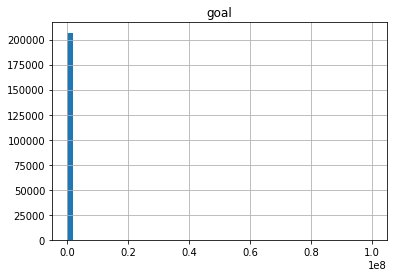

In [7]:
mergedData.hist('goal', bins = 50)

In [8]:
mergedData.describe()

backers_count  converted_pledged_amount    created_at      deadline  \
count  207227.000000              2.072270e+05  2.072270e+05  2.072270e+05   
mean      147.107785              1.220195e+04  1.413052e+09  1.419542e+09   
std      1037.500265              9.157183e+04  7.098634e+07  7.112337e+07   
min         0.000000              0.000000e+00  1.240335e+09  1.241334e+09   
25%         4.000000              1.110000e+02  1.358580e+09  1.366220e+09   
50%        27.000000              1.575000e+03  1.415846e+09  1.423690e+09   
75%        86.000000              6.279500e+03  1.464574e+09  1.471463e+09   
max    105857.000000              1.026684e+07  1.544663e+09  1.549843e+09   

             fx_rate          goal            id   launched_at       pledged  \
count  207227.000000  2.072270e+05  2.072270e+05  2.072270e+05  2.072270e+05   
mean        0.994088  4.545652e+04  1.074692e+09  1.416612e+09  1.395777e+04   
std         0.165810  1.141367e+06  6.190318e+08  7.126275e+07  1.344853e+05   
min         0.008811  1.000000e-02  1.852000e+04  1.240603e+09  0.000000e+00   
25%         1.000000  1.500000e+03  5.376902e+08  1.363381e+09  1.110000e+02   
50%         1.000000  5.000000e+03  1.078658e+09  1.420866e+09  1.582000e+03   
75%         1.000000  1.300000e+04  1.609181e+09  1.468627e+09  6.371000e+03   
max         1.733475  1.000000e+08  2.147476e+09  1.544674e+09  2.334387e+07   

       state_changed_at  static_usd_rate   usd_pledged  
count      2.072270e+05    207227.000000  2.072270e+05  
mean       1.419359e+09         1.017217  1.220398e+04  
std        7.090853e+07         0.203018  9.158168e+04  
min        1.241334e+09         0.008771  0.000000e+00  
25%        1.366208e+09         1.000000  1.110000e+02  
50%        1.423446e+09         1.000000  1.576000e+03  
75%        1.471302e+09         1.000000  6.275180e+03  
max        1.544674e+09         1.716408  1.026685e+07

In [9]:
sortbyPrice = mergedData.sort_values('converted_pledged_amount', axis = 0, ascending = False)

In [10]:
bins = [1000, 3000, 7000, 15000, 50000, 150000, 1000000]

In [11]:
sortbyPrice.head()

Unnamed: 0  backers_count  \
511         NaN        68929.0   
1651        NaN        68929.0   
2335        NaN        63416.0   
2133        NaN        63416.0   
1682        NaN        69320.0   

                                                  blurb  \
511   Pebble is a customizable watch. Download new w...   
1651  Pebble is a customizable watch. Download new w...   
2335  Cracking open the last closed platform: the TV...   
2133  Cracking open the last closed platform: the TV...   
1682  Yu Suzuki presents the long awaited third inst...   

                                               category  \
511   {"id":28,"name":"Product Design","slug":"desig...   
1651  {"id":28,"name":"Product Design","slug":"desig...   
2335  {"id":270,"name":"Gaming Hardware","slug":"gam...   
2133  {"id":270,"name":"Gaming Hardware","slug":"gam...   
1682  {"id":35,"name":"Video Games","slug":"games/vi...   

      converted_pledged_amount country    created_at  \
511                 10266845.0      US  1.332451e+09   
1651                10266845.0      US  1.332451e+09   
2335                 8596474.0      US  1.337045e+09   
2133                 8596474.0      US  1.337045e+09   
1682                 6333295.0      US  1.433238e+09   

                                                creator currency  \
511   {"id":597507018,"name":"Pebble Technology","sl...      USD   
1651  {"id":597507018,"name":"Pebble Technology","sl...      USD   
2335  {"id":33844207,"name":"OUYA","slug":"ouya","is...      USD   
2133  {"id":33844207,"name":"OUYA","slug":"ouya","is...      USD   
1682  {"id":1569150382,"name":"Ys Net","slug":"ysnet...      USD   

     currency_symbol      ...        \
511                $      ...         
1651               $      ...         
2335               $      ...         
2133               $      ...         
1682               $      ...         

                                             slug  \
511   pebble-e-paper-watch-for-iphone-and-android   
1651  pebble-e-paper-watch-for-iphone-and-android   
2335        ouya-a-new-kind-of-video-game-console   
2133        ouya-a-new-kind-of-video-game-console   
1682                                    shenmue-3   

                                             source_url  spotlight staff_pick  \
511   https://www.kickstarter.com/discover/categorie...       True       True   
1651  https://www.kickstarter.com/discover/categorie...       True       True   
2335  https://www.kickstarter.com/discover/categorie...       True       True   
2133  https://www.kickstarter.com/discover/categorie...       True       True   
1682  https://www.kickstarter.com/discover/categorie...       True       True   

           state  state_changed_at  static_usd_rate  \
511   successful      1.337396e+09              1.0   
1651  successful      1.337396e+09              1.0   
2335  successful      1.344492e+09              1.0   
2133  successful      1.344492e+09              1.0   
1682  successful      1.437184e+09              1.0   

                                                   urls  usd_pledged  \
511   {"web":{"project":"https://www.kickstarter.com...  10266845.74   
1651  {"web":{"project":"https://www.kickstarter.com...  10266845.74   
2335  {"web":{"project":"https://www.kickstarter.com...   8596474.58   
2133  {"web":{"project":"https://www.kickstarter.com...   8596474.58   
1682  {"web":{"project":"https://www.kickstarter.com...   6333295.77   

           usd_type  
511        domestic  
1651  international  
2335  international  
2133  international  
1682  international  

[5 rows x 38 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a227bbc88>]],
      dtype=object)

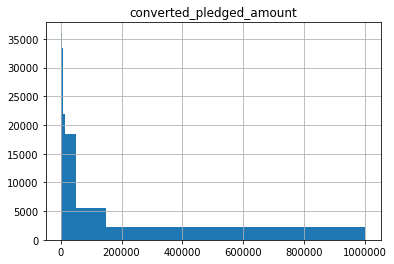

In [12]:
mergedData.hist('converted_pledged_amount', bins = bins)

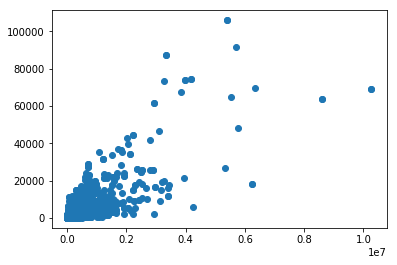

In [21]:
mpl.pyplot.scatter(mergedData['converted_pledged_amount'], mergedData['backers_count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1a24b29160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a24b297f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a24b20908>],
 'medians': [<matplotlib.lines.Line2D at 0x1a24b29e80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a24b33208>],
 'means': []}

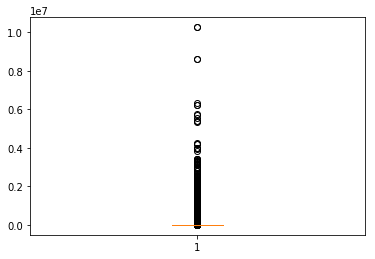

In [22]:
mpl.pyplot.boxplot(mergedData['converted_pledged_amount'])